In [5]:
#methods(add_genotypes)

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [2]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Complete_EXP_Health_WFI.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"])
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [3]:
phenotypes= dropmissing(phenotypes, :QNurPenBatch)
phenotypes= dropmissing(phenotypes, :Nur1ADG)
phenotypes= dropmissing(phenotypes, :Health_Score1)
#first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 18.463351 seconds (37.77 k allocations: 10.393 GiB, 0.10% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [5]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [8]:
model_equations = "Nur1ADG = intercept + Batch + EntryAge + QNurPenBatch + SowID
             Health_Score1 = intercept + Batch + EntryAge + QNurPenBatch + SowID";
R= [0.269955E-02 0.228605E-02
    0.228605E-02 0.992593E-01]
model=build_model(model_equations,R);
set_covariate(model,"EntryAge")
Gpen=[0.492253 0
    0 0.492253]
set_random(model,"QNurPenBatch", Gpen)

G2=[0.499922E-02 0.368900E-03
   0.368900E-03 0.715698E-02]
set_random(model,"SowID",G2)

G3=[0.709692E-02  0.731862E-03 
   0.731862E-03  0.138438E-02]
@time add_genotypes(model,M,header=true, rowID=rowID, G_is_marker_variance=false) # no method matching
#@time add_genotypes(model,"Geno_JWAS_impute.txt",G3,separator=' ', G_is_marker_variance=true)

The marker IDs are set to 1,2,...,#markers
#markers: 435172; #individuals: 3205
 17.934556 seconds (870.71 k allocations: 15.651 GiB, 6.88% gc time)


6.0f0

In [9]:
@time outB=runMCMC(model,phenotypes,methods="BayesB", 
    missing_phenotypes=true, 
    estimatePi=false,
    Pi=Dict([1.0; 1.0]=>0.001,[1.0; 0.0]=>0.001,[0.0; 1.0]=>0.001,[0.0; 0.0]=>0.998),
    estimateScale=true,
    chain_length=50000,
    burnin = 5000,
    output_heritability=true, 
    output_samples_frequency=100, 
    output_samples_file="MCMC_BayesB")

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
The number of observations with both genotypes and phenotypes used in the analysis is 3167.
Prior information for genomic variance is not provided and is generated from the data.

The prior for marker effects covariance matrix is calculated from genetic covariance matrix and Π.
The mean of the prior for the marker effects covariance matrix is:
 1.3e-5  0.0     
 0.0     0.000297



A Linear Mixed Model was build using model equations:

Nur1ADG = intercept + Batch + EntryAge + QNurPenBatch + SowID
Health_Score1 = intercept + Batch + EntryAge + QNurPenBatch + SowID

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               49
EntryAge        covariate    fixed                1
QNurPenBatch    factor       random             756
SowID           factor       random         

running MCMC ...100%|███████████████████████████████████| Time: 3 days, 22:40:43




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


340957.542297 seconds (2.05 T allocations: 135.040 TiB, 29.35% gc time)


Dict{Any,Any} with 9 entries:
  "ScaleEffectVargeno"           => 4×3 DataFrame…
  "EBV_Nur1ADG"                  => 3205×3 DataFrame…
  "heritability"                 => 2×3 DataFrame…
  "location parameters"          => 3818×5 DataFrame…
  "residual variance"            => 4×3 DataFrame…
  "marker effects geno"          => 870344×5 DataFrame. Omitted printing of 1 c…
  "genetic_variance"             => 4×3 DataFrame…
  "EBV_Health_Score1"            => 3205×3 DataFrame…
  "marker effects variance geno" => 4×3 DataFrame…

In [3]:
@time rg,out = GWAS(M,"/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt", 
    "MCMC_BayesB_marker_effects_geno_Nur1ADG.txt",
    "MCMC_BayesB_marker_effects_geno_Health_Score1.txt",
    window_size="1 Mb", GWAS=false,sliding_window=false,genetic_correlation=true)

calculating genomic correlation...100%|█████████████████| Time: 0:24:29


BoundsError: BoundsError: attempt to access (2395×12 DataFrame
│ Row  │ trait      │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimate_cov │ std_cov     │ estimate_cor │ std_cor   │
│      │ String     │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64      │ Float64     │ Float64      │ Float64   │
├──────┼────────────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼──────────────┼─────────────┼──────────────┼───────────┤
│ 1    │ cor(t1,t2) │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 4.92378e-9   │ 2.98809e-6  │ 0.00812294   │ 0.312062  │
│ 2    │ cor(t1,t2) │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ -4.75918e-8  │ 3.39555e-6  │ -0.0130092   │ 0.338724  │
│ 3    │ cor(t1,t2) │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ -1.98198e-7  │ 3.93147e-6  │ 0.00465527   │ 0.349227  │
│ 4    │ cor(t1,t2) │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ -1.19453e-7  │ 2.99953e-6  │ -0.0127017   │ 0.313946  │
│ 5    │ cor(t1,t2) │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ -7.48428e-7  │ 4.7221e-6   │ -0.0411229   │ 0.400171  │
│ 6    │ cor(t1,t2) │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ -4.18887e-7  │ 4.62122e-6  │ -0.0192504   │ 0.342348  │
│ 7    │ cor(t1,t2) │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 4.16008e-7   │ 5.07902e-6  │ 0.0264049    │ 0.370968  │
│ 8    │ cor(t1,t2) │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 2.67662e-7   │ 4.76464e-6  │ 0.0408351    │ 0.349154  │
│ 9    │ cor(t1,t2) │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ -6.49321e-7  │ 8.56034e-6  │ -0.0339476   │ 0.451694  │
│ 10   │ cor(t1,t2) │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 3.44809e-7   │ 6.32045e-6  │ -0.00877855  │ 0.309922  │
│ 11   │ cor(t1,t2) │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ -2.50128e-7  │ 3.14858e-6  │ -0.0231465   │ 0.322216  │
│ 12   │ cor(t1,t2) │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ -3.12919e-8  │ 3.09243e-6  │ 0.00186156   │ 0.289089  │
│ 13   │ cor(t1,t2) │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ -5.25816e-8  │ 2.24715e-6  │ -0.0254004   │ 0.315577  │
│ 14   │ cor(t1,t2) │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 9.60124e-7   │ 6.83291e-6  │ 0.0352062    │ 0.372867  │
│ 15   │ cor(t1,t2) │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ -1.8956e-8   │ 2.53356e-6  │ -0.000430738 │ 0.35558   │
│ 16   │ cor(t1,t2) │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 1.18606e-7   │ 5.6197e-6   │ 0.0229364    │ 0.354766  │
│ 17   │ cor(t1,t2) │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ -1.79055e-6  │ 8.88033e-6  │ -0.078621    │ 0.40938   │
│ 18   │ cor(t1,t2) │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ -9.17386e-7  │ 6.12752e-6  │ -0.035776    │ 0.357589  │
│ 19   │ cor(t1,t2) │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ -3.81749e-7  │ 4.21538e-6  │ -0.0351903   │ 0.309824  │
│ 20   │ cor(t1,t2) │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ -6.62573e-7  │ 7.10166e-6  │ -0.00913993  │ 0.388761  │
│ 21   │ cor(t1,t2) │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 1.07525e-7   │ 4.85648e-6  │ 0.0339616    │ 0.351407  │
│ 22   │ cor(t1,t2) │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ -5.30528e-7  │ 6.86677e-6  │ -0.0185568   │ 0.407319  │
│ 23   │ cor(t1,t2) │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 4.80611e-7   │ 8.94457e-6  │ 0.027256     │ 0.350423  │
│ 24   │ cor(t1,t2) │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 1.91792e-7   │ 4.15607e-6  │ 0.0220843    │ 0.351936  │
│ 25   │ cor(t1,t2) │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ -3.31213e-7  │ 7.48245e-6  │ -0.0170293   │ 0.436478  │
│ 26   │ cor(t1,t2) │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ -3.78828e-6  │ 1.43453e-5  │ -0.109536    │ 0.514476  │
│ 27   │ cor(t1,t2) │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 2.32049e-7   │ 3.94626e-6  │ 0.0217129    │ 0.343621  │
│ 28   │ cor(t1,t2) │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 4.17156e-7   │ 4.60677e-6  │ 0.00969076   │ 0.362044  │
│ 29   │ cor(t1,t2) │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 5.04497e-7   │ 5.63675e-6  │ 0.0130156    │ 0.305382  │
│ 30   │ cor(t1,t2) │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 3.65459e-7   │ 5.7276e-6   │ 0.0138571    │ 0.368958  │
│ 31   │ cor(t1,t2) │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 2.64391e-6   │ 1.24367e-5  │ 0.0708566    │ 0.398761  │
│ 32   │ cor(t1,t2) │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 1.1024e-5    │ 2.62787e-5  │ 0.265787     │ 0.489813  │
│ 33   │ cor(t1,t2) │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 3.47491e-7   │ 8.32364e-6  │ -0.000594337 │ 0.386112  │
│ 34   │ cor(t1,t2) │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 7.72337e-7   │ 8.34469e-6  │ 0.0397775    │ 0.403019  │
│ 35   │ cor(t1,t2) │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ -1.16999e-8  │ 3.27174e-6  │ -0.000661507 │ 0.310195  │
│ 36   │ cor(t1,t2) │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 1.19392e-7   │ 6.88061e-6  │ -0.0146154   │ 0.399738  │
│ 37   │ cor(t1,t2) │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ -1.0018e-7   │ 6.09975e-6  │ -0.0137563   │ 0.377242  │
│ 38   │ cor(t1,t2) │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 7.63095e-7   │ 7.15211e-6  │ 0.0334864    │ 0.358723  │
│ 39   │ cor(t1,t2) │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 3.73423e-7   │ 8.04319e-6  │ 0.0181434    │ 0.452369  │
│ 40   │ cor(t1,t2) │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 7.48153e-7   │ 5.25512e-6  │ 0.0182285    │ 0.358541  │
│ 41   │ cor(t1,t2) │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 3.93072e-7   │ 4.29805e-6  │ 0.0183782    │ 0.347179  │
│ 42   │ cor(t1,t2) │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 3.65271e-7   │ 4.80232e-6  │ -0.0177773   │ 0.384823  │
│ 43   │ cor(t1,t2) │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 5.3075e-7    │ 5.39425e-6  │ 0.0353664    │ 0.353445  │
│ 44   │ cor(t1,t2) │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 1.80769e-7   │ 3.79637e-6  │ 0.00200491   │ 0.34528   │
│ 45   │ cor(t1,t2) │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ -5.83445e-8  │ 2.9925e-6   │ 0.00194863   │ 0.343282  │
│ 46   │ cor(t1,t2) │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ -2.18645e-7  │ 4.35124e-6  │ -0.00818051  │ 0.31404   │
│ 47   │ cor(t1,t2) │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ -1.20045e-7  │ 2.93327e-6  │ -0.0125688   │ 0.276854  │
│ 48   │ cor(t1,t2) │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 9.19749e-9   │ 5.75302e-6  │ 0.0108958    │ 0.362997  │
│ 49   │ cor(t1,t2) │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 3.84718e-7   │ 4.8174e-6   │ 0.00753393   │ 0.330492  │
│ 50   │ cor(t1,t2) │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 5.87232e-7   │ 9.68627e-6  │ 0.014807     │ 0.443196  │
│ 51   │ cor(t1,t2) │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ -2.6469e-7   │ 9.12959e-6  │ -0.0179508   │ 0.434828  │
│ 52   │ cor(t1,t2) │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 2.6957e-7    │ 1.04397e-5  │ 0.0321554    │ 0.433297  │
│ 53   │ cor(t1,t2) │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 3.65092e-6   │ 1.57679e-5  │ 0.117065     │ 0.504019  │
│ 54   │ cor(t1,t2) │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 4.13412e-7   │ 1.62669e-5  │ -0.00955993  │ 0.486828  │
│ 55   │ cor(t1,t2) │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 2.06842e-7   │ 5.64992e-6  │ -0.0023625   │ 0.350118  │
│ 56   │ cor(t1,t2) │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ -2.45779e-7  │ 8.65179e-6  │ 0.00061463   │ 0.373107  │
│ 57   │ cor(t1,t2) │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ -1.09481e-7  │ 7.17914e-6  │ -0.0155885   │ 0.416431  │
│ 58   │ cor(t1,t2) │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 7.78334e-7   │ 7.68404e-6  │ 0.0337015    │ 0.391506  │
│ 59   │ cor(t1,t2) │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ -7.66103e-7  │ 5.56079e-6  │ -0.031451    │ 0.355813  │
│ 60   │ cor(t1,t2) │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 4.70382e-9   │ 7.70651e-6  │ 0.0141601    │ 0.3971    │
│ 61   │ cor(t1,t2) │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ -2.18039e-7  │ 8.30825e-6  │ -0.00758132  │ 0.354916  │
│ 62   │ cor(t1,t2) │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ -2.46499e-7  │ 6.97481e-6  │ -0.0042031   │ 0.347145  │
│ 63   │ cor(t1,t2) │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ -9.1589e-7   │ 7.87956e-6  │ -0.0592537   │ 0.342904  │
│ 64   │ cor(t1,t2) │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 2.13915e-8   │ 3.57418e-6  │ 0.00891121   │ 0.280476  │
│ 65   │ cor(t1,t2) │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ -4.16672e-7  │ 5.98015e-6  │ -0.0250663   │ 0.338686  │
│ 66   │ cor(t1,t2) │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ -3.71812e-6  │ 1.5047e-5   │ -0.092528    │ 0.473217  │
│ 67   │ cor(t1,t2) │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ -1.56095e-6  │ 1.26639e-5  │ -0.0394444   │ 0.391299  │
│ 68   │ cor(t1,t2) │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 5.52976e-7   │ 8.52979e-6  │ 0.00840846   │ 0.356106  │
│ 69   │ cor(t1,t2) │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 6.85096e-7   │ 8.55984e-6  │ 0.00522484   │ 0.367421  │
│ 70   │ cor(t1,t2) │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 1.70822e-7   │ 4.96989e-6  │ 0.00529921   │ 0.28376   │
│ 71   │ cor(t1,t2) │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 3.32751e-7   │ 4.63116e-6  │ 0.0112507    │ 0.348351  │
│ 72   │ cor(t1,t2) │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 1.0419e-6    │ 7.28761e-6  │ 0.0386833    │ 0.40321   │
│ 73   │ cor(t1,t2) │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 5.50876e-7   │ 5.92419e-6  │ 0.0287136    │ 0.412885  │
│ 74   │ cor(t1,t2) │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 4.30637e-7   │ 3.82979e-6  │ 0.0324688    │ 0.345599  │
│ 75   │ cor(t1,t2) │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ -1.60529e-7  │ 3.55856e-6  │ 0.00502821   │ 0.350017  │
│ 76   │ cor(t1,t2) │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 1.3704e-9    │ 5.96387e-6  │ -0.0144685   │ 0.370648  │
│ 77   │ cor(t1,t2) │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ -1.35487e-8  │ 2.88448e-6  │ -0.000118764 │ 0.26468   │
│ 78   │ cor(t1,t2) │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 6.30851e-8   │ 3.63155e-6  │ 0.00637504   │ 0.348409  │
│ 79   │ cor(t1,t2) │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 3.20828e-7   │ 4.96052e-6  │ 0.0253161    │ 0.335358  │
│ 80   │ cor(t1,t2) │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ -1.74409e-7  │ 6.20789e-6  │ -0.0134556   │ 0.312267  │
│ 81   │ cor(t1,t2) │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ -6.13543e-8  │ 4.41879e-6  │ 0.015712     │ 0.349316  │
│ 82   │ cor(t1,t2) │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ -2.7087e-6   │ 1.1254e-5   │ -0.0874079   │ 0.433382  │
│ 83   │ cor(t1,t2) │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ -1.6438e-6   │ 9.03406e-6  │ -0.0459529   │ 0.361357  │
│ 84   │ cor(t1,t2) │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ -3.05424e-7  │ 7.77466e-6  │ -0.00398648  │ 0.362122  │
│ 85   │ cor(t1,t2) │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 2.60611e-8   │ 4.65545e-6  │ -0.00996513  │ 0.346843  │
│ 86   │ cor(t1,t2) │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 1.22175e-7   │ 4.32645e-6  │ -0.0114277   │ 0.331125  │
│ 87   │ cor(t1,t2) │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 9.86719e-7   │ 7.7936e-6   │ 0.0355261    │ 0.391754  │
│ 88   │ cor(t1,t2) │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 1.103e-6     │ 1.02521e-5  │ 0.0400117    │ 0.403833  │
│ 89   │ cor(t1,t2) │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 3.37636e-7   │ 6.80956e-6  │ 0.0268324    │ 0.373793  │
│ 90   │ cor(t1,t2) │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ -2.55162e-7  │ 5.88521e-6  │ 0.0178261    │ 0.345344  │
│ 91   │ cor(t1,t2) │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 5.06233e-7   │ 5.18431e-6  │ -0.0110815   │ 0.357031  │
│ 92   │ cor(t1,t2) │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 7.68053e-8   │ 3.2178e-6   │ 0.00178777   │ 0.273965  │
│ 93   │ cor(t1,t2) │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 4.86869e-8   │ 2.57876e-6  │ 0.00699304   │ 0.222136  │
│ 94   │ cor(t1,t2) │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ -2.12467e-7  │ 3.80973e-6  │ -0.00174845  │ 0.153901  │
│ 95   │ cor(t1,t2) │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 3.70696e-7   │ 8.80863e-6  │ 0.00448371   │ 0.411639  │
│ 96   │ cor(t1,t2) │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ -1.88806e-7  │ 7.28492e-6  │ -0.0170098   │ 0.416862  │
│ 97   │ cor(t1,t2) │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 4.89943e-7   │ 5.30965e-6  │ 0.00997283   │ 0.331194  │
│ 98   │ cor(t1,t2) │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ -6.72193e-7  │ 6.29009e-6  │ -0.0307493   │ 0.398154  │
│ 99   │ cor(t1,t2) │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 5.77781e-8   │ 6.0601e-6   │ -0.0185575   │ 0.356803  │
│ 100  │ cor(t1,t2) │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 9.35218e-7   │ 6.7853e-6   │ 0.0318286    │ 0.346704  │
│ 101  │ cor(t1,t2) │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 6.035e-8     │ 2.16889e-6  │ 0.0104646    │ 0.229618  │
│ 102  │ cor(t1,t2) │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 1.62167e-7   │ 2.91172e-6  │ 0.0152571    │ 0.240873  │
│ 103  │ cor(t1,t2) │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 1.21488e-7   │ 3.55575e-6  │ 0.0126788    │ 0.276984  │
│ 104  │ cor(t1,t2) │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ -7.91022e-7  │ 5.31091e-6  │ -0.0375731   │ 0.346994  │
│ 105  │ cor(t1,t2) │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 1.96162e-8   │ 3.99075e-6  │ 0.0208634    │ 0.27771   │
│ 106  │ cor(t1,t2) │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ -2.93025e-8  │ 2.55075e-6  │ 0.00394063   │ 0.248854  │
│ 107  │ cor(t1,t2) │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 1.76918e-7   │ 3.6269e-6   │ 0.000271627  │ 0.361101  │
│ 108  │ cor(t1,t2) │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 3.17839e-7   │ 4.15672e-6  │ -0.00850454  │ 0.28978   │
│ 109  │ cor(t1,t2) │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ -1.69298e-7  │ 3.87004e-6  │ -0.00321826  │ 0.278222  │
│ 110  │ cor(t1,t2) │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ -1.26112e-7  │ 3.98305e-6  │ -0.0116306   │ 0.31156   │
│ 111  │ cor(t1,t2) │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ -4.87312e-8  │ 2.70784e-6  │ 0.0154889    │ 0.322281  │
│ 112  │ cor(t1,t2) │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ -1.99923e-7  │ 4.93096e-6  │ 0.0139989    │ 0.320577  │
│ 113  │ cor(t1,t2) │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 6.98842e-8   │ 3.42417e-6  │ 0.0188874    │ 0.352743  │
│ 114  │ cor(t1,t2) │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 2.38825e-8   │ 3.80097e-6  │ -0.00522378  │ 0.248856  │
│ 115  │ cor(t1,t2) │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 1.20852e-7   │ 2.08344e-6  │ 0.00575361   │ 0.260984  │
│ 116  │ cor(t1,t2) │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ -1.05775e-8  │ 2.5375e-6   │ -0.010917    │ 0.245004  │
│ 117  │ cor(t1,t2) │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ -9.9947e-8   │ 3.22958e-6  │ -0.0133159   │ 0.325286  │
│ 118  │ cor(t1,t2) │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 1.28088e-8   │ 3.10706e-6  │ 0.0116335    │ 0.326279  │
│ 119  │ cor(t1,t2) │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 6.70444e-9   │ 2.32146e-6  │ -0.000533676 │ 0.229177  │
│ 120  │ cor(t1,t2) │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ -1.00178e-7  │ 4.38229e-6  │ 0.00426149   │ 0.332611  │
│ 121  │ cor(t1,t2) │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 6.43705e-8   │ 1.88061e-6  │ -0.00391803  │ 0.199752  │
│ 122  │ cor(t1,t2) │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 1.49661e-7   │ 2.47967e-6  │ -0.00169379  │ 0.249288  │
│ 123  │ cor(t1,t2) │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ -5.656e-8    │ 2.0361e-6   │ -0.00684281  │ 0.237196  │
│ 124  │ cor(t1,t2) │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ -8.81337e-9  │ 4.89944e-6  │ -0.000560933 │ 0.373532  │
│ 125  │ cor(t1,t2) │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 3.46708e-7   │ 6.02015e-6  │ 0.0206469    │ 0.305878  │
│ 126  │ cor(t1,t2) │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 1.36419e-6   │ 9.53213e-6  │ 0.0566153    │ 0.38565   │
│ 127  │ cor(t1,t2) │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 1.9367e-7    │ 2.73428e-6  │ 0.00849952   │ 0.317507  │
│ 128  │ cor(t1,t2) │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ -7.34336e-8  │ 2.70781e-6  │ 0.00963943   │ 0.268054  │
│ 129  │ cor(t1,t2) │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ -4.09694e-8  │ 2.72295e-6  │ 0.0134598    │ 0.213971  │
│ 130  │ cor(t1,t2) │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ -1.06898e-7  │ 1.5217e-6   │ -0.019691    │ 0.258624  │
│ 131  │ cor(t1,t2) │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ -8.51769e-8  │ 3.93937e-6  │ 0.000960173  │ 0.277188  │
│ 132  │ cor(t1,t2) │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 1.95671e-7   │ 4.00027e-6  │ 0.0170707    │ 0.279435  │
│ 133  │ cor(t1,t2) │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 5.10277e-8   │ 2.57741e-6  │ 0.00549045   │ 0.257453  │
│ 134  │ cor(t1,t2) │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ -1.83382e-7  │ 4.59828e-6  │ 0.00214949   │ 0.21437   │
│ 135  │ cor(t1,t2) │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ -2.68899e-7  │ 5.12657e-6  │ -0.0112123   │ 0.345853  │
│ 136  │ cor(t1,t2) │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 2.57579e-7   │ 3.56954e-6  │ 0.010529     │ 0.258194  │
│ 137  │ cor(t1,t2) │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 1.56867e-7   │ 1.65125e-6  │ 0.00851568   │ 0.212745  │
│ 138  │ cor(t1,t2) │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ -6.08987e-7  │ 5.89264e-6  │ -0.0141286   │ 0.252514  │
│ 139  │ cor(t1,t2) │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ -8.92477e-7  │ 7.99857e-6  │ -0.0325647   │ 0.294849  │
│ 140  │ cor(t1,t2) │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ -1.38979e-6  │ 1.53247e-5  │ -0.0494125   │ 0.500517  │
│ 141  │ cor(t1,t2) │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ -1.1898e-8   │ 4.84913e-6  │ -0.00606862  │ 0.336518  │
│ 142  │ cor(t1,t2) │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ -1.89503e-7  │ 3.88551e-6  │ -0.0248381   │ 0.307222  │
│ 143  │ cor(t1,t2) │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ -7.44319e-8  │ 1.56108e-6  │ -0.00071302  │ 0.210444  │
│ 144  │ cor(t1,t2) │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ -6.23098e-8  │ 1.83697e-6  │ 0.000347728  │ 0.252634  │
│ 145  │ cor(t1,t2) │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 2.08968e-8   │ 1.67174e-6  │ 0.00594044   │ 0.245557  │
│ 146  │ cor(t1,t2) │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 4.2799e-7    │ 4.04796e-6  │ 0.00756457   │ 0.335655  │
│ 147  │ cor(t1,t2) │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 3.74011e-7   │ 3.747e-6    │ 0.0184967    │ 0.319761  │
│ 148  │ cor(t1,t2) │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 2.00829e-7   │ 3.51696e-6  │ 0.00626973   │ 0.318939  │
│ 149  │ cor(t1,t2) │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ -1.7741e-6   │ 9.90271e-6  │ -0.039045    │ 0.420583  │
│ 150  │ cor(t1,t2) │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ -1.46041e-9  │ 2.31777e-6  │ 0.0154699    │ 0.367841  │
│ 151  │ cor(t1,t2) │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 1.31617e-7   │ 4.11778e-6  │ 0.0176709    │ 0.298562  │
│ 152  │ cor(t1,t2) │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ -1.55285e-7  │ 4.15377e-6  │ -0.00449324  │ 0.327908  │
│ 153  │ cor(t1,t2) │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ -1.62164e-7  │ 3.22981e-6  │ 0.0183652    │ 0.314898  │
│ 154  │ cor(t1,t2) │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 3.53084e-9   │ 2.09781e-6  │ 0.0101862    │ 0.313176  │
│ 155  │ cor(t1,t2) │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ -7.43409e-8  │ 3.66871e-6  │ -0.0112292   │ 0.266919  │
│ 156  │ cor(t1,t2) │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 4.14909e-7   │ 3.95466e-6  │ 0.0194664    │ 0.309413  │
│ 157  │ cor(t1,t2) │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 1.13702e-7   │ 4.24573e-6  │ 0.0117778    │ 0.308222  │
│ 158  │ cor(t1,t2) │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ -2.28185e-7  │ 2.63946e-6  │ -0.0276926   │ 0.282537  │
│ 159  │ cor(t1,t2) │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ -2.07959e-8  │ 3.83295e-6  │ 0.00309503   │ 0.360993  │
│ 160  │ cor(t1,t2) │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ -2.18333e-7  │ 3.43589e-6  │ -0.0174208   │ 0.346346  │
│ 161  │ cor(t1,t2) │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 1.92482e-7   │ 2.29865e-6  │ 0.0198106    │ 0.321054  │
│ 162  │ cor(t1,t2) │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ -1.01119e-8  │ 4.7513e-6   │ 0.0282754    │ 0.36325   │
│ 163  │ cor(t1,t2) │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 1.4445e-7    │ 3.51381e-6  │ -0.00505055  │ 0.351533  │
│ 164  │ cor(t1,t2) │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 1.19446e-6   │ 6.52051e-6  │ 0.059028     │ 0.365197  │
│ 165  │ cor(t1,t2) │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 7.83595e-7   │ 7.60757e-6  │ 0.0365805    │ 0.353136  │
│ 166  │ cor(t1,t2) │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ -2.02439e-7  │ 7.64904e-6  │ 0.00951343   │ 0.314807  │
│ 167  │ cor(t1,t2) │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ -7.19654e-9  │ 3.34395e-6  │ 0.0243686    │ 0.330104  │
│ 168  │ cor(t1,t2) │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ -1.10791e-7  │ 3.2751e-6   │ 0.0013147    │ 0.282347  │
│ 169  │ cor(t1,t2) │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ -3.64861e-7  │ 3.60641e-6  │ -0.019211    │ 0.275956  │
│ 170  │ cor(t1,t2) │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 1.30083e-6   │ 7.1909e-6   │ 0.0621       │ 0.318338  │
│ 171  │ cor(t1,t2) │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ -2.95239e-8  │ 1.51084e-6  │ 0.00165025   │ 0.252056  │
│ 172  │ cor(t1,t2) │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 4.88818e-7   │ 6.41035e-6  │ 0.0011899    │ 0.277528  │
│ 173  │ cor(t1,t2) │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 4.02924e-8   │ 3.68913e-6  │ 0.0189891    │ 0.297087  │
│ 174  │ cor(t1,t2) │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 3.47601e-7   │ 4.13991e-6  │ -0.00673831  │ 0.268535  │
│ 175  │ cor(t1,t2) │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 1.80942e-7   │ 6.60095e-6  │ 0.00756805   │ 0.359278  │
│ 176  │ cor(t1,t2) │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ -6.1917e-8   │ 4.73765e-6  │ 0.00771755   │ 0.276975  │
│ 177  │ cor(t1,t2) │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ -1.38163e-7  │ 4.22607e-6  │ 0.00627162   │ 0.334521  │
│ 178  │ cor(t1,t2) │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ -5.91015e-8  │ 4.65124e-6  │ 0.000538963  │ 0.263921  │
│ 179  │ cor(t1,t2) │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 2.57779e-7   │ 4.54709e-6  │ 0.00832223   │ 0.29355   │
│ 180  │ cor(t1,t2) │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ -1.32225e-8  │ 3.26487e-6  │ -0.00557682  │ 0.255314  │
│ 181  │ cor(t1,t2) │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ -1.82554e-7  │ 4.62283e-6  │ -0.00688732  │ 0.280955  │
│ 182  │ cor(t1,t2) │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ -6.3836e-8   │ 2.84908e-6  │ -0.0080366   │ 0.325532  │
│ 183  │ cor(t1,t2) │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 6.44291e-8   │ 2.59658e-6  │ 0.000589763  │ 0.30207   │
│ 184  │ cor(t1,t2) │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ -2.19659e-7  │ 3.77638e-6  │ -0.000564962 │ 0.344185  │
│ 185  │ cor(t1,t2) │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ -2.58618e-8  │ 3.49738e-6  │ 0.0142782    │ 0.322733  │
│ 186  │ cor(t1,t2) │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ -5.75814e-7  │ 6.76332e-6  │ -0.0372152   │ 0.412338  │
│ 187  │ cor(t1,t2) │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 1.20253e-7   │ 2.76948e-6  │ 0.0157032    │ 0.320672  │
│ 188  │ cor(t1,t2) │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 2.04024e-7   │ 3.29814e-6  │ 0.0171679    │ 0.295214  │
│ 189  │ cor(t1,t2) │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ -4.51034e-7  │ 4.50619e-6  │ -0.040813    │ 0.33179   │
│ 190  │ cor(t1,t2) │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ -3.86758e-7  │ 3.4356e-6   │ -0.0257063   │ 0.26778   │
│ 191  │ cor(t1,t2) │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 7.426e-8     │ 2.37852e-6  │ -0.0122362   │ 0.297668  │
│ 192  │ cor(t1,t2) │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 5.98165e-8   │ 3.36378e-6  │ 0.0307806    │ 0.32666   │
│ 193  │ cor(t1,t2) │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 2.60835e-7   │ 3.04191e-6  │ 0.00226353   │ 0.334768  │
│ 194  │ cor(t1,t2) │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ -7.48415e-8  │ 2.08019e-6  │ -0.00509674  │ 0.278039  │
│ 195  │ cor(t1,t2) │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 1.88887e-7   │ 4.02423e-6  │ 0.00493337   │ 0.29721   │
│ 196  │ cor(t1,t2) │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 9.39047e-8   │ 1.82688e-6  │ 0.0231777    │ 0.26216   │
│ 197  │ cor(t1,t2) │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 3.98011e-9   │ 1.98837e-6  │ -3.09846e-5  │ 0.279932  │
│ 198  │ cor(t1,t2) │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ -6.38853e-7  │ 5.6369e-6   │ -0.0201544   │ 0.344038  │
│ 199  │ cor(t1,t2) │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ -1.44273e-6  │ 7.23445e-6  │ -0.0699418   │ 0.395911  │
│ 200  │ cor(t1,t2) │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ -1.72652e-7  │ 3.5032e-6   │ -0.0249337   │ 0.352217  │
│ 201  │ cor(t1,t2) │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ -3.11819e-8  │ 2.91299e-6  │ -0.000874539 │ 0.27886   │
│ 202  │ cor(t1,t2) │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 5.40271e-8   │ 1.87652e-6  │ 0.0273934    │ 0.242781  │
│ 203  │ cor(t1,t2) │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ -2.67326e-7  │ 5.15484e-6  │ -0.0316202   │ 0.378217  │
│ 204  │ cor(t1,t2) │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 1.17831e-7   │ 3.54468e-6  │ -0.00300806  │ 0.342795  │
│ 205  │ cor(t1,t2) │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ -4.43088e-8  │ 3.61856e-6  │ -0.012009    │ 0.35554   │
│ 206  │ cor(t1,t2) │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 1.79372e-7   │ 4.27719e-6  │ 0.0124478    │ 0.353723  │
│ 207  │ cor(t1,t2) │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 5.87089e-7   │ 5.04089e-6  │ 0.0301134    │ 0.362302  │
│ 208  │ cor(t1,t2) │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 9.29395e-7   │ 6.47853e-6  │ 0.0422706    │ 0.385123  │
│ 209  │ cor(t1,t2) │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 6.6673e-7    │ 4.60059e-6  │ 0.0302038    │ 0.382784  │
│ 210  │ cor(t1,t2) │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 2.17324e-7   │ 3.08814e-6  │ 0.0149866    │ 0.321561  │
│ 211  │ cor(t1,t2) │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 2.5221e-7    │ 3.3471e-6   │ 0.0221555    │ 0.310464  │
│ 212  │ cor(t1,t2) │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 9.77979e-8   │ 2.84843e-6  │ 0.00850184   │ 0.280619  │
│ 213  │ cor(t1,t2) │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ -5.18288e-8  │ 4.53143e-6  │ -0.0176601   │ 0.338525  │
│ 214  │ cor(t1,t2) │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ -1.39808e-8  │ 7.84789e-6  │ -0.0127927   │ 0.311522  │
│ 215  │ cor(t1,t2) │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 1.73429e-7   │ 2.97117e-6  │ -0.00345982  │ 0.40206   │
│ 216  │ cor(t1,t2) │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 9.33528e-9   │ 3.12922e-6  │ 0.00591275   │ 0.352726  │
│ 217  │ cor(t1,t2) │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 3.13962e-7   │ 2.44099e-6  │ 0.0119453    │ 0.338486  │
│ 218  │ cor(t1,t2) │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 1.52595e-7   │ 3.99672e-6  │ 0.0165217    │ 0.364916  │
│ 219  │ cor(t1,t2) │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 1.17773e-7   │ 4.00209e-6  │ 0.0144405    │ 0.35178   │
│ 220  │ cor(t1,t2) │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 7.85796e-8   │ 4.80636e-6  │ -0.0101306   │ 0.342956  │
│ 221  │ cor(t1,t2) │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 4.05861e-7   │ 6.80614e-6  │ 0.0414074    │ 0.401755  │
│ 222  │ cor(t1,t2) │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 2.76908e-6   │ 1.20469e-5  │ 0.0900119    │ 0.472584  │
│ 223  │ cor(t1,t2) │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 1.41456e-6   │ 9.8533e-6   │ 0.0485036    │ 0.398486  │
│ 224  │ cor(t1,t2) │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 2.09106e-6   │ 1.13843e-5  │ 0.0545263    │ 0.454393  │
│ 225  │ cor(t1,t2) │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 9.70561e-7   │ 7.49735e-6  │ 0.0344116    │ 0.362549  │
│ 226  │ cor(t1,t2) │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ -2.38717e-7  │ 7.53299e-6  │ -0.0194669   │ 0.416494  │
│ 227  │ cor(t1,t2) │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 8.22312e-7   │ 7.12937e-6  │ 0.0471968    │ 0.334339  │
│ 228  │ cor(t1,t2) │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 1.07997e-7   │ 1.75384e-6  │ 0.0108294    │ 0.285327  │
│ 229  │ cor(t1,t2) │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ -5.1666e-8   │ 3.99041e-6  │ 0.0147671    │ 0.292481  │
│ 230  │ cor(t1,t2) │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 1.79652e-7   │ 4.85342e-6  │ -0.00432479  │ 0.35305   │
│ 231  │ cor(t1,t2) │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ -3.08153e-7  │ 2.57516e-6  │ -0.0348789   │ 0.340865  │
│ 232  │ cor(t1,t2) │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ -9.89199e-8  │ 2.97817e-6  │ -0.00695963  │ 0.317288  │
│ 233  │ cor(t1,t2) │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 1.97239e-7   │ 3.07812e-6  │ -0.002479    │ 0.30991   │
│ 234  │ cor(t1,t2) │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 6.49739e-8   │ 2.54511e-6  │ 0.0100589    │ 0.328957  │
│ 235  │ cor(t1,t2) │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 1.9245e-7    │ 3.88272e-6  │ 0.0169388    │ 0.352827  │
│ 236  │ cor(t1,t2) │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 9.40124e-8   │ 6.10752e-6  │ 0.00390781   │ 0.350283  │
│ 237  │ cor(t1,t2) │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ -1.10222e-7  │ 3.58173e-6  │ -0.0175046   │ 0.367095  │
│ 238  │ cor(t1,t2) │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ -1.1982e-8   │ 1.90583e-6  │ 0.000114381  │ 0.298787  │
│ 239  │ cor(t1,t2) │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 2.60523e-7   │ 4.87569e-6  │ 0.00198523   │ 0.3241    │
│ 240  │ cor(t1,t2) │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ -9.68033e-7  │ 5.96788e-6  │ -0.0381828   │ 0.363029  │
│ 241  │ cor(t1,t2) │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ -6.8656e-7   │ 7.65627e-6  │ -0.0146123   │ 0.363274  │
│ 242  │ cor(t1,t2) │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ -2.07992e-7  │ 2.17898e-6  │ -0.0143297   │ 0.256395  │
│ 243  │ cor(t1,t2) │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ -2.70709e-7  │ 3.98249e-6  │ -0.0166229   │ 0.282362  │
│ 244  │ cor(t1,t2) │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ -1.62603e-7  │ 4.32668e-6  │ -0.0164861   │ 0.307758  │
│ 245  │ cor(t1,t2) │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 1.53284e-7   │ 3.43407e-6  │ 0.0089495    │ 0.272683  │
│ 246  │ cor(t1,t2) │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ -1.48702e-7  │ 3.53114e-6  │ -0.00949786  │ 0.330955  │
│ 247  │ cor(t1,t2) │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 3.74407e-7   │ 3.73208e-6  │ 0.0464746    │ 0.322088  │
│ 248  │ cor(t1,t2) │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 1.2403e-7    │ 5.97232e-6  │ 0.0168255    │ 0.359412  │
│ 249  │ cor(t1,t2) │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 3.1515e-7    │ 5.21358e-6  │ 0.0278727    │ 0.333358  │
│ 250  │ cor(t1,t2) │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 1.53569e-7   │ 3.54674e-6  │ -0.0107333   │ 0.347713  │
│ 251  │ cor(t1,t2) │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 2.09928e-6   │ 9.28548e-6  │ 0.0765045    │ 0.381195  │
│ 252  │ cor(t1,t2) │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 6.72455e-7   │ 5.54984e-6  │ 0.0414182    │ 0.38617   │
│ 253  │ cor(t1,t2) │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ -6.95476e-8  │ 4.06797e-6  │ -0.0406438   │ 0.359853  │
│ 254  │ cor(t1,t2) │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 1.05552e-6   │ 7.52094e-6  │ 0.0493346    │ 0.406845  │
│ 255  │ cor(t1,t2) │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 1.69406e-7   │ 5.93202e-6  │ 0.0286881    │ 0.418588  │
│ 256  │ cor(t1,t2) │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ -5.61117e-7  │ 5.01835e-6  │ -0.0342826   │ 0.35997   │
│ 257  │ cor(t1,t2) │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 1.41544e-7   │ 5.75169e-6  │ 0.00460027   │ 0.395881  │
│ 258  │ cor(t1,t2) │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 4.9341e-7    │ 4.10779e-6  │ 0.0171349    │ 0.34552   │
│ 259  │ cor(t1,t2) │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 4.96383e-7   │ 4.02319e-6  │ 0.0025036    │ 0.343842  │
│ 260  │ cor(t1,t2) │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ -6.89097e-7  │ 6.98515e-6  │ -0.0353851   │ 0.398563  │
│ 261  │ cor(t1,t2) │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 8.65182e-8   │ 3.59223e-6  │ -0.0048786   │ 0.349879  │
│ 262  │ cor(t1,t2) │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ -2.16782e-7  │ 4.29341e-6  │ -0.019892    │ 0.392261  │
│ 263  │ cor(t1,t2) │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ -1.08295e-7  │ 2.50714e-6  │ 0.00817018   │ 0.313468  │
│ 264  │ cor(t1,t2) │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 7.79053e-9   │ 1.76013e-6  │ -0.0109637   │ 0.193469  │
│ 265  │ cor(t1,t2) │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 2.89951e-7   │ 3.87505e-6  │ 0.00902466   │ 0.305482  │
│ 266  │ cor(t1,t2) │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 8.84436e-6   │ 2.5591e-5   │ 0.153151     │ 0.448631  │
│ 267  │ cor(t1,t2) │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 3.90471e-8   │ 4.43593e-6  │ -0.00545288  │ 0.340493  │
│ 268  │ cor(t1,t2) │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 1.70785e-7   │ 5.49312e-6  │ 0.011702     │ 0.392117  │
│ 269  │ cor(t1,t2) │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ -1.27896e-7  │ 2.60753e-6  │ -0.0115614   │ 0.332114  │
│ 270  │ cor(t1,t2) │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 9.34127e-8   │ 3.79065e-6  │ -0.00287033  │ 0.310596  │
│ 271  │ cor(t1,t2) │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 6.57724e-8   │ 5.92894e-6  │ -0.00103217  │ 0.376814  │
│ 272  │ cor(t1,t2) │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ -3.91544e-7  │ 8.27931e-6  │ -0.0124196   │ 0.401703  │
│ 273  │ cor(t1,t2) │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 4.43421e-7   │ 8.00162e-6  │ 0.00794323   │ 0.417887  │
│ 274  │ cor(t1,t2) │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 6.21314e-8   │ 4.53326e-6  │ 0.0222376    │ 0.359722  │
│ 275  │ cor(t1,t2) │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ -4.92233e-8  │ 2.00706e-6  │ -0.0059845   │ 0.211899  │
│ 276  │ cor(t1,t2) │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ -1.82349e-7  │ 4.00296e-6  │ -0.0182667   │ 0.274804  │
│ 277  │ cor(t1,t2) │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ -7.04637e-8  │ 1.12333e-6  │ -0.0126839   │ 0.172938  │
│ 278  │ cor(t1,t2) │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 4.70129e-8   │ 2.34301e-6  │ -0.0123273   │ 0.326397  │
│ 279  │ cor(t1,t2) │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 4.2231e-7    │ 5.98394e-6  │ 0.00793239   │ 0.379555  │
│ 280  │ cor(t1,t2) │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 4.97412e-8   │ 8.27971e-6  │ -0.00449718  │ 0.412193  │
│ 281  │ cor(t1,t2) │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 9.89097e-8   │ 4.23165e-6  │ 0.0226133    │ 0.300182  │
│ 282  │ cor(t1,t2) │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ -3.40744e-7  │ 3.2398e-6   │ -0.0151822   │ 0.344143  │
│ 283  │ cor(t1,t2) │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ -7.12157e-7  │ 6.36436e-6  │ -0.0310741   │ 0.348829  │
│ 284  │ cor(t1,t2) │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ -1.29287e-7  │ 3.33456e-6  │ 0.0047371    │ 0.315352  │
│ 285  │ cor(t1,t2) │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ -3.82612e-7  │ 5.48704e-6  │ -0.0161278   │ 0.345077  │
│ 286  │ cor(t1,t2) │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 5.06773e-7   │ 6.75185e-6  │ -0.0124659   │ 0.362519  │
│ 287  │ cor(t1,t2) │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 8.46698e-7   │ 7.75307e-6  │ 0.0291107    │ 0.376726  │
│ 288  │ cor(t1,t2) │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 1.45471e-6   │ 9.91506e-6  │ 0.0355573    │ 0.407258  │
│ 289  │ cor(t1,t2) │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 1.45951e-7   │ 3.86743e-6  │ -0.000829863 │ 0.31224   │
│ 290  │ cor(t1,t2) │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 1.61234e-6   │ 1.28136e-5  │ 0.0539633    │ 0.398393  │
│ 291  │ cor(t1,t2) │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 4.84935e-7   │ 3.38586e-6  │ 0.045321     │ 0.360794  │
│ 292  │ cor(t1,t2) │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 2.23745e-6   │ 1.21109e-5  │ 0.0867332    │ 0.438246  │
│ 293  │ cor(t1,t2) │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 4.17659e-8   │ 6.80309e-6  │ 0.0151446    │ 0.388872  │
│ 294  │ cor(t1,t2) │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 3.85268e-6   │ 1.33929e-5  │ 0.146739     │ 0.486121  │
│ 295  │ cor(t1,t2) │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 7.80334e-8   │ 4.29346e-6  │ -0.0174161   │ 0.387861  │
│ 296  │ cor(t1,t2) │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ -6.44814e-8  │ 3.26661e-6  │ -0.00179741  │ 0.348775  │
│ 297  │ cor(t1,t2) │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 4.88041e-7   │ 6.2997e-6   │ 0.0386956    │ 0.364985  │
│ 298  │ cor(t1,t2) │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ -1.25879e-7  │ 3.41161e-6  │ -0.0174642   │ 0.33579   │
│ 299  │ cor(t1,t2) │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 1.01264e-7   │ 4.13614e-6  │ 0.00903475   │ 0.338993  │
│ 300  │ cor(t1,t2) │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 2.3638e-6    │ 1.15559e-5  │ 0.0725915    │ 0.413766  │
│ 301  │ cor(t1,t2) │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 1.35023e-6   │ 7.34544e-6  │ 0.0483389    │ 0.4174    │
│ 302  │ cor(t1,t2) │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ -1.4197e-7   │ 5.17207e-6  │ -0.0175865   │ 0.345886  │
│ 303  │ cor(t1,t2) │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 1.09667e-7   │ 2.55234e-6  │ 0.0174553    │ 0.343746  │
│ 304  │ cor(t1,t2) │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ -7.41182e-8  │ 5.70444e-6  │ -0.0217531   │ 0.373643  │
│ 305  │ cor(t1,t2) │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 2.97868e-7   │ 4.07249e-6  │ 0.0179381    │ 0.326211  │
│ 306  │ cor(t1,t2) │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 2.00956e-6   │ 1.28111e-5  │ 0.0472091    │ 0.385454  │
│ 307  │ cor(t1,t2) │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 2.80284e-6   │ 1.34219e-5  │ 0.0634305    │ 0.3785    │
│ 308  │ cor(t1,t2) │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 8.31102e-7   │ 6.75233e-6  │ 0.0213097    │ 0.381617  │
│ 309  │ cor(t1,t2) │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 5.26077e-7   │ 7.27812e-6  │ 0.0535365    │ 0.390274  │
│ 310  │ cor(t1,t2) │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 2.60079e-6   │ 1.31051e-5  │ 0.0658472    │ 0.460262  │
│ 311  │ cor(t1,t2) │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 2.16506e-7   │ 6.52331e-6  │ -0.00599695  │ 0.405156  │
│ 312  │ cor(t1,t2) │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 4.74905e-7   │ 5.41744e-6  │ 0.0248198    │ 0.321112  │
│ 313  │ cor(t1,t2) │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ -1.23341e-8  │ 5.18463e-6  │ 0.00875337   │ 0.360758  │
│ 314  │ cor(t1,t2) │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ -1.6592e-7   │ 3.02611e-6  │ -0.00303474  │ 0.297288  │
│ 315  │ cor(t1,t2) │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 1.27531e-7   │ 8.46208e-6  │ 0.0176197    │ 0.400505  │
│ 316  │ cor(t1,t2) │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 6.61358e-7   │ 4.08154e-6  │ 0.0564544    │ 0.356501  │
│ 317  │ cor(t1,t2) │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 8.17622e-7   │ 7.22133e-6  │ 0.0231905    │ 0.402516  │
│ 318  │ cor(t1,t2) │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 5.4276e-7    │ 9.10359e-6  │ 0.0014811    │ 0.369008  │
│ 319  │ cor(t1,t2) │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 1.76015e-7   │ 5.88534e-6  │ -0.0109004   │ 0.367294  │
│ 320  │ cor(t1,t2) │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ -3.3416e-7   │ 3.21e-6     │ -0.015266    │ 0.283625  │
│ 321  │ cor(t1,t2) │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 2.01098e-8   │ 1.76097e-6  │ 0.00112217   │ 0.32621   │
│ 322  │ cor(t1,t2) │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 1.13251e-6   │ 5.60559e-6  │ 0.0627053    │ 0.338055  │
│ 323  │ cor(t1,t2) │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 2.79945e-7   │ 4.09209e-6  │ 0.00929602   │ 0.30508   │
│ 324  │ cor(t1,t2) │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 3.58953e-7   │ 5.35719e-6  │ -0.00764825  │ 0.346607  │
│ 325  │ cor(t1,t2) │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 2.35772e-7   │ 3.25448e-6  │ 0.0259083    │ 0.327618  │
│ 326  │ cor(t1,t2) │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 7.16273e-8   │ 5.27598e-6  │ 0.0121985    │ 0.234028  │
│ 327  │ cor(t1,t2) │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 7.76763e-8   │ 2.90794e-6  │ 0.0138758    │ 0.272444  │
│ 328  │ cor(t1,t2) │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 3.53121e-7   │ 4.28234e-6  │ 0.00663376   │ 0.280374  │
│ 329  │ cor(t1,t2) │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 4.71322e-7   │ 4.23701e-6  │ 0.0292128    │ 0.252982  │
│ 330  │ cor(t1,t2) │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 4.03167e-7   │ 3.17468e-6  │ 0.0239174    │ 0.251024  │
│ 331  │ cor(t1,t2) │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 1.83376e-7   │ 2.99878e-6  │ 0.02         │ 0.215336  │
│ 332  │ cor(t1,t2) │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 4.85415e-7   │ 4.75983e-6  │ 0.0143534    │ 0.290449  │
│ 333  │ cor(t1,t2) │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 7.23236e-9   │ 1.08382e-6  │ -0.00961583  │ 0.236918  │
│ 334  │ cor(t1,t2) │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 3.68133e-7   │ 5.26268e-6  │ 0.00873805   │ 0.274761  │
│ 335  │ cor(t1,t2) │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 2.14089e-7   │ 4.30319e-6  │ -0.00919247  │ 0.257006  │
│ 336  │ cor(t1,t2) │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 5.47703e-8   │ 4.50892e-6  │ -0.00335254  │ 0.318     │
│ 337  │ cor(t1,t2) │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ -1.89009e-7  │ 2.80275e-6  │ -0.0269417   │ 0.306515  │
│ 338  │ cor(t1,t2) │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 8.0894e-8    │ 2.08839e-6  │ 0.0146578    │ 0.326859  │
│ 339  │ cor(t1,t2) │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ -5.95624e-8  │ 8.24814e-7  │ -0.00222387  │ 0.170132  │
│ 340  │ cor(t1,t2) │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 1.47057e-7   │ 2.33849e-6  │ 0.00271049   │ 0.233632  │
│ 341  │ cor(t1,t2) │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 1.99847e-7   │ 3.15515e-6  │ 0.00387738   │ 0.290272  │
│ 342  │ cor(t1,t2) │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ -2.2374e-7   │ 2.8709e-6   │ -0.0043167   │ 0.301209  │
│ 343  │ cor(t1,t2) │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 2.13011e-7   │ 2.6418e-6   │ 0.00453712   │ 0.269495  │
│ 344  │ cor(t1,t2) │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 1.33247e-7   │ 2.5011e-6   │ 0.00715658   │ 0.220347  │
│ 345  │ cor(t1,t2) │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ -2.23622e-7  │ 2.95536e-6  │ -0.00785597  │ 0.274338  │
│ 346  │ cor(t1,t2) │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ -7.87469e-8  │ 2.91233e-6  │ -0.0150812   │ 0.307913  │
│ 347  │ cor(t1,t2) │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 2.14801e-7   │ 5.0894e-6   │ 0.0046234    │ 0.313996  │
│ 348  │ cor(t1,t2) │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ -3.24214e-8  │ 4.04061e-7  │ 8.64637e-5   │ 0.188321  │
│ 349  │ cor(t1,t2) │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ -4.68883e-8  │ 2.21412e-6  │ 0.00828115   │ 0.217735  │
│ 350  │ cor(t1,t2) │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 2.52068e-7   │ 3.22299e-6  │ 0.00338335   │ 0.304571  │
│ 351  │ cor(t1,t2) │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 2.74364e-7   │ 3.70501e-6  │ 0.0123803    │ 0.232608  │
│ 352  │ cor(t1,t2) │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ -8.96647e-8  │ 1.66992e-6  │ -0.00171179  │ 0.215598  │
│ 353  │ cor(t1,t2) │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 1.02546e-7   │ 2.30359e-6  │ 0.00701668   │ 0.194014  │
│ 354  │ cor(t1,t2) │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 3.25599e-7   │ 3.8901e-6   │ 0.0143974    │ 0.221724  │
│ 355  │ cor(t1,t2) │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ -2.14182e-7  │ 3.1204e-6   │ -0.0217917   │ 0.292437  │
│ 356  │ cor(t1,t2) │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ -1.38757e-7  │ 3.94733e-6  │ -0.00374518  │ 0.254179  │
│ 357  │ cor(t1,t2) │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 1.25642e-7   │ 4.65512e-6  │ -0.000465207 │ 0.280653  │
│ 358  │ cor(t1,t2) │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 2.77783e-7   │ 8.15284e-6  │ -0.0298021   │ 0.344307  │
│ 359  │ cor(t1,t2) │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 3.61694e-7   │ 4.51e-6     │ 0.00572321   │ 0.331877  │
│ 360  │ cor(t1,t2) │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 2.18316e-7   │ 4.72206e-6  │ 0.0192389    │ 0.33135   │
│ 361  │ cor(t1,t2) │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 1.20669e-6   │ 8.53619e-6  │ 0.0331042    │ 0.417097  │
│ 362  │ cor(t1,t2) │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 7.3145e-7    │ 8.52536e-6  │ 0.0422027    │ 0.40807   │
│ 363  │ cor(t1,t2) │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 6.82526e-7   │ 7.93862e-6  │ 0.0333792    │ 0.429914  │
│ 364  │ cor(t1,t2) │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 1.6326e-6    │ 1.27571e-5  │ 0.0638606    │ 0.445926  │
│ 365  │ cor(t1,t2) │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ -8.68525e-8  │ 4.39401e-6  │ 0.0175414    │ 0.347063  │
│ 366  │ cor(t1,t2) │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ -4.36592e-8  │ 6.93836e-6  │ -0.0142388   │ 0.363394  │
│ 367  │ cor(t1,t2) │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ -4.07148e-7  │ 6.81814e-6  │ -0.0251759   │ 0.37619   │
│ 368  │ cor(t1,t2) │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 1.39268e-8   │ 6.51552e-6  │ 0.00102097   │ 0.408296  │
│ 369  │ cor(t1,t2) │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ -2.57446e-7  │ 1.24252e-5  │ 0.0215728    │ 0.396752  │
│ 370  │ cor(t1,t2) │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 7.15033e-7   │ 1.33984e-5  │ 0.0226752    │ 0.432149  │
│ 371  │ cor(t1,t2) │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 1.19552e-6   │ 1.13829e-5  │ 0.0215537    │ 0.401559  │
│ 372  │ cor(t1,t2) │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 3.80597e-7   │ 7.95475e-6  │ 0.0199023    │ 0.384421  │
│ 373  │ cor(t1,t2) │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 1.64445e-6   │ 1.28527e-5  │ 0.0304219    │ 0.416101  │
│ 374  │ cor(t1,t2) │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ -1.70183e-7  │ 6.82787e-6  │ -0.00135889  │ 0.342735  │
│ 375  │ cor(t1,t2) │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ -5.77013e-8  │ 6.26117e-6  │ 0.0159225    │ 0.354964  │
│ 376  │ cor(t1,t2) │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 8.9922e-7    │ 7.40012e-6  │ 0.0442631    │ 0.379454  │
│ 377  │ cor(t1,t2) │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 1.01478e-7   │ 1.10822e-5  │ -0.00990031  │ 0.367674  │
│ 378  │ cor(t1,t2) │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ -6.01499e-7  │ 8.69126e-6  │ -0.00721902  │ 0.394047  │
│ 379  │ cor(t1,t2) │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ -6.27544e-7  │ 1.05013e-5  │ -0.0339576   │ 0.389029  │
│ 380  │ cor(t1,t2) │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 1.01381e-6   │ 8.07437e-6  │ 0.018755     │ 0.364024  │
│ 381  │ cor(t1,t2) │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 6.21144e-7   │ 9.01165e-6  │ -0.00943206  │ 0.397701  │
│ 382  │ cor(t1,t2) │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 2.62544e-7   │ 7.09849e-6  │ -0.0110789   │ 0.376331  │
│ 383  │ cor(t1,t2) │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 9.71075e-7   │ 6.94815e-6  │ 0.0376828    │ 0.3953    │
│ 384  │ cor(t1,t2) │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 1.46749e-6   │ 1.09228e-5  │ 0.0370081    │ 0.368213  │
│ 385  │ cor(t1,t2) │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 1.73782e-6   │ 1.16389e-5  │ 0.0477875    │ 0.372922  │
│ 386  │ cor(t1,t2) │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 1.4639e-6    │ 7.6584e-6   │ 0.0621612    │ 0.318616  │
│ 387  │ cor(t1,t2) │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 6.30407e-7   │ 5.80106e-6  │ 0.032147     │ 0.334826  │
│ 388  │ cor(t1,t2) │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 7.20874e-7   │ 7.60472e-6  │ 0.0303551    │ 0.3708    │
│ 389  │ cor(t1,t2) │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 6.88527e-8   │ 2.92629e-6  │ 0.00145034   │ 0.324102  │
│ 390  │ cor(t1,t2) │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ -5.06506e-8  │ 5.07851e-6  │ -0.0228157   │ 0.321104  │
│ 391  │ cor(t1,t2) │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ -2.6654e-7   │ 4.43716e-6  │ 0.0157744    │ 0.335879  │
│ 392  │ cor(t1,t2) │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ -2.36104e-7  │ 3.95622e-6  │ 0.00607058   │ 0.336274  │
│ 393  │ cor(t1,t2) │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 7.04891e-8   │ 3.61256e-6  │ 0.0177911    │ 0.318384  │
│ 394  │ cor(t1,t2) │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 3.66079e-8   │ 3.29372e-6  │ -0.0105525   │ 0.307296  │
│ 395  │ cor(t1,t2) │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 3.57e-7      │ 3.42478e-6  │ 0.0215011    │ 0.319006  │
│ 396  │ cor(t1,t2) │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 1.03863e-6   │ 9.866e-6    │ 0.0384794    │ 0.45858   │
│ 397  │ cor(t1,t2) │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 3.35074e-7   │ 3.80451e-6  │ 0.0140579    │ 0.309198  │
│ 398  │ cor(t1,t2) │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 1.69654e-7   │ 4.53398e-6  │ 0.00631218   │ 0.369584  │
│ 399  │ cor(t1,t2) │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 7.00066e-7   │ 6.32072e-6  │ 0.0307304    │ 0.363693  │
│ 400  │ cor(t1,t2) │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 1.76616e-6   │ 8.2491e-6   │ 0.0799109    │ 0.412556  │
│ 401  │ cor(t1,t2) │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 8.00298e-6   │ 1.94292e-5  │ 0.223985     │ 0.470269  │
│ 402  │ cor(t1,t2) │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 9.0906e-7    │ 5.66094e-6  │ 0.0345878    │ 0.364084  │
│ 403  │ cor(t1,t2) │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ -2.80502e-8  │ 2.91637e-6  │ -3.4881e-5   │ 0.297985  │
│ 404  │ cor(t1,t2) │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 1.05861e-6   │ 9.55947e-6  │ 0.0116846    │ 0.401968  │
│ 405  │ cor(t1,t2) │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 1.17576e-7   │ 5.89927e-6  │ -0.00117104  │ 0.357454  │
│ 406  │ cor(t1,t2) │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ -5.61973e-8  │ 5.41404e-6  │ 0.00938929   │ 0.335541  │
│ 407  │ cor(t1,t2) │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ -1.1124e-7   │ 2.38004e-6  │ 0.0114971    │ 0.291035  │
│ 408  │ cor(t1,t2) │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ -1.27608e-7  │ 6.48459e-6  │ -0.00628022  │ 0.395543  │
│ 409  │ cor(t1,t2) │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ -5.48244e-8  │ 4.07186e-6  │ -0.0159765   │ 0.323767  │
│ 410  │ cor(t1,t2) │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 3.13468e-7   │ 4.92162e-6  │ 0.0382274    │ 0.374482  │
│ 411  │ cor(t1,t2) │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 1.90125e-7   │ 6.69298e-6  │ 0.000605244  │ 0.393347  │
│ 412  │ cor(t1,t2) │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ -2.70994e-7  │ 6.14124e-6  │ -0.00247758  │ 0.378757  │
│ 413  │ cor(t1,t2) │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ -2.51942e-6  │ 9.58223e-6  │ -0.108196    │ 0.475868  │
│ 414  │ cor(t1,t2) │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ -6.90102e-7  │ 8.55551e-6  │ -0.0342505   │ 0.375236  │
│ 415  │ cor(t1,t2) │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ -1.04332e-8  │ 4.81011e-6  │ 0.0045574    │ 0.386307  │
│ 416  │ cor(t1,t2) │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ -4.2008e-7   │ 5.77199e-6  │ -0.0540458   │ 0.391328  │
│ 417  │ cor(t1,t2) │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ -1.87785e-6  │ 1.07585e-5  │ -0.0518427   │ 0.389025  │
│ 418  │ cor(t1,t2) │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 4.12754e-7   │ 6.40096e-6  │ 0.0129086    │ 0.308669  │
│ 419  │ cor(t1,t2) │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 8.97492e-7   │ 7.91043e-6  │ 0.0318862    │ 0.373774  │
│ 420  │ cor(t1,t2) │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ -4.57415e-7  │ 9.84631e-6  │ -0.0237883   │ 0.382805  │
│ 421  │ cor(t1,t2) │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 3.42295e-7   │ 4.08015e-6  │ 0.0405       │ 0.347202  │
│ 422  │ cor(t1,t2) │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ -4.79545e-7  │ 5.81633e-6  │ -0.0207469   │ 0.361756  │
│ 423  │ cor(t1,t2) │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ -7.158e-7    │ 5.11195e-6  │ -0.0114426   │ 0.385958  │
│ 424  │ cor(t1,t2) │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 2.40468e-7   │ 5.60087e-6  │ 0.0149331    │ 0.367086  │
│ 425  │ cor(t1,t2) │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 4.90467e-7   │ 5.48549e-6  │ 0.00825196   │ 0.410699  │
│ 426  │ cor(t1,t2) │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 2.44972e-9   │ 4.37216e-6  │ 0.0240325    │ 0.377983  │
│ 427  │ cor(t1,t2) │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ -7.98048e-8  │ 2.21313e-6  │ 0.00813987   │ 0.265344  │
│ 428  │ cor(t1,t2) │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 1.44005e-6   │ 6.55921e-6  │ 0.101786     │ 0.3952    │
│ 429  │ cor(t1,t2) │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 9.13823e-8   │ 1.98357e-6  │ -0.016293    │ 0.282384  │
│ 430  │ cor(t1,t2) │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 5.01164e-8   │ 3.51167e-6  │ 0.0120519    │ 0.289577  │
│ 431  │ cor(t1,t2) │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ -4.07686e-7  │ 6.66441e-6  │ -0.0123725   │ 0.374693  │
│ 432  │ cor(t1,t2) │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 1.80234e-7   │ 2.54755e-6  │ 0.0217849    │ 0.254066  │
│ 433  │ cor(t1,t2) │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ -1.36233e-7  │ 4.56278e-6  │ -0.0222537   │ 0.386477  │
│ 434  │ cor(t1,t2) │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 5.03116e-7   │ 6.56979e-6  │ 0.0058175    │ 0.274953  │
│ 435  │ cor(t1,t2) │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ -4.08959e-8  │ 3.43098e-6  │ -0.0133648   │ 0.284744  │
│ 436  │ cor(t1,t2) │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 1.35355e-7   │ 2.80255e-6  │ 0.00631892   │ 0.269982  │
│ 437  │ cor(t1,t2) │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 3.07877e-7   │ 4.15356e-6  │ 0.0256587    │ 0.340639  │
│ 438  │ cor(t1,t2) │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 9.97471e-6   │ 2.39001e-5  │ 0.243847     │ 0.48442   │
│ 439  │ cor(t1,t2) │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 1.64295e-6   │ 9.36973e-6  │ 0.0777116    │ 0.433927  │
│ 440  │ cor(t1,t2) │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ -3.53264e-7  │ 7.10634e-6  │ -0.00471075  │ 0.373499  │
│ 441  │ cor(t1,t2) │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ -5.9211e-7   │ 7.48894e-6  │ 0.0125034    │ 0.387172  │
│ 442  │ cor(t1,t2) │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ -1.1564e-7   │ 2.78318e-6  │ -0.0363972   │ 0.327853  │
│ 443  │ cor(t1,t2) │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ -4.92713e-7  │ 5.18501e-6  │ -0.0379013   │ 0.350544  │
│ 444  │ cor(t1,t2) │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ -5.57859e-8  │ 6.03174e-6  │ -0.00346944  │ 0.384851  │
│ 445  │ cor(t1,t2) │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ -2.75606e-8  │ 4.72528e-6  │ -0.00917842  │ 0.337574  │
│ 446  │ cor(t1,t2) │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 7.21002e-8   │ 5.23762e-6  │ -0.00296074  │ 0.308005  │
│ 447  │ cor(t1,t2) │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 1.61272e-7   │ 3.77889e-6  │ -0.0139832   │ 0.365562  │
│ 448  │ cor(t1,t2) │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 1.94402e-9   │ 4.45145e-6  │ 0.000659467  │ 0.377727  │
│ 449  │ cor(t1,t2) │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 6.00922e-6   │ 1.89137e-5  │ 0.115281     │ 0.425628  │
│ 450  │ cor(t1,t2) │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 3.53476e-7   │ 4.3431e-6   │ 0.00889524   │ 0.338883  │
│ 451  │ cor(t1,t2) │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ -9.75525e-8  │ 4.19861e-6  │ 0.00714424   │ 0.28754   │
│ 452  │ cor(t1,t2) │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ -1.21971e-7  │ 4.22085e-6  │ -0.00902135  │ 0.339869  │
│ 453  │ cor(t1,t2) │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 1.55859e-6   │ 8.35114e-6  │ 0.0618394    │ 0.411403  │
│ 454  │ cor(t1,t2) │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 5.24424e-7   │ 8.24975e-6  │ 0.0243358    │ 0.383897  │
│ 455  │ cor(t1,t2) │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 6.68294e-7   │ 5.42498e-6  │ 0.0260077    │ 0.403385  │
│ 456  │ cor(t1,t2) │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 2.27478e-7   │ 3.58549e-6  │ 0.000921108  │ 0.322891  │
│ 457  │ cor(t1,t2) │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 8.17145e-7   │ 5.36779e-6  │ 0.0384315    │ 0.425486  │
│ 458  │ cor(t1,t2) │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 6.85134e-7   │ 4.95297e-6  │ 0.0197605    │ 0.372198  │
│ 459  │ cor(t1,t2) │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 7.47103e-7   │ 6.50633e-6  │ 0.030929     │ 0.390698  │
│ 460  │ cor(t1,t2) │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 3.14223e-7   │ 3.57815e-6  │ 0.00429011   │ 0.326529  │
│ 461  │ cor(t1,t2) │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 2.08809e-6   │ 9.7877e-6   │ 0.0778634    │ 0.414429  │
│ 462  │ cor(t1,t2) │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 1.6554e-7    │ 4.2848e-6   │ -0.0108642   │ 0.396062  │
│ 463  │ cor(t1,t2) │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 2.19319e-7   │ 7.49356e-6  │ 0.000877721  │ 0.389169  │
│ 464  │ cor(t1,t2) │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 1.10106e-5   │ 3.11152e-5  │ 0.15472      │ 0.536864  │
│ 465  │ cor(t1,t2) │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 2.27795e-6   │ 1.16272e-5  │ 0.0740961    │ 0.386189  │
│ 466  │ cor(t1,t2) │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ -2.65733e-7  │ 8.80583e-6  │ 0.0200605    │ 0.386485  │
│ 467  │ cor(t1,t2) │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ -4.43718e-7  │ 3.52654e-6  │ -0.0228367   │ 0.241007  │
│ 468  │ cor(t1,t2) │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ -4.43019e-8  │ 1.77632e-6  │ -0.0133406   │ 0.19974   │
│ 469  │ cor(t1,t2) │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 6.06164e-8   │ 1.58965e-6  │ -0.00173978  │ 0.235438  │
│ 470  │ cor(t1,t2) │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 3.01137e-7   │ 4.48569e-6  │ -0.00125682  │ 0.288105  │
│ 471  │ cor(t1,t2) │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 4.70008e-8   │ 2.19508e-6  │ 0.00744264   │ 0.26668   │
│ 472  │ cor(t1,t2) │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ -1.97743e-7  │ 2.80201e-6  │ -0.0281002   │ 0.289118  │
│ 473  │ cor(t1,t2) │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ -4.13326e-8  │ 5.84159e-6  │ -0.0114905   │ 0.345928  │
│ 474  │ cor(t1,t2) │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 1.51113e-7   │ 3.65628e-6  │ 0.00954674   │ 0.30927   │
│ 475  │ cor(t1,t2) │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 5.17108e-7   │ 4.74587e-6  │ 0.0248832    │ 0.426499  │
│ 476  │ cor(t1,t2) │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ -4.00753e-7  │ 8.16055e-6  │ -0.0168662   │ 0.442424  │
│ 477  │ cor(t1,t2) │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ -5.55029e-7  │ 5.30031e-6  │ -0.0171201   │ 0.343812  │
│ 478  │ cor(t1,t2) │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ -9.47245e-8  │ 2.78878e-6  │ 0.00548758   │ 0.308954  │
│ 479  │ cor(t1,t2) │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ -2.36368e-7  │ 4.10115e-6  │ -0.0189325   │ 0.312948  │
│ 480  │ cor(t1,t2) │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 2.0368e-7    │ 2.66544e-6  │ -0.0054973   │ 0.355817  │
│ 481  │ cor(t1,t2) │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ -1.07218e-7  │ 4.24621e-6  │ 0.00234743   │ 0.364212  │
│ 482  │ cor(t1,t2) │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ -7.65776e-8  │ 6.88198e-6  │ -0.0124437   │ 0.356703  │
│ 483  │ cor(t1,t2) │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 5.08986e-7   │ 6.88656e-6  │ 0.0313498    │ 0.362214  │
│ 484  │ cor(t1,t2) │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ -6.18671e-7  │ 8.82808e-6  │ 0.004816     │ 0.406662  │
│ 485  │ cor(t1,t2) │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 2.89507e-7   │ 3.59753e-6  │ 0.0316133    │ 0.345312  │
│ 486  │ cor(t1,t2) │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 8.95143e-7   │ 9.69307e-6  │ 0.0251332    │ 0.448451  │
│ 487  │ cor(t1,t2) │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ -4.8915e-7   │ 5.95344e-6  │ -0.0267012   │ 0.377184  │
│ 488  │ cor(t1,t2) │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ -5.56849e-8  │ 5.65908e-6  │ -0.00755558  │ 0.402991  │
│ 489  │ cor(t1,t2) │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ -1.58672e-7  │ 4.60976e-6  │ -0.0250772   │ 0.321038  │
│ 490  │ cor(t1,t2) │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ -4.63919e-8  │ 3.6467e-6   │ 0.00763394   │ 0.323146  │
│ 491  │ cor(t1,t2) │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ -1.07457e-6  │ 5.23754e-6  │ -0.0441305   │ 0.411713  │
│ 492  │ cor(t1,t2) │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 1.44715e-6   │ 1.6445e-5   │ 0.0313431    │ 0.427538  │
│ 493  │ cor(t1,t2) │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 5.62511e-8   │ 3.67422e-6  │ -0.00396495  │ 0.318462  │
│ 494  │ cor(t1,t2) │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 2.75744e-7   │ 3.97508e-6  │ 0.013968     │ 0.334559  │
│ 495  │ cor(t1,t2) │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ -6.53553e-8  │ 5.12853e-6  │ -0.00409353  │ 0.246041  │
│ 496  │ cor(t1,t2) │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 6.04618e-7   │ 5.79958e-6  │ 0.020311     │ 0.359275  │
│ 497  │ cor(t1,t2) │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ -2.5091e-7   │ 5.16243e-6  │ 0.0176371    │ 0.405724  │
│ 498  │ cor(t1,t2) │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ -3.93381e-7  │ 6.90024e-6  │ -0.00617499  │ 0.373923  │
│ 499  │ cor(t1,t2) │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 3.65253e-7   │ 6.07396e-6  │ 0.0130204    │ 0.373061  │
│ 500  │ cor(t1,t2) │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ -7.38335e-7  │ 8.44302e-6  │ -0.048351    │ 0.405355  │
│ 501  │ cor(t1,t2) │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 1.49367e-6   │ 6.87775e-6  │ 0.0824535    │ 0.368368  │
│ 502  │ cor(t1,t2) │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 6.7839e-7    │ 4.52368e-6  │ 0.0338904    │ 0.341243  │
│ 503  │ cor(t1,t2) │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ -3.08757e-8  │ 2.86116e-6  │ 0.00441069   │ 0.338521  │
│ 504  │ cor(t1,t2) │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 9.9361e-8    │ 2.05971e-6  │ 0.0201327    │ 0.258613  │
│ 505  │ cor(t1,t2) │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 7.79827e-8   │ 3.4456e-6   │ 0.00337103   │ 0.276389  │
│ 506  │ cor(t1,t2) │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 3.30525e-8   │ 2.00136e-6  │ 0.00374549   │ 0.2749    │
│ 507  │ cor(t1,t2) │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 1.67753e-7   │ 2.65562e-6  │ 0.0164694    │ 0.228325  │
│ 508  │ cor(t1,t2) │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ -4.52969e-8  │ 8.39135e-7  │ -0.00428733  │ 0.162493  │
│ 509  │ cor(t1,t2) │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ -2.29568e-7  │ 3.38667e-6  │ -0.0077369   │ 0.333265  │
│ 510  │ cor(t1,t2) │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ -1.63098e-7  │ 3.15992e-6  │ -0.0196867   │ 0.284722  │
│ 511  │ cor(t1,t2) │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 9.00436e-8   │ 2.05214e-6  │ -0.00902353  │ 0.274522  │
│ 512  │ cor(t1,t2) │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ -2.35305e-7  │ 2.48188e-6  │ -0.0238412   │ 0.321334  │
│ 513  │ cor(t1,t2) │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ -1.79531e-7  │ 3.51684e-6  │ -0.0118027   │ 0.307247  │
│ 514  │ cor(t1,t2) │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 6.02327e-7   │ 5.94904e-6  │ 0.0289201    │ 0.348575  │
│ 515  │ cor(t1,t2) │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 3.01787e-7   │ 4.60711e-6  │ 0.0104159    │ 0.341695  │
│ 516  │ cor(t1,t2) │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 1.1022e-6    │ 8.7531e-6   │ 0.0403353    │ 0.368501  │
│ 517  │ cor(t1,t2) │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 3.58918e-8   │ 4.49632e-6  │ -0.0194004   │ 0.344037  │
│ 518  │ cor(t1,t2) │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 4.78666e-7   │ 6.39685e-6  │ 0.0223385    │ 0.34045   │
│ 519  │ cor(t1,t2) │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 2.87014e-7   │ 3.90434e-6  │ 0.0088292    │ 0.361244  │
│ 520  │ cor(t1,t2) │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ -1.12061e-7  │ 3.4811e-6   │ -0.0144043   │ 0.282253  │
│ 521  │ cor(t1,t2) │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ -1.26037e-6  │ 8.31312e-6  │ -0.0679286   │ 0.394393  │
│ 522  │ cor(t1,t2) │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 1.4787e-7    │ 3.26912e-6  │ 0.0138062    │ 0.341094  │
│ 523  │ cor(t1,t2) │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ -4.37947e-7  │ 4.63465e-6  │ -0.0196256   │ 0.376007  │
│ 524  │ cor(t1,t2) │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ -9.35357e-7  │ 6.67281e-6  │ -0.0106942   │ 0.389398  │
│ 525  │ cor(t1,t2) │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ -3.35505e-7  │ 3.89124e-6  │ -0.0172838   │ 0.337815  │
│ 526  │ cor(t1,t2) │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 1.3302e-7    │ 5.22084e-6  │ 0.0133478    │ 0.327786  │
│ 527  │ cor(t1,t2) │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 1.27541e-7   │ 1.89764e-6  │ 0.0217416    │ 0.254482  │
│ 528  │ cor(t1,t2) │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 7.54017e-7   │ 5.35977e-6  │ 0.0431681    │ 0.373261  │
│ 529  │ cor(t1,t2) │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 3.34879e-7   │ 4.45746e-6  │ 0.0470966    │ 0.331208  │
│ 530  │ cor(t1,t2) │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 1.98443e-7   │ 4.46211e-6  │ 0.00969451   │ 0.304805  │
│ 531  │ cor(t1,t2) │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 9.10725e-7   │ 6.27209e-6  │ 0.052901     │ 0.380402  │
│ 532  │ cor(t1,t2) │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 2.54532e-8   │ 5.97144e-6  │ 0.0295545    │ 0.350467  │
│ 533  │ cor(t1,t2) │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 1.4545e-6    │ 8.57017e-6  │ 0.0618005    │ 0.422301  │
│ 534  │ cor(t1,t2) │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 6.36997e-7   │ 6.59618e-6  │ 0.0377481    │ 0.383111  │
│ 535  │ cor(t1,t2) │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ -5.08649e-8  │ 1.60111e-6  │ 0.00429486   │ 0.235822  │
│ 536  │ cor(t1,t2) │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 3.53243e-7   │ 5.88442e-6  │ 0.0179578    │ 0.314373  │
│ 537  │ cor(t1,t2) │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 6.21106e-7   │ 5.86413e-6  │ 0.0416377    │ 0.388088  │
│ 538  │ cor(t1,t2) │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 3.19353e-7   │ 5.46417e-6  │ 0.0214111    │ 0.37363   │
│ 539  │ cor(t1,t2) │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 1.22206e-6   │ 7.80089e-6  │ 0.048752     │ 0.372684  │
│ 540  │ cor(t1,t2) │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ -2.93287e-7  │ 3.6402e-6   │ -0.0173185   │ 0.340213  │
│ 541  │ cor(t1,t2) │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 5.57386e-7   │ 4.62889e-6  │ 0.0177312    │ 0.377045  │
│ 542  │ cor(t1,t2) │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 3.28923e-7   │ 3.09493e-6  │ 0.00571712   │ 0.355433  │
│ 543  │ cor(t1,t2) │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 3.36489e-7   │ 4.76929e-6  │ 0.0420892    │ 0.379672  │
│ 544  │ cor(t1,t2) │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 1.89398e-7   │ 4.78403e-6  │ -0.018789    │ 0.375553  │
│ 545  │ cor(t1,t2) │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 1.23681e-6   │ 8.43323e-6  │ 0.0428333    │ 0.444661  │
│ 546  │ cor(t1,t2) │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 1.69812e-7   │ 3.79254e-6  │ 0.00315648   │ 0.314222  │
│ 547  │ cor(t1,t2) │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 3.04124e-7   │ 4.48454e-6  │ -0.0116665   │ 0.285423  │
│ 548  │ cor(t1,t2) │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 1.89111e-6   │ 1.08731e-5  │ 0.0491599    │ 0.386854  │
│ 549  │ cor(t1,t2) │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 8.91302e-7   │ 6.66689e-6  │ 0.036747     │ 0.419558  │
│ 550  │ cor(t1,t2) │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ -4.2049e-8   │ 3.88106e-6  │ -0.00240998  │ 0.366011  │
│ 551  │ cor(t1,t2) │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 2.36882e-7   │ 4.07692e-6  │ 0.00376933   │ 0.355068  │
│ 552  │ cor(t1,t2) │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ -6.01359e-8  │ 3.99177e-6  │ 0.0023431    │ 0.328966  │
│ 553  │ cor(t1,t2) │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ -1.21576e-7  │ 6.63635e-6  │ -0.00807384  │ 0.335338  │
│ 554  │ cor(t1,t2) │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 8.42832e-7   │ 4.88812e-6  │ 0.0511597    │ 0.375616  │
│ 555  │ cor(t1,t2) │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 3.68213e-7   │ 5.45969e-6  │ 0.0199758    │ 0.357453  │
│ 556  │ cor(t1,t2) │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 8.47473e-7   │ 9.81025e-6  │ 0.0176128    │ 0.342946  │
│ 557  │ cor(t1,t2) │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 1.18629e-6   │ 7.18376e-6  │ 0.0507648    │ 0.382612  │
│ 558  │ cor(t1,t2) │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 2.17322e-7   │ 7.6925e-6   │ 0.0392373    │ 0.380965  │
│ 559  │ cor(t1,t2) │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ -2.59137e-7  │ 4.39934e-6  │ -0.0110291   │ 0.381613  │
│ 560  │ cor(t1,t2) │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ -4.56304e-7  │ 4.76244e-6  │ -0.0156006   │ 0.303808  │
│ 561  │ cor(t1,t2) │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 1.32018e-8   │ 2.22224e-6  │ -0.00326944  │ 0.252492  │
│ 562  │ cor(t1,t2) │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ -2.75711e-8  │ 1.09585e-6  │ 0.00222222   │ 0.182764  │
│ 563  │ cor(t1,t2) │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 2.4307e-7    │ 4.30479e-6  │ -0.000268282 │ 0.367948  │
│ 564  │ cor(t1,t2) │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 6.09659e-7   │ 6.5534e-6   │ 0.034287     │ 0.412521  │
│ 565  │ cor(t1,t2) │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ -8.43567e-8  │ 2.76338e-6  │ 0.0026693    │ 0.346755  │
│ 566  │ cor(t1,t2) │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ -3.4441e-7   │ 5.45133e-6  │ -0.0136042   │ 0.361348  │
│ 567  │ cor(t1,t2) │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ -9.69409e-9  │ 4.61999e-6  │ -0.01991     │ 0.334473  │
│ 568  │ cor(t1,t2) │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ -1.73846e-7  │ 5.28139e-6  │ 0.0110919    │ 0.342619  │
│ 569  │ cor(t1,t2) │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ -1.29934e-7  │ 7.173e-6    │ -0.0291397   │ 0.395116  │
│ 570  │ cor(t1,t2) │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 1.23894e-8   │ 1.00193e-5  │ 0.00829763   │ 0.440895  │
│ 571  │ cor(t1,t2) │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ -4.46112e-7  │ 8.16074e-6  │ -0.0221241   │ 0.399051  │
│ 572  │ cor(t1,t2) │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 1.34593e-6   │ 7.97605e-6  │ 0.0581724    │ 0.388896  │
│ 573  │ cor(t1,t2) │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 3.76267e-7   │ 3.51799e-6  │ 0.0439512    │ 0.351553  │
│ 574  │ cor(t1,t2) │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ -7.7611e-9   │ 3.05142e-6  │ -0.00991855  │ 0.326941  │
│ 575  │ cor(t1,t2) │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 1.43337e-8   │ 5.60202e-6  │ -0.00737182  │ 0.400206  │
│ 576  │ cor(t1,t2) │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 4.4825e-8    │ 3.2637e-6   │ 0.0129388    │ 0.365196  │
│ 577  │ cor(t1,t2) │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 4.20928e-8   │ 3.6916e-6   │ 0.013832     │ 0.297094  │
│ 578  │ cor(t1,t2) │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 8.70989e-8   │ 7.62021e-6  │ 0.00434183   │ 0.324211  │
│ 579  │ cor(t1,t2) │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ -2.58009e-7  │ 3.29201e-6  │ -0.0250282   │ 0.349161  │
│ 580  │ cor(t1,t2) │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ -1.50052e-8  │ 3.16265e-6  │ -0.00272602  │ 0.367619  │
│ 581  │ cor(t1,t2) │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 6.73382e-7   │ 4.5118e-6   │ 0.0280041    │ 0.370521  │
│ 582  │ cor(t1,t2) │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 2.11442e-7   │ 4.35257e-6  │ 0.0331322    │ 0.350185  │
│ 583  │ cor(t1,t2) │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 4.71031e-6   │ 1.89811e-5  │ 0.089176     │ 0.405015  │
│ 584  │ cor(t1,t2) │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 1.5515e-6    │ 1.00173e-5  │ 0.0666538    │ 0.364698  │
│ 585  │ cor(t1,t2) │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 2.78271e-6   │ 1.26709e-5  │ 0.0857182    │ 0.393303  │
│ 586  │ cor(t1,t2) │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 1.62197e-7   │ 4.54589e-6  │ 0.00599271   │ 0.32094   │
│ 587  │ cor(t1,t2) │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 5.49968e-10  │ 5.2539e-6   │ -0.022364    │ 0.318482  │
│ 588  │ cor(t1,t2) │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 1.46003e-6   │ 1.15645e-5  │ 0.0776045    │ 0.504562  │
│ 589  │ cor(t1,t2) │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 2.64496e-8   │ 2.11298e-6  │ -0.0134441   │ 0.267962  │
│ 590  │ cor(t1,t2) │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ -5.14503e-7  │ 4.86881e-6  │ -0.0365643   │ 0.32113   │
│ 591  │ cor(t1,t2) │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ -7.06134e-7  │ 5.02228e-6  │ -0.0388675   │ 0.362283  │
│ 592  │ cor(t1,t2) │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ -5.28418e-7  │ 4.37752e-6  │ -0.0123584   │ 0.332652  │
│ 593  │ cor(t1,t2) │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 1.24863e-7   │ 2.77228e-6  │ -0.0031482   │ 0.289385  │
│ 594  │ cor(t1,t2) │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 5.6729e-8    │ 2.98084e-6  │ 0.000130089  │ 0.249571  │
│ 595  │ cor(t1,t2) │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ -1.1149e-7   │ 3.07532e-6  │ -0.0162198   │ 0.27912   │
│ 596  │ cor(t1,t2) │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ -1.89266e-7  │ 1.98803e-6  │ -0.00829343  │ 0.291472  │
│ 597  │ cor(t1,t2) │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ -1.50554e-7  │ 2.91228e-6  │ -0.0300702   │ 0.319923  │
│ 598  │ cor(t1,t2) │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 1.06594e-7   │ 2.19809e-6  │ 0.0079692    │ 0.229469  │
│ 599  │ cor(t1,t2) │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ -1.56029e-7  │ 2.67963e-6  │ -0.00433395  │ 0.263569  │
│ 600  │ cor(t1,t2) │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ -4.04557e-7  │ 3.15672e-6  │ -0.00524937  │ 0.334763  │
│ 601  │ cor(t1,t2) │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 2.84757e-8   │ 3.28586e-6  │ -0.0179733   │ 0.338131  │
│ 602  │ cor(t1,t2) │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ -1.97426e-7  │ 2.40122e-6  │ -0.00634483  │ 0.295968  │
│ 603  │ cor(t1,t2) │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 5.82114e-7   │ 5.06721e-6  │ 0.00706887   │ 0.290847  │
│ 604  │ cor(t1,t2) │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ -9.534e-8    │ 1.14703e-6  │ -0.0172946   │ 0.241289  │
│ 605  │ cor(t1,t2) │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 5.80276e-8   │ 2.61658e-6  │ 0.0206584    │ 0.345396  │
│ 606  │ cor(t1,t2) │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 3.44891e-7   │ 4.52771e-6  │ 0.0225561    │ 0.323077  │
│ 607  │ cor(t1,t2) │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 7.45228e-8   │ 2.88508e-6  │ 0.00917944   │ 0.292957  │
│ 608  │ cor(t1,t2) │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 3.38168e-7   │ 3.93907e-6  │ 0.0388572    │ 0.309924  │
│ 609  │ cor(t1,t2) │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 1.5087e-7    │ 2.6725e-6   │ 0.000782941  │ 0.302072  │
│ 610  │ cor(t1,t2) │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 1.89246e-7   │ 2.15694e-6  │ 0.0300512    │ 0.352731  │
│ 611  │ cor(t1,t2) │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 3.16762e-7   │ 3.43781e-6  │ 0.0167207    │ 0.369202  │
│ 612  │ cor(t1,t2) │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 3.10383e-7   │ 2.93296e-6  │ 0.0236555    │ 0.357648  │
│ 613  │ cor(t1,t2) │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 2.01284e-8   │ 9.07666e-7  │ 0.0139955    │ 0.34498   │
│ 614  │ cor(t1,t2) │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 4.96743e-7   │ 4.05482e-6  │ 0.0243861    │ 0.299725  │
│ 615  │ cor(t1,t2) │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 2.83269e-6   │ 1.21104e-5  │ 0.0710939    │ 0.438179  │
│ 616  │ cor(t1,t2) │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 1.11473e-6   │ 6.65303e-6  │ 0.0486595    │ 0.383018  │
│ 617  │ cor(t1,t2) │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 4.67071e-7   │ 4.53546e-6  │ 0.0326216    │ 0.355966  │
│ 618  │ cor(t1,t2) │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 1.21318e-6   │ 8.64517e-6  │ 0.0478905    │ 0.38534   │
│ 619  │ cor(t1,t2) │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 2.61207e-6   │ 9.58168e-6  │ 0.0978387    │ 0.417331  │
│ 620  │ cor(t1,t2) │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 9.54816e-7   │ 7.93073e-6  │ 0.0212104    │ 0.3747    │
│ 621  │ cor(t1,t2) │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 3.25313e-6   │ 1.10648e-5  │ 0.120286     │ 0.39793   │
│ 622  │ cor(t1,t2) │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 4.46762e-7   │ 5.30232e-6  │ 0.0211176    │ 0.344803  │
│ 623  │ cor(t1,t2) │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ -1.26211e-7  │ 3.12305e-6  │ -0.00832812  │ 0.297924  │
│ 624  │ cor(t1,t2) │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ -1.61725e-7  │ 2.55748e-6  │ -0.0136801   │ 0.352306  │
│ 625  │ cor(t1,t2) │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 3.05081e-7   │ 2.9298e-6   │ 0.0203779    │ 0.302858  │
│ 626  │ cor(t1,t2) │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 1.39112e-7   │ 2.45654e-6  │ -0.00451647  │ 0.319276  │
│ 627  │ cor(t1,t2) │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 5.11256e-7   │ 4.51326e-6  │ 0.0412873    │ 0.347621  │
│ 628  │ cor(t1,t2) │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 3.15587e-7   │ 4.14066e-6  │ 0.0265812    │ 0.364044  │
│ 629  │ cor(t1,t2) │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 3.75627e-8   │ 3.00656e-6  │ 0.0106827    │ 0.355564  │
│ 630  │ cor(t1,t2) │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 6.5012e-7    │ 3.86358e-6  │ 0.0561119    │ 0.310166  │
│ 631  │ cor(t1,t2) │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 1.33387e-6   │ 8.25258e-6  │ 0.0465099    │ 0.330929  │
│ 632  │ cor(t1,t2) │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 1.59106e-7   │ 5.31035e-6  │ 0.0150323    │ 0.386571  │
│ 633  │ cor(t1,t2) │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ -1.71768e-8  │ 3.75074e-6  │ 0.0184592    │ 0.378206  │
│ 634  │ cor(t1,t2) │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 1.53273e-7   │ 3.62874e-6  │ 0.00892917   │ 0.283074  │
│ 635  │ cor(t1,t2) │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 2.97326e-7   │ 5.51425e-6  │ -0.00241027  │ 0.377126  │
│ 636  │ cor(t1,t2) │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ -3.00246e-7  │ 2.9352e-6   │ -0.0135488   │ 0.261758  │
│ 637  │ cor(t1,t2) │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 6.57679e-8   │ 2.20338e-6  │ 0.00952024   │ 0.26066   │
│ 638  │ cor(t1,t2) │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 4.80813e-8   │ 2.27807e-6  │ 0.00398997   │ 0.318962  │
│ 639  │ cor(t1,t2) │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 2.68803e-7   │ 4.75557e-6  │ 0.0247803    │ 0.362201  │
│ 640  │ cor(t1,t2) │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 2.23215e-7   │ 2.57995e-6  │ 0.0209897    │ 0.343245  │
│ 641  │ cor(t1,t2) │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ -2.37308e-8  │ 3.23466e-6  │ 0.0111555    │ 0.326719  │
│ 642  │ cor(t1,t2) │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 8.36281e-8   │ 2.29698e-6  │ 0.00231403   │ 0.348287  │
│ 643  │ cor(t1,t2) │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ -1.68241e-7  │ 2.41912e-6  │ 0.000706605  │ 0.322186  │
│ 644  │ cor(t1,t2) │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ -1.29594e-7  │ 2.38676e-6  │ 0.00882642   │ 0.391169  │
│ 645  │ cor(t1,t2) │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ -1.09175e-7  │ 3.09784e-6  │ -0.00547226  │ 0.380429  │
│ 646  │ cor(t1,t2) │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ -2.5324e-7   │ 3.92931e-6  │ 0.00171596   │ 0.383877  │
│ 647  │ cor(t1,t2) │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 1.87749e-7   │ 3.29888e-6  │ 0.00353584   │ 0.327786  │
│ 648  │ cor(t1,t2) │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 8.90059e-7   │ 5.6807e-6   │ 0.050652     │ 0.356276  │
│ 649  │ cor(t1,t2) │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 1.50516e-7   │ 2.03099e-6  │ 0.00488136   │ 0.306751  │
│ 650  │ cor(t1,t2) │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 2.79772e-7   │ 3.18859e-6  │ 0.0163968    │ 0.336415  │
│ 651  │ cor(t1,t2) │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 1.4004e-6    │ 8.20027e-6  │ 0.075429     │ 0.388793  │
│ 652  │ cor(t1,t2) │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 6.26615e-7   │ 4.25491e-6  │ 0.0496497    │ 0.366879  │
│ 653  │ cor(t1,t2) │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ -5.77907e-7  │ 5.0632e-6   │ -0.0218808   │ 0.358049  │
│ 654  │ cor(t1,t2) │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 1.95167e-7   │ 3.3536e-6   │ 0.0130118    │ 0.292201  │
│ 655  │ cor(t1,t2) │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 1.06637e-7   │ 3.42131e-6  │ 0.0238416    │ 0.297315  │
│ 656  │ cor(t1,t2) │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 7.08271e-8   │ 2.4619e-6   │ 0.00597778   │ 0.310853  │
│ 657  │ cor(t1,t2) │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ -1.74723e-6  │ 8.80861e-6  │ -0.0883572   │ 0.41698   │
│ 658  │ cor(t1,t2) │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ -3.20003e-7  │ 5.66716e-6  │ -0.00393434  │ 0.367718  │
│ 659  │ cor(t1,t2) │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ -3.63045e-7  │ 3.45266e-6  │ -0.0465035   │ 0.356921  │
│ 660  │ cor(t1,t2) │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ -6.09538e-8  │ 4.566e-6    │ 0.011199     │ 0.349797  │
│ 661  │ cor(t1,t2) │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ -1.65556e-7  │ 4.53645e-6  │ -0.0160289   │ 0.318552  │
│ 662  │ cor(t1,t2) │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 1.36755e-7   │ 5.60046e-6  │ 0.00288059   │ 0.357971  │
│ 663  │ cor(t1,t2) │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ -2.72627e-7  │ 5.6183e-6   │ -0.0359325   │ 0.401416  │
│ 664  │ cor(t1,t2) │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 4.08377e-7   │ 5.66891e-6  │ 0.0435058    │ 0.40585   │
│ 665  │ cor(t1,t2) │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ -2.06964e-7  │ 5.33447e-6  │ -0.010042    │ 0.344538  │
│ 666  │ cor(t1,t2) │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 7.21314e-8   │ 2.15721e-6  │ -0.000981507 │ 0.326294  │
│ 667  │ cor(t1,t2) │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ -2.08519e-7  │ 4.21814e-6  │ -0.0170385   │ 0.346145  │
│ 668  │ cor(t1,t2) │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 4.23203e-7   │ 7.90355e-6  │ 0.0230875    │ 0.358495  │
│ 669  │ cor(t1,t2) │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ -1.13443e-6  │ 6.56676e-6  │ -0.044747    │ 0.372787  │
│ 670  │ cor(t1,t2) │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 3.12333e-7   │ 3.93215e-6  │ 0.0174576    │ 0.358703  │
│ 671  │ cor(t1,t2) │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ -2.33743e-8  │ 3.22832e-6  │ 0.0102438    │ 0.302101  │
│ 672  │ cor(t1,t2) │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ -7.0291e-7   │ 6.52399e-6  │ -0.036966    │ 0.368111  │
│ 673  │ cor(t1,t2) │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ -3.36152e-7  │ 6.06149e-6  │ -0.0200914   │ 0.369609  │
│ 674  │ cor(t1,t2) │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ -1.06562e-7  │ 5.41548e-6  │ -0.00278931  │ 0.371008  │
│ 675  │ cor(t1,t2) │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 4.57851e-7   │ 9.45152e-6  │ -0.00985284  │ 0.369717  │
│ 676  │ cor(t1,t2) │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 5.09828e-7   │ 5.55175e-6  │ 0.00812661   │ 0.310571  │
│ 677  │ cor(t1,t2) │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ -7.71407e-8  │ 5.2907e-6   │ -0.0186544   │ 0.363665  │
│ 678  │ cor(t1,t2) │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ -2.41547e-8  │ 6.26722e-6  │ 0.00999279   │ 0.374399  │
│ 679  │ cor(t1,t2) │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 3.46726e-7   │ 5.35337e-6  │ 0.00207134   │ 0.354496  │
│ 680  │ cor(t1,t2) │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 8.01783e-7   │ 8.76275e-6  │ 0.014628     │ 0.410972  │
│ 681  │ cor(t1,t2) │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 6.80467e-7   │ 6.63618e-6  │ 0.0154522    │ 0.374231  │
│ 682  │ cor(t1,t2) │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ -2.78616e-8  │ 6.4996e-6   │ -0.0261384   │ 0.372662  │
│ 683  │ cor(t1,t2) │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 1.8171e-7    │ 5.47111e-6  │ 0.00807313   │ 0.391323  │
│ 684  │ cor(t1,t2) │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ -9.24434e-8  │ 6.55306e-6  │ -0.00437769  │ 0.376883  │
│ 685  │ cor(t1,t2) │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ -4.35929e-7  │ 5.04394e-6  │ -0.021965    │ 0.385007  │
│ 686  │ cor(t1,t2) │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 1.03755e-8   │ 4.89333e-6  │ -0.009604    │ 0.366472  │
│ 687  │ cor(t1,t2) │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 8.18728e-7   │ 7.60393e-6  │ 0.0270496    │ 0.38455   │
│ 688  │ cor(t1,t2) │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ -6.80335e-8  │ 4.90826e-6  │ -0.0161343   │ 0.351108  │
│ 689  │ cor(t1,t2) │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ -6.5957e-8   │ 2.5934e-6   │ -0.0164787   │ 0.306706  │
│ 690  │ cor(t1,t2) │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 1.03651e-6   │ 5.5742e-6   │ 0.0718643    │ 0.389537  │
│ 691  │ cor(t1,t2) │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 2.33786e-7   │ 4.42771e-6  │ 0.0208675    │ 0.335645  │
│ 692  │ cor(t1,t2) │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 7.78928e-8   │ 1.96329e-6  │ -0.00666667  │ 0.23587   │
│ 693  │ cor(t1,t2) │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 3.95124e-7   │ 3.60627e-6  │ 0.00418264   │ 0.27725   │
│ 694  │ cor(t1,t2) │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 2.82054e-8   │ 1.83234e-6  │ 0.00552828   │ 0.269676  │
│ 695  │ cor(t1,t2) │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ -1.93403e-8  │ 2.31521e-6  │ -0.00220536  │ 0.305844  │
│ 696  │ cor(t1,t2) │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ -3.80856e-7  │ 5.35451e-6  │ -0.0180583   │ 0.361148  │
│ 697  │ cor(t1,t2) │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 1.64949e-7   │ 5.14175e-6  │ 0.00179162   │ 0.364502  │
│ 698  │ cor(t1,t2) │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 1.91161e-7   │ 3.78867e-6  │ 0.00839851   │ 0.296811  │
│ 699  │ cor(t1,t2) │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 5.37692e-8   │ 3.17699e-6  │ -0.01375     │ 0.327823  │
│ 700  │ cor(t1,t2) │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 1.26003e-7   │ 7.59766e-6  │ 0.0115624    │ 0.378001  │
│ 701  │ cor(t1,t2) │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ -5.35878e-7  │ 5.58492e-6  │ -0.0347766   │ 0.299176  │
│ 702  │ cor(t1,t2) │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 2.86223e-6   │ 1.44356e-5  │ 0.097966     │ 0.456112  │
│ 703  │ cor(t1,t2) │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 1.95155e-6   │ 1.04038e-5  │ 0.0725622    │ 0.421807  │
│ 704  │ cor(t1,t2) │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 3.58555e-7   │ 1.15705e-5  │ -0.00563449  │ 0.446231  │
│ 705  │ cor(t1,t2) │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 1.50144e-7   │ 4.82988e-6  │ 0.0346342    │ 0.382215  │
│ 706  │ cor(t1,t2) │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ -1.23698e-5  │ 2.79031e-5  │ -0.232683    │ 0.548488  │
│ 707  │ cor(t1,t2) │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 2.45464e-7   │ 5.85302e-6  │ 0.0104667    │ 0.369662  │
│ 708  │ cor(t1,t2) │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ -2.43805e-7  │ 5.85266e-6  │ 0.00192053   │ 0.330935  │
│ 709  │ cor(t1,t2) │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 3.80554e-8   │ 4.83048e-6  │ 0.00289791   │ 0.34167   │
│ 710  │ cor(t1,t2) │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ -5.12153e-7  │ 7.1611e-6   │ 0.0136075    │ 0.381363  │
│ 711  │ cor(t1,t2) │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 2.01335e-7   │ 5.92601e-6  │ -0.00272275  │ 0.361487  │
│ 712  │ cor(t1,t2) │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 7.53029e-8   │ 1.92153e-6  │ 0.00170202   │ 0.20317   │
│ 713  │ cor(t1,t2) │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 8.12707e-8   │ 3.54788e-6  │ -0.00162738  │ 0.322476  │
│ 714  │ cor(t1,t2) │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 5.65049e-8   │ 3.79866e-6  │ -0.00285933  │ 0.365094  │
│ 715  │ cor(t1,t2) │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 4.49976e-7   │ 5.20206e-6  │ 0.0233082    │ 0.338744  │
│ 716  │ cor(t1,t2) │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ -7.88894e-9  │ 2.76634e-6  │ -0.0252446   │ 0.341716  │
│ 717  │ cor(t1,t2) │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 5.7557e-8    │ 2.86978e-6  │ -0.0068427   │ 0.333247  │
│ 718  │ cor(t1,t2) │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 7.07285e-8   │ 3.8429e-6   │ -0.00383036  │ 0.297127  │
│ 719  │ cor(t1,t2) │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ -2.97842e-7  │ 5.41852e-6  │ 0.0131213    │ 0.352551  │
│ 720  │ cor(t1,t2) │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 1.76312e-7   │ 5.50663e-6  │ 0.00141494   │ 0.404278  │
│ 721  │ cor(t1,t2) │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 1.87631e-7   │ 5.48961e-6  │ 0.00164808   │ 0.365743  │
│ 722  │ cor(t1,t2) │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ -4.46661e-8  │ 4.56508e-6  │ -0.0155044   │ 0.338809  │
│ 723  │ cor(t1,t2) │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 7.79826e-8   │ 4.02019e-6  │ 0.0159082    │ 0.340885  │
│ 724  │ cor(t1,t2) │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 9.58506e-8   │ 3.24448e-6  │ 0.00103229   │ 0.339404  │
│ 725  │ cor(t1,t2) │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 2.40598e-6   │ 1.19008e-5  │ 0.0855024    │ 0.418014  │
│ 726  │ cor(t1,t2) │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 6.75847e-7   │ 6.67598e-6  │ 0.0531148    │ 0.389898  │
│ 727  │ cor(t1,t2) │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 3.33609e-7   │ 4.25448e-6  │ 0.00940235   │ 0.365982  │
│ 728  │ cor(t1,t2) │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 8.35642e-8   │ 3.37503e-6  │ -0.00310322  │ 0.323302  │
│ 729  │ cor(t1,t2) │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 4.90697e-7   │ 7.07166e-6  │ 0.0202834    │ 0.296914  │
│ 730  │ cor(t1,t2) │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 3.01096e-7   │ 5.49226e-6  │ 0.0209979    │ 0.31773   │
│ 731  │ cor(t1,t2) │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 7.5341e-9    │ 1.47854e-6  │ -0.0167628   │ 0.274742  │
│ 732  │ cor(t1,t2) │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 1.01809e-7   │ 1.85058e-6  │ 0.0127351    │ 0.216763  │
│ 733  │ cor(t1,t2) │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 1.69871e-8   │ 1.34321e-6  │ -0.00669312  │ 0.21111   │
│ 734  │ cor(t1,t2) │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ -1.57292e-7  │ 2.46581e-6  │ -0.0147388   │ 0.233602  │
│ 735  │ cor(t1,t2) │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ -5.3673e-8   │ 2.22144e-6  │ 0.00262501   │ 0.314721  │
│ 736  │ cor(t1,t2) │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ -4.70122e-8  │ 3.16153e-6  │ -0.00961969  │ 0.315481  │
│ 737  │ cor(t1,t2) │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 1.05792e-7   │ 2.12469e-6  │ -0.000775276 │ 0.330035  │
│ 738  │ cor(t1,t2) │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 4.43113e-7   │ 5.57526e-6  │ 0.0162769    │ 0.367111  │
│ 739  │ cor(t1,t2) │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 1.85642e-7   │ 4.8843e-6   │ -0.00906125  │ 0.332019  │
│ 740  │ cor(t1,t2) │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 1.91358e-7   │ 2.12725e-6  │ 0.0251027    │ 0.325049  │
│ 741  │ cor(t1,t2) │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ -5.42514e-8  │ 2.6494e-6   │ -0.00647457  │ 0.304148  │
│ 742  │ cor(t1,t2) │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ -7.23691e-9  │ 3.52497e-6  │ 0.0197698    │ 0.321366  │
│ 743  │ cor(t1,t2) │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 1.14618e-7   │ 4.70974e-6  │ -0.00649631  │ 0.270084  │
│ 744  │ cor(t1,t2) │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 1.45483e-7   │ 1.87887e-6  │ 0.0155061    │ 0.22719   │
│ 745  │ cor(t1,t2) │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 9.57386e-8   │ 4.03494e-6  │ 0.018138     │ 0.241607  │
│ 746  │ cor(t1,t2) │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 3.65404e-7   │ 3.59052e-6  │ 0.0285859    │ 0.304231  │
│ 747  │ cor(t1,t2) │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 5.65688e-8   │ 3.24124e-6  │ -0.00628485  │ 0.289262  │
│ 748  │ cor(t1,t2) │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 1.87763e-7   │ 2.62809e-6  │ 0.00468671   │ 0.246283  │
│ 749  │ cor(t1,t2) │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 6.21916e-7   │ 5.72157e-6  │ 0.00699934   │ 0.356345  │
│ 750  │ cor(t1,t2) │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 1.69726e-7   │ 3.92046e-6  │ 0.00827699   │ 0.339865  │
│ 751  │ cor(t1,t2) │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 7.81931e-7   │ 8.32586e-6  │ 0.0136665    │ 0.329409  │
│ 752  │ cor(t1,t2) │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 3.53654e-7   │ 4.08756e-6  │ 0.010724     │ 0.340923  │
│ 753  │ cor(t1,t2) │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 2.25722e-7   │ 2.60211e-6  │ 0.0160121    │ 0.328354  │
│ 754  │ cor(t1,t2) │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 4.6306e-8    │ 5.30658e-6  │ -0.0175105   │ 0.363704  │
│ 755  │ cor(t1,t2) │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 1.41371e-7   │ 3.66048e-6  │ 0.00195871   │ 0.265084  │
│ 756  │ cor(t1,t2) │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 2.13694e-6   │ 1.0682e-5   │ 0.0566515    │ 0.47031   │
│ 757  │ cor(t1,t2) │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ -8.44899e-8  │ 8.52417e-6  │ -0.0250416   │ 0.445122  │
│ 758  │ cor(t1,t2) │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 7.32878e-7   │ 1.82925e-5  │ -0.0109634   │ 0.45192   │
│ 759  │ cor(t1,t2) │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 4.98371e-7   │ 4.85157e-6  │ 0.031006     │ 0.368105  │
│ 760  │ cor(t1,t2) │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ -3.21343e-7  │ 2.89656e-6  │ -0.034182    │ 0.33773   │
│ 761  │ cor(t1,t2) │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 1.76612e-7   │ 7.58544e-6  │ 0.00393018   │ 0.442049  │
│ 762  │ cor(t1,t2) │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 2.00419e-8   │ 5.92242e-6  │ 0.00427974   │ 0.36279   │
│ 763  │ cor(t1,t2) │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 7.22324e-8   │ 5.52181e-6  │ 0.0110255    │ 0.320853  │
│ 764  │ cor(t1,t2) │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ -7.07729e-7  │ 6.61294e-6  │ -0.0452569   │ 0.371532  │
│ 765  │ cor(t1,t2) │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ -2.46325e-8  │ 7.68491e-6  │ 0.00200816   │ 0.375563  │
│ 766  │ cor(t1,t2) │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 7.56338e-7   │ 6.85626e-6  │ 0.0131881    │ 0.33998   │
│ 767  │ cor(t1,t2) │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 4.35567e-7   │ 5.03266e-6  │ 0.0232092    │ 0.348618  │
│ 768  │ cor(t1,t2) │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 2.92793e-7   │ 5.04858e-6  │ 0.0252857    │ 0.377273  │
│ 769  │ cor(t1,t2) │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 7.32679e-7   │ 8.14972e-6  │ 0.0358524    │ 0.409296  │
│ 770  │ cor(t1,t2) │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ -3.0683e-7   │ 2.74077e-6  │ -0.0120873   │ 0.326857  │
│ 771  │ cor(t1,t2) │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ -2.41705e-7  │ 5.26311e-6  │ 0.00046563   │ 0.361824  │
│ 772  │ cor(t1,t2) │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ -1.72052e-7  │ 2.89474e-6  │ -0.0268406   │ 0.350338  │
│ 773  │ cor(t1,t2) │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ -9.29281e-8  │ 3.04518e-6  │ 0.0123844    │ 0.37435   │
│ 774  │ cor(t1,t2) │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 5.75946e-7   │ 5.4168e-6   │ 0.0213181    │ 0.341534  │
│ 775  │ cor(t1,t2) │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 2.87816e-8   │ 2.74071e-6  │ -0.0187202   │ 0.309024  │
│ 776  │ cor(t1,t2) │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 8.37031e-9   │ 3.02005e-6  │ -0.0134729   │ 0.297455  │
│ 777  │ cor(t1,t2) │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 2.89246e-7   │ 7.30659e-6  │ -0.00576584  │ 0.360453  │
│ 778  │ cor(t1,t2) │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 2.16752e-7   │ 3.57043e-6  │ -0.00236759  │ 0.329871  │
│ 779  │ cor(t1,t2) │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 1.81822e-6   │ 9.48869e-6  │ 0.0632735    │ 0.404106  │
│ 780  │ cor(t1,t2) │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 1.94025e-7   │ 6.45469e-6  │ 0.00525901   │ 0.391574  │
│ 781  │ cor(t1,t2) │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 7.30423e-7   │ 7.13718e-6  │ 0.0411788    │ 0.376248  │
│ 782  │ cor(t1,t2) │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ -4.61614e-8  │ 9.62863e-6  │ -0.034607    │ 0.434209  │
│ 783  │ cor(t1,t2) │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ -1.10479e-7  │ 5.19364e-6  │ -0.0419465   │ 0.379028  │
│ 784  │ cor(t1,t2) │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ -2.43426e-7  │ 2.68949e-6  │ -5.85369e-6  │ 0.29797   │
│ 785  │ cor(t1,t2) │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ -2.04898e-7  │ 4.75098e-6  │ -0.000686325 │ 0.327703  │
│ 786  │ cor(t1,t2) │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 2.5391e-7    │ 3.7495e-6   │ 0.0394606    │ 0.342253  │
│ 787  │ cor(t1,t2) │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ -1.37073e-6  │ 8.1291e-6   │ -0.0688525   │ 0.410409  │
│ 788  │ cor(t1,t2) │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 3.04442e-7   │ 2.99701e-6  │ 0.00233934   │ 0.325625  │
│ 789  │ cor(t1,t2) │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ -2.62519e-7  │ 4.87735e-6  │ -0.000187164 │ 0.399933  │
│ 790  │ cor(t1,t2) │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 4.68232e-7   │ 6.30752e-6  │ 0.0208054    │ 0.416609  │
│ 791  │ cor(t1,t2) │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 2.33996e-7   │ 4.34984e-6  │ -0.00108503  │ 0.359964  │
│ 792  │ cor(t1,t2) │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 5.26716e-7   │ 5.50928e-6  │ 0.0286164    │ 0.334848  │
│ 793  │ cor(t1,t2) │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 3.72907e-8   │ 7.08668e-6  │ -0.0248879   │ 0.42791   │
│ 794  │ cor(t1,t2) │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 1.61425e-7   │ 5.29392e-6  │ 0.00829608   │ 0.379868  │
│ 795  │ cor(t1,t2) │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ -8.65499e-7  │ 6.15153e-6  │ -0.0432499   │ 0.368779  │
│ 796  │ cor(t1,t2) │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 9.54758e-9   │ 2.26551e-6  │ 0.00510497   │ 0.258303  │
│ 797  │ cor(t1,t2) │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ -3.71614e-7  │ 5.3201e-6   │ -0.0180901   │ 0.34555   │
│ 798  │ cor(t1,t2) │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 2.38373e-7   │ 2.66257e-6  │ 0.00662221   │ 0.30713   │
│ 799  │ cor(t1,t2) │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 3.93418e-7   │ 3.90204e-6  │ 0.0245802    │ 0.383639  │
│ 800  │ cor(t1,t2) │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ -8.54529e-7  │ 5.51038e-6  │ -0.0117182   │ 0.378993  │
│ 801  │ cor(t1,t2) │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ -1.30013e-7  │ 6.8231e-6   │ 0.00658285   │ 0.387156  │
│ 802  │ cor(t1,t2) │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 5.38473e-7   │ 9.25327e-6  │ 0.0192869    │ 0.415207  │
│ 803  │ cor(t1,t2) │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ -1.51394e-6  │ 9.17848e-6  │ -0.0597445   │ 0.363993  │
│ 804  │ cor(t1,t2) │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ -7.25501e-7  │ 4.88513e-6  │ -0.0295728   │ 0.264131  │
│ 805  │ cor(t1,t2) │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 2.04391e-7   │ 3.934e-6    │ 0.00848512   │ 0.395927  │
│ 806  │ cor(t1,t2) │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 1.74492e-7   │ 4.50101e-6  │ 0.0292819    │ 0.338376  │
│ 807  │ cor(t1,t2) │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 1.61769e-7   │ 2.19104e-6  │ 0.00693169   │ 0.312694  │
│ 808  │ cor(t1,t2) │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ -3.23129e-7  │ 9.38202e-6  │ -0.0242532   │ 0.415857  │
│ 809  │ cor(t1,t2) │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 2.58451e-6   │ 1.10718e-5  │ 0.0894209    │ 0.470869  │
│ 810  │ cor(t1,t2) │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 3.31395e-7   │ 4.21263e-6  │ 0.0304811    │ 0.345249  │
│ 811  │ cor(t1,t2) │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ -8.21115e-8  │ 5.06501e-6  │ -0.00588503  │ 0.370712  │
│ 812  │ cor(t1,t2) │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 2.16534e-7   │ 3.61769e-6  │ 0.00543214   │ 0.33303   │
│ 813  │ cor(t1,t2) │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 4.15097e-7   │ 4.93362e-6  │ 0.0302723    │ 0.37168   │
│ 814  │ cor(t1,t2) │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 1.30819e-7   │ 3.58109e-6  │ 0.00936151   │ 0.295192  │
│ 815  │ cor(t1,t2) │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ -1.26507e-7  │ 4.33952e-6  │ -0.0193238   │ 0.262494  │
│ 816  │ cor(t1,t2) │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 1.25038e-6   │ 7.1838e-6   │ 0.045137     │ 0.380891  │
│ 817  │ cor(t1,t2) │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 2.55668e-7   │ 3.60801e-6  │ 0.0114317    │ 0.33224   │
│ 818  │ cor(t1,t2) │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ -8.55136e-8  │ 3.7142e-6   │ 0.00586919   │ 0.325621  │
│ 819  │ cor(t1,t2) │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ -6.28908e-7  │ 6.65332e-6  │ -0.0351948   │ 0.346262  │
│ 820  │ cor(t1,t2) │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 4.26553e-7   │ 5.46544e-6  │ 0.00965699   │ 0.368375  │
│ 821  │ cor(t1,t2) │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 2.28076e-6   │ 1.09221e-5  │ 0.0772111    │ 0.410861  │
│ 822  │ cor(t1,t2) │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 1.62239e-6   │ 1.03216e-5  │ 0.0540038    │ 0.439471  │
│ 823  │ cor(t1,t2) │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 1.39557e-7   │ 3.74125e-6  │ 0.00852797   │ 0.381429  │
│ 824  │ cor(t1,t2) │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ -1.2666e-7   │ 3.72227e-6  │ -0.0279293   │ 0.254899  │
│ 825  │ cor(t1,t2) │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 4.29206e-8   │ 3.41883e-6  │ 0.00936278   │ 0.354601  │
│ 826  │ cor(t1,t2) │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 1.25078e-6   │ 1.04449e-5  │ 0.0425108    │ 0.401827  │
│ 827  │ cor(t1,t2) │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 1.63797e-7   │ 3.12771e-6  │ 0.0159983    │ 0.283414  │
│ 828  │ cor(t1,t2) │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 9.14963e-8   │ 1.87927e-6  │ 0.00667786   │ 0.191295  │
│ 829  │ cor(t1,t2) │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ -3.9053e-6   │ 2.02385e-5  │ -0.082745    │ 0.508715  │
│ 830  │ cor(t1,t2) │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 1.2569e-6    │ 9.96383e-6  │ 0.0761646    │ 0.379981  │
│ 831  │ cor(t1,t2) │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 1.94493e-7   │ 4.3221e-6   │ 0.0200537    │ 0.271334  │
│ 832  │ cor(t1,t2) │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 3.73516e-7   │ 4.77604e-6  │ 0.0128726    │ 0.3136    │
│ 833  │ cor(t1,t2) │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 1.04999e-6   │ 5.59217e-6  │ 0.0429608    │ 0.358249  │
│ 834  │ cor(t1,t2) │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 6.7884e-8    │ 1.92411e-6  │ 0.0013147    │ 0.225553  │
│ 835  │ cor(t1,t2) │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ -5.16124e-8  │ 2.04662e-6  │ 0.00829446   │ 0.269093  │
│ 836  │ cor(t1,t2) │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 3.17291e-7   │ 5.65543e-6  │ 0.0294746    │ 0.354532  │
│ 837  │ cor(t1,t2) │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 2.12703e-7   │ 7.46365e-6  │ 0.0081468    │ 0.393012  │
│ 838  │ cor(t1,t2) │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 9.63774e-8   │ 3.48011e-6  │ 0.00281185   │ 0.346434  │
│ 839  │ cor(t1,t2) │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 2.83556e-7   │ 6.67742e-6  │ -0.00396776  │ 0.414883  │
│ 840  │ cor(t1,t2) │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 1.04422e-7   │ 7.08219e-6  │ -0.00129591  │ 0.376375  │
│ 841  │ cor(t1,t2) │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ -1.4399e-7   │ 4.31319e-6  │ 0.00614308   │ 0.313894  │
│ 842  │ cor(t1,t2) │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 3.185e-7     │ 5.13861e-6  │ -0.0180068   │ 0.34078   │
│ 843  │ cor(t1,t2) │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 2.56978e-7   │ 3.92322e-6  │ 0.00502982   │ 0.310974  │
│ 844  │ cor(t1,t2) │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 2.20233e-7   │ 5.23329e-6  │ 0.0213321    │ 0.35043   │
│ 845  │ cor(t1,t2) │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 8.96753e-7   │ 5.81634e-6  │ 0.0520683    │ 0.359255  │
│ 846  │ cor(t1,t2) │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ -2.64198e-8  │ 3.63917e-6  │ -0.00890022  │ 0.349513  │
│ 847  │ cor(t1,t2) │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 2.34832e-7   │ 3.95126e-6  │ 0.0138618    │ 0.297208  │
│ 848  │ cor(t1,t2) │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 4.12922e-7   │ 7.25893e-6  │ -0.0129191   │ 0.360874  │
│ 849  │ cor(t1,t2) │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 3.69636e-6   │ 1.63251e-5  │ 0.0835562    │ 0.443461  │
│ 850  │ cor(t1,t2) │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 5.56591e-7   │ 7.19514e-6  │ 0.0190729    │ 0.40483   │
│ 851  │ cor(t1,t2) │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ -7.53774e-8  │ 4.18962e-6  │ -0.0173727   │ 0.358181  │
│ 852  │ cor(t1,t2) │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 3.71332e-7   │ 8.93213e-6  │ 0.00883557   │ 0.35266   │
│ 853  │ cor(t1,t2) │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ -5.20629e-8  │ 4.12711e-6  │ -0.00314137  │ 0.261175  │
│ 854  │ cor(t1,t2) │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ -4.28659e-7  │ 4.31385e-6  │ 0.000580629  │ 0.254206  │
│ 855  │ cor(t1,t2) │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ -3.9509e-9   │ 4.25312e-6  │ 0.00558516   │ 0.323347  │
│ 856  │ cor(t1,t2) │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 2.08865e-6   │ 1.29124e-5  │ 0.0366533    │ 0.426423  │
│ 857  │ cor(t1,t2) │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 7.29528e-7   │ 9.16248e-6  │ 0.0177564    │ 0.393326  │
│ 858  │ cor(t1,t2) │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ -1.32155e-7  │ 4.57249e-6  │ -0.01619     │ 0.258256  │
│ 859  │ cor(t1,t2) │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ -6.45447e-7  │ 7.26357e-6  │ -0.0314472   │ 0.377421  │
│ 860  │ cor(t1,t2) │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 2.48672e-6   │ 2.04507e-5  │ 0.0483097    │ 0.3662    │
│ 861  │ cor(t1,t2) │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 3.58994e-6   │ 2.0765e-5   │ 0.0964547    │ 0.492231  │
│ 862  │ cor(t1,t2) │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 5.04609e-7   │ 6.09123e-6  │ 0.029985     │ 0.375795  │
│ 863  │ cor(t1,t2) │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 4.29193e-7   │ 4.90744e-6  │ 0.0435268    │ 0.359125  │
│ 864  │ cor(t1,t2) │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 3.11954e-7   │ 4.12943e-6  │ -0.00887269  │ 0.310831  │
│ 865  │ cor(t1,t2) │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ -1.62566e-7  │ 3.33919e-6  │ -0.0144484   │ 0.307219  │
│ 866  │ cor(t1,t2) │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 5.36353e-7   │ 6.07734e-6  │ 0.0372758    │ 0.351912  │
│ 867  │ cor(t1,t2) │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 3.51202e-7   │ 9.95071e-6  │ -0.0183533   │ 0.443946  │
│ 868  │ cor(t1,t2) │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 3.15384e-7   │ 6.25362e-6  │ 0.00821562   │ 0.419325  │
│ 869  │ cor(t1,t2) │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 9.34153e-7   │ 5.89089e-6  │ 0.0654013    │ 0.336413  │
│ 870  │ cor(t1,t2) │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 2.44237e-8   │ 5.71782e-6  │ 0.0134807    │ 0.404606  │
│ 871  │ cor(t1,t2) │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 3.48647e-6   │ 1.46991e-5  │ 0.0954909    │ 0.441318  │
│ 872  │ cor(t1,t2) │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 9.62827e-7   │ 5.66116e-6  │ 0.0460978    │ 0.375615  │
│ 873  │ cor(t1,t2) │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 9.25423e-7   │ 7.62571e-6  │ 0.0232965    │ 0.382339  │
│ 874  │ cor(t1,t2) │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ -7.17165e-7  │ 5.96216e-6  │ -0.0414337   │ 0.378121  │
│ 875  │ cor(t1,t2) │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ -7.84956e-8  │ 3.34994e-6  │ -0.00481165  │ 0.350993  │
│ 876  │ cor(t1,t2) │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ -2.88469e-7  │ 3.17717e-6  │ -0.0175717   │ 0.329424  │
│ 877  │ cor(t1,t2) │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ -4.56494e-7  │ 8.07638e-6  │ -0.013162    │ 0.408565  │
│ 878  │ cor(t1,t2) │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ -1.25725e-7  │ 4.69159e-6  │ 0.00334529   │ 0.37692   │
│ 879  │ cor(t1,t2) │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 1.47858e-7   │ 6.12111e-6  │ 0.0298456    │ 0.380114  │
│ 880  │ cor(t1,t2) │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 1.61192e-6   │ 1.04941e-5  │ 0.0341521    │ 0.434799  │
│ 881  │ cor(t1,t2) │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ -2.84371e-7  │ 6.69286e-6  │ -0.00765943  │ 0.374297  │
│ 882  │ cor(t1,t2) │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 7.80766e-6   │ 2.48707e-5  │ 0.110103     │ 0.469473  │
│ 883  │ cor(t1,t2) │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 3.5328e-7    │ 5.08077e-6  │ 0.00539842   │ 0.341856  │
│ 884  │ cor(t1,t2) │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 2.97546e-7   │ 3.51783e-6  │ 0.0272041    │ 0.374268  │
│ 885  │ cor(t1,t2) │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 1.36389e-7   │ 2.02063e-6  │ 0.00817606   │ 0.301412  │
│ 886  │ cor(t1,t2) │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ -6.22917e-8  │ 3.24949e-6  │ 0.0209714    │ 0.363446  │
│ 887  │ cor(t1,t2) │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ -2.86252e-7  │ 4.02058e-6  │ -0.00236863  │ 0.338703  │
│ 888  │ cor(t1,t2) │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ -1.19244e-7  │ 1.73823e-6  │ -0.0139615   │ 0.149179  │
│ 889  │ cor(t1,t2) │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 3.65792e-8   │ 2.1242e-6   │ 0.00903632   │ 0.256248  │
│ 890  │ cor(t1,t2) │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ -2.58499e-7  │ 2.62447e-6  │ -0.0215473   │ 0.329998  │
│ 891  │ cor(t1,t2) │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 2.98259e-7   │ 3.34333e-6  │ 0.018485     │ 0.3526    │
│ 892  │ cor(t1,t2) │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 1.92247e-8   │ 2.05466e-6  │ 0.00713774   │ 0.231306  │
│ 893  │ cor(t1,t2) │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 1.41931e-6   │ 1.03856e-5  │ 0.0690699    │ 0.383943  │
│ 894  │ cor(t1,t2) │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 6.47448e-7   │ 4.58205e-6  │ 0.0444222    │ 0.391689  │
│ 895  │ cor(t1,t2) │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ -1.88332e-7  │ 3.67847e-6  │ -0.030528    │ 0.340674  │
│ 896  │ cor(t1,t2) │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 3.68468e-7   │ 1.09002e-5  │ 0.00418625   │ 0.397665  │
│ 897  │ cor(t1,t2) │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 1.41615e-7   │ 5.99151e-6  │ 0.0264485    │ 0.383412  │
│ 898  │ cor(t1,t2) │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 1.31428e-6   │ 9.66501e-6  │ 0.0278615    │ 0.412458  │
│ 899  │ cor(t1,t2) │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 1.53529e-6   │ 1.55634e-5  │ 0.0132084    │ 0.517016  │
│ 900  │ cor(t1,t2) │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ -6.51577e-8  │ 1.8614e-6   │ 0.0107094    │ 0.320344  │
│ 901  │ cor(t1,t2) │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 3.22825e-9   │ 5.71022e-6  │ -0.00332343  │ 0.354359  │
│ 902  │ cor(t1,t2) │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ -3.30314e-7  │ 5.30429e-6  │ -0.0258591   │ 0.340985  │
│ 903  │ cor(t1,t2) │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 1.17049e-7   │ 1.95281e-6  │ 0.0133333    │ 0.188299  │
│ 904  │ cor(t1,t2) │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 5.68377e-7   │ 5.68428e-6  │ 0.00912201   │ 0.292869  │
│ 905  │ cor(t1,t2) │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ -8.50726e-8  │ 7.48529e-6  │ 0.010328     │ 0.424106  │
│ 906  │ cor(t1,t2) │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 3.59415e-7   │ 4.81419e-6  │ 0.0250826    │ 0.352673  │
│ 907  │ cor(t1,t2) │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 5.34756e-7   │ 4.40343e-6  │ 0.0295153    │ 0.299302  │
│ 908  │ cor(t1,t2) │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ -4.00221e-9  │ 5.56449e-6  │ 0.00874026   │ 0.345572  │
│ 909  │ cor(t1,t2) │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 5.97828e-7   │ 4.04692e-6  │ 0.0344723    │ 0.359895  │
│ 910  │ cor(t1,t2) │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 3.53223e-7   │ 3.27859e-6  │ 0.00267682   │ 0.326011  │
│ 911  │ cor(t1,t2) │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ -2.12408e-7  │ 5.1705e-6   │ -0.0185111   │ 0.32179   │
│ 912  │ cor(t1,t2) │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 9.78729e-8   │ 3.94636e-6  │ -0.00725357  │ 0.330801  │
│ 913  │ cor(t1,t2) │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ -2.98507e-7  │ 2.95168e-6  │ -0.0181375   │ 0.326917  │
│ 914  │ cor(t1,t2) │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ -2.07112e-7  │ 2.30891e-6  │ -0.0126328   │ 0.228746  │
│ 915  │ cor(t1,t2) │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 3.23669e-7   │ 3.6109e-6   │ 0.0199519    │ 0.334172  │
│ 916  │ cor(t1,t2) │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ -1.04121e-7  │ 4.99528e-6  │ -0.00567148  │ 0.337811  │
│ 917  │ cor(t1,t2) │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 1.26457e-6   │ 7.28761e-6  │ 0.0380662    │ 0.404487  │
│ 918  │ cor(t1,t2) │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ -1.1024e-7   │ 6.52852e-6  │ 0.000205567  │ 0.345312  │
│ 919  │ cor(t1,t2) │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ -3.95877e-7  │ 7.46174e-6  │ -0.0205529   │ 0.34396   │
│ 920  │ cor(t1,t2) │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ -3.8047e-7   │ 6.43702e-6  │ -0.0223067   │ 0.343948  │
│ 921  │ cor(t1,t2) │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ -1.90707e-7  │ 4.6275e-6   │ -0.0114947   │ 0.304329  │
│ 922  │ cor(t1,t2) │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ -2.27093e-8  │ 3.16706e-6  │ -0.0100457   │ 0.293657  │
│ 923  │ cor(t1,t2) │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 1.37699e-7   │ 2.72641e-6  │ 0.0229899    │ 0.271614  │
│ 924  │ cor(t1,t2) │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ -2.35012e-7  │ 4.09769e-6  │ -0.0205364   │ 0.246535  │
│ 925  │ cor(t1,t2) │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ -1.7485e-7   │ 4.34932e-6  │ 0.0163713    │ 0.311319  │
│ 926  │ cor(t1,t2) │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 4.43382e-7   │ 4.63776e-6  │ 0.0216158    │ 0.348598  │
│ 927  │ cor(t1,t2) │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 1.17931e-6   │ 6.42604e-6  │ 0.0703154    │ 0.365266  │
│ 928  │ cor(t1,t2) │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 1.08749e-6   │ 7.94174e-6  │ 0.0159115    │ 0.408339  │
│ 929  │ cor(t1,t2) │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 2.49751e-7   │ 4.36894e-6  │ -0.00363079  │ 0.356396  │
│ 930  │ cor(t1,t2) │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ -1.21732e-7  │ 3.83177e-6  │ -0.00298621  │ 0.350697  │
│ 931  │ cor(t1,t2) │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 8.65902e-7   │ 6.20148e-6  │ 0.0189696    │ 0.359591  │
│ 932  │ cor(t1,t2) │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 2.399e-7     │ 5.16161e-6  │ 0.0157074    │ 0.35588   │
│ 933  │ cor(t1,t2) │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 7.82928e-7   │ 8.6462e-6   │ 0.0308474    │ 0.425138  │
│ 934  │ cor(t1,t2) │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 2.56281e-7   │ 6.23315e-6  │ 0.0333653    │ 0.351302  │
│ 935  │ cor(t1,t2) │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 1.01562e-6   │ 7.80516e-6  │ 0.0431316    │ 0.352908  │
│ 936  │ cor(t1,t2) │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 3.2325e-6    │ 1.23394e-5  │ 0.108052     │ 0.400721  │
│ 937  │ cor(t1,t2) │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 7.14641e-7   │ 8.20096e-6  │ 0.0260043    │ 0.363381  │
│ 938  │ cor(t1,t2) │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 8.11561e-8   │ 2.40949e-6  │ 0.000610689  │ 0.299496  │
│ 939  │ cor(t1,t2) │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ -4.21799e-7  │ 3.54694e-6  │ -0.0278729   │ 0.317085  │
│ 940  │ cor(t1,t2) │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 9.33213e-7   │ 5.2642e-6   │ 0.0542143    │ 0.337282  │
│ 941  │ cor(t1,t2) │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 4.05983e-7   │ 4.00508e-6  │ 0.0265902    │ 0.302588  │
│ 942  │ cor(t1,t2) │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ -2.49936e-7  │ 3.7146e-6   │ 0.00439499   │ 0.287209  │
│ 943  │ cor(t1,t2) │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 9.02439e-6   │ 2.52455e-5  │ 0.163674     │ 0.491407  │
│ 944  │ cor(t1,t2) │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 1.01343e-5   │ 2.62402e-5  │ 0.198911     │ 0.50439   │
│ 945  │ cor(t1,t2) │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 3.94335e-6   │ 1.45238e-5  │ 0.0822913    │ 0.479417  │
│ 946  │ cor(t1,t2) │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 2.90294e-7   │ 6.51748e-6  │ 0.00204954   │ 0.379751  │
│ 947  │ cor(t1,t2) │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 3.74123e-7   │ 9.9081e-6   │ 0.0116395    │ 0.425465  │
│ 948  │ cor(t1,t2) │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 3.59035e-7   │ 5.82555e-6  │ 0.0110298    │ 0.335976  │
│ 949  │ cor(t1,t2) │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 4.65763e-7   │ 4.3702e-6   │ 0.0273486    │ 0.318962  │
│ 950  │ cor(t1,t2) │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 4.12261e-7   │ 8.30303e-6  │ -0.0127824   │ 0.425741  │
│ 951  │ cor(t1,t2) │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 1.87284e-7   │ 3.70689e-6  │ 0.0191465    │ 0.336363  │
│ 952  │ cor(t1,t2) │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 5.20462e-6   │ 1.47518e-5  │ 0.174725     │ 0.4792    │
│ 953  │ cor(t1,t2) │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ -1.46728e-6  │ 1.13838e-5  │ -0.0422858   │ 0.436754  │
│ 954  │ cor(t1,t2) │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ -9.84528e-8  │ 2.96938e-6  │ -0.00688149  │ 0.321408  │
│ 955  │ cor(t1,t2) │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 4.93976e-7   │ 4.90843e-6  │ 0.0161187    │ 0.355603  │
│ 956  │ cor(t1,t2) │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 3.82873e-7   │ 6.8094e-6   │ 0.0129311    │ 0.367554  │
│ 957  │ cor(t1,t2) │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ -5.58734e-7  │ 6.88776e-6  │ -0.0416197   │ 0.355426  │
│ 958  │ cor(t1,t2) │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 7.0505e-8    │ 2.0002e-6   │ 0.014115     │ 0.237369  │
│ 959  │ cor(t1,t2) │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 2.05457e-6   │ 1.10459e-5  │ 0.0817815    │ 0.473607  │
│ 960  │ cor(t1,t2) │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 2.94292e-7   │ 6.56028e-6  │ -0.0184119   │ 0.390701  │
│ 961  │ cor(t1,t2) │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 4.99886e-7   │ 4.71417e-6  │ 0.033276     │ 0.292061  │
│ 962  │ cor(t1,t2) │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ -6.53728e-10 │ 1.97261e-6  │ 6.19e-6      │ 0.310836  │
│ 963  │ cor(t1,t2) │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ -3.9073e-8   │ 5.19291e-6  │ -0.00367222  │ 0.359746  │
│ 964  │ cor(t1,t2) │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 5.20122e-8   │ 2.23294e-6  │ 0.0112116    │ 0.270124  │
│ 965  │ cor(t1,t2) │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ -3.74219e-7  │ 3.77695e-6  │ -0.022646    │ 0.300733  │
│ 966  │ cor(t1,t2) │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ -4.87971e-6  │ 1.45017e-5  │ -0.139372    │ 0.448484  │
│ 967  │ cor(t1,t2) │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ -1.51181e-6  │ 7.35598e-6  │ -0.0664061   │ 0.357519  │
│ 968  │ cor(t1,t2) │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ -1.72297e-8  │ 1.64015e-6  │ -0.02109     │ 0.288791  │
│ 969  │ cor(t1,t2) │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ -1.73784e-7  │ 3.11858e-6  │ 0.00501683   │ 0.274038  │
│ 970  │ cor(t1,t2) │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 1.87167e-7   │ 3.35822e-6  │ 0.0248948    │ 0.365951  │
│ 971  │ cor(t1,t2) │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ -2.73133e-8  │ 3.70689e-6  │ -0.0163156   │ 0.358704  │
│ 972  │ cor(t1,t2) │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 1.84931e-6   │ 1.01085e-5  │ 0.0453889    │ 0.398523  │
│ 973  │ cor(t1,t2) │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 4.14059e-7   │ 5.93024e-6  │ 0.00197624   │ 0.344879  │
│ 974  │ cor(t1,t2) │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ -1.72861e-7  │ 4.25683e-6  │ -0.0242562   │ 0.387513  │
│ 975  │ cor(t1,t2) │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 4.21292e-7   │ 6.0593e-6   │ -0.00186209  │ 0.397816  │
│ 976  │ cor(t1,t2) │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 6.72978e-7   │ 5.41364e-6  │ 0.0311057    │ 0.367971  │
│ 977  │ cor(t1,t2) │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 1.28823e-7   │ 5.28249e-6  │ 0.040061     │ 0.371207  │
│ 978  │ cor(t1,t2) │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 1.17405e-7   │ 2.69386e-6  │ 0.014733     │ 0.331358  │
│ 979  │ cor(t1,t2) │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ -2.58147e-8  │ 3.73506e-6  │ -0.00357761  │ 0.332506  │
│ 980  │ cor(t1,t2) │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ -9.75517e-8  │ 3.72776e-6  │ -0.00627283  │ 0.30931   │
│ 981  │ cor(t1,t2) │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 1.83652e-8   │ 3.31648e-6  │ -0.0221677   │ 0.317991  │
│ 982  │ cor(t1,t2) │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ -1.54822e-6  │ 7.37002e-6  │ -0.0673274   │ 0.383689  │
│ 983  │ cor(t1,t2) │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ -3.23086e-7  │ 4.3967e-6   │ -0.0412516   │ 0.321154  │
│ 984  │ cor(t1,t2) │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ -1.57657e-6  │ 9.703e-6    │ -0.0476322   │ 0.449719  │
│ 985  │ cor(t1,t2) │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ -1.00658e-6  │ 1.30417e-5  │ -0.0244347   │ 0.508193  │
│ 986  │ cor(t1,t2) │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ -2.4715e-6   │ 1.40998e-5  │ -0.0693261   │ 0.432593  │
│ 987  │ cor(t1,t2) │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 1.76138e-7   │ 4.61304e-6  │ 0.0173264    │ 0.38644   │
│ 988  │ cor(t1,t2) │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 3.31324e-6   │ 1.27264e-5  │ 0.105758     │ 0.446057  │
│ 989  │ cor(t1,t2) │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 4.47386e-7   │ 7.41459e-6  │ 0.01797      │ 0.348824  │
│ 990  │ cor(t1,t2) │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ -4.14344e-7  │ 5.54841e-6  │ -0.0229899   │ 0.327772  │
│ 991  │ cor(t1,t2) │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 1.5282e-6    │ 1.06731e-5  │ 0.047959     │ 0.375049  │
│ 992  │ cor(t1,t2) │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 4.76347e-7   │ 4.40424e-6  │ 0.028782     │ 0.326847  │
│ 993  │ cor(t1,t2) │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 1.27224e-6   │ 7.70418e-6  │ 0.0782791    │ 0.399892  │
│ 994  │ cor(t1,t2) │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 1.53355e-7   │ 1.08322e-5  │ 0.0139283    │ 0.386386  │
│ 995  │ cor(t1,t2) │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 4.88265e-7   │ 8.81318e-6  │ 0.02944      │ 0.421833  │
│ 996  │ cor(t1,t2) │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 5.10201e-6   │ 2.06538e-5  │ 0.0837248    │ 0.475167  │
│ 997  │ cor(t1,t2) │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 2.57371e-7   │ 7.42261e-6  │ 0.0113491    │ 0.378507  │
│ 998  │ cor(t1,t2) │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 1.73654e-6   │ 1.25688e-5  │ 0.0743279    │ 0.444503  │
│ 999  │ cor(t1,t2) │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 9.48445e-7   │ 7.36444e-6  │ 0.0423743    │ 0.405329  │
│ 1000 │ cor(t1,t2) │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 8.10119e-7   │ 7.30717e-6  │ 0.0156439    │ 0.372368  │
│ 1001 │ cor(t1,t2) │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 1.11666e-6   │ 6.62054e-6  │ 0.0645479    │ 0.41227   │
│ 1002 │ cor(t1,t2) │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 8.41915e-7   │ 7.06163e-6  │ 0.0205975    │ 0.394979  │
│ 1003 │ cor(t1,t2) │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ -1.32819e-7  │ 6.24689e-6  │ 0.0116077    │ 0.395587  │
│ 1004 │ cor(t1,t2) │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 2.11296e-6   │ 1.45958e-5  │ 0.0461404    │ 0.464871  │
│ 1005 │ cor(t1,t2) │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ -7.87477e-8  │ 4.62427e-6  │ -0.00554879  │ 0.382227  │
│ 1006 │ cor(t1,t2) │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ -8.84818e-7  │ 7.2897e-6   │ -0.039145    │ 0.403995  │
│ 1007 │ cor(t1,t2) │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 1.06372e-7   │ 3.80795e-6  │ 0.0173365    │ 0.353222  │
│ 1008 │ cor(t1,t2) │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ -4.777e-7    │ 4.28696e-6  │ -0.0370278   │ 0.365402  │
│ 1009 │ cor(t1,t2) │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ -1.7708e-6   │ 1.0683e-5   │ -0.043723    │ 0.369639  │
│ 1010 │ cor(t1,t2) │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ -4.9636e-8   │ 6.94223e-6  │ 0.00127731   │ 0.367684  │
│ 1011 │ cor(t1,t2) │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ -1.3272e-8   │ 4.56575e-6  │ -0.00426892  │ 0.325531  │
│ 1012 │ cor(t1,t2) │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ -5.47521e-7  │ 6.6712e-6   │ -0.0372485   │ 0.402483  │
│ 1013 │ cor(t1,t2) │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ -1.35645e-6  │ 8.91414e-6  │ -0.0381417   │ 0.436408  │
│ 1014 │ cor(t1,t2) │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ -7.72922e-7  │ 9.56775e-6  │ -0.0377424   │ 0.428939  │
│ 1015 │ cor(t1,t2) │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 4.54431e-7   │ 3.41029e-6  │ 0.0317972    │ 0.286178  │
│ 1016 │ cor(t1,t2) │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 2.47463e-7   │ 6.59027e-6  │ 0.0186168    │ 0.369208  │
│ 1017 │ cor(t1,t2) │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 5.88567e-7   │ 8.69773e-6  │ 0.0123734    │ 0.414148  │
│ 1018 │ cor(t1,t2) │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ -7.97451e-8  │ 5.52316e-6  │ 0.00294887   │ 0.400716  │
│ 1019 │ cor(t1,t2) │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ -1.88649e-7  │ 6.35381e-6  │ 0.0060777    │ 0.405543  │
│ 1020 │ cor(t1,t2) │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 1.36955e-7   │ 4.23329e-6  │ 0.0152522    │ 0.362199  │
│ 1021 │ cor(t1,t2) │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ -1.78968e-7  │ 3.12696e-6  │ -0.00767029  │ 0.304259  │
│ 1022 │ cor(t1,t2) │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ -3.07346e-8  │ 2.03674e-6  │ -0.00720472  │ 0.291413  │
│ 1023 │ cor(t1,t2) │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ -4.91582e-7  │ 4.41644e-6  │ -0.0329544   │ 0.289789  │
│ 1024 │ cor(t1,t2) │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 6.79098e-7   │ 5.83946e-6  │ 0.0375027    │ 0.299104  │
│ 1025 │ cor(t1,t2) │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 9.90943e-8   │ 2.89725e-6  │ 0.0025263    │ 0.314771  │
│ 1026 │ cor(t1,t2) │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 5.8237e-7    │ 4.57837e-6  │ 0.0292363    │ 0.280627  │
│ 1027 │ cor(t1,t2) │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 5.91999e-7   │ 5.4365e-6   │ 0.0240364    │ 0.278434  │
│ 1028 │ cor(t1,t2) │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 4.72516e-8   │ 1.63549e-6  │ 0.00391552   │ 0.260129  │
│ 1029 │ cor(t1,t2) │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 1.02251e-7   │ 3.54157e-6  │ -0.00100593  │ 0.322869  │
│ 1030 │ cor(t1,t2) │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ -9.98772e-8  │ 1.65989e-6  │ -0.0129276   │ 0.307598  │
│ 1031 │ cor(t1,t2) │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ -7.10641e-8  │ 4.00789e-6  │ 0.00811184   │ 0.306304  │
│ 1032 │ cor(t1,t2) │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 1.18206e-7   │ 4.10511e-6  │ -0.00746198  │ 0.328012  │
│ 1033 │ cor(t1,t2) │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ -9.42653e-8  │ 2.90528e-6  │ 0.00820614   │ 0.327506  │
│ 1034 │ cor(t1,t2) │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ -4.86275e-7  │ 5.53848e-6  │ -0.0273271   │ 0.330445  │
│ 1035 │ cor(t1,t2) │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 1.57981e-7   │ 4.60803e-6  │ 0.00217474   │ 0.343615  │
│ 1036 │ cor(t1,t2) │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 2.19259e-6   │ 1.49631e-5  │ 0.0554334    │ 0.337018  │
│ 1037 │ cor(t1,t2) │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 1.14567e-6   │ 9.28044e-6  │ 0.0150192    │ 0.321754  │
│ 1038 │ cor(t1,t2) │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ -1.27321e-8  │ 3.3807e-6   │ -0.0114451   │ 0.319586  │
│ 1039 │ cor(t1,t2) │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 1.3171e-7    │ 3.72528e-6  │ -0.00204861  │ 0.274764  │
│ 1040 │ cor(t1,t2) │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 1.97019e-7   │ 6.81561e-6  │ -0.00328111  │ 0.257232  │
│ 1041 │ cor(t1,t2) │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 8.64653e-8   │ 4.27534e-6  │ -0.0245992   │ 0.365385  │
│ 1042 │ cor(t1,t2) │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 2.26259e-7   │ 4.90972e-6  │ -0.00506977  │ 0.361029  │
│ 1043 │ cor(t1,t2) │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 3.01643e-7   │ 3.3404e-6   │ 0.00895431   │ 0.302381  │
│ 1044 │ cor(t1,t2) │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 6.83766e-8   │ 3.32807e-6  │ 0.00247995   │ 0.288366  │
│ 1045 │ cor(t1,t2) │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ -4.31005e-8  │ 1.49343e-6  │ -0.00255508  │ 0.194395  │
│ 1046 │ cor(t1,t2) │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 7.59122e-7   │ 6.59755e-6  │ 0.0240771    │ 0.296484  │
│ 1047 │ cor(t1,t2) │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 9.02512e-8   │ 1.69338e-6  │ 0.00224635   │ 0.235954  │
│ 1048 │ cor(t1,t2) │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 3.44048e-7   │ 3.49344e-6  │ 0.00635214   │ 0.30783   │
│ 1049 │ cor(t1,t2) │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ -1.09016e-6  │ 6.8175e-6   │ -0.065594    │ 0.406469  │
│ 1050 │ cor(t1,t2) │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ -3.77286e-7  │ 6.44668e-6  │ -0.0253754   │ 0.393106  │
│ 1051 │ cor(t1,t2) │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 4.74086e-7   │ 6.0678e-6   │ 0.0287098    │ 0.341488  │
│ 1052 │ cor(t1,t2) │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 3.78243e-7   │ 7.17481e-6  │ -0.00289215  │ 0.299088  │
│ 1053 │ cor(t1,t2) │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ -6.32157e-7  │ 5.90529e-6  │ -0.0346332   │ 0.392024  │
│ 1054 │ cor(t1,t2) │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 1.77998e-7   │ 3.70628e-6  │ 0.0132381    │ 0.353374  │
│ 1055 │ cor(t1,t2) │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ -6.35642e-8  │ 4.83826e-6  │ 0.00950826   │ 0.341918  │
│ 1056 │ cor(t1,t2) │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ -1.29336e-7  │ 3.22335e-6  │ 0.00867658   │ 0.32229   │
│ 1057 │ cor(t1,t2) │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 2.30233e-7   │ 5.34778e-6  │ 7.60981e-6   │ 0.366511  │
│ 1058 │ cor(t1,t2) │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 9.4765e-8    │ 1.49176e-6  │ -0.0037694   │ 0.272012  │
│ 1059 │ cor(t1,t2) │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 6.40689e-8   │ 3.1932e-6   │ 0.0046343    │ 0.371335  │
│ 1060 │ cor(t1,t2) │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 4.01423e-7   │ 8.37564e-6  │ 0.0198166    │ 0.414811  │
│ 1061 │ cor(t1,t2) │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 2.89555e-7   │ 5.30406e-6  │ 0.0219069    │ 0.403966  │
│ 1062 │ cor(t1,t2) │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 2.89536e-8   │ 2.98237e-6  │ 0.00231274   │ 0.307915  │
│ 1063 │ cor(t1,t2) │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ -1.916e-7    │ 4.01469e-6  │ 0.00613111   │ 0.329735  │
│ 1064 │ cor(t1,t2) │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 1.03234e-6   │ 8.86216e-6  │ 0.0319812    │ 0.43418   │
│ 1065 │ cor(t1,t2) │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 1.70726e-6   │ 1.26954e-5  │ 0.0283073    │ 0.404612  │
│ 1066 │ cor(t1,t2) │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 3.01181e-7   │ 6.78894e-6  │ -0.00183933  │ 0.311734  │
│ 1067 │ cor(t1,t2) │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ -8.86236e-8  │ 6.07202e-6  │ 0.00690537   │ 0.365964  │
│ 1068 │ cor(t1,t2) │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 2.34286e-6   │ 1.51277e-5  │ 0.078252     │ 0.406711  │
│ 1069 │ cor(t1,t2) │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 2.00785e-7   │ 6.93709e-6  │ -0.00326113  │ 0.359943  │
│ 1070 │ cor(t1,t2) │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 7.13338e-8   │ 5.11158e-6  │ 0.0114279    │ 0.367474  │
│ 1071 │ cor(t1,t2) │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ -3.25419e-7  │ 3.55008e-6  │ 0.00687171   │ 0.329508  │
│ 1072 │ cor(t1,t2) │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 2.31336e-7   │ 2.54146e-6  │ -0.00367938  │ 0.314455  │
│ 1073 │ cor(t1,t2) │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 1.51023e-7   │ 4.08768e-6  │ 0.0194021    │ 0.337926  │
│ 1074 │ cor(t1,t2) │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 6.98578e-7   │ 5.24875e-6  │ 0.0362341    │ 0.373667  │
│ 1075 │ cor(t1,t2) │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ -1.03629e-7  │ 2.23831e-6  │ -0.0108292   │ 0.321085  │
│ 1076 │ cor(t1,t2) │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 3.7881e-7    │ 3.80987e-6  │ 0.0225627    │ 0.319244  │
│ 1077 │ cor(t1,t2) │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ -4.67915e-9  │ 4.09369e-6  │ 0.0235822    │ 0.362894  │
│ 1078 │ cor(t1,t2) │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 2.17566e-7   │ 2.91967e-6  │ 0.00884898   │ 0.326641  │
│ 1079 │ cor(t1,t2) │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 9.74019e-8   │ 2.35794e-6  │ 0.0153586    │ 0.273721  │
│ 1080 │ cor(t1,t2) │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 1.94191e-6   │ 9.68801e-6  │ 0.0585546    │ 0.409848  │
│ 1081 │ cor(t1,t2) │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 7.593e-7     │ 6.38873e-6  │ 0.0459831    │ 0.364748  │
│ 1082 │ cor(t1,t2) │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 2.83407e-7   │ 7.20184e-6  │ 0.0188281    │ 0.367337  │
│ 1083 │ cor(t1,t2) │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ -4.92956e-7  │ 5.60453e-6  │ -0.0243655   │ 0.394878  │
│ 1084 │ cor(t1,t2) │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 9.66511e-8   │ 5.78604e-6  │ 0.00834771   │ 0.400759  │
│ 1085 │ cor(t1,t2) │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ -1.27396e-6  │ 8.87247e-6  │ -0.0667831   │ 0.443113  │
│ 1086 │ cor(t1,t2) │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ -2.16528e-7  │ 5.94807e-6  │ -0.0177387   │ 0.397756  │
│ 1087 │ cor(t1,t2) │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ -5.71134e-7  │ 4.56616e-6  │ -0.0319031   │ 0.349891  │
│ 1088 │ cor(t1,t2) │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 1.75455e-7   │ 2.91591e-6  │ 0.0237143    │ 0.332527  │
│ 1089 │ cor(t1,t2) │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 1.79921e-7   │ 3.64169e-6  │ 0.00444377   │ 0.301087  │
│ 1090 │ cor(t1,t2) │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ -7.12089e-8  │ 2.5201e-6   │ -0.000249549 │ 0.260139  │
│ 1091 │ cor(t1,t2) │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 1.71793e-6   │ 7.91411e-6  │ 0.0984103    │ 0.389677  │
│ 1092 │ cor(t1,t2) │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 9.73431e-7   │ 9.94102e-6  │ -0.000894525 │ 0.308363  │
│ 1093 │ cor(t1,t2) │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 6.09458e-7   │ 6.76832e-6  │ 0.0128661    │ 0.362597  │
│ 1094 │ cor(t1,t2) │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ -4.80627e-8  │ 6.64568e-6  │ 0.00114855   │ 0.3949    │
│ 1095 │ cor(t1,t2) │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 3.70786e-8   │ 4.22257e-6  │ 0.025151     │ 0.325567  │
│ 1096 │ cor(t1,t2) │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 2.64979e-6   │ 1.11172e-5  │ 0.0880322    │ 0.398191  │
│ 1097 │ cor(t1,t2) │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ -2.6646e-7   │ 6.21513e-6  │ -0.0104576   │ 0.395362  │
│ 1098 │ cor(t1,t2) │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 1.16319e-7   │ 2.82151e-6  │ 0.00163203   │ 0.352219  │
│ 1099 │ cor(t1,t2) │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 7.13871e-7   │ 5.22933e-6  │ 0.020654     │ 0.376001  │
│ 1100 │ cor(t1,t2) │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 1.29936e-6   │ 9.77672e-6  │ 0.0338675    │ 0.428464  │
│ 1101 │ cor(t1,t2) │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ -4.24797e-7  │ 5.2331e-6   │ -0.0140914   │ 0.374295  │
│ 1102 │ cor(t1,t2) │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 1.29034e-7   │ 7.13972e-6  │ 0.00139911   │ 0.377118  │
│ 1103 │ cor(t1,t2) │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 2.78623e-7   │ 3.64718e-6  │ 0.0186552    │ 0.343463  │
│ 1104 │ cor(t1,t2) │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ -3.05086e-7  │ 5.42688e-6  │ -0.0280845   │ 0.365658  │
│ 1105 │ cor(t1,t2) │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 1.71159e-7   │ 4.9818e-6   │ 0.027904     │ 0.406148  │
│ 1106 │ cor(t1,t2) │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 6.05547e-7   │ 7.17679e-6  │ 0.0280296    │ 0.427245  │
│ 1107 │ cor(t1,t2) │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 1.1467e-6    │ 7.13926e-6  │ 0.0663895    │ 0.405751  │
│ 1108 │ cor(t1,t2) │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 1.54119e-7   │ 5.92255e-6  │ 3.2266e-5    │ 0.403503  │
│ 1109 │ cor(t1,t2) │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 5.23716e-6   │ 1.79467e-5  │ 0.165994     │ 0.439799  │
│ 1110 │ cor(t1,t2) │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ -3.99232e-8  │ 3.66923e-6  │ 0.00398294   │ 0.315285  │
│ 1111 │ cor(t1,t2) │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 6.49183e-8   │ 2.56268e-6  │ 0.0256762    │ 0.335577  │
│ 1112 │ cor(t1,t2) │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ -6.63511e-8  │ 1.15597e-5  │ -0.00204786  │ 0.415669  │
│ 1113 │ cor(t1,t2) │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 2.09104e-6   │ 1.34893e-5  │ 0.04087      │ 0.440451  │
│ 1114 │ cor(t1,t2) │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ -2.1133e-6   │ 1.18833e-5  │ -0.0460059   │ 0.447467  │
│ 1115 │ cor(t1,t2) │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ -2.80359e-7  │ 3.51397e-6  │ 0.000772632  │ 0.314939  │
│ 1116 │ cor(t1,t2) │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ -2.19946e-8  │ 6.20832e-6  │ 0.00409814   │ 0.353272  │
│ 1117 │ cor(t1,t2) │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 3.47906e-7   │ 6.42313e-6  │ 0.0235251    │ 0.378728  │
│ 1118 │ cor(t1,t2) │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 6.85856e-9   │ 4.71388e-6  │ 0.0117656    │ 0.35108   │
│ 1119 │ cor(t1,t2) │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 8.95663e-7   │ 7.45144e-6  │ 0.0258273    │ 0.37885   │
│ 1120 │ cor(t1,t2) │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 3.80114e-7   │ 4.62857e-6  │ 0.0321043    │ 0.352559  │
│ 1121 │ cor(t1,t2) │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 1.98715e-7   │ 4.49416e-6  │ -0.00206337  │ 0.336775  │
│ 1122 │ cor(t1,t2) │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 6.25436e-7   │ 8.57766e-6  │ 0.023687     │ 0.424376  │
│ 1123 │ cor(t1,t2) │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 5.8164e-8    │ 2.89263e-6  │ 0.00170977   │ 0.35346   │
│ 1124 │ cor(t1,t2) │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 1.95963e-7   │ 3.06365e-6  │ 0.038572     │ 0.336952  │
│ 1125 │ cor(t1,t2) │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 2.38509e-6   │ 1.21422e-5  │ 0.0713842    │ 0.395122  │
│ 1126 │ cor(t1,t2) │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 9.86062e-7   │ 8.0055e-6   │ 0.0385224    │ 0.321725  │
│ 1127 │ cor(t1,t2) │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 3.21288e-7   │ 5.66051e-6  │ -0.00924821  │ 0.347298  │
│ 1128 │ cor(t1,t2) │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 1.65885e-7   │ 2.78913e-6  │ 0.0280669    │ 0.288782  │
│ 1129 │ cor(t1,t2) │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 3.61722e-8   │ 2.89015e-6  │ -8.49488e-6  │ 0.355692  │
│ 1130 │ cor(t1,t2) │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 1.02721e-7   │ 4.63582e-6  │ -0.0193494   │ 0.30169   │
│ 1131 │ cor(t1,t2) │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ -2.65867e-8  │ 2.19689e-6  │ -0.0181315   │ 0.251362  │
│ 1132 │ cor(t1,t2) │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 6.30232e-8   │ 2.20107e-6  │ 0.00622474   │ 0.224394  │
│ 1133 │ cor(t1,t2) │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 4.05549e-7   │ 8.12348e-6  │ 0.000787676  │ 0.282074  │
│ 1134 │ cor(t1,t2) │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 1.2881e-6    │ 8.27729e-6  │ 0.0541559    │ 0.374094  │
│ 1135 │ cor(t1,t2) │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ -4.4281e-7   │ 4.75781e-6  │ -0.0194035   │ 0.392344  │
│ 1136 │ cor(t1,t2) │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 1.94813e-7   │ 2.36272e-6  │ 0.0110855    │ 0.155964  │
│ 1137 │ cor(t1,t2) │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 7.26953e-9   │ 1.99688e-6  │ 0.0101538    │ 0.246435  │
│ 1138 │ cor(t1,t2) │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ -3.94946e-7  │ 3.56476e-6  │ -0.0161679   │ 0.366752  │
│ 1139 │ cor(t1,t2) │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ -9.91103e-8  │ 2.0328e-6   │ 0.00587794   │ 0.308369  │
│ 1140 │ cor(t1,t2) │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ -5.03093e-8  │ 9.09428e-7  │ -0.017397    │ 0.237184  │
│ 1141 │ cor(t1,t2) │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 1.03408e-8   │ 2.42988e-6  │ 0.0119158    │ 0.310718  │
│ 1142 │ cor(t1,t2) │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ -3.50658e-7  │ 3.41095e-6  │ -0.0259728   │ 0.247849  │
│ 1143 │ cor(t1,t2) │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ -3.44099e-8  │ 3.03161e-6  │ -0.0132274   │ 0.286192  │
│ 1144 │ cor(t1,t2) │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ -3.19131e-8  │ 3.11903e-6  │ -0.00587419  │ 0.285705  │
│ 1145 │ cor(t1,t2) │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ -3.16857e-9  │ 2.42639e-6  │ 0.0111202    │ 0.281769  │
│ 1146 │ cor(t1,t2) │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 9.06214e-8   │ 1.99032e-6  │ -0.00773635  │ 0.241344  │
│ 1147 │ cor(t1,t2) │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 1.16507e-7   │ 3.95725e-6  │ 0.0064604    │ 0.309353  │
│ 1148 │ cor(t1,t2) │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 1.55537e-8   │ 2.76492e-6  │ 0.0172259    │ 0.246901  │
│ 1149 │ cor(t1,t2) │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ -3.6737e-7   │ 4.19739e-6  │ -0.0331104   │ 0.304881  │
│ 1150 │ cor(t1,t2) │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ -3.79849e-7  │ 3.94094e-6  │ -0.0135055   │ 0.317796  │
│ 1151 │ cor(t1,t2) │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 2.48296e-7   │ 5.25588e-6  │ 0.0349126    │ 0.286033  │
│ 1152 │ cor(t1,t2) │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 9.54839e-8   │ 3.13419e-6  │ -0.00427853  │ 0.295253  │
│ 1153 │ cor(t1,t2) │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ -5.25273e-8  │ 4.45364e-6  │ 0.00820229   │ 0.340499  │
│ 1154 │ cor(t1,t2) │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ -6.83623e-7  │ 1.0708e-5   │ -0.0402645   │ 0.375403  │
│ 1155 │ cor(t1,t2) │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ -1.14331e-6  │ 1.06727e-5  │ -0.00646585  │ 0.403901  │
│ 1156 │ cor(t1,t2) │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ -1.51234e-7  │ 4.03464e-6  │ -0.0142828   │ 0.271801  │
│ 1157 │ cor(t1,t2) │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ -6.77618e-7  │ 6.04887e-6  │ -0.0254001   │ 0.367109  │
│ 1158 │ cor(t1,t2) │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ -2.74459e-8  │ 1.8372e-6   │ -5.00638e-5  │ 0.288722  │
│ 1159 │ cor(t1,t2) │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ -4.88181e-8  │ 3.67103e-6  │ 0.00595002   │ 0.288596  │
│ 1160 │ cor(t1,t2) │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ -1.20097e-7  │ 3.62138e-6  │ 0.00609033   │ 0.325946  │
│ 1161 │ cor(t1,t2) │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ -7.73627e-8  │ 6.93369e-6  │ -0.0283292   │ 0.405875  │
│ 1162 │ cor(t1,t2) │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 2.39779e-7   │ 3.77687e-6  │ 0.00834092   │ 0.355632  │
│ 1163 │ cor(t1,t2) │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 8.98183e-8   │ 2.61119e-6  │ 0.0100846    │ 0.300101  │
│ 1164 │ cor(t1,t2) │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ -4.56975e-7  │ 4.40656e-6  │ -0.0163853   │ 0.337018  │
│ 1165 │ cor(t1,t2) │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 4.79083e-7   │ 3.73913e-6  │ 0.0139982    │ 0.290077  │
│ 1166 │ cor(t1,t2) │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 6.95317e-7   │ 7.88679e-6  │ 0.0264334    │ 0.393845  │
│ 1167 │ cor(t1,t2) │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 1.39096e-6   │ 8.17565e-6  │ 0.0503304    │ 0.352691  │
│ 1168 │ cor(t1,t2) │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 4.6292e-7    │ 5.9075e-6   │ 0.0306711    │ 0.336573  │
│ 1169 │ cor(t1,t2) │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 1.64231e-7   │ 3.21784e-6  │ 0.0246897    │ 0.32266   │
│ 1170 │ cor(t1,t2) │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 6.57669e-8   │ 1.70863e-6  │ -0.00167912  │ 0.321654  │
│ 1171 │ cor(t1,t2) │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 1.23858e-6   │ 8.48866e-6  │ 0.0617371    │ 0.38775   │
│ 1172 │ cor(t1,t2) │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 3.03681e-7   │ 3.90316e-6  │ 0.0144164    │ 0.330424  │
│ 1173 │ cor(t1,t2) │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ -1.274e-7    │ 3.44986e-6  │ -0.0242397   │ 0.324849  │
│ 1174 │ cor(t1,t2) │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ -6.41613e-7  │ 4.33275e-6  │ -0.0206386   │ 0.364877  │
│ 1175 │ cor(t1,t2) │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 2.4793e-7    │ 5.5087e-6   │ -0.00140306  │ 0.304381  │
│ 1176 │ cor(t1,t2) │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 3.74138e-9   │ 3.05071e-6  │ 0.0142572    │ 0.331416  │
│ 1177 │ cor(t1,t2) │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 2.24609e-7   │ 8.35609e-6  │ 0.0257277    │ 0.385509  │
│ 1178 │ cor(t1,t2) │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ -7.70323e-7  │ 1.00207e-5  │ -0.0599336   │ 0.42642   │
│ 1179 │ cor(t1,t2) │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 3.46233e-7   │ 3.2217e-6   │ 0.0382637    │ 0.324096  │
│ 1180 │ cor(t1,t2) │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 3.65057e-7   │ 3.43012e-6  │ 0.0201421    │ 0.319297  │
│ 1181 │ cor(t1,t2) │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 7.36263e-7   │ 6.11147e-6  │ 0.0371694    │ 0.325428  │
│ 1182 │ cor(t1,t2) │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ -5.1369e-8   │ 4.30245e-6  │ 0.00997707   │ 0.36261   │
│ 1183 │ cor(t1,t2) │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ -1.08934e-8  │ 6.35228e-6  │ -0.00275782  │ 0.340755  │
│ 1184 │ cor(t1,t2) │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ -3.26493e-7  │ 5.62477e-6  │ 0.0048191    │ 0.316145  │
│ 1185 │ cor(t1,t2) │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 2.28739e-7   │ 6.85118e-6  │ 0.00544228   │ 0.355126  │
│ 1186 │ cor(t1,t2) │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 8.65897e-7   │ 6.20139e-6  │ 0.0469676    │ 0.387475  │
│ 1187 │ cor(t1,t2) │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ -2.05317e-8  │ 4.96862e-6  │ 0.00993954   │ 0.326525  │
│ 1188 │ cor(t1,t2) │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ -6.07082e-9  │ 4.01372e-6  │ -0.00898785  │ 0.310226  │
│ 1189 │ cor(t1,t2) │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 2.39534e-7   │ 4.52327e-6  │ 0.0197518    │ 0.364126  │
│ 1190 │ cor(t1,t2) │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ -1.46406e-7  │ 4.76444e-6  │ -0.0261703   │ 0.363044  │
│ 1191 │ cor(t1,t2) │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ -3.96534e-7  │ 5.53778e-6  │ -0.0260453   │ 0.371829  │
│ 1192 │ cor(t1,t2) │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 2.35677e-7   │ 2.4203e-6   │ 0.0293861    │ 0.301861  │
│ 1193 │ cor(t1,t2) │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 9.83258e-7   │ 1.01727e-5  │ 0.0122689    │ 0.380824  │
│ 1194 │ cor(t1,t2) │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 9.37001e-7   │ 6.38802e-6  │ 0.0176154    │ 0.385623  │
│ 1195 │ cor(t1,t2) │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 1.68176e-6   │ 1.25524e-5  │ 0.0216587    │ 0.349217  │
│ 1196 │ cor(t1,t2) │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 7.04973e-7   │ 6.72511e-6  │ 0.0284873    │ 0.3334    │
│ 1197 │ cor(t1,t2) │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 1.71222e-8   │ 1.77328e-6  │ -0.00442673  │ 0.186843  │
│ 1198 │ cor(t1,t2) │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 5.03696e-8   │ 3.44334e-6  │ -0.00728487  │ 0.341317  │
│ 1199 │ cor(t1,t2) │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ -1.11897e-7  │ 4.12012e-6  │ -0.010966    │ 0.331122  │
│ 1200 │ cor(t1,t2) │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ -2.54477e-7  │ 5.35687e-6  │ 0.0119203    │ 0.381319  │
│ 1201 │ cor(t1,t2) │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 5.06155e-7   │ 4.33995e-6  │ 0.0516903    │ 0.37376   │
│ 1202 │ cor(t1,t2) │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 4.68847e-7   │ 4.33723e-6  │ 0.0349767    │ 0.295308  │
│ 1203 │ cor(t1,t2) │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 1.96722e-7   │ 4.09794e-6  │ 0.0058008    │ 0.298463  │
│ 1204 │ cor(t1,t2) │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 5.44077e-9   │ 1.67963e-6  │ 0.0112103    │ 0.231925  │
│ 1205 │ cor(t1,t2) │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 6.97555e-7   │ 5.8668e-6   │ 0.0175591    │ 0.32779   │
│ 1206 │ cor(t1,t2) │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 1.05619e-6   │ 5.44055e-6  │ 0.0581821    │ 0.341738  │
│ 1207 │ cor(t1,t2) │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 3.31737e-6   │ 1.48728e-5  │ 0.0836273    │ 0.426808  │
│ 1208 │ cor(t1,t2) │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 7.72904e-8   │ 5.19863e-6  │ 0.0150748    │ 0.320778  │
│ 1209 │ cor(t1,t2) │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ -7.86399e-7  │ 6.06492e-6  │ -0.0347842   │ 0.357591  │
│ 1210 │ cor(t1,t2) │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ -1.45484e-6  │ 1.02112e-5  │ -0.0556577   │ 0.400033  │
│ 1211 │ cor(t1,t2) │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 5.79505e-8   │ 4.94641e-6  │ -0.00461582  │ 0.35363   │
│ 1212 │ cor(t1,t2) │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 6.90014e-7   │ 4.34571e-6  │ 0.0536328    │ 0.273622  │
│ 1213 │ cor(t1,t2) │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 2.19498e-7   │ 4.79853e-6  │ -0.0167068   │ 0.373918  │
│ 1214 │ cor(t1,t2) │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ -9.07124e-7  │ 7.56233e-6  │ -0.0121177   │ 0.37486   │
│ 1215 │ cor(t1,t2) │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ -5.33293e-7  │ 5.42717e-6  │ -0.0140193   │ 0.346518  │
│ 1216 │ cor(t1,t2) │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 8.27748e-7   │ 5.56036e-6  │ 0.034866     │ 0.360659  │
│ 1217 │ cor(t1,t2) │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 7.95425e-7   │ 5.36829e-6  │ 0.0342192    │ 0.327507  │
│ 1218 │ cor(t1,t2) │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 3.82458e-7   │ 3.19201e-6  │ 0.0203182    │ 0.349311  │
│ 1219 │ cor(t1,t2) │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 1.20522e-7   │ 6.68242e-6  │ 0.00819617   │ 0.389134  │
│ 1220 │ cor(t1,t2) │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 2.66518e-7   │ 3.74338e-6  │ 0.0121864    │ 0.276978  │
│ 1221 │ cor(t1,t2) │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 2.41831e-6   │ 1.26346e-5  │ 0.0622395    │ 0.428975  │
│ 1222 │ cor(t1,t2) │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 2.61644e-6   │ 1.07507e-5  │ 0.119101     │ 0.483086  │
│ 1223 │ cor(t1,t2) │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 2.9597e-7    │ 4.64559e-6  │ -0.00171926  │ 0.316988  │
│ 1224 │ cor(t1,t2) │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 6.72392e-7   │ 7.2129e-6   │ 0.0119625    │ 0.334577  │
│ 1225 │ cor(t1,t2) │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 7.73166e-7   │ 7.3634e-6   │ 0.0377881    │ 0.398409  │
│ 1226 │ cor(t1,t2) │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ -2.94138e-6  │ 1.23072e-5  │ -0.079569    │ 0.474125  │
│ 1227 │ cor(t1,t2) │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 5.91492e-7   │ 1.03003e-5  │ 0.00629089   │ 0.428033  │
│ 1228 │ cor(t1,t2) │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ -2.75448e-8  │ 4.69131e-6  │ -0.0141726   │ 0.389193  │
│ 1229 │ cor(t1,t2) │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 3.64698e-7   │ 3.63565e-6  │ 0.0298347    │ 0.380191  │
│ 1230 │ cor(t1,t2) │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ -2.60177e-8  │ 2.84901e-6  │ 0.00621986   │ 0.314071  │
│ 1231 │ cor(t1,t2) │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 3.10626e-6   │ 1.21067e-5  │ 0.103308     │ 0.467453  │
│ 1232 │ cor(t1,t2) │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 1.18656e-6   │ 8.61899e-6  │ 0.0373776    │ 0.352859  │
│ 1233 │ cor(t1,t2) │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 7.92712e-7   │ 5.79623e-6  │ 0.032565     │ 0.305763  │
│ 1234 │ cor(t1,t2) │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 1.85998e-6   │ 1.00078e-5  │ 0.0518759    │ 0.438832  │
│ 1235 │ cor(t1,t2) │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 6.03351e-7   │ 6.70277e-6  │ 0.0385567    │ 0.396578  │
│ 1236 │ cor(t1,t2) │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 3.45125e-7   │ 3.53519e-6  │ 0.00930679   │ 0.347011  │
│ 1237 │ cor(t1,t2) │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 1.1679e-7    │ 4.41752e-6  │ 0.0155739    │ 0.347774  │
│ 1238 │ cor(t1,t2) │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 4.95555e-7   │ 4.90218e-6  │ 0.0254857    │ 0.318111  │
│ 1239 │ cor(t1,t2) │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ -2.41376e-8  │ 5.16439e-6  │ -0.0228611   │ 0.361024  │
│ 1240 │ cor(t1,t2) │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ -4.19863e-7  │ 4.78814e-6  │ -0.0197709   │ 0.328006  │
│ 1241 │ cor(t1,t2) │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ -3.55217e-7  │ 4.21508e-6  │ -0.0335982   │ 0.328492  │
│ 1242 │ cor(t1,t2) │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 4.98561e-7   │ 6.45339e-6  │ 0.0179955    │ 0.346958  │
│ 1243 │ cor(t1,t2) │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ -4.42641e-7  │ 4.38378e-6  │ -0.0186232   │ 0.349097  │
│ 1244 │ cor(t1,t2) │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 9.45484e-7   │ 5.96299e-6  │ 0.0394242    │ 0.348886  │
│ 1245 │ cor(t1,t2) │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 6.96804e-7   │ 5.79704e-6  │ 0.0251081    │ 0.395103  │
│ 1246 │ cor(t1,t2) │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 3.17077e-6   │ 1.1893e-5   │ 0.128781     │ 0.483583  │
│ 1247 │ cor(t1,t2) │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 1.84174e-6   │ 1.46504e-5  │ 0.0638315    │ 0.466265  │
│ 1248 │ cor(t1,t2) │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ -2.42362e-7  │ 4.31626e-6  │ -0.00104638  │ 0.303774  │
│ 1249 │ cor(t1,t2) │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ -6.75438e-7  │ 7.57969e-6  │ -0.000457251 │ 0.408696  │
│ 1250 │ cor(t1,t2) │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ -2.05566e-7  │ 3.93307e-6  │ -0.00390391  │ 0.335207  │
│ 1251 │ cor(t1,t2) │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 3.27951e-7   │ 7.19455e-6  │ -0.000355525 │ 0.380136  │
│ 1252 │ cor(t1,t2) │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 5.49699e-7   │ 4.38778e-6  │ 0.0361334    │ 0.39137   │
│ 1253 │ cor(t1,t2) │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 2.58018e-7   │ 9.29407e-6  │ 0.00146886   │ 0.405686  │
│ 1254 │ cor(t1,t2) │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ -1.47027e-6  │ 9.09259e-6  │ -0.0602542   │ 0.463893  │
│ 1255 │ cor(t1,t2) │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 2.80137e-7   │ 4.77219e-6  │ 0.0319761    │ 0.350537  │
│ 1256 │ cor(t1,t2) │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ -1.97855e-7  │ 4.99061e-6  │ -0.0334711   │ 0.363561  │
│ 1257 │ cor(t1,t2) │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ -4.29348e-7  │ 5.6645e-6   │ -0.00974534  │ 0.347541  │
│ 1258 │ cor(t1,t2) │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ -3.82033e-8  │ 5.90084e-6  │ -0.0340991   │ 0.367882  │
│ 1259 │ cor(t1,t2) │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ -2.08436e-7  │ 4.66162e-6  │ -0.00746807  │ 0.309985  │
│ 1260 │ cor(t1,t2) │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ -2.31026e-7  │ 5.1868e-6   │ -0.0256943   │ 0.337647  │
│ 1261 │ cor(t1,t2) │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 4.45988e-8   │ 1.66553e-6  │ 0.00946402   │ 0.245414  │
│ 1262 │ cor(t1,t2) │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ -2.53676e-6  │ 1.2631e-5   │ -0.0859702   │ 0.332351  │
│ 1263 │ cor(t1,t2) │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ -2.05142e-7  │ 5.55966e-6  │ 0.00424489   │ 0.353257  │
│ 1264 │ cor(t1,t2) │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ -1.66746e-7  │ 2.56352e-6  │ -0.0158903   │ 0.266687  │
│ 1265 │ cor(t1,t2) │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ -1.99813e-7  │ 4.47314e-6  │ -0.0239543   │ 0.344497  │
│ 1266 │ cor(t1,t2) │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ -8.81038e-8  │ 3.22785e-6  │ -0.00042072  │ 0.332594  │
│ 1267 │ cor(t1,t2) │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 2.68746e-7   │ 4.74473e-6  │ 0.0180969    │ 0.35457   │
│ 1268 │ cor(t1,t2) │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 4.55763e-7   │ 4.79001e-6  │ 0.0108142    │ 0.346858  │
│ 1269 │ cor(t1,t2) │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ -6.82023e-8  │ 4.96321e-6  │ -0.0059452   │ 0.387631  │
│ 1270 │ cor(t1,t2) │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 1.38054e-7   │ 3.80131e-6  │ -0.00524823  │ 0.303739  │
│ 1271 │ cor(t1,t2) │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 3.67433e-7   │ 5.33523e-6  │ 0.0179938    │ 0.336705  │
│ 1272 │ cor(t1,t2) │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 3.68569e-7   │ 4.59977e-6  │ 0.0141702    │ 0.343236  │
│ 1273 │ cor(t1,t2) │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 4.41839e-6   │ 1.74194e-5  │ 0.097556     │ 0.405432  │
│ 1274 │ cor(t1,t2) │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 4.81311e-8   │ 3.80337e-6  │ 0.00188743   │ 0.347386  │
│ 1275 │ cor(t1,t2) │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ -4.14246e-8  │ 4.73883e-6  │ 0.000957372  │ 0.306963  │
│ 1276 │ cor(t1,t2) │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 3.15656e-7   │ 8.29818e-6  │ -0.00438745  │ 0.371872  │
│ 1277 │ cor(t1,t2) │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 1.38776e-7   │ 5.4031e-6   │ -0.0129634   │ 0.339318  │
│ 1278 │ cor(t1,t2) │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ -3.32707e-7  │ 4.60181e-6  │ -0.00490479  │ 0.367804  │
│ 1279 │ cor(t1,t2) │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ -8.48871e-8  │ 5.99912e-6  │ 0.00782534   │ 0.339042  │
│ 1280 │ cor(t1,t2) │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ -6.00067e-7  │ 5.798e-6    │ -0.0117594   │ 0.330408  │
│ 1281 │ cor(t1,t2) │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 2.46274e-7   │ 5.33394e-6  │ -0.00934861  │ 0.339101  │
│ 1282 │ cor(t1,t2) │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 5.98709e-7   │ 5.12659e-6  │ 0.0261507    │ 0.317379  │
│ 1283 │ cor(t1,t2) │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 1.21583e-6   │ 7.68712e-6  │ 0.0329911    │ 0.401464  │
│ 1284 │ cor(t1,t2) │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 7.00139e-7   │ 8.05936e-6  │ 0.0349946    │ 0.404077  │
│ 1285 │ cor(t1,t2) │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 1.24632e-6   │ 8.59924e-6  │ 0.0359279    │ 0.393981  │
│ 1286 │ cor(t1,t2) │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 6.94165e-7   │ 5.37347e-6  │ 0.0531235    │ 0.327869  │
│ 1287 │ cor(t1,t2) │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 1.03195e-6   │ 7.39775e-6  │ 0.0444501    │ 0.394956  │
│ 1288 │ cor(t1,t2) │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 6.59557e-7   │ 8.67749e-6  │ 0.0402421    │ 0.422456  │
│ 1289 │ cor(t1,t2) │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 3.21583e-6   │ 1.30172e-5  │ 0.0992113    │ 0.500669  │
│ 1290 │ cor(t1,t2) │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 3.5899e-6    │ 1.60943e-5  │ 0.0958448    │ 0.389402  │
│ 1291 │ cor(t1,t2) │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 1.40868e-6   │ 1.21135e-5  │ 0.0121355    │ 0.378951  │
│ 1292 │ cor(t1,t2) │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 7.6684e-7    │ 5.94339e-6  │ 0.0416143    │ 0.291241  │
│ 1293 │ cor(t1,t2) │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 2.35316e-6   │ 1.44374e-5  │ 0.0632571    │ 0.393168  │
│ 1294 │ cor(t1,t2) │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 2.97574e-6   │ 1.45127e-5  │ 0.0588452    │ 0.407844  │
│ 1295 │ cor(t1,t2) │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 2.2827e-7    │ 5.43706e-6  │ 0.00345438   │ 0.386934  │
│ 1296 │ cor(t1,t2) │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 3.74546e-7   │ 3.93181e-6  │ 0.0168347    │ 0.38362   │
│ 1297 │ cor(t1,t2) │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ -1.8679e-8   │ 4.15075e-6  │ 0.0101258    │ 0.278281  │
│ 1298 │ cor(t1,t2) │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 1.73451e-7   │ 8.13536e-6  │ -0.00129215  │ 0.385366  │
│ 1299 │ cor(t1,t2) │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 8.1381e-7    │ 5.74834e-6  │ 0.0469608    │ 0.365104  │
│ 1300 │ cor(t1,t2) │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 3.02642e-7   │ 7.0506e-6   │ 0.0242197    │ 0.365727  │
│ 1301 │ cor(t1,t2) │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 5.88684e-8   │ 3.53967e-6  │ -0.00387508  │ 0.307217  │
│ 1302 │ cor(t1,t2) │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 6.87196e-8   │ 2.22389e-6  │ -0.0169006   │ 0.272972  │
│ 1303 │ cor(t1,t2) │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 1.14963e-7   │ 3.68401e-6  │ 9.17551e-5   │ 0.318031  │
│ 1304 │ cor(t1,t2) │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 3.20905e-7   │ 5.23677e-6  │ 0.00292463   │ 0.365255  │
│ 1305 │ cor(t1,t2) │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ -5.87108e-7  │ 6.88266e-6  │ 0.0205663    │ 0.372078  │
│ 1306 │ cor(t1,t2) │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ -1.99487e-7  │ 5.76472e-6  │ 0.0112177    │ 0.304652  │
│ 1307 │ cor(t1,t2) │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 6.85243e-8   │ 5.1446e-6   │ -0.00757929  │ 0.300765  │
│ 1308 │ cor(t1,t2) │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 4.24407e-7   │ 3.46841e-6  │ 0.0188071    │ 0.372373  │
│ 1309 │ cor(t1,t2) │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 3.58766e-7   │ 4.29023e-6  │ 0.00892485   │ 0.300486  │
│ 1310 │ cor(t1,t2) │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 1.57877e-7   │ 4.92031e-6  │ 0.0390702    │ 0.352819  │
│ 1311 │ cor(t1,t2) │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 4.20732e-8   │ 3.66928e-6  │ -0.00892192  │ 0.337558  │
│ 1312 │ cor(t1,t2) │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 1.80693e-7   │ 3.83694e-6  │ 0.00056875   │ 0.308179  │
│ 1313 │ cor(t1,t2) │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 1.62428e-7   │ 3.89487e-6  │ 0.030753     │ 0.387628  │
│ 1314 │ cor(t1,t2) │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ -2.6567e-7   │ 5.0128e-6   │ 0.0145541    │ 0.34549   │
│ 1315 │ cor(t1,t2) │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 8.80661e-7   │ 7.8199e-6   │ 0.0195408    │ 0.367478  │
│ 1316 │ cor(t1,t2) │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ -1.22662e-7  │ 2.82369e-6  │ -0.00625759  │ 0.296547  │
│ 1317 │ cor(t1,t2) │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ -2.23405e-7  │ 4.58636e-6  │ -0.0208355   │ 0.347385  │
│ 1318 │ cor(t1,t2) │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 1.12569e-6   │ 1.15761e-5  │ 0.0385957    │ 0.39559   │
│ 1319 │ cor(t1,t2) │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 3.51704e-7   │ 6.24911e-6  │ 0.0122187    │ 0.388538  │
│ 1320 │ cor(t1,t2) │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ -2.92128e-7  │ 5.7663e-6   │ -0.0219235   │ 0.351708  │
│ 1321 │ cor(t1,t2) │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 4.79284e-8   │ 5.79742e-6  │ 0.00570009   │ 0.237796  │
│ 1322 │ cor(t1,t2) │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 5.18208e-7   │ 5.39243e-6  │ 0.0235319    │ 0.309519  │
│ 1323 │ cor(t1,t2) │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 6.0878e-8    │ 1.97702e-6  │ 0.0108315    │ 0.256589  │
│ 1324 │ cor(t1,t2) │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 2.49347e-7   │ 5.17544e-6  │ 0.00287246   │ 0.306254  │
│ 1325 │ cor(t1,t2) │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ -3.10834e-7  │ 3.81217e-6  │ -0.0230887   │ 0.331221  │
│ 1326 │ cor(t1,t2) │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ -4.24762e-8  │ 2.21393e-6  │ -0.0105583   │ 0.247994  │
│ 1327 │ cor(t1,t2) │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ -1.57557e-7  │ 2.55991e-6  │ -0.00793449  │ 0.213637  │
│ 1328 │ cor(t1,t2) │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 4.17871e-8   │ 1.13684e-6  │ 0.00238062   │ 0.17577   │
│ 1329 │ cor(t1,t2) │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ -1.39771e-8  │ 9.76494e-7  │ -0.0131817   │ 0.239377  │
│ 1330 │ cor(t1,t2) │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 2.12883e-7   │ 2.74641e-6  │ 0.00689844   │ 0.28111   │
│ 1331 │ cor(t1,t2) │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 3.09068e-7   │ 4.26144e-6  │ 0.00972362   │ 0.26256   │
│ 1332 │ cor(t1,t2) │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ -1.77914e-7  │ 3.19541e-6  │ -0.0123774   │ 0.295446  │
│ 1333 │ cor(t1,t2) │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 1.24003e-7   │ 2.9213e-6   │ 0.00873642   │ 0.302305  │
│ 1334 │ cor(t1,t2) │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ -1.00211e-6  │ 8.64344e-6  │ -0.0130142   │ 0.410927  │
│ 1335 │ cor(t1,t2) │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ -1.65987e-6  │ 8.59912e-6  │ -0.0520572   │ 0.398473  │
│ 1336 │ cor(t1,t2) │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 1.8887e-6    │ 1.0471e-5   │ 0.0495886    │ 0.453244  │
│ 1337 │ cor(t1,t2) │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ -2.87385e-7  │ 3.80246e-6  │ -0.0348702   │ 0.346612  │
│ 1338 │ cor(t1,t2) │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ -2.84806e-8  │ 3.88072e-6  │ -0.0159441   │ 0.356059  │
│ 1339 │ cor(t1,t2) │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 3.68948e-7   │ 5.25425e-6  │ 0.0519688    │ 0.342124  │
│ 1340 │ cor(t1,t2) │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 3.56155e-7   │ 4.46336e-6  │ -0.00341261  │ 0.345759  │
│ 1341 │ cor(t1,t2) │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 6.27354e-8   │ 2.68207e-6  │ -0.0108211   │ 0.348676  │
│ 1342 │ cor(t1,t2) │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 1.0905e-6    │ 9.04968e-6  │ 0.0391091    │ 0.409231  │
│ 1343 │ cor(t1,t2) │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 3.50476e-7   │ 4.36344e-6  │ 0.0338769    │ 0.301663  │
│ 1344 │ cor(t1,t2) │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 2.1762e-7    │ 4.07322e-6  │ 0.00831671   │ 0.288139  │
│ 1345 │ cor(t1,t2) │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 1.08195e-7   │ 3.4313e-6   │ 0.0102667    │ 0.295356  │
│ 1346 │ cor(t1,t2) │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 3.66744e-7   │ 5.12184e-6  │ 0.0137657    │ 0.339739  │
│ 1347 │ cor(t1,t2) │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 2.77441e-7   │ 4.17786e-6  │ 0.0299141    │ 0.294216  │
│ 1348 │ cor(t1,t2) │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 3.25616e-7   │ 3.23932e-6  │ 0.0282055    │ 0.296718  │
│ 1349 │ cor(t1,t2) │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 2.97379e-7   │ 2.476e-6    │ 0.017723     │ 0.342145  │
│ 1350 │ cor(t1,t2) │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ -1.01291e-6  │ 6.1532e-6   │ -0.0358608   │ 0.339686  │
│ 1351 │ cor(t1,t2) │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 1.11744e-7   │ 4.74494e-6  │ 0.00775834   │ 0.351978  │
│ 1352 │ cor(t1,t2) │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 4.39151e-7   │ 7.38099e-6  │ 0.0281973    │ 0.412718  │
│ 1353 │ cor(t1,t2) │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 2.89123e-6   │ 1.23858e-5  │ 0.0738206    │ 0.415611  │
│ 1354 │ cor(t1,t2) │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 6.6465e-7    │ 6.30864e-6  │ 0.00743378   │ 0.406786  │
│ 1355 │ cor(t1,t2) │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 5.79965e-7   │ 6.00574e-6  │ 0.0284504    │ 0.368029  │
│ 1356 │ cor(t1,t2) │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ -2.31816e-9  │ 4.37346e-6  │ 0.000709113  │ 0.308562  │
│ 1357 │ cor(t1,t2) │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ -1.4585e-7   │ 7.05097e-6  │ -0.014736    │ 0.399557  │
│ 1358 │ cor(t1,t2) │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 3.68004e-7   │ 4.17761e-6  │ 0.0117215    │ 0.364601  │
│ 1359 │ cor(t1,t2) │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 2.88669e-7   │ 6.55712e-6  │ 0.0238784    │ 0.382616  │
│ 1360 │ cor(t1,t2) │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 6.4645e-7    │ 5.75604e-6  │ 0.0560294    │ 0.403385  │
│ 1361 │ cor(t1,t2) │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 6.92941e-7   │ 1.12038e-5  │ 0.0172076    │ 0.413231  │
│ 1362 │ cor(t1,t2) │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 1.03449e-7   │ 4.45934e-6  │ -0.00552722  │ 0.291263  │
│ 1363 │ cor(t1,t2) │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ -3.09481e-7  │ 3.98904e-6  │ -0.0123783   │ 0.363358  │
│ 1364 │ cor(t1,t2) │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ -1.82025e-6  │ 9.49156e-6  │ -0.0691468   │ 0.447219  │
│ 1365 │ cor(t1,t2) │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 1.35213e-7   │ 3.48108e-6  │ 0.0188557    │ 0.320352  │
│ 1366 │ cor(t1,t2) │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 1.98003e-7   │ 3.07292e-6  │ 0.0131395    │ 0.370465  │
│ 1367 │ cor(t1,t2) │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 2.86945e-7   │ 3.36954e-6  │ 0.00191786   │ 0.335603  │
│ 1368 │ cor(t1,t2) │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 4.84401e-8   │ 1.85866e-6  │ -0.00122321  │ 0.224198  │
│ 1369 │ cor(t1,t2) │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ -5.43608e-7  │ 6.09672e-6  │ -0.0585562   │ 0.400163  │
│ 1370 │ cor(t1,t2) │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ -3.62778e-7  │ 7.95637e-6  │ -0.0212065   │ 0.453339  │
│ 1371 │ cor(t1,t2) │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ -8.29275e-7  │ 6.3914e-6   │ -0.0149266   │ 0.383671  │
│ 1372 │ cor(t1,t2) │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 9.96527e-8   │ 5.58717e-6  │ 0.0313739    │ 0.376173  │
│ 1373 │ cor(t1,t2) │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 3.27943e-6   │ 1.37963e-5  │ 0.0796609    │ 0.431457  │
│ 1374 │ cor(t1,t2) │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 4.91559e-7   │ 7.25256e-6  │ 0.0196339    │ 0.367608  │
│ 1375 │ cor(t1,t2) │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 2.95512e-7   │ 5.09713e-6  │ 0.0311604    │ 0.385404  │
│ 1376 │ cor(t1,t2) │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 1.44838e-6   │ 1.03269e-5  │ 0.0472562    │ 0.373017  │
│ 1377 │ cor(t1,t2) │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ -1.13021e-7  │ 3.67101e-6  │ -0.0309781   │ 0.399811  │
│ 1378 │ cor(t1,t2) │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 2.93632e-7   │ 5.89173e-6  │ 0.0060966    │ 0.376004  │
│ 1379 │ cor(t1,t2) │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 9.41176e-8   │ 2.37435e-6  │ -0.00618674  │ 0.360428  │
│ 1380 │ cor(t1,t2) │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 1.76463e-7   │ 4.09908e-6  │ -0.0169249   │ 0.365193  │
│ 1381 │ cor(t1,t2) │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 3.12684e-7   │ 4.99517e-6  │ 0.00966856   │ 0.378321  │
│ 1382 │ cor(t1,t2) │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 4.38518e-7   │ 4.69422e-6  │ 0.0294591    │ 0.311694  │
│ 1383 │ cor(t1,t2) │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ -1.73647e-8  │ 4.48642e-6  │ -0.0036699   │ 0.337814  │
│ 1384 │ cor(t1,t2) │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ -3.29417e-7  │ 5.83874e-6  │ -0.0226953   │ 0.385864  │
│ 1385 │ cor(t1,t2) │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ -2.31432e-7  │ 6.07634e-6  │ 0.00191488   │ 0.383399  │
│ 1386 │ cor(t1,t2) │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 8.69113e-7   │ 7.1442e-6   │ 0.0477096    │ 0.397308  │
│ 1387 │ cor(t1,t2) │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 2.47153e-7   │ 5.62925e-6  │ 0.0217411    │ 0.358054  │
│ 1388 │ cor(t1,t2) │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 8.07938e-8   │ 2.49491e-6  │ -0.00265823  │ 0.293553  │
│ 1389 │ cor(t1,t2) │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 6.46858e-7   │ 4.68389e-6  │ 0.0271072    │ 0.360019  │
│ 1390 │ cor(t1,t2) │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 1.12096e-7   │ 2.37617e-6  │ 0.00446198   │ 0.321544  │
│ 1391 │ cor(t1,t2) │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 5.77118e-8   │ 2.61011e-6  │ 0.0202387    │ 0.312421  │
│ 1392 │ cor(t1,t2) │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 1.23211e-6   │ 8.43451e-6  │ 0.0547781    │ 0.386995  │
│ 1393 │ cor(t1,t2) │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 4.22764e-7   │ 3.95243e-6  │ 0.0125953    │ 0.296947  │
│ 1394 │ cor(t1,t2) │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ -3.81083e-6  │ 1.53479e-5  │ -0.122669    │ 0.442744  │
│ 1395 │ cor(t1,t2) │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 2.25291e-7   │ 6.25093e-6  │ 0.017578     │ 0.390564  │
│ 1396 │ cor(t1,t2) │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 3.01573e-7   │ 5.54405e-6  │ -0.0229134   │ 0.354317  │
│ 1397 │ cor(t1,t2) │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ -4.63176e-7  │ 7.25879e-6  │ -0.0113013   │ 0.414278  │
│ 1398 │ cor(t1,t2) │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ -2.5452e-6   │ 1.29325e-5  │ -0.104664    │ 0.49594   │
│ 1399 │ cor(t1,t2) │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 1.34443e-6   │ 9.12802e-6  │ 0.0360522    │ 0.398953  │
│ 1400 │ cor(t1,t2) │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ -3.81132e-8  │ 3.80654e-6  │ -0.022645    │ 0.348037  │
│ 1401 │ cor(t1,t2) │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ -2.45269e-7  │ 3.49083e-6  │ -0.0239969   │ 0.364011  │
│ 1402 │ cor(t1,t2) │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ -1.78287e-7  │ 4.73462e-6  │ -0.0258254   │ 0.352785  │
│ 1403 │ cor(t1,t2) │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 1.07047e-7   │ 5.22424e-6  │ 0.00663159   │ 0.379142  │
│ 1404 │ cor(t1,t2) │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 5.5159e-7    │ 6.46016e-6  │ 0.0316978    │ 0.377781  │
│ 1405 │ cor(t1,t2) │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 5.81738e-7   │ 4.97898e-6  │ 0.0170687    │ 0.344948  │
│ 1406 │ cor(t1,t2) │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ -3.5941e-8   │ 3.42676e-6  │ 0.00721147   │ 0.32725   │
│ 1407 │ cor(t1,t2) │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 5.5836e-8    │ 5.2778e-6   │ 0.00774735   │ 0.371326  │
│ 1408 │ cor(t1,t2) │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 3.49971e-7   │ 4.2105e-6   │ 0.0117263    │ 0.317624  │
│ 1409 │ cor(t1,t2) │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 1.12872e-5   │ 2.75726e-5  │ 0.202646     │ 0.531822  │
│ 1410 │ cor(t1,t2) │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 1.76242e-9   │ 3.42163e-6  │ 0.0133082    │ 0.335659  │
│ 1411 │ cor(t1,t2) │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ -4.65469e-7  │ 4.92332e-6  │ -0.00200157  │ 0.334607  │
│ 1412 │ cor(t1,t2) │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 2.55943e-7   │ 3.29968e-6  │ 0.0190705    │ 0.326159  │
│ 1413 │ cor(t1,t2) │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ -2.89289e-7  │ 7.44806e-6  │ -0.0105825   │ 0.369772  │
│ 1414 │ cor(t1,t2) │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ -2.79532e-7  │ 6.16602e-6  │ -0.0095193   │ 0.396647  │
│ 1415 │ cor(t1,t2) │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 4.777e-8     │ 4.18432e-6  │ -0.0195914   │ 0.35402   │
│ 1416 │ cor(t1,t2) │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ -4.47379e-7  │ 5.1966e-6   │ -0.0384858   │ 0.384918  │
│ 1417 │ cor(t1,t2) │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 7.23184e-8   │ 2.30554e-6  │ -0.000237893 │ 0.31323   │
│ 1418 │ cor(t1,t2) │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ -3.12166e-7  │ 4.79501e-6  │ -0.0185301   │ 0.367579  │
│ 1419 │ cor(t1,t2) │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ -2.22939e-6  │ 1.07415e-5  │ -0.0905039   │ 0.408336  │
│ 1420 │ cor(t1,t2) │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ -2.08071e-6  │ 9.79118e-6  │ -0.0821529   │ 0.44972   │
│ 1421 │ cor(t1,t2) │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 7.19593e-8   │ 3.87143e-6  │ 0.00523499   │ 0.337999  │
│ 1422 │ cor(t1,t2) │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 9.51824e-8   │ 2.91946e-6  │ 0.00285867   │ 0.343517  │
│ 1423 │ cor(t1,t2) │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ -8.58306e-8  │ 4.31801e-6  │ -0.0089586   │ 0.360416  │
│ 1424 │ cor(t1,t2) │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ -1.76545e-8  │ 4.09899e-6  │ -0.00868975  │ 0.319829  │
│ 1425 │ cor(t1,t2) │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ -5.51176e-7  │ 5.37109e-6  │ -0.0427214   │ 0.381388  │
│ 1426 │ cor(t1,t2) │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 6.95666e-8   │ 4.55046e-6  │ 0.0175167    │ 0.405241  │
│ 1427 │ cor(t1,t2) │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 7.7418e-8    │ 4.6123e-6   │ 0.0273636    │ 0.371483  │
│ 1428 │ cor(t1,t2) │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ -3.95405e-7  │ 1.22155e-5  │ -0.04854     │ 0.431741  │
│ 1429 │ cor(t1,t2) │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ -6.94927e-7  │ 6.93041e-6  │ -0.0386622   │ 0.367869  │
│ 1430 │ cor(t1,t2) │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ -1.51174e-7  │ 7.50561e-6  │ -0.00275412  │ 0.417445  │
│ 1431 │ cor(t1,t2) │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ -4.30091e-7  │ 9.5234e-6   │ 0.00714061   │ 0.419477  │
│ 1432 │ cor(t1,t2) │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 3.54856e-7   │ 9.18653e-6  │ 0.0103905    │ 0.412303  │
│ 1433 │ cor(t1,t2) │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ -9.97455e-7  │ 9.75951e-6  │ -0.0482335   │ 0.396913  │
│ 1434 │ cor(t1,t2) │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ -2.34833e-6  │ 1.38301e-5  │ -0.0581841   │ 0.452661  │
│ 1435 │ cor(t1,t2) │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 1.72386e-6   │ 8.03392e-6  │ 0.0600372    │ 0.4452    │
│ 1436 │ cor(t1,t2) │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 7.75282e-7   │ 6.97555e-6  │ 0.0398976    │ 0.405979  │
│ 1437 │ cor(t1,t2) │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 1.68194e-6   │ 8.0067e-6   │ 0.0503216    │ 0.394063  │
│ 1438 │ cor(t1,t2) │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 1.45709e-7   │ 2.94513e-6  │ 0.00107894   │ 0.241159  │
│ 1439 │ cor(t1,t2) │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 5.90966e-8   │ 1.75761e-6  │ -0.00535813  │ 0.258747  │
│ 1440 │ cor(t1,t2) │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ -1.13025e-6  │ 7.02703e-6  │ -0.0490602   │ 0.337948  │
│ 1441 │ cor(t1,t2) │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 2.87669e-8   │ 3.0278e-6   │ 0.00084127   │ 0.344152  │
│ 1442 │ cor(t1,t2) │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 5.71515e-8   │ 4.87612e-6  │ 0.00612322   │ 0.34347   │
│ 1443 │ cor(t1,t2) │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ -4.91823e-7  │ 5.47514e-6  │ -0.0199013   │ 0.361787  │
│ 1444 │ cor(t1,t2) │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ -1.14472e-6  │ 8.74912e-6  │ -0.0048811   │ 0.423641  │
│ 1445 │ cor(t1,t2) │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 4.64521e-7   │ 4.47734e-6  │ 0.0193832    │ 0.330653  │
│ 1446 │ cor(t1,t2) │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 1.22114e-8   │ 5.34633e-6  │ -0.00266867  │ 0.414451  │
│ 1447 │ cor(t1,t2) │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 1.08977e-7   │ 3.17736e-6  │ 0.00313234   │ 0.336246  │
│ 1448 │ cor(t1,t2) │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 4.80163e-7   │ 4.37648e-6  │ 0.0374514    │ 0.340616  │
│ 1449 │ cor(t1,t2) │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ -2.92612e-7  │ 4.9189e-6   │ 0.00435236   │ 0.378096  │
│ 1450 │ cor(t1,t2) │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 2.33234e-7   │ 4.64702e-6  │ 0.00442064   │ 0.36433   │
│ 1451 │ cor(t1,t2) │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 9.18391e-6   │ 2.76709e-5  │ 0.137816     │ 0.471686  │
│ 1452 │ cor(t1,t2) │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 4.05498e-8   │ 2.56871e-6  │ -0.00541326  │ 0.303009  │
│ 1453 │ cor(t1,t2) │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 3.85949e-7   │ 4.12252e-6  │ 0.0189779    │ 0.306064  │
│ 1454 │ cor(t1,t2) │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 1.27933e-7   │ 3.8991e-6   │ 0.0108367    │ 0.36395   │
│ 1455 │ cor(t1,t2) │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 6.67099e-7   │ 7.03534e-6  │ 0.0293297    │ 0.350117  │
│ 1456 │ cor(t1,t2) │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ -2.65566e-7  │ 5.15546e-6  │ -0.0124357   │ 0.291501  │
│ 1457 │ cor(t1,t2) │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 9.07772e-8   │ 6.05578e-6  │ 0.0247894    │ 0.415864  │
│ 1458 │ cor(t1,t2) │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ -1.62202e-7  │ 7.31554e-6  │ -0.0341158   │ 0.434688  │
│ 1459 │ cor(t1,t2) │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 1.14894e-6   │ 8.95144e-6  │ 0.0441585    │ 0.4053    │
│ 1460 │ cor(t1,t2) │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 1.2362e-6    │ 1.06906e-5  │ 0.0207763    │ 0.40826   │
│ 1461 │ cor(t1,t2) │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 2.67511e-5   │ 4.02785e-5  │ 0.427593     │ 0.540566  │
│ 1462 │ cor(t1,t2) │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 1.89581e-6   │ 1.07174e-5  │ 0.0622898    │ 0.423197  │
│ 1463 │ cor(t1,t2) │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 4.8717e-7    │ 5.0033e-6   │ 0.0533673    │ 0.385167  │
│ 1464 │ cor(t1,t2) │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ -1.74558e-7  │ 4.71049e-6  │ 0.0103567    │ 0.347802  │
│ 1465 │ cor(t1,t2) │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ -4.39476e-8  │ 5.03556e-6  │ -0.00928557  │ 0.359547  │
│ 1466 │ cor(t1,t2) │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ -8.12172e-7  │ 5.00883e-6  │ -0.0503364   │ 0.401907  │
│ 1467 │ cor(t1,t2) │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ -2.10245e-7  │ 2.50405e-6  │ -0.0314128   │ 0.314329  │
│ 1468 │ cor(t1,t2) │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 2.69476e-7   │ 2.52447e-6  │ 0.0136128    │ 0.223005  │
│ 1469 │ cor(t1,t2) │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 7.56474e-8   │ 4.19257e-6  │ 0.00438381   │ 0.289038  │
│ 1470 │ cor(t1,t2) │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 3.60752e-8   │ 1.59334e-6  │ 0.00603839   │ 0.237439  │
│ 1471 │ cor(t1,t2) │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 7.64041e-8   │ 3.01678e-6  │ 0.00738979   │ 0.274386  │
│ 1472 │ cor(t1,t2) │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 1.71582e-7   │ 2.80726e-6  │ 0.00630972   │ 0.338712  │
│ 1473 │ cor(t1,t2) │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ -3.63109e-7  │ 4.26305e-6  │ -0.014428    │ 0.297552  │
│ 1474 │ cor(t1,t2) │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ -2.65151e-7  │ 8.73011e-6  │ -0.0211151   │ 0.329204  │
│ 1475 │ cor(t1,t2) │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 6.39563e-8   │ 3.16576e-6  │ 0.013367     │ 0.25585   │
│ 1476 │ cor(t1,t2) │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ -1.10992e-7  │ 6.25405e-6  │ -0.0154921   │ 0.333368  │
│ 1477 │ cor(t1,t2) │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 3.39596e-8   │ 4.98282e-6  │ 0.012694     │ 0.326541  │
│ 1478 │ cor(t1,t2) │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ -6.82914e-8  │ 2.84208e-6  │ -0.00502949  │ 0.268656  │
│ 1479 │ cor(t1,t2) │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ -1.35151e-7  │ 3.33666e-6  │ 0.0135195    │ 0.28186   │
│ 1480 │ cor(t1,t2) │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ -2.91771e-7  │ 3.79992e-6  │ -0.00481302  │ 0.265678  │
│ 1481 │ cor(t1,t2) │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 8.82304e-8   │ 2.5474e-6   │ 0.00240308   │ 0.279229  │
│ 1482 │ cor(t1,t2) │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ -7.26315e-9  │ 2.07574e-6  │ 0.00582914   │ 0.241523  │
│ 1483 │ cor(t1,t2) │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 4.02865e-7   │ 3.031e-6    │ 0.0347494    │ 0.334445  │
│ 1484 │ cor(t1,t2) │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 4.15231e-7   │ 5.24951e-6  │ 0.00312255   │ 0.31486   │
│ 1485 │ cor(t1,t2) │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 3.60722e-7   │ 4.47732e-6  │ 0.0257389    │ 0.330391  │
│ 1486 │ cor(t1,t2) │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 8.69146e-7   │ 7.34528e-6  │ 0.048257     │ 0.449425  │
│ 1487 │ cor(t1,t2) │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 9.60772e-7   │ 4.82215e-6  │ 0.0423791    │ 0.420981  │
│ 1488 │ cor(t1,t2) │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 1.93673e-6   │ 9.54924e-6  │ 0.073484     │ 0.389992  │
│ 1489 │ cor(t1,t2) │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 2.72905e-7   │ 4.12816e-6  │ -0.00241049  │ 0.326366  │
│ 1490 │ cor(t1,t2) │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 2.40172e-7   │ 2.41639e-6  │ 0.0242331    │ 0.322842  │
│ 1491 │ cor(t1,t2) │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 1.52686e-7   │ 4.19777e-6  │ 0.0207238    │ 0.353166  │
│ 1492 │ cor(t1,t2) │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 7.1384e-8    │ 2.35427e-6  │ 0.00404299   │ 0.256655  │
│ 1493 │ cor(t1,t2) │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 1.77454e-7   │ 2.86836e-6  │ -0.00780036  │ 0.27271   │
│ 1494 │ cor(t1,t2) │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ -3.99439e-8  │ 1.07907e-6  │ 0.0101697    │ 0.231277  │
│ 1495 │ cor(t1,t2) │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ -1.92612e-8  │ 1.7126e-6   │ 0.0159123    │ 0.283278  │
│ 1496 │ cor(t1,t2) │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 1.85148e-7   │ 2.50214e-6  │ -0.000849745 │ 0.299257  │
│ 1497 │ cor(t1,t2) │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 1.94732e-7   │ 3.79432e-6  │ 0.0103988    │ 0.31235   │
│ 1498 │ cor(t1,t2) │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 1.30871e-7   │ 3.34818e-6  │ 0.0150638    │ 0.292437  │
│ 1499 │ cor(t1,t2) │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ -5.11455e-7  │ 7.09971e-6  │ -0.00930785  │ 0.378929  │
│ 1500 │ cor(t1,t2) │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ -7.11551e-8  │ 5.93771e-6  │ -0.0139086   │ 0.357303  │
│ 1501 │ cor(t1,t2) │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 1.1456e-6    │ 9.18604e-6  │ 0.0450951    │ 0.456866  │
│ 1502 │ cor(t1,t2) │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ -1.13681e-7  │ 5.52982e-6  │ 0.0150993    │ 0.383503  │
│ 1503 │ cor(t1,t2) │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ -1.51087e-7  │ 3.50943e-6  │ -0.0160588   │ 0.271418  │
│ 1504 │ cor(t1,t2) │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 2.00499e-6   │ 9.44158e-6  │ 0.0746568    │ 0.389766  │
│ 1505 │ cor(t1,t2) │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 3.95218e-7   │ 3.56517e-6  │ 0.0142204    │ 0.331268  │
│ 1506 │ cor(t1,t2) │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 6.14957e-8   │ 4.73209e-6  │ 0.00945461   │ 0.36028   │
│ 1507 │ cor(t1,t2) │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ -5.86414e-7  │ 7.05682e-6  │ -0.0344483   │ 0.405335  │
│ 1508 │ cor(t1,t2) │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 1.37562e-7   │ 7.72571e-6  │ 0.00470778   │ 0.371945  │
│ 1509 │ cor(t1,t2) │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ -7.36972e-7  │ 6.45769e-6  │ -0.0391004   │ 0.380302  │
│ 1510 │ cor(t1,t2) │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 4.86566e-7   │ 4.90015e-6  │ 0.0130162    │ 0.353628  │
│ 1511 │ cor(t1,t2) │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 4.01043e-7   │ 7.01872e-6  │ 0.000616295  │ 0.38973   │
│ 1512 │ cor(t1,t2) │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ -1.79523e-7  │ 4.41413e-6  │ -0.00231044  │ 0.350376  │
│ 1513 │ cor(t1,t2) │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 7.14152e-7   │ 6.3627e-6   │ 0.0387012    │ 0.398378  │
│ 1514 │ cor(t1,t2) │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 1.22584e-6   │ 1.08572e-5  │ 0.0537158    │ 0.444974  │
│ 1515 │ cor(t1,t2) │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ -1.05486e-6  │ 6.55239e-6  │ -0.0377091   │ 0.358067  │
│ 1516 │ cor(t1,t2) │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ -4.06559e-7  │ 5.0352e-6   │ 0.0040337    │ 0.37809   │
│ 1517 │ cor(t1,t2) │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 2.16166e-7   │ 2.60998e-6  │ 0.0220332    │ 0.267399  │
│ 1518 │ cor(t1,t2) │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 5.64608e-10  │ 1.19772e-8  │ 0.00222222   │ 0.0471405 │
│ 1519 │ cor(t1,t2) │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 2.42691e-8   │ 1.88516e-6  │ -0.0107505   │ 0.28345   │
│ 1520 │ cor(t1,t2) │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 3.18948e-7   │ 2.89322e-6  │ 0.021509     │ 0.311528  │
│ 1521 │ cor(t1,t2) │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ -3.54355e-9  │ 2.32957e-6  │ -0.00144522  │ 0.273775  │
│ 1522 │ cor(t1,t2) │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 7.30287e-8   │ 2.48167e-6  │ 0.0164603    │ 0.246913  │
│ 1523 │ cor(t1,t2) │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 5.92059e-8   │ 5.73086e-6  │ 0.0305777    │ 0.384461  │
│ 1524 │ cor(t1,t2) │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ -1.77638e-7  │ 4.92439e-6  │ 0.0197901    │ 0.364083  │
│ 1525 │ cor(t1,t2) │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 1.29255e-9   │ 4.57791e-6  │ 0.0129714    │ 0.372691  │
│ 1526 │ cor(t1,t2) │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 1.23724e-6   │ 1.01261e-5  │ 0.018434     │ 0.450943  │
│ 1527 │ cor(t1,t2) │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 3.66561e-8   │ 4.25762e-6  │ 0.00564976   │ 0.3431    │
│ 1528 │ cor(t1,t2) │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ -1.11792e-7  │ 4.76432e-6  │ -0.0121716   │ 0.342083  │
│ 1529 │ cor(t1,t2) │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 3.46193e-7   │ 6.52752e-6  │ 0.00907816   │ 0.386048  │
│ 1530 │ cor(t1,t2) │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ -1.07416e-6  │ 5.42374e-6  │ -0.062576    │ 0.388041  │
│ 1531 │ cor(t1,t2) │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 6.10491e-7   │ 5.60332e-6  │ 0.0290947    │ 0.375175  │
│ 1532 │ cor(t1,t2) │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 2.72317e-7   │ 4.71577e-6  │ -0.0127423   │ 0.346732  │
│ 1533 │ cor(t1,t2) │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ -1.91436e-7  │ 4.3428e-6   │ -0.0201968   │ 0.294551  │
│ 1534 │ cor(t1,t2) │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 7.918e-6     │ 2.41348e-5  │ 0.141        │ 0.531508  │
│ 1535 │ cor(t1,t2) │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 1.70208e-6   │ 7.34811e-6  │ 0.0889955    │ 0.386094  │
│ 1536 │ cor(t1,t2) │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 6.86683e-7   │ 6.19618e-6  │ 0.0210417    │ 0.338673  │
│ 1537 │ cor(t1,t2) │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 5.26847e-7   │ 6.12199e-6  │ -0.00798553  │ 0.379663  │
│ 1538 │ cor(t1,t2) │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 9.77604e-7   │ 7.64836e-6  │ -0.000704099 │ 0.376371  │
│ 1539 │ cor(t1,t2) │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 1.7454e-7    │ 3.45543e-6  │ 0.0282558    │ 0.325385  │
│ 1540 │ cor(t1,t2) │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 7.21769e-7   │ 5.72864e-6  │ 0.042528     │ 0.343021  │
│ 1541 │ cor(t1,t2) │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 2.03245e-7   │ 2.86604e-6  │ 0.0107222    │ 0.270788  │
│ 1542 │ cor(t1,t2) │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ -1.32929e-6  │ 8.25496e-6  │ -0.0400803   │ 0.366528  │
│ 1543 │ cor(t1,t2) │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ -3.09976e-7  │ 4.40837e-6  │ -0.0327507   │ 0.324709  │
│ 1544 │ cor(t1,t2) │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 2.24252e-6   │ 1.17557e-5  │ 0.071021     │ 0.468564  │
│ 1545 │ cor(t1,t2) │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 2.56274e-8   │ 5.01444e-6  │ -0.00992951  │ 0.375131  │
│ 1546 │ cor(t1,t2) │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ -5.19886e-7  │ 5.4136e-6   │ -0.0142733   │ 0.377506  │
│ 1547 │ cor(t1,t2) │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 6.47155e-7   │ 5.11309e-6  │ 0.0378414    │ 0.334099  │
│ 1548 │ cor(t1,t2) │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ -2.65026e-7  │ 3.01557e-6  │ -0.00777609  │ 0.279156  │
│ 1549 │ cor(t1,t2) │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ -2.08972e-7  │ 3.6893e-6   │ -0.00122565  │ 0.349862  │
│ 1550 │ cor(t1,t2) │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ -3.36584e-7  │ 5.07264e-6  │ -0.00927755  │ 0.375262  │
│ 1551 │ cor(t1,t2) │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 4.29362e-7   │ 6.71156e-6  │ 0.00659766   │ 0.353484  │
│ 1552 │ cor(t1,t2) │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ -1.78591e-7  │ 9.89126e-6  │ -0.0423497   │ 0.40021   │
│ 1553 │ cor(t1,t2) │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 8.75091e-7   │ 1.04349e-5  │ 0.0477505    │ 0.458221  │
│ 1554 │ cor(t1,t2) │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 2.42228e-7   │ 4.48687e-6  │ 0.0322993    │ 0.309296  │
│ 1555 │ cor(t1,t2) │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ -1.36331e-5  │ 3.29779e-5  │ -0.237049    │ 0.474632  │
│ 1556 │ cor(t1,t2) │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ -5.33157e-7  │ 4.98361e-6  │ 0.00123935   │ 0.312832  │
│ 1557 │ cor(t1,t2) │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 5.0617e-7    │ 9.11771e-6  │ 0.00503835   │ 0.359491  │
│ 1558 │ cor(t1,t2) │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 5.86455e-9   │ 4.41575e-6  │ -0.0157704   │ 0.292575  │
│ 1559 │ cor(t1,t2) │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 1.79608e-6   │ 8.21819e-6  │ 0.0977659    │ 0.395531  │
│ 1560 │ cor(t1,t2) │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 5.78186e-6   │ 1.74751e-5  │ 0.165089     │ 0.514569  │
│ 1561 │ cor(t1,t2) │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 1.4601e-6    │ 9.96677e-6  │ 0.040758     │ 0.384557  │
│ 1562 │ cor(t1,t2) │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 1.82421e-7   │ 4.4466e-6   │ 0.00705725   │ 0.350571  │
│ 1563 │ cor(t1,t2) │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ -1.07288e-6  │ 6.31502e-6  │ -0.0637062   │ 0.447028  │
│ 1564 │ cor(t1,t2) │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ -2.4584e-7   │ 3.47652e-6  │ -0.0149731   │ 0.355582  │
│ 1565 │ cor(t1,t2) │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 1.88947e-7   │ 6.37977e-6  │ 0.0230726    │ 0.397391  │
│ 1566 │ cor(t1,t2) │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 8.18602e-7   │ 6.31375e-6  │ 0.0232705    │ 0.330646  │
│ 1567 │ cor(t1,t2) │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 6.19096e-8   │ 3.50274e-6  │ 0.00651341   │ 0.323935  │
│ 1568 │ cor(t1,t2) │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 8.1735e-8    │ 3.02088e-6  │ 0.0117246    │ 0.266506  │
│ 1569 │ cor(t1,t2) │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ -8.45865e-8  │ 3.37275e-6  │ -0.0212036   │ 0.341472  │
│ 1570 │ cor(t1,t2) │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ -5.08221e-7  │ 3.84048e-6  │ -0.0402501   │ 0.345568  │
│ 1571 │ cor(t1,t2) │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 2.20468e-7   │ 2.83168e-6  │ 0.00890014   │ 0.337956  │
│ 1572 │ cor(t1,t2) │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ -1.41143e-7  │ 3.52814e-6  │ -0.00844378  │ 0.35871   │
│ 1573 │ cor(t1,t2) │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 7.46616e-9   │ 2.71029e-6  │ 0.00361641   │ 0.335698  │
│ 1574 │ cor(t1,t2) │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ -2.61309e-7  │ 6.63451e-6  │ -0.0141196   │ 0.358078  │
│ 1575 │ cor(t1,t2) │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 5.89932e-7   │ 5.02919e-6  │ 0.0405292    │ 0.358566  │
│ 1576 │ cor(t1,t2) │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ -1.56195e-7  │ 4.49735e-6  │ 0.00876863   │ 0.383309  │
│ 1577 │ cor(t1,t2) │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 8.23477e-7   │ 6.63815e-6  │ 0.00802054   │ 0.377578  │
│ 1578 │ cor(t1,t2) │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 9.78366e-7   │ 6.71333e-6  │ 0.0311208    │ 0.404539  │
│ 1579 │ cor(t1,t2) │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 1.20857e-7   │ 4.23603e-6  │ -0.00438155  │ 0.33241   │
│ 1580 │ cor(t1,t2) │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 7.34104e-8   │ 1.52216e-6  │ 0.00444444   │ 0.133408  │
│ 1581 │ cor(t1,t2) │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ -2.68789e-7  │ 5.42469e-6  │ 0.00519835   │ 0.370987  │
│ 1582 │ cor(t1,t2) │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 1.75076e-9   │ 4.3771e-6   │ -0.00464231  │ 0.353459  │
│ 1583 │ cor(t1,t2) │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ -2.66432e-6  │ 1.24252e-5  │ -0.0653095   │ 0.398164  │
│ 1584 │ cor(t1,t2) │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ -1.31161e-6  │ 7.94698e-6  │ -0.0350601   │ 0.386714  │
│ 1585 │ cor(t1,t2) │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ -3.20077e-6  │ 1.33953e-5  │ -0.0986981   │ 0.45879   │
│ 1586 │ cor(t1,t2) │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ -7.01576e-8  │ 3.23875e-6  │ 0.0107941    │ 0.361806  │
│ 1587 │ cor(t1,t2) │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ -9.40648e-8  │ 3.86196e-6  │ 0.00287123   │ 0.365013  │
│ 1588 │ cor(t1,t2) │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ -1.08843e-6  │ 7.72304e-6  │ -0.0488206   │ 0.466767  │
│ 1589 │ cor(t1,t2) │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ -1.97238e-7  │ 1.15501e-5  │ -0.0272092   │ 0.43564   │
│ 1590 │ cor(t1,t2) │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ -5.04081e-7  │ 6.97114e-6  │ -0.0245109   │ 0.411915  │
│ 1591 │ cor(t1,t2) │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ -1.09573e-6  │ 7.01553e-6  │ -0.0715831   │ 0.371486  │
│ 1592 │ cor(t1,t2) │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 1.11935e-5   │ 3.21667e-5  │ 0.148942     │ 0.463809  │
│ 1593 │ cor(t1,t2) │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 7.96541e-8   │ 5.99194e-6  │ -0.0104748   │ 0.367984  │
│ 1594 │ cor(t1,t2) │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 5.78253e-8   │ 7.32949e-6  │ -0.0152198   │ 0.408111  │
│ 1595 │ cor(t1,t2) │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 7.33496e-8   │ 4.78426e-6  │ 0.00633098   │ 0.370687  │
│ 1596 │ cor(t1,t2) │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 5.10334e-8   │ 3.4241e-6   │ 0.0205554    │ 0.32934   │
│ 1597 │ cor(t1,t2) │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 6.28605e-7   │ 6.80747e-6  │ 0.0439099    │ 0.397614  │
│ 1598 │ cor(t1,t2) │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ -6.6902e-8   │ 3.39775e-6  │ -0.000150971 │ 0.336195  │
│ 1599 │ cor(t1,t2) │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ -7.00826e-7  │ 6.1844e-6   │ -0.035605    │ 0.367719  │
│ 1600 │ cor(t1,t2) │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 7.34431e-7   │ 8.57481e-6  │ 0.0306976    │ 0.374716  │
│ 1601 │ cor(t1,t2) │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 5.78081e-7   │ 5.46077e-6  │ 0.0273631    │ 0.337871  │
│ 1602 │ cor(t1,t2) │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ -4.21989e-8  │ 2.76636e-6  │ 0.000377687  │ 0.31988   │
│ 1603 │ cor(t1,t2) │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 2.55358e-7   │ 3.71485e-6  │ 0.0180182    │ 0.320884  │
│ 1604 │ cor(t1,t2) │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 2.02151e-8   │ 3.46217e-6  │ 0.00401749   │ 0.345971  │
│ 1605 │ cor(t1,t2) │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ -1.5238e-7   │ 3.66992e-6  │ -0.00870082  │ 0.34864   │
│ 1606 │ cor(t1,t2) │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 9.30258e-7   │ 7.19141e-6  │ 0.0162349    │ 0.346628  │
│ 1607 │ cor(t1,t2) │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 5.27177e-7   │ 5.10329e-6  │ 0.0243803    │ 0.350243  │
│ 1608 │ cor(t1,t2) │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 2.3833e-7    │ 3.30605e-6  │ -0.00200837  │ 0.32602   │
│ 1609 │ cor(t1,t2) │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 2.70409e-7   │ 5.31638e-6  │ 0.0294831    │ 0.361837  │
│ 1610 │ cor(t1,t2) │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 1.19732e-7   │ 5.24225e-6  │ -0.0120516   │ 0.336882  │
│ 1611 │ cor(t1,t2) │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ -9.59184e-8  │ 4.33957e-6  │ -0.0145317   │ 0.264987  │
│ 1612 │ cor(t1,t2) │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ -2.1312e-7   │ 3.82278e-6  │ -0.0182719   │ 0.248813  │
│ 1613 │ cor(t1,t2) │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 1.17062e-7   │ 3.87296e-6  │ 0.0233777    │ 0.322002  │
│ 1614 │ cor(t1,t2) │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ -1.41156e-7  │ 2.98794e-6  │ 0.00309911   │ 0.301396  │
│ 1615 │ cor(t1,t2) │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ -2.26778e-8  │ 3.60367e-6  │ -0.00506742  │ 0.351763  │
│ 1616 │ cor(t1,t2) │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 1.00178e-7   │ 4.3061e-6   │ 0.00915773   │ 0.342801  │
│ 1617 │ cor(t1,t2) │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ -5.59902e-8  │ 4.12064e-6  │ 0.00600229   │ 0.342565  │
│ 1618 │ cor(t1,t2) │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ -1.79316e-7  │ 6.71365e-6  │ -0.0260322   │ 0.353585  │
│ 1619 │ cor(t1,t2) │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 8.4647e-8    │ 5.96945e-6  │ 0.0287261    │ 0.344889  │
│ 1620 │ cor(t1,t2) │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 6.99793e-7   │ 6.89049e-6  │ 0.0315375    │ 0.340574  │
│ 1621 │ cor(t1,t2) │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ -1.99295e-7  │ 4.25744e-6  │ -0.0194735   │ 0.353474  │
│ 1622 │ cor(t1,t2) │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 6.00871e-7   │ 4.55517e-6  │ 0.0308595    │ 0.349077  │
│ 1623 │ cor(t1,t2) │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 2.18304e-7   │ 5.16683e-6  │ 0.0144751    │ 0.400011  │
│ 1624 │ cor(t1,t2) │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 3.73896e-7   │ 8.46501e-6  │ 0.0163298    │ 0.400216  │
│ 1625 │ cor(t1,t2) │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ -2.65777e-7  │ 4.22485e-6  │ -0.00784543  │ 0.377589  │
│ 1626 │ cor(t1,t2) │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ -1.22504e-7  │ 4.18221e-6  │ -0.00300645  │ 0.381673  │
│ 1627 │ cor(t1,t2) │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 1.98131e-7   │ 4.46541e-6  │ 0.0198618    │ 0.374174  │
│ 1628 │ cor(t1,t2) │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ -1.15995e-7  │ 4.48341e-6  │ -0.0200971   │ 0.374094  │
│ 1629 │ cor(t1,t2) │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ -1.69197e-6  │ 8.61934e-6  │ -0.0762843   │ 0.415061  │
│ 1630 │ cor(t1,t2) │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 7.0939e-8    │ 2.64014e-6  │ -0.00245147  │ 0.308353  │
│ 1631 │ cor(t1,t2) │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 1.32246e-7   │ 4.85271e-6  │ 0.0175758    │ 0.389088  │
│ 1632 │ cor(t1,t2) │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 9.88143e-7   │ 9.21767e-6  │ 0.0198153    │ 0.415693  │
│ 1633 │ cor(t1,t2) │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 1.51637e-6   │ 1.0128e-5   │ 0.0402077    │ 0.451994  │
│ 1634 │ cor(t1,t2) │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 3.01871e-8   │ 5.73996e-6  │ -0.00409941  │ 0.384106  │
│ 1635 │ cor(t1,t2) │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ -4.01051e-7  │ 1.09839e-5  │ -0.0482883   │ 0.398149  │
│ 1636 │ cor(t1,t2) │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 1.4277e-7    │ 5.23043e-6  │ 0.0403322    │ 0.386481  │
│ 1637 │ cor(t1,t2) │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 5.03837e-7   │ 8.36987e-6  │ 0.00266988   │ 0.371694  │
│ 1638 │ cor(t1,t2) │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 6.4384e-8    │ 5.70429e-6  │ -0.00354926  │ 0.376061  │
│ 1639 │ cor(t1,t2) │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 3.19192e-7   │ 6.65731e-6  │ 0.0286309    │ 0.371315  │
│ 1640 │ cor(t1,t2) │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 2.41221e-8   │ 4.65042e-6  │ -0.00920527  │ 0.335695  │
│ 1641 │ cor(t1,t2) │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 1.02898e-6   │ 8.60775e-6  │ 0.0333707    │ 0.401181  │
│ 1642 │ cor(t1,t2) │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 2.29693e-7   │ 5.43603e-6  │ -0.00234349  │ 0.364495  │
│ 1643 │ cor(t1,t2) │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 6.07088e-7   │ 6.7478e-6   │ 0.0125033    │ 0.370777  │
│ 1644 │ cor(t1,t2) │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 7.77904e-7   │ 7.39264e-6  │ 0.0237937    │ 0.375     │
│ 1645 │ cor(t1,t2) │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 8.53236e-7   │ 6.89382e-6  │ 0.0327468    │ 0.369461  │
│ 1646 │ cor(t1,t2) │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 2.14777e-7   │ 4.50502e-6  │ 0.0210408    │ 0.346     │
│ 1647 │ cor(t1,t2) │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 3.21598e-7   │ 5.07697e-6  │ 0.0165332    │ 0.360296  │
│ 1648 │ cor(t1,t2) │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 4.51829e-7   │ 6.95327e-6  │ 0.0178862    │ 0.39968   │
│ 1649 │ cor(t1,t2) │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 7.35198e-7   │ 7.48651e-6  │ 0.0245937    │ 0.357672  │
│ 1650 │ cor(t1,t2) │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ -1.46895e-7  │ 3.53796e-6  │ -0.0091671   │ 0.323242  │
│ 1651 │ cor(t1,t2) │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 2.54479e-7   │ 4.33669e-6  │ 0.00781397   │ 0.35642   │
│ 1652 │ cor(t1,t2) │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 2.69623e-7   │ 5.2952e-6   │ 0.00332743   │ 0.318753  │
│ 1653 │ cor(t1,t2) │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ -1.90667e-7  │ 3.21828e-6  │ -0.0189605   │ 0.269499  │
│ 1654 │ cor(t1,t2) │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ -1.60177e-7  │ 5.18094e-6  │ 0.00352155   │ 0.357497  │
│ 1655 │ cor(t1,t2) │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ -1.71129e-7  │ 4.33511e-6  │ 0.00139592   │ 0.339274  │
│ 1656 │ cor(t1,t2) │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ -6.57322e-8  │ 4.79459e-6  │ 0.00467574   │ 0.417238  │
│ 1657 │ cor(t1,t2) │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ -1.13971e-7  │ 2.8589e-6   │ -0.0183381   │ 0.290143  │
│ 1658 │ cor(t1,t2) │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 2.74198e-7   │ 5.47381e-6  │ 0.0315965    │ 0.35413   │
│ 1659 │ cor(t1,t2) │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 2.13429e-6   │ 1.21492e-5  │ 0.0411375    │ 0.391565  │
│ 1660 │ cor(t1,t2) │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 2.44743e-6   │ 1.13759e-5  │ 0.0841884    │ 0.389698  │
│ 1661 │ cor(t1,t2) │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 4.31728e-6   │ 1.79655e-5  │ 0.0931232    │ 0.454622  │
│ 1662 │ cor(t1,t2) │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 1.83483e-6   │ 1.15326e-5  │ 0.0480061    │ 0.420746  │
│ 1663 │ cor(t1,t2) │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 2.06873e-7   │ 3.12452e-6  │ 0.00809244   │ 0.314765  │
│ 1664 │ cor(t1,t2) │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ -3.48285e-7  │ 6.90244e-6  │ -0.0149697   │ 0.36813   │
│ 1665 │ cor(t1,t2) │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 4.34957e-7   │ 5.48258e-6  │ 0.0240817    │ 0.332314  │
│ 1666 │ cor(t1,t2) │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ -7.2181e-8   │ 2.52735e-6  │ -0.00569653  │ 0.267222  │
│ 1667 │ cor(t1,t2) │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 1.51477e-6   │ 1.02057e-5  │ 0.0381013    │ 0.289535  │
│ 1668 │ cor(t1,t2) │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 8.77387e-7   │ 6.72233e-6  │ 0.0297682    │ 0.336208  │
│ 1669 │ cor(t1,t2) │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ -2.80224e-7  │ 7.77492e-6  │ 0.00503551   │ 0.376241  │
│ 1670 │ cor(t1,t2) │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 2.35501e-8   │ 3.18748e-6  │ -0.00604557  │ 0.297408  │
│ 1671 │ cor(t1,t2) │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 3.11452e-7   │ 4.5389e-6   │ 0.0154084    │ 0.299604  │
│ 1672 │ cor(t1,t2) │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 8.02142e-8   │ 2.41175e-6  │ 0.0150419    │ 0.265344  │
│ 1673 │ cor(t1,t2) │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 1.60206e-8   │ 3.67161e-6  │ 0.0110277    │ 0.306812  │
│ 1674 │ cor(t1,t2) │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 4.88625e-8   │ 3.80408e-6  │ -0.00933334  │ 0.27099   │
│ 1675 │ cor(t1,t2) │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ -6.74896e-8  │ 4.15623e-6  │ -0.000562493 │ 0.347223  │
│ 1676 │ cor(t1,t2) │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 5.54533e-7   │ 6.95508e-6  │ 0.0297908    │ 0.377408  │
│ 1677 │ cor(t1,t2) │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 2.04683e-7   │ 4.97274e-6  │ 0.00672919   │ 0.298159  │
│ 1678 │ cor(t1,t2) │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 4.98408e-7   │ 4.39693e-6  │ 0.0267177    │ 0.317551  │
│ 1679 │ cor(t1,t2) │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ -4.09563e-7  │ 6.24553e-6  │ -0.0132111   │ 0.309477  │
│ 1680 │ cor(t1,t2) │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 2.505e-7     │ 6.45953e-6  │ 0.0349361    │ 0.361668  │
│ 1681 │ cor(t1,t2) │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 9.50871e-7   │ 7.3969e-6   │ 0.0292274    │ 0.386874  │
│ 1682 │ cor(t1,t2) │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ -5.40388e-8  │ 7.2742e-6   │ -0.0253958   │ 0.281858  │
│ 1683 │ cor(t1,t2) │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ -1.06929e-7  │ 1.73048e-6  │ -0.0067035   │ 0.212122  │
│ 1684 │ cor(t1,t2) │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 9.52084e-7   │ 1.04387e-5  │ 0.0380571    │ 0.335901  │
│ 1685 │ cor(t1,t2) │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 3.97017e-6   │ 1.67427e-5  │ 0.0909458    │ 0.443736  │
│ 1686 │ cor(t1,t2) │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 6.95656e-7   │ 8.32958e-6  │ 0.0119968    │ 0.384777  │
│ 1687 │ cor(t1,t2) │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 1.0927e-6    │ 1.13705e-5  │ 0.0529796    │ 0.424784  │
│ 1688 │ cor(t1,t2) │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 8.25734e-7   │ 8.78436e-6  │ 0.0290081    │ 0.389964  │
│ 1689 │ cor(t1,t2) │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 1.9564e-6    │ 1.15474e-5  │ 0.041753     │ 0.408545  │
│ 1690 │ cor(t1,t2) │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 1.95727e-7   │ 4.99671e-6  │ -0.00326186  │ 0.33331   │
│ 1691 │ cor(t1,t2) │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 1.93052e-7   │ 2.74686e-6  │ 0.00675978   │ 0.281935  │
│ 1692 │ cor(t1,t2) │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 1.36021e-7   │ 2.30435e-6  │ 0.00837453   │ 0.220321  │
│ 1693 │ cor(t1,t2) │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 4.90698e-7   │ 5.6183e-6   │ 0.00943534   │ 0.314084  │
│ 1694 │ cor(t1,t2) │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 7.74353e-9   │ 4.50819e-6  │ -0.00555523  │ 0.299213  │
│ 1695 │ cor(t1,t2) │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 8.99627e-8   │ 3.21153e-6  │ -0.0042531   │ 0.218443  │
│ 1696 │ cor(t1,t2) │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 4.77187e-7   │ 7.75031e-6  │ -0.00227251  │ 0.314213  │
│ 1697 │ cor(t1,t2) │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ -1.33284e-6  │ 9.69071e-6  │ -0.0677478   │ 0.478774  │
│ 1698 │ cor(t1,t2) │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 1.53154e-7   │ 8.11931e-6  │ 0.0246669    │ 0.365869  │
│ 1699 │ cor(t1,t2) │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 1.90773e-7   │ 3.72039e-6  │ -0.00891816  │ 0.29338   │
│ 1700 │ cor(t1,t2) │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ -3.30967e-9  │ 4.25605e-6  │ 0.00014409   │ 0.296509  │
│ 1701 │ cor(t1,t2) │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ -2.20719e-8  │ 5.44869e-6  │ -0.000491292 │ 0.285717  │
│ 1702 │ cor(t1,t2) │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 8.57266e-7   │ 7.06157e-6  │ 0.0194136    │ 0.34193   │
│ 1703 │ cor(t1,t2) │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ -2.62115e-7  │ 3.21996e-6  │ -0.0175062   │ 0.274067  │
│ 1704 │ cor(t1,t2) │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 5.1158e-9    │ 1.67228e-6  │ 0.00124853   │ 0.262549  │
│ 1705 │ cor(t1,t2) │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 1.07106e-7   │ 4.97486e-6  │ 0.00792845   │ 0.277828  │
│ 1706 │ cor(t1,t2) │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 3.76026e-7   │ 6.46326e-6  │ 0.00150384   │ 0.322303  │
│ 1707 │ cor(t1,t2) │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 1.52468e-7   │ 5.36822e-6  │ -0.00240299  │ 0.348138  │
│ 1708 │ cor(t1,t2) │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 4.05742e-7   │ 5.35415e-6  │ 0.0409881    │ 0.310487  │
│ 1709 │ cor(t1,t2) │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ -3.01576e-7  │ 3.51005e-6  │ -0.0381241   │ 0.340698  │
│ 1710 │ cor(t1,t2) │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ -1.3209e-7   │ 3.9276e-6   │ 0.00697953   │ 0.27301   │
│ 1711 │ cor(t1,t2) │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 1.44851e-7   │ 3.39375e-6  │ 0.00965915   │ 0.271285  │
│ 1712 │ cor(t1,t2) │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 4.4734e-7    │ 4.38773e-6  │ 0.00769752   │ 0.342033  │
│ 1713 │ cor(t1,t2) │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 8.70633e-7   │ 7.54241e-6  │ 0.0204957    │ 0.386331  │
│ 1714 │ cor(t1,t2) │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 6.4271e-7    │ 7.54325e-6  │ 0.022096     │ 0.303576  │
│ 1715 │ cor(t1,t2) │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 2.15138e-5   │ 5.52606e-5  │ 0.217231     │ 0.572887  │
│ 1716 │ cor(t1,t2) │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 2.10208e-5   │ 4.27725e-5  │ 0.287189     │ 0.518904  │
│ 1717 │ cor(t1,t2) │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 5.16241e-7   │ 5.37039e-6  │ 0.0121964    │ 0.296292  │
│ 1718 │ cor(t1,t2) │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 4.89348e-7   │ 7.48313e-6  │ 0.0348665    │ 0.349455  │
│ 1719 │ cor(t1,t2) │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 4.80645e-7   │ 5.72545e-6  │ -0.00736032  │ 0.363684  │
│ 1720 │ cor(t1,t2) │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ -1.22431e-7  │ 2.3431e-6   │ -0.0174349   │ 0.216598  │
│ 1721 │ cor(t1,t2) │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ -1.19968e-7  │ 3.99422e-6  │ -0.0126361   │ 0.299595  │
│ 1722 │ cor(t1,t2) │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 1.13808e-7   │ 2.6808e-6   │ 0.012011     │ 0.296699  │
│ 1723 │ cor(t1,t2) │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ -1.49981e-8  │ 2.97822e-6  │ -0.00166193  │ 0.335275  │
│ 1724 │ cor(t1,t2) │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ -1.35684e-7  │ 2.8502e-6   │ 0.00622452   │ 0.253031  │
│ 1725 │ cor(t1,t2) │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 1.10617e-7   │ 2.22415e-6  │ 0.0104466    │ 0.322741  │
│ 1726 │ cor(t1,t2) │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 2.43272e-7   │ 3.837e-6    │ 0.0308943    │ 0.319724  │
│ 1727 │ cor(t1,t2) │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 2.68104e-8   │ 2.99184e-6  │ -0.00878919  │ 0.27312   │
│ 1728 │ cor(t1,t2) │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ -2.33395e-9  │ 5.09764e-6  │ 0.0140398    │ 0.333137  │
│ 1729 │ cor(t1,t2) │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ -1.76951e-7  │ 4.68214e-6  │ -0.00784038  │ 0.41369   │
│ 1730 │ cor(t1,t2) │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ -3.32049e-6  │ 1.36255e-5  │ -0.115403    │ 0.423726  │
│ 1731 │ cor(t1,t2) │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ -1.99437e-6  │ 9.92142e-6  │ -0.0679653   │ 0.438263  │
│ 1732 │ cor(t1,t2) │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ -1.07746e-6  │ 8.81834e-6  │ -0.0595175   │ 0.401451  │
│ 1733 │ cor(t1,t2) │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 6.19994e-8   │ 3.93339e-6  │ -0.000228983 │ 0.361578  │
│ 1734 │ cor(t1,t2) │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 8.99414e-8   │ 4.55489e-6  │ 0.00930852   │ 0.358978  │
│ 1735 │ cor(t1,t2) │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 1.88514e-7   │ 5.31375e-6  │ 0.0012941    │ 0.300716  │
│ 1736 │ cor(t1,t2) │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 6.11965e-8   │ 2.76215e-6  │ 0.00973311   │ 0.300634  │
│ 1737 │ cor(t1,t2) │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ -2.30541e-7  │ 3.20937e-6  │ -0.0208498   │ 0.320874  │
│ 1738 │ cor(t1,t2) │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 8.40318e-7   │ 8.02657e-6  │ 0.026957     │ 0.382693  │
│ 1739 │ cor(t1,t2) │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ -1.65921e-7  │ 5.86992e-6  │ -0.0405444   │ 0.30418   │
│ 1740 │ cor(t1,t2) │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 4.38676e-7   │ 6.42624e-6  │ -0.00624782  │ 0.318225  │
│ 1741 │ cor(t1,t2) │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 6.68952e-7   │ 7.23244e-6  │ 0.0279392    │ 0.309     │
│ 1742 │ cor(t1,t2) │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 1.86345e-8   │ 1.57022e-6  │ -0.00222222  │ 0.156505  │
│ 1743 │ cor(t1,t2) │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 3.05107e-7   │ 6.36041e-6  │ 0.0177269    │ 0.287042  │
│ 1744 │ cor(t1,t2) │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ -7.94176e-8  │ 3.90163e-6  │ -0.0193712   │ 0.341709  │
│ 1745 │ cor(t1,t2) │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ -6.70207e-8  │ 2.7867e-6   │ 0.0096189    │ 0.278989  │
│ 1746 │ cor(t1,t2) │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ -5.92804e-8  │ 5.55553e-6  │ 0.00750884   │ 0.345595  │
│ 1747 │ cor(t1,t2) │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ -2.06567e-7  │ 9.02399e-6  │ 0.018191     │ 0.35489   │
│ 1748 │ cor(t1,t2) │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ -1.71956e-6  │ 1.13744e-5  │ -0.0738102   │ 0.414386  │
│ 1749 │ cor(t1,t2) │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ -2.62678e-7  │ 5.3984e-6   │ -0.0322526   │ 0.333388  │
│ 1750 │ cor(t1,t2) │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 1.03351e-6   │ 1.36182e-5  │ 0.0378587    │ 0.426796  │
│ 1751 │ cor(t1,t2) │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 6.33547e-7   │ 1.43412e-5  │ 0.0199861    │ 0.400452  │
│ 1752 │ cor(t1,t2) │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 7.84252e-7   │ 1.16881e-5  │ -0.000547672 │ 0.344347  │
│ 1753 │ cor(t1,t2) │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 2.86467e-7   │ 3.25355e-6  │ 0.0172632    │ 0.269384  │
│ 1754 │ cor(t1,t2) │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 3.33965e-7   │ 6.11775e-6  │ -0.00687842  │ 0.327387  │
│ 1755 │ cor(t1,t2) │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ -3.58925e-7  │ 5.14046e-6  │ -0.00767076  │ 0.277063  │
│ 1756 │ cor(t1,t2) │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 6.71336e-7   │ 5.68102e-6  │ 0.00501103   │ 0.353553  │
│ 1757 │ cor(t1,t2) │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 1.66177e-6   │ 1.28939e-5  │ 0.0523181    │ 0.401459  │
│ 1758 │ cor(t1,t2) │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 1.58476e-6   │ 1.29308e-5  │ 0.0962528    │ 0.435784  │
│ 1759 │ cor(t1,t2) │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 1.08365e-5   │ 2.48019e-5  │ 0.245411     │ 0.562617  │
│ 1760 │ cor(t1,t2) │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ -2.57101e-6  │ 1.15062e-5  │ -0.0755909   │ 0.456926  │
│ 1761 │ cor(t1,t2) │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ -2.85021e-8  │ 4.28177e-6  │ 0.00451834   │ 0.365086  │
│ 1762 │ cor(t1,t2) │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ -5.52304e-7  │ 6.5128e-6   │ -0.0104025   │ 0.350911  │
│ 1763 │ cor(t1,t2) │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 6.95335e-8   │ 4.83618e-6  │ 0.00252589   │ 0.37199   │
│ 1764 │ cor(t1,t2) │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 1.15145e-7   │ 3.3477e-6   │ 0.000704109  │ 0.282413  │
│ 1765 │ cor(t1,t2) │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 8.97053e-8   │ 5.38206e-6  │ -0.00363038  │ 0.327507  │
│ 1766 │ cor(t1,t2) │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 6.53297e-8   │ 2.95304e-6  │ 0.00184195   │ 0.351018  │
│ 1767 │ cor(t1,t2) │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ -1.20865e-7  │ 5.28266e-6  │ 0.0256596    │ 0.35689   │
│ 1768 │ cor(t1,t2) │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ -4.30912e-7  │ 5.14365e-6  │ -0.0269564   │ 0.363475  │
│ 1769 │ cor(t1,t2) │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 1.77076e-7   │ 2.70513e-6  │ 0.000112255  │ 0.28823   │
│ 1770 │ cor(t1,t2) │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 1.70826e-7   │ 5.05796e-6  │ -0.00455626  │ 0.307497  │
│ 1771 │ cor(t1,t2) │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 1.90391e-6   │ 1.10751e-5  │ 0.0461421    │ 0.414157  │
│ 1772 │ cor(t1,t2) │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 4.29866e-7   │ 3.88388e-6  │ 0.0168513    │ 0.352791  │
│ 1773 │ cor(t1,t2) │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 2.76408e-8   │ 4.8531e-6   │ 0.0223618    │ 0.33572   │
│ 1774 │ cor(t1,t2) │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 3.77878e-6   │ 1.40351e-5  │ 0.113357     │ 0.47966   │
│ 1775 │ cor(t1,t2) │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 1.17372e-6   │ 7.79153e-6  │ 0.0627441    │ 0.379331  │
│ 1776 │ cor(t1,t2) │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 2.9279e-7    │ 3.95975e-6  │ 0.0141989    │ 0.310212  │
│ 1777 │ cor(t1,t2) │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 3.90937e-7   │ 3.50433e-6  │ 0.0216229    │ 0.327427  │
│ 1778 │ cor(t1,t2) │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 3.15304e-7   │ 4.14764e-6  │ 0.00958968   │ 0.341298  │
│ 1779 │ cor(t1,t2) │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 2.24811e-7   │ 4.11665e-6  │ 0.00986329   │ 0.346712  │
│ 1780 │ cor(t1,t2) │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 3.02307e-6   │ 1.42779e-5  │ 0.107536     │ 0.404432  │
│ 1781 │ cor(t1,t2) │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 1.46119e-7   │ 3.58735e-6  │ -0.00833833  │ 0.335262  │
│ 1782 │ cor(t1,t2) │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 9.7138e-7    │ 6.20521e-6  │ 0.0322563    │ 0.395485  │
│ 1783 │ cor(t1,t2) │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ -8.84689e-8  │ 1.95365e-6  │ -0.0057713   │ 0.332214  │
│ 1784 │ cor(t1,t2) │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ -2.22021e-7  │ 4.59282e-6  │ -0.0025158   │ 0.349577  │
│ 1785 │ cor(t1,t2) │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 2.89724e-7   │ 5.17417e-6  │ 0.0218149    │ 0.352479  │
│ 1786 │ cor(t1,t2) │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ -3.62219e-8  │ 4.92435e-6  │ 0.0080555    │ 0.357959  │
│ 1787 │ cor(t1,t2) │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 6.42343e-8   │ 3.13915e-6  │ -0.012753    │ 0.202873  │
│ 1788 │ cor(t1,t2) │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 7.75773e-7   │ 5.5872e-6   │ 0.0407525    │ 0.327223  │
│ 1789 │ cor(t1,t2) │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 3.35982e-8   │ 1.05955e-6  │ 0.0133333    │ 0.188299  │
│ 1790 │ cor(t1,t2) │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ -4.45087e-7  │ 4.05588e-6  │ -0.0247593   │ 0.35605   │
│ 1791 │ cor(t1,t2) │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 9.09233e-7   │ 8.77185e-6  │ 0.0374563    │ 0.36365   │
│ 1792 │ cor(t1,t2) │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 7.11622e-7   │ 6.64045e-6  │ 0.019731     │ 0.338881  │
│ 1793 │ cor(t1,t2) │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ -2.07116e-7  │ 3.64588e-6  │ -0.0126568   │ 0.311234  │
│ 1794 │ cor(t1,t2) │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ -4.7001e-7   │ 6.60495e-6  │ -0.0235122   │ 0.3947    │
│ 1795 │ cor(t1,t2) │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 1.71469e-6   │ 1.1502e-5   │ 0.015944     │ 0.413596  │
│ 1796 │ cor(t1,t2) │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 5.1436e-7    │ 1.05817e-5  │ 0.0141201    │ 0.464033  │
│ 1797 │ cor(t1,t2) │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ -3.30822e-7  │ 6.76538e-6  │ -0.0104507   │ 0.450061  │
│ 1798 │ cor(t1,t2) │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ -1.38828e-7  │ 2.01639e-6  │ -0.0156752   │ 0.290261  │
│ 1799 │ cor(t1,t2) │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ -3.69175e-7  │ 5.57087e-6  │ -0.0229684   │ 0.444698  │
│ 1800 │ cor(t1,t2) │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 9.03894e-7   │ 8.51283e-6  │ 0.0443503    │ 0.433391  │
│ 1801 │ cor(t1,t2) │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ -7.2265e-7   │ 6.76817e-6  │ -0.0245985   │ 0.369518  │
│ 1802 │ cor(t1,t2) │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ -1.41104e-6  │ 8.36749e-6  │ -0.0624268   │ 0.366427  │
│ 1803 │ cor(t1,t2) │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ -2.29341e-8  │ 3.29403e-6  │ 0.00342344   │ 0.326962  │
│ 1804 │ cor(t1,t2) │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ -2.792e-7    │ 3.5844e-6   │ -0.0128952   │ 0.316858  │
│ 1805 │ cor(t1,t2) │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 4.00682e-7   │ 4.56749e-6  │ 8.34992e-5   │ 0.293098  │
│ 1806 │ cor(t1,t2) │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 1.05188e-7   │ 5.28826e-6  │ 0.0104966    │ 0.384473  │
│ 1807 │ cor(t1,t2) │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 1.08919e-6   │ 8.23968e-6  │ 0.034924     │ 0.403516  │
│ 1808 │ cor(t1,t2) │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ -2.82336e-7  │ 4.39217e-6  │ -0.0272559   │ 0.358574  │
│ 1809 │ cor(t1,t2) │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 9.53026e-8   │ 3.88174e-6  │ 0.0156676    │ 0.293375  │
│ 1810 │ cor(t1,t2) │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 4.66396e-7   │ 5.5788e-6   │ 0.018284     │ 0.396042  │
│ 1811 │ cor(t1,t2) │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 1.55861e-6   │ 9.85925e-6  │ 0.0201363    │ 0.401669  │
│ 1812 │ cor(t1,t2) │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 1.4147e-6    │ 8.63464e-6  │ 0.0467513    │ 0.384095  │
│ 1813 │ cor(t1,t2) │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 1.71533e-6   │ 1.01547e-5  │ 0.0569312    │ 0.451106  │
│ 1814 │ cor(t1,t2) │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 1.18848e-6   │ 9.91231e-6  │ 0.0077469    │ 0.370561  │
│ 1815 │ cor(t1,t2) │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 1.7989e-6    │ 1.35339e-5  │ 0.016667     │ 0.443767  │
│ 1816 │ cor(t1,t2) │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 1.42521e-6   │ 8.27436e-6  │ 0.0680619    │ 0.398472  │
│ 1817 │ cor(t1,t2) │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 9.12551e-7   │ 6.89981e-6  │ 0.0181652    │ 0.367684  │
│ 1818 │ cor(t1,t2) │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ -1.88401e-7  │ 6.62767e-6  │ -0.0308597   │ 0.356897  │
│ 1819 │ cor(t1,t2) │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ -4.80803e-7  │ 5.25184e-6  │ -0.0290666   │ 0.367353  │
│ 1820 │ cor(t1,t2) │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ -1.14991e-7  │ 7.58677e-6  │ -0.0336811   │ 0.380653  │
│ 1821 │ cor(t1,t2) │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ -1.3892e-6   │ 7.6398e-6   │ -0.0629799   │ 0.399966  │
│ 1822 │ cor(t1,t2) │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ -3.16563e-6  │ 1.14448e-5  │ -0.115836    │ 0.437176  │
│ 1823 │ cor(t1,t2) │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 1.11579e-7   │ 6.4398e-6   │ -0.014194    │ 0.339609  │
│ 1824 │ cor(t1,t2) │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 8.2416e-7    │ 7.15e-6     │ 0.0299594    │ 0.38252   │
│ 1825 │ cor(t1,t2) │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 2.49027e-8   │ 4.07334e-6  │ 0.00974985   │ 0.349745  │
│ 1826 │ cor(t1,t2) │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ -2.975e-7    │ 2.97901e-6  │ -0.0119369   │ 0.322931  │
│ 1827 │ cor(t1,t2) │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ -2.33418e-8  │ 5.75818e-6  │ 0.0177346    │ 0.384152  │
│ 1828 │ cor(t1,t2) │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 5.47663e-7   │ 8.25717e-6  │ 0.00651429   │ 0.402251  │
│ 1829 │ cor(t1,t2) │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 1.76831e-7   │ 3.32904e-6  │ 0.02382      │ 0.305472  │
│ 1830 │ cor(t1,t2) │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ -8.23823e-8  │ 3.7798e-6   │ 0.0016864    │ 0.333322  │
│ 1831 │ cor(t1,t2) │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 4.10285e-7   │ 5.27836e-6  │ 0.00798235   │ 0.385619  │
│ 1832 │ cor(t1,t2) │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 3.03811e-7   │ 3.42069e-6  │ 0.0496043    │ 0.368088  │
│ 1833 │ cor(t1,t2) │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 1.53042e-7   │ 5.12071e-6  │ 0.0198777    │ 0.409889  │
│ 1834 │ cor(t1,t2) │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 9.43992e-7   │ 7.61595e-6  │ 0.0558376    │ 0.436423  │
│ 1835 │ cor(t1,t2) │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ -5.35393e-8  │ 8.95062e-6  │ -0.0120981   │ 0.406915  │
│ 1836 │ cor(t1,t2) │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 4.26003e-7   │ 6.72601e-6  │ 0.0251912    │ 0.401715  │
│ 1837 │ cor(t1,t2) │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 1.48949e-6   │ 8.53144e-6  │ 0.034543     │ 0.393514  │
│ 1838 │ cor(t1,t2) │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 2.03674e-6   │ 1.15484e-5  │ 0.0537643    │ 0.326219  │
│ 1839 │ cor(t1,t2) │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 3.27987e-7   │ 5.46914e-6  │ 0.00833337   │ 0.362461  │
│ 1840 │ cor(t1,t2) │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 5.6601e-8    │ 2.02563e-6  │ 0.00799878   │ 0.274717  │
│ 1841 │ cor(t1,t2) │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 7.60905e-7   │ 8.40863e-6  │ 0.0273562    │ 0.330352  │
│ 1842 │ cor(t1,t2) │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 9.5507e-7    │ 7.50211e-6  │ 0.0202616    │ 0.344312  │
│ 1843 │ cor(t1,t2) │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 3.88826e-6   │ 1.44975e-5  │ 0.132123     │ 0.455295  │
│ 1844 │ cor(t1,t2) │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 3.73358e-6   │ 1.71856e-5  │ 0.102337     │ 0.463782  │
│ 1845 │ cor(t1,t2) │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 1.65967e-6   │ 8.45941e-6  │ 0.0663125    │ 0.391278  │
│ 1846 │ cor(t1,t2) │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 5.44842e-7   │ 5.22008e-6  │ 0.0153128    │ 0.38987   │
│ 1847 │ cor(t1,t2) │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 3.59088e-7   │ 4.18275e-6  │ 0.0126819    │ 0.340009  │
│ 1848 │ cor(t1,t2) │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 7.17751e-7   │ 5.89873e-6  │ 0.0459126    │ 0.410552  │
│ 1849 │ cor(t1,t2) │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ -7.54595e-7  │ 1.07794e-5  │ -0.000161492 │ 0.404115  │
│ 1850 │ cor(t1,t2) │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ -1.48235e-6  │ 1.24846e-5  │ -0.0543898   │ 0.410699  │
│ 1851 │ cor(t1,t2) │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ -1.05747e-6  │ 1.03485e-5  │ -0.039493    │ 0.4234    │
│ 1852 │ cor(t1,t2) │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ -3.78973e-7  │ 6.52059e-6  │ -0.0346304   │ 0.362645  │
│ 1853 │ cor(t1,t2) │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 1.38041e-7   │ 5.1149e-6   │ 0.0204691    │ 0.336893  │
│ 1854 │ cor(t1,t2) │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 4.55836e-8   │ 5.16727e-6  │ 0.00523779   │ 0.399909  │
│ 1855 │ cor(t1,t2) │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ -2.10261e-7  │ 3.753e-6    │ 0.00648481   │ 0.281091  │
│ 1856 │ cor(t1,t2) │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ -2.83841e-7  │ 5.94185e-6  │ -0.00469142  │ 0.36954   │
│ 1857 │ cor(t1,t2) │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 2.97393e-7   │ 5.94169e-6  │ -0.0195938   │ 0.345333  │
│ 1858 │ cor(t1,t2) │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 1.14622e-7   │ 2.74254e-6  │ -0.00612456  │ 0.289983  │
│ 1859 │ cor(t1,t2) │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 4.34381e-8   │ 4.45421e-6  │ 0.00664655   │ 0.350326  │
│ 1860 │ cor(t1,t2) │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 1.97593e-7   │ 4.19256e-6  │ -0.00400064  │ 0.368181  │
│ 1861 │ cor(t1,t2) │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ -2.29437e-7  │ 4.11127e-6  │ -0.0195032   │ 0.328718  │
│ 1862 │ cor(t1,t2) │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 2.8959e-7    │ 6.05608e-6  │ 0.0176979    │ 0.350049  │
│ 1863 │ cor(t1,t2) │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ -1.45436e-8  │ 4.53631e-6  │ 0.0074351    │ 0.355585  │
│ 1864 │ cor(t1,t2) │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 5.66981e-8   │ 2.03825e-6  │ 0.00989501   │ 0.347562  │
│ 1865 │ cor(t1,t2) │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 6.97968e-8   │ 3.55256e-6  │ -0.0184709   │ 0.348777  │
│ 1866 │ cor(t1,t2) │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 4.18397e-8   │ 1.63018e-6  │ 0.0184818    │ 0.357637  │
│ 1867 │ cor(t1,t2) │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 6.73627e-8   │ 2.93099e-6  │ -0.0181075   │ 0.41672   │
│ 1868 │ cor(t1,t2) │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 3.93017e-7   │ 4.45292e-6  │ 0.0460006    │ 0.318903  │
│ 1869 │ cor(t1,t2) │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 2.00267e-7   │ 2.3502e-6   │ 0.0221132    │ 0.293904  │
│ 1870 │ cor(t1,t2) │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 1.2684e-7    │ 7.12208e-6  │ -0.00241553  │ 0.302892  │
│ 1871 │ cor(t1,t2) │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 1.77471e-8   │ 3.35338e-6  │ -0.00384453  │ 0.295453  │
│ 1872 │ cor(t1,t2) │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ -1.85201e-7  │ 3.28064e-6  │ -0.00480387  │ 0.330446  │
│ 1873 │ cor(t1,t2) │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 7.14431e-7   │ 5.84911e-6  │ 0.0327809    │ 0.388176  │
│ 1874 │ cor(t1,t2) │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 3.04671e-8   │ 5.82168e-6  │ 0.0147878    │ 0.347362  │
│ 1875 │ cor(t1,t2) │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ -5.51626e-7  │ 8.61465e-6  │ -0.00317867  │ 0.409896  │
│ 1876 │ cor(t1,t2) │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ -2.19322e-7  │ 5.16851e-6  │ -0.017146    │ 0.358856  │
│ 1877 │ cor(t1,t2) │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ -2.0171e-7   │ 2.42214e-6  │ -0.0110923   │ 0.288358  │
│ 1878 │ cor(t1,t2) │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 2.61325e-7   │ 5.19558e-6  │ 0.0212231    │ 0.341485  │
│ 1879 │ cor(t1,t2) │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 5.32118e-7   │ 4.43672e-6  │ 0.0340681    │ 0.330513  │
│ 1880 │ cor(t1,t2) │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 4.01737e-7   │ 5.76444e-6  │ 0.0155278    │ 0.398067  │
│ 1881 │ cor(t1,t2) │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ -4.62673e-7  │ 3.52975e-6  │ -0.0186779   │ 0.329006  │
│ 1882 │ cor(t1,t2) │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ -2.0729e-7   │ 5.32665e-6  │ 0.00629817   │ 0.309885  │
│ 1883 │ cor(t1,t2) │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 3.30945e-7   │ 5.90726e-6  │ 0.018501     │ 0.332494  │
│ 1884 │ cor(t1,t2) │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 5.94121e-8   │ 3.66247e-6  │ -0.0155097   │ 0.324029  │
│ 1885 │ cor(t1,t2) │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 1.01659e-7   │ 5.09968e-6  │ -0.0134105   │ 0.372778  │
│ 1886 │ cor(t1,t2) │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ -3.10706e-7  │ 4.33097e-6  │ -0.0218061   │ 0.351212  │
│ 1887 │ cor(t1,t2) │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ -3.39744e-7  │ 3.88021e-6  │ -0.0218008   │ 0.339722  │
│ 1888 │ cor(t1,t2) │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 2.54182e-7   │ 4.54429e-6  │ 0.018217     │ 0.366604  │
│ 1889 │ cor(t1,t2) │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ -4.55171e-7  │ 5.51412e-6  │ -0.0234076   │ 0.344058  │
│ 1890 │ cor(t1,t2) │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ -4.10431e-8  │ 4.2287e-6   │ -0.00419387  │ 0.389142  │
│ 1891 │ cor(t1,t2) │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ -1.62122e-7  │ 6.27785e-6  │ -0.0250476   │ 0.440431  │
│ 1892 │ cor(t1,t2) │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 2.95251e-7   │ 7.33308e-6  │ 0.00069719   │ 0.376963  │
│ 1893 │ cor(t1,t2) │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ -7.55724e-7  │ 5.73566e-6  │ -0.025317    │ 0.4295    │
│ 1894 │ cor(t1,t2) │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 1.65571e-7   │ 3.20675e-6  │ 0.0022804    │ 0.3125    │
│ 1895 │ cor(t1,t2) │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ -7.99014e-8  │ 4.01714e-6  │ -0.00820983  │ 0.340284  │
│ 1896 │ cor(t1,t2) │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 6.56186e-8   │ 1.82436e-6  │ 0.0125962    │ 0.29072   │
│ 1897 │ cor(t1,t2) │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 9.1943e-7    │ 7.98038e-6  │ 0.0371212    │ 0.365146  │
│ 1898 │ cor(t1,t2) │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ -3.07203e-8  │ 2.97602e-6  │ -0.00884989  │ 0.317921  │
│ 1899 │ cor(t1,t2) │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 4.24765e-7   │ 5.43287e-6  │ 0.0356747    │ 0.399531  │
│ 1900 │ cor(t1,t2) │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 4.43046e-7   │ 4.7336e-6   │ 0.0260257    │ 0.304275  │
│ 1901 │ cor(t1,t2) │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ -2.47045e-7  │ 3.73238e-6  │ -0.0100895   │ 0.345038  │
│ 1902 │ cor(t1,t2) │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 3.80529e-8   │ 4.553e-6    │ 0.00412281   │ 0.348453  │
│ 1903 │ cor(t1,t2) │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ -1.77318e-8  │ 4.55308e-6  │ 0.00526189   │ 0.356022  │
│ 1904 │ cor(t1,t2) │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 1.28543e-6   │ 7.03593e-6  │ 0.0680366    │ 0.376061  │
│ 1905 │ cor(t1,t2) │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ -9.80516e-8  │ 6.54871e-6  │ -0.000549759 │ 0.340032  │
│ 1906 │ cor(t1,t2) │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 6.42603e-7   │ 6.18556e-6  │ 0.0302407    │ 0.40538   │
│ 1907 │ cor(t1,t2) │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ -3.67086e-8  │ 2.06859e-6  │ -0.02178     │ 0.276803  │
│ 1908 │ cor(t1,t2) │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 2.18194e-7   │ 3.14986e-6  │ 0.0200564    │ 0.32578   │
│ 1909 │ cor(t1,t2) │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 1.26506e-7   │ 3.39781e-6  │ 0.00785405   │ 0.283057  │
│ 1910 │ cor(t1,t2) │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ -2.46938e-8  │ 3.77349e-6  │ 0.00518538   │ 0.331669  │
│ 1911 │ cor(t1,t2) │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ -3.98168e-7  │ 6.06174e-6  │ -0.00377234  │ 0.353547  │
│ 1912 │ cor(t1,t2) │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ -8.24412e-7  │ 7.66486e-6  │ -0.0361195   │ 0.40064   │
│ 1913 │ cor(t1,t2) │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 4.77895e-7   │ 5.55415e-6  │ 0.0336105    │ 0.394623  │
│ 1914 │ cor(t1,t2) │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ -1.19238e-6  │ 5.75281e-6  │ -0.0663872   │ 0.365951  │
│ 1915 │ cor(t1,t2) │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ -6.74414e-8  │ 5.14546e-6  │ -0.012954    │ 0.364239  │
│ 1916 │ cor(t1,t2) │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ -4.4746e-7   │ 7.8602e-6   │ -0.0379638   │ 0.415747  │
│ 1917 │ cor(t1,t2) │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ -1.01537e-6  │ 6.85159e-6  │ -0.0467146   │ 0.377655  │
│ 1918 │ cor(t1,t2) │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 1.16829e-7   │ 5.13003e-6  │ -0.0164706   │ 0.392134  │
│ 1919 │ cor(t1,t2) │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 1.24877e-6   │ 7.53261e-6  │ 0.0462775    │ 0.40088   │
│ 1920 │ cor(t1,t2) │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 1.17331e-7   │ 3.70575e-6  │ 0.00240803   │ 0.338908  │
│ 1921 │ cor(t1,t2) │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 5.5559e-7    │ 7.32453e-6  │ 0.0103336    │ 0.390473  │
│ 1922 │ cor(t1,t2) │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ -2.48923e-7  │ 5.86677e-6  │ -0.026553    │ 0.344577  │
│ 1923 │ cor(t1,t2) │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ -2.74648e-7  │ 7.02909e-6  │ -0.0216167   │ 0.393111  │
│ 1924 │ cor(t1,t2) │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ -2.04595e-6  │ 1.06144e-5  │ -0.116905    │ 0.471223  │
│ 1925 │ cor(t1,t2) │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 6.17853e-8   │ 5.96898e-6  │ 0.0156128    │ 0.36992   │
│ 1926 │ cor(t1,t2) │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ -1.30844e-6  │ 8.79502e-6  │ -0.068462    │ 0.414938  │
│ 1927 │ cor(t1,t2) │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ -6.31002e-7  │ 7.43063e-6  │ -0.00717154  │ 0.378324  │
│ 1928 │ cor(t1,t2) │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ -2.72321e-7  │ 4.09571e-6  │ -0.00278112  │ 0.332947  │
│ 1929 │ cor(t1,t2) │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ -1.50991e-6  │ 8.71176e-6  │ -0.0761191   │ 0.429535  │
│ 1930 │ cor(t1,t2) │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ -3.17154e-7  │ 1.0787e-5   │ -0.011917    │ 0.429853  │
│ 1931 │ cor(t1,t2) │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ -5.28896e-7  │ 5.57956e-6  │ -0.0309146   │ 0.298231  │
│ 1932 │ cor(t1,t2) │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 2.44931e-5   │ 4.4578e-5   │ 0.313357     │ 0.532004  │
│ 1933 │ cor(t1,t2) │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 3.06137e-6   │ 1.26587e-5  │ 0.0928435    │ 0.431274  │
│ 1934 │ cor(t1,t2) │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 2.46556e-6   │ 1.34597e-5  │ 0.0651009    │ 0.449155  │
│ 1935 │ cor(t1,t2) │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 2.6941e-7    │ 4.74574e-6  │ 0.0149267    │ 0.353426  │
│ 1936 │ cor(t1,t2) │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ -7.0415e-7   │ 6.31864e-6  │ -0.0286435   │ 0.400659  │
│ 1937 │ cor(t1,t2) │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ -1.28708e-7  │ 3.4654e-6   │ -0.021775    │ 0.290443  │
│ 1938 │ cor(t1,t2) │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ -7.5573e-8   │ 5.80972e-6  │ -0.00221713  │ 0.315925  │
│ 1939 │ cor(t1,t2) │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ -2.44804e-7  │ 6.67377e-6  │ -0.0142413   │ 0.395532  │
│ 1940 │ cor(t1,t2) │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ -1.9701e-8   │ 7.35524e-6  │ 0.0092372    │ 0.434721  │
│ 1941 │ cor(t1,t2) │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 3.60113e-7   │ 4.58025e-6  │ 0.0124061    │ 0.338416  │
│ 1942 │ cor(t1,t2) │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ -2.19816e-8  │ 5.10654e-6  │ -0.0137282   │ 0.409816  │
│ 1943 │ cor(t1,t2) │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 2.13561e-7   │ 5.71766e-6  │ -0.00877951  │ 0.372131  │
│ 1944 │ cor(t1,t2) │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 1.53129e-7   │ 3.5097e-6   │ 0.0218294    │ 0.338484  │
│ 1945 │ cor(t1,t2) │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ -1.69697e-7  │ 6.25704e-6  │ -0.0171226   │ 0.403243  │
│ 1946 │ cor(t1,t2) │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 4.83274e-7   │ 8.06216e-6  │ 0.0228136    │ 0.421159  │
│ 1947 │ cor(t1,t2) │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 4.04516e-7   │ 3.8182e-6   │ 0.00972366   │ 0.332703  │
│ 1948 │ cor(t1,t2) │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ -1.20085e-7  │ 2.74388e-6  │ -0.0122198   │ 0.338539  │
│ 1949 │ cor(t1,t2) │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 9.69941e-7   │ 1.04937e-5  │ 0.00568477   │ 0.396199  │
│ 1950 │ cor(t1,t2) │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 5.99457e-7   │ 6.65449e-6  │ 0.0324747    │ 0.33043   │
│ 1951 │ cor(t1,t2) │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ -5.16634e-7  │ 7.46748e-6  │ -0.0137668   │ 0.380553  │
│ 1952 │ cor(t1,t2) │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 7.10282e-8   │ 3.37247e-6  │ 0.012928     │ 0.298742  │
│ 1953 │ cor(t1,t2) │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ -3.72073e-7  │ 3.87507e-6  │ -0.0203607   │ 0.292984  │
│ 1954 │ cor(t1,t2) │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 4.26953e-9   │ 3.85717e-6  │ -0.00338365  │ 0.33524   │
│ 1955 │ cor(t1,t2) │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ -3.06422e-8  │ 2.87514e-6  │ 0.00342419   │ 0.294761  │
│ 1956 │ cor(t1,t2) │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ -3.72137e-8  │ 3.6801e-6   │ -0.0143634   │ 0.30353   │
│ 1957 │ cor(t1,t2) │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 1.60613e-7   │ 3.49098e-6  │ 0.024326     │ 0.349593  │
│ 1958 │ cor(t1,t2) │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 8.14084e-8   │ 5.05256e-6  │ 0.0362703    │ 0.368484  │
│ 1959 │ cor(t1,t2) │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 1.97454e-6   │ 1.01384e-5  │ 0.0805562    │ 0.445999  │
│ 1960 │ cor(t1,t2) │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ -1.15947e-7  │ 4.57308e-6  │ -0.0426885   │ 0.390352  │
│ 1961 │ cor(t1,t2) │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ -9.7169e-8   │ 6.30528e-6  │ -0.0165879   │ 0.403245  │
│ 1962 │ cor(t1,t2) │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 4.41397e-7   │ 5.30434e-6  │ 0.00344705   │ 0.388649  │
│ 1963 │ cor(t1,t2) │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 2.4274e-6    │ 1.14787e-5  │ 0.0523414    │ 0.396276  │
│ 1964 │ cor(t1,t2) │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 1.08496e-8   │ 3.13801e-6  │ 0.0135789    │ 0.269255  │
│ 1965 │ cor(t1,t2) │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 2.63353e-8   │ 3.90678e-6  │ 0.0273204    │ 0.361677  │
│ 1966 │ cor(t1,t2) │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 1.49698e-7   │ 3.79838e-6  │ -0.00704837  │ 0.405093  │
│ 1967 │ cor(t1,t2) │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 4.32835e-7   │ 4.49967e-6  │ 0.0198605    │ 0.352334  │
│ 1968 │ cor(t1,t2) │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ -7.66565e-9  │ 3.62696e-6  │ -0.00128185  │ 0.316014  │
│ 1969 │ cor(t1,t2) │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 1.42704e-6   │ 1.05884e-5  │ 0.0259663    │ 0.383477  │
│ 1970 │ cor(t1,t2) │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ -3.13062e-10 │ 1.02502e-6  │ 0.00227473   │ 0.274647  │
│ 1971 │ cor(t1,t2) │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ -3.14352e-8  │ 8.13789e-7  │ 0.00554225   │ 0.22665   │
│ 1972 │ cor(t1,t2) │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 1.90424e-7   │ 3.04581e-6  │ 0.0139427    │ 0.251411  │
│ 1973 │ cor(t1,t2) │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ -4.68887e-7  │ 4.68392e-6  │ -0.0248536   │ 0.285305  │
│ 1974 │ cor(t1,t2) │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ -3.08563e-7  │ 3.88721e-6  │ -0.0212292   │ 0.326878  │
│ 1975 │ cor(t1,t2) │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 2.23959e-7   │ 2.41089e-6  │ 0.000638328  │ 0.274594  │
│ 1976 │ cor(t1,t2) │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ -4.59647e-7  │ 3.57217e-6  │ -0.0338632   │ 0.356376  │
│ 1977 │ cor(t1,t2) │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ -8.7547e-7   │ 6.65149e-6  │ -0.0277245   │ 0.345637  │
│ 1978 │ cor(t1,t2) │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 3.05014e-7   │ 5.07337e-6  │ 0.018195     │ 0.327105  │
│ 1979 │ cor(t1,t2) │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 4.71975e-7   │ 4.75201e-6  │ 0.0245254    │ 0.356481  │
│ 1980 │ cor(t1,t2) │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 2.77457e-7   │ 4.26519e-6  │ 0.0342334    │ 0.34566   │
│ 1981 │ cor(t1,t2) │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ -1.76295e-7  │ 2.81975e-6  │ 9.94298e-5   │ 0.369276  │
│ 1982 │ cor(t1,t2) │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ -1.75169e-7  │ 2.87377e-6  │ -0.0274742   │ 0.318917  │
│ 1983 │ cor(t1,t2) │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ -2.65664e-8  │ 3.91041e-6  │ -0.00264791  │ 0.376147  │
│ 1984 │ cor(t1,t2) │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 1.72629e-8   │ 3.97296e-6  │ 0.00155269   │ 0.313497  │
│ 1985 │ cor(t1,t2) │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ -5.99051e-9  │ 3.38675e-6  │ -0.00668639  │ 0.311141  │
│ 1986 │ cor(t1,t2) │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ -1.68888e-7  │ 3.92738e-6  │ 0.0112179    │ 0.351604  │
│ 1987 │ cor(t1,t2) │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 1.08499e-6   │ 7.9228e-6   │ 0.0538155    │ 0.362827  │
│ 1988 │ cor(t1,t2) │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 3.01128e-8   │ 3.4746e-6   │ -0.000441291 │ 0.308299  │
│ 1989 │ cor(t1,t2) │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 3.47691e-7   │ 4.2089e-6   │ 0.0388966    │ 0.380137  │
│ 1990 │ cor(t1,t2) │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 2.75503e-7   │ 4.60751e-6  │ 0.011846     │ 0.395074  │
│ 1991 │ cor(t1,t2) │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ -3.00049e-9  │ 4.25699e-6  │ -0.00921658  │ 0.3006    │
│ 1992 │ cor(t1,t2) │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 4.46731e-8   │ 2.77111e-6  │ 0.0123959    │ 0.251643  │
│ 1993 │ cor(t1,t2) │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ -5.91526e-8  │ 2.09481e-6  │ 0.00292956   │ 0.226323  │
│ 1994 │ cor(t1,t2) │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ -3.60264e-7  │ 3.13404e-6  │ -0.0246796   │ 0.284765  │
│ 1995 │ cor(t1,t2) │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ -5.56182e-8  │ 9.9353e-7   │ -0.0108877   │ 0.256825  │
│ 1996 │ cor(t1,t2) │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ -4.70127e-9  │ 1.44631e-6  │ -0.000891166 │ 0.212227  │
│ 1997 │ cor(t1,t2) │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ -6.79213e-8  │ 3.33232e-6  │ 0.0056821    │ 0.304672  │
│ 1998 │ cor(t1,t2) │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ -1.47392e-6  │ 7.93884e-6  │ -0.0356707   │ 0.331575  │
│ 1999 │ cor(t1,t2) │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ -7.45419e-7  │ 4.79302e-6  │ -0.0476496   │ 0.308905  │
│ 2000 │ cor(t1,t2) │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ -4.63864e-8  │ 2.37062e-6  │ -4.46063e-16 │ 0.240638  │
│ 2001 │ cor(t1,t2) │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ -2.04501e-7  │ 3.34821e-6  │ -0.0046242   │ 0.206565  │
│ 2002 │ cor(t1,t2) │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ -6.14793e-7  │ 4.61198e-6  │ -0.050377    │ 0.300297  │
│ 2003 │ cor(t1,t2) │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ -6.27692e-8  │ 2.7776e-6   │ -0.00306305  │ 0.204321  │
│ 2004 │ cor(t1,t2) │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ -7.36848e-7  │ 4.47245e-6  │ -0.0520863   │ 0.306421  │
│ 2005 │ cor(t1,t2) │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ -8.46645e-8  │ 2.34374e-6  │ -0.0044699   │ 0.236554  │
│ 2006 │ cor(t1,t2) │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ -4.26096e-7  │ 5.32717e-6  │ -0.017399    │ 0.338962  │
│ 2007 │ cor(t1,t2) │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ -1.97187e-7  │ 4.79231e-6  │ -0.0154129   │ 0.368016  │
│ 2008 │ cor(t1,t2) │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ -4.37464e-7  │ 6.23406e-6  │ -0.0255948   │ 0.411918  │
│ 2009 │ cor(t1,t2) │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 4.93085e-8   │ 4.01923e-6  │ -0.0121172   │ 0.332047  │
│ 2010 │ cor(t1,t2) │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 3.28367e-7   │ 7.86478e-6  │ 0.00910653   │ 0.389114  │
│ 2011 │ cor(t1,t2) │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 2.04457e-7   │ 5.50985e-6  │ -0.00767871  │ 0.377318  │
│ 2012 │ cor(t1,t2) │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 2.36888e-7   │ 4.66827e-6  │ 0.00161804   │ 0.346777  │
│ 2013 │ cor(t1,t2) │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 1.71115e-7   │ 6.62009e-6  │ -0.019715    │ 0.409399  │
│ 2014 │ cor(t1,t2) │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ -4.13914e-7  │ 3.45919e-6  │ -0.0123444   │ 0.36049   │
│ 2015 │ cor(t1,t2) │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 1.45309e-7   │ 3.42888e-6  │ 0.0141182    │ 0.340328  │
│ 2016 │ cor(t1,t2) │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ -2.8799e-7   │ 3.0375e-6   │ -0.00541409  │ 0.326073  │
│ 2017 │ cor(t1,t2) │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 9.7e-8       │ 2.33373e-6  │ 0.00290171   │ 0.306884  │
│ 2018 │ cor(t1,t2) │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ -8.6639e-8   │ 1.89458e-6  │ -0.00577836  │ 0.258969  │
│ 2019 │ cor(t1,t2) │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ -2.46117e-8  │ 2.26333e-6  │ 0.0040394    │ 0.294265  │
│ 2020 │ cor(t1,t2) │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 2.13399e-7   │ 4.19391e-6  │ 0.0154439    │ 0.256005  │
│ 2021 │ cor(t1,t2) │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 1.26888e-8   │ 2.35329e-6  │ -0.00119507  │ 0.258061  │
│ 2022 │ cor(t1,t2) │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 1.08866e-7   │ 2.25113e-6  │ -0.0113954   │ 0.283962  │
│ 2023 │ cor(t1,t2) │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 4.57677e-8   │ 1.3221e-6   │ 0.00680222   │ 0.237275  │
│ 2024 │ cor(t1,t2) │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 4.7518e-7    │ 3.95163e-6  │ 0.0254501    │ 0.294437  │
│ 2025 │ cor(t1,t2) │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 4.41174e-8   │ 1.10742e-6  │ 0.00458335   │ 0.187812  │
│ 2026 │ cor(t1,t2) │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 8.13863e-9   │ 1.57876e-6  │ -0.00823611  │ 0.211633  │
│ 2027 │ cor(t1,t2) │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 1.33212e-7   │ 2.39818e-6  │ 0.00242898   │ 0.282999  │
│ 2028 │ cor(t1,t2) │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 5.14305e-7   │ 5.25453e-6  │ 0.0208203    │ 0.306424  │
│ 2029 │ cor(t1,t2) │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 6.26578e-8   │ 1.30175e-6  │ 0.00171529   │ 0.226536  │
│ 2030 │ cor(t1,t2) │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ -1.73146e-7  │ 3.21746e-6  │ -0.018928    │ 0.239338  │
│ 2031 │ cor(t1,t2) │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ -6.79268e-8  │ 1.09492e-6  │ -0.00356229  │ 0.216216  │
│ 2032 │ cor(t1,t2) │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 2.65845e-7   │ 3.42184e-6  │ 0.00670985   │ 0.308077  │
│ 2033 │ cor(t1,t2) │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ -2.09965e-8  │ 3.65046e-6  │ 0.00268415   │ 0.308839  │
│ 2034 │ cor(t1,t2) │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ -7.56284e-8  │ 1.55243e-6  │ -0.014334    │ 0.231395  │
│ 2035 │ cor(t1,t2) │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 2.87601e-7   │ 2.96744e-6  │ 0.013303     │ 0.283506  │
│ 2036 │ cor(t1,t2) │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ -3.76946e-9  │ 2.09714e-6  │ 0.015028     │ 0.293331  │
│ 2037 │ cor(t1,t2) │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ -3.55561e-7  │ 5.62463e-6  │ -0.0205982   │ 0.332541  │
│ 2038 │ cor(t1,t2) │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ -4.30299e-7  │ 3.963e-6    │ -0.0289378   │ 0.360707  │
│ 2039 │ cor(t1,t2) │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ -3.6852e-10  │ 3.3225e-6   │ -0.00438926  │ 0.320788  │
│ 2040 │ cor(t1,t2) │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 1.98432e-7   │ 4.45287e-6  │ 0.0208786    │ 0.377878  │
│ 2041 │ cor(t1,t2) │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ -1.0441e-7   │ 2.81549e-6  │ -0.0110809   │ 0.287773  │
│ 2042 │ cor(t1,t2) │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ -1.71514e-7  │ 6.08221e-6  │ -0.02778     │ 0.370635  │
│ 2043 │ cor(t1,t2) │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 3.83322e-7   │ 4.9304e-6   │ 0.00499214   │ 0.307737  │
│ 2044 │ cor(t1,t2) │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 2.37419e-7   │ 2.78586e-6  │ 0.00447403   │ 0.263748  │
│ 2045 │ cor(t1,t2) │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 3.82726e-7   │ 4.29077e-6  │ 0.0118839    │ 0.285605  │
│ 2046 │ cor(t1,t2) │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 3.94726e-7   │ 4.11282e-6  │ 0.0275117    │ 0.339109  │
│ 2047 │ cor(t1,t2) │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 2.10523e-7   │ 3.93104e-6  │ 0.0334679    │ 0.316213  │
│ 2048 │ cor(t1,t2) │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ -9.2346e-8   │ 2.35917e-6  │ -0.0362361   │ 0.320184  │
│ 2049 │ cor(t1,t2) │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 7.13878e-8   │ 7.87048e-6  │ -0.0274351   │ 0.421012  │
│ 2050 │ cor(t1,t2) │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ -6.45722e-7  │ 7.48764e-6  │ -0.00466986  │ 0.434877  │
│ 2051 │ cor(t1,t2) │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 7.82712e-9   │ 3.23255e-6  │ -0.00647847  │ 0.357437  │
│ 2052 │ cor(t1,t2) │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 8.68613e-7   │ 5.94412e-6  │ 0.0311528    │ 0.369837  │
│ 2053 │ cor(t1,t2) │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ -9.32011e-7  │ 9.84381e-6  │ -0.0544155   │ 0.437349  │
│ 2054 │ cor(t1,t2) │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 8.28205e-10  │ 3.73301e-6  │ 0.0109789    │ 0.34873   │
│ 2055 │ cor(t1,t2) │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ -1.07936e-7  │ 4.83454e-6  │ -0.0227048   │ 0.344458  │
│ 2056 │ cor(t1,t2) │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 1.54298e-6   │ 8.09504e-6  │ 0.0525859    │ 0.422751  │
│ 2057 │ cor(t1,t2) │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 4.35679e-7   │ 6.164e-6    │ 0.0183199    │ 0.353358  │
│ 2058 │ cor(t1,t2) │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 5.1891e-7    │ 4.91565e-6  │ 0.0319686    │ 0.350457  │
│ 2059 │ cor(t1,t2) │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 6.69636e-7   │ 9.0339e-6   │ 0.0192819    │ 0.449243  │
│ 2060 │ cor(t1,t2) │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ -6.60494e-7  │ 7.39975e-6  │ -0.01546     │ 0.431693  │
│ 2061 │ cor(t1,t2) │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ -3.49558e-6  │ 1.17623e-5  │ -0.13722     │ 0.471029  │
│ 2062 │ cor(t1,t2) │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ -3.15766e-6  │ 1.38741e-5  │ -0.0967373   │ 0.437027  │
│ 2063 │ cor(t1,t2) │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ -5.83763e-7  │ 6.39647e-6  │ -0.0228799   │ 0.399664  │
│ 2064 │ cor(t1,t2) │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ -5.75374e-7  │ 5.01434e-6  │ -0.0218992   │ 0.333592  │
│ 2065 │ cor(t1,t2) │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ -1.69395e-7  │ 3.57565e-6  │ -0.00659905  │ 0.372707  │
│ 2066 │ cor(t1,t2) │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ -1.81067e-7  │ 4.25475e-6  │ -0.000397126 │ 0.36883   │
│ 2067 │ cor(t1,t2) │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 5.4615e-7    │ 4.9954e-6   │ 0.0187907    │ 0.303153  │
│ 2068 │ cor(t1,t2) │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 1.61163e-7   │ 4.16281e-6  │ -0.00559826  │ 0.322664  │
│ 2069 │ cor(t1,t2) │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 3.70228e-7   │ 5.31297e-6  │ -0.00443516  │ 0.358481  │
│ 2070 │ cor(t1,t2) │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 1.09706e-7   │ 1.59551e-6  │ 0.0186657    │ 0.242632  │
│ 2071 │ cor(t1,t2) │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ -3.22347e-7  │ 5.13103e-6  │ -0.00394153  │ 0.295499  │
│ 2072 │ cor(t1,t2) │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 5.64807e-8   │ 1.20586e-6  │ 0.0126776    │ 0.196996  │
│ 2073 │ cor(t1,t2) │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 1.58459e-7   │ 1.70667e-5  │ 0.0280681    │ 0.551174  │
│ 2074 │ cor(t1,t2) │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 4.47126e-7   │ 6.21652e-6  │ 0.0138131    │ 0.321072  │
│ 2075 │ cor(t1,t2) │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 2.45487e-7   │ 3.2831e-6   │ 0.0227318    │ 0.391288  │
│ 2076 │ cor(t1,t2) │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 3.56677e-7   │ 5.32092e-6  │ 0.0301068    │ 0.373534  │
│ 2077 │ cor(t1,t2) │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 4.94077e-7   │ 5.15564e-6  │ 0.00670352   │ 0.369393  │
│ 2078 │ cor(t1,t2) │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 4.96074e-7   │ 4.08068e-6  │ 0.0344038    │ 0.36753   │
│ 2079 │ cor(t1,t2) │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 1.15661e-7   │ 5.94653e-6  │ 0.00409073   │ 0.39064   │
│ 2080 │ cor(t1,t2) │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 3.224e-7     │ 2.84425e-6  │ 0.0325656    │ 0.325364  │
│ 2081 │ cor(t1,t2) │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ -7.96938e-7  │ 1.25828e-5  │ 0.00151642   │ 0.435556  │
│ 2082 │ cor(t1,t2) │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ -1.73356e-6  │ 8.56939e-6  │ -0.0513073   │ 0.42962   │
│ 2083 │ cor(t1,t2) │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ -8.26012e-8  │ 3.02405e-6  │ 0.0217638    │ 0.298308  │
│ 2084 │ cor(t1,t2) │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ -3.75149e-7  │ 4.06649e-6  │ -0.0253395   │ 0.354731  │
│ 2085 │ cor(t1,t2) │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ -2.7289e-7   │ 3.9355e-6   │ -0.0199699   │ 0.330709  │
│ 2086 │ cor(t1,t2) │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ -6.80656e-8  │ 2.45254e-6  │ -0.00893146  │ 0.293573  │
│ 2087 │ cor(t1,t2) │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 6.83392e-7   │ 4.9779e-6   │ 0.0359019    │ 0.33      │
│ 2088 │ cor(t1,t2) │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 1.19118e-7   │ 3.36318e-6  │ 0.0130304    │ 0.245912  │
│ 2089 │ cor(t1,t2) │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 1.18823e-6   │ 6.51492e-6  │ 0.0501473    │ 0.350488  │
│ 2090 │ cor(t1,t2) │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ -6.57363e-7  │ 8.55718e-6  │ -0.0184161   │ 0.44704   │
│ 2091 │ cor(t1,t2) │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ -4.90983e-7  │ 5.24824e-6  │ -0.0258472   │ 0.341296  │
│ 2092 │ cor(t1,t2) │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ -2.29093e-7  │ 3.9383e-6   │ -0.0197231   │ 0.311192  │
│ 2093 │ cor(t1,t2) │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 5.46702e-7   │ 8.04653e-6  │ 0.000575422  │ 0.380754  │
│ 2094 │ cor(t1,t2) │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 2.33903e-6   │ 9.5571e-6   │ 0.112878     │ 0.435092  │
│ 2095 │ cor(t1,t2) │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 5.51793e-7   │ 5.68157e-6  │ 0.028115     │ 0.394821  │
│ 2096 │ cor(t1,t2) │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ -1.88781e-7  │ 5.05324e-6  │ -0.000716104 │ 0.370159  │
│ 2097 │ cor(t1,t2) │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 2.00697e-6   │ 1.12789e-5  │ 0.0579872    │ 0.448041  │
│ 2098 │ cor(t1,t2) │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 3.28723e-6   │ 1.53294e-5  │ 0.0552075    │ 0.433045  │
│ 2099 │ cor(t1,t2) │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 1.09743e-7   │ 4.68141e-6  │ 0.00304689   │ 0.318139  │
│ 2100 │ cor(t1,t2) │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ -2.63011e-8  │ 4.39277e-6  │ 0.0155457    │ 0.328688  │
│ 2101 │ cor(t1,t2) │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 7.33044e-7   │ 7.16465e-6  │ 0.0168944    │ 0.324224  │
│ 2102 │ cor(t1,t2) │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 2.79622e-7   │ 6.76727e-6  │ 0.00248999   │ 0.34918   │
│ 2103 │ cor(t1,t2) │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 5.56904e-6   │ 2.06623e-5  │ 0.146699     │ 0.49194   │
│ 2104 │ cor(t1,t2) │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 2.17758e-6   │ 9.88927e-6  │ 0.0740044    │ 0.442616  │
│ 2105 │ cor(t1,t2) │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 2.50042e-6   │ 1.31331e-5  │ 0.0922704    │ 0.456045  │
│ 2106 │ cor(t1,t2) │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 8.55152e-8   │ 4.82887e-6  │ 0.00240821   │ 0.370984  │
│ 2107 │ cor(t1,t2) │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 1.55648e-7   │ 1.01572e-5  │ -0.0146426   │ 0.422369  │
│ 2108 │ cor(t1,t2) │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 2.86875e-7   │ 5.32598e-6  │ 0.0340671    │ 0.358005  │
│ 2109 │ cor(t1,t2) │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ -4.96321e-8  │ 5.66785e-6  │ -0.00957554  │ 0.34039   │
│ 2110 │ cor(t1,t2) │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ -4.51557e-9  │ 2.32868e-6  │ -0.00599459  │ 0.277989  │
│ 2111 │ cor(t1,t2) │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 1.18465e-8   │ 3.95833e-6  │ -0.000659269 │ 0.305677  │
│ 2112 │ cor(t1,t2) │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ -1.88741e-7  │ 3.35971e-6  │ -0.0135819   │ 0.341454  │
│ 2113 │ cor(t1,t2) │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ -6.82712e-7  │ 6.2695e-6   │ -0.0333328   │ 0.306683  │
│ 2114 │ cor(t1,t2) │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ -3.51235e-7  │ 4.71842e-6  │ -0.024894    │ 0.28483   │
│ 2115 │ cor(t1,t2) │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ -5.96582e-8  │ 2.81178e-6  │ 0.0066527    │ 0.254539  │
│ 2116 │ cor(t1,t2) │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ -1.00429e-6  │ 8.06834e-6  │ -0.0452749   │ 0.411897  │
│ 2117 │ cor(t1,t2) │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ -4.77382e-7  │ 4.12214e-6  │ -0.010613    │ 0.330296  │
│ 2118 │ cor(t1,t2) │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ -1.02843e-6  │ 6.93563e-6  │ -0.0358809   │ 0.393678  │
│ 2119 │ cor(t1,t2) │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 3.67272e-7   │ 5.75845e-6  │ 0.0200688    │ 0.357953  │
│ 2120 │ cor(t1,t2) │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ -8.03174e-7  │ 6.42152e-6  │ -0.0337229   │ 0.352063  │
│ 2121 │ cor(t1,t2) │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 3.55866e-7   │ 5.26027e-6  │ 0.0332877    │ 0.303836  │
│ 2122 │ cor(t1,t2) │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ -2.35565e-8  │ 2.17988e-6  │ 0.000327203  │ 0.298181  │
│ 2123 │ cor(t1,t2) │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ -2.07151e-7  │ 2.82129e-6  │ -0.013433    │ 0.210631  │
│ 2124 │ cor(t1,t2) │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ -5.28466e-7  │ 9.42346e-6  │ -0.045296    │ 0.442801  │
│ 2125 │ cor(t1,t2) │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 2.69022e-7   │ 4.46459e-6  │ 0.00838575   │ 0.294246  │
│ 2126 │ cor(t1,t2) │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ -5.82201e-8  │ 3.79562e-6  │ -0.00598342  │ 0.370332  │
│ 2127 │ cor(t1,t2) │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ -2.07595e-7  │ 3.15072e-6  │ -0.0244072   │ 0.326179  │
│ 2128 │ cor(t1,t2) │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ -3.15802e-7  │ 3.76463e-6  │ -0.0255281   │ 0.331954  │
│ 2129 │ cor(t1,t2) │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ -4.23049e-7  │ 5.07601e-6  │ -0.0252655   │ 0.325803  │
│ 2130 │ cor(t1,t2) │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ -5.55002e-8  │ 6.03318e-6  │ -0.0099635   │ 0.366776  │
│ 2131 │ cor(t1,t2) │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ -3.74416e-7  │ 5.1866e-6   │ -0.0214517   │ 0.31451   │
│ 2132 │ cor(t1,t2) │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 4.41773e-7   │ 3.61129e-6  │ 0.0215294    │ 0.352338  │
│ 2133 │ cor(t1,t2) │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 8.68055e-7   │ 5.39497e-6  │ 0.0442312    │ 0.345136  │
│ 2134 │ cor(t1,t2) │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ -5.91036e-8  │ 2.39419e-6  │ -0.0186075   │ 0.303325  │
│ 2135 │ cor(t1,t2) │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 1.2848e-6    │ 9.17206e-6  │ 0.0491085    │ 0.397304  │
│ 2136 │ cor(t1,t2) │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ -1.41085e-8  │ 1.61226e-5  │ -0.0210765   │ 0.485865  │
│ 2137 │ cor(t1,t2) │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ -1.33504e-7  │ 3.64285e-6  │ -0.0109916   │ 0.306725  │
│ 2138 │ cor(t1,t2) │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ -7.22471e-7  │ 7.15469e-6  │ -0.0328874   │ 0.372223  │
│ 2139 │ cor(t1,t2) │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 8.06364e-7   │ 8.15459e-6  │ 0.0314053    │ 0.441891  │
│ 2140 │ cor(t1,t2) │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ -8.75392e-7  │ 7.64192e-6  │ -0.0219212   │ 0.375224  │
│ 2141 │ cor(t1,t2) │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 1.8674e-7    │ 7.50979e-6  │ -0.0197134   │ 0.404257  │
│ 2142 │ cor(t1,t2) │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ -3.7724e-7   │ 6.08489e-6  │ -0.0181915   │ 0.430447  │
│ 2143 │ cor(t1,t2) │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 4.2731e-7    │ 5.45836e-6  │ -0.0126876   │ 0.360135  │
│ 2144 │ cor(t1,t2) │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 1.00067e-6   │ 6.79773e-6  │ 0.0311649    │ 0.37033   │
│ 2145 │ cor(t1,t2) │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 2.1292e-8    │ 3.06019e-6  │ 0.00248353   │ 0.311305  │
│ 2146 │ cor(t1,t2) │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ -5.90055e-7  │ 1.02201e-5  │ -0.0109215   │ 0.397835  │
│ 2147 │ cor(t1,t2) │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ -4.39722e-7  │ 6.88068e-6  │ 0.00709009   │ 0.374894  │
│ 2148 │ cor(t1,t2) │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 7.42217e-7   │ 4.90085e-6  │ 0.0372017    │ 0.342379  │
│ 2149 │ cor(t1,t2) │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 3.78742e-7   │ 6.6132e-6   │ 0.0153924    │ 0.35435   │
│ 2150 │ cor(t1,t2) │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 2.67223e-6   │ 1.11456e-5  │ 0.10208      │ 0.426508  │
│ 2151 │ cor(t1,t2) │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ -4.0544e-7   │ 8.2254e-6   │ -0.00627046  │ 0.358079  │
│ 2152 │ cor(t1,t2) │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 7.84788e-8   │ 4.08793e-6  │ 0.00152086   │ 0.285897  │
│ 2153 │ cor(t1,t2) │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 7.62491e-7   │ 5.50408e-6  │ 0.0293953    │ 0.351179  │
│ 2154 │ cor(t1,t2) │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 4.46613e-7   │ 4.15698e-6  │ 0.033589     │ 0.372797  │
│ 2155 │ cor(t1,t2) │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 3.23672e-7   │ 3.13053e-6  │ 0.0294973    │ 0.31273   │
│ 2156 │ cor(t1,t2) │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 4.10405e-7   │ 5.72336e-6  │ 0.0315409    │ 0.326287  │
│ 2157 │ cor(t1,t2) │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ -1.14468e-7  │ 3.83906e-6  │ 0.00542354   │ 0.292336  │
│ 2158 │ cor(t1,t2) │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ -9.66129e-7  │ 7.19057e-6  │ -0.0474291   │ 0.366038  │
│ 2159 │ cor(t1,t2) │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 6.62428e-8   │ 4.88301e-6  │ 0.00117605   │ 0.320233  │
│ 2160 │ cor(t1,t2) │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 3.06863e-8   │ 3.92238e-6  │ -0.0184089   │ 0.344927  │
│ 2161 │ cor(t1,t2) │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 1.13191e-6   │ 6.80629e-6  │ 0.0496559    │ 0.344311  │
│ 2162 │ cor(t1,t2) │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ -6.92998e-7  │ 6.27517e-6  │ -0.0177319   │ 0.304534  │
│ 2163 │ cor(t1,t2) │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ -2.33369e-6  │ 8.92593e-6  │ -0.096712    │ 0.443336  │
│ 2164 │ cor(t1,t2) │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 3.52906e-7   │ 5.17356e-6  │ 0.0279494    │ 0.339281  │
│ 2165 │ cor(t1,t2) │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ -7.99561e-7  │ 9.10774e-6  │ -0.0353248   │ 0.377689  │
│ 2166 │ cor(t1,t2) │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 1.57992e-7   │ 4.3723e-6   │ 0.00564404   │ 0.309204  │
│ 2167 │ cor(t1,t2) │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ -6.90114e-7  │ 4.09704e-6  │ -0.0567777   │ 0.288478  │
│ 2168 │ cor(t1,t2) │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 1.22471e-7   │ 2.18855e-6  │ 0.0112934    │ 0.37835   │
│ 2169 │ cor(t1,t2) │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ -6.09456e-8  │ 4.13452e-6  │ -0.0138933   │ 0.34652   │
│ 2170 │ cor(t1,t2) │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ -3.23812e-7  │ 5.02568e-6  │ 0.0100756    │ 0.407291  │
│ 2171 │ cor(t1,t2) │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 2.94722e-7   │ 5.98007e-6  │ -0.00895806  │ 0.395636  │
│ 2172 │ cor(t1,t2) │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 9.58857e-7   │ 7.04121e-6  │ 0.0595113    │ 0.345838  │
│ 2173 │ cor(t1,t2) │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 2.96721e-7   │ 3.7759e-6   │ 0.0213653    │ 0.355006  │
│ 2174 │ cor(t1,t2) │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 1.92272e-7   │ 3.9277e-6   │ 0.0135104    │ 0.359603  │
│ 2175 │ cor(t1,t2) │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ -1.87503e-7  │ 2.73118e-6  │ -0.0102576   │ 0.343012  │
│ 2176 │ cor(t1,t2) │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ -7.3336e-7   │ 4.13547e-6  │ -0.040797    │ 0.356812  │
│ 2177 │ cor(t1,t2) │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 3.81958e-7   │ 5.04495e-6  │ 0.0232588    │ 0.330306  │
│ 2178 │ cor(t1,t2) │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 7.13277e-7   │ 7.9695e-6   │ 0.036174     │ 0.407857  │
│ 2179 │ cor(t1,t2) │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ -3.67683e-7  │ 6.29569e-6  │ -0.0469664   │ 0.440855  │
│ 2180 │ cor(t1,t2) │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ -7.60948e-7  │ 6.01368e-6  │ -0.0392862   │ 0.41278   │
│ 2181 │ cor(t1,t2) │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ -3.89207e-9  │ 5.78055e-6  │ 0.00886104   │ 0.364737  │
│ 2182 │ cor(t1,t2) │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ -2.89246e-7  │ 5.04346e-6  │ -0.0406738   │ 0.303517  │
│ 2183 │ cor(t1,t2) │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 2.07991e-7   │ 4.19482e-6  │ -0.0293978   │ 0.353915  │
│ 2184 │ cor(t1,t2) │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 7.35089e-7   │ 6.17327e-6  │ 0.0208569    │ 0.393403  │
│ 2185 │ cor(t1,t2) │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 3.49621e-6   │ 1.33306e-5  │ 0.118032     │ 0.443679  │
│ 2186 │ cor(t1,t2) │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 4.52195e-7   │ 5.35981e-6  │ 0.0162032    │ 0.371923  │
│ 2187 │ cor(t1,t2) │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ -8.98289e-7  │ 5.98919e-6  │ -0.0178311   │ 0.355557  │
│ 2188 │ cor(t1,t2) │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 4.08126e-7   │ 4.7911e-6   │ 0.0185845    │ 0.352576  │
│ 2189 │ cor(t1,t2) │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 7.17031e-7   │ 5.95667e-6  │ 0.0362942    │ 0.429431  │
│ 2190 │ cor(t1,t2) │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 1.32095e-7   │ 4.52726e-6  │ 0.0189717    │ 0.326147  │
│ 2191 │ cor(t1,t2) │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ -8.79746e-8  │ 4.50037e-6  │ -0.0163553   │ 0.35127   │
│ 2192 │ cor(t1,t2) │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ -3.45665e-7  │ 7.19985e-6  │ -0.00292026  │ 0.386325  │
│ 2193 │ cor(t1,t2) │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 2.26212e-7   │ 5.46101e-6  │ 0.00704246   │ 0.344321  │
│ 2194 │ cor(t1,t2) │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ -4.09733e-8  │ 2.47639e-6  │ -0.0134843   │ 0.364315  │
│ 2195 │ cor(t1,t2) │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 9.65212e-8   │ 7.81857e-6  │ -0.0106461   │ 0.317801  │
│ 2196 │ cor(t1,t2) │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 2.06341e-7   │ 2.83938e-6  │ -0.00632115  │ 0.324433  │
│ 2197 │ cor(t1,t2) │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ -6.47302e-7  │ 4.86479e-6  │ -0.0417752   │ 0.301003  │
│ 2198 │ cor(t1,t2) │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ -7.68804e-6  │ 1.75217e-5  │ -0.258527    │ 0.495777  │
│ 2199 │ cor(t1,t2) │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ -7.58202e-7  │ 7.47822e-6  │ 0.00288107   │ 0.430597  │
│ 2200 │ cor(t1,t2) │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ -7.35049e-7  │ 7.60681e-6  │ -0.0251089   │ 0.414145  │
│ 2201 │ cor(t1,t2) │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ -8.17326e-8  │ 4.28429e-6  │ 0.00184131   │ 0.369619  │
│ 2202 │ cor(t1,t2) │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 3.31319e-7   │ 6.75443e-6  │ -0.00410558  │ 0.360136  │
│ 2203 │ cor(t1,t2) │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 5.39876e-7   │ 5.8191e-6   │ 0.0375987    │ 0.358196  │
│ 2204 │ cor(t1,t2) │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ -6.88166e-7  │ 6.84206e-6  │ -0.0366478   │ 0.38017   │
│ 2205 │ cor(t1,t2) │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ -1.35485e-6  │ 8.47003e-6  │ -0.0510086   │ 0.416028  │
│ 2206 │ cor(t1,t2) │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ -1.05799e-6  │ 7.15172e-6  │ -0.0419062   │ 0.428372  │
│ 2207 │ cor(t1,t2) │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ -1.41003e-6  │ 7.9594e-6   │ -0.0589846   │ 0.450342  │
│ 2208 │ cor(t1,t2) │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 4.99602e-7   │ 8.60144e-6  │ -0.00693513  │ 0.378219  │
│ 2209 │ cor(t1,t2) │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 5.24598e-8   │ 4.45905e-6  │ -0.0119703   │ 0.328159  │
│ 2210 │ cor(t1,t2) │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 1.83229e-7   │ 1.02025e-5  │ -0.000842164 │ 0.408457  │
│ 2211 │ cor(t1,t2) │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ -3.7755e-7   │ 7.03295e-6  │ -0.0222309   │ 0.425637  │
│ 2212 │ cor(t1,t2) │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 1.6175e-7    │ 5.09178e-6  │ 0.029214     │ 0.398163  │
│ 2213 │ cor(t1,t2) │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 1.21063e-7   │ 5.32724e-6  │ 0.00642141   │ 0.369975  │
│ 2214 │ cor(t1,t2) │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 1.38542e-7   │ 1.85509e-6  │ 0.00704338   │ 0.279455  │
│ 2215 │ cor(t1,t2) │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 1.23449e-9   │ 1.81101e-6  │ 0.00296179   │ 0.183427  │
│ 2216 │ cor(t1,t2) │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ -4.01361e-38 │ 8.51414e-37 │ -0.00222222  │ 0.0471405 │
│ 2217 │ cor(t1,t2) │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ -2.87885e-7  │ 2.72276e-6  │ -0.0289141   │ 0.268227  │
│ 2218 │ cor(t1,t2) │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ -3.04232e-7  │ 4.84501e-6  │ -0.0131028   │ 0.348408  │
│ 2219 │ cor(t1,t2) │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 2.52705e-7   │ 7.37357e-6  │ 0.0244144    │ 0.444257  │
│ 2220 │ cor(t1,t2) │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ -4.98516e-7  │ 5.04732e-6  │ -0.0518319   │ 0.390699  │
│ 2221 │ cor(t1,t2) │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ -5.66087e-7  │ 6.89874e-6  │ -0.0431361   │ 0.384771  │
│ 2222 │ cor(t1,t2) │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 6.14836e-8   │ 4.06292e-6  │ -0.0153691   │ 0.384462  │
│ 2223 │ cor(t1,t2) │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 2.13069e-7   │ 3.53774e-6  │ -0.0152306   │ 0.316686  │
│ 2224 │ cor(t1,t2) │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ -1.5776e-7   │ 3.73727e-6  │ 0.0089526    │ 0.325582  │
│ 2225 │ cor(t1,t2) │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ -2.42435e-7  │ 4.40663e-6  │ -0.0259298   │ 0.33227   │
│ 2226 │ cor(t1,t2) │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ -6.95855e-7  │ 6.56592e-6  │ -0.0715838   │ 0.346638  │
│ 2227 │ cor(t1,t2) │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ -6.19462e-7  │ 7.19698e-6  │ -0.0256606   │ 0.340835  │
│ 2228 │ cor(t1,t2) │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ -9.65899e-8  │ 2.38163e-6  │ -0.0105823   │ 0.343269  │
│ 2229 │ cor(t1,t2) │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ -2.4159e-8   │ 5.27592e-6  │ 0.0190309    │ 0.364293  │
│ 2230 │ cor(t1,t2) │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 9.83522e-8   │ 3.26279e-6  │ 0.0221681    │ 0.282361  │
│ 2231 │ cor(t1,t2) │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 2.57954e-7   │ 3.31623e-6  │ 0.0128882    │ 0.297346  │
│ 2232 │ cor(t1,t2) │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 2.83253e-7   │ 5.14238e-6  │ 0.003893     │ 0.348996  │
│ 2233 │ cor(t1,t2) │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 6.87003e-8   │ 2.6832e-6   │ -0.0144161   │ 0.337685  │
│ 2234 │ cor(t1,t2) │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ -1.80355e-7  │ 5.13214e-6  │ -0.0157463   │ 0.339588  │
│ 2235 │ cor(t1,t2) │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 1.84765e-7   │ 4.89045e-6  │ -0.00940882  │ 0.303402  │
│ 2236 │ cor(t1,t2) │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 3.51135e-8   │ 2.1373e-6   │ 0.0274146    │ 0.324104  │
│ 2237 │ cor(t1,t2) │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ -1.82851e-6  │ 9.83184e-6  │ -0.0609757   │ 0.380292  │
│ 2238 │ cor(t1,t2) │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 2.13566e-7   │ 3.98204e-6  │ 0.0242176    │ 0.334048  │
│ 2239 │ cor(t1,t2) │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ -1.22e-7     │ 2.56419e-6  │ 0.0121613    │ 0.298306  │
│ 2240 │ cor(t1,t2) │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 2.14906e-7   │ 3.85183e-6  │ -0.00708273  │ 0.375588  │
│ 2241 │ cor(t1,t2) │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 1.70402e-8   │ 3.04117e-6  │ 0.0162123    │ 0.321983  │
│ 2242 │ cor(t1,t2) │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ -9.94628e-8  │ 2.9764e-6   │ -0.0109835   │ 0.316695  │
│ 2243 │ cor(t1,t2) │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ -4.79204e-7  │ 5.25256e-6  │ -0.0154609   │ 0.343652  │
│ 2244 │ cor(t1,t2) │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ -8.62083e-8  │ 2.21769e-6  │ -0.00819117  │ 0.220028  │
│ 2245 │ cor(t1,t2) │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 3.3188e-7    │ 4.63776e-6  │ 0.0299582    │ 0.353681  │
│ 2246 │ cor(t1,t2) │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 3.18897e-7   │ 4.55165e-6  │ 0.0317191    │ 0.32627   │
│ 2247 │ cor(t1,t2) │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 3.51532e-8   │ 2.16974e-6  │ 0.0134138    │ 0.287149  │
│ 2248 │ cor(t1,t2) │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 3.18575e-7   │ 5.0636e-6   │ 0.00227517   │ 0.321479  │
│ 2249 │ cor(t1,t2) │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ -6.21164e-8  │ 2.01094e-6  │ -0.00537213  │ 0.228724  │
│ 2250 │ cor(t1,t2) │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 5.87258e-8   │ 2.96709e-6  │ -0.0135508   │ 0.303203  │
│ 2251 │ cor(t1,t2) │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 1.20329e-7   │ 2.36792e-6  │ 0.021128     │ 0.3213    │
│ 2252 │ cor(t1,t2) │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ -1.09137e-7  │ 2.19959e-6  │ -0.0216042   │ 0.30729   │
│ 2253 │ cor(t1,t2) │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ -1.36133e-7  │ 3.11651e-6  │ -0.0160832   │ 0.294233  │
│ 2254 │ cor(t1,t2) │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 3.06897e-7   │ 4.26287e-6  │ -0.00229985  │ 0.307824  │
│ 2255 │ cor(t1,t2) │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 1.20965e-7   │ 2.0307e-6   │ 0.00815791   │ 0.260214  │
│ 2256 │ cor(t1,t2) │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ -1.38453e-7  │ 2.24022e-6  │ -0.0105335   │ 0.344506  │
│ 2257 │ cor(t1,t2) │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 4.40567e-8   │ 2.79073e-6  │ 0.00149994   │ 0.324051  │
│ 2258 │ cor(t1,t2) │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 3.30165e-8   │ 2.43805e-6  │ -0.00301895  │ 0.311377  │
│ 2259 │ cor(t1,t2) │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ -5.45732e-8  │ 6.49402e-6  │ -0.0231503   │ 0.414636  │
│ 2260 │ cor(t1,t2) │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 9.32211e-7   │ 8.08361e-6  │ 0.0270288    │ 0.391155  │
│ 2261 │ cor(t1,t2) │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 8.17011e-7   │ 6.83806e-6  │ 0.0123069    │ 0.364156  │
│ 2262 │ cor(t1,t2) │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ -1.6259e-8   │ 4.84468e-6  │ 0.00937051   │ 0.365505  │
│ 2263 │ cor(t1,t2) │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 8.85971e-7   │ 7.83616e-6  │ 0.0208456    │ 0.44445   │
│ 2264 │ cor(t1,t2) │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ -6.29889e-7  │ 6.06005e-6  │ -0.0174316   │ 0.381751  │
│ 2265 │ cor(t1,t2) │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ -1.98948e-6  │ 8.6421e-6   │ -0.0547685   │ 0.42031   │
│ 2266 │ cor(t1,t2) │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ -5.61256e-7  │ 8.06769e-6  │ -0.0396454   │ 0.37299   │
│ 2267 │ cor(t1,t2) │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ -2.43608e-7  │ 5.66992e-6  │ -0.00589838  │ 0.324967  │
│ 2268 │ cor(t1,t2) │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 1.45011e-7   │ 3.05131e-6  │ -0.00327978  │ 0.342161  │
│ 2269 │ cor(t1,t2) │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 3.02044e-8   │ 4.53516e-6  │ 0.0121159    │ 0.328444  │
│ 2270 │ cor(t1,t2) │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 2.08936e-7   │ 7.267e-6    │ 0.00578642   │ 0.298987  │
│ 2271 │ cor(t1,t2) │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 6.91423e-9   │ 1.03533e-6  │ 0.00421652   │ 0.228978  │
│ 2272 │ cor(t1,t2) │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 6.1132e-8    │ 3.9136e-6   │ 0.0048839    │ 0.295224  │
│ 2273 │ cor(t1,t2) │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 1.74651e-7   │ 3.14505e-6  │ 0.00222222   │ 0.156505  │
│ 2274 │ cor(t1,t2) │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ -2.75752e-7  │ 2.93682e-6  │ -0.0197373   │ 0.203515  │
│ 2275 │ cor(t1,t2) │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 1.06861e-7   │ 1.81871e-6  │ 0.000602747  │ 0.0903064 │
│ 2276 │ cor(t1,t2) │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ -5.78625e-8  │ 9.24162e-7  │ -0.00461868  │ 0.149255  │
│ 2277 │ cor(t1,t2) │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 9.98349e-7   │ 6.83335e-6  │ 0.0311111    │ 0.247772  │
│ 2278 │ cor(t1,t2) │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 1.21041e-7   │ 2.87253e-6  │ 0.0117223    │ 0.205927  │
│ 2279 │ cor(t1,t2) │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 3.04462e-7   │ 3.41786e-6  │ 0.00742916   │ 0.239213  │
│ 2280 │ cor(t1,t2) │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 8.68492e-9   │ 1.84235e-7  │ 0.00444444   │ 0.0665924 │
│ 2281 │ cor(t1,t2) │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 1.45982e-9   │ 1.50101e-7  │ -0.00444444  │ 0.115513  │
│ 2282 │ cor(t1,t2) │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 1.58584e-7   │ 2.37955e-6  │ 0.00444444   │ 0.0942809 │
│ 2283 │ cor(t1,t2) │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ -4.86642e-11 │ 1.03232e-9  │ -0.00222222  │ 0.0471405 │
│ 2284 │ cor(t1,t2) │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 1.31495e-8   │ 2.78943e-7  │ 0.00222222   │ 0.0471405 │
│ 2285 │ cor(t1,t2) │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 1.68175e-9   │ 1.71659e-7  │ 0.00222222   │ 0.0817103 │
│ 2286 │ cor(t1,t2) │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 1.42976e-8   │ 3.5193e-7   │ -0.00412147  │ 0.133594  │
│ 2287 │ cor(t1,t2) │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2288 │ cor(t1,t2) │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2289 │ cor(t1,t2) │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 7.80624e-10  │ 9.65932e-8  │ 0.0          │ 0.0667409 │
│ 2290 │ cor(t1,t2) │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 1.80396e-8   │ 1.04341e-6  │ -0.00444444  │ 0.115513  │
│ 2291 │ cor(t1,t2) │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ -9.89886e-9  │ 2.47952e-7  │ -0.00222222  │ 0.0817103 │
│ 2292 │ cor(t1,t2) │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 1.41759e-8   │ 2.86596e-7  │ 0.00222222   │ 0.105503  │
│ 2293 │ cor(t1,t2) │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ -8.60149e-9  │ 3.33673e-7  │ -0.00222222  │ 0.105503  │
│ 2294 │ cor(t1,t2) │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ -2.98243e-9  │ 5.18025e-8  │ -0.00444444  │ 0.0665924 │
│ 2295 │ cor(t1,t2) │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 8.10748e-12  │ 1.71986e-10 │ -2.8101e-16  │ 0.0667409 │
│ 2296 │ cor(t1,t2) │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ -6.82799e-10 │ 1.44844e-8  │ -0.00222222  │ 0.0471405 │
│ 2297 │ cor(t1,t2) │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ -3.44595e-10 │ 7.30997e-9  │ -0.00222222  │ 0.0471405 │
│ 2298 │ cor(t1,t2) │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ -6.85964e-9  │ 1.1089e-7   │ -0.00444444  │ 0.0665924 │
│ 2299 │ cor(t1,t2) │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ -1.74363e-8  │ 3.70256e-7  │ -1.28786e-16 │ 0.0667409 │
│ 2300 │ cor(t1,t2) │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2301 │ cor(t1,t2) │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 3.19608e-8   │ 3.43727e-7  │ 0.0133333    │ 0.114825  │
│ 2302 │ cor(t1,t2) │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ -8.11585e-10 │ 1.40916e-8  │ -0.00444444  │ 0.0665924 │
│ 2303 │ cor(t1,t2) │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 6.03669e-9   │ 2.73298e-7  │ 1.69494e-16  │ 0.0667409 │
│ 2304 │ cor(t1,t2) │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2305 │ cor(t1,t2) │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ -1.01648e-8  │ 2.38096e-7  │ 3.70074e-17  │ 0.0667409 │
│ 2306 │ cor(t1,t2) │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ -1.14577e-10 │ 3.62901e-9  │ -0.00222222  │ 0.0817103 │
│ 2307 │ cor(t1,t2) │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2308 │ cor(t1,t2) │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ -1.245e-9    │ 1.71283e-8  │ -0.00666667  │ 0.0814676 │
│ 2309 │ cor(t1,t2) │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 3.09707e-10  │ 4.98037e-9  │ 0.00222222   │ 0.0817103 │
│ 2310 │ cor(t1,t2) │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2311 │ cor(t1,t2) │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ -1.89187e-10 │ 4.73527e-8  │ -1.3298e-16  │ 0.0943858 │
│ 2312 │ cor(t1,t2) │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ -1.23021e-8  │ 2.04594e-7  │ -0.00222222  │ 0.0817103 │
│ 2313 │ cor(t1,t2) │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 1.52675e-8   │ 3.2348e-7   │ 0.00666667   │ 0.0814676 │
│ 2314 │ cor(t1,t2) │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2315 │ cor(t1,t2) │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ -1.65393e-8  │ 3.61471e-7  │ 0.00666667   │ 0.124682  │
│ 2316 │ cor(t1,t2) │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ -6.63547e-8  │ 1.17628e-6  │ 0.00444444   │ 0.115513  │
│ 2317 │ cor(t1,t2) │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 2.818e-10    │ 5.97789e-9  │ 0.00222222   │ 0.0471405 │
│ 2318 │ cor(t1,t2) │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 4.43166e-7   │ 7.11089e-6  │ 0.0          │ 0.0943858 │
│ 2319 │ cor(t1,t2) │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2320 │ cor(t1,t2) │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2321 │ cor(t1,t2) │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2322 │ cor(t1,t2) │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2323 │ cor(t1,t2) │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 8.8012e-12   │ 1.95208e-10 │ 0.0          │ 0.0667409 │
│ 2324 │ cor(t1,t2) │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ -4.87092e-10 │ 2.16209e-8  │ -0.00444444  │ 0.115513  │
│ 2325 │ cor(t1,t2) │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 2.24234e-10  │ 3.59652e-9  │ 0.00222222   │ 0.0817103 │
│ 2326 │ cor(t1,t2) │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2327 │ cor(t1,t2) │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ -7.09476e-9  │ 1.4177e-7   │ -0.00666667  │ 0.0814676 │
│ 2328 │ cor(t1,t2) │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 4.49218e-11  │ 9.52936e-10 │ 0.00222222   │ 0.0471405 │
│ 2329 │ cor(t1,t2) │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ -5.17623e-8  │ 1.00733e-6  │ -0.00666667  │ 0.0814676 │
│ 2330 │ cor(t1,t2) │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ -3.27778e-37 │ 6.95322e-36 │ -0.00222222  │ 0.0471405 │
│ 2331 │ cor(t1,t2) │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 1.34497e-8   │ 2.85312e-7  │ 0.00222222   │ 0.0471405 │
│ 2332 │ cor(t1,t2) │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2333 │ cor(t1,t2) │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ -2.71038e-9  │ 5.73697e-8  │ -0.00444444  │ 0.0665924 │
│ 2334 │ cor(t1,t2) │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2335 │ cor(t1,t2) │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ -4.14829e-11 │ 6.87854e-10 │ -0.00666667  │ 0.0814676 │
│ 2336 │ cor(t1,t2) │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2337 │ cor(t1,t2) │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 4.33614e-8   │ 1.041e-6    │ -0.00222222  │ 0.0817103 │
│ 2338 │ cor(t1,t2) │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ -2.48357e-8  │ 5.52851e-7  │ 0.00222222   │ 0.105503  │
│ 2339 │ cor(t1,t2) │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2340 │ cor(t1,t2) │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 1.01524e-10  │ 2.52159e-9  │ 0.0          │ 0.0667409 │
│ 2341 │ cor(t1,t2) │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 3.0102e-37   │ 6.38561e-36 │ 0.00222222   │ 0.0471405 │
│ 2342 │ cor(t1,t2) │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ -4.31814e-9  │ 9.16015e-8  │ -0.00444444  │ 0.0665924 │
│ 2343 │ cor(t1,t2) │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ -4.08479e-9  │ 1.00497e-7  │ -2.56585e-17 │ 0.0667409 │
│ 2344 │ cor(t1,t2) │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 3.16391e-8   │ 7.67444e-7  │ -0.00222222  │ 0.0817103 │
│ 2345 │ cor(t1,t2) │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 4.49093e-9   │ 9.52669e-8  │ 0.00222222   │ 0.0471405 │
│ 2346 │ cor(t1,t2) │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ -3.17291e-9  │ 6.73075e-8  │ -0.00222222  │ 0.0471405 │
│ 2347 │ cor(t1,t2) │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2348 │ cor(t1,t2) │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ -6.52395e-9  │ 9.81819e-8  │ -0.00444444  │ 0.0665924 │
│ 2349 │ cor(t1,t2) │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2350 │ cor(t1,t2) │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 3.0102e-37   │ 6.38561e-36 │ 0.00222222   │ 0.0471405 │
│ 2351 │ cor(t1,t2) │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 1.17565e-11  │ 2.49393e-10 │ 0.00222222   │ 0.0471405 │
│ 2352 │ cor(t1,t2) │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2353 │ cor(t1,t2) │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ -5.92644e-10 │ 6.32219e-8  │ -0.00444444  │ 0.0942809 │
│ 2354 │ cor(t1,t2) │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ -5.08582e-10 │ 2.83171e-8  │ -9.02981e-17 │ 0.0667409 │
│ 2355 │ cor(t1,t2) │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ -2.04827e-10 │ 4.73735e-9  │ -0.00222222  │ 0.0817103 │
│ 2356 │ cor(t1,t2) │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ -1.17248e-8  │ 2.60352e-7  │ 0.000623272  │ 0.110854  │
│ 2357 │ cor(t1,t2) │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ -9.35621e-12 │ 1.98475e-10 │ -0.00444444  │ 0.0665924 │
│ 2358 │ cor(t1,t2) │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2359 │ cor(t1,t2) │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ -7.47851e-9  │ 1.6409e-7   │ 0.0          │ 0.115599  │
│ 2360 │ cor(t1,t2) │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ -1.92447e-9  │ 4.08241e-8  │ -0.00222222  │ 0.0471405 │
│ 2361 │ cor(t1,t2) │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ -1.72202e-8  │ 3.78227e-7  │ -0.00666667  │ 0.156379  │
│ 2362 │ cor(t1,t2) │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ -1.06047e-9  │ 2.24959e-8  │ -0.00222222  │ 0.0471405 │
│ 2363 │ cor(t1,t2) │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 1.1303e-9    │ 2.39773e-8  │ 0.00222222   │ 0.0471405 │
│ 2364 │ cor(t1,t2) │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 9.3594e-10   │ 5.66986e-8  │ 1.20398e-16  │ 0.0667409 │
│ 2365 │ cor(t1,t2) │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2366 │ cor(t1,t2) │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ -1.37961e-10 │ 2.11663e-9  │ -0.00222222  │ 0.0817103 │
│ 2367 │ cor(t1,t2) │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ -3.09118e-12 │ 6.55739e-11 │ -0.00222222  │ 0.0471405 │
│ 2368 │ cor(t1,t2) │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ -3.81489e-9  │ 8.0926e-8   │ -0.00222222  │ 0.0471405 │
│ 2369 │ cor(t1,t2) │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 1.97228e-8   │ 4.18384e-7  │ 0.00222222   │ 0.0471405 │
│ 2370 │ cor(t1,t2) │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2371 │ cor(t1,t2) │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ -4.26842e-8  │ 9.2381e-7   │ -0.00222222  │ 0.0817103 │
│ 2372 │ cor(t1,t2) │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 5.16044e-8   │ 8.16768e-7  │ 0.00444444   │ 0.0942809 │
│ 2373 │ cor(t1,t2) │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 3.63424e-9   │ 1.03806e-7  │ -8.73375e-17 │ 0.0667409 │
│ 2374 │ cor(t1,t2) │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 2.60055e-8   │ 5.11264e-7  │ 0.00222222   │ 0.0817103 │
│ 2375 │ cor(t1,t2) │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 2.68895e-9   │ 5.44546e-8  │ 0.00222222   │ 0.0817103 │
│ 2376 │ cor(t1,t2) │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ -1.26743e-8  │ 2.81996e-7  │ -3.79943e-17 │ 0.115599  │
│ 2377 │ cor(t1,t2) │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2378 │ cor(t1,t2) │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 1.17649e-8   │ 2.89152e-7  │ 0.00888889   │ 0.133185  │
│ 2379 │ cor(t1,t2) │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 1.3369e-10   │ 2.83598e-9  │ 0.00222222   │ 0.0471405 │
│ 2380 │ cor(t1,t2) │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ -3.7045e-9   │ 8.07094e-8  │ -3.70074e-18 │ 0.0667409 │
│ 2381 │ cor(t1,t2) │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ -1.40776e-8  │ 2.19099e-7  │ -0.00222222  │ 0.0817103 │
│ 2382 │ cor(t1,t2) │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ -1.71746e-9  │ 3.10687e-8  │ -0.00236953  │ 0.124877  │
│ 2383 │ cor(t1,t2) │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ -9.28246e-9  │ 1.51463e-7  │ -0.00666667  │ 0.124682  │
│ 2384 │ cor(t1,t2) │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ -1.35128e-9  │ 2.64629e-8  │ -0.00222222  │ 0.124841  │
│ 2385 │ cor(t1,t2) │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2386 │ cor(t1,t2) │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ -5.05303e-9  │ 6.32201e-7  │ 0.00222222   │ 0.0817103 │
│ 2387 │ cor(t1,t2) │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ -7.09473e-9  │ 1.32657e-7  │ -0.00444444  │ 0.0665924 │
│ 2388 │ cor(t1,t2) │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 5.83585e-10  │ 8.46641e-8  │ 0.00222222   │ 0.0817103 │
│ 2389 │ cor(t1,t2) │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ -6.26171e-9  │ 1.31471e-7  │ -1.09295e-16 │ 0.0943858 │
│ 2390 │ cor(t1,t2) │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ -5.53871e-9  │ 1.34251e-7  │ -0.00222222  │ 0.0817103 │
│ 2391 │ cor(t1,t2) │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 7.7824e-8    │ 9.54895e-7  │ 0.0133333    │ 0.132813  │
│ 2392 │ cor(t1,t2) │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2393 │ cor(t1,t2) │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 2.28227e-11  │ 5.96239e-10 │ -1.38161e-17 │ 0.0667409 │
│ 2394 │ cor(t1,t2) │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ -1.17064e-38 │ 2.48329e-37 │ -0.00222222  │ 0.0471405 │
│ 2395 │ cor(t1,t2) │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │,)
  at index [2]

In [4]:
CSV.write("MCMC_BayesB_1Mb_window_rg_Nur1ADG_Score1.txt", rg)

"MCMC_BayesB_1Mb_window_rg_Nur1ADG_Score1.txt"

In [5]:
@time Nur2ADG_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_geno_Nur1ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    M;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:27:20


BoundsError: BoundsError: attempt to access (2395×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t    │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64  │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼──────────┤
│ 1    │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 1.78483e-5     │ 1.68383e-5  │ 0.89     │ 0.735556   │ 0.735556 │
│ 2    │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 1.23839e-5     │ 1.39164e-5  │ 0.62     │ 0.68       │ 0.707778 │
│ 3    │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 3.12999e-5     │ 3.35645e-5  │ 1.56     │ 0.66       │ 0.691852 │
│ 4    │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 7.56052e-6     │ 1.03156e-5  │ 0.38     │ 0.564444   │ 0.66     │
│ 5    │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 1.94489e-5     │ 2.81046e-5  │ 0.96     │ 0.537778   │ 0.635556 │
│ 6    │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 6.68291e-6     │ 9.21946e-6  │ 0.33     │ 0.517778   │ 0.615926 │
│ 7    │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 8.05604e-6     │ 1.18233e-5  │ 0.4      │ 0.504444   │ 0.6      │
│ 8    │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 6.33875e-6     │ 9.3734e-6   │ 0.32     │ 0.495556   │ 0.586944 │
│ 9    │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 6.60102e-6     │ 1.02373e-5  │ 0.32     │ 0.495556   │ 0.57679  │
│ 10   │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 7.25577e-6     │ 1.04268e-5  │ 0.36     │ 0.493333   │ 0.568444 │
│ 11   │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 6.81417e-6     │ 1.05754e-5  │ 0.34     │ 0.482222   │ 0.560606 │
│ 12   │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 7.55316e-6     │ 1.23032e-5  │ 0.38     │ 0.464444   │ 0.552593 │
│ 13   │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 8.30169e-6     │ 1.23706e-5  │ 0.42     │ 0.444444   │ 0.544274 │
│ 14   │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 5.05391e-6     │ 7.93456e-6  │ 0.25     │ 0.442222   │ 0.536984 │
│ 15   │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 4.90095e-6     │ 7.48919e-6  │ 0.24     │ 0.437778   │ 0.53037  │
│ 16   │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 7.75687e-6     │ 1.34342e-5  │ 0.38     │ 0.426667   │ 0.523889 │
│ 17   │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 5.96853e-6     │ 1.03807e-5  │ 0.3      │ 0.408889   │ 0.517124 │
│ 18   │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 4.67991e-6     │ 7.73625e-6  │ 0.23     │ 0.404444   │ 0.510864 │
│ 19   │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 4.99982e-6     │ 8.32178e-6  │ 0.25     │ 0.404444   │ 0.505263 │
│ 20   │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 6.05861e-6     │ 1.00421e-5  │ 0.29     │ 0.402222   │ 0.500111 │
│ 21   │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 5.02487e-6     │ 8.6393e-6   │ 0.25     │ 0.397778   │ 0.495238 │
│ 22   │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 4.74586e-6     │ 7.95478e-6  │ 0.24     │ 0.395556   │ 0.490707 │
│ 23   │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 6.62565e-6     │ 1.1075e-5   │ 0.33     │ 0.393333   │ 0.486473 │
│ 24   │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 6.86046e-6     │ 1.21913e-5  │ 0.34     │ 0.391111   │ 0.4825   │
│ 25   │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 4.17987e-6     │ 6.7574e-6   │ 0.21     │ 0.386667   │ 0.478667 │
│ 26   │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 5.01718e-6     │ 9.03005e-6  │ 0.25     │ 0.386667   │ 0.475128 │
│ 27   │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 5.00144e-6     │ 9.59065e-6  │ 0.25     │ 0.375556   │ 0.47144  │
│ 28   │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 4.46907e-6     │ 7.74189e-6  │ 0.22     │ 0.375556   │ 0.468016 │
│ 29   │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 5.08249e-6     │ 1.02678e-5  │ 0.25     │ 0.373333   │ 0.464751 │
│ 30   │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 4.23793e-6     │ 7.27143e-6  │ 0.21     │ 0.371111   │ 0.46163  │
│ 31   │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 4.56385e-6     │ 8.11094e-6  │ 0.22     │ 0.371111   │ 0.45871  │
│ 32   │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 5.79064e-6     │ 1.01786e-5  │ 0.29     │ 0.371111   │ 0.455972 │
│ 33   │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 5.21006e-6     │ 9.68506e-6  │ 0.26     │ 0.368889   │ 0.453333 │
│ 34   │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 5.33124e-6     │ 1.00761e-5  │ 0.26     │ 0.364444   │ 0.450719 │
│ 35   │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 6.92146e-6     │ 1.21338e-5  │ 0.35     │ 0.364444   │ 0.448254 │
│ 36   │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 3.53912e-6     │ 6.28465e-6  │ 0.17     │ 0.355556   │ 0.445679 │
│ 37   │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 3.30613e-6     │ 6.40204e-6  │ 0.16     │ 0.353333   │ 0.443183 │
│ 38   │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 4.62884e-6     │ 9.08479e-6  │ 0.23     │ 0.344444   │ 0.440585 │
│ 39   │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 4.12043e-6     │ 7.71016e-6  │ 0.21     │ 0.344444   │ 0.43812  │
│ 40   │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 3.48921e-6     │ 7.02373e-6  │ 0.17     │ 0.335556   │ 0.435556 │
│ 41   │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 5.17284e-6     │ 1.0738e-5   │ 0.26     │ 0.326667   │ 0.4329   │
│ 42   │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 4.31659e-6     │ 9.38076e-6  │ 0.22     │ 0.324444   │ 0.430317 │
│ 43   │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 3.91546e-6     │ 7.79217e-6  │ 0.2      │ 0.322222   │ 0.427804 │
│ 44   │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 4.03512e-6     │ 8.229e-6    │ 0.2      │ 0.32       │ 0.425354 │
│ 45   │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 3.12488e-6     │ 6.10935e-6  │ 0.15     │ 0.32       │ 0.423012 │
│ 46   │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 3.80336e-6     │ 8.26887e-6  │ 0.19     │ 0.317778   │ 0.420725 │
│ 47   │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 3.15491e-6     │ 6.25557e-6  │ 0.16     │ 0.313333   │ 0.41844  │
│ 48   │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 3.32782e-6     │ 6.59103e-6  │ 0.17     │ 0.313333   │ 0.41625  │
│ 49   │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 3.57042e-6     │ 7.72146e-6  │ 0.18     │ 0.313333   │ 0.41415  │
│ 50   │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 3.93951e-6     │ 7.84711e-6  │ 0.19     │ 0.311111   │ 0.412089 │
│ 51   │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 3.60036e-6     │ 7.43818e-6  │ 0.18     │ 0.308889   │ 0.410065 │
│ 52   │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 3.23733e-6     │ 6.30436e-6  │ 0.16     │ 0.306667   │ 0.408077 │
│ 53   │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 4.29438e-6     │ 8.63144e-6  │ 0.21     │ 0.306667   │ 0.406164 │
│ 54   │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 3.66017e-6     │ 7.02964e-6  │ 0.18     │ 0.306667   │ 0.404321 │
│ 55   │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 4.34396e-6     │ 9.69194e-6  │ 0.22     │ 0.304444   │ 0.402505 │
│ 56   │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 5.38116e-6     │ 1.11556e-5  │ 0.26     │ 0.304444   │ 0.400754 │
│ 57   │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 3.04618e-6     │ 6.54618e-6  │ 0.15     │ 0.302222   │ 0.399025 │
│ 58   │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 3.37305e-6     │ 7.16756e-6  │ 0.16     │ 0.302222   │ 0.397356 │
│ 59   │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 2.9894e-6      │ 6.3006e-6   │ 0.15     │ 0.302222   │ 0.395744 │
│ 60   │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 3.07033e-6     │ 6.19958e-6  │ 0.15     │ 0.3        │ 0.394148 │
│ 61   │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 3.39287e-6     │ 6.43266e-6  │ 0.17     │ 0.297778   │ 0.392568 │
│ 62   │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 3.37765e-6     │ 6.53929e-6  │ 0.17     │ 0.297778   │ 0.391039 │
│ 63   │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 3.5052e-6      │ 7.83931e-6  │ 0.17     │ 0.295556   │ 0.389524 │
│ 64   │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 2.78526e-6     │ 5.66832e-6  │ 0.14     │ 0.295556   │ 0.388056 │
│ 65   │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 5.41307e-6     │ 1.15009e-5  │ 0.27     │ 0.295556   │ 0.386632 │
│ 66   │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 2.49126e-6     │ 4.94029e-6  │ 0.13     │ 0.293333   │ 0.385219 │
│ 67   │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 2.68309e-6     │ 5.41527e-6  │ 0.13     │ 0.293333   │ 0.383847 │
│ 68   │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 3.2336e-6      │ 6.72688e-6  │ 0.16     │ 0.291111   │ 0.382484 │
│ 69   │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 3.81012e-6     │ 8.46088e-6  │ 0.19     │ 0.291111   │ 0.381159 │
│ 70   │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 3.4089e-6      │ 7.166e-6    │ 0.17     │ 0.288889   │ 0.379841 │
│ 71   │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 2.80806e-6     │ 5.6653e-6   │ 0.14     │ 0.288889   │ 0.37856  │
│ 72   │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 2.68101e-6     │ 5.36986e-6  │ 0.13     │ 0.288889   │ 0.377315 │
│ 73   │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 2.75225e-6     │ 5.67879e-6  │ 0.14     │ 0.286667   │ 0.376073 │
│ 74   │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 3.82236e-6     │ 8.26896e-6  │ 0.19     │ 0.284444   │ 0.374835 │
│ 75   │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 2.53121e-6     │ 5.15133e-6  │ 0.12     │ 0.282222   │ 0.3736   │
│ 76   │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 2.82288e-6     │ 6.77675e-6  │ 0.14     │ 0.28       │ 0.372368 │
│ 77   │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 5.67789e-6     │ 1.38772e-5  │ 0.28     │ 0.28       │ 0.371169 │
│ 78   │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 3.5472e-6      │ 7.68529e-6  │ 0.17     │ 0.28       │ 0.37     │
│ 79   │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 2.53537e-6     │ 5.40888e-6  │ 0.13     │ 0.28       │ 0.368861 │
│ 80   │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 3.0822e-6      │ 6.93128e-6  │ 0.15     │ 0.28       │ 0.36775  │
│ 81   │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 2.59049e-6     │ 5.63357e-6  │ 0.13     │ 0.277778   │ 0.366639 │
│ 82   │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 3.16312e-6     │ 7.05624e-6  │ 0.16     │ 0.275556   │ 0.365528 │
│ 83   │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 2.92009e-6     │ 6.03664e-6  │ 0.15     │ 0.275556   │ 0.364444 │
│ 84   │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 2.38604e-6     │ 5.00208e-6  │ 0.12     │ 0.275556   │ 0.363386 │
│ 85   │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 3.33843e-6     │ 7.77883e-6  │ 0.17     │ 0.275556   │ 0.362353 │
│ 86   │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 2.44464e-6     │ 5.45229e-6  │ 0.12     │ 0.271111   │ 0.361292 │
│ 87   │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 3.37811e-6     │ 7.64883e-6  │ 0.17     │ 0.271111   │ 0.360255 │
│ 88   │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 2.85648e-6     │ 6.36316e-6  │ 0.14     │ 0.271111   │ 0.359242 │
│ 89   │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 2.3396e-6      │ 5.05504e-6  │ 0.12     │ 0.271111   │ 0.358252 │
│ 90   │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 4.19568e-6     │ 9.30278e-6  │ 0.21     │ 0.268889   │ 0.357259 │
│ 91   │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 2.66985e-6     │ 5.92406e-6  │ 0.13     │ 0.268889   │ 0.356288 │
│ 92   │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 3.07621e-6     │ 6.46887e-6  │ 0.15     │ 0.268889   │ 0.355338 │
│ 93   │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 2.58145e-6     │ 5.13521e-6  │ 0.13     │ 0.268889   │ 0.354409 │
│ 94   │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 3.37927e-6     │ 7.38792e-6  │ 0.17     │ 0.266667   │ 0.353475 │
│ 95   │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 3.18974e-6     │ 7.45879e-6  │ 0.15     │ 0.264444   │ 0.352538 │
│ 96   │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 2.24592e-6     │ 4.88578e-6  │ 0.11     │ 0.264444   │ 0.35162  │
│ 97   │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 2.39377e-6     │ 5.19231e-6  │ 0.12     │ 0.262222   │ 0.350699 │
│ 98   │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 2.53073e-6     │ 5.32138e-6  │ 0.12     │ 0.262222   │ 0.349796 │
│ 99   │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 3.36356e-6     │ 8.09345e-6  │ 0.17     │ 0.262222   │ 0.348911 │
│ 100  │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 3.38171e-6     │ 7.8117e-6   │ 0.17     │ 0.262222   │ 0.348044 │
│ 101  │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 2.45861e-6     │ 5.46507e-6  │ 0.12     │ 0.262222   │ 0.347195 │
│ 102  │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 3.13047e-6     │ 7.91516e-6  │ 0.16     │ 0.26       │ 0.34634  │
│ 103  │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 2.77774e-6     │ 6.24581e-6  │ 0.14     │ 0.26       │ 0.345502 │
│ 104  │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 3.53254e-6     │ 7.78254e-6  │ 0.18     │ 0.26       │ 0.344679 │
│ 105  │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 3.13965e-6     │ 7.34157e-6  │ 0.16     │ 0.257778   │ 0.343852 │
│ 106  │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 2.85576e-6     │ 6.63213e-6  │ 0.14     │ 0.257778   │ 0.34304  │
│ 107  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 1.90485e-6     │ 4.02961e-6  │ 0.09     │ 0.257778   │ 0.342243 │
│ 108  │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 2.58692e-6     │ 5.38058e-6  │ 0.13     │ 0.257778   │ 0.341461 │
│ 109  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 3.12987e-6     │ 6.94961e-6  │ 0.16     │ 0.257778   │ 0.340693 │
│ 110  │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 3.17148e-6     │ 7.67734e-6  │ 0.16     │ 0.257778   │ 0.339939 │
│ 111  │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 2.96171e-6     │ 6.5641e-6   │ 0.15     │ 0.257778   │ 0.339199 │
│ 112  │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 2.56045e-6     │ 5.69842e-6  │ 0.13     │ 0.253333   │ 0.338433 │
│ 113  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 3.57715e-6     │ 8.70405e-6  │ 0.18     │ 0.253333   │ 0.337679 │
│ 114  │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 2.14433e-6     │ 4.52631e-6  │ 0.11     │ 0.251111   │ 0.33692  │
│ 115  │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 2.82211e-6     │ 6.06913e-6  │ 0.14     │ 0.251111   │ 0.336174 │
│ 116  │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 2.44231e-6     │ 5.55793e-6  │ 0.12     │ 0.248889   │ 0.335421 │
│ 117  │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 2.46352e-6     │ 5.3825e-6   │ 0.12     │ 0.248889   │ 0.334682 │
│ 118  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 2.17694e-6     │ 4.54368e-6  │ 0.11     │ 0.248889   │ 0.333955 │
│ 119  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 2.34931e-6     │ 5.15146e-6  │ 0.12     │ 0.248889   │ 0.33324  │
│ 120  │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 2.38332e-6     │ 5.19127e-6  │ 0.12     │ 0.248889   │ 0.332537 │
│ 121  │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 2.76453e-6     │ 6.14382e-6  │ 0.14     │ 0.246667   │ 0.331827 │
│ 122  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 2.42738e-6     │ 5.60842e-6  │ 0.12     │ 0.246667   │ 0.331129 │
│ 123  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 2.25392e-6     │ 5.94855e-6  │ 0.11     │ 0.246667   │ 0.330443 │
│ 124  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 2.68422e-6     │ 6.72575e-6  │ 0.13     │ 0.242222   │ 0.329731 │
│ 125  │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 2.40897e-6     │ 5.84072e-6  │ 0.12     │ 0.242222   │ 0.329031 │
│ 126  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 2.2965e-6      │ 5.05746e-6  │ 0.11     │ 0.242222   │ 0.328342 │
│ 127  │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 2.0874e-6      │ 4.56995e-6  │ 0.1      │ 0.242222   │ 0.327664 │
│ 128  │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 2.58649e-6     │ 5.81909e-6  │ 0.13     │ 0.242222   │ 0.326997 │
│ 129  │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 3.33053e-6     │ 9.28877e-6  │ 0.17     │ 0.24       │ 0.326322 │
│ 130  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 2.0848e-6      │ 4.60476e-6  │ 0.1      │ 0.24       │ 0.325658 │
│ 131  │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 2.43611e-6     │ 5.907e-6    │ 0.12     │ 0.237778   │ 0.324987 │
│ 132  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 2.82796e-6     │ 7.10292e-6  │ 0.14     │ 0.237778   │ 0.324327 │
│ 133  │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 2.27648e-6     │ 5.3659e-6   │ 0.11     │ 0.237778   │ 0.323676 │
│ 134  │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 2.25696e-6     │ 5.29932e-6  │ 0.11     │ 0.237778   │ 0.323035 │
│ 135  │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 2.35412e-6     │ 5.98383e-6  │ 0.12     │ 0.237778   │ 0.322403 │
│ 136  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 3.3124e-6      │ 8.23139e-6  │ 0.16     │ 0.235556   │ 0.321765 │
│ 137  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 2.2629e-6      │ 5.0725e-6   │ 0.11     │ 0.235556   │ 0.321135 │
│ 138  │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 2.69056e-6     │ 6.09384e-6  │ 0.13     │ 0.235556   │ 0.320515 │
│ 139  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 2.24408e-6     │ 5.0556e-6   │ 0.11     │ 0.233333   │ 0.319888 │
│ 140  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 1.84708e-6     │ 4.0807e-6   │ 0.09     │ 0.231111   │ 0.319254 │
│ 141  │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 2.48753e-6     │ 5.57386e-6  │ 0.12     │ 0.231111   │ 0.318629 │
│ 142  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 2.25597e-6     │ 4.99448e-6  │ 0.11     │ 0.231111   │ 0.318013 │
│ 143  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 2.20382e-6     │ 5.32671e-6  │ 0.11     │ 0.228889   │ 0.317389 │
│ 144  │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 2.35997e-6     │ 5.48412e-6  │ 0.12     │ 0.228889   │ 0.316775 │
│ 145  │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 3.02258e-6     │ 8.09882e-6  │ 0.15     │ 0.228889   │ 0.316169 │
│ 146  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 1.77049e-6     │ 3.68453e-6  │ 0.09     │ 0.228889   │ 0.315571 │
│ 147  │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 2.50391e-6     │ 6.72496e-6  │ 0.12     │ 0.226667   │ 0.314966 │
│ 148  │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 3.18774e-6     │ 8.08324e-6  │ 0.16     │ 0.226667   │ 0.314369 │
│ 149  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 2.49983e-6     │ 5.80928e-6  │ 0.13     │ 0.226667   │ 0.313781 │
│ 150  │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 1.94062e-6     │ 4.80744e-6  │ 0.1      │ 0.226667   │ 0.3132   │
│ 151  │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 2.42118e-6     │ 6.37225e-6  │ 0.12     │ 0.226667   │ 0.312627 │
│ 152  │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 2.43027e-6     │ 5.99676e-6  │ 0.12     │ 0.226667   │ 0.312061 │
│ 153  │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 1.85775e-6     │ 4.25435e-6  │ 0.09     │ 0.224444   │ 0.311489 │
│ 154  │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 2.35611e-6     │ 5.87959e-6  │ 0.12     │ 0.224444   │ 0.310924 │
│ 155  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 2.02082e-6     │ 5.19953e-6  │ 0.1      │ 0.222222   │ 0.310351 │
│ 156  │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 2.14097e-6     │ 5.21539e-6  │ 0.11     │ 0.222222   │ 0.309786 │
│ 157  │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 3.85989e-6     │ 1.02285e-5  │ 0.19     │ 0.222222   │ 0.309229 │
│ 158  │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 2.41123e-6     │ 6.15102e-6  │ 0.12     │ 0.22       │ 0.308664 │
│ 159  │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 2.03341e-6     │ 4.85185e-6  │ 0.1      │ 0.22       │ 0.308106 │
│ 160  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 1.50779e-6     │ 3.51738e-6  │ 0.08     │ 0.22       │ 0.307556 │
│ 161  │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 1.76341e-6     │ 4.79567e-6  │ 0.09     │ 0.22       │ 0.307012 │
│ 162  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 2.04373e-6     │ 5.044e-6    │ 0.1      │ 0.22       │ 0.306475 │
│ 163  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 1.80739e-6     │ 4.03289e-6  │ 0.09     │ 0.22       │ 0.305944 │
│ 164  │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 2.52e-6        │ 6.38823e-6  │ 0.13     │ 0.217778   │ 0.305407 │
│ 165  │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 1.77426e-6     │ 4.0381e-6   │ 0.09     │ 0.217778   │ 0.304875 │
│ 166  │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 1.94391e-6     │ 4.81461e-6  │ 0.1      │ 0.217778   │ 0.304351 │
│ 167  │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 2.02444e-6     │ 4.57032e-6  │ 0.1      │ 0.217778   │ 0.303832 │
│ 168  │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 2.5851e-6      │ 6.51443e-6  │ 0.13     │ 0.217778   │ 0.30332  │
│ 169  │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 1.97128e-6     │ 4.62646e-6  │ 0.1      │ 0.217778   │ 0.302814 │
│ 170  │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 2.32071e-6     │ 5.74129e-6  │ 0.12     │ 0.215556   │ 0.302301 │
│ 171  │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 2.19357e-6     │ 5.5499e-6   │ 0.11     │ 0.215556   │ 0.301793 │
│ 172  │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 1.8888e-6      │ 4.59945e-6  │ 0.09     │ 0.215556   │ 0.301292 │
│ 173  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 1.91427e-6     │ 4.8156e-6   │ 0.1      │ 0.215556   │ 0.300796 │
│ 174  │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 2.38068e-6     │ 7.0123e-6   │ 0.12     │ 0.215556   │ 0.300307 │
│ 175  │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 2.31201e-6     │ 5.73675e-6  │ 0.11     │ 0.215556   │ 0.299822 │
│ 176  │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 2.268e-6       │ 5.58199e-6  │ 0.11     │ 0.215556   │ 0.299343 │
│ 177  │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 2.13154e-6     │ 5.21246e-6  │ 0.11     │ 0.215556   │ 0.29887  │
│ 178  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 1.99703e-6     │ 4.69902e-6  │ 0.1      │ 0.215556   │ 0.298402 │
│ 179  │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 1.96406e-6     │ 5.07131e-6  │ 0.1      │ 0.213333   │ 0.297927 │
│ 180  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 1.69645e-6     │ 4.34726e-6  │ 0.08     │ 0.213333   │ 0.297457 │
│ 181  │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 2.28403e-6     │ 6.45678e-6  │ 0.11     │ 0.213333   │ 0.296992 │
│ 182  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 1.70013e-6     │ 3.91562e-6  │ 0.08     │ 0.213333   │ 0.296532 │
│ 183  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 1.85184e-6     │ 4.45366e-6  │ 0.09     │ 0.213333   │ 0.296078 │
│ 184  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 2.00148e-6     │ 4.89582e-6  │ 0.1      │ 0.213333   │ 0.295628 │
│ 185  │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 1.90292e-6     │ 4.67427e-6  │ 0.1      │ 0.213333   │ 0.295183 │
│ 186  │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 1.65937e-6     │ 4.00191e-6  │ 0.08     │ 0.211111   │ 0.294731 │
│ 187  │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 2.62715e-6     │ 7.44514e-6  │ 0.13     │ 0.211111   │ 0.294284 │
│ 188  │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 1.81783e-6     │ 4.26917e-6  │ 0.09     │ 0.211111   │ 0.293842 │
│ 189  │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 2.35874e-6     │ 5.88683e-6  │ 0.12     │ 0.211111   │ 0.293404 │
│ 190  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 2.67846e-6     │ 7.26417e-6  │ 0.13     │ 0.211111   │ 0.292971 │
│ 191  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 1.5684e-6      │ 3.5766e-6   │ 0.08     │ 0.211111   │ 0.292542 │
│ 192  │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 1.86584e-6     │ 5.19553e-6  │ 0.09     │ 0.208889   │ 0.292106 │
│ 193  │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 2.28004e-6     │ 5.72505e-6  │ 0.11     │ 0.208889   │ 0.291675 │
│ 194  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 1.62556e-6     │ 3.72207e-6  │ 0.08     │ 0.208889   │ 0.291249 │
│ 195  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 2.43675e-6     │ 5.92587e-6  │ 0.12     │ 0.208889   │ 0.290826 │
│ 196  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 1.89851e-6     │ 4.70581e-6  │ 0.09     │ 0.208889   │ 0.290408 │
│ 197  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 1.86171e-6     │ 4.56098e-6  │ 0.09     │ 0.208889   │ 0.289994 │
│ 198  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 1.87887e-6     │ 5.18301e-6  │ 0.09     │ 0.206667   │ 0.289574 │
│ 199  │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 1.72962e-6     │ 4.18392e-6  │ 0.09     │ 0.206667   │ 0.289157 │
│ 200  │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 1.69427e-6     │ 4.1498e-6   │ 0.08     │ 0.204444   │ 0.288733 │
│ 201  │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 1.78766e-6     │ 4.66818e-6  │ 0.09     │ 0.204444   │ 0.288314 │
│ 202  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 1.85625e-6     │ 4.31647e-6  │ 0.09     │ 0.204444   │ 0.287899 │
│ 203  │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 1.4472e-6      │ 3.32511e-6  │ 0.07     │ 0.204444   │ 0.287488 │
│ 204  │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 1.9104e-6      │ 4.74975e-6  │ 0.1      │ 0.204444   │ 0.287081 │
│ 205  │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 2.12464e-6     │ 5.77037e-6  │ 0.11     │ 0.204444   │ 0.286678 │
│ 206  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 1.71235e-6     │ 4.4661e-6   │ 0.08     │ 0.204444   │ 0.286278 │
│ 207  │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 2.06968e-6     │ 5.09455e-6  │ 0.1      │ 0.204444   │ 0.285883 │
│ 208  │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 1.79903e-6     │ 4.43066e-6  │ 0.09     │ 0.204444   │ 0.285491 │
│ 209  │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 1.62485e-6     │ 3.8654e-6   │ 0.08     │ 0.202222   │ 0.285093 │
│ 210  │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 1.97382e-6     │ 4.71199e-6  │ 0.1      │ 0.202222   │ 0.284698 │
│ 211  │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 1.38961e-6     │ 3.26124e-6  │ 0.07     │ 0.202222   │ 0.284308 │
│ 212  │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 2.00021e-6     │ 4.87018e-6  │ 0.1      │ 0.202222   │ 0.28392  │
│ 213  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 1.67744e-6     │ 4.0832e-6   │ 0.08     │ 0.202222   │ 0.283537 │
│ 214  │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 2.12157e-6     │ 5.6578e-6   │ 0.11     │ 0.202222   │ 0.283157 │
│ 215  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 1.54603e-6     │ 3.88053e-6  │ 0.08     │ 0.202222   │ 0.28278  │
│ 216  │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 2.10989e-6     │ 5.47061e-6  │ 0.1      │ 0.202222   │ 0.282407 │
│ 217  │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 1.87243e-6     │ 4.57229e-6  │ 0.09     │ 0.2        │ 0.282028 │
│ 218  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 1.85293e-6     │ 4.39686e-6  │ 0.09     │ 0.2        │ 0.281651 │
│ 219  │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 2.99075e-6     │ 8.8367e-6   │ 0.15     │ 0.2        │ 0.281279 │
│ 220  │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 2.12787e-6     │ 5.53754e-6  │ 0.11     │ 0.2        │ 0.280909 │
│ 221  │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 1.48638e-6     │ 3.45946e-6  │ 0.07     │ 0.2        │ 0.280543 │
│ 222  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 1.92207e-6     │ 4.99875e-6  │ 0.09     │ 0.2        │ 0.28018  │
│ 223  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 1.76428e-6     │ 4.48143e-6  │ 0.09     │ 0.2        │ 0.279821 │
│ 224  │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 1.42104e-6     │ 3.20227e-6  │ 0.07     │ 0.2        │ 0.279464 │
│ 225  │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 2.11786e-6     │ 5.26315e-6  │ 0.1      │ 0.2        │ 0.279111 │
│ 226  │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 1.51681e-6     │ 3.58528e-6  │ 0.08     │ 0.2        │ 0.278761 │
│ 227  │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 1.59962e-6     │ 4.26467e-6  │ 0.08     │ 0.2        │ 0.278414 │
│ 228  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 1.61725e-6     │ 3.98214e-6  │ 0.08     │ 0.2        │ 0.27807  │
│ 229  │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 1.83461e-6     │ 4.68169e-6  │ 0.09     │ 0.2        │ 0.277729 │
│ 230  │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 1.89774e-6     │ 5.24163e-6  │ 0.09     │ 0.197778   │ 0.277382 │
│ 231  │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 2.289e-6       │ 6.66323e-6  │ 0.11     │ 0.197778   │ 0.277037 │
│ 232  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 1.47188e-6     │ 3.7304e-6   │ 0.07     │ 0.197778   │ 0.276695 │
│ 233  │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 1.58687e-6     │ 3.64131e-6  │ 0.08     │ 0.197778   │ 0.276357 │
│ 234  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 1.77026e-6     │ 4.13631e-6  │ 0.09     │ 0.197778   │ 0.276021 │
│ 235  │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 1.51495e-6     │ 3.81319e-6  │ 0.08     │ 0.195556   │ 0.275678 │
│ 236  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 1.74624e-6     │ 4.3541e-6   │ 0.09     │ 0.195556   │ 0.275339 │
│ 237  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 1.958e-6       │ 4.93315e-6  │ 0.1      │ 0.195556   │ 0.275002 │
│ 238  │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 1.89751e-6     │ 5.13317e-6  │ 0.09     │ 0.195556   │ 0.274669 │
│ 239  │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 1.84589e-6     │ 5.62911e-6  │ 0.09     │ 0.195556   │ 0.274338 │
│ 240  │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 1.78744e-6     │ 4.58385e-6  │ 0.09     │ 0.195556   │ 0.274009 │
│ 241  │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 1.85687e-6     │ 4.66395e-6  │ 0.09     │ 0.195556   │ 0.273684 │
│ 242  │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 1.80825e-6     │ 4.78278e-6  │ 0.09     │ 0.195556   │ 0.273361 │
│ 243  │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 1.96649e-6     │ 5.33054e-6  │ 0.1      │ 0.195556   │ 0.273041 │
│ 244  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 1.60807e-6     │ 3.83138e-6  │ 0.08     │ 0.195556   │ 0.272723 │
│ 245  │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 1.57059e-6     │ 4.12348e-6  │ 0.08     │ 0.193333   │ 0.272399 │
│ 246  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 1.39183e-6     │ 3.33201e-6  │ 0.07     │ 0.193333   │ 0.272078 │
│ 247  │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 1.96534e-6     │ 5.0734e-6   │ 0.1      │ 0.193333   │ 0.271759 │
│ 248  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 1.55895e-6     │ 4.07405e-6  │ 0.08     │ 0.193333   │ 0.271443 │
│ 249  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 1.5761e-6      │ 3.6613e-6   │ 0.08     │ 0.193333   │ 0.271129 │
│ 250  │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 1.53001e-6     │ 3.96291e-6  │ 0.08     │ 0.193333   │ 0.270818 │
│ 251  │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 1.28802e-6     │ 2.83799e-6  │ 0.07     │ 0.193333   │ 0.270509 │
│ 252  │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 2.40526e-6     │ 6.36061e-6  │ 0.12     │ 0.191111   │ 0.270194 │
│ 253  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 1.89991e-6     │ 4.68321e-6  │ 0.1      │ 0.191111   │ 0.269881 │
│ 254  │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 1.73452e-6     │ 4.34867e-6  │ 0.09     │ 0.191111   │ 0.269571 │
│ 255  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 1.82253e-6     │ 4.52049e-6  │ 0.09     │ 0.191111   │ 0.269264 │
│ 256  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 1.72376e-6     │ 4.38004e-6  │ 0.08     │ 0.191111   │ 0.268958 │
│ 257  │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 1.59878e-6     │ 4.16316e-6  │ 0.08     │ 0.191111   │ 0.268655 │
│ 258  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 1.85917e-6     │ 4.78607e-6  │ 0.09     │ 0.191111   │ 0.268355 │
│ 259  │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 2.05389e-6     │ 5.47296e-6  │ 0.1      │ 0.191111   │ 0.268057 │
│ 260  │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 1.80781e-6     │ 4.94105e-6  │ 0.09     │ 0.188889   │ 0.267752 │
│ 261  │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 1.75085e-6     │ 4.54526e-6  │ 0.09     │ 0.188889   │ 0.26745  │
│ 262  │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 1.51698e-6     │ 3.71805e-6  │ 0.08     │ 0.188889   │ 0.26715  │
│ 263  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 2.0225e-6      │ 5.12748e-6  │ 0.1      │ 0.188889   │ 0.266853 │
│ 264  │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 1.68813e-6     │ 4.7193e-6   │ 0.08     │ 0.188889   │ 0.266557 │
│ 265  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 2.01277e-6     │ 5.68321e-6  │ 0.1      │ 0.188889   │ 0.266264 │
│ 266  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 1.8308e-6      │ 4.77005e-6  │ 0.09     │ 0.188889   │ 0.265973 │
│ 267  │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 1.30222e-6     │ 3.00983e-6  │ 0.06     │ 0.188889   │ 0.265685 │
│ 268  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 1.90272e-6     │ 4.72252e-6  │ 0.1      │ 0.188889   │ 0.265398 │
│ 269  │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 1.46634e-6     │ 3.36211e-6  │ 0.07     │ 0.188889   │ 0.265114 │
│ 270  │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 1.32296e-6     │ 2.98837e-6  │ 0.06     │ 0.188889   │ 0.264831 │
│ 271  │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 1.81283e-6     │ 5.11422e-6  │ 0.09     │ 0.186667   │ 0.264543 │
│ 272  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 2.29608e-6     │ 6.92002e-6  │ 0.11     │ 0.186667   │ 0.264257 │
│ 273  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 1.63767e-6     │ 4.36165e-6  │ 0.08     │ 0.186667   │ 0.263972 │
│ 274  │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 1.3996e-6      │ 3.75008e-6  │ 0.07     │ 0.186667   │ 0.26369  │
│ 275  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 1.34018e-6     │ 2.86617e-6  │ 0.07     │ 0.186667   │ 0.26341  │
│ 276  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 1.59384e-6     │ 4.37539e-6  │ 0.08     │ 0.186667   │ 0.263132 │
│ 277  │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 2.14761e-6     │ 6.26911e-6  │ 0.11     │ 0.186667   │ 0.262856 │
│ 278  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 1.60687e-6     │ 4.45286e-6  │ 0.08     │ 0.186667   │ 0.262582 │
│ 279  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 1.51067e-6     │ 3.31682e-6  │ 0.08     │ 0.184444   │ 0.262302 │
│ 280  │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 1.66296e-6     │ 4.63413e-6  │ 0.08     │ 0.184444   │ 0.262024 │
│ 281  │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 1.81056e-6     │ 5.02398e-6  │ 0.09     │ 0.184444   │ 0.261748 │
│ 282  │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 1.47732e-6     │ 3.49938e-6  │ 0.07     │ 0.184444   │ 0.261474 │
│ 283  │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 1.279e-6       │ 3.01866e-6  │ 0.06     │ 0.184444   │ 0.261201 │
│ 284  │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 1.38634e-6     │ 3.38121e-6  │ 0.07     │ 0.184444   │ 0.260931 │
│ 285  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 1.50582e-6     │ 3.90427e-6  │ 0.07     │ 0.184444   │ 0.260663 │
│ 286  │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 2.19025e-6     │ 6.03064e-6  │ 0.11     │ 0.184444   │ 0.260396 │
│ 287  │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 1.53618e-6     │ 3.67469e-6  │ 0.08     │ 0.184444   │ 0.260132 │
│ 288  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 1.36878e-6     │ 3.94174e-6  │ 0.07     │ 0.184444   │ 0.259869 │
│ 289  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 1.41445e-6     │ 3.6578e-6   │ 0.07     │ 0.182222   │ 0.2596   │
│ 290  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 1.40044e-6     │ 3.82885e-6  │ 0.07     │ 0.182222   │ 0.259333 │
│ 291  │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 1.92313e-6     │ 5.51208e-6  │ 0.09     │ 0.182222   │ 0.259068 │
│ 292  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 1.332e-6       │ 3.3297e-6   │ 0.07     │ 0.182222   │ 0.258805 │
│ 293  │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 1.50113e-6     │ 3.88739e-6  │ 0.07     │ 0.182222   │ 0.258544 │
│ 294  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 1.65219e-6     │ 5.13513e-6  │ 0.08     │ 0.182222   │ 0.258284 │
│ 295  │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 1.63986e-6     │ 4.29766e-6  │ 0.08     │ 0.182222   │ 0.258026 │
│ 296  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 1.55683e-6     │ 4.07944e-6  │ 0.08     │ 0.182222   │ 0.25777  │
│ 297  │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 2.06774e-6     │ 5.60162e-6  │ 0.1      │ 0.182222   │ 0.257516 │
│ 298  │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 1.38802e-6     │ 3.8144e-6   │ 0.07     │ 0.182222   │ 0.257263 │
│ 299  │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 1.51345e-6     │ 4.05361e-6  │ 0.07     │ 0.182222   │ 0.257012 │
│ 300  │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 1.41556e-6     │ 3.90105e-6  │ 0.07     │ 0.182222   │ 0.256763 │
│ 301  │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 1.52889e-6     │ 4.08199e-6  │ 0.08     │ 0.18       │ 0.256508 │
│ 302  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 1.41635e-6     │ 3.47303e-6  │ 0.07     │ 0.18       │ 0.256255 │
│ 303  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 1.30943e-6     │ 3.57629e-6  │ 0.06     │ 0.18       │ 0.256003 │
│ 304  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 1.68511e-6     │ 4.51577e-6  │ 0.08     │ 0.18       │ 0.255753 │
│ 305  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 1.57077e-6     │ 3.85134e-6  │ 0.08     │ 0.18       │ 0.255505 │
│ 306  │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 1.42695e-6     │ 3.91753e-6  │ 0.07     │ 0.177778   │ 0.255251 │
│ 307  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 1.32261e-6     │ 3.23527e-6  │ 0.07     │ 0.177778   │ 0.254998 │
│ 308  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 1.56579e-6     │ 4.30146e-6  │ 0.08     │ 0.177778   │ 0.254747 │
│ 309  │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 1.46071e-6     │ 4.02317e-6  │ 0.07     │ 0.177778   │ 0.254498 │
│ 310  │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 1.55328e-6     │ 4.1955e-6   │ 0.08     │ 0.177778   │ 0.254251 │
│ 311  │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 1.6445e-6      │ 4.75538e-6  │ 0.08     │ 0.177778   │ 0.254005 │
│ 312  │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 1.35696e-6     │ 3.47263e-6  │ 0.07     │ 0.177778   │ 0.253761 │
│ 313  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 1.35033e-6     │ 3.47612e-6  │ 0.07     │ 0.177778   │ 0.253518 │
│ 314  │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 1.49714e-6     │ 3.71212e-6  │ 0.07     │ 0.177778   │ 0.253277 │
│ 315  │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 1.81236e-6     │ 4.97864e-6  │ 0.09     │ 0.177778   │ 0.253037 │
│ 316  │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 1.29568e-6     │ 3.18798e-6  │ 0.06     │ 0.177778   │ 0.252799 │
│ 317  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 1.45738e-6     │ 3.71364e-6  │ 0.07     │ 0.177778   │ 0.252562 │
│ 318  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 1.49786e-6     │ 4.328e-6    │ 0.07     │ 0.175556   │ 0.25232  │
│ 319  │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 1.88454e-6     │ 4.83729e-6  │ 0.09     │ 0.175556   │ 0.252079 │
│ 320  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 1.33482e-6     │ 3.49518e-6  │ 0.07     │ 0.175556   │ 0.25184  │
│ 321  │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 1.43513e-6     │ 3.51026e-6  │ 0.07     │ 0.175556   │ 0.251603 │
│ 322  │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 1.63413e-6     │ 4.52429e-6  │ 0.08     │ 0.175556   │ 0.251366 │
│ 323  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 1.28463e-6     │ 3.41685e-6  │ 0.06     │ 0.175556   │ 0.251132 │
│ 324  │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 1.39596e-6     │ 3.67943e-6  │ 0.07     │ 0.175556   │ 0.250898 │
│ 325  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 1.70186e-6     │ 4.38713e-6  │ 0.08     │ 0.175556   │ 0.250667 │
│ 326  │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 2.09475e-6     │ 5.90008e-6  │ 0.1      │ 0.175556   │ 0.250436 │
│ 327  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 1.29806e-6     │ 3.35584e-6  │ 0.06     │ 0.175556   │ 0.250207 │
│ 328  │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 1.54237e-6     │ 3.94844e-6  │ 0.08     │ 0.175556   │ 0.24998  │
│ 329  │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 1.36036e-6     │ 3.70665e-6  │ 0.07     │ 0.175556   │ 0.249753 │
│ 330  │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 1.1054e-6      │ 2.35026e-6  │ 0.06     │ 0.175556   │ 0.249529 │
│ 331  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 1.46518e-6     │ 3.67249e-6  │ 0.07     │ 0.175556   │ 0.249305 │
│ 332  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 1.44959e-6     │ 3.91437e-6  │ 0.07     │ 0.175556   │ 0.249083 │
│ 333  │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 1.40521e-6     │ 3.62042e-6  │ 0.07     │ 0.173333   │ 0.248856 │
│ 334  │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 1.56846e-6     │ 4.29573e-6  │ 0.08     │ 0.173333   │ 0.248629 │
│ 335  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 1.37172e-6     │ 3.49977e-6  │ 0.07     │ 0.173333   │ 0.248405 │
│ 336  │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 1.81824e-6     │ 5.4664e-6   │ 0.09     │ 0.173333   │ 0.248181 │
│ 337  │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 1.4802e-6      │ 4.25288e-6  │ 0.07     │ 0.173333   │ 0.247959 │
│ 338  │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 1.34136e-6     │ 3.60084e-6  │ 0.07     │ 0.173333   │ 0.247738 │
│ 339  │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 1.65806e-6     │ 4.57874e-6  │ 0.08     │ 0.173333   │ 0.247519 │
│ 340  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 1.49935e-6     │ 3.8394e-6   │ 0.07     │ 0.173333   │ 0.247301 │
│ 341  │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 2.35452e-6     │ 6.48712e-6  │ 0.12     │ 0.173333   │ 0.247084 │
│ 342  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 1.48231e-6     │ 4.41627e-6  │ 0.07     │ 0.173333   │ 0.246868 │
│ 343  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 1.60198e-6     │ 5.09524e-6  │ 0.08     │ 0.173333   │ 0.246654 │
│ 344  │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 1.37675e-6     │ 3.59019e-6  │ 0.07     │ 0.173333   │ 0.246441 │
│ 345  │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 1.67606e-6     │ 4.51601e-6  │ 0.08     │ 0.173333   │ 0.246229 │
│ 346  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 1.33411e-6     │ 3.37121e-6  │ 0.07     │ 0.171111   │ 0.246012 │
│ 347  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 1.3904e-6      │ 3.72468e-6  │ 0.07     │ 0.171111   │ 0.245796 │
│ 348  │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 1.41411e-6     │ 3.38599e-6  │ 0.07     │ 0.171111   │ 0.245581 │
│ 349  │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 1.44454e-6     │ 3.8582e-6   │ 0.07     │ 0.171111   │ 0.245368 │
│ 350  │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 1.39209e-6     │ 3.61172e-6  │ 0.07     │ 0.171111   │ 0.245156 │
│ 351  │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 1.29653e-6     │ 3.2032e-6   │ 0.06     │ 0.171111   │ 0.244945 │
│ 352  │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 1.16006e-6     │ 2.80254e-6  │ 0.06     │ 0.171111   │ 0.244735 │
│ 353  │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 1.39653e-6     │ 3.61439e-6  │ 0.07     │ 0.171111   │ 0.244526 │
│ 354  │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 1.45863e-6     │ 4.30295e-6  │ 0.07     │ 0.171111   │ 0.244319 │
│ 355  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 1.32636e-6     │ 3.56142e-6  │ 0.06     │ 0.171111   │ 0.244113 │
│ 356  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 1.23724e-6     │ 3.10665e-6  │ 0.06     │ 0.171111   │ 0.243908 │
│ 357  │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 1.43939e-6     │ 4.17887e-6  │ 0.07     │ 0.171111   │ 0.243704 │
│ 358  │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 1.39147e-6     │ 4.3094e-6   │ 0.07     │ 0.168889   │ 0.243495 │
│ 359  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 1.19612e-6     │ 3.07689e-6  │ 0.06     │ 0.168889   │ 0.243287 │
│ 360  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 1.30636e-6     │ 3.53507e-6  │ 0.07     │ 0.168889   │ 0.24308  │
│ 361  │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 1.12762e-6     │ 2.72891e-6  │ 0.05     │ 0.168889   │ 0.242875 │
│ 362  │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 1.25951e-6     │ 3.23629e-6  │ 0.06     │ 0.168889   │ 0.24267  │
│ 363  │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 1.47417e-6     │ 4.14071e-6  │ 0.07     │ 0.168889   │ 0.242467 │
│ 364  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 1.12071e-6     │ 2.86748e-6  │ 0.06     │ 0.168889   │ 0.242265 │
│ 365  │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 1.30277e-6     │ 3.67758e-6  │ 0.06     │ 0.168889   │ 0.242064 │
│ 366  │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 1.58183e-6     │ 4.20742e-6  │ 0.08     │ 0.168889   │ 0.241864 │
│ 367  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 1.46299e-6     │ 4.01053e-6  │ 0.07     │ 0.168889   │ 0.241665 │
│ 368  │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 1.18018e-6     │ 3.12813e-6  │ 0.06     │ 0.168889   │ 0.241467 │
│ 369  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 1.06286e-6     │ 2.61066e-6  │ 0.05     │ 0.168889   │ 0.241271 │
│ 370  │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 1.74691e-6     │ 5.16778e-6  │ 0.09     │ 0.168889   │ 0.241075 │
│ 371  │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 1.26732e-6     │ 3.16891e-6  │ 0.06     │ 0.168889   │ 0.240881 │
│ 372  │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 1.21654e-6     │ 3.2184e-6   │ 0.06     │ 0.168889   │ 0.240687 │
│ 373  │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 1.1756e-6      │ 2.96948e-6  │ 0.06     │ 0.168889   │ 0.240494 │
│ 374  │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 1.53557e-6     │ 4.03775e-6  │ 0.08     │ 0.168889   │ 0.240303 │
│ 375  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 1.25825e-6     │ 4.02209e-6  │ 0.06     │ 0.166667   │ 0.240107 │
│ 376  │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 1.18681e-6     │ 3.04365e-6  │ 0.06     │ 0.166667   │ 0.239911 │
│ 377  │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 1.96837e-6     │ 5.61123e-6  │ 0.1      │ 0.166667   │ 0.239717 │
│ 378  │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 1.57837e-6     │ 4.34994e-6  │ 0.08     │ 0.166667   │ 0.239524 │
│ 379  │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 1.45181e-6     │ 3.87355e-6  │ 0.07     │ 0.166667   │ 0.239332 │
│ 380  │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 1.26235e-6     │ 3.20174e-6  │ 0.06     │ 0.166667   │ 0.23914  │
│ 381  │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 1.30593e-6     │ 3.51306e-6  │ 0.07     │ 0.166667   │ 0.23895  │
│ 382  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 1.27773e-6     │ 3.76478e-6  │ 0.06     │ 0.166667   │ 0.238761 │
│ 383  │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 1.46264e-6     │ 4.56106e-6  │ 0.07     │ 0.166667   │ 0.238573 │
│ 384  │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 1.25576e-6     │ 3.14588e-6  │ 0.06     │ 0.166667   │ 0.238385 │
│ 385  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 1.31393e-6     │ 3.45441e-6  │ 0.07     │ 0.166667   │ 0.238199 │
│ 386  │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 1.31299e-6     │ 3.34157e-6  │ 0.07     │ 0.166667   │ 0.238014 │
│ 387  │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 1.60141e-6     │ 4.82946e-6  │ 0.08     │ 0.166667   │ 0.237829 │
│ 388  │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 1.28606e-6     │ 3.17044e-6  │ 0.06     │ 0.166667   │ 0.237646 │
│ 389  │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 1.38238e-6     │ 4.16181e-6  │ 0.07     │ 0.166667   │ 0.237464 │
│ 390  │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 1.3251e-6      │ 3.56266e-6  │ 0.07     │ 0.166667   │ 0.237282 │
│ 391  │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 1.35482e-6     │ 3.68326e-6  │ 0.07     │ 0.166667   │ 0.237101 │
│ 392  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 1.36685e-6     │ 3.98964e-6  │ 0.07     │ 0.166667   │ 0.236922 │
│ 393  │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 1.79784e-6     │ 5.41309e-6  │ 0.09     │ 0.164444   │ 0.236737 │
│ 394  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 1.12523e-6     │ 3.05971e-6  │ 0.05     │ 0.164444   │ 0.236554 │
│ 395  │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 1.28513e-6     │ 3.52782e-6  │ 0.06     │ 0.164444   │ 0.236371 │
│ 396  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 1.32392e-6     │ 3.63377e-6  │ 0.07     │ 0.164444   │ 0.23619  │
│ 397  │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 1.43466e-6     │ 3.9774e-6   │ 0.07     │ 0.164444   │ 0.236009 │
│ 398  │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 1.293e-6       │ 3.38912e-6  │ 0.07     │ 0.164444   │ 0.235829 │
│ 399  │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 1.20875e-6     │ 3.43492e-6  │ 0.06     │ 0.164444   │ 0.23565  │
│ 400  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 1.29767e-6     │ 3.41483e-6  │ 0.06     │ 0.164444   │ 0.235472 │
│ 401  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 1.39402e-6     │ 3.92027e-6  │ 0.07     │ 0.164444   │ 0.235295 │
│ 402  │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 1.10296e-6     │ 2.69114e-6  │ 0.05     │ 0.164444   │ 0.235119 │
│ 403  │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 1.85959e-6     │ 6.23026e-6  │ 0.1      │ 0.164444   │ 0.234943 │
│ 404  │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 2.31128e-6     │ 6.95682e-6  │ 0.11     │ 0.164444   │ 0.234769 │
│ 405  │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 1.52652e-6     │ 4.09841e-6  │ 0.08     │ 0.164444   │ 0.234595 │
│ 406  │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 1.22304e-6     │ 3.24224e-6  │ 0.06     │ 0.164444   │ 0.234423 │
│ 407  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 1.34929e-6     │ 3.57632e-6  │ 0.07     │ 0.164444   │ 0.234251 │
│ 408  │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 1.26605e-6     │ 3.4329e-6   │ 0.06     │ 0.164444   │ 0.23408  │
│ 409  │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 1.25244e-6     │ 3.64137e-6  │ 0.06     │ 0.164444   │ 0.233909 │
│ 410  │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 1.47758e-6     │ 4.05951e-6  │ 0.07     │ 0.164444   │ 0.23374  │
│ 411  │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 1.37501e-6     │ 3.73235e-6  │ 0.07     │ 0.164444   │ 0.233571 │
│ 412  │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 1.32697e-6     │ 3.69561e-6  │ 0.06     │ 0.164444   │ 0.233403 │
│ 413  │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 1.35311e-6     │ 3.63507e-6  │ 0.07     │ 0.164444   │ 0.233236 │
│ 414  │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 9.01404e-7     │ 2.13406e-6  │ 0.04     │ 0.164444   │ 0.23307  │
│ 415  │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 1.55965e-6     │ 4.38439e-6  │ 0.08     │ 0.164444   │ 0.232905 │
│ 416  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 1.25374e-6     │ 3.78876e-6  │ 0.06     │ 0.162222   │ 0.232735 │
│ 417  │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 1.45863e-6     │ 4.19214e-6  │ 0.07     │ 0.162222   │ 0.232566 │
│ 418  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 1.25516e-6     │ 3.35947e-6  │ 0.06     │ 0.162222   │ 0.232398 │
│ 419  │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.24851e-6     │ 3.44763e-6  │ 0.06     │ 0.162222   │ 0.23223  │
│ 420  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 1.42722e-6     │ 4.04327e-6  │ 0.07     │ 0.162222   │ 0.232063 │
│ 421  │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 1.14577e-6     │ 3.14227e-6  │ 0.06     │ 0.162222   │ 0.231898 │
│ 422  │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 1.34012e-6     │ 3.63928e-6  │ 0.07     │ 0.162222   │ 0.231732 │
│ 423  │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 1.08713e-6     │ 2.74935e-6  │ 0.05     │ 0.162222   │ 0.231568 │
│ 424  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 1.14437e-6     │ 3.01341e-6  │ 0.06     │ 0.162222   │ 0.231405 │
│ 425  │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 1.17715e-6     │ 3.32036e-6  │ 0.06     │ 0.162222   │ 0.231242 │
│ 426  │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 1.30289e-6     │ 3.61471e-6  │ 0.07     │ 0.162222   │ 0.23108  │
│ 427  │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 1.64051e-6     │ 4.62716e-6  │ 0.08     │ 0.162222   │ 0.230919 │
│ 428  │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 1.46568e-6     │ 3.72092e-6  │ 0.07     │ 0.162222   │ 0.230758 │
│ 429  │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 1.36974e-6     │ 3.87068e-6  │ 0.07     │ 0.162222   │ 0.230598 │
│ 430  │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 1.8472e-6      │ 5.56414e-6  │ 0.09     │ 0.16       │ 0.230434 │
│ 431  │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 1.48499e-6     │ 4.39078e-6  │ 0.07     │ 0.16       │ 0.230271 │
│ 432  │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 1.76729e-6     │ 5.21293e-6  │ 0.09     │ 0.16       │ 0.230108 │
│ 433  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 1.26273e-6     │ 3.12494e-6  │ 0.06     │ 0.16       │ 0.229946 │
│ 434  │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 1.34999e-6     │ 3.90491e-6  │ 0.07     │ 0.16       │ 0.229785 │
│ 435  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 1.25981e-6     │ 3.4911e-6   │ 0.06     │ 0.16       │ 0.229625 │
│ 436  │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 1.1571e-6      │ 3.03631e-6  │ 0.06     │ 0.16       │ 0.229465 │
│ 437  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 1.15648e-6     │ 3.07319e-6  │ 0.06     │ 0.16       │ 0.229306 │
│ 438  │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 1.49574e-6     │ 4.2836e-6   │ 0.07     │ 0.16       │ 0.229148 │
│ 439  │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 1.16437e-6     │ 3.09276e-6  │ 0.06     │ 0.16       │ 0.22899  │
│ 440  │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 1.78965e-6     │ 5.26289e-6  │ 0.09     │ 0.16       │ 0.228833 │
│ 441  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 1.18043e-6     │ 3.16397e-6  │ 0.06     │ 0.16       │ 0.228677 │
│ 442  │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 1.35868e-6     │ 3.92234e-6  │ 0.07     │ 0.16       │ 0.228522 │
│ 443  │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 1.3072e-6      │ 3.54599e-6  │ 0.06     │ 0.16       │ 0.228367 │
│ 444  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 1.18585e-6     │ 2.97769e-6  │ 0.06     │ 0.16       │ 0.228213 │
│ 445  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 1.42212e-6     │ 4.21885e-6  │ 0.07     │ 0.16       │ 0.22806  │
│ 446  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 1.30841e-6     │ 3.49828e-6  │ 0.07     │ 0.16       │ 0.227907 │
│ 447  │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 1.30974e-6     │ 3.73531e-6  │ 0.07     │ 0.16       │ 0.227755 │
│ 448  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 1.35052e-6     │ 3.78616e-6  │ 0.07     │ 0.16       │ 0.227604 │
│ 449  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 1.36803e-6     │ 3.84782e-6  │ 0.07     │ 0.16       │ 0.227454 │
│ 450  │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 1.61433e-6     │ 5.21057e-6  │ 0.08     │ 0.16       │ 0.227304 │
│ 451  │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 1.14536e-6     │ 2.95983e-6  │ 0.06     │ 0.157778   │ 0.22715  │
│ 452  │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 1.34169e-6     │ 3.70349e-6  │ 0.07     │ 0.157778   │ 0.226996 │
│ 453  │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 9.13568e-7     │ 2.25384e-6  │ 0.05     │ 0.157778   │ 0.226843 │
│ 454  │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 1.52187e-6     │ 5.00726e-6  │ 0.08     │ 0.157778   │ 0.226691 │
│ 455  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 1.2911e-6      │ 3.56446e-6  │ 0.06     │ 0.157778   │ 0.22654  │
│ 456  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 9.84711e-7     │ 2.62656e-6  │ 0.05     │ 0.157778   │ 0.226389 │
│ 457  │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 1.5185e-6      │ 4.61882e-6  │ 0.08     │ 0.157778   │ 0.226239 │
│ 458  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 1.16455e-6     │ 2.9451e-6   │ 0.06     │ 0.157778   │ 0.226089 │
│ 459  │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 1.49485e-6     │ 4.38799e-6  │ 0.08     │ 0.157778   │ 0.22594  │
│ 460  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 1.10513e-6     │ 2.88957e-6  │ 0.05     │ 0.157778   │ 0.225792 │
│ 461  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 1.30618e-6     │ 3.49312e-6  │ 0.07     │ 0.157778   │ 0.225645 │
│ 462  │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 1.24538e-6     │ 3.73298e-6  │ 0.06     │ 0.157778   │ 0.225498 │
│ 463  │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 1.05157e-6     │ 2.64898e-6  │ 0.05     │ 0.157778   │ 0.225352 │
│ 464  │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 1.20199e-6     │ 3.64135e-6  │ 0.06     │ 0.157778   │ 0.225206 │
│ 465  │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 1.48776e-6     │ 3.97082e-6  │ 0.07     │ 0.157778   │ 0.225061 │
│ 466  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 1.28407e-6     │ 3.40881e-6  │ 0.06     │ 0.157778   │ 0.224917 │
│ 467  │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 1.36662e-6     │ 4.27193e-6  │ 0.07     │ 0.157778   │ 0.224773 │
│ 468  │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 1.55413e-6     │ 4.83078e-6  │ 0.08     │ 0.157778   │ 0.22463  │
│ 469  │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 1.22067e-6     │ 3.26022e-6  │ 0.06     │ 0.157778   │ 0.224487 │
│ 470  │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 1.27153e-6     │ 3.83112e-6  │ 0.06     │ 0.155556   │ 0.22434  │
│ 471  │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 1.2221e-6      │ 3.43328e-6  │ 0.06     │ 0.155556   │ 0.224194 │
│ 472  │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 1.30682e-6     │ 3.60801e-6  │ 0.07     │ 0.155556   │ 0.224049 │
│ 473  │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 1.53642e-6     │ 3.94969e-6  │ 0.08     │ 0.155556   │ 0.223904 │
│ 474  │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 1.38188e-6     │ 3.95752e-6  │ 0.07     │ 0.155556   │ 0.22376  │
│ 475  │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 2.11693e-6     │ 6.82663e-6  │ 0.1      │ 0.155556   │ 0.223616 │
│ 476  │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 1.56169e-6     │ 5.0503e-6   │ 0.08     │ 0.155556   │ 0.223473 │
│ 477  │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 1.00684e-6     │ 2.54531e-6  │ 0.05     │ 0.155556   │ 0.223331 │
│ 478  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 1.0932e-6      │ 2.88717e-6  │ 0.05     │ 0.155556   │ 0.223189 │
│ 479  │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 1.22019e-6     │ 3.25635e-6  │ 0.06     │ 0.155556   │ 0.223048 │
│ 480  │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 1.23885e-6     │ 3.65073e-6  │ 0.06     │ 0.155556   │ 0.222907 │
│ 481  │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 1.39737e-6     │ 3.89013e-6  │ 0.07     │ 0.155556   │ 0.222767 │
│ 482  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 1.06426e-6     │ 2.78405e-6  │ 0.05     │ 0.155556   │ 0.222628 │
│ 483  │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 1.25966e-6     │ 3.70479e-6  │ 0.06     │ 0.155556   │ 0.222489 │
│ 484  │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 1.33129e-6     │ 3.51118e-6  │ 0.07     │ 0.155556   │ 0.222351 │
│ 485  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 1.04993e-6     │ 2.74698e-6  │ 0.05     │ 0.155556   │ 0.222213 │
│ 486  │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 1.34496e-6     │ 3.89407e-6  │ 0.07     │ 0.155556   │ 0.222076 │
│ 487  │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 1.21774e-6     │ 3.05205e-6  │ 0.06     │ 0.155556   │ 0.221939 │
│ 488  │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 1.38728e-6     │ 4.7055e-6   │ 0.07     │ 0.155556   │ 0.221803 │
│ 489  │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 1.11881e-6     │ 2.99689e-6  │ 0.06     │ 0.155556   │ 0.221668 │
│ 490  │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 1.83337e-6     │ 7.21259e-6  │ 0.09     │ 0.153333   │ 0.221528 │
│ 491  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 1.25532e-6     │ 3.63182e-6  │ 0.06     │ 0.153333   │ 0.221389 │
│ 492  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 1.1483e-6      │ 2.98262e-6  │ 0.06     │ 0.153333   │ 0.221251 │
│ 493  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 1.27101e-6     │ 3.91555e-6  │ 0.06     │ 0.153333   │ 0.221113 │
│ 494  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 1.25502e-6     │ 3.63904e-6  │ 0.06     │ 0.153333   │ 0.220976 │
│ 495  │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 1.5507e-6      │ 4.4456e-6   │ 0.08     │ 0.153333   │ 0.22084  │
│ 496  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 1.23646e-6     │ 3.50587e-6  │ 0.06     │ 0.153333   │ 0.220703 │
│ 497  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 1.19779e-6     │ 3.3181e-6   │ 0.06     │ 0.153333   │ 0.220568 │
│ 498  │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 1.87172e-6     │ 6.45671e-6  │ 0.09     │ 0.153333   │ 0.220433 │
│ 499  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 1.14571e-6     │ 3.02923e-6  │ 0.06     │ 0.153333   │ 0.220298 │
│ 500  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 1.22975e-6     │ 3.46305e-6  │ 0.06     │ 0.153333   │ 0.220164 │
│ 501  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 1.16871e-6     │ 3.25017e-6  │ 0.06     │ 0.153333   │ 0.220031 │
│ 502  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 1.18203e-6     │ 3.00433e-6  │ 0.06     │ 0.153333   │ 0.219898 │
│ 503  │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 1.4778e-6      │ 4.51227e-6  │ 0.07     │ 0.153333   │ 0.219766 │
│ 504  │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 1.97921e-6     │ 6.62174e-6  │ 0.1      │ 0.153333   │ 0.219634 │
│ 505  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 1.28777e-6     │ 3.82811e-6  │ 0.06     │ 0.153333   │ 0.219503 │
│ 506  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 1.19707e-6     │ 3.24319e-6  │ 0.06     │ 0.153333   │ 0.219372 │
│ 507  │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 1.25975e-6     │ 4.08092e-6  │ 0.06     │ 0.153333   │ 0.219242 │
│ 508  │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 1.15257e-6     │ 2.99767e-6  │ 0.06     │ 0.153333   │ 0.219112 │
│ 509  │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 1.64963e-6     │ 4.75758e-6  │ 0.08     │ 0.153333   │ 0.218983 │
│ 510  │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 1.05442e-6     │ 2.60594e-6  │ 0.05     │ 0.151111   │ 0.21885  │
│ 511  │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 1.12608e-6     │ 3.13946e-6  │ 0.06     │ 0.151111   │ 0.218717 │
│ 512  │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 1.31401e-6     │ 3.66538e-6  │ 0.07     │ 0.151111   │ 0.218585 │
│ 513  │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 1.4017e-6      │ 4.35432e-6  │ 0.07     │ 0.151111   │ 0.218454 │
│ 514  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 1.13237e-6     │ 3.3105e-6   │ 0.06     │ 0.151111   │ 0.218323 │
│ 515  │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 1.36773e-6     │ 4.1781e-6   │ 0.07     │ 0.151111   │ 0.218192 │
│ 516  │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 1.29025e-6     │ 3.65437e-6  │ 0.06     │ 0.151111   │ 0.218062 │
│ 517  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 1.11772e-6     │ 3.02018e-6  │ 0.06     │ 0.151111   │ 0.217933 │
│ 518  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 1.51851e-6     │ 4.44146e-6  │ 0.08     │ 0.151111   │ 0.217804 │
│ 519  │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 1.36189e-6     │ 3.97318e-6  │ 0.07     │ 0.151111   │ 0.217675 │
│ 520  │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 1.09062e-6     │ 3.16949e-6  │ 0.06     │ 0.151111   │ 0.217547 │
│ 521  │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 1.08343e-6     │ 2.99557e-6  │ 0.05     │ 0.151111   │ 0.217419 │
│ 522  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 1.19886e-6     │ 3.3733e-6   │ 0.06     │ 0.151111   │ 0.217292 │
│ 523  │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 1.15893e-6     │ 3.10283e-6  │ 0.06     │ 0.151111   │ 0.217166 │
│ 524  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 9.96779e-7     │ 2.59692e-6  │ 0.05     │ 0.151111   │ 0.21704  │
│ 525  │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 1.21693e-6     │ 4.00469e-6  │ 0.06     │ 0.148889   │ 0.21691  │
│ 526  │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 1.48664e-6     │ 4.23217e-6  │ 0.07     │ 0.148889   │ 0.216781 │
│ 527  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 1.4458e-6      │ 4.64397e-6  │ 0.07     │ 0.148889   │ 0.216652 │
│ 528  │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 1.12373e-6     │ 3.38382e-6  │ 0.06     │ 0.148889   │ 0.216524 │
│ 529  │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 1.28739e-6     │ 3.64556e-6  │ 0.06     │ 0.148889   │ 0.216396 │
│ 530  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 1.09416e-6     │ 3.1958e-6   │ 0.05     │ 0.148889   │ 0.216268 │
│ 531  │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 1.05222e-6     │ 2.88304e-6  │ 0.05     │ 0.148889   │ 0.216141 │
│ 532  │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 1.12978e-6     │ 3.06329e-6  │ 0.06     │ 0.148889   │ 0.216015 │
│ 533  │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 1.22387e-6     │ 3.5504e-6   │ 0.06     │ 0.148889   │ 0.215889 │
│ 534  │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 1.05575e-6     │ 2.88932e-6  │ 0.05     │ 0.148889   │ 0.215764 │
│ 535  │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 9.18469e-7     │ 2.34527e-6  │ 0.05     │ 0.148889   │ 0.215639 │
│ 536  │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 1.26766e-6     │ 3.65549e-6  │ 0.06     │ 0.148889   │ 0.215514 │
│ 537  │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 1.164e-6       │ 3.57354e-6  │ 0.06     │ 0.148889   │ 0.21539  │
│ 538  │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 1.56616e-6     │ 4.72948e-6  │ 0.08     │ 0.148889   │ 0.215266 │
│ 539  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 1.08831e-6     │ 2.95133e-6  │ 0.05     │ 0.148889   │ 0.215143 │
│ 540  │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 1.10904e-6     │ 3.52636e-6  │ 0.05     │ 0.148889   │ 0.215021 │
│ 541  │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 9.94658e-7     │ 2.70415e-6  │ 0.05     │ 0.148889   │ 0.214898 │
│ 542  │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 1.10559e-6     │ 3.0319e-6   │ 0.05     │ 0.148889   │ 0.214777 │
│ 543  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 1.12136e-6     │ 3.21077e-6  │ 0.06     │ 0.146667   │ 0.214651 │
│ 544  │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 1.45353e-6     │ 4.3009e-6   │ 0.07     │ 0.146667   │ 0.214526 │
│ 545  │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 1.11091e-6     │ 3.30447e-6  │ 0.06     │ 0.146667   │ 0.214402 │
│ 546  │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 1.11e-6        │ 3.20711e-6  │ 0.05     │ 0.146667   │ 0.214278 │
│ 547  │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 1.07744e-6     │ 3.06003e-6  │ 0.05     │ 0.146667   │ 0.214154 │
│ 548  │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 9.56116e-7     │ 2.36914e-6  │ 0.05     │ 0.146667   │ 0.214031 │
│ 549  │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 1.41029e-6     │ 4.10374e-6  │ 0.07     │ 0.146667   │ 0.213908 │
│ 550  │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 1.16721e-6     │ 3.42318e-6  │ 0.06     │ 0.146667   │ 0.213786 │
│ 551  │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 1.37817e-6     │ 3.91819e-6  │ 0.07     │ 0.146667   │ 0.213664 │
│ 552  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 1.33432e-6     │ 3.888e-6    │ 0.07     │ 0.146667   │ 0.213543 │
│ 553  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 1.02092e-6     │ 2.67024e-6  │ 0.05     │ 0.146667   │ 0.213422 │
│ 554  │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 1.22293e-6     │ 3.42645e-6  │ 0.06     │ 0.146667   │ 0.213301 │
│ 555  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 1.16881e-6     │ 3.22747e-6  │ 0.06     │ 0.146667   │ 0.213181 │
│ 556  │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 1.38368e-6     │ 3.87507e-6  │ 0.07     │ 0.146667   │ 0.213062 │
│ 557  │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 1.12684e-6     │ 3.15176e-6  │ 0.06     │ 0.146667   │ 0.212942 │
│ 558  │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 1.00172e-6     │ 2.54492e-6  │ 0.05     │ 0.146667   │ 0.212824 │
│ 559  │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 1.02832e-6     │ 2.80289e-6  │ 0.05     │ 0.146667   │ 0.212705 │
│ 560  │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 1.0638e-6      │ 2.85943e-6  │ 0.05     │ 0.146667   │ 0.212587 │
│ 561  │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 1.38875e-6     │ 4.12469e-6  │ 0.07     │ 0.146667   │ 0.21247  │
│ 562  │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 1.04102e-6     │ 2.97991e-6  │ 0.05     │ 0.146667   │ 0.212353 │
│ 563  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 1.10356e-6     │ 2.93278e-6  │ 0.05     │ 0.146667   │ 0.212236 │
│ 564  │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 1.02141e-6     │ 3.04158e-6  │ 0.05     │ 0.146667   │ 0.21212  │
│ 565  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 1.05276e-6     │ 2.90708e-6  │ 0.05     │ 0.146667   │ 0.212004 │
│ 566  │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 1.04293e-6     │ 3.05135e-6  │ 0.05     │ 0.146667   │ 0.211888 │
│ 567  │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 1.2162e-6      │ 3.44132e-6  │ 0.06     │ 0.146667   │ 0.211773 │
│ 568  │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 1.02737e-6     │ 3.0941e-6   │ 0.05     │ 0.144444   │ 0.211655 │
│ 569  │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 1.27335e-6     │ 3.80733e-6  │ 0.06     │ 0.144444   │ 0.211537 │
│ 570  │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 1.00059e-6     │ 2.68058e-6  │ 0.05     │ 0.144444   │ 0.211419 │
│ 571  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 9.41604e-7     │ 2.618e-6    │ 0.05     │ 0.144444   │ 0.211302 │
│ 572  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 1.00487e-6     │ 2.63572e-6  │ 0.05     │ 0.144444   │ 0.211185 │
│ 573  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 1.1677e-6      │ 3.43257e-6  │ 0.06     │ 0.144444   │ 0.211068 │
│ 574  │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 1.1563e-6      │ 3.39058e-6  │ 0.06     │ 0.144444   │ 0.210952 │
│ 575  │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 1.08356e-6     │ 2.73573e-6  │ 0.05     │ 0.144444   │ 0.210837 │
│ 576  │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 9.90334e-7     │ 2.5873e-6   │ 0.05     │ 0.144444   │ 0.210721 │
│ 577  │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 1.1681e-6      │ 3.47644e-6  │ 0.06     │ 0.144444   │ 0.210607 │
│ 578  │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 1.39319e-6     │ 4.49048e-6  │ 0.07     │ 0.144444   │ 0.210492 │
│ 579  │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 1.18658e-6     │ 3.13165e-6  │ 0.06     │ 0.144444   │ 0.210378 │
│ 580  │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 8.73052e-7     │ 2.14058e-6  │ 0.04     │ 0.144444   │ 0.210264 │
│ 581  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 1.16401e-6     │ 3.35044e-6  │ 0.06     │ 0.144444   │ 0.210151 │
│ 582  │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 1.11104e-6     │ 2.96689e-6  │ 0.05     │ 0.144444   │ 0.210038 │
│ 583  │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 1.2073e-6      │ 3.39133e-6  │ 0.06     │ 0.144444   │ 0.209926 │
│ 584  │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 9.44558e-7     │ 2.48271e-6  │ 0.05     │ 0.144444   │ 0.209814 │
│ 585  │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 1.19946e-6     │ 3.37906e-6  │ 0.06     │ 0.144444   │ 0.209702 │
│ 586  │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 1.20464e-6     │ 3.61055e-6  │ 0.06     │ 0.144444   │ 0.20959  │
│ 587  │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 1.23456e-6     │ 3.77825e-6  │ 0.06     │ 0.144444   │ 0.209479 │
│ 588  │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 1.0708e-6      │ 3.04126e-6  │ 0.05     │ 0.142222   │ 0.209365 │
│ 589  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 9.63677e-7     │ 2.78649e-6  │ 0.05     │ 0.142222   │ 0.209251 │
│ 590  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 1.2728e-6      │ 3.66333e-6  │ 0.06     │ 0.142222   │ 0.209137 │
│ 591  │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 9.85752e-7     │ 2.65877e-6  │ 0.05     │ 0.142222   │ 0.209024 │
│ 592  │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 1.16815e-6     │ 3.80137e-6  │ 0.06     │ 0.142222   │ 0.208911 │
│ 593  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 1.13092e-6     │ 3.30831e-6  │ 0.06     │ 0.142222   │ 0.208799 │
│ 594  │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 1.12684e-6     │ 3.59233e-6  │ 0.06     │ 0.142222   │ 0.208687 │
│ 595  │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 1.26768e-6     │ 3.86065e-6  │ 0.06     │ 0.142222   │ 0.208575 │
│ 596  │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 1.23473e-6     │ 3.38042e-6  │ 0.06     │ 0.142222   │ 0.208464 │
│ 597  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 9.23685e-7     │ 2.55495e-6  │ 0.05     │ 0.142222   │ 0.208353 │
│ 598  │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 1.18884e-6     │ 3.36851e-6  │ 0.06     │ 0.142222   │ 0.208242 │
│ 599  │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 1.21526e-6     │ 3.53977e-6  │ 0.06     │ 0.142222   │ 0.208132 │
│ 600  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 1.13481e-6     │ 3.16884e-6  │ 0.06     │ 0.142222   │ 0.208022 │
│ 601  │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 1.29414e-6     │ 4.03786e-6  │ 0.06     │ 0.142222   │ 0.207913 │
│ 602  │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 1.04936e-6     │ 2.84657e-6  │ 0.05     │ 0.142222   │ 0.207804 │
│ 603  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 1.0528e-6      │ 3.25952e-6  │ 0.05     │ 0.142222   │ 0.207695 │
│ 604  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 1.37455e-6     │ 3.78081e-6  │ 0.07     │ 0.142222   │ 0.207586 │
│ 605  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 1.18625e-6     │ 3.74151e-6  │ 0.06     │ 0.142222   │ 0.207478 │
│ 606  │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 1.01013e-6     │ 2.66314e-6  │ 0.05     │ 0.142222   │ 0.207371 │
│ 607  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 1.02882e-6     │ 2.829e-6    │ 0.05     │ 0.142222   │ 0.207263 │
│ 608  │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 1.29729e-6     │ 4.02523e-6  │ 0.06     │ 0.142222   │ 0.207156 │
│ 609  │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 1.00863e-6     │ 2.80362e-6  │ 0.05     │ 0.142222   │ 0.20705  │
│ 610  │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 1.40315e-6     │ 4.74972e-6  │ 0.07     │ 0.142222   │ 0.206944 │
│ 611  │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 1.284e-6       │ 3.73175e-6  │ 0.07     │ 0.142222   │ 0.206838 │
│ 612  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 1.12261e-6     │ 3.37217e-6  │ 0.06     │ 0.142222   │ 0.206732 │
│ 613  │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 9.50073e-7     │ 2.52494e-6  │ 0.05     │ 0.142222   │ 0.206627 │
│ 614  │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 1.56865e-6     │ 4.87546e-6  │ 0.08     │ 0.142222   │ 0.206522 │
│ 615  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 1.28009e-6     │ 4.11128e-6  │ 0.06     │ 0.14       │ 0.206414 │
│ 616  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 1.16343e-6     │ 3.85699e-6  │ 0.06     │ 0.14       │ 0.206306 │
│ 617  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 1.05814e-6     │ 3.19086e-6  │ 0.05     │ 0.14       │ 0.206198 │
│ 618  │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 1.22174e-6     │ 4.12747e-6  │ 0.06     │ 0.14       │ 0.206091 │
│ 619  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 9.40554e-7     │ 2.35398e-6  │ 0.05     │ 0.14       │ 0.205985 │
│ 620  │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 1.28961e-6     │ 3.68617e-6  │ 0.06     │ 0.14       │ 0.205878 │
│ 621  │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 1.11925e-6     │ 3.09515e-6  │ 0.06     │ 0.14       │ 0.205772 │
│ 622  │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 1.26933e-6     │ 3.88623e-6  │ 0.06     │ 0.14       │ 0.205666 │
│ 623  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 1.08147e-6     │ 3.38438e-6  │ 0.05     │ 0.14       │ 0.205561 │
│ 624  │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 1.41119e-6     │ 4.21306e-6  │ 0.07     │ 0.14       │ 0.205456 │
│ 625  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 9.77846e-7     │ 2.733e-6    │ 0.05     │ 0.14       │ 0.205351 │
│ 626  │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 8.98849e-7     │ 2.54948e-6  │ 0.04     │ 0.14       │ 0.205247 │
│ 627  │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 1.13417e-6     │ 3.22245e-6  │ 0.06     │ 0.14       │ 0.205143 │
│ 628  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 9.81683e-7     │ 2.7161e-6   │ 0.05     │ 0.14       │ 0.205039 │
│ 629  │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 1.19246e-6     │ 3.40517e-6  │ 0.06     │ 0.14       │ 0.204936 │
│ 630  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 1.12989e-6     │ 3.16053e-6  │ 0.06     │ 0.14       │ 0.204832 │
│ 631  │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 1.62747e-6     │ 5.41891e-6  │ 0.08     │ 0.14       │ 0.20473  │
│ 632  │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 1.32152e-6     │ 4.77694e-6  │ 0.06     │ 0.14       │ 0.204627 │
│ 633  │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 8.99547e-7     │ 2.33618e-6  │ 0.05     │ 0.14       │ 0.204525 │
│ 634  │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 1.15488e-6     │ 3.65798e-6  │ 0.06     │ 0.14       │ 0.204423 │
│ 635  │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 1.1534e-6      │ 3.43482e-6  │ 0.06     │ 0.14       │ 0.204322 │
│ 636  │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 1.11201e-6     │ 3.33095e-6  │ 0.06     │ 0.14       │ 0.204221 │
│ 637  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 9.05518e-7     │ 2.41765e-6  │ 0.04     │ 0.137778   │ 0.204117 │
│ 638  │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 1.09641e-6     │ 3.19165e-6  │ 0.05     │ 0.137778   │ 0.204013 │
│ 639  │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 9.32385e-7     │ 2.47576e-6  │ 0.05     │ 0.137778   │ 0.203909 │
│ 640  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 1.17909e-6     │ 3.30375e-6  │ 0.06     │ 0.137778   │ 0.203806 │
│ 641  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 1.09136e-6     │ 3.19965e-6  │ 0.05     │ 0.137778   │ 0.203703 │
│ 642  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 8.86396e-7     │ 2.41139e-6  │ 0.04     │ 0.137778   │ 0.2036   │
│ 643  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 1.01417e-6     │ 2.81506e-6  │ 0.05     │ 0.137778   │ 0.203497 │
│ 644  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 9.72683e-7     │ 2.79952e-6  │ 0.05     │ 0.137778   │ 0.203395 │
│ 645  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 1.07829e-6     │ 3.03073e-6  │ 0.05     │ 0.137778   │ 0.203294 │
│ 646  │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 1.2404e-6      │ 4.15913e-6  │ 0.06     │ 0.137778   │ 0.203192 │
│ 647  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 9.01895e-7     │ 2.35844e-6  │ 0.04     │ 0.137778   │ 0.203091 │
│ 648  │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 9.66197e-7     │ 2.67098e-6  │ 0.05     │ 0.137778   │ 0.20299  │
│ 649  │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 9.80125e-7     │ 2.77613e-6  │ 0.05     │ 0.137778   │ 0.20289  │
│ 650  │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 1.24493e-6     │ 3.34552e-6  │ 0.06     │ 0.137778   │ 0.20279  │
│ 651  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 1.04563e-6     │ 3.04838e-6  │ 0.05     │ 0.137778   │ 0.20269  │
│ 652  │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 1.00101e-6     │ 2.74553e-6  │ 0.05     │ 0.137778   │ 0.20259  │
│ 653  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 9.47728e-7     │ 2.52776e-6  │ 0.05     │ 0.137778   │ 0.202491 │
│ 654  │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 1.02993e-6     │ 3.03215e-6  │ 0.05     │ 0.137778   │ 0.202392 │
│ 655  │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 1.26365e-6     │ 3.64573e-6  │ 0.06     │ 0.137778   │ 0.202293 │
│ 656  │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 9.77114e-7     │ 2.67572e-6  │ 0.05     │ 0.137778   │ 0.202195 │
│ 657  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 1.13528e-6     │ 3.09834e-6  │ 0.06     │ 0.137778   │ 0.202097 │
│ 658  │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 1.046e-6       │ 3.22974e-6  │ 0.05     │ 0.137778   │ 0.201999 │
│ 659  │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 1.01015e-6     │ 2.8427e-6   │ 0.05     │ 0.137778   │ 0.201902 │
│ 660  │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 9.4518e-7      │ 2.76298e-6  │ 0.05     │ 0.137778   │ 0.201805 │
│ 661  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 9.68259e-7     │ 2.89142e-6  │ 0.05     │ 0.137778   │ 0.201708 │
│ 662  │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 1.06859e-6     │ 3.15742e-6  │ 0.05     │ 0.137778   │ 0.201611 │
│ 663  │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 1.91623e-6     │ 6.97807e-6  │ 0.1      │ 0.135556   │ 0.201512 │
│ 664  │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 9.9309e-7      │ 3.48971e-6  │ 0.05     │ 0.135556   │ 0.201412 │
│ 665  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 1.07119e-6     │ 3.16098e-6  │ 0.05     │ 0.135556   │ 0.201313 │
│ 666  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 1.10743e-6     │ 3.59498e-6  │ 0.05     │ 0.135556   │ 0.201215 │
│ 667  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 8.67572e-7     │ 2.41093e-6  │ 0.04     │ 0.135556   │ 0.201116 │
│ 668  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 9.40443e-7     │ 2.51178e-6  │ 0.05     │ 0.135556   │ 0.201018 │
│ 669  │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 9.98083e-7     │ 2.9064e-6   │ 0.05     │ 0.135556   │ 0.20092  │
│ 670  │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 9.56537e-7     │ 2.65374e-6  │ 0.05     │ 0.135556   │ 0.200823 │
│ 671  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 9.12584e-7     │ 2.54897e-6  │ 0.04     │ 0.135556   │ 0.200725 │
│ 672  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 9.45112e-7     │ 2.51841e-6  │ 0.05     │ 0.135556   │ 0.200628 │
│ 673  │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 1.05443e-6     │ 3.24459e-6  │ 0.05     │ 0.135556   │ 0.200532 │
│ 674  │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 1.31815e-6     │ 4.13911e-6  │ 0.06     │ 0.135556   │ 0.200435 │
│ 675  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 1.30281e-6     │ 4.09181e-6  │ 0.06     │ 0.135556   │ 0.200339 │
│ 676  │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 1.10135e-6     │ 4.09332e-6  │ 0.06     │ 0.135556   │ 0.200243 │
│ 677  │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 1.00595e-6     │ 3.09687e-6  │ 0.05     │ 0.135556   │ 0.200148 │
│ 678  │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 9.52083e-7     │ 2.69863e-6  │ 0.05     │ 0.135556   │ 0.200052 │
│ 679  │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 9.14783e-7     │ 2.6737e-6   │ 0.05     │ 0.135556   │ 0.199957 │
│ 680  │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 9.8298e-7      │ 2.83869e-6  │ 0.05     │ 0.133333   │ 0.199859 │
│ 681  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 1.17917e-6     │ 3.99675e-6  │ 0.06     │ 0.133333   │ 0.199762 │
│ 682  │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 7.50899e-7     │ 1.96246e-6  │ 0.04     │ 0.133333   │ 0.199664 │
│ 683  │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 9.5167e-7      │ 2.88721e-6  │ 0.05     │ 0.133333   │ 0.199567 │
│ 684  │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 9.16095e-7     │ 2.43162e-6  │ 0.05     │ 0.133333   │ 0.19947  │
│ 685  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 9.65111e-7     │ 2.66897e-6  │ 0.05     │ 0.133333   │ 0.199374 │
│ 686  │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 1.11973e-6     │ 3.22841e-6  │ 0.06     │ 0.133333   │ 0.199278 │
│ 687  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 9.54724e-7     │ 2.56874e-6  │ 0.05     │ 0.133333   │ 0.199182 │
│ 688  │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 9.44619e-7     │ 2.54122e-6  │ 0.05     │ 0.133333   │ 0.199086 │
│ 689  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 9.75062e-7     │ 2.79328e-6  │ 0.05     │ 0.133333   │ 0.19899  │
│ 690  │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 1.17036e-6     │ 3.50272e-6  │ 0.06     │ 0.133333   │ 0.198895 │
│ 691  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 1.03128e-6     │ 3.00627e-6  │ 0.05     │ 0.133333   │ 0.1988   │
│ 692  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 7.82803e-7     │ 2.32383e-6  │ 0.04     │ 0.133333   │ 0.198706 │
│ 693  │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 1.11502e-6     │ 3.19214e-6  │ 0.05     │ 0.133333   │ 0.198612 │
│ 694  │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 9.43611e-7     │ 3.27079e-6  │ 0.05     │ 0.133333   │ 0.198517 │
│ 695  │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 9.06139e-7     │ 2.5776e-6   │ 0.04     │ 0.133333   │ 0.198424 │
│ 696  │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 9.81171e-7     │ 2.70441e-6  │ 0.05     │ 0.133333   │ 0.19833  │
│ 697  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 1.04004e-6     │ 2.84829e-6  │ 0.05     │ 0.133333   │ 0.198237 │
│ 698  │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 8.92015e-7     │ 2.5323e-6   │ 0.04     │ 0.133333   │ 0.198144 │
│ 699  │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 8.21515e-7     │ 2.34358e-6  │ 0.04     │ 0.133333   │ 0.198051 │
│ 700  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 8.79276e-7     │ 2.375e-6    │ 0.04     │ 0.133333   │ 0.197959 │
│ 701  │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 9.36897e-7     │ 2.50148e-6  │ 0.05     │ 0.133333   │ 0.197867 │
│ 702  │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 8.2636e-7      │ 2.14285e-6  │ 0.04     │ 0.133333   │ 0.197775 │
│ 703  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 9.2145e-7      │ 2.1997e-6   │ 0.05     │ 0.133333   │ 0.197683 │
│ 704  │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 9.72599e-7     │ 2.96444e-6  │ 0.05     │ 0.131111   │ 0.197588 │
│ 705  │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 1.18088e-6     │ 3.73546e-6  │ 0.06     │ 0.131111   │ 0.197494 │
│ 706  │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 1.04212e-6     │ 2.9532e-6   │ 0.05     │ 0.131111   │ 0.1974   │
│ 707  │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 8.56771e-7     │ 2.51595e-6  │ 0.04     │ 0.131111   │ 0.197306 │
│ 708  │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 9.64524e-7     │ 3.21711e-6  │ 0.05     │ 0.131111   │ 0.197213 │
│ 709  │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 1.32556e-6     │ 4.01056e-6  │ 0.07     │ 0.131111   │ 0.19712  │
│ 710  │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 1.15245e-6     │ 3.6264e-6   │ 0.06     │ 0.131111   │ 0.197027 │
│ 711  │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 9.35976e-7     │ 2.78745e-6  │ 0.05     │ 0.131111   │ 0.196934 │
│ 712  │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 1.00008e-6     │ 2.97813e-6  │ 0.05     │ 0.131111   │ 0.196841 │
│ 713  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 1.07833e-6     │ 2.94043e-6  │ 0.05     │ 0.131111   │ 0.196749 │
│ 714  │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 9.91109e-7     │ 3.17982e-6  │ 0.05     │ 0.131111   │ 0.196657 │
│ 715  │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 1.06602e-6     │ 3.51643e-6  │ 0.05     │ 0.131111   │ 0.196566 │
│ 716  │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 8.83784e-7     │ 2.43641e-6  │ 0.04     │ 0.131111   │ 0.196474 │
│ 717  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 1.01055e-6     │ 2.87144e-6  │ 0.05     │ 0.131111   │ 0.196383 │
│ 718  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 9.52135e-7     │ 2.82641e-6  │ 0.05     │ 0.131111   │ 0.196292 │
│ 719  │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 9.15248e-7     │ 2.47519e-6  │ 0.05     │ 0.131111   │ 0.196202 │
│ 720  │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 1.47875e-6     │ 5.11591e-6  │ 0.07     │ 0.131111   │ 0.196111 │
│ 721  │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 1.14406e-6     │ 3.87032e-6  │ 0.06     │ 0.131111   │ 0.196021 │
│ 722  │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 1.17511e-6     │ 4.11129e-6  │ 0.06     │ 0.131111   │ 0.195931 │
│ 723  │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 1.05177e-6     │ 3.04697e-6  │ 0.05     │ 0.131111   │ 0.195841 │
│ 724  │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 9.50568e-7     │ 2.679e-6    │ 0.05     │ 0.131111   │ 0.195752 │
│ 725  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 9.00443e-7     │ 2.48142e-6  │ 0.04     │ 0.131111   │ 0.195663 │
│ 726  │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 1.06316e-6     │ 3.15704e-6  │ 0.05     │ 0.131111   │ 0.195574 │
│ 727  │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 9.2084e-7      │ 2.74554e-6  │ 0.05     │ 0.131111   │ 0.195485 │
│ 728  │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 1.64152e-6     │ 5.8585e-6   │ 0.08     │ 0.128889   │ 0.195394 │
│ 729  │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 1.06411e-6     │ 3.34815e-6  │ 0.05     │ 0.128889   │ 0.195303 │
│ 730  │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 1.10293e-6     │ 3.14644e-6  │ 0.05     │ 0.128889   │ 0.195212 │
│ 731  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 1.06533e-6     │ 3.26258e-6  │ 0.05     │ 0.128889   │ 0.195121 │
│ 732  │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 9.82813e-7     │ 2.77265e-6  │ 0.05     │ 0.128889   │ 0.19503  │
│ 733  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 1.00775e-6     │ 2.93197e-6  │ 0.05     │ 0.128889   │ 0.19494  │
│ 734  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 8.3779e-7      │ 2.27652e-6  │ 0.04     │ 0.128889   │ 0.19485  │
│ 735  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 9.06725e-7     │ 2.70779e-6  │ 0.04     │ 0.128889   │ 0.19476  │
│ 736  │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 1.00255e-6     │ 3.15473e-6  │ 0.05     │ 0.128889   │ 0.194671 │
│ 737  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 9.01368e-7     │ 2.54699e-6  │ 0.04     │ 0.128889   │ 0.194582 │
│ 738  │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 1.00413e-6     │ 2.8717e-6   │ 0.05     │ 0.128889   │ 0.194493 │
│ 739  │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 9.71048e-7     │ 2.93714e-6  │ 0.05     │ 0.128889   │ 0.194404 │
│ 740  │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 1.11409e-6     │ 3.56696e-6  │ 0.05     │ 0.128889   │ 0.194315 │
│ 741  │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 1.03453e-6     │ 3.18159e-6  │ 0.05     │ 0.128889   │ 0.194227 │
│ 742  │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 8.75722e-7     │ 2.69292e-6  │ 0.04     │ 0.128889   │ 0.194139 │
│ 743  │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 8.94801e-7     │ 2.34877e-6  │ 0.04     │ 0.128889   │ 0.194051 │
│ 744  │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 7.64776e-7     │ 1.93945e-6  │ 0.04     │ 0.128889   │ 0.193964 │
│ 745  │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 8.3073e-7      │ 2.23296e-6  │ 0.04     │ 0.128889   │ 0.193876 │
│ 746  │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 8.92153e-7     │ 2.78191e-6  │ 0.04     │ 0.128889   │ 0.193789 │
│ 747  │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 9.99926e-7     │ 2.98878e-6  │ 0.05     │ 0.128889   │ 0.193702 │
│ 748  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 9.21081e-7     │ 2.85841e-6  │ 0.05     │ 0.126667   │ 0.193613 │
│ 749  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 1.00778e-6     │ 3.2894e-6   │ 0.05     │ 0.126667   │ 0.193523 │
│ 750  │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 7.7622e-7      │ 2.15986e-6  │ 0.04     │ 0.126667   │ 0.193434 │
│ 751  │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 8.47584e-7     │ 2.43736e-6  │ 0.04     │ 0.126667   │ 0.193345 │
│ 752  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 8.15605e-7     │ 2.36447e-6  │ 0.04     │ 0.126667   │ 0.193257 │
│ 753  │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 9.88374e-7     │ 2.92263e-6  │ 0.05     │ 0.126667   │ 0.193168 │
│ 754  │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 9.52969e-7     │ 2.6386e-6   │ 0.05     │ 0.126667   │ 0.19308  │
│ 755  │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 8.66647e-7     │ 2.42786e-6  │ 0.04     │ 0.126667   │ 0.192992 │
│ 756  │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 9.87595e-7     │ 2.91367e-6  │ 0.05     │ 0.126667   │ 0.192904 │
│ 757  │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 8.39865e-7     │ 2.50227e-6  │ 0.04     │ 0.126667   │ 0.192817 │
│ 758  │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 8.89158e-7     │ 2.45066e-6  │ 0.04     │ 0.126667   │ 0.192729 │
│ 759  │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 1.028e-6       │ 3.10142e-6  │ 0.05     │ 0.126667   │ 0.192642 │
│ 760  │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 7.69435e-7     │ 2.10254e-6  │ 0.04     │ 0.126667   │ 0.192556 │
│ 761  │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 1.02443e-6     │ 2.93778e-6  │ 0.05     │ 0.126667   │ 0.192469 │
│ 762  │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 1.0722e-6      │ 3.77366e-6  │ 0.06     │ 0.126667   │ 0.192383 │
│ 763  │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 1.21121e-6     │ 3.67717e-6  │ 0.06     │ 0.126667   │ 0.192296 │
│ 764  │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 8.84153e-7     │ 2.53479e-6  │ 0.04     │ 0.126667   │ 0.192211 │
│ 765  │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 1.06431e-6     │ 3.2162e-6   │ 0.05     │ 0.126667   │ 0.192125 │
│ 766  │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 9.12622e-7     │ 2.86225e-6  │ 0.05     │ 0.126667   │ 0.192039 │
│ 767  │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 1.02667e-6     │ 3.20273e-6  │ 0.05     │ 0.126667   │ 0.191954 │
│ 768  │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 1.03682e-6     │ 3.25624e-6  │ 0.05     │ 0.126667   │ 0.191869 │
│ 769  │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 1.06205e-6     │ 3.09788e-6  │ 0.05     │ 0.126667   │ 0.191784 │
│ 770  │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 9.96124e-7     │ 2.86299e-6  │ 0.05     │ 0.126667   │ 0.1917   │
│ 771  │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 8.30241e-7     │ 2.25389e-6  │ 0.04     │ 0.126667   │ 0.191616 │
│ 772  │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 8.19429e-7     │ 2.28528e-6  │ 0.04     │ 0.126667   │ 0.191531 │
│ 773  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 8.61206e-7     │ 2.37654e-6  │ 0.04     │ 0.124444   │ 0.191445 │
│ 774  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 9.60985e-7     │ 3.04652e-6  │ 0.05     │ 0.124444   │ 0.191358 │
│ 775  │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 8.25096e-7     │ 2.40856e-6  │ 0.04     │ 0.124444   │ 0.191272 │
│ 776  │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 9.11743e-7     │ 2.63145e-6  │ 0.05     │ 0.124444   │ 0.191186 │
│ 777  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 8.80123e-7     │ 2.60427e-6  │ 0.04     │ 0.124444   │ 0.1911   │
│ 778  │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 1.10753e-6     │ 4.35179e-6  │ 0.05     │ 0.124444   │ 0.191014 │
│ 779  │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 8.55552e-7     │ 2.7639e-6   │ 0.04     │ 0.124444   │ 0.190929 │
│ 780  │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 1.07802e-6     │ 3.48703e-6  │ 0.05     │ 0.124444   │ 0.190843 │
│ 781  │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 1.36759e-6     │ 4.54565e-6  │ 0.07     │ 0.124444   │ 0.190758 │
│ 782  │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 1.19958e-6     │ 3.7957e-6   │ 0.06     │ 0.124444   │ 0.190673 │
│ 783  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 7.36894e-7     │ 2.16047e-6  │ 0.04     │ 0.124444   │ 0.190589 │
│ 784  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 9.27504e-7     │ 2.96697e-6  │ 0.05     │ 0.124444   │ 0.190505 │
│ 785  │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 8.91992e-7     │ 2.55442e-6  │ 0.04     │ 0.124444   │ 0.19042  │
│ 786  │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 9.55177e-7     │ 3.01891e-6  │ 0.05     │ 0.124444   │ 0.190336 │
│ 787  │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 8.69402e-7     │ 2.56534e-6  │ 0.04     │ 0.124444   │ 0.190253 │
│ 788  │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 1.22755e-6     │ 4.02682e-6  │ 0.06     │ 0.124444   │ 0.190169 │
│ 789  │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 8.76805e-7     │ 2.55471e-6  │ 0.04     │ 0.124444   │ 0.190086 │
│ 790  │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 7.91493e-7     │ 2.24353e-6  │ 0.04     │ 0.124444   │ 0.190003 │
│ 791  │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 1.03523e-6     │ 3.27239e-6  │ 0.05     │ 0.124444   │ 0.18992  │
│ 792  │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 9.00473e-7     │ 2.4187e-6   │ 0.04     │ 0.124444   │ 0.189837 │
│ 793  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 7.44155e-7     │ 1.93521e-6  │ 0.04     │ 0.124444   │ 0.189755 │
│ 794  │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 7.04283e-7     │ 1.82004e-6  │ 0.04     │ 0.124444   │ 0.189673 │
│ 795  │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 8.66931e-7     │ 2.64615e-6  │ 0.04     │ 0.124444   │ 0.18959  │
│ 796  │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 9.27518e-7     │ 2.64618e-6  │ 0.05     │ 0.124444   │ 0.189509 │
│ 797  │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 1.02576e-6     │ 3.13796e-6  │ 0.05     │ 0.124444   │ 0.189427 │
│ 798  │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 9.015e-7       │ 2.71144e-6  │ 0.05     │ 0.124444   │ 0.189346 │
│ 799  │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 9.53067e-7     │ 2.80729e-6  │ 0.05     │ 0.124444   │ 0.189264 │
│ 800  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 9.19618e-7     │ 2.70271e-6  │ 0.05     │ 0.124444   │ 0.189183 │
│ 801  │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 8.12357e-7     │ 2.29719e-6  │ 0.04     │ 0.124444   │ 0.189103 │
│ 802  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 1.12787e-6     │ 3.7484e-6   │ 0.06     │ 0.124444   │ 0.189022 │
│ 803  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 8.69634e-7     │ 2.5087e-6   │ 0.04     │ 0.124444   │ 0.188941 │
│ 804  │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 1.05475e-6     │ 3.19939e-6  │ 0.05     │ 0.124444   │ 0.188861 │
│ 805  │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 1.13282e-6     │ 3.57303e-6  │ 0.05     │ 0.124444   │ 0.188781 │
│ 806  │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 7.39222e-7     │ 2.08712e-6  │ 0.04     │ 0.124444   │ 0.188701 │
│ 807  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 1.06341e-6     │ 3.33224e-6  │ 0.05     │ 0.124444   │ 0.188622 │
│ 808  │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 1.00837e-6     │ 3.0838e-6   │ 0.05     │ 0.124444   │ 0.188542 │
│ 809  │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 9.09486e-7     │ 2.692e-6    │ 0.05     │ 0.124444   │ 0.188463 │
│ 810  │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 9.33901e-7     │ 2.6415e-6   │ 0.05     │ 0.124444   │ 0.188384 │
│ 811  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 8.54207e-7     │ 2.21061e-6  │ 0.04     │ 0.122222   │ 0.188303 │
│ 812  │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 1.15024e-6     │ 3.8201e-6   │ 0.06     │ 0.122222   │ 0.188221 │
│ 813  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 9.10553e-7     │ 2.79046e-6  │ 0.05     │ 0.122222   │ 0.18814  │
│ 814  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 8.26383e-7     │ 2.56941e-6  │ 0.04     │ 0.122222   │ 0.188059 │
│ 815  │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 8.49163e-7     │ 2.61001e-6  │ 0.04     │ 0.122222   │ 0.187978 │
│ 816  │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 8.9877e-7      │ 2.50375e-6  │ 0.05     │ 0.122222   │ 0.187898 │
│ 817  │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 1.33343e-6     │ 4.63642e-6  │ 0.07     │ 0.122222   │ 0.187817 │
│ 818  │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 8.78326e-7     │ 2.80884e-6  │ 0.04     │ 0.122222   │ 0.187737 │
│ 819  │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 7.75009e-7     │ 2.2864e-6   │ 0.04     │ 0.122222   │ 0.187657 │
│ 820  │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 8.23009e-7     │ 2.33938e-6  │ 0.04     │ 0.122222   │ 0.187577 │
│ 821  │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 9.7615e-7      │ 3.2416e-6   │ 0.05     │ 0.122222   │ 0.187498 │
│ 822  │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 8.46577e-7     │ 2.34137e-6  │ 0.04     │ 0.122222   │ 0.187418 │
│ 823  │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 1.23149e-6     │ 4.12292e-6  │ 0.06     │ 0.122222   │ 0.187339 │
│ 824  │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 8.64475e-7     │ 3.09293e-6  │ 0.04     │ 0.122222   │ 0.18726  │
│ 825  │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 9.44496e-7     │ 2.84811e-6  │ 0.05     │ 0.122222   │ 0.187181 │
│ 826  │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 9.76055e-7     │ 2.77181e-6  │ 0.05     │ 0.122222   │ 0.187103 │
│ 827  │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 7.4193e-7      │ 2.24909e-6  │ 0.04     │ 0.122222   │ 0.187024 │
│ 828  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 9.5845e-7      │ 2.9269e-6   │ 0.05     │ 0.122222   │ 0.186946 │
│ 829  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 8.75478e-7     │ 2.73951e-6  │ 0.04     │ 0.122222   │ 0.186868 │
│ 830  │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 8.11636e-7     │ 2.25383e-6  │ 0.04     │ 0.122222   │ 0.18679  │
│ 831  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 7.99946e-7     │ 2.34426e-6  │ 0.04     │ 0.122222   │ 0.186712 │
│ 832  │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 8.29269e-7     │ 2.47215e-6  │ 0.04     │ 0.122222   │ 0.186635 │
│ 833  │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 1.03777e-6     │ 3.22662e-6  │ 0.05     │ 0.122222   │ 0.186557 │
│ 834  │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 9.82613e-7     │ 3.27903e-6  │ 0.05     │ 0.122222   │ 0.18648  │
│ 835  │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 1.05192e-6     │ 4.15239e-6  │ 0.05     │ 0.122222   │ 0.186403 │
│ 836  │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 9.50438e-7     │ 2.8371e-6   │ 0.05     │ 0.122222   │ 0.186326 │
│ 837  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 8.6121e-7      │ 2.41079e-6  │ 0.04     │ 0.122222   │ 0.18625  │
│ 838  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 7.8983e-7      │ 2.28095e-6  │ 0.04     │ 0.122222   │ 0.186173 │
│ 839  │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 8.90711e-7     │ 2.63443e-6  │ 0.04     │ 0.122222   │ 0.186097 │
│ 840  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 8.94539e-7     │ 2.76569e-6  │ 0.05     │ 0.122222   │ 0.186021 │
│ 841  │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 9.52929e-7     │ 2.76717e-6  │ 0.05     │ 0.122222   │ 0.185945 │
│ 842  │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 7.66118e-7     │ 2.03927e-6  │ 0.04     │ 0.122222   │ 0.18587  │
│ 843  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 8.19559e-7     │ 2.29814e-6  │ 0.04     │ 0.122222   │ 0.185794 │
│ 844  │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 1.11185e-6     │ 3.66551e-6  │ 0.05     │ 0.122222   │ 0.185719 │
│ 845  │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 8.46936e-7     │ 2.66414e-6  │ 0.04     │ 0.122222   │ 0.185644 │
│ 846  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 8.88106e-7     │ 2.65891e-6  │ 0.04     │ 0.12       │ 0.185566 │
│ 847  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 8.20609e-7     │ 2.18068e-6  │ 0.04     │ 0.12       │ 0.185489 │
│ 848  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 7.07421e-7     │ 2.11041e-6  │ 0.04     │ 0.12       │ 0.185411 │
│ 849  │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 8.45981e-7     │ 2.46555e-6  │ 0.04     │ 0.12       │ 0.185334 │
│ 850  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 8.55376e-7     │ 2.82606e-6  │ 0.04     │ 0.12       │ 0.185258 │
│ 851  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 8.13193e-7     │ 2.41374e-6  │ 0.04     │ 0.12       │ 0.185181 │
│ 852  │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 1.1639e-6      │ 4.50966e-6  │ 0.06     │ 0.12       │ 0.185104 │
│ 853  │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 1.04594e-6     │ 3.38656e-6  │ 0.05     │ 0.12       │ 0.185028 │
│ 854  │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 9.21443e-7     │ 3.14875e-6  │ 0.05     │ 0.12       │ 0.184952 │
│ 855  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 7.52808e-7     │ 2.28223e-6  │ 0.04     │ 0.12       │ 0.184876 │
│ 856  │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 1.05361e-6     │ 3.12832e-6  │ 0.05     │ 0.12       │ 0.1848   │
│ 857  │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 9.02953e-7     │ 2.68769e-6  │ 0.04     │ 0.12       │ 0.184724 │
│ 858  │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 8.33892e-7     │ 2.43652e-6  │ 0.04     │ 0.12       │ 0.184649 │
│ 859  │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 8.94008e-7     │ 2.55535e-6  │ 0.04     │ 0.12       │ 0.184574 │
│ 860  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 9.83269e-7     │ 2.85511e-6  │ 0.05     │ 0.12       │ 0.184499 │
│ 861  │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 9.46101e-7     │ 2.84774e-6  │ 0.05     │ 0.12       │ 0.184424 │
│ 862  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 8.08748e-7     │ 2.74878e-6  │ 0.04     │ 0.12       │ 0.184349 │
│ 863  │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 7.3029e-7      │ 2.06857e-6  │ 0.04     │ 0.12       │ 0.184274 │
│ 864  │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 1.38252e-6     │ 5.3219e-6   │ 0.07     │ 0.12       │ 0.1842   │
│ 865  │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 7.7162e-7      │ 2.1926e-6   │ 0.04     │ 0.12       │ 0.184126 │
│ 866  │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 8.55093e-7     │ 2.39398e-6  │ 0.04     │ 0.12       │ 0.184052 │
│ 867  │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 8.09591e-7     │ 2.23492e-6  │ 0.04     │ 0.12       │ 0.183978 │
│ 868  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 8.40834e-7     │ 2.39238e-6  │ 0.04     │ 0.12       │ 0.183904 │
│ 869  │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 8.25807e-7     │ 2.93022e-6  │ 0.04     │ 0.12       │ 0.183831 │
│ 870  │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 1.17354e-6     │ 4.2427e-6   │ 0.06     │ 0.12       │ 0.183757 │
│ 871  │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 1.18033e-6     │ 3.96369e-6  │ 0.06     │ 0.12       │ 0.183684 │
│ 872  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 9.88534e-7     │ 2.94726e-6  │ 0.05     │ 0.12       │ 0.183611 │
│ 873  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 7.48076e-7     │ 2.02998e-6  │ 0.04     │ 0.12       │ 0.183538 │
│ 874  │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 9.26139e-7     │ 3.08324e-6  │ 0.05     │ 0.12       │ 0.183466 │
│ 875  │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 1.12815e-6     │ 3.71504e-6  │ 0.06     │ 0.12       │ 0.183393 │
│ 876  │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 7.61144e-7     │ 2.39911e-6  │ 0.04     │ 0.12       │ 0.183321 │
│ 877  │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 1.08919e-6     │ 4.12805e-6  │ 0.05     │ 0.12       │ 0.183248 │
│ 878  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 8.17478e-7     │ 2.37231e-6  │ 0.04     │ 0.12       │ 0.183176 │
│ 879  │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 9.27271e-7     │ 2.57171e-6  │ 0.05     │ 0.117778   │ 0.183102 │
│ 880  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 8.29312e-7     │ 2.6279e-6   │ 0.04     │ 0.117778   │ 0.183028 │
│ 881  │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 8.21765e-7     │ 2.39017e-6  │ 0.04     │ 0.117778   │ 0.182954 │
│ 882  │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 9.39922e-7     │ 3.20426e-6  │ 0.05     │ 0.117778   │ 0.18288  │
│ 883  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 6.89596e-7     │ 1.81567e-6  │ 0.03     │ 0.117778   │ 0.182806 │
│ 884  │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 8.25044e-7     │ 2.53588e-6  │ 0.04     │ 0.117778   │ 0.182733 │
│ 885  │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 9.15267e-7     │ 2.83926e-6  │ 0.05     │ 0.117778   │ 0.182659 │
│ 886  │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 8.29681e-7     │ 2.87729e-6  │ 0.04     │ 0.117778   │ 0.182586 │
│ 887  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 6.56199e-7     │ 1.79633e-6  │ 0.03     │ 0.117778   │ 0.182513 │
│ 888  │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 9.86181e-7     │ 3.28892e-6  │ 0.05     │ 0.117778   │ 0.18244  │
│ 889  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 8.24639e-7     │ 2.92771e-6  │ 0.04     │ 0.117778   │ 0.182367 │
│ 890  │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 1.16422e-6     │ 4.20827e-6  │ 0.06     │ 0.117778   │ 0.182295 │
│ 891  │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 8.55129e-7     │ 2.71321e-6  │ 0.04     │ 0.117778   │ 0.182222 │
│ 892  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 7.22272e-7     │ 2.04876e-6  │ 0.04     │ 0.117778   │ 0.18215  │
│ 893  │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 8.32478e-7     │ 2.95681e-6  │ 0.04     │ 0.117778   │ 0.182078 │
│ 894  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 7.32709e-7     │ 2.12706e-6  │ 0.04     │ 0.117778   │ 0.182006 │
│ 895  │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 9.37759e-7     │ 3.01793e-6  │ 0.05     │ 0.117778   │ 0.181934 │
│ 896  │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 9.8566e-7      │ 3.43229e-6  │ 0.05     │ 0.117778   │ 0.181863 │
│ 897  │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 1.20526e-6     │ 4.51753e-6  │ 0.06     │ 0.117778   │ 0.181791 │
│ 898  │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 1.44221e-6     │ 5.49064e-6  │ 0.07     │ 0.117778   │ 0.18172  │
│ 899  │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 8.33137e-7     │ 2.57386e-6  │ 0.04     │ 0.117778   │ 0.181649 │
│ 900  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 8.44746e-7     │ 2.77035e-6  │ 0.04     │ 0.117778   │ 0.181578 │
│ 901  │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 7.75818e-7     │ 2.13605e-6  │ 0.04     │ 0.117778   │ 0.181507 │
│ 902  │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 8.74312e-7     │ 3.21463e-6  │ 0.04     │ 0.117778   │ 0.181436 │
│ 903  │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 8.9174e-7      │ 2.61205e-6  │ 0.04     │ 0.117778   │ 0.181366 │
│ 904  │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 7.57305e-7     │ 2.14297e-6  │ 0.04     │ 0.117778   │ 0.181295 │
│ 905  │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 7.37069e-7     │ 2.02401e-6  │ 0.04     │ 0.117778   │ 0.181225 │
│ 906  │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 8.09118e-7     │ 2.43097e-6  │ 0.04     │ 0.115556   │ 0.181153 │
│ 907  │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 9.33786e-7     │ 3.05058e-6  │ 0.05     │ 0.115556   │ 0.18108  │
│ 908  │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 7.85234e-7     │ 2.75375e-6  │ 0.04     │ 0.115556   │ 0.181008 │
│ 909  │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 8.77881e-7     │ 2.61176e-6  │ 0.04     │ 0.115556   │ 0.180936 │
│ 910  │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 7.58471e-7     │ 2.22185e-6  │ 0.04     │ 0.115556   │ 0.180864 │
│ 911  │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 7.64779e-7     │ 2.22327e-6  │ 0.04     │ 0.115556   │ 0.180793 │
│ 912  │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 8.0457e-7      │ 2.29227e-6  │ 0.04     │ 0.115556   │ 0.180721 │
│ 913  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 7.38548e-7     │ 2.0599e-6   │ 0.04     │ 0.115556   │ 0.18065  │
│ 914  │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 8.89254e-7     │ 2.63352e-6  │ 0.04     │ 0.115556   │ 0.180579 │
│ 915  │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 9.2461e-7      │ 2.96678e-6  │ 0.05     │ 0.115556   │ 0.180508 │
│ 916  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 7.28297e-7     │ 2.05244e-6  │ 0.04     │ 0.115556   │ 0.180437 │
│ 917  │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 7.712e-7       │ 2.23142e-6  │ 0.04     │ 0.115556   │ 0.180366 │
│ 918  │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 1.24894e-6     │ 4.4135e-6   │ 0.06     │ 0.115556   │ 0.180295 │
│ 919  │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 8.20002e-7     │ 2.63437e-6  │ 0.04     │ 0.115556   │ 0.180225 │
│ 920  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 7.83185e-7     │ 2.25645e-6  │ 0.04     │ 0.115556   │ 0.180155 │
│ 921  │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 7.3283e-7      │ 2.2214e-6   │ 0.04     │ 0.115556   │ 0.180084 │
│ 922  │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 8.47879e-7     │ 2.56299e-6  │ 0.04     │ 0.115556   │ 0.180014 │
│ 923  │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 8.72978e-7     │ 2.73851e-6  │ 0.04     │ 0.115556   │ 0.179945 │
│ 924  │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 9.73771e-7     │ 3.19951e-6  │ 0.05     │ 0.115556   │ 0.179875 │
│ 925  │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 7.78393e-7     │ 2.3044e-6   │ 0.04     │ 0.115556   │ 0.179805 │
│ 926  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 6.80815e-7     │ 1.99663e-6  │ 0.03     │ 0.115556   │ 0.179736 │
│ 927  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 9.14115e-7     │ 2.7695e-6   │ 0.05     │ 0.115556   │ 0.179667 │
│ 928  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 8.29422e-7     │ 2.49183e-6  │ 0.04     │ 0.115556   │ 0.179598 │
│ 929  │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 8.26214e-7     │ 2.29549e-6  │ 0.04     │ 0.115556   │ 0.179529 │
│ 930  │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 7.39627e-7     │ 2.4207e-6   │ 0.04     │ 0.115556   │ 0.17946  │
│ 931  │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 9.56943e-7     │ 3.30633e-6  │ 0.05     │ 0.115556   │ 0.179391 │
│ 932  │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 7.009e-7       │ 2.01019e-6  │ 0.04     │ 0.115556   │ 0.179323 │
│ 933  │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 8.06639e-7     │ 2.39599e-6  │ 0.04     │ 0.115556   │ 0.179254 │
│ 934  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 1.02394e-6     │ 3.50934e-6  │ 0.05     │ 0.115556   │ 0.179186 │
│ 935  │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 8.16758e-7     │ 2.51055e-6  │ 0.04     │ 0.115556   │ 0.179118 │
│ 936  │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 1.09855e-6     │ 4.32796e-6  │ 0.05     │ 0.115556   │ 0.17905  │
│ 937  │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 9.04948e-7     │ 3.01859e-6  │ 0.05     │ 0.115556   │ 0.178983 │
│ 938  │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 1.19781e-6     │ 4.69081e-6  │ 0.06     │ 0.115556   │ 0.178915 │
│ 939  │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 7.8151e-7      │ 2.39097e-6  │ 0.04     │ 0.115556   │ 0.178847 │
│ 940  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 7.92199e-7     │ 2.38989e-6  │ 0.04     │ 0.115556   │ 0.17878  │
│ 941  │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 7.5366e-7      │ 2.08182e-6  │ 0.04     │ 0.115556   │ 0.178713 │
│ 942  │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 8.05562e-7     │ 2.58941e-6  │ 0.04     │ 0.115556   │ 0.178646 │
│ 943  │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 8.01279e-7     │ 2.74644e-6  │ 0.04     │ 0.115556   │ 0.178579 │
│ 944  │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 7.33576e-7     │ 2.12445e-6  │ 0.04     │ 0.115556   │ 0.178512 │
│ 945  │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 7.38863e-7     │ 2.41788e-6  │ 0.04     │ 0.115556   │ 0.178446 │
│ 946  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 7.82447e-7     │ 2.20748e-6  │ 0.04     │ 0.115556   │ 0.178379 │
│ 947  │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 7.72548e-7     │ 2.28439e-6  │ 0.04     │ 0.115556   │ 0.178313 │
│ 948  │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 7.35001e-7     │ 2.12627e-6  │ 0.04     │ 0.115556   │ 0.178247 │
│ 949  │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 6.87023e-7     │ 1.90615e-6  │ 0.03     │ 0.113333   │ 0.178178 │
│ 950  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 7.81526e-7     │ 2.65752e-6  │ 0.04     │ 0.113333   │ 0.17811  │
│ 951  │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 8.47255e-7     │ 2.50169e-6  │ 0.04     │ 0.113333   │ 0.178042 │
│ 952  │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 1.0583e-6      │ 3.82415e-6  │ 0.05     │ 0.113333   │ 0.177974 │
│ 953  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 8.01902e-7     │ 2.51659e-6  │ 0.04     │ 0.113333   │ 0.177906 │
│ 954  │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 9.63817e-7     │ 3.58442e-6  │ 0.05     │ 0.113333   │ 0.177838 │
│ 955  │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 8.74907e-7     │ 2.88023e-6  │ 0.04     │ 0.113333   │ 0.177771 │
│ 956  │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 7.47349e-7     │ 2.09572e-6  │ 0.04     │ 0.113333   │ 0.177703 │
│ 957  │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 7.23088e-7     │ 2.12493e-6  │ 0.04     │ 0.113333   │ 0.177636 │
│ 958  │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 8.04224e-7     │ 2.49571e-6  │ 0.04     │ 0.113333   │ 0.177569 │
│ 959  │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 7.05878e-7     │ 2.128e-6    │ 0.04     │ 0.113333   │ 0.177502 │
│ 960  │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 7.178e-7       │ 1.86274e-6  │ 0.03     │ 0.113333   │ 0.177435 │
│ 961  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 6.52085e-7     │ 1.82697e-6  │ 0.03     │ 0.113333   │ 0.177368 │
│ 962  │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 9.33983e-7     │ 3.1269e-6   │ 0.05     │ 0.113333   │ 0.177302 │
│ 963  │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 7.30791e-7     │ 2.25861e-6  │ 0.04     │ 0.113333   │ 0.177235 │
│ 964  │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 7.37098e-7     │ 1.93804e-6  │ 0.04     │ 0.113333   │ 0.177169 │
│ 965  │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 8.65326e-7     │ 2.94204e-6  │ 0.04     │ 0.113333   │ 0.177103 │
│ 966  │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 9.7368e-7      │ 3.96547e-6  │ 0.05     │ 0.113333   │ 0.177037 │
│ 967  │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 1.28337e-6     │ 4.51211e-6  │ 0.07     │ 0.113333   │ 0.176971 │
│ 968  │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 8.14453e-7     │ 2.42307e-6  │ 0.04     │ 0.113333   │ 0.176905 │
│ 969  │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 6.80719e-7     │ 1.91834e-6  │ 0.03     │ 0.113333   │ 0.17684  │
│ 970  │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 9.46036e-7     │ 3.08265e-6  │ 0.05     │ 0.113333   │ 0.176774 │
│ 971  │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 8.03677e-7     │ 2.43091e-6  │ 0.04     │ 0.113333   │ 0.176709 │
│ 972  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 7.2364e-7      │ 2.4359e-6   │ 0.04     │ 0.113333   │ 0.176644 │
│ 973  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 6.77643e-7     │ 1.98684e-6  │ 0.03     │ 0.113333   │ 0.176579 │
│ 974  │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 8.59452e-7     │ 2.8852e-6   │ 0.04     │ 0.113333   │ 0.176514 │
│ 975  │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 8.03989e-7     │ 2.54194e-6  │ 0.04     │ 0.113333   │ 0.176449 │
│ 976  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 8.00821e-7     │ 2.20704e-6  │ 0.04     │ 0.113333   │ 0.176384 │
│ 977  │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 7.7058e-7      │ 2.25632e-6  │ 0.04     │ 0.113333   │ 0.17632  │
│ 978  │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 8.48479e-7     │ 2.53885e-6  │ 0.04     │ 0.113333   │ 0.176255 │
│ 979  │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 1.00625e-6     │ 3.24209e-6  │ 0.05     │ 0.113333   │ 0.176191 │
│ 980  │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 8.79065e-7     │ 2.61542e-6  │ 0.04     │ 0.113333   │ 0.176127 │
│ 981  │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 6.79661e-7     │ 1.94543e-6  │ 0.03     │ 0.113333   │ 0.176063 │
│ 982  │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 7.40923e-7     │ 2.0844e-6   │ 0.04     │ 0.113333   │ 0.175999 │
│ 983  │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 9.19393e-7     │ 2.87686e-6  │ 0.05     │ 0.113333   │ 0.175935 │
│ 984  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 7.85646e-7     │ 2.60971e-6  │ 0.04     │ 0.113333   │ 0.175872 │
│ 985  │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 9.65064e-7     │ 3.23092e-6  │ 0.05     │ 0.113333   │ 0.175808 │
│ 986  │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 8.18077e-7     │ 2.62393e-6  │ 0.04     │ 0.113333   │ 0.175745 │
│ 987  │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 7.44652e-7     │ 2.1168e-6   │ 0.04     │ 0.113333   │ 0.175682 │
│ 988  │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 8.19174e-7     │ 2.52778e-6  │ 0.04     │ 0.113333   │ 0.175619 │
│ 989  │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 9.13254e-7     │ 3.12982e-6  │ 0.05     │ 0.113333   │ 0.175556 │
│ 990  │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 9.21139e-7     │ 3.02934e-6  │ 0.04     │ 0.113333   │ 0.175493 │
│ 991  │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 7.11802e-7     │ 2.15512e-6  │ 0.04     │ 0.113333   │ 0.17543  │
│ 992  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 7.05757e-7     │ 2.07338e-6  │ 0.04     │ 0.113333   │ 0.175367 │
│ 993  │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 9.07247e-7     │ 3.03681e-6  │ 0.05     │ 0.113333   │ 0.175305 │
│ 994  │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 8.54811e-7     │ 2.22455e-6  │ 0.04     │ 0.113333   │ 0.175243 │
│ 995  │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 7.67479e-7     │ 2.35357e-6  │ 0.04     │ 0.113333   │ 0.17518  │
│ 996  │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 6.70034e-7     │ 2.03342e-6  │ 0.03     │ 0.113333   │ 0.175118 │
│ 997  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 6.45743e-7     │ 1.90138e-6  │ 0.03     │ 0.111111   │ 0.175054 │
│ 998  │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 8.11767e-7     │ 2.81811e-6  │ 0.04     │ 0.111111   │ 0.17499  │
│ 999  │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 9.09007e-7     │ 2.75279e-6  │ 0.05     │ 0.111111   │ 0.174926 │
│ 1000 │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 7.85087e-7     │ 2.45258e-6  │ 0.04     │ 0.111111   │ 0.174862 │
│ 1001 │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 8.36e-7        │ 2.55973e-6  │ 0.04     │ 0.111111   │ 0.174799 │
│ 1002 │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 6.84056e-7     │ 1.82924e-6  │ 0.03     │ 0.111111   │ 0.174735 │
│ 1003 │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 6.90078e-7     │ 1.962e-6    │ 0.03     │ 0.111111   │ 0.174672 │
│ 1004 │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 7.80919e-7     │ 2.37506e-6  │ 0.04     │ 0.111111   │ 0.174608 │
│ 1005 │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 7.21564e-7     │ 2.22841e-6  │ 0.04     │ 0.111111   │ 0.174545 │
│ 1006 │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 6.81703e-7     │ 2.30008e-6  │ 0.03     │ 0.111111   │ 0.174482 │
│ 1007 │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 8.33167e-7     │ 2.39781e-6  │ 0.04     │ 0.111111   │ 0.174419 │
│ 1008 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 8.01934e-7     │ 2.47986e-6  │ 0.04     │ 0.111111   │ 0.174356 │
│ 1009 │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 9.05042e-7     │ 3.03816e-6  │ 0.04     │ 0.111111   │ 0.174294 │
│ 1010 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 9.10466e-7     │ 3.34345e-6  │ 0.05     │ 0.111111   │ 0.174231 │
│ 1011 │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 1.13911e-6     │ 3.89093e-6  │ 0.06     │ 0.111111   │ 0.174169 │
│ 1012 │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 8.07627e-7     │ 2.39436e-6  │ 0.04     │ 0.111111   │ 0.174106 │
│ 1013 │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 7.44695e-7     │ 2.43328e-6  │ 0.04     │ 0.111111   │ 0.174044 │
│ 1014 │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 7.98395e-7     │ 2.41282e-6  │ 0.04     │ 0.111111   │ 0.173982 │
│ 1015 │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 9.73627e-7     │ 3.74959e-6  │ 0.05     │ 0.111111   │ 0.17392  │
│ 1016 │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 8.99659e-7     │ 3.07117e-6  │ 0.04     │ 0.111111   │ 0.173858 │
│ 1017 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 8.6066e-7      │ 2.68524e-6  │ 0.04     │ 0.111111   │ 0.173797 │
│ 1018 │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 9.96407e-7     │ 3.56798e-6  │ 0.05     │ 0.111111   │ 0.173735 │
│ 1019 │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 8.29928e-7     │ 2.42007e-6  │ 0.04     │ 0.111111   │ 0.173674 │
│ 1020 │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 8.94141e-7     │ 2.8239e-6   │ 0.04     │ 0.111111   │ 0.173612 │
│ 1021 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 6.75757e-7     │ 1.99055e-6  │ 0.03     │ 0.108889   │ 0.173549 │
│ 1022 │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 9.80453e-7     │ 3.44907e-6  │ 0.05     │ 0.108889   │ 0.173486 │
│ 1023 │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 7.86026e-7     │ 2.98389e-6  │ 0.04     │ 0.108889   │ 0.173422 │
│ 1024 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 6.55955e-7     │ 2.06113e-6  │ 0.03     │ 0.108889   │ 0.173359 │
│ 1025 │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 7.38993e-7     │ 2.20742e-6  │ 0.04     │ 0.108889   │ 0.173296 │
│ 1026 │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 8.02573e-7     │ 2.6615e-6   │ 0.04     │ 0.108889   │ 0.173234 │
│ 1027 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 7.67636e-7     │ 2.61331e-6  │ 0.04     │ 0.108889   │ 0.173171 │
│ 1028 │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 1.01548e-6     │ 3.42781e-6  │ 0.05     │ 0.108889   │ 0.173109 │
│ 1029 │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 6.43841e-7     │ 2.00882e-6  │ 0.03     │ 0.108889   │ 0.173046 │
│ 1030 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 7.80074e-7     │ 2.82164e-6  │ 0.04     │ 0.108889   │ 0.172984 │
│ 1031 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 9.61006e-7     │ 3.46248e-6  │ 0.05     │ 0.108889   │ 0.172922 │
│ 1032 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 7.20988e-7     │ 2.3262e-6   │ 0.04     │ 0.108889   │ 0.17286  │
│ 1033 │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 7.03237e-7     │ 2.00479e-6  │ 0.03     │ 0.108889   │ 0.172798 │
│ 1034 │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 7.35828e-7     │ 2.21448e-6  │ 0.04     │ 0.108889   │ 0.172736 │
│ 1035 │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 7.46385e-7     │ 2.49564e-6  │ 0.04     │ 0.108889   │ 0.172674 │
│ 1036 │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 8.87482e-7     │ 2.8351e-6   │ 0.04     │ 0.108889   │ 0.172613 │
│ 1037 │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 7.70541e-7     │ 2.31708e-6  │ 0.04     │ 0.108889   │ 0.172551 │
│ 1038 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 7.14005e-7     │ 2.53368e-6  │ 0.04     │ 0.108889   │ 0.17249  │
│ 1039 │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 7.56962e-7     │ 2.33703e-6  │ 0.04     │ 0.108889   │ 0.172429 │
│ 1040 │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 7.66975e-7     │ 2.31155e-6  │ 0.04     │ 0.108889   │ 0.172368 │
│ 1041 │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 8.42643e-7     │ 2.74228e-6  │ 0.04     │ 0.108889   │ 0.172307 │
│ 1042 │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 8.43398e-7     │ 2.71264e-6  │ 0.04     │ 0.108889   │ 0.172246 │
│ 1043 │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 9.99231e-7     │ 4.61101e-6  │ 0.05     │ 0.108889   │ 0.172185 │
│ 1044 │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 7.91185e-7     │ 2.46895e-6  │ 0.04     │ 0.108889   │ 0.172124 │
│ 1045 │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 7.05708e-7     │ 2.14956e-6  │ 0.04     │ 0.108889   │ 0.172064 │
│ 1046 │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 7.63411e-7     │ 2.52455e-6  │ 0.04     │ 0.108889   │ 0.172003 │
│ 1047 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 6.54589e-7     │ 1.92936e-6  │ 0.03     │ 0.108889   │ 0.171943 │
│ 1048 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 9.09488e-7     │ 3.43655e-6  │ 0.04     │ 0.108889   │ 0.171883 │
│ 1049 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 8.54599e-7     │ 2.88646e-6  │ 0.04     │ 0.108889   │ 0.171823 │
│ 1050 │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 7.07634e-7     │ 1.95865e-6  │ 0.04     │ 0.108889   │ 0.171763 │
│ 1051 │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 8.12819e-7     │ 2.48728e-6  │ 0.04     │ 0.108889   │ 0.171703 │
│ 1052 │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 8.03588e-7     │ 2.37346e-6  │ 0.04     │ 0.108889   │ 0.171643 │
│ 1053 │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 7.38649e-7     │ 2.22253e-6  │ 0.04     │ 0.106667   │ 0.171582 │
│ 1054 │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 7.30748e-7     │ 2.14153e-6  │ 0.04     │ 0.106667   │ 0.17152  │
│ 1055 │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 9.2658e-7      │ 3.69297e-6  │ 0.05     │ 0.106667   │ 0.171459 │
│ 1056 │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 1.10524e-6     │ 4.3817e-6   │ 0.05     │ 0.106667   │ 0.171397 │
│ 1057 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 8.92164e-7     │ 2.99102e-6  │ 0.04     │ 0.106667   │ 0.171336 │
│ 1058 │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 7.18056e-7     │ 2.54539e-6  │ 0.04     │ 0.106667   │ 0.171275 │
│ 1059 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 9.41713e-7     │ 3.02289e-6  │ 0.05     │ 0.106667   │ 0.171214 │
│ 1060 │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 7.80752e-7     │ 2.43837e-6  │ 0.04     │ 0.106667   │ 0.171153 │
│ 1061 │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 9.92534e-7     │ 3.20044e-6  │ 0.05     │ 0.106667   │ 0.171092 │
│ 1062 │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 7.02996e-7     │ 2.06316e-6  │ 0.03     │ 0.106667   │ 0.171032 │
│ 1063 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 8.17558e-7     │ 2.69954e-6  │ 0.04     │ 0.106667   │ 0.170971 │
│ 1064 │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 7.82048e-7     │ 2.45202e-6  │ 0.04     │ 0.106667   │ 0.170911 │
│ 1065 │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 5.61896e-7     │ 1.61273e-6  │ 0.03     │ 0.106667   │ 0.17085  │
│ 1066 │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 6.77528e-7     │ 1.75611e-6  │ 0.03     │ 0.106667   │ 0.17079  │
│ 1067 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 8.7525e-7      │ 2.92085e-6  │ 0.04     │ 0.106667   │ 0.17073  │
│ 1068 │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 7.48707e-7     │ 2.28088e-6  │ 0.04     │ 0.106667   │ 0.17067  │
│ 1069 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 1.02338e-6     │ 3.5613e-6   │ 0.05     │ 0.106667   │ 0.17061  │
│ 1070 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 8.23432e-7     │ 3.42438e-6  │ 0.04     │ 0.106667   │ 0.17055  │
│ 1071 │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 5.80692e-7     │ 1.68681e-6  │ 0.03     │ 0.106667   │ 0.170491 │
│ 1072 │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 6.84437e-7     │ 2.07985e-6  │ 0.03     │ 0.106667   │ 0.170431 │
│ 1073 │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 7.72704e-7     │ 2.42395e-6  │ 0.04     │ 0.106667   │ 0.170372 │
│ 1074 │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 8.83964e-7     │ 2.85022e-6  │ 0.04     │ 0.106667   │ 0.170312 │
│ 1075 │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 8.00932e-7     │ 2.4583e-6   │ 0.04     │ 0.106667   │ 0.170253 │
│ 1076 │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 7.74005e-7     │ 2.36568e-6  │ 0.04     │ 0.106667   │ 0.170194 │
│ 1077 │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 6.59642e-7     │ 2.03402e-6  │ 0.03     │ 0.106667   │ 0.170135 │
│ 1078 │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 9.4841e-7      │ 3.56947e-6  │ 0.05     │ 0.106667   │ 0.170076 │
│ 1079 │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 7.83775e-7     │ 2.38482e-6  │ 0.04     │ 0.106667   │ 0.170018 │
│ 1080 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 7.86305e-7     │ 2.76585e-6  │ 0.04     │ 0.106667   │ 0.169959 │
│ 1081 │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 7.33096e-7     │ 2.10344e-6  │ 0.04     │ 0.106667   │ 0.1699   │
│ 1082 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 6.89246e-7     │ 2.22393e-6  │ 0.03     │ 0.106667   │ 0.169842 │
│ 1083 │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 8.42884e-7     │ 3.10748e-6  │ 0.04     │ 0.106667   │ 0.169784 │
│ 1084 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 6.60157e-7     │ 1.94681e-6  │ 0.03     │ 0.106667   │ 0.169725 │
│ 1085 │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 7.72259e-7     │ 2.5279e-6   │ 0.04     │ 0.106667   │ 0.169667 │
│ 1086 │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 8.79233e-7     │ 3.06977e-6  │ 0.04     │ 0.106667   │ 0.169609 │
│ 1087 │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 7.18514e-7     │ 2.11804e-6  │ 0.04     │ 0.106667   │ 0.169551 │
│ 1088 │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 6.84532e-7     │ 1.95242e-6  │ 0.03     │ 0.106667   │ 0.169493 │
│ 1089 │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 6.30345e-7     │ 1.8036e-6   │ 0.03     │ 0.106667   │ 0.169436 │
│ 1090 │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 7.59021e-7     │ 2.05217e-6  │ 0.04     │ 0.106667   │ 0.169378 │
│ 1091 │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 7.84259e-7     │ 2.58835e-6  │ 0.04     │ 0.104444   │ 0.169319 │
│ 1092 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 6.88265e-7     │ 2.19909e-6  │ 0.03     │ 0.104444   │ 0.169259 │
│ 1093 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 7.52893e-7     │ 2.39897e-6  │ 0.04     │ 0.104444   │ 0.1692   │
│ 1094 │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 6.78352e-7     │ 2.09942e-6  │ 0.03     │ 0.104444   │ 0.169141 │
│ 1095 │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 6.78121e-7     │ 1.95486e-6  │ 0.03     │ 0.104444   │ 0.169082 │
│ 1096 │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 8.59203e-7     │ 2.79002e-6  │ 0.04     │ 0.104444   │ 0.169023 │
│ 1097 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 6.32377e-7     │ 1.87888e-6  │ 0.03     │ 0.104444   │ 0.168964 │
│ 1098 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 7.90699e-7     │ 2.39007e-6  │ 0.04     │ 0.104444   │ 0.168905 │
│ 1099 │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 6.74046e-7     │ 1.99678e-6  │ 0.03     │ 0.104444   │ 0.168846 │
│ 1100 │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 6.47359e-7     │ 1.82781e-6  │ 0.03     │ 0.104444   │ 0.168788 │
│ 1101 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 8.67259e-7     │ 2.99114e-6  │ 0.04     │ 0.104444   │ 0.168729 │
│ 1102 │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 6.92183e-7     │ 2.1248e-6   │ 0.04     │ 0.104444   │ 0.168671 │
│ 1103 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 7.52426e-7     │ 3.07446e-6  │ 0.04     │ 0.104444   │ 0.168613 │
│ 1104 │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 7.48479e-7     │ 2.38032e-6  │ 0.04     │ 0.104444   │ 0.168555 │
│ 1105 │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 7.79742e-7     │ 2.22171e-6  │ 0.04     │ 0.104444   │ 0.168497 │
│ 1106 │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 7.76577e-7     │ 2.26968e-6  │ 0.04     │ 0.104444   │ 0.168439 │
│ 1107 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 7.66466e-7     │ 2.99361e-6  │ 0.04     │ 0.104444   │ 0.168381 │
│ 1108 │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 6.15112e-7     │ 1.90802e-6  │ 0.03     │ 0.104444   │ 0.168323 │
│ 1109 │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 7.80171e-7     │ 2.30005e-6  │ 0.04     │ 0.104444   │ 0.168266 │
│ 1110 │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 7.93058e-7     │ 2.28875e-6  │ 0.04     │ 0.104444   │ 0.168208 │
│ 1111 │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 5.7941e-7      │ 1.71218e-6  │ 0.03     │ 0.104444   │ 0.168151 │
│ 1112 │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 7.49985e-7     │ 2.42924e-6  │ 0.04     │ 0.104444   │ 0.168094 │
│ 1113 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 7.00624e-7     │ 2.17218e-6  │ 0.04     │ 0.104444   │ 0.168036 │
│ 1114 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 6.77242e-7     │ 2.06799e-6  │ 0.03     │ 0.104444   │ 0.167979 │
│ 1115 │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 8.72415e-7     │ 3.03108e-6  │ 0.04     │ 0.104444   │ 0.167922 │
│ 1116 │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 7.58231e-7     │ 2.35589e-6  │ 0.04     │ 0.104444   │ 0.167865 │
│ 1117 │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 8.01265e-7     │ 2.54367e-6  │ 0.04     │ 0.104444   │ 0.167809 │
│ 1118 │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 6.71453e-7     │ 1.83814e-6  │ 0.03     │ 0.104444   │ 0.167752 │
│ 1119 │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 6.8279e-7      │ 1.78649e-6  │ 0.03     │ 0.104444   │ 0.167695 │
│ 1120 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 1.3442e-6      │ 5.03851e-6  │ 0.07     │ 0.104444   │ 0.167639 │
│ 1121 │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 6.73747e-7     │ 1.92302e-6  │ 0.03     │ 0.104444   │ 0.167583 │
│ 1122 │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 8.31735e-7     │ 2.72271e-6  │ 0.04     │ 0.104444   │ 0.167526 │
│ 1123 │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 6.88369e-7     │ 2.12478e-6  │ 0.03     │ 0.104444   │ 0.16747  │
│ 1124 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 7.37874e-7     │ 2.4305e-6   │ 0.04     │ 0.104444   │ 0.167414 │
│ 1125 │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 8.1468e-7      │ 2.7252e-6   │ 0.04     │ 0.104444   │ 0.167358 │
│ 1126 │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 7.26914e-7     │ 2.38946e-6  │ 0.04     │ 0.104444   │ 0.167302 │
│ 1127 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 1.06181e-6     │ 4.01885e-6  │ 0.05     │ 0.104444   │ 0.167246 │
│ 1128 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 1.34339e-6     │ 4.97648e-6  │ 0.07     │ 0.104444   │ 0.167191 │
│ 1129 │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 8.91733e-7     │ 3.2671e-6   │ 0.05     │ 0.104444   │ 0.167135 │
│ 1130 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 7.60214e-7     │ 2.36317e-6  │ 0.04     │ 0.104444   │ 0.16708  │
│ 1131 │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 7.1566e-7      │ 2.19194e-6  │ 0.04     │ 0.104444   │ 0.167024 │
│ 1132 │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 6.34437e-7     │ 1.90751e-6  │ 0.03     │ 0.104444   │ 0.166969 │
│ 1133 │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 8.43284e-7     │ 2.58116e-6  │ 0.04     │ 0.104444   │ 0.166914 │
│ 1134 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 8.12477e-7     │ 2.49248e-6  │ 0.04     │ 0.104444   │ 0.166859 │
│ 1135 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 7.4887e-7      │ 2.54749e-6  │ 0.04     │ 0.102222   │ 0.166802 │
│ 1136 │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 7.81671e-7     │ 2.87664e-6  │ 0.04     │ 0.102222   │ 0.166745 │
│ 1137 │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 6.92475e-7     │ 1.94507e-6  │ 0.03     │ 0.102222   │ 0.166688 │
│ 1138 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 1.088e-6       │ 4.29101e-6  │ 0.06     │ 0.102222   │ 0.166632 │
│ 1139 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 9.41935e-7     │ 3.65384e-6  │ 0.05     │ 0.102222   │ 0.166575 │
│ 1140 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 8.04904e-7     │ 2.67279e-6  │ 0.04     │ 0.102222   │ 0.166519 │
│ 1141 │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 7.00722e-7     │ 2.46248e-6  │ 0.03     │ 0.102222   │ 0.166462 │
│ 1142 │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 7.75047e-7     │ 2.87656e-6  │ 0.04     │ 0.102222   │ 0.166406 │
│ 1143 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 7.32642e-7     │ 2.62363e-6  │ 0.04     │ 0.102222   │ 0.16635  │
│ 1144 │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 6.12676e-7     │ 1.63117e-6  │ 0.03     │ 0.102222   │ 0.166294 │
│ 1145 │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 6.98189e-7     │ 2.17466e-6  │ 0.03     │ 0.102222   │ 0.166238 │
│ 1146 │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 6.98423e-7     │ 2.57749e-6  │ 0.03     │ 0.102222   │ 0.166182 │
│ 1147 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 8.83604e-7     │ 3.00607e-6  │ 0.04     │ 0.102222   │ 0.166126 │
│ 1148 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 8.50413e-7     │ 3.09163e-6  │ 0.04     │ 0.102222   │ 0.16607  │
│ 1149 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 6.95759e-7     │ 2.21123e-6  │ 0.03     │ 0.102222   │ 0.166015 │
│ 1150 │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 8.00449e-7     │ 2.53376e-6  │ 0.04     │ 0.102222   │ 0.165959 │
│ 1151 │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 6.45948e-7     │ 1.77172e-6  │ 0.03     │ 0.102222   │ 0.165904 │
│ 1152 │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 7.05323e-7     │ 1.99961e-6  │ 0.04     │ 0.102222   │ 0.165849 │
│ 1153 │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 7.56589e-7     │ 2.58525e-6  │ 0.04     │ 0.102222   │ 0.165794 │
│ 1154 │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 1.05507e-6     │ 3.34338e-6  │ 0.05     │ 0.102222   │ 0.165738 │
│ 1155 │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 6.99318e-7     │ 2.23286e-6  │ 0.03     │ 0.102222   │ 0.165684 │
│ 1156 │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 7.27645e-7     │ 2.2429e-6   │ 0.04     │ 0.102222   │ 0.165629 │
│ 1157 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 8.02714e-7     │ 2.44769e-6  │ 0.04     │ 0.102222   │ 0.165574 │
│ 1158 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 9.23523e-7     │ 3.2214e-6   │ 0.05     │ 0.102222   │ 0.165519 │
│ 1159 │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 8.24956e-7     │ 2.71845e-6  │ 0.04     │ 0.102222   │ 0.165464 │
│ 1160 │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 6.35422e-7     │ 1.81863e-6  │ 0.03     │ 0.102222   │ 0.16541  │
│ 1161 │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 7.83186e-7     │ 2.51459e-6  │ 0.04     │ 0.102222   │ 0.165356 │
│ 1162 │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 8.41575e-7     │ 2.82078e-6  │ 0.04     │ 0.102222   │ 0.165301 │
│ 1163 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 8.04103e-7     │ 2.90885e-6  │ 0.04     │ 0.102222   │ 0.165247 │
│ 1164 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 6.50778e-7     │ 1.94984e-6  │ 0.03     │ 0.102222   │ 0.165193 │
│ 1165 │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 8.88136e-7     │ 2.70506e-6  │ 0.04     │ 0.102222   │ 0.165139 │
│ 1166 │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 7.28219e-7     │ 2.4986e-6   │ 0.04     │ 0.102222   │ 0.165085 │
│ 1167 │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 7.12236e-7     │ 2.48966e-6  │ 0.04     │ 0.102222   │ 0.165031 │
│ 1168 │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 7.08652e-7     │ 2.57052e-6  │ 0.03     │ 0.102222   │ 0.164977 │
│ 1169 │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 6.50551e-7     │ 2.07806e-6  │ 0.03     │ 0.102222   │ 0.164923 │
│ 1170 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 6.9023e-7      │ 1.93519e-6  │ 0.03     │ 0.102222   │ 0.16487  │
│ 1171 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 6.70851e-7     │ 2.07453e-6  │ 0.03     │ 0.102222   │ 0.164816 │
│ 1172 │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 7.0454e-7      │ 2.27012e-6  │ 0.03     │ 0.102222   │ 0.164763 │
│ 1173 │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 7.09715e-7     │ 2.2799e-6   │ 0.04     │ 0.102222   │ 0.16471  │
│ 1174 │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 5.9572e-7      │ 1.85037e-6  │ 0.03     │ 0.102222   │ 0.164656 │
│ 1175 │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 6.27521e-7     │ 1.91702e-6  │ 0.03     │ 0.102222   │ 0.164603 │
│ 1176 │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 7.06327e-7     │ 2.07193e-6  │ 0.04     │ 0.102222   │ 0.16455  │
│ 1177 │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 7.39109e-7     │ 2.21506e-6  │ 0.04     │ 0.102222   │ 0.164497 │
│ 1178 │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 7.93703e-7     │ 2.56682e-6  │ 0.04     │ 0.102222   │ 0.164444 │
│ 1179 │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 8.59541e-7     │ 3.21489e-6  │ 0.04     │ 0.102222   │ 0.164392 │
│ 1180 │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 7.83231e-7     │ 2.54602e-6  │ 0.04     │ 0.102222   │ 0.164339 │
│ 1181 │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 7.83785e-7     │ 2.50362e-6  │ 0.04     │ 0.102222   │ 0.164286 │
│ 1182 │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 7.59161e-7     │ 2.35521e-6  │ 0.04     │ 0.102222   │ 0.164234 │
│ 1183 │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 9.47054e-7     │ 3.697e-6    │ 0.05     │ 0.102222   │ 0.164181 │
│ 1184 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 8.10644e-7     │ 3.2146e-6   │ 0.04     │ 0.102222   │ 0.164129 │
│ 1185 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 7.57807e-7     │ 2.5528e-6   │ 0.04     │ 0.102222   │ 0.164077 │
│ 1186 │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 6.43804e-7     │ 1.92381e-6  │ 0.03     │ 0.102222   │ 0.164025 │
│ 1187 │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 5.98949e-7     │ 1.80985e-6  │ 0.03     │ 0.102222   │ 0.163973 │
│ 1188 │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 5.72211e-7     │ 1.59235e-6  │ 0.03     │ 0.1        │ 0.163919 │
│ 1189 │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 7.55806e-7     │ 2.55596e-6  │ 0.04     │ 0.1        │ 0.163865 │
│ 1190 │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 8.35573e-7     │ 2.89323e-6  │ 0.04     │ 0.1        │ 0.163811 │
│ 1191 │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 8.47106e-7     │ 2.8822e-6   │ 0.04     │ 0.1        │ 0.163758 │
│ 1192 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 7.07871e-7     │ 2.4929e-6   │ 0.04     │ 0.1        │ 0.163704 │
│ 1193 │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 6.84605e-7     │ 2.26332e-6  │ 0.03     │ 0.1        │ 0.163651 │
│ 1194 │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 7.92695e-7     │ 2.63164e-6  │ 0.04     │ 0.1        │ 0.163598 │
│ 1195 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 6.83078e-7     │ 2.44419e-6  │ 0.03     │ 0.1        │ 0.163544 │
│ 1196 │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 7.73173e-7     │ 2.29322e-6  │ 0.04     │ 0.1        │ 0.163491 │
│ 1197 │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 6.15539e-7     │ 1.89924e-6  │ 0.03     │ 0.1        │ 0.163438 │
│ 1198 │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 6.19768e-7     │ 1.89959e-6  │ 0.03     │ 0.1        │ 0.163385 │
│ 1199 │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 6.96015e-7     │ 2.35669e-6  │ 0.03     │ 0.1        │ 0.163332 │
│ 1200 │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 6.69609e-7     │ 2.13663e-6  │ 0.03     │ 0.1        │ 0.16328  │
│ 1201 │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 7.03325e-7     │ 2.4133e-6   │ 0.04     │ 0.1        │ 0.163227 │
│ 1202 │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 7.4452e-7      │ 2.52935e-6  │ 0.04     │ 0.1        │ 0.163174 │
│ 1203 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 6.0067e-7      │ 1.74793e-6  │ 0.03     │ 0.1        │ 0.163122 │
│ 1204 │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 7.39273e-7     │ 2.282e-6    │ 0.04     │ 0.1        │ 0.163069 │
│ 1205 │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 6.80151e-7     │ 2.00649e-6  │ 0.03     │ 0.1        │ 0.163017 │
│ 1206 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 7.42528e-7     │ 2.50913e-6  │ 0.04     │ 0.1        │ 0.162965 │
│ 1207 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 9.42094e-7     │ 3.62093e-6  │ 0.05     │ 0.1        │ 0.162913 │
│ 1208 │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 7.83947e-7     │ 2.5757e-6   │ 0.04     │ 0.1        │ 0.162861 │
│ 1209 │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 9.46905e-7     │ 3.51023e-6  │ 0.05     │ 0.1        │ 0.162809 │
│ 1210 │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 7.64721e-7     │ 2.36272e-6  │ 0.04     │ 0.1        │ 0.162757 │
│ 1211 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 7.20253e-7     │ 2.41117e-6  │ 0.04     │ 0.1        │ 0.162705 │
│ 1212 │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 5.95433e-7     │ 1.77277e-6  │ 0.03     │ 0.1        │ 0.162653 │
│ 1213 │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 6.07903e-7     │ 1.78465e-6  │ 0.03     │ 0.1        │ 0.162601 │
│ 1214 │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 6.95038e-7     │ 2.13325e-6  │ 0.03     │ 0.1        │ 0.16255  │
│ 1215 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 7.77415e-7     │ 2.90642e-6  │ 0.04     │ 0.1        │ 0.162498 │
│ 1216 │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 6.61011e-7     │ 1.91382e-6  │ 0.03     │ 0.1        │ 0.162447 │
│ 1217 │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 8.60835e-7     │ 2.60636e-6  │ 0.04     │ 0.1        │ 0.162396 │
│ 1218 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 6.61427e-7     │ 2.11938e-6  │ 0.03     │ 0.1        │ 0.162344 │
│ 1219 │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 8.71571e-7     │ 3.06027e-6  │ 0.04     │ 0.1        │ 0.162293 │
│ 1220 │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 6.72277e-7     │ 2.34874e-6  │ 0.03     │ 0.1        │ 0.162242 │
│ 1221 │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 7.68402e-7     │ 2.9505e-6   │ 0.04     │ 0.1        │ 0.162191 │
│ 1222 │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 5.67164e-7     │ 1.53077e-6  │ 0.03     │ 0.1        │ 0.16214  │
│ 1223 │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 6.12711e-7     │ 1.88855e-6  │ 0.03     │ 0.0977778  │ 0.162088 │
│ 1224 │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 7.96005e-7     │ 2.81316e-6  │ 0.04     │ 0.0977778  │ 0.162035 │
│ 1225 │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 7.7144e-7      │ 2.67631e-6  │ 0.04     │ 0.0977778  │ 0.161983 │
│ 1226 │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 7.53763e-7     │ 2.9974e-6   │ 0.04     │ 0.0977778  │ 0.16193  │
│ 1227 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 8.22932e-7     │ 3.02012e-6  │ 0.04     │ 0.0977778  │ 0.161878 │
│ 1228 │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 5.67042e-7     │ 1.75246e-6  │ 0.03     │ 0.0977778  │ 0.161826 │
│ 1229 │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 7.45245e-7     │ 2.23029e-6  │ 0.04     │ 0.0977778  │ 0.161774 │
│ 1230 │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 7.1987e-7      │ 2.47988e-6  │ 0.04     │ 0.0977778  │ 0.161722 │
│ 1231 │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 6.55507e-7     │ 1.90219e-6  │ 0.03     │ 0.0977778  │ 0.16167  │
│ 1232 │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 5.98294e-7     │ 1.82605e-6  │ 0.03     │ 0.0977778  │ 0.161618 │
│ 1233 │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 8.44376e-7     │ 2.69205e-6  │ 0.04     │ 0.0977778  │ 0.161566 │
│ 1234 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 5.59906e-7     │ 1.93175e-6  │ 0.03     │ 0.0977778  │ 0.161514 │
│ 1235 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 6.81248e-7     │ 2.19594e-6  │ 0.03     │ 0.0977778  │ 0.161463 │
│ 1236 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 6.14309e-7     │ 1.81339e-6  │ 0.03     │ 0.0977778  │ 0.161411 │
│ 1237 │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 7.27626e-7     │ 2.38869e-6  │ 0.04     │ 0.0977778  │ 0.16136  │
│ 1238 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 8.67515e-7     │ 3.07799e-6  │ 0.04     │ 0.0977778  │ 0.161309 │
│ 1239 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 8.56883e-7     │ 2.83623e-6  │ 0.04     │ 0.0977778  │ 0.161257 │
│ 1240 │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 7.65531e-7     │ 2.54517e-6  │ 0.04     │ 0.0977778  │ 0.161206 │
│ 1241 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 7.84983e-7     │ 2.89125e-6  │ 0.04     │ 0.0977778  │ 0.161155 │
│ 1242 │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 5.41925e-7     │ 1.66429e-6  │ 0.03     │ 0.0977778  │ 0.161104 │
│ 1243 │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 8.44198e-7     │ 3.29741e-6  │ 0.04     │ 0.0977778  │ 0.161053 │
│ 1244 │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 7.69522e-7     │ 2.66388e-6  │ 0.04     │ 0.0977778  │ 0.161002 │
│ 1245 │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 6.16726e-7     │ 1.84481e-6  │ 0.03     │ 0.0977778  │ 0.160951 │
│ 1246 │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 6.82188e-7     │ 2.28903e-6  │ 0.03     │ 0.0977778  │ 0.160901 │
│ 1247 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 6.69612e-7     │ 2.24394e-6  │ 0.03     │ 0.0977778  │ 0.16085  │
│ 1248 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 5.98743e-7     │ 2.13308e-6  │ 0.03     │ 0.0977778  │ 0.1608   │
│ 1249 │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 6.30214e-7     │ 1.87214e-6  │ 0.03     │ 0.0977778  │ 0.160749 │
│ 1250 │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 7.72464e-7     │ 2.66917e-6  │ 0.04     │ 0.0977778  │ 0.160699 │
│ 1251 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 7.94054e-7     │ 2.70238e-6  │ 0.04     │ 0.0977778  │ 0.160648 │
│ 1252 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 1.20254e-6     │ 4.59691e-6  │ 0.06     │ 0.0977778  │ 0.160598 │
│ 1253 │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 7.06467e-7     │ 2.32779e-6  │ 0.04     │ 0.0977778  │ 0.160548 │
│ 1254 │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 6.82474e-7     │ 2.42263e-6  │ 0.03     │ 0.0977778  │ 0.160498 │
│ 1255 │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 6.96322e-7     │ 2.15799e-6  │ 0.04     │ 0.0977778  │ 0.160448 │
│ 1256 │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 6.93917e-7     │ 2.31685e-6  │ 0.03     │ 0.0977778  │ 0.160398 │
│ 1257 │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 5.7558e-7      │ 1.81673e-6  │ 0.03     │ 0.0977778  │ 0.160348 │
│ 1258 │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 5.82194e-7     │ 1.91413e-6  │ 0.03     │ 0.0977778  │ 0.160299 │
│ 1259 │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 7.27819e-7     │ 2.52087e-6  │ 0.04     │ 0.0977778  │ 0.160249 │
│ 1260 │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 7.3418e-7      │ 2.30655e-6  │ 0.04     │ 0.0977778  │ 0.160199 │
│ 1261 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 8.78625e-7     │ 3.07553e-6  │ 0.04     │ 0.0977778  │ 0.16015  │
│ 1262 │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 5.86199e-7     │ 1.97952e-6  │ 0.03     │ 0.0977778  │ 0.1601   │
│ 1263 │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 7.8674e-7      │ 2.61866e-6  │ 0.04     │ 0.0955556  │ 0.160049 │
│ 1264 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 5.73481e-7     │ 1.73885e-6  │ 0.03     │ 0.0955556  │ 0.159998 │
│ 1265 │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 7.50669e-7     │ 2.52782e-6  │ 0.04     │ 0.0955556  │ 0.159947 │
│ 1266 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 8.81344e-7     │ 3.03453e-6  │ 0.04     │ 0.0955556  │ 0.159896 │
│ 1267 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 6.7681e-7      │ 2.3117e-6   │ 0.03     │ 0.0955556  │ 0.159846 │
│ 1268 │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 7.1676e-7      │ 2.11874e-6  │ 0.04     │ 0.0955556  │ 0.159795 │
│ 1269 │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 6.81465e-7     │ 2.2822e-6   │ 0.03     │ 0.0955556  │ 0.159744 │
│ 1270 │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 6.13828e-7     │ 1.73041e-6  │ 0.03     │ 0.0955556  │ 0.159694 │
│ 1271 │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 5.90765e-7     │ 1.69732e-6  │ 0.03     │ 0.0955556  │ 0.159643 │
│ 1272 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 5.37455e-7     │ 1.56922e-6  │ 0.03     │ 0.0955556  │ 0.159593 │
│ 1273 │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 6.49509e-7     │ 2.12625e-6  │ 0.03     │ 0.0955556  │ 0.159543 │
│ 1274 │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 6.03487e-7     │ 1.71142e-6  │ 0.03     │ 0.0955556  │ 0.159492 │
│ 1275 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 6.87198e-7     │ 2.15044e-6  │ 0.03     │ 0.0955556  │ 0.159442 │
│ 1276 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 7.44642e-7     │ 2.69896e-6  │ 0.04     │ 0.0955556  │ 0.159392 │
│ 1277 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 7.44059e-7     │ 2.64067e-6  │ 0.04     │ 0.0955556  │ 0.159342 │
│ 1278 │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 6.0853e-7      │ 2.0045e-6   │ 0.03     │ 0.0955556  │ 0.159292 │
│ 1279 │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 6.09655e-7     │ 1.97014e-6  │ 0.03     │ 0.0955556  │ 0.159242 │
│ 1280 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 6.28139e-7     │ 2.40535e-6  │ 0.03     │ 0.0955556  │ 0.159193 │
│ 1281 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 8.81027e-7     │ 4.27966e-6  │ 0.04     │ 0.0955556  │ 0.159143 │
│ 1282 │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 8.17436e-7     │ 2.82835e-6  │ 0.04     │ 0.0955556  │ 0.159093 │
│ 1283 │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 6.17818e-7     │ 1.98232e-6  │ 0.03     │ 0.0955556  │ 0.159044 │
│ 1284 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 5.55104e-7     │ 1.63138e-6  │ 0.03     │ 0.0955556  │ 0.158994 │
│ 1285 │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 6.06809e-7     │ 1.90149e-6  │ 0.03     │ 0.0955556  │ 0.158945 │
│ 1286 │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 8.41234e-7     │ 2.92718e-6  │ 0.04     │ 0.0955556  │ 0.158896 │
│ 1287 │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 7.08002e-7     │ 2.24177e-6  │ 0.04     │ 0.0955556  │ 0.158847 │
│ 1288 │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 6.59941e-7     │ 2.01949e-6  │ 0.03     │ 0.0955556  │ 0.158797 │
│ 1289 │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 8.21506e-7     │ 2.96925e-6  │ 0.04     │ 0.0955556  │ 0.158748 │
│ 1290 │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 7.14102e-7     │ 2.05527e-6  │ 0.04     │ 0.0955556  │ 0.158699 │
│ 1291 │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 8.29961e-7     │ 2.89252e-6  │ 0.04     │ 0.0933333  │ 0.158649 │
│ 1292 │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 6.7221e-7      │ 2.2359e-6   │ 0.03     │ 0.0933333  │ 0.158598 │
│ 1293 │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 6.76805e-7     │ 2.16751e-6  │ 0.03     │ 0.0933333  │ 0.158548 │
│ 1294 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 6.07653e-7     │ 2.36432e-6  │ 0.03     │ 0.0933333  │ 0.158497 │
│ 1295 │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 6.48619e-7     │ 2.05824e-6  │ 0.03     │ 0.0933333  │ 0.158447 │
│ 1296 │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 9.45864e-7     │ 3.38156e-6  │ 0.05     │ 0.0933333  │ 0.158397 │
│ 1297 │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 6.49035e-7     │ 2.45966e-6  │ 0.03     │ 0.0933333  │ 0.158347 │
│ 1298 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 7.393e-7       │ 2.69583e-6  │ 0.04     │ 0.0933333  │ 0.158297 │
│ 1299 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 5.86571e-7     │ 1.91727e-6  │ 0.03     │ 0.0933333  │ 0.158247 │
│ 1300 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 6.50868e-7     │ 2.32249e-6  │ 0.03     │ 0.0933333  │ 0.158197 │
│ 1301 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 5.56775e-7     │ 1.58607e-6  │ 0.03     │ 0.0933333  │ 0.158147 │
│ 1302 │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 5.60127e-7     │ 1.70762e-6  │ 0.03     │ 0.0933333  │ 0.158097 │
│ 1303 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 6.45334e-7     │ 1.86272e-6  │ 0.03     │ 0.0933333  │ 0.158047 │
│ 1304 │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 5.78103e-7     │ 1.83106e-6  │ 0.03     │ 0.0933333  │ 0.157998 │
│ 1305 │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 6.10703e-7     │ 2.04862e-6  │ 0.03     │ 0.0933333  │ 0.157948 │
│ 1306 │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 7.29614e-7     │ 2.31315e-6  │ 0.04     │ 0.0933333  │ 0.157899 │
│ 1307 │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 7.77134e-7     │ 2.98407e-6  │ 0.04     │ 0.0933333  │ 0.157849 │
│ 1308 │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 6.4817e-7      │ 2.19259e-6  │ 0.03     │ 0.0933333  │ 0.1578   │
│ 1309 │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 5.65238e-7     │ 1.74907e-6  │ 0.03     │ 0.0933333  │ 0.157751 │
│ 1310 │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 5.88988e-7     │ 1.77386e-6  │ 0.03     │ 0.0933333  │ 0.157701 │
│ 1311 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 7.62046e-7     │ 2.58254e-6  │ 0.04     │ 0.0933333  │ 0.157652 │
│ 1312 │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 5.9061e-7      │ 1.98061e-6  │ 0.03     │ 0.0933333  │ 0.157603 │
│ 1313 │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 5.99647e-7     │ 2.11758e-6  │ 0.03     │ 0.0933333  │ 0.157554 │
│ 1314 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 8.25633e-7     │ 3.07274e-6  │ 0.04     │ 0.0933333  │ 0.157505 │
│ 1315 │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 5.73067e-7     │ 1.56473e-6  │ 0.03     │ 0.0933333  │ 0.157457 │
│ 1316 │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 6.17963e-7     │ 1.86697e-6  │ 0.03     │ 0.0933333  │ 0.157408 │
│ 1317 │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 6.02601e-7     │ 2.16342e-6  │ 0.03     │ 0.0933333  │ 0.157359 │
│ 1318 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 7.05163e-7     │ 2.29991e-6  │ 0.04     │ 0.0933333  │ 0.157311 │
│ 1319 │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 5.69331e-7     │ 1.61682e-6  │ 0.03     │ 0.0933333  │ 0.157262 │
│ 1320 │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 8.37712e-7     │ 2.63825e-6  │ 0.04     │ 0.0933333  │ 0.157214 │
│ 1321 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 5.94397e-7     │ 2.06569e-6  │ 0.03     │ 0.0933333  │ 0.157165 │
│ 1322 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 7.28394e-7     │ 2.6693e-6   │ 0.04     │ 0.0933333  │ 0.157117 │
│ 1323 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 7.04017e-7     │ 2.3996e-6   │ 0.04     │ 0.0933333  │ 0.157069 │
│ 1324 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 8.41081e-7     │ 3.77417e-6  │ 0.04     │ 0.0933333  │ 0.157021 │
│ 1325 │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 6.08048e-7     │ 1.92317e-6  │ 0.03     │ 0.0933333  │ 0.156973 │
│ 1326 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 8.2059e-7      │ 2.67334e-6  │ 0.04     │ 0.0933333  │ 0.156925 │
│ 1327 │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 5.96964e-7     │ 1.99213e-6  │ 0.03     │ 0.0933333  │ 0.156877 │
│ 1328 │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 5.69612e-7     │ 1.65233e-6  │ 0.03     │ 0.0933333  │ 0.156829 │
│ 1329 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 6.60679e-7     │ 2.46475e-6  │ 0.03     │ 0.0933333  │ 0.156781 │
│ 1330 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 6.54915e-7     │ 2.15034e-6  │ 0.03     │ 0.0933333  │ 0.156734 │
│ 1331 │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 5.65095e-7     │ 1.66285e-6  │ 0.03     │ 0.0933333  │ 0.156686 │
│ 1332 │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 6.48553e-7     │ 2.16484e-6  │ 0.03     │ 0.0933333  │ 0.156638 │
│ 1333 │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 5.90844e-7     │ 1.67683e-6  │ 0.03     │ 0.0933333  │ 0.156591 │
│ 1334 │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 6.03277e-7     │ 2.18551e-6  │ 0.03     │ 0.0933333  │ 0.156543 │
│ 1335 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 5.89681e-7     │ 1.90069e-6  │ 0.03     │ 0.0933333  │ 0.156496 │
│ 1336 │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 6.1127e-7      │ 1.91487e-6  │ 0.03     │ 0.0911111  │ 0.156447 │
│ 1337 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 6.22163e-7     │ 2.0164e-6   │ 0.03     │ 0.0911111  │ 0.156398 │
│ 1338 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 8.21801e-7     │ 3.22798e-6  │ 0.04     │ 0.0911111  │ 0.156349 │
│ 1339 │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 6.81341e-7     │ 2.32067e-6  │ 0.03     │ 0.0911111  │ 0.156301 │
│ 1340 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 7.09332e-7     │ 2.54193e-6  │ 0.04     │ 0.0911111  │ 0.156252 │
│ 1341 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 9.45717e-7     │ 3.78401e-6  │ 0.05     │ 0.0911111  │ 0.156203 │
│ 1342 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 8.19584e-7     │ 2.94855e-6  │ 0.04     │ 0.0911111  │ 0.156155 │
│ 1343 │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 5.05055e-7     │ 1.45554e-6  │ 0.03     │ 0.0911111  │ 0.156107 │
│ 1344 │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 5.95788e-7     │ 1.93917e-6  │ 0.03     │ 0.0911111  │ 0.156058 │
│ 1345 │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 8.39416e-7     │ 3.4306e-6   │ 0.04     │ 0.0911111  │ 0.15601  │
│ 1346 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 6.61016e-7     │ 2.19773e-6  │ 0.03     │ 0.0911111  │ 0.155962 │
│ 1347 │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 5.58903e-7     │ 1.69869e-6  │ 0.03     │ 0.0911111  │ 0.155914 │
│ 1348 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 6.57964e-7     │ 2.34664e-6  │ 0.03     │ 0.0911111  │ 0.155865 │
│ 1349 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 5.92854e-7     │ 2.06208e-6  │ 0.03     │ 0.0911111  │ 0.155817 │
│ 1350 │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 6.32547e-7     │ 1.93854e-6  │ 0.03     │ 0.0911111  │ 0.15577  │
│ 1351 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 5.30359e-7     │ 1.76693e-6  │ 0.03     │ 0.0911111  │ 0.155722 │
│ 1352 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 5.29786e-7     │ 1.78558e-6  │ 0.03     │ 0.0911111  │ 0.155674 │
│ 1353 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 1.208e-6       │ 4.46277e-6  │ 0.06     │ 0.0911111  │ 0.155626 │
│ 1354 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 7.13799e-7     │ 2.58783e-6  │ 0.04     │ 0.0911111  │ 0.155579 │
│ 1355 │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 6.45102e-7     │ 2.11126e-6  │ 0.03     │ 0.0911111  │ 0.155531 │
│ 1356 │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 6.67341e-7     │ 1.92548e-6  │ 0.03     │ 0.0911111  │ 0.155483 │
│ 1357 │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 5.82666e-7     │ 1.76922e-6  │ 0.03     │ 0.0911111  │ 0.155436 │
│ 1358 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 7.02325e-7     │ 2.90413e-6  │ 0.04     │ 0.0911111  │ 0.155389 │
│ 1359 │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 7.3708e-7      │ 2.47152e-6  │ 0.04     │ 0.0911111  │ 0.155341 │
│ 1360 │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 5.97258e-7     │ 1.68613e-6  │ 0.03     │ 0.0911111  │ 0.155294 │
│ 1361 │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 6.71823e-7     │ 2.31238e-6  │ 0.03     │ 0.0911111  │ 0.155247 │
│ 1362 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 5.39997e-7     │ 1.97219e-6  │ 0.03     │ 0.0911111  │ 0.1552   │
│ 1363 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 5.64499e-7     │ 1.89541e-6  │ 0.03     │ 0.0911111  │ 0.155153 │
│ 1364 │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 5.6355e-7      │ 1.54153e-6  │ 0.03     │ 0.0911111  │ 0.155106 │
│ 1365 │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 5.17129e-7     │ 1.57732e-6  │ 0.03     │ 0.0911111  │ 0.155059 │
│ 1366 │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 6.395e-7       │ 1.95041e-6  │ 0.03     │ 0.0911111  │ 0.155012 │
│ 1367 │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 7.13208e-7     │ 2.51985e-6  │ 0.04     │ 0.0911111  │ 0.154965 │
│ 1368 │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 6.52893e-7     │ 2.05116e-6  │ 0.03     │ 0.0911111  │ 0.154919 │
│ 1369 │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 6.48924e-7     │ 2.09923e-6  │ 0.03     │ 0.0911111  │ 0.154872 │
│ 1370 │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 6.5852e-7      │ 2.04988e-6  │ 0.03     │ 0.0911111  │ 0.154826 │
│ 1371 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 5.36297e-7     │ 1.7245e-6   │ 0.03     │ 0.0911111  │ 0.154779 │
│ 1372 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 6.01852e-7     │ 2.09862e-6  │ 0.03     │ 0.0911111  │ 0.154733 │
│ 1373 │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 5.8287e-7      │ 1.97995e-6  │ 0.03     │ 0.0911111  │ 0.154686 │
│ 1374 │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 5.74418e-7     │ 1.74096e-6  │ 0.03     │ 0.0911111  │ 0.15464  │
│ 1375 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 9.50475e-7     │ 4.11714e-6  │ 0.05     │ 0.0911111  │ 0.154594 │
│ 1376 │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 8.46756e-7     │ 3.17188e-6  │ 0.04     │ 0.0911111  │ 0.154548 │
│ 1377 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 7.74698e-7     │ 3.0162e-6   │ 0.04     │ 0.0911111  │ 0.154502 │
│ 1378 │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 9.19879e-7     │ 4.69604e-6  │ 0.04     │ 0.0911111  │ 0.154456 │
│ 1379 │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 6.9776e-7      │ 2.54687e-6  │ 0.03     │ 0.0911111  │ 0.15441  │
│ 1380 │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 6.26809e-7     │ 1.61902e-6  │ 0.03     │ 0.0911111  │ 0.154364 │
│ 1381 │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 6.9302e-7      │ 2.47138e-6  │ 0.03     │ 0.0911111  │ 0.154318 │
│ 1382 │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 6.06853e-7     │ 1.78116e-6  │ 0.03     │ 0.0888889  │ 0.154271 │
│ 1383 │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 9.45133e-7     │ 3.34926e-6  │ 0.05     │ 0.0888889  │ 0.154224 │
│ 1384 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 5.57024e-7     │ 1.90962e-6  │ 0.03     │ 0.0888889  │ 0.154176 │
│ 1385 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 8.02546e-7     │ 3.45923e-6  │ 0.04     │ 0.0888889  │ 0.154129 │
│ 1386 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 6.77299e-7     │ 2.3579e-6   │ 0.03     │ 0.0888889  │ 0.154082 │
│ 1387 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 6.90409e-7     │ 2.38468e-6  │ 0.04     │ 0.0888889  │ 0.154035 │
│ 1388 │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 6.09001e-7     │ 1.97947e-6  │ 0.03     │ 0.0888889  │ 0.153988 │
│ 1389 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 6.56705e-7     │ 2.59804e-6  │ 0.03     │ 0.0888889  │ 0.153941 │
│ 1390 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 6.09985e-7     │ 1.93866e-6  │ 0.03     │ 0.0888889  │ 0.153894 │
│ 1391 │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 6.55368e-7     │ 2.28093e-6  │ 0.03     │ 0.0888889  │ 0.153848 │
│ 1392 │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 4.94319e-7     │ 1.52185e-6  │ 0.02     │ 0.0888889  │ 0.153801 │
│ 1393 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 6.75727e-7     │ 2.65898e-6  │ 0.03     │ 0.0888889  │ 0.153754 │
│ 1394 │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 6.13761e-7     │ 1.73899e-6  │ 0.03     │ 0.0888889  │ 0.153708 │
│ 1395 │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 6.22477e-7     │ 1.90914e-6  │ 0.03     │ 0.0888889  │ 0.153661 │
│ 1396 │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 6.06916e-7     │ 2.00971e-6  │ 0.03     │ 0.0888889  │ 0.153615 │
│ 1397 │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 5.87698e-7     │ 1.64904e-6  │ 0.03     │ 0.0888889  │ 0.153569 │
│ 1398 │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 5.52886e-7     │ 1.74005e-6  │ 0.03     │ 0.0888889  │ 0.153522 │
│ 1399 │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 5.03428e-7     │ 1.8494e-6   │ 0.02     │ 0.0888889  │ 0.153476 │
│ 1400 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 6.02728e-7     │ 2.24359e-6  │ 0.03     │ 0.0888889  │ 0.15343  │
│ 1401 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 5.65498e-7     │ 2.03444e-6  │ 0.03     │ 0.0888889  │ 0.153384 │
│ 1402 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 5.44421e-7     │ 1.89345e-6  │ 0.03     │ 0.0888889  │ 0.153338 │
│ 1403 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 5.4674e-7      │ 1.97148e-6  │ 0.03     │ 0.0888889  │ 0.153292 │
│ 1404 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 7.00464e-7     │ 2.51294e-6  │ 0.04     │ 0.0888889  │ 0.153246 │
│ 1405 │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 7.01053e-7     │ 2.53608e-6  │ 0.03     │ 0.0888889  │ 0.1532   │
│ 1406 │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 6.7297e-7      │ 2.13852e-6  │ 0.03     │ 0.0888889  │ 0.153155 │
│ 1407 │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 5.73309e-7     │ 1.99867e-6  │ 0.03     │ 0.0888889  │ 0.153109 │
│ 1408 │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 6.33099e-7     │ 2.16731e-6  │ 0.03     │ 0.0888889  │ 0.153063 │
│ 1409 │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 5.10775e-7     │ 1.48448e-6  │ 0.03     │ 0.0888889  │ 0.153018 │
│ 1410 │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 7.02142e-7     │ 2.59758e-6  │ 0.04     │ 0.0888889  │ 0.152972 │
│ 1411 │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 6.73691e-7     │ 2.23813e-6  │ 0.03     │ 0.0888889  │ 0.152927 │
│ 1412 │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 6.13955e-7     │ 1.84834e-6  │ 0.03     │ 0.0888889  │ 0.152882 │
│ 1413 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 6.70823e-7     │ 2.18894e-6  │ 0.03     │ 0.0888889  │ 0.152836 │
│ 1414 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 8.08051e-7     │ 2.8452e-6   │ 0.04     │ 0.0888889  │ 0.152791 │
│ 1415 │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 5.74494e-7     │ 1.91408e-6  │ 0.03     │ 0.0888889  │ 0.152746 │
│ 1416 │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 8.20531e-7     │ 2.95126e-6  │ 0.04     │ 0.0888889  │ 0.152701 │
│ 1417 │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 6.49077e-7     │ 2.2337e-6   │ 0.03     │ 0.0888889  │ 0.152656 │
│ 1418 │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 6.31287e-7     │ 1.91462e-6  │ 0.03     │ 0.0888889  │ 0.152611 │
│ 1419 │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 5.14677e-7     │ 1.55008e-6  │ 0.03     │ 0.0888889  │ 0.152566 │
│ 1420 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 5.38371e-7     │ 1.7541e-6   │ 0.03     │ 0.0888889  │ 0.152521 │
│ 1421 │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 6.79367e-7     │ 2.47166e-6  │ 0.03     │ 0.0888889  │ 0.152476 │
│ 1422 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 7.23151e-7     │ 2.66051e-6  │ 0.04     │ 0.0888889  │ 0.152432 │
│ 1423 │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 5.94159e-7     │ 2.03191e-6  │ 0.03     │ 0.0888889  │ 0.152387 │
│ 1424 │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 6.16947e-7     │ 2.00894e-6  │ 0.03     │ 0.0888889  │ 0.152342 │
│ 1425 │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 6.23202e-7     │ 2.17232e-6  │ 0.03     │ 0.0888889  │ 0.152298 │
│ 1426 │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 6.27331e-7     │ 2.13722e-6  │ 0.03     │ 0.0888889  │ 0.152253 │
│ 1427 │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 4.98079e-7     │ 1.4634e-6   │ 0.02     │ 0.0888889  │ 0.152209 │
│ 1428 │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 5.93334e-7     │ 1.85369e-6  │ 0.03     │ 0.0866667  │ 0.152163 │
│ 1429 │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 7.15021e-7     │ 2.92869e-6  │ 0.04     │ 0.0866667  │ 0.152117 │
│ 1430 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 6.56397e-7     │ 2.16543e-6  │ 0.03     │ 0.0866667  │ 0.152071 │
│ 1431 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 7.93607e-7     │ 3.69104e-6  │ 0.04     │ 0.0866667  │ 0.152026 │
│ 1432 │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 5.19503e-7     │ 1.56078e-6  │ 0.03     │ 0.0866667  │ 0.15198  │
│ 1433 │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 5.775e-7       │ 2.00271e-6  │ 0.03     │ 0.0866667  │ 0.151935 │
│ 1434 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 6.58288e-7     │ 2.84463e-6  │ 0.03     │ 0.0866667  │ 0.151889 │
│ 1435 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 6.48722e-7     │ 2.3416e-6   │ 0.03     │ 0.0866667  │ 0.151844 │
│ 1436 │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 5.65558e-7     │ 1.77076e-6  │ 0.03     │ 0.0866667  │ 0.151798 │
│ 1437 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 5.36588e-7     │ 1.77473e-6  │ 0.03     │ 0.0866667  │ 0.151753 │
│ 1438 │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 6.43784e-7     │ 2.38543e-6  │ 0.03     │ 0.0866667  │ 0.151708 │
│ 1439 │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 5.54139e-7     │ 1.83465e-6  │ 0.03     │ 0.0866667  │ 0.151662 │
│ 1440 │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 4.53689e-7     │ 1.30291e-6  │ 0.02     │ 0.0866667  │ 0.151617 │
│ 1441 │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 4.93458e-7     │ 1.6923e-6   │ 0.02     │ 0.0866667  │ 0.151572 │
│ 1442 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 5.28442e-7     │ 1.91269e-6  │ 0.03     │ 0.0866667  │ 0.151527 │
│ 1443 │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 7.065e-7       │ 2.41344e-6  │ 0.03     │ 0.0866667  │ 0.151482 │
│ 1444 │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 5.5927e-7      │ 1.98105e-6  │ 0.03     │ 0.0866667  │ 0.151437 │
│ 1445 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 6.98562e-7     │ 3.10209e-6  │ 0.03     │ 0.0866667  │ 0.151393 │
│ 1446 │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 5.99988e-7     │ 2.0539e-6   │ 0.03     │ 0.0866667  │ 0.151348 │
│ 1447 │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 4.95238e-7     │ 1.58679e-6  │ 0.02     │ 0.0866667  │ 0.151303 │
│ 1448 │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 6.04496e-7     │ 2.21174e-6  │ 0.03     │ 0.0866667  │ 0.151258 │
│ 1449 │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 7.18488e-7     │ 2.95167e-6  │ 0.04     │ 0.0866667  │ 0.151214 │
│ 1450 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 7.25287e-7     │ 3.01975e-6  │ 0.04     │ 0.0866667  │ 0.151169 │
│ 1451 │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 7.12968e-7     │ 2.47697e-6  │ 0.04     │ 0.0866667  │ 0.151125 │
│ 1452 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 6.58244e-7     │ 2.3045e-6   │ 0.03     │ 0.0866667  │ 0.151081 │
│ 1453 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 5.28444e-7     │ 1.64509e-6  │ 0.03     │ 0.0866667  │ 0.151036 │
│ 1454 │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 6.70067e-7     │ 2.4475e-6   │ 0.03     │ 0.0866667  │ 0.150992 │
│ 1455 │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 6.2867e-7      │ 2.20966e-6  │ 0.03     │ 0.0866667  │ 0.150948 │
│ 1456 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 8.72187e-7     │ 3.38703e-6  │ 0.04     │ 0.0866667  │ 0.150904 │
│ 1457 │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 5.61564e-7     │ 1.9431e-6   │ 0.03     │ 0.0866667  │ 0.150859 │
│ 1458 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 5.52679e-7     │ 2.07705e-6  │ 0.03     │ 0.0866667  │ 0.150815 │
│ 1459 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 5.38544e-7     │ 1.65712e-6  │ 0.03     │ 0.0866667  │ 0.150771 │
│ 1460 │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 5.29744e-7     │ 1.79244e-6  │ 0.03     │ 0.0866667  │ 0.150728 │
│ 1461 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 7.58627e-7     │ 2.55182e-6  │ 0.04     │ 0.0866667  │ 0.150684 │
│ 1462 │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 5.03109e-7     │ 1.63786e-6  │ 0.03     │ 0.0866667  │ 0.15064  │
│ 1463 │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 5.43531e-7     │ 1.61044e-6  │ 0.03     │ 0.0866667  │ 0.150596 │
│ 1464 │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 5.82523e-7     │ 1.78669e-6  │ 0.03     │ 0.0866667  │ 0.150553 │
│ 1465 │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 6.67789e-7     │ 2.18879e-6  │ 0.03     │ 0.0866667  │ 0.150509 │
│ 1466 │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 6.02883e-7     │ 2.35513e-6  │ 0.03     │ 0.0866667  │ 0.150465 │
│ 1467 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 6.57085e-7     │ 2.20933e-6  │ 0.03     │ 0.0866667  │ 0.150422 │
│ 1468 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 6.16792e-7     │ 1.90079e-6  │ 0.03     │ 0.0866667  │ 0.150378 │
│ 1469 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 6.98785e-7     │ 2.60125e-6  │ 0.04     │ 0.0866667  │ 0.150335 │
│ 1470 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 6.86592e-7     │ 2.61422e-6  │ 0.03     │ 0.0866667  │ 0.150292 │
│ 1471 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 5.20601e-7     │ 1.54491e-6  │ 0.03     │ 0.0866667  │ 0.150249 │
│ 1472 │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 5.84972e-7     │ 2.14983e-6  │ 0.03     │ 0.0866667  │ 0.150205 │
│ 1473 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 7.99251e-7     │ 3.02407e-6  │ 0.04     │ 0.0866667  │ 0.150162 │
│ 1474 │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 5.71254e-7     │ 1.74862e-6  │ 0.03     │ 0.0866667  │ 0.150119 │
│ 1475 │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 5.22883e-7     │ 1.66561e-6  │ 0.03     │ 0.0866667  │ 0.150076 │
│ 1476 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 4.83521e-7     │ 1.4173e-6   │ 0.02     │ 0.0866667  │ 0.150033 │
│ 1477 │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 5.08396e-7     │ 1.54268e-6  │ 0.03     │ 0.0866667  │ 0.14999  │
│ 1478 │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 6.82587e-7     │ 2.39833e-6  │ 0.03     │ 0.0866667  │ 0.149947 │
│ 1479 │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 5.02743e-7     │ 1.65288e-6  │ 0.03     │ 0.0844444  │ 0.149903 │
│ 1480 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 4.9969e-7      │ 1.68386e-6  │ 0.02     │ 0.0844444  │ 0.149859 │
│ 1481 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 5.21749e-7     │ 1.66368e-6  │ 0.03     │ 0.0844444  │ 0.149815 │
│ 1482 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 5.60074e-7     │ 2.28154e-6  │ 0.03     │ 0.0844444  │ 0.149771 │
│ 1483 │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 5.21721e-7     │ 1.7852e-6   │ 0.03     │ 0.0844444  │ 0.149727 │
│ 1484 │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 5.32353e-7     │ 1.73976e-6  │ 0.03     │ 0.0844444  │ 0.149683 │
│ 1485 │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 6.20651e-7     │ 2.14934e-6  │ 0.03     │ 0.0844444  │ 0.149639 │
│ 1486 │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 6.16612e-7     │ 2.06733e-6  │ 0.03     │ 0.0844444  │ 0.149595 │
│ 1487 │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 6.26469e-7     │ 2.37858e-6  │ 0.03     │ 0.0844444  │ 0.149551 │
│ 1488 │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 6.10462e-7     │ 1.92634e-6  │ 0.03     │ 0.0844444  │ 0.149507 │
│ 1489 │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 5.26815e-7     │ 1.65141e-6  │ 0.03     │ 0.0844444  │ 0.149463 │
│ 1490 │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 5.61515e-7     │ 1.82242e-6  │ 0.03     │ 0.0844444  │ 0.14942  │
│ 1491 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 4.9196e-7      │ 1.50292e-6  │ 0.02     │ 0.0844444  │ 0.149376 │
│ 1492 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 5.93556e-7     │ 1.99672e-6  │ 0.03     │ 0.0844444  │ 0.149333 │
│ 1493 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 7.168e-7       │ 2.73193e-6  │ 0.04     │ 0.0844444  │ 0.149289 │
│ 1494 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 7.39998e-7     │ 2.99782e-6  │ 0.04     │ 0.0844444  │ 0.149246 │
│ 1495 │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 5.82293e-7     │ 2.40063e-6  │ 0.03     │ 0.0844444  │ 0.149203 │
│ 1496 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 5.27884e-7     │ 1.99424e-6  │ 0.03     │ 0.0844444  │ 0.149159 │
│ 1497 │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 7.11366e-7     │ 2.50988e-6  │ 0.04     │ 0.0844444  │ 0.149116 │
│ 1498 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 6.67642e-7     │ 2.49324e-6  │ 0.03     │ 0.0844444  │ 0.149073 │
│ 1499 │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 5.7746e-7      │ 2.18944e-6  │ 0.03     │ 0.0844444  │ 0.14903  │
│ 1500 │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 4.80669e-7     │ 1.46658e-6  │ 0.02     │ 0.0844444  │ 0.148987 │
│ 1501 │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 6.10368e-7     │ 2.13384e-6  │ 0.03     │ 0.0844444  │ 0.148944 │
│ 1502 │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 5.85887e-7     │ 1.94149e-6  │ 0.03     │ 0.0844444  │ 0.148901 │
│ 1503 │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 7.50804e-7     │ 3.11286e-6  │ 0.04     │ 0.0844444  │ 0.148858 │
│ 1504 │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 5.77955e-7     │ 1.77224e-6  │ 0.03     │ 0.0844444  │ 0.148815 │
│ 1505 │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 4.80958e-7     │ 1.53313e-6  │ 0.02     │ 0.0844444  │ 0.148772 │
│ 1506 │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 6.71317e-7     │ 2.31464e-6  │ 0.03     │ 0.0844444  │ 0.14873  │
│ 1507 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 6.86189e-7     │ 3.18533e-6  │ 0.03     │ 0.0844444  │ 0.148687 │
│ 1508 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 6.33754e-7     │ 2.27869e-6  │ 0.03     │ 0.0844444  │ 0.148644 │
│ 1509 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 6.79263e-7     │ 2.21401e-6  │ 0.03     │ 0.0844444  │ 0.148602 │
│ 1510 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 6.94313e-7     │ 2.93729e-6  │ 0.04     │ 0.0844444  │ 0.148559 │
│ 1511 │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 5.8995e-7      │ 1.81973e-6  │ 0.03     │ 0.0844444  │ 0.148517 │
│ 1512 │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 5.57128e-7     │ 1.82982e-6  │ 0.03     │ 0.0844444  │ 0.148474 │
│ 1513 │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 5.18266e-7     │ 1.93591e-6  │ 0.03     │ 0.0844444  │ 0.148432 │
│ 1514 │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 5.77159e-7     │ 2.34083e-6  │ 0.03     │ 0.0844444  │ 0.14839  │
│ 1515 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 4.94011e-7     │ 1.47959e-6  │ 0.02     │ 0.0844444  │ 0.148348 │
│ 1516 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 4.79447e-7     │ 1.59252e-6  │ 0.02     │ 0.0844444  │ 0.148305 │
│ 1517 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 4.69037e-7     │ 1.6137e-6   │ 0.02     │ 0.0844444  │ 0.148263 │
│ 1518 │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 5.18434e-7     │ 1.62148e-6  │ 0.03     │ 0.0844444  │ 0.148221 │
│ 1519 │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 5.55965e-7     │ 1.67506e-6  │ 0.03     │ 0.0844444  │ 0.148179 │
│ 1520 │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 5.57249e-7     │ 1.61695e-6  │ 0.03     │ 0.0844444  │ 0.148137 │
│ 1521 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 5.7136e-7      │ 1.9503e-6   │ 0.03     │ 0.0844444  │ 0.148096 │
│ 1522 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 4.5594e-7      │ 1.41894e-6  │ 0.02     │ 0.0844444  │ 0.148054 │
│ 1523 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 7.40796e-7     │ 2.88119e-6  │ 0.04     │ 0.0844444  │ 0.148012 │
│ 1524 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 5.83951e-7     │ 2.20319e-6  │ 0.03     │ 0.0822222  │ 0.147969 │
│ 1525 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 7.33722e-7     │ 3.00776e-6  │ 0.04     │ 0.0822222  │ 0.147926 │
│ 1526 │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 6.24134e-7     │ 2.33694e-6  │ 0.03     │ 0.0822222  │ 0.147883 │
│ 1527 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 5.90425e-7     │ 1.95652e-6  │ 0.03     │ 0.0822222  │ 0.14784  │
│ 1528 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 5.94681e-7     │ 2.06798e-6  │ 0.03     │ 0.0822222  │ 0.147797 │
│ 1529 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 5.91757e-7     │ 2.10267e-6  │ 0.03     │ 0.0822222  │ 0.147754 │
│ 1530 │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 6.43757e-7     │ 2.43091e-6  │ 0.03     │ 0.0822222  │ 0.147711 │
│ 1531 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 5.36268e-7     │ 1.89083e-6  │ 0.03     │ 0.0822222  │ 0.147668 │
│ 1532 │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 6.53976e-7     │ 3.33273e-6  │ 0.03     │ 0.0822222  │ 0.147625 │
│ 1533 │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 6.20245e-7     │ 2.262e-6    │ 0.03     │ 0.0822222  │ 0.147583 │
│ 1534 │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 4.65162e-7     │ 1.49897e-6  │ 0.02     │ 0.0822222  │ 0.14754  │
│ 1535 │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 6.09927e-7     │ 1.98943e-6  │ 0.03     │ 0.0822222  │ 0.147498 │
│ 1536 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 5.99767e-7     │ 2.1531e-6   │ 0.03     │ 0.0822222  │ 0.147455 │
│ 1537 │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 5.56655e-7     │ 1.67422e-6  │ 0.03     │ 0.0822222  │ 0.147413 │
│ 1538 │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 6.35408e-7     │ 2.29564e-6  │ 0.03     │ 0.0822222  │ 0.14737  │
│ 1539 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 6.27967e-7     │ 1.9313e-6   │ 0.03     │ 0.0822222  │ 0.147328 │
│ 1540 │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 5.81285e-7     │ 2.02739e-6  │ 0.03     │ 0.0822222  │ 0.147286 │
│ 1541 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 5.18189e-7     │ 1.95463e-6  │ 0.03     │ 0.0822222  │ 0.147243 │
│ 1542 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 4.71323e-7     │ 1.56967e-6  │ 0.02     │ 0.0822222  │ 0.147201 │
│ 1543 │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 4.86476e-7     │ 1.45782e-6  │ 0.02     │ 0.0822222  │ 0.147159 │
│ 1544 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 5.15657e-7     │ 1.79496e-6  │ 0.03     │ 0.0822222  │ 0.147117 │
│ 1545 │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 6.11905e-7     │ 2.01192e-6  │ 0.03     │ 0.0822222  │ 0.147075 │
│ 1546 │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 7.84519e-7     │ 4.03439e-6  │ 0.04     │ 0.0822222  │ 0.147033 │
│ 1547 │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 5.98848e-7     │ 1.81003e-6  │ 0.03     │ 0.0822222  │ 0.146991 │
│ 1548 │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 5.7177e-7      │ 2.02997e-6  │ 0.03     │ 0.0822222  │ 0.146949 │
│ 1549 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 7.06331e-7     │ 2.7034e-6   │ 0.04     │ 0.0822222  │ 0.146908 │
│ 1550 │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 5.345e-7       │ 1.67908e-6  │ 0.03     │ 0.0822222  │ 0.146866 │
│ 1551 │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 6.73134e-7     │ 2.24276e-6  │ 0.03     │ 0.0822222  │ 0.146824 │
│ 1552 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 4.82802e-7     │ 1.5506e-6   │ 0.02     │ 0.0822222  │ 0.146783 │
│ 1553 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 7.43563e-7     │ 3.4031e-6   │ 0.04     │ 0.0822222  │ 0.146741 │
│ 1554 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 6.168e-7       │ 2.16797e-6  │ 0.03     │ 0.0822222  │ 0.1467   │
│ 1555 │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 5.47298e-7     │ 2.0396e-6   │ 0.03     │ 0.0822222  │ 0.146658 │
│ 1556 │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 6.08787e-7     │ 2.49771e-6  │ 0.03     │ 0.0822222  │ 0.146617 │
│ 1557 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 5.47917e-7     │ 1.84063e-6  │ 0.03     │ 0.0822222  │ 0.146575 │
│ 1558 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 7.18584e-7     │ 2.84144e-6  │ 0.04     │ 0.0822222  │ 0.146534 │
│ 1559 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 5.2045e-7      │ 1.91801e-6  │ 0.03     │ 0.0822222  │ 0.146493 │
│ 1560 │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 4.2184e-7      │ 1.24102e-6  │ 0.02     │ 0.0822222  │ 0.146452 │
│ 1561 │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 4.8561e-7      │ 1.81558e-6  │ 0.02     │ 0.0822222  │ 0.14641  │
│ 1562 │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 4.99827e-7     │ 1.55815e-6  │ 0.02     │ 0.08       │ 0.146368 │
│ 1563 │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 5.23015e-7     │ 1.62689e-6  │ 0.03     │ 0.08       │ 0.146325 │
│ 1564 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 5.51221e-7     │ 1.91952e-6  │ 0.03     │ 0.08       │ 0.146283 │
│ 1565 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 6.04081e-7     │ 2.38024e-6  │ 0.03     │ 0.08       │ 0.146241 │
│ 1566 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 5.4622e-7      │ 2.00233e-6  │ 0.03     │ 0.08       │ 0.146198 │
│ 1567 │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 5.77586e-7     │ 2.78628e-6  │ 0.03     │ 0.08       │ 0.146156 │
│ 1568 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 7.06986e-7     │ 2.72121e-6  │ 0.03     │ 0.08       │ 0.146114 │
│ 1569 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 6.92868e-7     │ 2.67779e-6  │ 0.03     │ 0.08       │ 0.146072 │
│ 1570 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 4.44396e-7     │ 1.64772e-6  │ 0.02     │ 0.08       │ 0.14603  │
│ 1571 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 5.82391e-7     │ 2.39244e-6  │ 0.03     │ 0.08       │ 0.145988 │
│ 1572 │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 6.23238e-7     │ 2.31717e-6  │ 0.03     │ 0.08       │ 0.145946 │
│ 1573 │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 6.87606e-7     │ 2.21176e-6  │ 0.03     │ 0.08       │ 0.145904 │
│ 1574 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 4.91415e-7     │ 1.86119e-6  │ 0.02     │ 0.08       │ 0.145862 │
│ 1575 │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 7.2072e-7      │ 3.19988e-6  │ 0.04     │ 0.08       │ 0.14582  │
│ 1576 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 5.04287e-7     │ 1.66848e-6  │ 0.02     │ 0.08       │ 0.145778 │
│ 1577 │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 5.69752e-7     │ 1.97043e-6  │ 0.03     │ 0.08       │ 0.145737 │
│ 1578 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 5.69118e-7     │ 2.06857e-6  │ 0.03     │ 0.08       │ 0.145695 │
│ 1579 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 5.51646e-7     │ 1.92847e-6  │ 0.03     │ 0.08       │ 0.145653 │
│ 1580 │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 5.2688e-7      │ 1.59659e-6  │ 0.03     │ 0.08       │ 0.145612 │
│ 1581 │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 6.32072e-7     │ 2.40462e-6  │ 0.03     │ 0.08       │ 0.14557  │
│ 1582 │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 5.69794e-7     │ 2.17813e-6  │ 0.03     │ 0.08       │ 0.145529 │
│ 1583 │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 6.76918e-7     │ 2.4715e-6   │ 0.03     │ 0.08       │ 0.145487 │
│ 1584 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 5.50686e-7     │ 1.9574e-6   │ 0.03     │ 0.08       │ 0.145446 │
│ 1585 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 5.90901e-7     │ 2.00349e-6  │ 0.03     │ 0.08       │ 0.145405 │
│ 1586 │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 5.61177e-7     │ 2.11054e-6  │ 0.03     │ 0.08       │ 0.145364 │
│ 1587 │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 5.01574e-7     │ 1.59213e-6  │ 0.02     │ 0.08       │ 0.145322 │
│ 1588 │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 4.49721e-7     │ 1.49401e-6  │ 0.02     │ 0.08       │ 0.145281 │
│ 1589 │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 5.59184e-7     │ 1.98417e-6  │ 0.03     │ 0.08       │ 0.14524  │
│ 1590 │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 5.1678e-7      │ 1.75082e-6  │ 0.03     │ 0.08       │ 0.145199 │
│ 1591 │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 5.81844e-7     │ 2.24628e-6  │ 0.03     │ 0.08       │ 0.145158 │
│ 1592 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 4.48907e-7     │ 1.43507e-6  │ 0.02     │ 0.08       │ 0.145117 │
│ 1593 │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 5.94078e-7     │ 2.4478e-6   │ 0.03     │ 0.08       │ 0.145076 │
│ 1594 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 6.2082e-7      │ 2.39813e-6  │ 0.03     │ 0.08       │ 0.145036 │
│ 1595 │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 6.22727e-7     │ 2.15682e-6  │ 0.03     │ 0.08       │ 0.144995 │
│ 1596 │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 5.39189e-7     │ 1.5608e-6   │ 0.03     │ 0.08       │ 0.144954 │
│ 1597 │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 4.45859e-7     │ 1.34817e-6  │ 0.02     │ 0.08       │ 0.144913 │
│ 1598 │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 6.25486e-7     │ 2.0961e-6   │ 0.03     │ 0.08       │ 0.144873 │
│ 1599 │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 6.86152e-7     │ 2.45328e-6  │ 0.03     │ 0.08       │ 0.144832 │
│ 1600 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 5.90035e-7     │ 2.22024e-6  │ 0.03     │ 0.08       │ 0.144792 │
│ 1601 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 6.62184e-7     │ 2.64704e-6  │ 0.03     │ 0.08       │ 0.144751 │
│ 1602 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 5.84759e-7     │ 1.90228e-6  │ 0.03     │ 0.08       │ 0.144711 │
│ 1603 │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 5.24923e-7     │ 1.73593e-6  │ 0.03     │ 0.08       │ 0.14467  │
│ 1604 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 4.5341e-7      │ 1.70305e-6  │ 0.02     │ 0.08       │ 0.14463  │
│ 1605 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 6.2709e-7      │ 3.30657e-6  │ 0.03     │ 0.08       │ 0.14459  │
│ 1606 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 5.02368e-7     │ 1.89722e-6  │ 0.02     │ 0.08       │ 0.14455  │
│ 1607 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 4.86453e-7     │ 1.77913e-6  │ 0.02     │ 0.0777778  │ 0.144508 │
│ 1608 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 5.19394e-7     │ 1.80147e-6  │ 0.03     │ 0.0777778  │ 0.144467 │
│ 1609 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 5.92594e-7     │ 2.29499e-6  │ 0.03     │ 0.0777778  │ 0.144425 │
│ 1610 │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 5.14295e-7     │ 1.76392e-6  │ 0.03     │ 0.0777778  │ 0.144384 │
│ 1611 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 5.11789e-7     │ 1.62406e-6  │ 0.03     │ 0.0777778  │ 0.144342 │
│ 1612 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 5.51066e-7     │ 2.08448e-6  │ 0.03     │ 0.0777778  │ 0.144301 │
│ 1613 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 6.45813e-7     │ 2.57319e-6  │ 0.03     │ 0.0777778  │ 0.14426  │
│ 1614 │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 4.50408e-7     │ 1.41023e-6  │ 0.02     │ 0.0777778  │ 0.144219 │
│ 1615 │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 6.31024e-7     │ 2.00726e-6  │ 0.03     │ 0.0777778  │ 0.144178 │
│ 1616 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 5.76448e-7     │ 2.07019e-6  │ 0.03     │ 0.0777778  │ 0.144136 │
│ 1617 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 4.55555e-7     │ 1.49951e-6  │ 0.02     │ 0.0777778  │ 0.144095 │
│ 1618 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 5.64809e-7     │ 1.9804e-6   │ 0.03     │ 0.0777778  │ 0.144054 │
│ 1619 │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 4.3432e-7      │ 1.23389e-6  │ 0.02     │ 0.0777778  │ 0.144013 │
│ 1620 │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 5.1204e-7      │ 1.74461e-6  │ 0.03     │ 0.0777778  │ 0.143973 │
│ 1621 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 7.4337e-7      │ 3.10657e-6  │ 0.04     │ 0.0777778  │ 0.143932 │
│ 1622 │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 6.71116e-7     │ 2.31045e-6  │ 0.03     │ 0.0777778  │ 0.143891 │
│ 1623 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 5.22703e-7     │ 1.86441e-6  │ 0.03     │ 0.0777778  │ 0.14385  │
│ 1624 │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 5.04052e-7     │ 1.92622e-6  │ 0.03     │ 0.0777778  │ 0.14381  │
│ 1625 │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 5.33274e-7     │ 1.75327e-6  │ 0.03     │ 0.0777778  │ 0.143769 │
│ 1626 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 5.28103e-7     │ 1.73056e-6  │ 0.03     │ 0.0777778  │ 0.143728 │
│ 1627 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 5.66343e-7     │ 2.27377e-6  │ 0.03     │ 0.0777778  │ 0.143688 │
│ 1628 │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 7.56554e-7     │ 3.24925e-6  │ 0.04     │ 0.0777778  │ 0.143647 │
│ 1629 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 4.20371e-7     │ 1.37276e-6  │ 0.02     │ 0.0777778  │ 0.143607 │
│ 1630 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 5.29735e-7     │ 1.75441e-6  │ 0.03     │ 0.0777778  │ 0.143566 │
│ 1631 │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 5.17585e-7     │ 1.81919e-6  │ 0.03     │ 0.0777778  │ 0.143526 │
│ 1632 │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 5.57311e-7     │ 2.29953e-6  │ 0.03     │ 0.0777778  │ 0.143486 │
│ 1633 │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 4.83366e-7     │ 1.54701e-6  │ 0.02     │ 0.0777778  │ 0.143446 │
│ 1634 │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 5.85205e-7     │ 1.97644e-6  │ 0.03     │ 0.0777778  │ 0.143405 │
│ 1635 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 5.43832e-7     │ 2.60174e-6  │ 0.03     │ 0.0777778  │ 0.143365 │
│ 1636 │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 4.62103e-7     │ 1.43933e-6  │ 0.02     │ 0.0777778  │ 0.143325 │
│ 1637 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 5.75598e-7     │ 2.02244e-6  │ 0.03     │ 0.0777778  │ 0.143285 │
│ 1638 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 5.64197e-7     │ 2.08795e-6  │ 0.03     │ 0.0777778  │ 0.143245 │
│ 1639 │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 5.37812e-7     │ 1.9698e-6   │ 0.03     │ 0.0777778  │ 0.143205 │
│ 1640 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 5.17032e-7     │ 1.75897e-6  │ 0.03     │ 0.0777778  │ 0.143165 │
│ 1641 │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 5.37822e-7     │ 1.68638e-6  │ 0.03     │ 0.0777778  │ 0.143125 │
│ 1642 │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 6.01191e-7     │ 1.98464e-6  │ 0.03     │ 0.0777778  │ 0.143086 │
│ 1643 │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 4.73553e-7     │ 1.47231e-6  │ 0.02     │ 0.0777778  │ 0.143046 │
│ 1644 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 4.50154e-7     │ 1.57544e-6  │ 0.02     │ 0.0777778  │ 0.143006 │
│ 1645 │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 5.80325e-7     │ 2.19457e-6  │ 0.03     │ 0.0777778  │ 0.142967 │
│ 1646 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 6.08055e-7     │ 2.24752e-6  │ 0.03     │ 0.0777778  │ 0.142927 │
│ 1647 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 5.78759e-7     │ 2.40307e-6  │ 0.03     │ 0.0777778  │ 0.142887 │
│ 1648 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 6.46916e-7     │ 2.56688e-6  │ 0.03     │ 0.0777778  │ 0.142848 │
│ 1649 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 1.14084e-6     │ 5.68453e-6  │ 0.06     │ 0.0777778  │ 0.142808 │
│ 1650 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 4.47856e-7     │ 1.37786e-6  │ 0.02     │ 0.0777778  │ 0.142769 │
│ 1651 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 5.0648e-7      │ 1.67664e-6  │ 0.03     │ 0.0777778  │ 0.14273  │
│ 1652 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 5.71387e-7     │ 2.11085e-6  │ 0.03     │ 0.0777778  │ 0.14269  │
│ 1653 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 5.30937e-7     │ 1.96433e-6  │ 0.03     │ 0.0777778  │ 0.142651 │
│ 1654 │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 5.4208e-7      │ 1.7705e-6   │ 0.03     │ 0.0777778  │ 0.142612 │
│ 1655 │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 5.66536e-7     │ 1.93809e-6  │ 0.03     │ 0.0777778  │ 0.142573 │
│ 1656 │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 6.4058e-7      │ 2.29537e-6  │ 0.03     │ 0.0777778  │ 0.142534 │
│ 1657 │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 5.01171e-7     │ 1.65363e-6  │ 0.02     │ 0.0777778  │ 0.142494 │
│ 1658 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 5.06167e-7     │ 1.60741e-6  │ 0.03     │ 0.0777778  │ 0.142455 │
│ 1659 │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 5.78463e-7     │ 2.01348e-6  │ 0.03     │ 0.0777778  │ 0.142416 │
│ 1660 │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 4.92595e-7     │ 1.47286e-6  │ 0.02     │ 0.0777778  │ 0.142378 │
│ 1661 │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 5.72317e-7     │ 1.96118e-6  │ 0.03     │ 0.0777778  │ 0.142339 │
│ 1662 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 5.09139e-7     │ 1.58193e-6  │ 0.02     │ 0.0777778  │ 0.1423   │
│ 1663 │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 5.51805e-7     │ 1.89392e-6  │ 0.03     │ 0.0755556  │ 0.14226  │
│ 1664 │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 5.22742e-7     │ 1.77831e-6  │ 0.03     │ 0.0755556  │ 0.14222  │
│ 1665 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 5.39302e-7     │ 1.87118e-6  │ 0.03     │ 0.0755556  │ 0.14218  │
│ 1666 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 5.49219e-7     │ 2.12714e-6  │ 0.03     │ 0.0755556  │ 0.14214  │
│ 1667 │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 5.78986e-7     │ 2.11841e-6  │ 0.03     │ 0.0755556  │ 0.1421   │
│ 1668 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 4.87186e-7     │ 1.60463e-6  │ 0.02     │ 0.0755556  │ 0.14206  │
│ 1669 │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 5.13842e-7     │ 1.72657e-6  │ 0.03     │ 0.0755556  │ 0.14202  │
│ 1670 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 5.31376e-7     │ 2.10209e-6  │ 0.03     │ 0.0755556  │ 0.14198  │
│ 1671 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 7.1408e-7      │ 3.03551e-6  │ 0.04     │ 0.0755556  │ 0.14194  │
│ 1672 │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 5.23502e-7     │ 1.68855e-6  │ 0.03     │ 0.0755556  │ 0.141901 │
│ 1673 │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 4.86597e-7     │ 1.40116e-6  │ 0.02     │ 0.0755556  │ 0.141861 │
│ 1674 │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 5.4646e-7      │ 1.86157e-6  │ 0.03     │ 0.0755556  │ 0.141821 │
│ 1675 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 4.79395e-7     │ 1.63059e-6  │ 0.02     │ 0.0755556  │ 0.141782 │
│ 1676 │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 4.59159e-7     │ 1.49642e-6  │ 0.02     │ 0.0755556  │ 0.141742 │
│ 1677 │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 5.59665e-7     │ 2.21588e-6  │ 0.03     │ 0.0755556  │ 0.141703 │
│ 1678 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 5.54978e-7     │ 2.13872e-6  │ 0.03     │ 0.0755556  │ 0.141663 │
│ 1679 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 5.7107e-7      │ 2.33544e-6  │ 0.03     │ 0.0755556  │ 0.141624 │
│ 1680 │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 5.21384e-7     │ 1.82278e-6  │ 0.03     │ 0.0755556  │ 0.141585 │
│ 1681 │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 4.49246e-7     │ 1.5528e-6   │ 0.02     │ 0.0755556  │ 0.141545 │
│ 1682 │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 6.09945e-7     │ 2.08856e-6  │ 0.03     │ 0.0755556  │ 0.141506 │
│ 1683 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 5.52138e-7     │ 2.0009e-6   │ 0.03     │ 0.0755556  │ 0.141467 │
│ 1684 │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 5.13655e-7     │ 1.9e-6      │ 0.03     │ 0.0755556  │ 0.141428 │
│ 1685 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 6.16945e-7     │ 2.3283e-6   │ 0.03     │ 0.0755556  │ 0.141389 │
│ 1686 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 5.45345e-7     │ 2.09178e-6  │ 0.03     │ 0.0755556  │ 0.14135  │
│ 1687 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 6.91618e-7     │ 2.82587e-6  │ 0.03     │ 0.0755556  │ 0.141311 │
│ 1688 │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 6.66691e-7     │ 2.54946e-6  │ 0.03     │ 0.0755556  │ 0.141272 │
│ 1689 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 5.50163e-7     │ 1.81248e-6  │ 0.03     │ 0.0755556  │ 0.141233 │
│ 1690 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 5.68975e-7     │ 2.76727e-6  │ 0.03     │ 0.0755556  │ 0.141194 │
│ 1691 │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 5.71518e-7     │ 2.07491e-6  │ 0.03     │ 0.0755556  │ 0.141155 │
│ 1692 │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 4.34612e-7     │ 1.45614e-6  │ 0.02     │ 0.0755556  │ 0.141116 │
│ 1693 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 6.31659e-7     │ 2.49884e-6  │ 0.03     │ 0.0755556  │ 0.141078 │
│ 1694 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 4.56518e-7     │ 1.54556e-6  │ 0.02     │ 0.0755556  │ 0.141039 │
│ 1695 │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 5.52004e-7     │ 1.98287e-6  │ 0.03     │ 0.0755556  │ 0.141    │
│ 1696 │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 6.09406e-7     │ 2.23434e-6  │ 0.03     │ 0.0755556  │ 0.140962 │
│ 1697 │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 4.3755e-7      │ 1.45218e-6  │ 0.02     │ 0.0755556  │ 0.140923 │
│ 1698 │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 6.01317e-7     │ 2.2177e-6   │ 0.03     │ 0.0755556  │ 0.140885 │
│ 1699 │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 5.15827e-7     │ 1.67768e-6  │ 0.03     │ 0.0755556  │ 0.140846 │
│ 1700 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 5.33989e-7     │ 2.00608e-6  │ 0.03     │ 0.0755556  │ 0.140808 │
│ 1701 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 5.87912e-7     │ 2.06399e-6  │ 0.03     │ 0.0755556  │ 0.140769 │
│ 1702 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 6.29328e-7     │ 2.46087e-6  │ 0.03     │ 0.0733333  │ 0.14073  │
│ 1703 │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 4.89524e-7     │ 1.72191e-6  │ 0.02     │ 0.0733333  │ 0.14069  │
│ 1704 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 5.98045e-7     │ 2.43829e-6  │ 0.03     │ 0.0733333  │ 0.140651 │
│ 1705 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 4.80827e-7     │ 2.23269e-6  │ 0.02     │ 0.0733333  │ 0.140611 │
│ 1706 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 6.722e-7       │ 3.21916e-6  │ 0.03     │ 0.0733333  │ 0.140572 │
│ 1707 │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 5.0304e-7      │ 1.76456e-6  │ 0.03     │ 0.0733333  │ 0.140532 │
│ 1708 │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 3.93599e-7     │ 1.22325e-6  │ 0.02     │ 0.0733333  │ 0.140493 │
│ 1709 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 4.73614e-7     │ 1.73896e-6  │ 0.02     │ 0.0733333  │ 0.140454 │
│ 1710 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 4.84072e-7     │ 1.62359e-6  │ 0.02     │ 0.0733333  │ 0.140415 │
│ 1711 │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 4.70264e-7     │ 1.68835e-6  │ 0.02     │ 0.0733333  │ 0.140375 │
│ 1712 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 5.6248e-7      │ 2.31005e-6  │ 0.03     │ 0.0733333  │ 0.140336 │
│ 1713 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 5.22646e-7     │ 1.88643e-6  │ 0.03     │ 0.0733333  │ 0.140297 │
│ 1714 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 4.75081e-7     │ 1.80829e-6  │ 0.02     │ 0.0733333  │ 0.140258 │
│ 1715 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 6.04011e-7     │ 2.39477e-6  │ 0.03     │ 0.0733333  │ 0.140219 │
│ 1716 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 6.00225e-7     │ 2.13727e-6  │ 0.03     │ 0.0733333  │ 0.14018  │
│ 1717 │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 4.767e-7       │ 1.75783e-6  │ 0.02     │ 0.0733333  │ 0.140141 │
│ 1718 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 5.68725e-7     │ 2.00867e-6  │ 0.03     │ 0.0733333  │ 0.140102 │
│ 1719 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 4.69526e-7     │ 2.07266e-6  │ 0.02     │ 0.0733333  │ 0.140063 │
│ 1720 │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 4.64302e-7     │ 1.60419e-6  │ 0.02     │ 0.0733333  │ 0.140025 │
│ 1721 │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 5.19946e-7     │ 1.81976e-6  │ 0.03     │ 0.0733333  │ 0.139986 │
│ 1722 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 6.31182e-7     │ 2.75745e-6  │ 0.03     │ 0.0733333  │ 0.139947 │
│ 1723 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 4.22144e-7     │ 1.61508e-6  │ 0.02     │ 0.0733333  │ 0.139908 │
│ 1724 │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 5.88355e-7     │ 1.96899e-6  │ 0.03     │ 0.0733333  │ 0.13987  │
│ 1725 │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 5.44898e-7     │ 2.01856e-6  │ 0.03     │ 0.0733333  │ 0.139831 │
│ 1726 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 5.01814e-7     │ 1.77105e-6  │ 0.02     │ 0.0733333  │ 0.139793 │
│ 1727 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 5.61343e-7     │ 1.97508e-6  │ 0.03     │ 0.0733333  │ 0.139754 │
│ 1728 │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 5.64728e-7     │ 2.20462e-6  │ 0.03     │ 0.0733333  │ 0.139716 │
│ 1729 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 5.04171e-7     │ 1.98693e-6  │ 0.03     │ 0.0733333  │ 0.139677 │
│ 1730 │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 4.72967e-7     │ 1.48326e-6  │ 0.02     │ 0.0733333  │ 0.139639 │
│ 1731 │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 5.39789e-7     │ 2.00114e-6  │ 0.03     │ 0.0733333  │ 0.139601 │
│ 1732 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 5.71903e-7     │ 2.19697e-6  │ 0.03     │ 0.0733333  │ 0.139562 │
│ 1733 │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 5.26621e-7     │ 1.87208e-6  │ 0.03     │ 0.0733333  │ 0.139524 │
│ 1734 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 4.9866e-7      │ 1.85411e-6  │ 0.03     │ 0.0733333  │ 0.139486 │
│ 1735 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 4.9285e-7      │ 1.63102e-6  │ 0.02     │ 0.0733333  │ 0.139448 │
│ 1736 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 6.04628e-7     │ 2.64845e-6  │ 0.03     │ 0.0733333  │ 0.13941  │
│ 1737 │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 5.20621e-7     │ 1.84127e-6  │ 0.03     │ 0.0733333  │ 0.139372 │
│ 1738 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 4.95798e-7     │ 2.0439e-6   │ 0.02     │ 0.0733333  │ 0.139334 │
│ 1739 │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 4.98761e-7     │ 1.84267e-6  │ 0.03     │ 0.0733333  │ 0.139296 │
│ 1740 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 5.74494e-7     │ 1.95081e-6  │ 0.03     │ 0.0733333  │ 0.139258 │
│ 1741 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 5.20421e-7     │ 1.87699e-6  │ 0.03     │ 0.0733333  │ 0.13922  │
│ 1742 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 5.11419e-7     │ 1.79251e-6  │ 0.03     │ 0.0733333  │ 0.139182 │
│ 1743 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 4.83307e-7     │ 1.74266e-6  │ 0.02     │ 0.0711111  │ 0.139143 │
│ 1744 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 4.38901e-7     │ 1.58116e-6  │ 0.02     │ 0.0711111  │ 0.139104 │
│ 1745 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 6.48064e-7     │ 2.6816e-6   │ 0.03     │ 0.0711111  │ 0.139065 │
│ 1746 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 6.13333e-7     │ 2.88752e-6  │ 0.03     │ 0.0711111  │ 0.139026 │
│ 1747 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 4.79068e-7     │ 1.81713e-6  │ 0.02     │ 0.0711111  │ 0.138987 │
│ 1748 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 4.06077e-7     │ 1.29126e-6  │ 0.02     │ 0.0711111  │ 0.138949 │
│ 1749 │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 4.50389e-7     │ 1.44778e-6  │ 0.02     │ 0.0711111  │ 0.13891  │
│ 1750 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 6.03806e-7     │ 2.36551e-6  │ 0.03     │ 0.0711111  │ 0.138871 │
│ 1751 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 5.51091e-7     │ 2.11753e-6  │ 0.03     │ 0.0711111  │ 0.138832 │
│ 1752 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 4.59523e-7     │ 1.70981e-6  │ 0.02     │ 0.0711111  │ 0.138794 │
│ 1753 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 5.55489e-7     │ 2.33861e-6  │ 0.03     │ 0.0711111  │ 0.138755 │
│ 1754 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 5.11308e-7     │ 1.93506e-6  │ 0.03     │ 0.0711111  │ 0.138717 │
│ 1755 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 6.11685e-7     │ 2.38005e-6  │ 0.03     │ 0.0711111  │ 0.138678 │
│ 1756 │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 4.86836e-7     │ 1.50447e-6  │ 0.02     │ 0.0711111  │ 0.13864  │
│ 1757 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 3.85897e-7     │ 1.2122e-6   │ 0.02     │ 0.0711111  │ 0.138601 │
│ 1758 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 5.42626e-7     │ 1.8179e-6   │ 0.03     │ 0.0711111  │ 0.138563 │
│ 1759 │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 4.67834e-7     │ 1.66771e-6  │ 0.02     │ 0.0711111  │ 0.138524 │
│ 1760 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 4.65378e-7     │ 1.75627e-6  │ 0.02     │ 0.0711111  │ 0.138486 │
│ 1761 │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 3.93983e-7     │ 1.34246e-6  │ 0.02     │ 0.0711111  │ 0.138448 │
│ 1762 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 5.59221e-7     │ 2.22982e-6  │ 0.03     │ 0.0711111  │ 0.13841  │
│ 1763 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 5.53466e-7     │ 2.12489e-6  │ 0.03     │ 0.0711111  │ 0.138371 │
│ 1764 │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 4.80173e-7     │ 1.62814e-6  │ 0.02     │ 0.0711111  │ 0.138333 │
│ 1765 │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 4.93297e-7     │ 1.62101e-6  │ 0.02     │ 0.0711111  │ 0.138295 │
│ 1766 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 5.09244e-7     │ 1.7052e-6   │ 0.03     │ 0.0711111  │ 0.138257 │
│ 1767 │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 5.05083e-7     │ 1.77312e-6  │ 0.02     │ 0.0711111  │ 0.138219 │
│ 1768 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 5.55559e-7     │ 2.26874e-6  │ 0.03     │ 0.0711111  │ 0.138181 │
│ 1769 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 5.65416e-7     │ 2.11165e-6  │ 0.03     │ 0.0711111  │ 0.138143 │
│ 1770 │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 4.36678e-7     │ 1.40351e-6  │ 0.02     │ 0.0711111  │ 0.138105 │
│ 1771 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 5.39409e-7     │ 2.45702e-6  │ 0.03     │ 0.0711111  │ 0.138068 │
│ 1772 │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 4.76945e-7     │ 1.94774e-6  │ 0.02     │ 0.0711111  │ 0.13803  │
│ 1773 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 5.45353e-7     │ 2.13492e-6  │ 0.03     │ 0.0711111  │ 0.137992 │
│ 1774 │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 3.90526e-7     │ 1.38251e-6  │ 0.02     │ 0.0711111  │ 0.137954 │
│ 1775 │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 4.96062e-7     │ 1.66689e-6  │ 0.02     │ 0.0711111  │ 0.137917 │
│ 1776 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 6.52828e-7     │ 2.97806e-6  │ 0.03     │ 0.0711111  │ 0.137879 │
│ 1777 │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 5.55567e-7     │ 2.22533e-6  │ 0.03     │ 0.0711111  │ 0.137842 │
│ 1778 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 4.64305e-7     │ 1.82661e-6  │ 0.02     │ 0.0711111  │ 0.137804 │
│ 1779 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 5.12783e-7     │ 1.82512e-6  │ 0.03     │ 0.0711111  │ 0.137767 │
│ 1780 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 4.51146e-7     │ 1.63456e-6  │ 0.02     │ 0.0711111  │ 0.137729 │
│ 1781 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 5.32395e-7     │ 2.50852e-6  │ 0.03     │ 0.0711111  │ 0.137692 │
│ 1782 │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 4.95146e-7     │ 1.60689e-6  │ 0.02     │ 0.0711111  │ 0.137654 │
│ 1783 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 6.31756e-7     │ 2.94111e-6  │ 0.03     │ 0.0711111  │ 0.137617 │
│ 1784 │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 4.61287e-7     │ 1.67084e-6  │ 0.02     │ 0.0711111  │ 0.13758  │
│ 1785 │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 4.42987e-7     │ 1.48132e-6  │ 0.02     │ 0.0688889  │ 0.137541 │
│ 1786 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 5.54085e-7     │ 2.07357e-6  │ 0.03     │ 0.0688889  │ 0.137503 │
│ 1787 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 5.267e-7       │ 2.14948e-6  │ 0.03     │ 0.0688889  │ 0.137464 │
│ 1788 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 4.33183e-7     │ 1.50503e-6  │ 0.02     │ 0.0688889  │ 0.137426 │
│ 1789 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 4.71194e-7     │ 1.69245e-6  │ 0.02     │ 0.0688889  │ 0.137388 │
│ 1790 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 4.58834e-7     │ 1.72073e-6  │ 0.02     │ 0.0688889  │ 0.137349 │
│ 1791 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 4.08469e-7     │ 1.47695e-6  │ 0.02     │ 0.0688889  │ 0.137311 │
│ 1792 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 6.43365e-7     │ 2.66727e-6  │ 0.03     │ 0.0688889  │ 0.137273 │
│ 1793 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 3.57732e-7     │ 1.30169e-6  │ 0.02     │ 0.0688889  │ 0.137235 │
│ 1794 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 4.54014e-7     │ 1.56631e-6  │ 0.02     │ 0.0688889  │ 0.137197 │
│ 1795 │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 5.26584e-7     │ 1.98563e-6  │ 0.03     │ 0.0688889  │ 0.137159 │
│ 1796 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 5.97335e-7     │ 2.41693e-6  │ 0.03     │ 0.0688889  │ 0.137121 │
│ 1797 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 5.75592e-7     │ 2.91334e-6  │ 0.03     │ 0.0688889  │ 0.137083 │
│ 1798 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 4.21459e-7     │ 1.37879e-6  │ 0.02     │ 0.0688889  │ 0.137045 │
│ 1799 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 4.75408e-7     │ 1.87734e-6  │ 0.02     │ 0.0688889  │ 0.137007 │
│ 1800 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 4.73246e-7     │ 2.01632e-6  │ 0.02     │ 0.0688889  │ 0.136969 │
│ 1801 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 7.82776e-7     │ 3.48825e-6  │ 0.04     │ 0.0688889  │ 0.136931 │
│ 1802 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 5.32066e-7     │ 2.30663e-6  │ 0.03     │ 0.0688889  │ 0.136894 │
│ 1803 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 3.5444e-7      │ 1.11016e-6  │ 0.02     │ 0.0688889  │ 0.136856 │
│ 1804 │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 4.44068e-7     │ 1.51709e-6  │ 0.02     │ 0.0688889  │ 0.136818 │
│ 1805 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 4.55413e-7     │ 1.78703e-6  │ 0.02     │ 0.0688889  │ 0.136781 │
│ 1806 │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 4.08459e-7     │ 1.39865e-6  │ 0.02     │ 0.0688889  │ 0.136743 │
│ 1807 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 4.02914e-7     │ 1.37797e-6  │ 0.02     │ 0.0688889  │ 0.136705 │
│ 1808 │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 5.24764e-7     │ 1.94452e-6  │ 0.03     │ 0.0688889  │ 0.136668 │
│ 1809 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 4.84323e-7     │ 1.74011e-6  │ 0.02     │ 0.0688889  │ 0.13663  │
│ 1810 │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 4.22022e-7     │ 1.4716e-6   │ 0.02     │ 0.0688889  │ 0.136593 │
│ 1811 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 6.08238e-7     │ 2.7355e-6   │ 0.03     │ 0.0688889  │ 0.136556 │
│ 1812 │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 5.92545e-7     │ 2.54591e-6  │ 0.03     │ 0.0688889  │ 0.136518 │
│ 1813 │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 4.48813e-7     │ 1.62227e-6  │ 0.02     │ 0.0688889  │ 0.136481 │
│ 1814 │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 4.3686e-7      │ 1.53978e-6  │ 0.02     │ 0.0688889  │ 0.136444 │
│ 1815 │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 4.47947e-7     │ 1.44832e-6  │ 0.02     │ 0.0688889  │ 0.136406 │
│ 1816 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 4.99726e-7     │ 1.71825e-6  │ 0.02     │ 0.0688889  │ 0.136369 │
│ 1817 │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 4.55878e-7     │ 1.51093e-6  │ 0.02     │ 0.0688889  │ 0.136332 │
│ 1818 │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 4.79176e-7     │ 1.70528e-6  │ 0.02     │ 0.0688889  │ 0.136295 │
│ 1819 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 3.46295e-7     │ 1.15201e-6  │ 0.02     │ 0.0688889  │ 0.136258 │
│ 1820 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 4.24935e-7     │ 1.53544e-6  │ 0.02     │ 0.0688889  │ 0.136221 │
│ 1821 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 4.61792e-7     │ 1.47741e-6  │ 0.02     │ 0.0688889  │ 0.136184 │
│ 1822 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 4.22937e-7     │ 1.68136e-6  │ 0.02     │ 0.0688889  │ 0.136147 │
│ 1823 │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 3.94963e-7     │ 1.35424e-6  │ 0.02     │ 0.0688889  │ 0.13611  │
│ 1824 │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 4.28603e-7     │ 1.35492e-6  │ 0.02     │ 0.0688889  │ 0.136073 │
│ 1825 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 4.3843e-7      │ 1.96433e-6  │ 0.02     │ 0.0688889  │ 0.136037 │
│ 1826 │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 4.15455e-7     │ 1.33185e-6  │ 0.02     │ 0.0688889  │ 0.136    │
│ 1827 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 4.01639e-7     │ 1.27735e-6  │ 0.02     │ 0.0688889  │ 0.135963 │
│ 1828 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 3.78418e-7     │ 1.31618e-6  │ 0.02     │ 0.0688889  │ 0.135926 │
│ 1829 │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 4.65654e-7     │ 1.90331e-6  │ 0.02     │ 0.0688889  │ 0.13589  │
│ 1830 │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 4.50232e-7     │ 1.32101e-6  │ 0.02     │ 0.0688889  │ 0.135853 │
│ 1831 │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 4.69503e-7     │ 1.60683e-6  │ 0.02     │ 0.0688889  │ 0.135816 │
│ 1832 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 4.5673e-7      │ 1.48215e-6  │ 0.02     │ 0.0688889  │ 0.13578  │
│ 1833 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 5.74269e-7     │ 2.84226e-6  │ 0.03     │ 0.0688889  │ 0.135743 │
│ 1834 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 4.65354e-7     │ 1.82556e-6  │ 0.02     │ 0.0688889  │ 0.135707 │
│ 1835 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 3.9886e-7      │ 1.39103e-6  │ 0.02     │ 0.0688889  │ 0.135671 │
│ 1836 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 5.40264e-7     │ 2.32178e-6  │ 0.03     │ 0.0688889  │ 0.135634 │
│ 1837 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 4.47309e-7     │ 1.55244e-6  │ 0.02     │ 0.0688889  │ 0.135598 │
│ 1838 │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 4.61472e-7     │ 1.79966e-6  │ 0.02     │ 0.0666667  │ 0.13556  │
│ 1839 │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 4.05718e-7     │ 1.37752e-6  │ 0.02     │ 0.0666667  │ 0.135523 │
│ 1840 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 3.71914e-7     │ 1.17364e-6  │ 0.02     │ 0.0666667  │ 0.135486 │
│ 1841 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 4.28553e-7     │ 1.97068e-6  │ 0.02     │ 0.0666667  │ 0.135448 │
│ 1842 │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 3.88613e-7     │ 1.57498e-6  │ 0.02     │ 0.0666667  │ 0.135411 │
│ 1843 │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 3.99151e-7     │ 1.37371e-6  │ 0.02     │ 0.0666667  │ 0.135373 │
│ 1844 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 4.16342e-7     │ 1.70203e-6  │ 0.02     │ 0.0666667  │ 0.135336 │
│ 1845 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 4.16171e-7     │ 1.47742e-6  │ 0.02     │ 0.0666667  │ 0.135299 │
│ 1846 │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 4.34665e-7     │ 1.56516e-6  │ 0.02     │ 0.0666667  │ 0.135262 │
│ 1847 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 4.12171e-7     │ 1.49619e-6  │ 0.02     │ 0.0666667  │ 0.135225 │
│ 1848 │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 4.55346e-7     │ 1.38289e-6  │ 0.02     │ 0.0666667  │ 0.135188 │
│ 1849 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 5.4437e-7      │ 2.07773e-6  │ 0.03     │ 0.0666667  │ 0.135151 │
│ 1850 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 5.66014e-7     │ 2.06567e-6  │ 0.03     │ 0.0666667  │ 0.135114 │
│ 1851 │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 4.39803e-7     │ 1.6446e-6   │ 0.02     │ 0.0666667  │ 0.135077 │
│ 1852 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 3.73233e-7     │ 1.39997e-6  │ 0.02     │ 0.0666667  │ 0.13504  │
│ 1853 │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 4.16203e-7     │ 1.3197e-6   │ 0.02     │ 0.0666667  │ 0.135003 │
│ 1854 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 5.25351e-7     │ 2.18472e-6  │ 0.03     │ 0.0666667  │ 0.134966 │
│ 1855 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 4.52064e-7     │ 1.90445e-6  │ 0.02     │ 0.0666667  │ 0.134929 │
│ 1856 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 3.68391e-7     │ 1.1943e-6   │ 0.02     │ 0.0666667  │ 0.134892 │
│ 1857 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 3.7009e-7      │ 1.51361e-6  │ 0.02     │ 0.0666667  │ 0.134856 │
│ 1858 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 3.84481e-7     │ 1.37273e-6  │ 0.02     │ 0.0666667  │ 0.134819 │
│ 1859 │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 4.19979e-7     │ 1.53103e-6  │ 0.02     │ 0.0666667  │ 0.134782 │
│ 1860 │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 5.38055e-7     │ 2.04751e-6  │ 0.03     │ 0.0666667  │ 0.134746 │
│ 1861 │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 4.19894e-7     │ 1.49966e-6  │ 0.02     │ 0.0666667  │ 0.134709 │
│ 1862 │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 4.93854e-7     │ 1.84606e-6  │ 0.02     │ 0.0666667  │ 0.134672 │
│ 1863 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 4.72615e-7     │ 1.61366e-6  │ 0.02     │ 0.0666667  │ 0.134636 │
│ 1864 │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 4.29924e-7     │ 1.53347e-6  │ 0.02     │ 0.0666667  │ 0.134599 │
│ 1865 │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 6.40235e-7     │ 2.3167e-6   │ 0.03     │ 0.0666667  │ 0.134563 │
│ 1866 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 4.72236e-7     │ 2.01588e-6  │ 0.02     │ 0.0666667  │ 0.134527 │
│ 1867 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 5.16014e-7     │ 2.14405e-6  │ 0.02     │ 0.0666667  │ 0.13449  │
│ 1868 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 4.63133e-7     │ 1.95262e-6  │ 0.02     │ 0.0666667  │ 0.134454 │
│ 1869 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 5.85241e-7     │ 3.07325e-6  │ 0.03     │ 0.0666667  │ 0.134418 │
│ 1870 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 5.37403e-7     │ 2.26213e-6  │ 0.03     │ 0.0666667  │ 0.134381 │
│ 1871 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 3.94583e-7     │ 1.40808e-6  │ 0.02     │ 0.0666667  │ 0.134345 │
│ 1872 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 5.3808e-7      │ 2.38516e-6  │ 0.03     │ 0.0666667  │ 0.134309 │
│ 1873 │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 4.4305e-7      │ 1.73383e-6  │ 0.02     │ 0.0666667  │ 0.134273 │
│ 1874 │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 4.3315e-7      │ 1.47324e-6  │ 0.02     │ 0.0666667  │ 0.134237 │
│ 1875 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 4.09924e-7     │ 1.41566e-6  │ 0.02     │ 0.0666667  │ 0.134201 │
│ 1876 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 4.43911e-7     │ 1.48377e-6  │ 0.02     │ 0.0666667  │ 0.134165 │
│ 1877 │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 5.74805e-7     │ 2.16598e-6  │ 0.03     │ 0.0666667  │ 0.134129 │
│ 1878 │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 4.93941e-7     │ 1.93183e-6  │ 0.02     │ 0.0644444  │ 0.134092 │
│ 1879 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 3.91006e-7     │ 1.38758e-6  │ 0.02     │ 0.0644444  │ 0.134055 │
│ 1880 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 4.30871e-7     │ 1.56233e-6  │ 0.02     │ 0.0644444  │ 0.134018 │
│ 1881 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 6.61034e-7     │ 3.17743e-6  │ 0.03     │ 0.0644444  │ 0.133981 │
│ 1882 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 4.80676e-7     │ 1.91569e-6  │ 0.02     │ 0.0644444  │ 0.133944 │
│ 1883 │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 5.25684e-7     │ 1.88016e-6  │ 0.03     │ 0.0644444  │ 0.133907 │
│ 1884 │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 4.30389e-7     │ 2.21852e-6  │ 0.02     │ 0.0644444  │ 0.13387  │
│ 1885 │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 5.60462e-7     │ 3.37787e-6  │ 0.03     │ 0.0644444  │ 0.133833 │
│ 1886 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 4.46702e-7     │ 1.65499e-6  │ 0.02     │ 0.0644444  │ 0.133796 │
│ 1887 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 3.76059e-7     │ 1.27863e-6  │ 0.02     │ 0.0644444  │ 0.13376  │
│ 1888 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 3.91179e-7     │ 1.3327e-6   │ 0.02     │ 0.0644444  │ 0.133723 │
│ 1889 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 4.05528e-7     │ 1.52552e-6  │ 0.02     │ 0.0644444  │ 0.133686 │
│ 1890 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 4.12475e-7     │ 1.60251e-6  │ 0.02     │ 0.0644444  │ 0.13365  │
│ 1891 │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 3.84043e-7     │ 1.45563e-6  │ 0.02     │ 0.0644444  │ 0.133613 │
│ 1892 │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 4.38873e-7     │ 1.46101e-6  │ 0.02     │ 0.0644444  │ 0.133576 │
│ 1893 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 4.45617e-7     │ 1.60871e-6  │ 0.02     │ 0.0644444  │ 0.13354  │
│ 1894 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 4.91359e-7     │ 2.05619e-6  │ 0.02     │ 0.0644444  │ 0.133503 │
│ 1895 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 5.05143e-7     │ 2.53124e-6  │ 0.03     │ 0.0644444  │ 0.133467 │
│ 1896 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 3.69343e-7     │ 1.23737e-6  │ 0.02     │ 0.0644444  │ 0.133431 │
│ 1897 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 4.0597e-7      │ 1.6809e-6   │ 0.02     │ 0.0644444  │ 0.133394 │
│ 1898 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 6.14094e-7     │ 3.15332e-6  │ 0.03     │ 0.0644444  │ 0.133358 │
│ 1899 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 5.06335e-7     │ 2.5978e-6   │ 0.02     │ 0.0644444  │ 0.133322 │
│ 1900 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 4.31539e-7     │ 1.30085e-6  │ 0.02     │ 0.0644444  │ 0.133285 │
│ 1901 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 5.35417e-7     │ 2.53448e-6  │ 0.03     │ 0.0644444  │ 0.133249 │
│ 1902 │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 4.53543e-7     │ 1.52454e-6  │ 0.02     │ 0.0644444  │ 0.133213 │
│ 1903 │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 4.25874e-7     │ 1.60583e-6  │ 0.02     │ 0.0644444  │ 0.133177 │
│ 1904 │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 2.95307e-7     │ 9.72894e-7  │ 0.01     │ 0.0644444  │ 0.133141 │
│ 1905 │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 5.28959e-7     │ 2.10461e-6  │ 0.03     │ 0.0622222  │ 0.133104 │
│ 1906 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 4.1848e-7      │ 1.65922e-6  │ 0.02     │ 0.0622222  │ 0.133066 │
│ 1907 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 4.26465e-7     │ 1.6164e-6   │ 0.02     │ 0.0622222  │ 0.133029 │
│ 1908 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 4.29457e-7     │ 1.7637e-6   │ 0.02     │ 0.0622222  │ 0.132992 │
│ 1909 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 4.86145e-7     │ 2.70607e-6  │ 0.03     │ 0.0622222  │ 0.132955 │
│ 1910 │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 4.45271e-7     │ 1.54143e-6  │ 0.02     │ 0.0622222  │ 0.132918 │
│ 1911 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 3.8545e-7      │ 1.21111e-6  │ 0.02     │ 0.0622222  │ 0.132881 │
│ 1912 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 4.12145e-7     │ 1.47993e-6  │ 0.02     │ 0.0622222  │ 0.132844 │
│ 1913 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 4.3211e-7      │ 1.81612e-6  │ 0.02     │ 0.0622222  │ 0.132807 │
│ 1914 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 3.94572e-7     │ 1.35044e-6  │ 0.02     │ 0.0622222  │ 0.13277  │
│ 1915 │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 3.22788e-7     │ 1.0688e-6   │ 0.02     │ 0.0622222  │ 0.132733 │
│ 1916 │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 3.50183e-7     │ 1.29711e-6  │ 0.02     │ 0.0622222  │ 0.132697 │
│ 1917 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 3.72585e-7     │ 1.16519e-6  │ 0.02     │ 0.0622222  │ 0.13266  │
│ 1918 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 5.16811e-7     │ 2.11097e-6  │ 0.03     │ 0.0622222  │ 0.132623 │
│ 1919 │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 4.80336e-7     │ 1.70482e-6  │ 0.02     │ 0.0622222  │ 0.132586 │
│ 1920 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 4.02662e-7     │ 1.45445e-6  │ 0.02     │ 0.0622222  │ 0.13255  │
│ 1921 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 5.37215e-7     │ 2.35464e-6  │ 0.03     │ 0.0622222  │ 0.132513 │
│ 1922 │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 4.932e-7       │ 1.82442e-6  │ 0.02     │ 0.0622222  │ 0.132477 │
│ 1923 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 3.57125e-7     │ 1.13611e-6  │ 0.02     │ 0.0622222  │ 0.13244  │
│ 1924 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 4.86022e-7     │ 2.08048e-6  │ 0.02     │ 0.0622222  │ 0.132404 │
│ 1925 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 4.81402e-7     │ 2.20975e-6  │ 0.02     │ 0.0622222  │ 0.132367 │
│ 1926 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 4.17777e-7     │ 1.5074e-6   │ 0.02     │ 0.0622222  │ 0.132331 │
│ 1927 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 5.16392e-7     │ 1.88226e-6  │ 0.03     │ 0.0622222  │ 0.132294 │
│ 1928 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 3.15068e-7     │ 1.07474e-6  │ 0.02     │ 0.0622222  │ 0.132258 │
│ 1929 │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 4.15085e-7     │ 1.38511e-6  │ 0.02     │ 0.0622222  │ 0.132222 │
│ 1930 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 4.42101e-7     │ 1.79927e-6  │ 0.02     │ 0.0622222  │ 0.132185 │
│ 1931 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 4.72834e-7     │ 1.91994e-6  │ 0.02     │ 0.0622222  │ 0.132149 │
│ 1932 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 4.05376e-7     │ 1.70967e-6  │ 0.02     │ 0.0622222  │ 0.132113 │
│ 1933 │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 4.95108e-7     │ 1.9972e-6   │ 0.02     │ 0.0622222  │ 0.132077 │
│ 1934 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 3.66741e-7     │ 1.28333e-6  │ 0.02     │ 0.0622222  │ 0.132041 │
│ 1935 │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 4.94185e-7     │ 2.23847e-6  │ 0.02     │ 0.0622222  │ 0.132005 │
│ 1936 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 8.43398e-7     │ 3.70419e-6  │ 0.04     │ 0.0622222  │ 0.131969 │
│ 1937 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 3.82928e-7     │ 1.55221e-6  │ 0.02     │ 0.06       │ 0.131931 │
│ 1938 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 3.82475e-7     │ 1.65773e-6  │ 0.02     │ 0.06       │ 0.131894 │
│ 1939 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 3.95034e-7     │ 1.45291e-6  │ 0.02     │ 0.06       │ 0.131857 │
│ 1940 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 3.78502e-7     │ 1.44156e-6  │ 0.02     │ 0.06       │ 0.13182  │
│ 1941 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 5.9619e-7      │ 2.91413e-6  │ 0.03     │ 0.06       │ 0.131783 │
│ 1942 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 3.91052e-7     │ 1.61283e-6  │ 0.02     │ 0.06       │ 0.131746 │
│ 1943 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 5.0833e-7      │ 2.42743e-6  │ 0.02     │ 0.06       │ 0.131709 │
│ 1944 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 3.57762e-7     │ 1.24712e-6  │ 0.02     │ 0.06       │ 0.131672 │
│ 1945 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 6.67273e-7     │ 3.24084e-6  │ 0.03     │ 0.06       │ 0.131636 │
│ 1946 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 4.02174e-7     │ 1.39305e-6  │ 0.02     │ 0.06       │ 0.131599 │
│ 1947 │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 4.30055e-7     │ 1.3046e-6   │ 0.02     │ 0.06       │ 0.131562 │
│ 1948 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 4.45856e-7     │ 1.8422e-6   │ 0.02     │ 0.06       │ 0.131525 │
│ 1949 │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 4.37467e-7     │ 1.45582e-6  │ 0.02     │ 0.06       │ 0.131489 │
│ 1950 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 4.0132e-7      │ 1.43424e-6  │ 0.02     │ 0.06       │ 0.131452 │
│ 1951 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 4.07669e-7     │ 1.70422e-6  │ 0.02     │ 0.06       │ 0.131415 │
│ 1952 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 4.94539e-7     │ 2.49524e-6  │ 0.03     │ 0.06       │ 0.131379 │
│ 1953 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 4.28938e-7     │ 2.25901e-6  │ 0.02     │ 0.06       │ 0.131342 │
│ 1954 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 3.97864e-7     │ 1.51378e-6  │ 0.02     │ 0.06       │ 0.131306 │
│ 1955 │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 4.92486e-7     │ 1.96118e-6  │ 0.02     │ 0.06       │ 0.131269 │
│ 1956 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 4.43124e-7     │ 1.90744e-6  │ 0.02     │ 0.06       │ 0.131233 │
│ 1957 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 3.30283e-7     │ 1.32506e-6  │ 0.02     │ 0.06       │ 0.131196 │
│ 1958 │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 4.1959e-7      │ 1.33819e-6  │ 0.02     │ 0.06       │ 0.13116  │
│ 1959 │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 3.89455e-7     │ 1.3702e-6   │ 0.02     │ 0.06       │ 0.131124 │
│ 1960 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 3.66256e-7     │ 1.48207e-6  │ 0.02     │ 0.06       │ 0.131087 │
│ 1961 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 4.79619e-7     │ 2.01523e-6  │ 0.02     │ 0.06       │ 0.131051 │
│ 1962 │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 4.2594e-7      │ 1.58156e-6  │ 0.02     │ 0.06       │ 0.131015 │
│ 1963 │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 4.23163e-7     │ 1.47787e-6  │ 0.02     │ 0.0577778  │ 0.130978 │
│ 1964 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 4.92875e-7     │ 2.27267e-6  │ 0.03     │ 0.0577778  │ 0.13094  │
│ 1965 │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 3.73622e-7     │ 1.2874e-6   │ 0.02     │ 0.0577778  │ 0.130903 │
│ 1966 │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 4.50541e-7     │ 1.63536e-6  │ 0.02     │ 0.0577778  │ 0.130866 │
│ 1967 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 3.118e-7       │ 1.15328e-6  │ 0.02     │ 0.0577778  │ 0.130829 │
│ 1968 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 3.98982e-7     │ 1.37268e-6  │ 0.02     │ 0.0577778  │ 0.130792 │
│ 1969 │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 3.90319e-7     │ 1.36979e-6  │ 0.02     │ 0.0577778  │ 0.130754 │
│ 1970 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 4.23207e-7     │ 1.72524e-6  │ 0.02     │ 0.0577778  │ 0.130717 │
│ 1971 │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 3.77006e-7     │ 1.36654e-6  │ 0.02     │ 0.0577778  │ 0.13068  │
│ 1972 │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 3.85651e-7     │ 1.66859e-6  │ 0.02     │ 0.0577778  │ 0.130643 │
│ 1973 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 4.13259e-7     │ 1.67085e-6  │ 0.02     │ 0.0577778  │ 0.130607 │
│ 1974 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 5.24153e-7     │ 2.59849e-6  │ 0.03     │ 0.0577778  │ 0.13057  │
│ 1975 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 3.90301e-7     │ 1.69255e-6  │ 0.02     │ 0.0577778  │ 0.130533 │
│ 1976 │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 3.74475e-7     │ 1.40864e-6  │ 0.02     │ 0.0577778  │ 0.130496 │
│ 1977 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 3.68975e-7     │ 1.34159e-6  │ 0.02     │ 0.0577778  │ 0.130459 │
│ 1978 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 3.46701e-7     │ 1.40237e-6  │ 0.02     │ 0.0577778  │ 0.130422 │
│ 1979 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 4.62134e-7     │ 2.24356e-6  │ 0.02     │ 0.0577778  │ 0.130386 │
│ 1980 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 4.43514e-7     │ 1.85824e-6  │ 0.02     │ 0.0577778  │ 0.130349 │
│ 1981 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 4.25835e-7     │ 2.09567e-6  │ 0.02     │ 0.0577778  │ 0.130312 │
│ 1982 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 3.62364e-7     │ 1.47676e-6  │ 0.02     │ 0.0577778  │ 0.130276 │
│ 1983 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 3.39713e-7     │ 1.31403e-6  │ 0.02     │ 0.0577778  │ 0.130239 │
│ 1984 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 3.83992e-7     │ 1.63001e-6  │ 0.02     │ 0.0577778  │ 0.130203 │
│ 1985 │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 3.151e-7       │ 1.14896e-6  │ 0.02     │ 0.0577778  │ 0.130166 │
│ 1986 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 3.77439e-7     │ 1.43887e-6  │ 0.02     │ 0.0577778  │ 0.13013  │
│ 1987 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 3.84389e-7     │ 1.43494e-6  │ 0.02     │ 0.0577778  │ 0.130093 │
│ 1988 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 4.36131e-7     │ 1.98706e-6  │ 0.02     │ 0.0577778  │ 0.130057 │
│ 1989 │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 3.83647e-7     │ 1.19367e-6  │ 0.02     │ 0.0555556  │ 0.13002  │
│ 1990 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 3.51977e-7     │ 1.39388e-6  │ 0.02     │ 0.0555556  │ 0.129982 │
│ 1991 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 3.93567e-7     │ 1.86144e-6  │ 0.02     │ 0.0555556  │ 0.129945 │
│ 1992 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 3.78188e-7     │ 1.52496e-6  │ 0.02     │ 0.0555556  │ 0.129907 │
│ 1993 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 4.3492e-7      │ 2.11374e-6  │ 0.02     │ 0.0555556  │ 0.12987  │
│ 1994 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 3.38706e-7     │ 1.13234e-6  │ 0.02     │ 0.0555556  │ 0.129833 │
│ 1995 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 3.57299e-7     │ 1.57164e-6  │ 0.02     │ 0.0555556  │ 0.129796 │
│ 1996 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 3.74556e-7     │ 1.62854e-6  │ 0.02     │ 0.0555556  │ 0.129758 │
│ 1997 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 4.27663e-7     │ 1.85698e-6  │ 0.02     │ 0.0555556  │ 0.129721 │
│ 1998 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 3.95163e-7     │ 1.53854e-6  │ 0.02     │ 0.0555556  │ 0.129684 │
│ 1999 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 3.98015e-7     │ 1.84398e-6  │ 0.02     │ 0.0555556  │ 0.129647 │
│ 2000 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 3.33098e-7     │ 1.49395e-6  │ 0.02     │ 0.0555556  │ 0.12961  │
│ 2001 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 3.9203e-7      │ 1.6255e-6   │ 0.02     │ 0.0555556  │ 0.129573 │
│ 2002 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 3.85075e-7     │ 2.01064e-6  │ 0.02     │ 0.0555556  │ 0.129536 │
│ 2003 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 3.24769e-7     │ 1.27802e-6  │ 0.02     │ 0.0555556  │ 0.129499 │
│ 2004 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 3.64052e-7     │ 1.51422e-6  │ 0.02     │ 0.0555556  │ 0.129462 │
│ 2005 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 4.33944e-7     │ 1.92338e-6  │ 0.02     │ 0.0555556  │ 0.129425 │
│ 2006 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 3.61156e-7     │ 1.41323e-6  │ 0.02     │ 0.0555556  │ 0.129389 │
│ 2007 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 3.4743e-7      │ 1.2484e-6   │ 0.02     │ 0.0555556  │ 0.129352 │
│ 2008 │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 3.1421e-7      │ 1.18547e-6  │ 0.01     │ 0.0555556  │ 0.129315 │
│ 2009 │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 3.35792e-7     │ 1.20967e-6  │ 0.02     │ 0.0555556  │ 0.129278 │
│ 2010 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 3.51816e-7     │ 1.44621e-6  │ 0.02     │ 0.0555556  │ 0.129242 │
│ 2011 │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 4.06729e-7     │ 1.61328e-6  │ 0.02     │ 0.0555556  │ 0.129205 │
│ 2012 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 4.20487e-7     │ 1.81878e-6  │ 0.02     │ 0.0555556  │ 0.129168 │
│ 2013 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 3.90517e-7     │ 1.6911e-6   │ 0.02     │ 0.0555556  │ 0.129132 │
│ 2014 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 3.64311e-7     │ 1.4944e-6   │ 0.02     │ 0.0555556  │ 0.129095 │
│ 2015 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 3.14652e-7     │ 1.45251e-6  │ 0.02     │ 0.0555556  │ 0.129059 │
│ 2016 │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 5.00544e-7     │ 2.12469e-6  │ 0.03     │ 0.0555556  │ 0.129022 │
│ 2017 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 4.22138e-7     │ 1.87042e-6  │ 0.02     │ 0.0533333  │ 0.128985 │
│ 2018 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 3.29962e-7     │ 1.16865e-6  │ 0.02     │ 0.0533333  │ 0.128947 │
│ 2019 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 3.17156e-7     │ 1.22603e-6  │ 0.02     │ 0.0533333  │ 0.12891  │
│ 2020 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 3.1455e-7      │ 1.34458e-6  │ 0.02     │ 0.0533333  │ 0.128872 │
│ 2021 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 3.84069e-7     │ 2.1128e-6   │ 0.02     │ 0.0533333  │ 0.128835 │
│ 2022 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 3.29174e-7     │ 1.17989e-6  │ 0.02     │ 0.0533333  │ 0.128798 │
│ 2023 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 4.70257e-7     │ 2.46363e-6  │ 0.02     │ 0.0533333  │ 0.12876  │
│ 2024 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 3.30479e-7     │ 1.52809e-6  │ 0.02     │ 0.0533333  │ 0.128723 │
│ 2025 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 4.18796e-7     │ 1.84386e-6  │ 0.02     │ 0.0533333  │ 0.128686 │
│ 2026 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 3.14853e-7     │ 1.13229e-6  │ 0.02     │ 0.0533333  │ 0.128649 │
│ 2027 │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 3.58916e-7     │ 1.10985e-6  │ 0.02     │ 0.0533333  │ 0.128612 │
│ 2028 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 5.52982e-7     │ 2.68316e-6  │ 0.03     │ 0.0533333  │ 0.128574 │
│ 2029 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 3.45569e-7     │ 1.30337e-6  │ 0.02     │ 0.0533333  │ 0.128537 │
│ 2030 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 3.16582e-7     │ 1.21515e-6  │ 0.02     │ 0.0533333  │ 0.1285   │
│ 2031 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 3.93172e-7     │ 1.62608e-6  │ 0.02     │ 0.0533333  │ 0.128463 │
│ 2032 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 4.99747e-7     │ 2.43552e-6  │ 0.02     │ 0.0533333  │ 0.128426 │
│ 2033 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 3.1299e-7      │ 1.22596e-6  │ 0.02     │ 0.0533333  │ 0.128389 │
│ 2034 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 3.55307e-7     │ 1.37512e-6  │ 0.02     │ 0.0533333  │ 0.128352 │
│ 2035 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 3.24039e-7     │ 1.24026e-6  │ 0.02     │ 0.0533333  │ 0.128316 │
│ 2036 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 3.20883e-7     │ 1.3497e-6   │ 0.02     │ 0.0533333  │ 0.128279 │
│ 2037 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 5.15288e-7     │ 2.24548e-6  │ 0.03     │ 0.0533333  │ 0.128242 │
│ 2038 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 3.32637e-7     │ 1.52698e-6  │ 0.02     │ 0.0533333  │ 0.128205 │
│ 2039 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 3.64724e-7     │ 1.38641e-6  │ 0.02     │ 0.0533333  │ 0.128168 │
│ 2040 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 3.33935e-7     │ 1.16492e-6  │ 0.02     │ 0.0533333  │ 0.128132 │
│ 2041 │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 2.69552e-7     │ 8.4285e-7   │ 0.01     │ 0.0533333  │ 0.128095 │
│ 2042 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 3.66758e-7     │ 1.73383e-6  │ 0.02     │ 0.0533333  │ 0.128059 │
│ 2043 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 3.7876e-7      │ 1.40922e-6  │ 0.02     │ 0.0533333  │ 0.128022 │
│ 2044 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 4.24066e-7     │ 2.0219e-6   │ 0.02     │ 0.0533333  │ 0.127985 │
│ 2045 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 4.32371e-7     │ 1.76749e-6  │ 0.02     │ 0.0533333  │ 0.127949 │
│ 2046 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 3.88633e-7     │ 1.8109e-6   │ 0.02     │ 0.0533333  │ 0.127912 │
│ 2047 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 3.25572e-7     │ 1.48474e-6  │ 0.02     │ 0.0511111  │ 0.127875 │
│ 2048 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 3.39137e-7     │ 1.38953e-6  │ 0.02     │ 0.0511111  │ 0.127837 │
│ 2049 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 4.74395e-7     │ 2.49514e-6  │ 0.02     │ 0.0511111  │ 0.1278   │
│ 2050 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 4.34675e-7     │ 1.84183e-6  │ 0.02     │ 0.0511111  │ 0.127763 │
│ 2051 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 2.62767e-7     │ 1.00568e-6  │ 0.01     │ 0.0511111  │ 0.127725 │
│ 2052 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 6.13502e-7     │ 3.38672e-6  │ 0.03     │ 0.0511111  │ 0.127688 │
│ 2053 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 4.21938e-7     │ 1.83865e-6  │ 0.02     │ 0.0511111  │ 0.127651 │
│ 2054 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 3.6986e-7      │ 1.50984e-6  │ 0.02     │ 0.0511111  │ 0.127613 │
│ 2055 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 3.72117e-7     │ 1.57719e-6  │ 0.02     │ 0.0511111  │ 0.127576 │
│ 2056 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 4.58139e-7     │ 1.83859e-6  │ 0.02     │ 0.0511111  │ 0.127539 │
│ 2057 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 3.57258e-7     │ 1.52526e-6  │ 0.02     │ 0.0511111  │ 0.127502 │
│ 2058 │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 3.22206e-7     │ 1.45377e-6  │ 0.02     │ 0.0511111  │ 0.127465 │
│ 2059 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 3.65048e-7     │ 1.53644e-6  │ 0.02     │ 0.0511111  │ 0.127428 │
│ 2060 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 2.56096e-7     │ 8.60949e-7  │ 0.01     │ 0.0511111  │ 0.127391 │
│ 2061 │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 2.99106e-7     │ 1.29186e-6  │ 0.01     │ 0.0511111  │ 0.127353 │
│ 2062 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 3.30618e-7     │ 1.40028e-6  │ 0.02     │ 0.0511111  │ 0.127317 │
│ 2063 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 3.83221e-7     │ 1.53355e-6  │ 0.02     │ 0.0511111  │ 0.12728  │
│ 2064 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 3.65605e-7     │ 1.57608e-6  │ 0.02     │ 0.0511111  │ 0.127243 │
│ 2065 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 3.46949e-7     │ 1.52367e-6  │ 0.02     │ 0.0511111  │ 0.127206 │
│ 2066 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 4.10832e-7     │ 1.79538e-6  │ 0.02     │ 0.0511111  │ 0.127169 │
│ 2067 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 3.30397e-7     │ 1.25501e-6  │ 0.02     │ 0.0511111  │ 0.127132 │
│ 2068 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 3.03421e-7     │ 1.34715e-6  │ 0.01     │ 0.0488889  │ 0.127094 │
│ 2069 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 3.38646e-7     │ 1.57671e-6  │ 0.02     │ 0.0488889  │ 0.127057 │
│ 2070 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 3.2923e-7      │ 1.4137e-6   │ 0.02     │ 0.0488889  │ 0.127019 │
│ 2071 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 4.58521e-7     │ 2.76656e-6  │ 0.02     │ 0.0488889  │ 0.126981 │
│ 2072 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 2.52921e-7     │ 9.84336e-7  │ 0.01     │ 0.0488889  │ 0.126943 │
│ 2073 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 3.38767e-7     │ 1.38329e-6  │ 0.02     │ 0.0488889  │ 0.126906 │
│ 2074 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 3.98788e-7     │ 1.78649e-6  │ 0.02     │ 0.0488889  │ 0.126868 │
│ 2075 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 4.74608e-7     │ 2.36294e-6  │ 0.02     │ 0.0488889  │ 0.126831 │
│ 2076 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 4.47506e-7     │ 2.32037e-6  │ 0.02     │ 0.0488889  │ 0.126793 │
│ 2077 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 3.2517e-7      │ 1.31333e-6  │ 0.02     │ 0.0488889  │ 0.126755 │
│ 2078 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 3.12893e-7     │ 1.52146e-6  │ 0.02     │ 0.0488889  │ 0.126718 │
│ 2079 │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 3.77777e-7     │ 1.33838e-6  │ 0.02     │ 0.0488889  │ 0.126681 │
│ 2080 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 3.1532e-7      │ 1.39389e-6  │ 0.02     │ 0.0488889  │ 0.126643 │
│ 2081 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 3.42366e-7     │ 1.54221e-6  │ 0.02     │ 0.0488889  │ 0.126606 │
│ 2082 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 3.20004e-7     │ 1.26377e-6  │ 0.02     │ 0.0488889  │ 0.126568 │
│ 2083 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 4.7161e-7      │ 2.52108e-6  │ 0.02     │ 0.0488889  │ 0.126531 │
│ 2084 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 3.31792e-7     │ 1.23266e-6  │ 0.02     │ 0.0488889  │ 0.126494 │
│ 2085 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 3.09111e-7     │ 1.20036e-6  │ 0.02     │ 0.0488889  │ 0.126457 │
│ 2086 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 4.56652e-7     │ 2.14144e-6  │ 0.02     │ 0.0488889  │ 0.12642  │
│ 2087 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 3.2643e-7      │ 1.39417e-6  │ 0.02     │ 0.0488889  │ 0.126382 │
│ 2088 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 4.30003e-7     │ 2.2402e-6   │ 0.02     │ 0.0488889  │ 0.126345 │
│ 2089 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 3.34041e-7     │ 1.75373e-6  │ 0.02     │ 0.0488889  │ 0.126308 │
│ 2090 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 2.48376e-7     │ 9.64685e-7  │ 0.01     │ 0.0466667  │ 0.12627  │
│ 2091 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 3.36921e-7     │ 1.61311e-6  │ 0.02     │ 0.0466667  │ 0.126232 │
│ 2092 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 4.48059e-7     │ 2.33448e-6  │ 0.02     │ 0.0466667  │ 0.126194 │
│ 2093 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 3.51561e-7     │ 1.81826e-6  │ 0.02     │ 0.0466667  │ 0.126156 │
│ 2094 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 2.96149e-7     │ 1.19887e-6  │ 0.01     │ 0.0466667  │ 0.126118 │
│ 2095 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 3.7368e-7      │ 2.28534e-6  │ 0.02     │ 0.0466667  │ 0.12608  │
│ 2096 │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 3.70993e-7     │ 1.78392e-6  │ 0.02     │ 0.0466667  │ 0.126042 │
│ 2097 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 3.3904e-7      │ 1.19751e-6  │ 0.02     │ 0.0466667  │ 0.126004 │
│ 2098 │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 3.14326e-7     │ 1.44076e-6  │ 0.02     │ 0.0466667  │ 0.125967 │
│ 2099 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 3.56033e-7     │ 1.65738e-6  │ 0.02     │ 0.0466667  │ 0.125929 │
│ 2100 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 3.84827e-7     │ 1.49746e-6  │ 0.02     │ 0.0466667  │ 0.125891 │
│ 2101 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 3.21925e-7     │ 1.2115e-6   │ 0.02     │ 0.0466667  │ 0.125853 │
│ 2102 │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 2.72871e-7     │ 1.03528e-6  │ 0.01     │ 0.0466667  │ 0.125816 │
│ 2103 │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 2.54492e-7     │ 9.30958e-7  │ 0.01     │ 0.0466667  │ 0.125778 │
│ 2104 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 2.96999e-7     │ 1.19426e-6  │ 0.02     │ 0.0466667  │ 0.12574  │
│ 2105 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 3.58898e-7     │ 1.77179e-6  │ 0.02     │ 0.0466667  │ 0.125703 │
│ 2106 │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 2.46082e-7     │ 9.93587e-7  │ 0.01     │ 0.0466667  │ 0.125665 │
│ 2107 │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 2.7719e-7      │ 1.05757e-6  │ 0.01     │ 0.0466667  │ 0.125628 │
│ 2108 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 2.76032e-7     │ 1.22752e-6  │ 0.01     │ 0.0444444  │ 0.125589 │
│ 2109 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 3.08165e-7     │ 1.48288e-6  │ 0.02     │ 0.0444444  │ 0.125551 │
│ 2110 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 2.94316e-7     │ 1.27687e-6  │ 0.01     │ 0.0444444  │ 0.125512 │
│ 2111 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 3.25429e-7     │ 1.36058e-6  │ 0.02     │ 0.0444444  │ 0.125474 │
│ 2112 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 2.89951e-7     │ 1.30901e-6  │ 0.01     │ 0.0444444  │ 0.125436 │
│ 2113 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 2.56525e-7     │ 1.1227e-6   │ 0.01     │ 0.0444444  │ 0.125397 │
│ 2114 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 2.63155e-7     │ 1.0523e-6   │ 0.01     │ 0.0444444  │ 0.125359 │
│ 2115 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 3.20681e-7     │ 1.34991e-6  │ 0.02     │ 0.0444444  │ 0.125321 │
│ 2116 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 3.09048e-7     │ 1.60725e-6  │ 0.02     │ 0.0444444  │ 0.125283 │
│ 2117 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 2.75502e-7     │ 1.30804e-6  │ 0.01     │ 0.0444444  │ 0.125244 │
│ 2118 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 3.62745e-7     │ 1.74985e-6  │ 0.02     │ 0.0444444  │ 0.125206 │
│ 2119 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 3.67497e-7     │ 1.68632e-6  │ 0.02     │ 0.0444444  │ 0.125168 │
│ 2120 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 3.57039e-7     │ 1.67114e-6  │ 0.02     │ 0.0444444  │ 0.12513  │
│ 2121 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 3.50716e-7     │ 1.66136e-6  │ 0.02     │ 0.0444444  │ 0.125092 │
│ 2122 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 3.84676e-7     │ 2.2109e-6   │ 0.02     │ 0.0444444  │ 0.125054 │
│ 2123 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 3.7766e-7      │ 2.05454e-6  │ 0.02     │ 0.0444444  │ 0.125016 │
│ 2124 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 4.27565e-7     │ 2.14254e-6  │ 0.02     │ 0.0444444  │ 0.124978 │
│ 2125 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 2.85251e-7     │ 1.13039e-6  │ 0.01     │ 0.0444444  │ 0.12494  │
│ 2126 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 2.39745e-7     │ 1.08341e-6  │ 0.01     │ 0.0444444  │ 0.124902 │
│ 2127 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 3.15733e-7     │ 1.30387e-6  │ 0.02     │ 0.0444444  │ 0.124864 │
│ 2128 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 3.52908e-7     │ 1.76136e-6  │ 0.02     │ 0.0444444  │ 0.124827 │
│ 2129 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 3.62679e-7     │ 1.39409e-6  │ 0.02     │ 0.0444444  │ 0.124789 │
│ 2130 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 2.95296e-7     │ 1.32184e-6  │ 0.01     │ 0.0444444  │ 0.124751 │
│ 2131 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 2.98202e-7     │ 1.42307e-6  │ 0.01     │ 0.0422222  │ 0.124712 │
│ 2132 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 3.10964e-7     │ 1.33839e-6  │ 0.02     │ 0.0422222  │ 0.124674 │
│ 2133 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 2.31825e-7     │ 1.06463e-6  │ 0.01     │ 0.0422222  │ 0.124635 │
│ 2134 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 3.38109e-7     │ 1.66458e-6  │ 0.02     │ 0.0422222  │ 0.124596 │
│ 2135 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 2.56579e-7     │ 1.09161e-6  │ 0.01     │ 0.0422222  │ 0.124558 │
│ 2136 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 3.57514e-7     │ 1.69342e-6  │ 0.02     │ 0.0422222  │ 0.124519 │
│ 2137 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 4.28887e-7     │ 3.02551e-6  │ 0.02     │ 0.0422222  │ 0.124481 │
│ 2138 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 2.96774e-7     │ 1.71216e-6  │ 0.01     │ 0.0422222  │ 0.124442 │
│ 2139 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 3.84482e-7     │ 1.91633e-6  │ 0.02     │ 0.0422222  │ 0.124404 │
│ 2140 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 3.10511e-7     │ 1.18671e-6  │ 0.02     │ 0.0422222  │ 0.124366 │
│ 2141 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 2.73373e-7     │ 1.37343e-6  │ 0.01     │ 0.0422222  │ 0.124327 │
│ 2142 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 2.30968e-7     │ 8.34799e-7  │ 0.01     │ 0.0422222  │ 0.124289 │
│ 2143 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 2.57497e-7     │ 1.12491e-6  │ 0.01     │ 0.0422222  │ 0.124251 │
│ 2144 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 2.57076e-7     │ 1.17014e-6  │ 0.01     │ 0.0422222  │ 0.124212 │
│ 2145 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 2.97965e-7     │ 1.45257e-6  │ 0.01     │ 0.0422222  │ 0.124174 │
│ 2146 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 2.5687e-7      │ 1.16012e-6  │ 0.01     │ 0.0422222  │ 0.124136 │
│ 2147 │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 2.87794e-7     │ 1.09531e-6  │ 0.01     │ 0.0422222  │ 0.124098 │
│ 2148 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 3.08679e-7     │ 1.3934e-6   │ 0.01     │ 0.0422222  │ 0.12406  │
│ 2149 │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 3.43095e-7     │ 1.67688e-6  │ 0.02     │ 0.0422222  │ 0.124022 │
│ 2150 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 3.71553e-7     │ 1.93221e-6  │ 0.02     │ 0.0422222  │ 0.123983 │
│ 2151 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 2.49282e-7     │ 9.02936e-7  │ 0.01     │ 0.0422222  │ 0.123945 │
│ 2152 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 3.40534e-7     │ 1.46432e-6  │ 0.02     │ 0.0422222  │ 0.123907 │
│ 2153 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 2.58455e-7     │ 1.45044e-6  │ 0.01     │ 0.04       │ 0.123869 │
│ 2154 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 2.91878e-7     │ 1.26755e-6  │ 0.01     │ 0.04       │ 0.12383  │
│ 2155 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 2.66985e-7     │ 1.2643e-6   │ 0.01     │ 0.04       │ 0.123791 │
│ 2156 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 2.51565e-7     │ 1.00289e-6  │ 0.01     │ 0.04       │ 0.123752 │
│ 2157 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 3.04914e-7     │ 1.73895e-6  │ 0.02     │ 0.04       │ 0.123713 │
│ 2158 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 2.3075e-7      │ 1.12694e-6  │ 0.01     │ 0.04       │ 0.123674 │
│ 2159 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 2.81803e-7     │ 1.08185e-6  │ 0.01     │ 0.04       │ 0.123635 │
│ 2160 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 2.56771e-7     │ 1.13101e-6  │ 0.01     │ 0.04       │ 0.123597 │
│ 2161 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 2.26726e-7     │ 1.14089e-6  │ 0.01     │ 0.04       │ 0.123558 │
│ 2162 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 2.8502e-7      │ 1.22314e-6  │ 0.01     │ 0.04       │ 0.123519 │
│ 2163 │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 2.49062e-7     │ 9.69053e-7  │ 0.01     │ 0.04       │ 0.123481 │
│ 2164 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 2.60243e-7     │ 1.1246e-6   │ 0.01     │ 0.04       │ 0.123442 │
│ 2165 │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 3.23529e-7     │ 1.06898e-6  │ 0.02     │ 0.04       │ 0.123404 │
│ 2166 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 2.76949e-7     │ 1.39178e-6  │ 0.01     │ 0.04       │ 0.123365 │
│ 2167 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 1.983e-7       │ 9.04927e-7  │ 0.01     │ 0.04       │ 0.123327 │
│ 2168 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 3.2838e-7      │ 1.90974e-6  │ 0.02     │ 0.04       │ 0.123288 │
│ 2169 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 2.60908e-7     │ 9.71066e-7  │ 0.01     │ 0.04       │ 0.12325  │
│ 2170 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 2.64262e-7     │ 1.45049e-6  │ 0.01     │ 0.0377778  │ 0.12321  │
│ 2171 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 3.18486e-7     │ 1.53349e-6  │ 0.02     │ 0.0377778  │ 0.123171 │
│ 2172 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 2.87777e-7     │ 1.31749e-6  │ 0.01     │ 0.0377778  │ 0.123132 │
│ 2173 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 2.52765e-7     │ 1.15506e-6  │ 0.01     │ 0.0377778  │ 0.123092 │
│ 2174 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 3.03273e-7     │ 1.65917e-6  │ 0.02     │ 0.0377778  │ 0.123053 │
│ 2175 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 2.50692e-7     │ 1.39752e-6  │ 0.01     │ 0.0377778  │ 0.123014 │
│ 2176 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 3.32929e-7     │ 2.12927e-6  │ 0.02     │ 0.0377778  │ 0.122975 │
│ 2177 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 1.8947e-7      │ 8.38165e-7  │ 0.01     │ 0.0377778  │ 0.122936 │
│ 2178 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 1.70997e-7     │ 7.38341e-7  │ 0.01     │ 0.0377778  │ 0.122897 │
│ 2179 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 2.63502e-7     │ 1.17594e-6  │ 0.01     │ 0.0377778  │ 0.122858 │
│ 2180 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 2.61533e-7     │ 1.19575e-6  │ 0.01     │ 0.0355556  │ 0.122818 │
│ 2181 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 3.35421e-7     │ 1.89939e-6  │ 0.02     │ 0.0355556  │ 0.122778 │
│ 2182 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 2.3257e-7      │ 1.52894e-6  │ 0.01     │ 0.0355556  │ 0.122738 │
│ 2183 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 2.52833e-7     │ 1.02156e-6  │ 0.01     │ 0.0355556  │ 0.122698 │
│ 2184 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 3.67501e-7     │ 2.0723e-6   │ 0.02     │ 0.0355556  │ 0.122658 │
│ 2185 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 2.7154e-7      │ 1.25296e-6  │ 0.01     │ 0.0355556  │ 0.122618 │
│ 2186 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 2.9953e-7      │ 1.4112e-6   │ 0.02     │ 0.0355556  │ 0.122578 │
│ 2187 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 2.57901e-7     │ 1.12841e-6  │ 0.01     │ 0.0355556  │ 0.122538 │
│ 2188 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 2.54413e-7     │ 9.77011e-7  │ 0.01     │ 0.0355556  │ 0.122498 │
│ 2189 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 2.50975e-7     │ 1.1827e-6   │ 0.01     │ 0.0355556  │ 0.122459 │
│ 2190 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 2.34267e-7     │ 8.93333e-7  │ 0.01     │ 0.0355556  │ 0.122419 │
│ 2191 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 1.97638e-7     │ 9.27572e-7  │ 0.01     │ 0.0333333  │ 0.122378 │
│ 2192 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 2.17364e-7     │ 1.10888e-6  │ 0.01     │ 0.0333333  │ 0.122338 │
│ 2193 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 2.28431e-7     │ 1.3704e-6   │ 0.01     │ 0.0333333  │ 0.122297 │
│ 2194 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 2.0812e-7      │ 1.03734e-6  │ 0.01     │ 0.0333333  │ 0.122257 │
│ 2195 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 2.59113e-7     │ 1.31787e-6  │ 0.01     │ 0.0333333  │ 0.122216 │
│ 2196 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 2.2456e-7      │ 1.08336e-6  │ 0.01     │ 0.0333333  │ 0.122176 │
│ 2197 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 2.06007e-7     │ 9.27788e-7  │ 0.01     │ 0.0333333  │ 0.122135 │
│ 2198 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 2.50817e-7     │ 1.12643e-6  │ 0.01     │ 0.0333333  │ 0.122095 │
│ 2199 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 3.56078e-7     │ 1.90926e-6  │ 0.02     │ 0.0333333  │ 0.122054 │
│ 2200 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 1.93913e-7     │ 9.67307e-7  │ 0.01     │ 0.0333333  │ 0.122014 │
│ 2201 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 2.56237e-7     │ 1.02914e-6  │ 0.01     │ 0.0333333  │ 0.121974 │
│ 2202 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 1.853e-7       │ 8.49365e-7  │ 0.01     │ 0.0333333  │ 0.121934 │
│ 2203 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 2.14062e-7     │ 1.15624e-6  │ 0.01     │ 0.0333333  │ 0.121893 │
│ 2204 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 2.08594e-7     │ 1.11752e-6  │ 0.01     │ 0.0311111  │ 0.121852 │
│ 2205 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 3.09701e-7     │ 1.5364e-6   │ 0.02     │ 0.0311111  │ 0.121811 │
│ 2206 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 1.56307e-7     │ 6.74908e-7  │ 0.01     │ 0.0311111  │ 0.12177  │
│ 2207 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 3.03198e-7     │ 1.9676e-6   │ 0.02     │ 0.0311111  │ 0.121729 │
│ 2208 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 2.21672e-7     │ 1.10871e-6  │ 0.01     │ 0.0311111  │ 0.121688 │
│ 2209 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 2.69648e-7     │ 1.26256e-6  │ 0.01     │ 0.0311111  │ 0.121647 │
│ 2210 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 1.91051e-7     │ 9.92355e-7  │ 0.01     │ 0.0311111  │ 0.121606 │
│ 2211 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 2.14749e-7     │ 1.54438e-6  │ 0.01     │ 0.0311111  │ 0.121565 │
│ 2212 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 2.47202e-7     │ 1.80699e-6  │ 0.01     │ 0.0311111  │ 0.121524 │
│ 2213 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 1.67962e-7     │ 8.37829e-7  │ 0.01     │ 0.0311111  │ 0.121483 │
│ 2214 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 2.19677e-7     │ 1.14922e-6  │ 0.01     │ 0.0311111  │ 0.121442 │
│ 2215 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 1.7157e-7      │ 7.61696e-7  │ 0.01     │ 0.0311111  │ 0.121402 │
│ 2216 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 2.21315e-7     │ 1.18252e-6  │ 0.01     │ 0.0311111  │ 0.121361 │
│ 2217 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 1.63884e-7     │ 7.8852e-7   │ 0.01     │ 0.0311111  │ 0.12132  │
│ 2218 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 2.73207e-7     │ 1.58796e-6  │ 0.01     │ 0.0311111  │ 0.121279 │
│ 2219 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 2.63801e-7     │ 1.64913e-6  │ 0.01     │ 0.0311111  │ 0.121239 │
│ 2220 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 1.90501e-7     │ 9.90248e-7  │ 0.01     │ 0.0288889  │ 0.121197 │
│ 2221 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 1.61528e-7     │ 9.56107e-7  │ 0.01     │ 0.0288889  │ 0.121156 │
│ 2222 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 1.81656e-7     │ 9.11285e-7  │ 0.01     │ 0.0288889  │ 0.121114 │
│ 2223 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 1.87639e-7     │ 9.31425e-7  │ 0.01     │ 0.0288889  │ 0.121073 │
│ 2224 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 1.88039e-7     │ 9.9938e-7   │ 0.01     │ 0.0288889  │ 0.121031 │
│ 2225 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 2.21965e-7     │ 1.03022e-6  │ 0.01     │ 0.0288889  │ 0.12099  │
│ 2226 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 1.59371e-7     │ 7.40269e-7  │ 0.01     │ 0.0288889  │ 0.120948 │
│ 2227 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 2.12213e-7     │ 1.28263e-6  │ 0.01     │ 0.0288889  │ 0.120907 │
│ 2228 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 1.88067e-7     │ 1.03832e-6  │ 0.01     │ 0.0288889  │ 0.120866 │
│ 2229 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 2.48565e-7     │ 1.47845e-6  │ 0.01     │ 0.0288889  │ 0.120824 │
│ 2230 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 2.16134e-7     │ 1.25169e-6  │ 0.01     │ 0.0288889  │ 0.120783 │
│ 2231 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 1.34479e-7     │ 6.8998e-7   │ 0.01     │ 0.0288889  │ 0.120742 │
│ 2232 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 2.16464e-7     │ 9.21809e-7  │ 0.01     │ 0.0288889  │ 0.120701 │
│ 2233 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 2.84469e-7     │ 2.06916e-6  │ 0.01     │ 0.0288889  │ 0.12066  │
│ 2234 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 1.54498e-7     │ 9.9236e-7   │ 0.01     │ 0.0266667  │ 0.120618 │
│ 2235 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 1.46007e-7     │ 9.58559e-7  │ 0.01     │ 0.0266667  │ 0.120576 │
│ 2236 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 2.45188e-7     │ 1.17787e-6  │ 0.01     │ 0.0266667  │ 0.120534 │
│ 2237 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 1.61984e-7     │ 6.79744e-7  │ 0.01     │ 0.0266667  │ 0.120492 │
│ 2238 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 1.78377e-7     │ 9.98684e-7  │ 0.01     │ 0.0266667  │ 0.12045  │
│ 2239 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 2.1861e-7      │ 1.1756e-6   │ 0.01     │ 0.0244444  │ 0.120407 │
│ 2240 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 1.8662e-7      │ 1.25576e-6  │ 0.01     │ 0.0244444  │ 0.120364 │
│ 2241 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 1.1492e-7      │ 7.39524e-7  │ 0.01     │ 0.0244444  │ 0.120321 │
│ 2242 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 8.80619e-8     │ 5.45939e-7  │ 0.0      │ 0.0222222  │ 0.120278 │
│ 2243 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 1.43321e-7     │ 8.05476e-7  │ 0.01     │ 0.0222222  │ 0.120234 │
│ 2244 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 1.38827e-7     │ 8.2668e-7   │ 0.01     │ 0.0222222  │ 0.12019  │
│ 2245 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 2.07086e-7     │ 1.09036e-6  │ 0.01     │ 0.0222222  │ 0.120146 │
│ 2246 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 1.96775e-7     │ 7.94431e-7  │ 0.01     │ 0.0222222  │ 0.120103 │
│ 2247 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 1.82671e-7     │ 9.8586e-7   │ 0.01     │ 0.0222222  │ 0.120059 │
│ 2248 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 1.497e-7       │ 8.67511e-7  │ 0.01     │ 0.0222222  │ 0.120016 │
│ 2249 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 1.83506e-7     │ 1.27302e-6  │ 0.01     │ 0.0222222  │ 0.119972 │
│ 2250 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 1.36235e-7     │ 7.68275e-7  │ 0.01     │ 0.02       │ 0.119928 │
│ 2251 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 1.32642e-7     │ 7.79328e-7  │ 0.01     │ 0.02       │ 0.119884 │
│ 2252 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 1.76183e-7     │ 1.21496e-6  │ 0.01     │ 0.02       │ 0.119839 │
│ 2253 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 1.39287e-7     │ 6.12036e-7  │ 0.01     │ 0.02       │ 0.119795 │
│ 2254 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 1.15086e-7     │ 7.34446e-7  │ 0.01     │ 0.02       │ 0.119751 │
│ 2255 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 1.46863e-7     │ 1.03438e-6  │ 0.01     │ 0.02       │ 0.119706 │
│ 2256 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 1.37983e-7     │ 7.96249e-7  │ 0.01     │ 0.0177778  │ 0.119661 │
│ 2257 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 1.04365e-7     │ 5.80911e-7  │ 0.01     │ 0.0177778  │ 0.119616 │
│ 2258 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 1.72515e-7     │ 1.23303e-6  │ 0.01     │ 0.0177778  │ 0.119571 │
│ 2259 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 1.16464e-7     │ 5.59206e-7  │ 0.01     │ 0.0177778  │ 0.119526 │
│ 2260 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 9.47477e-8     │ 6.38603e-7  │ 0.0      │ 0.0177778  │ 0.119481 │
│ 2261 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 9.12425e-8     │ 5.30506e-7  │ 0.0      │ 0.0177778  │ 0.119436 │
│ 2262 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 1.3297e-7      │ 7.46706e-7  │ 0.01     │ 0.0177778  │ 0.119391 │
│ 2263 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 1.4518e-7      │ 7.88871e-7  │ 0.01     │ 0.0177778  │ 0.119346 │
│ 2264 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 1.50904e-7     │ 1.42297e-6  │ 0.01     │ 0.0155556  │ 0.1193   │
│ 2265 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 1.06099e-7     │ 7.91116e-7  │ 0.01     │ 0.0155556  │ 0.119254 │
│ 2266 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 1.46241e-7     │ 1.29508e-6  │ 0.01     │ 0.0155556  │ 0.119209 │
│ 2267 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 1.57713e-7     │ 1.5461e-6   │ 0.01     │ 0.0155556  │ 0.119163 │
│ 2268 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 6.10116e-8     │ 4.00763e-7  │ 0.0      │ 0.0133333  │ 0.119116 │
│ 2269 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 8.27887e-8     │ 5.43208e-7  │ 0.0      │ 0.0133333  │ 0.11907  │
│ 2270 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 1.69724e-7     │ 2.0827e-6   │ 0.01     │ 0.0133333  │ 0.119023 │
│ 2271 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 6.89642e-8     │ 3.64711e-7  │ 0.0      │ 0.0111111  │ 0.118975 │
│ 2272 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 5.7842e-8      │ 3.84375e-7  │ 0.0      │ 0.0111111  │ 0.118928 │
│ 2273 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 7.15019e-8     │ 5.1848e-7   │ 0.0      │ 0.0111111  │ 0.118881 │
│ 2274 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 9.78916e-8     │ 5.26178e-7  │ 0.0      │ 0.0111111  │ 0.118833 │
│ 2275 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 3.58022e-7     │ 5.06828e-6  │ 0.02     │ 0.0111111  │ 0.118786 │
│ 2276 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 5.96664e-8     │ 4.16612e-7  │ 0.0      │ 0.00888889 │ 0.118738 │
│ 2277 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 6.42429e-8     │ 6.14594e-7  │ 0.0      │ 0.00888889 │ 0.118689 │
│ 2278 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 5.67765e-8     │ 3.84969e-7  │ 0.0      │ 0.00666667 │ 0.11864  │
│ 2279 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 5.82722e-8     │ 7.63875e-7  │ 0.0      │ 0.00666667 │ 0.118591 │
│ 2280 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 3.35279e-8     │ 3.18268e-7  │ 0.0      │ 0.00444444 │ 0.118541 │
│ 2281 │ 1     │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 3.16201e-8     │ 3.82558e-7  │ 0.0      │ 0.00444444 │ 0.118491 │
│ 2282 │ 1     │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 2.75115e-8     │ 4.116e-7    │ 0.0      │ 0.00444444 │ 0.118441 │
│ 2283 │ 1     │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 2.56517e-8     │ 3.81935e-7  │ 0.0      │ 0.00444444 │ 0.118391 │
│ 2284 │ 1     │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 2.02097e-8     │ 3.20612e-7  │ 0.0      │ 0.00444444 │ 0.118341 │
│ 2285 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 1.09718e-8     │ 1.85863e-7  │ 0.0      │ 0.00222222 │ 0.11829  │
│ 2286 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 9.32394e-9     │ 1.97791e-7  │ 0.0      │ 0.00222222 │ 0.11824  │
│ 2287 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 9.62169e-9     │ 1.32288e-7  │ 0.0      │ 0.00222222 │ 0.118189 │
│ 2288 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 1.44802e-8     │ 2.04019e-7  │ 0.0      │ 0.00222222 │ 0.118138 │
│ 2289 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 1.67468e-8     │ 2.14054e-7  │ 0.0      │ 0.00222222 │ 0.118087 │
│ 2290 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 6.94575e-9     │ 9.51753e-8  │ 0.0      │ 0.00222222 │ 0.118037 │
│ 2291 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 1.19913e-8     │ 1.65059e-7  │ 0.0      │ 0.00222222 │ 0.117986 │
│ 2292 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 1.03187e-8     │ 1.32172e-7  │ 0.0      │ 0.00222222 │ 0.117936 │
│ 2293 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 1.1091e-8      │ 1.68379e-7  │ 0.0      │ 0.00222222 │ 0.117885 │
│ 2294 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 1.91669e-8     │ 3.67394e-7  │ 0.0      │ 0.00222222 │ 0.117835 │
│ 2295 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 1.48234e-8     │ 2.22363e-7  │ 0.0      │ 0.00222222 │ 0.117785 │
│ 2296 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 2.21686e-8     │ 3.83065e-7  │ 0.0      │ 0.00222222 │ 0.117734 │
│ 2297 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 8.82315e-9     │ 1.86312e-7  │ 0.0      │ 0.00222222 │ 0.117684 │
│ 2298 │ 1     │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 9.68134e-9     │ 1.93466e-7  │ 0.0      │ 0.00222222 │ 0.117634 │
│ 2299 │ 1     │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 1.36279e-8     │ 2.19482e-7  │ 0.0      │ 0.00222222 │ 0.117583 │
│ 2300 │ 1     │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 3.52412e-8     │ 6.99656e-7  │ 0.0      │ 0.00222222 │ 0.117533 │
│ 2301 │ 1     │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 4.89441e-9     │ 1.03816e-7  │ 0.0      │ 0.00222222 │ 0.117483 │
│ 2302 │ 1     │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 2.48652e-8     │ 4.00653e-7  │ 0.0      │ 0.00222222 │ 0.117433 │
│ 2303 │ 1     │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 5.0005e-9      │ 1.05526e-7  │ 0.0      │ 0.00222222 │ 0.117383 │
│ 2304 │ 1     │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 9.17175e-9     │ 1.58693e-7  │ 0.0      │ 0.00222222 │ 0.117333 │
│ 2305 │ 1     │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 1.25971e-8     │ 2.46813e-7  │ 0.0      │ 0.00222222 │ 0.117283 │
│ 2306 │ 1     │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 1.45177e-8     │ 1.80591e-7  │ 0.0      │ 0.00222222 │ 0.117233 │
│ 2307 │ 1     │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 4.91229e-9     │ 9.22975e-8  │ 0.0      │ 0.00222222 │ 0.117183 │
│ 2308 │ 1     │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 1.00693e-8     │ 1.34737e-7  │ 0.0      │ 0.00222222 │ 0.117134 │
│ 2309 │ 1     │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 1.17758e-8     │ 1.5964e-7   │ 0.0      │ 0.00222222 │ 0.117084 │
│ 2310 │ 1     │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 1.80657e-8     │ 2.19363e-7  │ 0.0      │ 0.00222222 │ 0.117034 │
│ 2311 │ 1     │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 1.14937e-8     │ 2.35206e-7  │ 0.0      │ 0.00222222 │ 0.116984 │
│ 2312 │ 1     │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 6.57319e-9     │ 1.01072e-7  │ 0.0      │ 0.00222222 │ 0.116935 │
│ 2313 │ 1     │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 1.87253e-8     │ 2.6352e-7   │ 0.0      │ 0.00222222 │ 0.116885 │
│ 2314 │ 1     │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 1.35651e-8     │ 1.55613e-7  │ 0.0      │ 0.00222222 │ 0.116836 │
│ 2315 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 1.67234e-39    │ 3.54756e-38 │ 0.0      │ 0.0        │ 0.116785 │
│ 2316 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 4.61495e-9     │ 5.21333e-8  │ 0.0      │ 0.0        │ 0.116735 │
│ 2317 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 6.01994e-9     │ 9.28227e-8  │ 0.0      │ 0.0        │ 0.116684 │
│ 2318 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.116634 │
│ 2319 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 2.32838e-11    │ 4.93923e-10 │ 0.0      │ 0.0        │ 0.116584 │
│ 2320 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 1.40662e-9     │ 1.77113e-8  │ 0.0      │ 0.0        │ 0.116534 │
│ 2321 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 7.15984e-9     │ 9.7424e-8   │ 0.0      │ 0.0        │ 0.116483 │
│ 2322 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 6.82979e-9     │ 8.14619e-8  │ 0.0      │ 0.0        │ 0.116433 │
│ 2323 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 1.17257e-9     │ 1.63239e-8  │ 0.0      │ 0.0        │ 0.116383 │
│ 2324 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 4.7834e-10     │ 1.01347e-8  │ 0.0      │ 0.0        │ 0.116333 │
│ 2325 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 1.92134e-9     │ 3.1973e-8   │ 0.0      │ 0.0        │ 0.116283 │
│ 2326 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 7.08165e-10    │ 1.16109e-8  │ 0.0      │ 0.0        │ 0.116233 │
│ 2327 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 2.48649e-9     │ 2.95113e-8  │ 0.0      │ 0.0        │ 0.116183 │
│ 2328 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 3.97468e-9     │ 8.43128e-8  │ 0.0      │ 0.0        │ 0.116133 │
│ 2329 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.116083 │
│ 2330 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 4.34291e-9     │ 4.2786e-8   │ 0.0      │ 0.0        │ 0.116033 │
│ 2331 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 5.6101e-10     │ 7.00349e-9  │ 0.0      │ 0.0        │ 0.115984 │
│ 2332 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 7.86621e-9     │ 9.04502e-8  │ 0.0      │ 0.0        │ 0.115934 │
│ 2333 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 5.99866e-9     │ 8.99682e-8  │ 0.0      │ 0.0        │ 0.115884 │
│ 2334 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 6.36882e-9     │ 7.87973e-8  │ 0.0      │ 0.0        │ 0.115835 │
│ 2335 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.115785 │
│ 2336 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 5.56448e-10    │ 1.07944e-8  │ 0.0      │ 0.0        │ 0.115735 │
│ 2337 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.115686 │
│ 2338 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 2.34233e-9     │ 4.96882e-8  │ 0.0      │ 0.0        │ 0.115636 │
│ 2339 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 1.69251e-9     │ 3.10846e-8  │ 0.0      │ 0.0        │ 0.115587 │
│ 2340 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.115538 │
│ 2341 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 5.04504e-11    │ 1.07021e-9  │ 0.0      │ 0.0        │ 0.115488 │
│ 2342 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 6.61844e-10    │ 1.39883e-8  │ 0.0      │ 0.0        │ 0.115439 │
│ 2343 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.11539  │
│ 2344 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 1.61423e-10    │ 3.16103e-9  │ 0.0      │ 0.0        │ 0.11534  │
│ 2345 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 1.79361e-9     │ 2.05045e-8  │ 0.0      │ 0.0        │ 0.115291 │
│ 2346 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 6.84637e-11    │ 1.18423e-9  │ 0.0      │ 0.0        │ 0.115242 │
│ 2347 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 2.95272e-39    │ 4.46312e-38 │ 0.0      │ 0.0        │ 0.115193 │
│ 2348 │ 1     │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 4.16218e-9     │ 5.96929e-8  │ 0.0      │ 0.0        │ 0.115144 │
│ 2349 │ 1     │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 3.96879e-12    │ 6.20513e-11 │ 0.0      │ 0.0        │ 0.115095 │
│ 2350 │ 1     │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 1.88974e-37    │ 2.8564e-36  │ 0.0      │ 0.0        │ 0.115046 │
│ 2351 │ 1     │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 2.60189e-11    │ 4.52368e-10 │ 0.0      │ 0.0        │ 0.114997 │
│ 2352 │ 1     │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 9.84744e-10    │ 2.07845e-8  │ 0.0      │ 0.0        │ 0.114948 │
│ 2353 │ 1     │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.114899 │
│ 2354 │ 1     │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 7.09139e-11    │ 1.15159e-9  │ 0.0      │ 0.0        │ 0.11485  │
│ 2355 │ 1     │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.114802 │
│ 2356 │ 1     │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 5.56738e-10    │ 1.18102e-8  │ 0.0      │ 0.0        │ 0.114753 │
│ 2357 │ 1     │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 7.38603e-9     │ 8.53561e-8  │ 0.0      │ 0.0        │ 0.114704 │
│ 2358 │ 1     │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 2.25356e-10    │ 4.76598e-9  │ 0.0      │ 0.0        │ 0.114656 │
│ 2359 │ 1     │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 5.81977e-9     │ 6.84456e-8  │ 0.0      │ 0.0        │ 0.114607 │
│ 2360 │ 1     │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 3.50127e-9     │ 5.5255e-8   │ 0.0      │ 0.0        │ 0.114558 │
│ 2361 │ 1     │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 2.14355e-9     │ 4.54715e-8  │ 0.0      │ 0.0        │ 0.11451  │
│ 2362 │ 1     │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.114461 │
│ 2363 │ 1     │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 2.35867e-9     │ 5.00349e-8  │ 0.0      │ 0.0        │ 0.114413 │
│ 2364 │ 1     │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 3.38993e-12    │ 6.01891e-11 │ 0.0      │ 0.0        │ 0.114365 │
│ 2365 │ 1     │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 4.90374e-9     │ 9.84293e-8  │ 0.0      │ 0.0        │ 0.114316 │
│ 2366 │ 1     │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 1.10764e-10    │ 2.16187e-9  │ 0.0      │ 0.0        │ 0.114268 │
│ 2367 │ 1     │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 1.44185e-9     │ 2.71567e-8  │ 0.0      │ 0.0        │ 0.11422  │
│ 2368 │ 1     │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 4.36562e-9     │ 6.00905e-8  │ 0.0      │ 0.0        │ 0.114171 │
│ 2369 │ 1     │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 2.30154e-10    │ 3.77266e-9  │ 0.0      │ 0.0        │ 0.114123 │
│ 2370 │ 1     │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 9.20523e-9     │ 8.14994e-8  │ 0.0      │ 0.0        │ 0.114075 │
│ 2371 │ 1     │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 2.26106e-10    │ 4.79644e-9  │ 0.0      │ 0.0        │ 0.114027 │
│ 2372 │ 1     │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 1.2628e-9      │ 2.21285e-8  │ 0.0      │ 0.0        │ 0.113979 │
│ 2373 │ 1     │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 1.03451e-8     │ 1.24403e-7  │ 0.0      │ 0.0        │ 0.113931 │
│ 2374 │ 1     │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.113883 │
│ 2375 │ 1     │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 1.82704e-9     │ 3.77864e-8  │ 0.0      │ 0.0        │ 0.113835 │
│ 2376 │ 1     │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 5.92549e-12    │ 8.9812e-11  │ 0.0      │ 0.0        │ 0.113787 │
│ 2377 │ 1     │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 3.68906e-9     │ 7.82567e-8  │ 0.0      │ 0.0        │ 0.113739 │
│ 2378 │ 1     │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.113691 │
│ 2379 │ 1     │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 4.07985e-9     │ 6.14031e-8  │ 0.0      │ 0.0        │ 0.113643 │
│ 2380 │ 1     │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 3.86586e-9     │ 6.75881e-8  │ 0.0      │ 0.0        │ 0.113596 │
│ 2381 │ 1     │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 6.27851e-10    │ 1.27698e-8  │ 0.0      │ 0.0        │ 0.113548 │
│ 2382 │ 1     │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 3.75101e-9     │ 4.5757e-8   │ 0.0      │ 0.0        │ 0.1135   │
│ 2383 │ 1     │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 3.04043e-11    │ 6.44972e-10 │ 0.0      │ 0.0        │ 0.113453 │
│ 2384 │ 1     │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 5.68151e-12    │ 1.20523e-10 │ 0.0      │ 0.0        │ 0.113405 │
│ 2385 │ 1     │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 1.5547e-9      │ 3.17946e-8  │ 0.0      │ 0.0        │ 0.113358 │
│ 2386 │ 1     │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 8.45813e-9     │ 9.24749e-8  │ 0.0      │ 0.0        │ 0.11331  │
│ 2387 │ 1     │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 4.99489e-9     │ 4.62367e-8  │ 0.0      │ 0.0        │ 0.113263 │
│ 2388 │ 1     │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 6.67925e-9     │ 8.86359e-8  │ 0.0      │ 0.0        │ 0.113215 │
│ 2389 │ 1     │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 6.68934e-39    │ 1.41902e-37 │ 0.0      │ 0.0        │ 0.113168 │
│ 2390 │ 1     │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 9.77756e-10    │ 1.20209e-8  │ 0.0      │ 0.0        │ 0.11312  │
│ 2391 │ 1     │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 2.98326e-9     │ 5.41352e-8  │ 0.0      │ 0.0        │ 0.113073 │
│ 2392 │ 1     │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.113026 │
│ 2393 │ 1     │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 4.10699e-10    │ 7.8561e-9   │ 0.0      │ 0.0        │ 0.112979 │
│ 2394 │ 1     │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 2.22616e-12    │ 4.72239e-11 │ 0.0      │ 0.0        │ 0.112931 │
│ 2395 │ 1     │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.112884 │,)
  at index [2]

In [6]:
@time nTrtsPer180_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_geno_Health_Score1.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    M;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:21:14


BoundsError: BoundsError: attempt to access (2395×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t    │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64  │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼──────────┤
│ 1    │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 0.000383839    │ 0.000372294 │ 0.96     │ 0.753333   │ 0.753333 │
│ 2    │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 0.000253595    │ 0.000328197 │ 0.64     │ 0.617778   │ 0.685556 │
│ 3    │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 0.000255196    │ 0.000335647 │ 0.64     │ 0.593333   │ 0.654815 │
│ 4    │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 0.000140737    │ 0.000203248 │ 0.35     │ 0.497778   │ 0.615556 │
│ 5    │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 0.000186273    │ 0.000304844 │ 0.46     │ 0.475556   │ 0.587556 │
│ 6    │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 0.000153345    │ 0.000228467 │ 0.38     │ 0.468889   │ 0.567778 │
│ 7    │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 0.000144432    │ 0.000235045 │ 0.36     │ 0.466667   │ 0.553333 │
│ 8    │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 0.000121433    │ 0.00019383  │ 0.31     │ 0.455556   │ 0.541111 │
│ 9    │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 0.000141355    │ 0.000227818 │ 0.36     │ 0.426667   │ 0.528395 │
│ 10   │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 0.000109392    │ 0.00018785  │ 0.28     │ 0.424444   │ 0.518    │
│ 11   │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 0.00012325     │ 0.000236803 │ 0.31     │ 0.402222   │ 0.507475 │
│ 12   │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 0.000104322    │ 0.000202974 │ 0.26     │ 0.377778   │ 0.496667 │
│ 13   │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 0.000105995    │ 0.000191545 │ 0.27     │ 0.371111   │ 0.487009 │
│ 14   │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 7.1799e-5      │ 0.000115795 │ 0.18     │ 0.371111   │ 0.47873  │
│ 15   │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 8.53041e-5     │ 0.000158139 │ 0.21     │ 0.368889   │ 0.471407 │
│ 16   │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 9.16956e-5     │ 0.00017486  │ 0.23     │ 0.364444   │ 0.464722 │
│ 17   │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 8.66352e-5     │ 0.000165676 │ 0.22     │ 0.36       │ 0.458562 │
│ 18   │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 0.000104489    │ 0.000200823 │ 0.26     │ 0.355556   │ 0.45284  │
│ 19   │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 0.00010304     │ 0.000201218 │ 0.26     │ 0.355556   │ 0.447719 │
│ 20   │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 0.000102211    │ 0.000198988 │ 0.26     │ 0.353333   │ 0.443    │
│ 21   │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 8.33504e-5     │ 0.00016233  │ 0.21     │ 0.351111   │ 0.438624 │
│ 22   │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 0.00010204     │ 0.000199119 │ 0.25     │ 0.351111   │ 0.434646 │
│ 23   │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 6.12499e-5     │ 0.000113622 │ 0.16     │ 0.348889   │ 0.430918 │
│ 24   │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 9.90291e-5     │ 0.00018739  │ 0.25     │ 0.344444   │ 0.427315 │
│ 25   │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 0.000106526    │ 0.000216413 │ 0.27     │ 0.344444   │ 0.424    │
│ 26   │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 0.000104943    │ 0.000218895 │ 0.26     │ 0.34       │ 0.420769 │
│ 27   │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 8.72025e-5     │ 0.000194683 │ 0.22     │ 0.34       │ 0.417778 │
│ 28   │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 0.000100586    │ 0.000209135 │ 0.25     │ 0.337778   │ 0.414921 │
│ 29   │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 0.000119987    │ 0.000232063 │ 0.31     │ 0.337778   │ 0.412261 │
│ 30   │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 7.85871e-5     │ 0.000157276 │ 0.2      │ 0.333333   │ 0.40963  │
│ 31   │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 0.000110715    │ 0.000237968 │ 0.29     │ 0.331111   │ 0.407097 │
│ 32   │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 6.38266e-5     │ 0.000125583 │ 0.16     │ 0.322222   │ 0.404444 │
│ 33   │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 0.000122467    │ 0.000257356 │ 0.31     │ 0.32       │ 0.401886 │
│ 34   │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 8.98654e-5     │ 0.000170203 │ 0.22     │ 0.315556   │ 0.399346 │
│ 35   │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 8.02624e-5     │ 0.000166697 │ 0.2      │ 0.313333   │ 0.396889 │
│ 36   │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 0.000109137    │ 0.00023316  │ 0.27     │ 0.311111   │ 0.394506 │
│ 37   │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 8.50722e-5     │ 0.000186478 │ 0.21     │ 0.306667   │ 0.392132 │
│ 38   │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 7.28355e-5     │ 0.000146509 │ 0.19     │ 0.306667   │ 0.389883 │
│ 39   │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 9.57691e-5     │ 0.000211699 │ 0.24     │ 0.302222   │ 0.387635 │
│ 40   │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 6.99305e-5     │ 0.000134898 │ 0.17     │ 0.302222   │ 0.3855   │
│ 41   │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 0.000174749    │ 0.000355007 │ 0.43     │ 0.3        │ 0.383415 │
│ 42   │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 7.27225e-5     │ 0.000151649 │ 0.18     │ 0.3        │ 0.381429 │
│ 43   │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 8.98062e-5     │ 0.000202452 │ 0.23     │ 0.3        │ 0.379535 │
│ 44   │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 6.50423e-5     │ 0.000131227 │ 0.16     │ 0.3        │ 0.377727 │
│ 45   │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 7.89461e-5     │ 0.000164664 │ 0.2      │ 0.3        │ 0.376    │
│ 46   │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 9.44602e-5     │ 0.000216183 │ 0.24     │ 0.297778   │ 0.3743   │
│ 47   │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 7.85263e-5     │ 0.000159552 │ 0.2      │ 0.297778   │ 0.372671 │
│ 48   │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 0.00011482     │ 0.00031058  │ 0.28     │ 0.297778   │ 0.371111 │
│ 49   │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 5.72097e-5     │ 0.00012083  │ 0.15     │ 0.295556   │ 0.369569 │
│ 50   │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 8.38095e-5     │ 0.000187038 │ 0.21     │ 0.293333   │ 0.368044 │
│ 51   │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 8.06675e-5     │ 0.000180081 │ 0.2      │ 0.293333   │ 0.36658  │
│ 52   │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 8.46703e-5     │ 0.000188131 │ 0.21     │ 0.288889   │ 0.365085 │
│ 53   │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 7.05017e-5     │ 0.000156066 │ 0.18     │ 0.284444   │ 0.363564 │
│ 54   │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 5.57526e-5     │ 0.000118379 │ 0.14     │ 0.282222   │ 0.362058 │
│ 55   │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 6.89032e-5     │ 0.000152751 │ 0.18     │ 0.282222   │ 0.360606 │
│ 56   │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 5.61099e-5     │ 0.000127238 │ 0.14     │ 0.282222   │ 0.359206 │
│ 57   │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 5.60722e-5     │ 0.000129965 │ 0.14     │ 0.277778   │ 0.357778 │
│ 58   │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 9.15917e-5     │ 0.000217755 │ 0.23     │ 0.277778   │ 0.356398 │
│ 59   │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 6.08048e-5     │ 0.000144808 │ 0.15     │ 0.275556   │ 0.355028 │
│ 60   │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 5.97406e-5     │ 0.000135483 │ 0.15     │ 0.275556   │ 0.353704 │
│ 61   │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 4.8434e-5      │ 0.000102514 │ 0.12     │ 0.273333   │ 0.352386 │
│ 62   │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 5.62521e-5     │ 0.000114015 │ 0.14     │ 0.273333   │ 0.351111 │
│ 63   │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 5.83166e-5     │ 0.000128614 │ 0.15     │ 0.273333   │ 0.349877 │
│ 64   │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 7.34338e-5     │ 0.000167183 │ 0.19     │ 0.271111   │ 0.348646 │
│ 65   │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 6.63548e-5     │ 0.000152487 │ 0.17     │ 0.271111   │ 0.347453 │
│ 66   │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 5.53794e-5     │ 0.000124446 │ 0.14     │ 0.271111   │ 0.346296 │
│ 67   │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 5.70747e-5     │ 0.000123237 │ 0.15     │ 0.266667   │ 0.345108 │
│ 68   │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 6.2098e-5      │ 0.000138562 │ 0.16     │ 0.266667   │ 0.343954 │
│ 69   │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 5.54476e-5     │ 0.000121609 │ 0.14     │ 0.266667   │ 0.342834 │
│ 70   │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 6.46726e-5     │ 0.000145945 │ 0.16     │ 0.266667   │ 0.341746 │
│ 71   │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 6.56531e-5     │ 0.000155328 │ 0.17     │ 0.264444   │ 0.340657 │
│ 72   │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 8.53543e-5     │ 0.000199402 │ 0.22     │ 0.264444   │ 0.339599 │
│ 73   │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 5.68896e-5     │ 0.000121245 │ 0.14     │ 0.262222   │ 0.338539 │
│ 74   │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 5.19785e-5     │ 0.000121779 │ 0.13     │ 0.26       │ 0.337477 │
│ 75   │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 4.59345e-5     │ 0.000111518 │ 0.12     │ 0.26       │ 0.336444 │
│ 76   │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 7.43721e-5     │ 0.000164756 │ 0.19     │ 0.257778   │ 0.335409 │
│ 77   │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 5.14285e-5     │ 0.000122972 │ 0.13     │ 0.257778   │ 0.334401 │
│ 78   │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 5.42128e-5     │ 0.000144601 │ 0.14     │ 0.255556   │ 0.33339  │
│ 79   │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 6.74746e-5     │ 0.000158699 │ 0.17     │ 0.255556   │ 0.332405 │
│ 80   │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 6.50618e-5     │ 0.000149846 │ 0.16     │ 0.255556   │ 0.331444 │
│ 81   │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 4.2684e-5      │ 9.67506e-5  │ 0.11     │ 0.253333   │ 0.33048  │
│ 82   │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 5.52966e-5     │ 0.000137114 │ 0.14     │ 0.253333   │ 0.329539 │
│ 83   │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 4.60921e-5     │ 0.000100285 │ 0.12     │ 0.253333   │ 0.328621 │
│ 84   │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 5.56794e-5     │ 0.000141606 │ 0.14     │ 0.253333   │ 0.327725 │
│ 85   │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 4.215e-5       │ 9.58071e-5  │ 0.11     │ 0.248889   │ 0.326797 │
│ 86   │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 5.2238e-5      │ 0.000133342 │ 0.13     │ 0.248889   │ 0.325891 │
│ 87   │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 6.55844e-5     │ 0.000158567 │ 0.16     │ 0.248889   │ 0.325006 │
│ 88   │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 4.71362e-5     │ 0.000108975 │ 0.12     │ 0.248889   │ 0.324141 │
│ 89   │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 5.58564e-5     │ 0.000136991 │ 0.14     │ 0.248889   │ 0.323296 │
│ 90   │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 4.89772e-5     │ 0.000123287 │ 0.12     │ 0.244444   │ 0.32242  │
│ 91   │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 3.73056e-5     │ 8.27688e-5  │ 0.09     │ 0.244444   │ 0.321563 │
│ 92   │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 6.46197e-5     │ 0.000163266 │ 0.17     │ 0.244444   │ 0.320725 │
│ 93   │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 4.37187e-5     │ 9.71586e-5  │ 0.11     │ 0.242222   │ 0.319881 │
│ 94   │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 6.3376e-5      │ 0.000159483 │ 0.16     │ 0.242222   │ 0.319054 │
│ 95   │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 5.05368e-5     │ 0.000111013 │ 0.13     │ 0.242222   │ 0.318246 │
│ 96   │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 4.19995e-5     │ 0.000115786 │ 0.11     │ 0.242222   │ 0.317454 │
│ 97   │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 4.61903e-5     │ 0.0001118   │ 0.12     │ 0.24       │ 0.316655 │
│ 98   │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 5.82169e-5     │ 0.000155482 │ 0.15     │ 0.24       │ 0.315873 │
│ 99   │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 5.057e-5       │ 0.000117417 │ 0.13     │ 0.237778   │ 0.315084 │
│ 100  │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 5.35661e-5     │ 0.000146612 │ 0.14     │ 0.237778   │ 0.314311 │
│ 101  │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 3.76522e-5     │ 8.10781e-5  │ 0.1      │ 0.237778   │ 0.313553 │
│ 102  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 3.85099e-5     │ 9.57534e-5  │ 0.09     │ 0.237778   │ 0.31281  │
│ 103  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 5.73554e-5     │ 0.000124168 │ 0.14     │ 0.235556   │ 0.31206  │
│ 104  │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 4.76779e-5     │ 0.000106599 │ 0.12     │ 0.235556   │ 0.311325 │
│ 105  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 5.55002e-5     │ 0.000142362 │ 0.14     │ 0.235556   │ 0.310603 │
│ 106  │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 5.27763e-5     │ 0.000143687 │ 0.13     │ 0.235556   │ 0.309895 │
│ 107  │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 4.84106e-5     │ 0.000138994 │ 0.12     │ 0.235556   │ 0.3092   │
│ 108  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 4.67538e-5     │ 0.000111282 │ 0.12     │ 0.235556   │ 0.308519 │
│ 109  │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 4.18631e-5     │ 0.000100665 │ 0.11     │ 0.233333   │ 0.307829 │
│ 110  │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 4.7199e-5      │ 0.000112528 │ 0.12     │ 0.233333   │ 0.307152 │
│ 111  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 4.46308e-5     │ 0.000100966 │ 0.11     │ 0.233333   │ 0.306486 │
│ 112  │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 4.18029e-5     │ 0.00010095  │ 0.11     │ 0.233333   │ 0.305833 │
│ 113  │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 5.6897e-5      │ 0.000146021 │ 0.14     │ 0.233333   │ 0.305192 │
│ 114  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 4.62797e-5     │ 0.000108903 │ 0.11     │ 0.231111   │ 0.304542 │
│ 115  │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 7.67521e-5     │ 0.000195766 │ 0.19     │ 0.231111   │ 0.303903 │
│ 116  │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 6.42243e-5     │ 0.00016942  │ 0.16     │ 0.231111   │ 0.303276 │
│ 117  │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 5.46104e-5     │ 0.000170586 │ 0.13     │ 0.231111   │ 0.302659 │
│ 118  │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 4.00763e-5     │ 9.7398e-5   │ 0.1      │ 0.231111   │ 0.302053 │
│ 119  │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 5.29819e-5     │ 0.000131644 │ 0.14     │ 0.231111   │ 0.301457 │
│ 120  │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 3.26371e-5     │ 7.87341e-5  │ 0.08     │ 0.228889   │ 0.300852 │
│ 121  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 4.24116e-5     │ 9.80086e-5  │ 0.11     │ 0.228889   │ 0.300257 │
│ 122  │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 4.4224e-5      │ 0.000105418 │ 0.11     │ 0.228889   │ 0.299672 │
│ 123  │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 4.04994e-5     │ 0.000104877 │ 0.1      │ 0.228889   │ 0.299097 │
│ 124  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 4.24985e-5     │ 9.67999e-5  │ 0.11     │ 0.226667   │ 0.298513 │
│ 125  │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 5.70128e-5     │ 0.000142158 │ 0.14     │ 0.226667   │ 0.297938 │
│ 126  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 4.19351e-5     │ 9.46311e-5  │ 0.11     │ 0.226667   │ 0.297372 │
│ 127  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 5.06981e-5     │ 0.000124411 │ 0.12     │ 0.226667   │ 0.296815 │
│ 128  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 3.87231e-5     │ 9.61938e-5  │ 0.1      │ 0.226667   │ 0.296267 │
│ 129  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 6.00568e-5     │ 0.000167609 │ 0.16     │ 0.224444   │ 0.295711 │
│ 130  │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 3.93401e-5     │ 0.00010164  │ 0.1      │ 0.224444   │ 0.295162 │
│ 131  │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 4.78929e-5     │ 0.000127197 │ 0.12     │ 0.224444   │ 0.294623 │
│ 132  │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 3.88017e-5     │ 8.16724e-5  │ 0.1      │ 0.224444   │ 0.294091 │
│ 133  │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 4.13077e-5     │ 9.95617e-5  │ 0.11     │ 0.224444   │ 0.293567 │
│ 134  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 3.6027e-5      │ 8.24114e-5  │ 0.09     │ 0.222222   │ 0.293035 │
│ 135  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 4.12067e-5     │ 0.000102231 │ 0.11     │ 0.222222   │ 0.29251  │
│ 136  │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 5.35647e-5     │ 0.000142259 │ 0.13     │ 0.222222   │ 0.291993 │
│ 137  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 3.98728e-5     │ 9.26793e-5  │ 0.1      │ 0.222222   │ 0.291484 │
│ 138  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 4.74903e-5     │ 0.000128969 │ 0.12     │ 0.222222   │ 0.290982 │
│ 139  │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 4.20457e-5     │ 0.000102265 │ 0.1      │ 0.222222   │ 0.290488 │
│ 140  │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 5.02385e-5     │ 0.000147319 │ 0.13     │ 0.222222   │ 0.29     │
│ 141  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 4.97445e-5     │ 0.000122532 │ 0.12     │ 0.222222   │ 0.289519 │
│ 142  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 4.74451e-5     │ 0.000121205 │ 0.12     │ 0.22       │ 0.28903  │
│ 143  │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 4.92452e-5     │ 0.000125584 │ 0.13     │ 0.22       │ 0.288547 │
│ 144  │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 5.15751e-5     │ 0.000139827 │ 0.13     │ 0.22       │ 0.288071 │
│ 145  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 4.49634e-5     │ 0.000148373 │ 0.11     │ 0.22       │ 0.287602 │
│ 146  │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 4.36242e-5     │ 0.000105273 │ 0.11     │ 0.22       │ 0.287139 │
│ 147  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 3.71728e-5     │ 8.8239e-5   │ 0.09     │ 0.217778   │ 0.286667 │
│ 148  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 4.05401e-5     │ 9.69602e-5  │ 0.1      │ 0.217778   │ 0.286201 │
│ 149  │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 4.03279e-5     │ 9.67053e-5  │ 0.1      │ 0.217778   │ 0.285742 │
│ 150  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 4.0437e-5      │ 9.85428e-5  │ 0.1      │ 0.217778   │ 0.285289 │
│ 151  │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 4.81804e-5     │ 0.000133546 │ 0.12     │ 0.217778   │ 0.284842 │
│ 152  │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 4.09101e-5     │ 0.000103643 │ 0.1      │ 0.217778   │ 0.284401 │
│ 153  │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 4.82571e-5     │ 0.000112255 │ 0.12     │ 0.215556   │ 0.283951 │
│ 154  │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 5.25388e-5     │ 0.000139727 │ 0.13     │ 0.215556   │ 0.283506 │
│ 155  │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 3.23603e-5     │ 7.59858e-5  │ 0.08     │ 0.215556   │ 0.283068 │
│ 156  │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 4.159e-5       │ 0.000102481 │ 0.1      │ 0.215556   │ 0.282635 │
│ 157  │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 4.32756e-5     │ 0.000115675 │ 0.11     │ 0.215556   │ 0.282208 │
│ 158  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 5.024e-5       │ 0.000134143 │ 0.12     │ 0.215556   │ 0.281786 │
│ 159  │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 5.60978e-5     │ 0.000158367 │ 0.14     │ 0.215556   │ 0.28137  │
│ 160  │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 4.8257e-5      │ 0.000160024 │ 0.12     │ 0.215556   │ 0.280958 │
│ 161  │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 4.70328e-5     │ 0.000131902 │ 0.12     │ 0.215556   │ 0.280552 │
│ 162  │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 3.81393e-5     │ 9.42276e-5  │ 0.09     │ 0.213333   │ 0.280137 │
│ 163  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 3.5939e-5      │ 9.09764e-5  │ 0.09     │ 0.213333   │ 0.279727 │
│ 164  │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 3.72518e-5     │ 9.2613e-5   │ 0.09     │ 0.213333   │ 0.279322 │
│ 165  │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 4.65171e-5     │ 0.000116936 │ 0.11     │ 0.213333   │ 0.278923 │
│ 166  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 5.40342e-5     │ 0.000143926 │ 0.13     │ 0.213333   │ 0.278527 │
│ 167  │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 3.55357e-5     │ 9.28489e-5  │ 0.09     │ 0.213333   │ 0.278137 │
│ 168  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 4.8431e-5      │ 0.000112566 │ 0.12     │ 0.213333   │ 0.277751 │
│ 169  │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 4.21006e-5     │ 0.000114931 │ 0.11     │ 0.213333   │ 0.27737  │
│ 170  │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 5.1033e-5      │ 0.000141253 │ 0.13     │ 0.211111   │ 0.27698  │
│ 171  │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 4.84982e-5     │ 0.000127212 │ 0.12     │ 0.211111   │ 0.276595 │
│ 172  │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 4.10397e-5     │ 0.000110728 │ 0.1      │ 0.211111   │ 0.276214 │
│ 173  │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 4.01285e-5     │ 0.000104711 │ 0.1      │ 0.211111   │ 0.275838 │
│ 174  │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 3.68104e-5     │ 9.49554e-5  │ 0.09     │ 0.211111   │ 0.275466 │
│ 175  │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 3.7477e-5      │ 9.51433e-5  │ 0.09     │ 0.211111   │ 0.275098 │
│ 176  │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 4.16641e-5     │ 0.000112482 │ 0.1      │ 0.211111   │ 0.274735 │
│ 177  │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 5.27241e-5     │ 0.00014827  │ 0.13     │ 0.208889   │ 0.274363 │
│ 178  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 4.23822e-5     │ 0.000114486 │ 0.11     │ 0.208889   │ 0.273995 │
│ 179  │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 4.9002e-5      │ 0.000138518 │ 0.12     │ 0.208889   │ 0.273631 │
│ 180  │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 4.20117e-5     │ 0.000108426 │ 0.1      │ 0.208889   │ 0.273272 │
│ 181  │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 4.47735e-5     │ 0.000112116 │ 0.11     │ 0.208889   │ 0.272916 │
│ 182  │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 4.12609e-5     │ 0.000114988 │ 0.1      │ 0.208889   │ 0.272564 │
│ 183  │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 3.69944e-5     │ 0.000101782 │ 0.09     │ 0.208889   │ 0.272216 │
│ 184  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 3.39453e-5     │ 8.79616e-5  │ 0.09     │ 0.208889   │ 0.271872 │
│ 185  │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 3.59476e-5     │ 8.18518e-5  │ 0.09     │ 0.208889   │ 0.271532 │
│ 186  │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 3.97068e-5     │ 9.75179e-5  │ 0.1      │ 0.208889   │ 0.271195 │
│ 187  │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 3.54827e-5     │ 9.24034e-5  │ 0.09     │ 0.208889   │ 0.270862 │
│ 188  │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 4.75245e-5     │ 0.000124063 │ 0.12     │ 0.206667   │ 0.27052  │
│ 189  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 4.42898e-5     │ 0.000118176 │ 0.11     │ 0.206667   │ 0.270182 │
│ 190  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 3.51477e-5     │ 8.88932e-5  │ 0.08     │ 0.206667   │ 0.269848 │
│ 191  │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 4.26989e-5     │ 0.000103236 │ 0.1      │ 0.206667   │ 0.269517 │
│ 192  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 3.48085e-5     │ 9.12549e-5  │ 0.09     │ 0.206667   │ 0.26919  │
│ 193  │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 4.79775e-5     │ 0.000135298 │ 0.12     │ 0.206667   │ 0.268866 │
│ 194  │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 3.81302e-5     │ 9.10833e-5  │ 0.09     │ 0.206667   │ 0.268545 │
│ 195  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 3.89475e-5     │ 9.49706e-5  │ 0.1      │ 0.206667   │ 0.268228 │
│ 196  │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 2.96938e-5     │ 6.98174e-5  │ 0.07     │ 0.204444   │ 0.267902 │
│ 197  │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 3.31975e-5     │ 8.19447e-5  │ 0.08     │ 0.204444   │ 0.26758  │
│ 198  │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 4.81281e-5     │ 0.000132079 │ 0.12     │ 0.204444   │ 0.267262 │
│ 199  │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 4.54756e-5     │ 0.000119391 │ 0.11     │ 0.204444   │ 0.266946 │
│ 200  │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 4.80084e-5     │ 0.000129603 │ 0.12     │ 0.204444   │ 0.266633 │
│ 201  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 3.59336e-5     │ 9.39046e-5  │ 0.09     │ 0.204444   │ 0.266324 │
│ 202  │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 4.35249e-5     │ 0.000114124 │ 0.11     │ 0.202222   │ 0.266007 │
│ 203  │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 4.57487e-5     │ 0.000157021 │ 0.12     │ 0.202222   │ 0.265692 │
│ 204  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 4.77913e-5     │ 0.000141117 │ 0.12     │ 0.202222   │ 0.265381 │
│ 205  │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 5.59004e-5     │ 0.000150331 │ 0.14     │ 0.202222   │ 0.265073 │
│ 206  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 4.25178e-5     │ 0.000130144 │ 0.11     │ 0.202222   │ 0.264768 │
│ 207  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 3.47594e-5     │ 8.72596e-5  │ 0.09     │ 0.202222   │ 0.264466 │
│ 208  │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 3.87173e-5     │ 9.78128e-5  │ 0.1      │ 0.202222   │ 0.264167 │
│ 209  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 3.95248e-5     │ 9.73981e-5  │ 0.1      │ 0.202222   │ 0.26387  │
│ 210  │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 3.99755e-5     │ 0.000106683 │ 0.1      │ 0.2        │ 0.263566 │
│ 211  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 3.34274e-5     │ 8.68168e-5  │ 0.08     │ 0.2        │ 0.263265 │
│ 212  │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 3.55342e-5     │ 9.16549e-5  │ 0.09     │ 0.197778   │ 0.262956 │
│ 213  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 3.80596e-5     │ 9.15801e-5  │ 0.1      │ 0.197778   │ 0.26265  │
│ 214  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 3.3688e-5      │ 9.67755e-5  │ 0.09     │ 0.197778   │ 0.262347 │
│ 215  │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 4.91955e-5     │ 0.000128503 │ 0.12     │ 0.197778   │ 0.262047 │
│ 216  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 3.90308e-5     │ 9.76395e-5  │ 0.1      │ 0.197778   │ 0.261749 │
│ 217  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 4.41728e-5     │ 0.000129337 │ 0.11     │ 0.197778   │ 0.261454 │
│ 218  │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 3.48108e-5     │ 8.82628e-5  │ 0.09     │ 0.197778   │ 0.261162 │
│ 219  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 3.47491e-5     │ 9.46653e-5  │ 0.09     │ 0.197778   │ 0.260873 │
│ 220  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 3.02129e-5     │ 7.29891e-5  │ 0.08     │ 0.197778   │ 0.260586 │
│ 221  │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 4.96974e-5     │ 0.000133538 │ 0.12     │ 0.197778   │ 0.260302 │
│ 222  │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 4.40111e-5     │ 0.000112737 │ 0.11     │ 0.195556   │ 0.26001  │
│ 223  │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 4.42767e-5     │ 0.000111612 │ 0.11     │ 0.195556   │ 0.259721 │
│ 224  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 2.98789e-5     │ 7.06891e-5  │ 0.08     │ 0.195556   │ 0.259435 │
│ 225  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 4.22024e-5     │ 0.000103531 │ 0.1      │ 0.195556   │ 0.259151 │
│ 226  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 4.80088e-5     │ 0.00013846  │ 0.12     │ 0.195556   │ 0.258869 │
│ 227  │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 4.95127e-5     │ 0.000142929 │ 0.13     │ 0.195556   │ 0.25859  │
│ 228  │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 2.96242e-5     │ 7.404e-5    │ 0.07     │ 0.195556   │ 0.258314 │
│ 229  │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 3.96805e-5     │ 0.000103567 │ 0.1      │ 0.193333   │ 0.25803  │
│ 230  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 3.57089e-5     │ 9.81995e-5  │ 0.09     │ 0.193333   │ 0.257749 │
│ 231  │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 5.24604e-5     │ 0.00013329  │ 0.13     │ 0.193333   │ 0.25747  │
│ 232  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 3.37161e-5     │ 8.5717e-5   │ 0.08     │ 0.193333   │ 0.257193 │
│ 233  │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 2.97456e-5     │ 7.23463e-5  │ 0.08     │ 0.193333   │ 0.256919 │
│ 234  │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 3.588e-5       │ 0.00010145  │ 0.09     │ 0.193333   │ 0.256648 │
│ 235  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 3.10954e-5     │ 9.14141e-5  │ 0.08     │ 0.193333   │ 0.256378 │
│ 236  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 3.35897e-5     │ 8.43436e-5  │ 0.09     │ 0.193333   │ 0.256111 │
│ 237  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 4.1843e-5      │ 0.000121456 │ 0.11     │ 0.193333   │ 0.255846 │
│ 238  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 3.29361e-5     │ 8.6698e-5   │ 0.08     │ 0.193333   │ 0.255584 │
│ 239  │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 3.69597e-5     │ 0.000106176 │ 0.09     │ 0.191111   │ 0.255314 │
│ 240  │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 4.21735e-5     │ 0.000115656 │ 0.11     │ 0.191111   │ 0.255046 │
│ 241  │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 3.42701e-5     │ 0.000107501 │ 0.08     │ 0.191111   │ 0.254781 │
│ 242  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 5.65461e-5     │ 0.000166835 │ 0.14     │ 0.191111   │ 0.254518 │
│ 243  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 4.30212e-5     │ 0.000101542 │ 0.11     │ 0.191111   │ 0.254257 │
│ 244  │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 4.49525e-5     │ 0.000133802 │ 0.11     │ 0.191111   │ 0.253998 │
│ 245  │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 4.50477e-5     │ 0.000125245 │ 0.11     │ 0.191111   │ 0.253741 │
│ 246  │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 3.16045e-5     │ 8.37899e-5  │ 0.08     │ 0.191111   │ 0.253487 │
│ 247  │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 3.20351e-5     │ 7.99068e-5  │ 0.08     │ 0.191111   │ 0.253234 │
│ 248  │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 3.48814e-5     │ 9.2463e-5   │ 0.09     │ 0.191111   │ 0.252984 │
│ 249  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 2.83981e-5     │ 7.33455e-5  │ 0.07     │ 0.191111   │ 0.252735 │
│ 250  │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 3.5808e-5      │ 9.5613e-5   │ 0.09     │ 0.188889   │ 0.25248  │
│ 251  │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 5.59573e-5     │ 0.000157079 │ 0.14     │ 0.188889   │ 0.252227 │
│ 252  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 3.12903e-5     │ 7.76343e-5  │ 0.08     │ 0.188889   │ 0.251975 │
│ 253  │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 3.18482e-5     │ 8.17158e-5  │ 0.08     │ 0.188889   │ 0.251726 │
│ 254  │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 3.27583e-5     │ 8.98678e-5  │ 0.08     │ 0.188889   │ 0.251479 │
│ 255  │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 3.63937e-5     │ 9.36279e-5  │ 0.09     │ 0.188889   │ 0.251233 │
│ 256  │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 3.06798e-5     │ 7.68189e-5  │ 0.08     │ 0.188889   │ 0.25099  │
│ 257  │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 2.62226e-5     │ 6.9249e-5   │ 0.07     │ 0.188889   │ 0.250748 │
│ 258  │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 3.9449e-5      │ 0.000104664 │ 0.1      │ 0.188889   │ 0.250508 │
│ 259  │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 3.63922e-5     │ 9.27839e-5  │ 0.09     │ 0.188889   │ 0.25027  │
│ 260  │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 3.17263e-5     │ 9.46619e-5  │ 0.08     │ 0.188889   │ 0.250034 │
│ 261  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 4.44158e-5     │ 0.000134526 │ 0.11     │ 0.186667   │ 0.249791 │
│ 262  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 3.02197e-5     │ 8.91243e-5  │ 0.08     │ 0.186667   │ 0.24955  │
│ 263  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 3.57754e-5     │ 9.20002e-5  │ 0.09     │ 0.186667   │ 0.249311 │
│ 264  │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 3.36066e-5     │ 8.92684e-5  │ 0.08     │ 0.186667   │ 0.249074 │
│ 265  │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 2.56777e-5     │ 7.08152e-5  │ 0.06     │ 0.186667   │ 0.248839 │
│ 266  │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 3.69959e-5     │ 0.000106169 │ 0.09     │ 0.186667   │ 0.248605 │
│ 267  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 2.92413e-5     │ 7.35285e-5  │ 0.07     │ 0.186667   │ 0.248373 │
│ 268  │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 3.19359e-5     │ 8.2599e-5   │ 0.08     │ 0.186667   │ 0.248143 │
│ 269  │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 4.26697e-5     │ 0.000118039 │ 0.11     │ 0.186667   │ 0.247914 │
│ 270  │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 3.7825e-5      │ 0.000112368 │ 0.1      │ 0.186667   │ 0.247687 │
│ 271  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 3.2499e-5      │ 8.54849e-5  │ 0.08     │ 0.186667   │ 0.247462 │
│ 272  │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 3.63001e-5     │ 0.000103766 │ 0.09     │ 0.186667   │ 0.247239 │
│ 273  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 2.58177e-5     │ 7.12041e-5  │ 0.06     │ 0.184444   │ 0.247009 │
│ 274  │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 2.81286e-5     │ 6.7609e-5   │ 0.07     │ 0.184444   │ 0.24678  │
│ 275  │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 3.47788e-5     │ 9.26906e-5  │ 0.09     │ 0.184444   │ 0.246554 │
│ 276  │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 4.21398e-5     │ 0.000117069 │ 0.11     │ 0.184444   │ 0.246329 │
│ 277  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 2.53721e-5     │ 6.48e-5     │ 0.06     │ 0.184444   │ 0.246105 │
│ 278  │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 3.23374e-5     │ 9.01248e-5  │ 0.08     │ 0.184444   │ 0.245883 │
│ 279  │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 2.33471e-5     │ 5.29405e-5  │ 0.06     │ 0.184444   │ 0.245663 │
│ 280  │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 3.25489e-5     │ 8.86751e-5  │ 0.08     │ 0.184444   │ 0.245444 │
│ 281  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 2.9803e-5      │ 7.76194e-5  │ 0.08     │ 0.184444   │ 0.245227 │
│ 282  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 2.88725e-5     │ 7.09747e-5  │ 0.07     │ 0.184444   │ 0.245012 │
│ 283  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 3.63812e-5     │ 9.47306e-5  │ 0.09     │ 0.184444   │ 0.244798 │
│ 284  │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 4.62523e-5     │ 0.000137213 │ 0.12     │ 0.184444   │ 0.244585 │
│ 285  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 3.07578e-5     │ 8.00304e-5  │ 0.08     │ 0.184444   │ 0.244374 │
│ 286  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 2.61336e-5     │ 5.70626e-5  │ 0.07     │ 0.184444   │ 0.244165 │
│ 287  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 3.14477e-5     │ 8.26992e-5  │ 0.08     │ 0.184444   │ 0.243957 │
│ 288  │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 3.24801e-5     │ 8.21914e-5  │ 0.08     │ 0.184444   │ 0.24375  │
│ 289  │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 2.62534e-5     │ 6.62494e-5  │ 0.07     │ 0.184444   │ 0.243545 │
│ 290  │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 4.04594e-5     │ 0.000108952 │ 0.1      │ 0.182222   │ 0.243333 │
│ 291  │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 2.85316e-5     │ 7.44925e-5  │ 0.07     │ 0.182222   │ 0.243123 │
│ 292  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 2.65945e-5     │ 6.91498e-5  │ 0.07     │ 0.182222   │ 0.242915 │
│ 293  │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 3.57956e-5     │ 0.000114574 │ 0.09     │ 0.182222   │ 0.242708 │
│ 294  │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 3.67603e-5     │ 9.8158e-5   │ 0.09     │ 0.182222   │ 0.242502 │
│ 295  │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 4.39703e-5     │ 0.000123816 │ 0.11     │ 0.182222   │ 0.242298 │
│ 296  │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 3.33293e-5     │ 0.000104415 │ 0.08     │ 0.182222   │ 0.242095 │
│ 297  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 2.81257e-5     │ 6.64226e-5  │ 0.07     │ 0.182222   │ 0.241893 │
│ 298  │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 3.78541e-5     │ 9.95877e-5  │ 0.09     │ 0.182222   │ 0.241693 │
│ 299  │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 3.44705e-5     │ 9.07399e-5  │ 0.09     │ 0.182222   │ 0.241494 │
│ 300  │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 4.02818e-5     │ 0.000121167 │ 0.1      │ 0.182222   │ 0.241296 │
│ 301  │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 4.52391e-5     │ 0.000124252 │ 0.11     │ 0.18       │ 0.241093 │
│ 302  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 3.53177e-5     │ 9.68212e-5  │ 0.09     │ 0.18       │ 0.24089  │
│ 303  │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 4.07772e-5     │ 0.000119558 │ 0.1      │ 0.18       │ 0.240689 │
│ 304  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 2.81799e-5     │ 7.01243e-5  │ 0.07     │ 0.18       │ 0.24049  │
│ 305  │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 2.78453e-5     │ 7.56578e-5  │ 0.07     │ 0.18       │ 0.240291 │
│ 306  │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 3.35729e-5     │ 9.36513e-5  │ 0.08     │ 0.18       │ 0.240094 │
│ 307  │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 2.32785e-5     │ 5.77052e-5  │ 0.06     │ 0.18       │ 0.239899 │
│ 308  │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 3.27942e-5     │ 9.82638e-5  │ 0.08     │ 0.18       │ 0.239704 │
│ 309  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 3.87549e-5     │ 0.000124727 │ 0.1      │ 0.18       │ 0.239511 │
│ 310  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 2.94021e-5     │ 7.23521e-5  │ 0.07     │ 0.18       │ 0.239319 │
│ 311  │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 3.69145e-5     │ 9.76031e-5  │ 0.09     │ 0.177778   │ 0.239121 │
│ 312  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 3.39307e-5     │ 9.62077e-5  │ 0.09     │ 0.177778   │ 0.238925 │
│ 313  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 2.85433e-5     │ 7.31691e-5  │ 0.07     │ 0.177778   │ 0.238729 │
│ 314  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 3.77058e-5     │ 0.000115336 │ 0.09     │ 0.177778   │ 0.238535 │
│ 315  │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 2.89209e-5     │ 8.11169e-5  │ 0.07     │ 0.177778   │ 0.238342 │
│ 316  │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 2.67355e-5     │ 7.01445e-5  │ 0.07     │ 0.177778   │ 0.23815  │
│ 317  │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 3.86771e-5     │ 0.000104968 │ 0.1      │ 0.177778   │ 0.23796  │
│ 318  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 3.32851e-5     │ 9.08727e-5  │ 0.08     │ 0.177778   │ 0.237771 │
│ 319  │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 3.48221e-5     │ 9.54163e-5  │ 0.09     │ 0.177778   │ 0.237583 │
│ 320  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 2.97673e-5     │ 8.1967e-5   │ 0.08     │ 0.177778   │ 0.237396 │
│ 321  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 2.72189e-5     │ 6.93642e-5  │ 0.07     │ 0.177778   │ 0.23721  │
│ 322  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 3.06695e-5     │ 7.70583e-5  │ 0.08     │ 0.177778   │ 0.237026 │
│ 323  │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 3.18597e-5     │ 9.25502e-5  │ 0.08     │ 0.177778   │ 0.236842 │
│ 324  │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 3.35151e-5     │ 8.8761e-5   │ 0.08     │ 0.177778   │ 0.23666  │
│ 325  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 3.08072e-5     │ 7.83638e-5  │ 0.08     │ 0.177778   │ 0.236479 │
│ 326  │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 3.23608e-5     │ 9.23507e-5  │ 0.08     │ 0.177778   │ 0.236299 │
│ 327  │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 2.59747e-5     │ 5.93395e-5  │ 0.07     │ 0.177778   │ 0.23612  │
│ 328  │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 2.55129e-5     │ 6.44562e-5  │ 0.06     │ 0.177778   │ 0.235942 │
│ 329  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 3.14799e-5     │ 9.80755e-5  │ 0.08     │ 0.177778   │ 0.235765 │
│ 330  │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 3.43996e-5     │ 0.000119592 │ 0.09     │ 0.177778   │ 0.235589 │
│ 331  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 2.97055e-5     │ 8.1317e-5   │ 0.08     │ 0.175556   │ 0.235408 │
│ 332  │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 2.89185e-5     │ 7.35139e-5  │ 0.07     │ 0.175556   │ 0.235228 │
│ 333  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 3.14518e-5     │ 8.39565e-5  │ 0.08     │ 0.175556   │ 0.235048 │
│ 334  │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 3.43199e-5     │ 9.60475e-5  │ 0.09     │ 0.175556   │ 0.23487  │
│ 335  │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 5.46329e-5     │ 0.000163539 │ 0.14     │ 0.175556   │ 0.234693 │
│ 336  │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 2.87771e-5     │ 8.23835e-5  │ 0.07     │ 0.175556   │ 0.234517 │
│ 337  │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 4.7531e-5      │ 0.000132519 │ 0.12     │ 0.175556   │ 0.234342 │
│ 338  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 3.61923e-5     │ 0.000110583 │ 0.09     │ 0.175556   │ 0.234168 │
│ 339  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 3.42233e-5     │ 0.000111549 │ 0.09     │ 0.175556   │ 0.233995 │
│ 340  │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 2.61944e-5     │ 7.5588e-5   │ 0.07     │ 0.175556   │ 0.233824 │
│ 341  │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 3.46994e-5     │ 9.88993e-5  │ 0.09     │ 0.175556   │ 0.233653 │
│ 342  │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 4.21245e-5     │ 0.000132146 │ 0.1      │ 0.173333   │ 0.233476 │
│ 343  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 3.42324e-5     │ 9.88565e-5  │ 0.09     │ 0.173333   │ 0.233301 │
│ 344  │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 3.22556e-5     │ 8.8982e-5   │ 0.08     │ 0.173333   │ 0.233127 │
│ 345  │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 2.76912e-5     │ 7.50097e-5  │ 0.07     │ 0.173333   │ 0.232953 │
│ 346  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 3.16889e-5     │ 8.18703e-5  │ 0.08     │ 0.173333   │ 0.232781 │
│ 347  │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 3.29414e-5     │ 0.000103691 │ 0.08     │ 0.173333   │ 0.23261  │
│ 348  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 2.86349e-5     │ 7.4819e-5   │ 0.07     │ 0.173333   │ 0.232439 │
│ 349  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 2.86663e-5     │ 7.53105e-5  │ 0.07     │ 0.173333   │ 0.23227  │
│ 350  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 2.5745e-5      │ 6.37519e-5  │ 0.06     │ 0.173333   │ 0.232102 │
│ 351  │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 3.57274e-5     │ 0.000110587 │ 0.09     │ 0.173333   │ 0.231934 │
│ 352  │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 2.43836e-5     │ 6.39871e-5  │ 0.06     │ 0.173333   │ 0.231768 │
│ 353  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 2.57001e-5     │ 6.3966e-5   │ 0.06     │ 0.173333   │ 0.231602 │
│ 354  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 2.56066e-5     │ 6.5065e-5   │ 0.06     │ 0.173333   │ 0.231438 │
│ 355  │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 2.51908e-5     │ 6.81019e-5  │ 0.06     │ 0.171111   │ 0.231268 │
│ 356  │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 4.12702e-5     │ 0.000120896 │ 0.1      │ 0.171111   │ 0.231099 │
│ 357  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 3.04952e-5     │ 9.18359e-5  │ 0.08     │ 0.171111   │ 0.230931 │
│ 358  │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 3.10832e-5     │ 8.49678e-5  │ 0.08     │ 0.171111   │ 0.230764 │
│ 359  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 2.8194e-5      │ 7.57168e-5  │ 0.07     │ 0.171111   │ 0.230597 │
│ 360  │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 3.01856e-5     │ 7.84784e-5  │ 0.08     │ 0.171111   │ 0.230432 │
│ 361  │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 2.85456e-5     │ 7.73909e-5  │ 0.07     │ 0.171111   │ 0.230268 │
│ 362  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 3.06112e-5     │ 8.25014e-5  │ 0.08     │ 0.171111   │ 0.230104 │
│ 363  │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 2.82925e-5     │ 7.7341e-5   │ 0.07     │ 0.171111   │ 0.229942 │
│ 364  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 3.06355e-5     │ 8.40857e-5  │ 0.08     │ 0.171111   │ 0.22978  │
│ 365  │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 3.14191e-5     │ 8.86001e-5  │ 0.08     │ 0.171111   │ 0.229619 │
│ 366  │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 4.62965e-5     │ 0.000142409 │ 0.12     │ 0.171111   │ 0.22946  │
│ 367  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 2.58411e-5     │ 7.81747e-5  │ 0.07     │ 0.171111   │ 0.229301 │
│ 368  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 3.07143e-5     │ 9.63233e-5  │ 0.08     │ 0.171111   │ 0.229143 │
│ 369  │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 3.43944e-5     │ 9.29359e-5  │ 0.09     │ 0.171111   │ 0.228985 │
│ 370  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 2.5642e-5      │ 7.04601e-5  │ 0.07     │ 0.168889   │ 0.228823 │
│ 371  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 2.62078e-5     │ 6.70151e-5  │ 0.07     │ 0.168889   │ 0.228661 │
│ 372  │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 2.87674e-5     │ 8.36742e-5  │ 0.07     │ 0.168889   │ 0.228501 │
│ 373  │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 2.82027e-5     │ 8.23538e-5  │ 0.07     │ 0.168889   │ 0.228341 │
│ 374  │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 3.54661e-5     │ 0.00010528  │ 0.09     │ 0.168889   │ 0.228182 │
│ 375  │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 3.23538e-5     │ 9.52017e-5  │ 0.08     │ 0.168889   │ 0.228024 │
│ 376  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 2.95476e-5     │ 8.41206e-5  │ 0.07     │ 0.168889   │ 0.227866 │
│ 377  │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 3.86972e-5     │ 0.000126714 │ 0.1      │ 0.168889   │ 0.22771  │
│ 378  │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 3.00001e-5     │ 8.73539e-5  │ 0.07     │ 0.168889   │ 0.227554 │
│ 379  │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 2.28288e-5     │ 5.78398e-5  │ 0.06     │ 0.168889   │ 0.2274   │
│ 380  │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 2.64547e-5     │ 7.55982e-5  │ 0.07     │ 0.168889   │ 0.227246 │
│ 381  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 2.90284e-5     │ 7.70527e-5  │ 0.07     │ 0.166667   │ 0.227087 │
│ 382  │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 2.41009e-5     │ 6.26173e-5  │ 0.06     │ 0.166667   │ 0.226928 │
│ 383  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 2.61111e-5     │ 8.32084e-5  │ 0.07     │ 0.166667   │ 0.226771 │
│ 384  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 2.06057e-5     │ 5.36848e-5  │ 0.05     │ 0.166667   │ 0.226615 │
│ 385  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 3.06282e-5     │ 9.10791e-5  │ 0.08     │ 0.166667   │ 0.226459 │
│ 386  │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 2.57884e-5     │ 7.44946e-5  │ 0.07     │ 0.166667   │ 0.226304 │
│ 387  │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 2.65498e-5     │ 6.76803e-5  │ 0.07     │ 0.166667   │ 0.22615  │
│ 388  │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 3.1449e-5      │ 0.000105394 │ 0.08     │ 0.166667   │ 0.225997 │
│ 389  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 2.24416e-5     │ 5.62089e-5  │ 0.06     │ 0.166667   │ 0.225844 │
│ 390  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 2.67055e-5     │ 8.00835e-5  │ 0.07     │ 0.166667   │ 0.225692 │
│ 391  │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 2.61797e-5     │ 7.24017e-5  │ 0.07     │ 0.166667   │ 0.225541 │
│ 392  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 3.19513e-5     │ 0.000102492 │ 0.08     │ 0.166667   │ 0.225391 │
│ 393  │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 2.98082e-5     │ 8.44232e-5  │ 0.08     │ 0.166667   │ 0.225242 │
│ 394  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 2.88378e-5     │ 7.65068e-5  │ 0.07     │ 0.166667   │ 0.225093 │
│ 395  │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 2.87682e-5     │ 8.52308e-5  │ 0.07     │ 0.166667   │ 0.224945 │
│ 396  │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 2.6874e-5      │ 6.86897e-5  │ 0.07     │ 0.166667   │ 0.224798 │
│ 397  │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 2.46117e-5     │ 6.25943e-5  │ 0.06     │ 0.166667   │ 0.224652 │
│ 398  │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 2.62029e-5     │ 6.70288e-5  │ 0.07     │ 0.166667   │ 0.224506 │
│ 399  │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 2.45016e-5     │ 7.06416e-5  │ 0.06     │ 0.166667   │ 0.224361 │
│ 400  │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 3.95087e-5     │ 0.00010916  │ 0.1      │ 0.166667   │ 0.224217 │
│ 401  │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 2.96467e-5     │ 8.10566e-5  │ 0.08     │ 0.166667   │ 0.224073 │
│ 402  │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 2.89606e-5     │ 8.10314e-5  │ 0.07     │ 0.166667   │ 0.22393  │
│ 403  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 2.02135e-5     │ 4.72123e-5  │ 0.05     │ 0.166667   │ 0.223788 │
│ 404  │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 2.85719e-5     │ 7.92275e-5  │ 0.07     │ 0.164444   │ 0.223641 │
│ 405  │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 2.48361e-5     │ 6.60114e-5  │ 0.06     │ 0.164444   │ 0.223495 │
│ 406  │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 3.1469e-5      │ 8.96389e-5  │ 0.08     │ 0.164444   │ 0.22335  │
│ 407  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 3.33313e-5     │ 9.9195e-5   │ 0.08     │ 0.164444   │ 0.223205 │
│ 408  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 3.20974e-5     │ 9.12793e-5  │ 0.08     │ 0.164444   │ 0.223061 │
│ 409  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 2.87846e-5     │ 8.47015e-5  │ 0.08     │ 0.164444   │ 0.222918 │
│ 410  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 2.50339e-5     │ 6.72508e-5  │ 0.06     │ 0.164444   │ 0.222775 │
│ 411  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 2.16098e-5     │ 5.77641e-5  │ 0.05     │ 0.164444   │ 0.222633 │
│ 412  │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 3.28131e-5     │ 0.000112952 │ 0.08     │ 0.164444   │ 0.222492 │
│ 413  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 2.64941e-5     │ 7.39462e-5  │ 0.07     │ 0.164444   │ 0.222351 │
│ 414  │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 2.63946e-5     │ 7.11165e-5  │ 0.07     │ 0.164444   │ 0.222211 │
│ 415  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 2.84741e-5     │ 7.8068e-5   │ 0.07     │ 0.164444   │ 0.222072 │
│ 416  │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 2.65321e-5     │ 7.57547e-5  │ 0.07     │ 0.164444   │ 0.221934 │
│ 417  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 2.58381e-5     │ 6.98511e-5  │ 0.07     │ 0.164444   │ 0.221796 │
│ 418  │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 2.76788e-5     │ 8.31687e-5  │ 0.07     │ 0.164444   │ 0.221659 │
│ 419  │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 2.41286e-5     │ 5.97774e-5  │ 0.06     │ 0.164444   │ 0.221522 │
│ 420  │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 2.91005e-5     │ 8.82289e-5  │ 0.07     │ 0.162222   │ 0.221381 │
│ 421  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 2.48571e-5     │ 6.74962e-5  │ 0.06     │ 0.162222   │ 0.22124  │
│ 422  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 2.4371e-5      │ 6.58262e-5  │ 0.06     │ 0.162222   │ 0.221101 │
│ 423  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 2.88834e-5     │ 8.70389e-5  │ 0.07     │ 0.162222   │ 0.220961 │
│ 424  │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 2.38809e-5     │ 6.22246e-5  │ 0.06     │ 0.162222   │ 0.220823 │
│ 425  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 2.96817e-5     │ 9.69992e-5  │ 0.08     │ 0.162222   │ 0.220685 │
│ 426  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 3.15498e-5     │ 8.87742e-5  │ 0.08     │ 0.162222   │ 0.220548 │
│ 427  │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 2.91032e-5     │ 8.96697e-5  │ 0.07     │ 0.162222   │ 0.220411 │
│ 428  │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 2.25988e-5     │ 6.66933e-5  │ 0.06     │ 0.162222   │ 0.220275 │
│ 429  │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 3.22643e-5     │ 0.000100167 │ 0.08     │ 0.162222   │ 0.22014  │
│ 430  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 2.56569e-5     │ 7.09578e-5  │ 0.06     │ 0.162222   │ 0.220005 │
│ 431  │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 2.67806e-5     │ 7.36669e-5  │ 0.07     │ 0.162222   │ 0.219871 │
│ 432  │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 2.89768e-5     │ 7.99789e-5  │ 0.07     │ 0.162222   │ 0.219738 │
│ 433  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 2.51848e-5     │ 6.861e-5    │ 0.06     │ 0.162222   │ 0.219605 │
│ 434  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 3.08154e-5     │ 8.77567e-5  │ 0.08     │ 0.162222   │ 0.219473 │
│ 435  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 2.70698e-5     │ 7.28106e-5  │ 0.07     │ 0.162222   │ 0.219341 │
│ 436  │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 2.85584e-5     │ 7.75097e-5  │ 0.07     │ 0.162222   │ 0.21921  │
│ 437  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 3.11209e-5     │ 9.08067e-5  │ 0.08     │ 0.162222   │ 0.21908  │
│ 438  │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 2.92875e-5     │ 7.66533e-5  │ 0.07     │ 0.162222   │ 0.21895  │
│ 439  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 3.01726e-5     │ 8.1574e-5   │ 0.08     │ 0.162222   │ 0.218821 │
│ 440  │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 2.46591e-5     │ 6.65976e-5  │ 0.06     │ 0.162222   │ 0.218692 │
│ 441  │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 2.66992e-5     │ 7.73124e-5  │ 0.07     │ 0.162222   │ 0.218564 │
│ 442  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 2.6844e-5      │ 7.46095e-5  │ 0.07     │ 0.162222   │ 0.218436 │
│ 443  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 2.59254e-5     │ 6.60559e-5  │ 0.06     │ 0.162222   │ 0.21831  │
│ 444  │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 2.19442e-5     │ 6.22903e-5  │ 0.06     │ 0.16       │ 0.218178 │
│ 445  │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 2.47672e-5     │ 7.10552e-5  │ 0.06     │ 0.16       │ 0.218047 │
│ 446  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 2.12973e-5     │ 5.64231e-5  │ 0.05     │ 0.16       │ 0.217917 │
│ 447  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 2.48261e-5     │ 7.73646e-5  │ 0.06     │ 0.16       │ 0.217788 │
│ 448  │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 3.16958e-5     │ 0.000102973 │ 0.08     │ 0.16       │ 0.217659 │
│ 449  │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 3.28865e-5     │ 0.00011056  │ 0.08     │ 0.16       │ 0.21753  │
│ 450  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 2.94939e-5     │ 7.93683e-5  │ 0.07     │ 0.16       │ 0.217402 │
│ 451  │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 3.07523e-5     │ 9.11578e-5  │ 0.08     │ 0.16       │ 0.217275 │
│ 452  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 3.03149e-5     │ 8.91794e-5  │ 0.08     │ 0.16       │ 0.217148 │
│ 453  │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 2.41348e-5     │ 6.87763e-5  │ 0.06     │ 0.16       │ 0.217022 │
│ 454  │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 2.9419e-5      │ 8.74021e-5  │ 0.07     │ 0.16       │ 0.216897 │
│ 455  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 2.15426e-5     │ 5.5857e-5   │ 0.05     │ 0.16       │ 0.216772 │
│ 456  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 2.60765e-5     │ 9.1749e-5   │ 0.07     │ 0.16       │ 0.216647 │
│ 457  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 2.65053e-5     │ 6.95985e-5  │ 0.07     │ 0.16       │ 0.216523 │
│ 458  │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 2.17006e-5     │ 5.68988e-5  │ 0.05     │ 0.16       │ 0.2164   │
│ 459  │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 2.70084e-5     │ 7.3649e-5   │ 0.07     │ 0.16       │ 0.216277 │
│ 460  │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 3.47643e-5     │ 0.000107641 │ 0.09     │ 0.16       │ 0.216155 │
│ 461  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 2.53961e-5     │ 6.54771e-5  │ 0.06     │ 0.157778   │ 0.216028 │
│ 462  │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 2.71087e-5     │ 7.91885e-5  │ 0.07     │ 0.157778   │ 0.215902 │
│ 463  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 3.0123e-5      │ 9.8242e-5   │ 0.08     │ 0.157778   │ 0.215776 │
│ 464  │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 2.54504e-5     │ 7.04031e-5  │ 0.06     │ 0.157778   │ 0.215651 │
│ 465  │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 2.24076e-5     │ 6.16396e-5  │ 0.06     │ 0.157778   │ 0.215527 │
│ 466  │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 2.70903e-5     │ 8.40695e-5  │ 0.07     │ 0.157778   │ 0.215403 │
│ 467  │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 3.5829e-5      │ 0.000110791 │ 0.09     │ 0.157778   │ 0.21528  │
│ 468  │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 2.61319e-5     │ 8.21925e-5  │ 0.07     │ 0.157778   │ 0.215157 │
│ 469  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 3.3569e-5      │ 0.00010278  │ 0.09     │ 0.157778   │ 0.215034 │
│ 470  │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 3.01422e-5     │ 9.03473e-5  │ 0.07     │ 0.157778   │ 0.214913 │
│ 471  │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 3.38262e-5     │ 0.000108068 │ 0.08     │ 0.157778   │ 0.214791 │
│ 472  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 2.80938e-5     │ 8.23263e-5  │ 0.07     │ 0.157778   │ 0.21467  │
│ 473  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 2.50944e-5     │ 6.25402e-5  │ 0.06     │ 0.157778   │ 0.21455  │
│ 474  │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 2.76063e-5     │ 7.47679e-5  │ 0.07     │ 0.157778   │ 0.21443  │
│ 475  │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 2.79811e-5     │ 8.1609e-5   │ 0.07     │ 0.157778   │ 0.214311 │
│ 476  │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 2.36262e-5     │ 6.94094e-5  │ 0.06     │ 0.157778   │ 0.214192 │
│ 477  │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 4.23519e-5     │ 0.000182891 │ 0.11     │ 0.157778   │ 0.214074 │
│ 478  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 2.12806e-5     │ 5.21677e-5  │ 0.05     │ 0.157778   │ 0.213956 │
│ 479  │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 2.83465e-5     │ 8.35305e-5  │ 0.07     │ 0.157778   │ 0.213839 │
│ 480  │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 2.98434e-5     │ 8.27823e-5  │ 0.07     │ 0.157778   │ 0.213722 │
│ 481  │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 2.93909e-5     │ 9.93226e-5  │ 0.07     │ 0.157778   │ 0.213606 │
│ 482  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 2.17816e-5     │ 6.32274e-5  │ 0.05     │ 0.157778   │ 0.21349  │
│ 483  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 2.72712e-5     │ 7.918e-5    │ 0.07     │ 0.157778   │ 0.213375 │
│ 484  │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 2.48529e-5     │ 6.88564e-5  │ 0.06     │ 0.155556   │ 0.213255 │
│ 485  │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 2.75606e-5     │ 7.95978e-5  │ 0.07     │ 0.155556   │ 0.213136 │
│ 486  │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 3.01096e-5     │ 8.51648e-5  │ 0.08     │ 0.155556   │ 0.213018 │
│ 487  │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 2.9058e-5      │ 8.26518e-5  │ 0.08     │ 0.155556   │ 0.2129   │
│ 488  │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 3.01793e-5     │ 0.000102437 │ 0.08     │ 0.155556   │ 0.212782 │
│ 489  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 2.71336e-5     │ 7.36451e-5  │ 0.07     │ 0.155556   │ 0.212665 │
│ 490  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 2.17604e-5     │ 5.93175e-5  │ 0.06     │ 0.155556   │ 0.212549 │
│ 491  │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 2.49434e-5     │ 6.21548e-5  │ 0.06     │ 0.155556   │ 0.212433 │
│ 492  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 2.26966e-5     │ 6.28245e-5  │ 0.06     │ 0.155556   │ 0.212317 │
│ 493  │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 2.67741e-5     │ 7.72849e-5  │ 0.07     │ 0.155556   │ 0.212202 │
│ 494  │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 2.78643e-5     │ 7.52257e-5  │ 0.07     │ 0.155556   │ 0.212087 │
│ 495  │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 2.82806e-5     │ 9.10777e-5  │ 0.07     │ 0.155556   │ 0.211973 │
│ 496  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 2.47418e-5     │ 6.79149e-5  │ 0.06     │ 0.155556   │ 0.211859 │
│ 497  │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 2.01267e-5     │ 5.17802e-5  │ 0.05     │ 0.155556   │ 0.211746 │
│ 498  │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 2.79085e-5     │ 7.38018e-5  │ 0.07     │ 0.155556   │ 0.211633 │
│ 499  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 2.48229e-5     │ 6.93721e-5  │ 0.06     │ 0.155556   │ 0.211521 │
│ 500  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 2.85673e-5     │ 9.29587e-5  │ 0.07     │ 0.155556   │ 0.211409 │
│ 501  │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 2.27412e-5     │ 6.50897e-5  │ 0.06     │ 0.155556   │ 0.211297 │
│ 502  │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 2.58995e-5     │ 7.46103e-5  │ 0.06     │ 0.155556   │ 0.211186 │
│ 503  │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 2.04952e-5     │ 5.33187e-5  │ 0.05     │ 0.155556   │ 0.211076 │
│ 504  │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 2.60446e-5     │ 7.4686e-5   │ 0.06     │ 0.155556   │ 0.210966 │
│ 505  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 2.26298e-5     │ 6.22181e-5  │ 0.06     │ 0.155556   │ 0.210856 │
│ 506  │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 2.61642e-5     │ 7.29874e-5  │ 0.07     │ 0.155556   │ 0.210747 │
│ 507  │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 2.84002e-5     │ 8.69986e-5  │ 0.07     │ 0.155556   │ 0.210638 │
│ 508  │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 2.65831e-5     │ 9.03596e-5  │ 0.07     │ 0.155556   │ 0.210529 │
│ 509  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 2.45798e-5     │ 6.84631e-5  │ 0.06     │ 0.155556   │ 0.210421 │
│ 510  │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 2.59231e-5     │ 7.14809e-5  │ 0.07     │ 0.155556   │ 0.210314 │
│ 511  │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 2.47055e-5     │ 7.29644e-5  │ 0.06     │ 0.155556   │ 0.210207 │
│ 512  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 2.20768e-5     │ 5.85244e-5  │ 0.06     │ 0.153333   │ 0.210095 │
│ 513  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 2.18875e-5     │ 6.5755e-5   │ 0.05     │ 0.153333   │ 0.209985 │
│ 514  │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 2.68982e-5     │ 8.59058e-5  │ 0.07     │ 0.153333   │ 0.209875 │
│ 515  │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 3.53679e-5     │ 0.000108321 │ 0.09     │ 0.153333   │ 0.209765 │
│ 516  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 2.75918e-5     │ 8.67112e-5  │ 0.07     │ 0.153333   │ 0.209655 │
│ 517  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 2.48994e-5     │ 6.80729e-5  │ 0.06     │ 0.153333   │ 0.209547 │
│ 518  │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 2.35011e-5     │ 6.37573e-5  │ 0.06     │ 0.153333   │ 0.209438 │
│ 519  │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 2.84034e-5     │ 7.96504e-5  │ 0.07     │ 0.153333   │ 0.20933  │
│ 520  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 2.11208e-5     │ 5.67178e-5  │ 0.05     │ 0.153333   │ 0.209222 │
│ 521  │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 2.24551e-5     │ 5.90349e-5  │ 0.06     │ 0.153333   │ 0.209115 │
│ 522  │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 2.45152e-5     │ 9.04983e-5  │ 0.06     │ 0.153333   │ 0.209008 │
│ 523  │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 2.6803e-5      │ 8.20367e-5  │ 0.07     │ 0.153333   │ 0.208902 │
│ 524  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 2.113e-5       │ 5.6229e-5   │ 0.05     │ 0.153333   │ 0.208796 │
│ 525  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 2.73869e-5     │ 8.63469e-5  │ 0.07     │ 0.153333   │ 0.20869  │
│ 526  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 2.08397e-5     │ 5.80295e-5  │ 0.05     │ 0.153333   │ 0.208585 │
│ 527  │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 2.96557e-5     │ 9.62851e-5  │ 0.07     │ 0.153333   │ 0.20848  │
│ 528  │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 3.1452e-5      │ 0.000112646 │ 0.08     │ 0.153333   │ 0.208375 │
│ 529  │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 2.82095e-5     │ 7.52812e-5  │ 0.07     │ 0.153333   │ 0.208271 │
│ 530  │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 2.0555e-5      │ 5.49964e-5  │ 0.05     │ 0.153333   │ 0.208168 │
│ 531  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 1.97649e-5     │ 5.4273e-5   │ 0.05     │ 0.153333   │ 0.208064 │
│ 532  │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 2.42919e-5     │ 6.99595e-5  │ 0.06     │ 0.153333   │ 0.207962 │
│ 533  │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 2.60421e-5     │ 8.3312e-5   │ 0.07     │ 0.153333   │ 0.207859 │
│ 534  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 2.63822e-5     │ 7.29582e-5  │ 0.07     │ 0.153333   │ 0.207757 │
│ 535  │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 2.25194e-5     │ 6.28895e-5  │ 0.06     │ 0.151111   │ 0.207651 │
│ 536  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 2.66348e-5     │ 8.10012e-5  │ 0.07     │ 0.151111   │ 0.207546 │
│ 537  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 2.68796e-5     │ 7.93638e-5  │ 0.07     │ 0.151111   │ 0.207441 │
│ 538  │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 3.25615e-5     │ 0.00010607  │ 0.08     │ 0.151111   │ 0.207336 │
│ 539  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 2.09423e-5     │ 6.45786e-5  │ 0.05     │ 0.151111   │ 0.207231 │
│ 540  │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 2.99945e-5     │ 0.000100885 │ 0.07     │ 0.151111   │ 0.207128 │
│ 541  │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 2.35477e-5     │ 6.47119e-5  │ 0.06     │ 0.151111   │ 0.207024 │
│ 542  │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 2.48721e-5     │ 7.15381e-5  │ 0.06     │ 0.151111   │ 0.206921 │
│ 543  │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 2.58875e-5     │ 7.80953e-5  │ 0.07     │ 0.151111   │ 0.206818 │
│ 544  │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 2.8589e-5      │ 8.76239e-5  │ 0.07     │ 0.151111   │ 0.206716 │
│ 545  │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 2.4947e-5      │ 7.71851e-5  │ 0.06     │ 0.151111   │ 0.206614 │
│ 546  │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 3.34129e-5     │ 0.000110662 │ 0.09     │ 0.151111   │ 0.206512 │
│ 547  │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 2.67207e-5     │ 7.83778e-5  │ 0.07     │ 0.151111   │ 0.206411 │
│ 548  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 2.07559e-5     │ 5.36192e-5  │ 0.05     │ 0.151111   │ 0.20631  │
│ 549  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 2.1126e-5      │ 5.34726e-5  │ 0.05     │ 0.151111   │ 0.206209 │
│ 550  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 2.15998e-5     │ 6.35916e-5  │ 0.05     │ 0.151111   │ 0.206109 │
│ 551  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 2.37183e-5     │ 6.67279e-5  │ 0.06     │ 0.151111   │ 0.206009 │
│ 552  │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 3.04037e-5     │ 9.82435e-5  │ 0.08     │ 0.151111   │ 0.20591  │
│ 553  │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 2.94985e-5     │ 9.10835e-5  │ 0.07     │ 0.151111   │ 0.205811 │
│ 554  │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 3.46162e-5     │ 0.000113119 │ 0.09     │ 0.151111   │ 0.205712 │
│ 555  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 2.08871e-5     │ 5.44798e-5  │ 0.05     │ 0.151111   │ 0.205614 │
│ 556  │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 2.06491e-5     │ 5.8155e-5   │ 0.05     │ 0.151111   │ 0.205516 │
│ 557  │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 1.98604e-5     │ 5.27044e-5  │ 0.05     │ 0.151111   │ 0.205418 │
│ 558  │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 2.79787e-5     │ 7.84287e-5  │ 0.07     │ 0.151111   │ 0.205321 │
│ 559  │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 2.88401e-5     │ 9.63571e-5  │ 0.07     │ 0.151111   │ 0.205224 │
│ 560  │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 3.74647e-5     │ 0.000110903 │ 0.09     │ 0.151111   │ 0.205127 │
│ 561  │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 2.81764e-5     │ 7.86812e-5  │ 0.07     │ 0.151111   │ 0.205031 │
│ 562  │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 2.53223e-5     │ 6.8298e-5   │ 0.06     │ 0.151111   │ 0.204935 │
│ 563  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 2.07399e-5     │ 5.32832e-5  │ 0.05     │ 0.148889   │ 0.204835 │
│ 564  │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 3.54316e-5     │ 0.000116877 │ 0.09     │ 0.148889   │ 0.204736 │
│ 565  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 2.46861e-5     │ 7.18674e-5  │ 0.06     │ 0.148889   │ 0.204637 │
│ 566  │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 2.24099e-5     │ 6.85699e-5  │ 0.06     │ 0.148889   │ 0.204539 │
│ 567  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 2.51978e-5     │ 6.76608e-5  │ 0.06     │ 0.148889   │ 0.204441 │
│ 568  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 2.19467e-5     │ 6.16316e-5  │ 0.05     │ 0.148889   │ 0.204343 │
│ 569  │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 2.12707e-5     │ 5.49186e-5  │ 0.05     │ 0.148889   │ 0.204245 │
│ 570  │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 3.05037e-5     │ 9.63924e-5  │ 0.08     │ 0.148889   │ 0.204148 │
│ 571  │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 2.8088e-5      │ 8.68729e-5  │ 0.07     │ 0.148889   │ 0.204051 │
│ 572  │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 1.99178e-5     │ 4.88663e-5  │ 0.05     │ 0.148889   │ 0.203955 │
│ 573  │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 2.27167e-5     │ 6.02348e-5  │ 0.06     │ 0.148889   │ 0.203859 │
│ 574  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 2.33104e-5     │ 6.78584e-5  │ 0.06     │ 0.148889   │ 0.203763 │
│ 575  │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 3.01366e-5     │ 0.000104269 │ 0.08     │ 0.148889   │ 0.203668 │
│ 576  │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 2.57103e-5     │ 6.98675e-5  │ 0.07     │ 0.148889   │ 0.203573 │
│ 577  │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 1.96269e-5     │ 5.55742e-5  │ 0.05     │ 0.148889   │ 0.203478 │
│ 578  │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 2.71218e-5     │ 9.37881e-5  │ 0.07     │ 0.148889   │ 0.203383 │
│ 579  │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 2.31926e-5     │ 6.45915e-5  │ 0.06     │ 0.148889   │ 0.203289 │
│ 580  │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 2.27398e-5     │ 6.30442e-5  │ 0.06     │ 0.148889   │ 0.203195 │
│ 581  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 2.47749e-5     │ 6.62281e-5  │ 0.06     │ 0.148889   │ 0.203102 │
│ 582  │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 2.1428e-5      │ 6.25622e-5  │ 0.05     │ 0.148889   │ 0.203009 │
│ 583  │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 3.06838e-5     │ 9.32573e-5  │ 0.08     │ 0.148889   │ 0.202916 │
│ 584  │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 2.83411e-5     │ 9.25746e-5  │ 0.07     │ 0.148889   │ 0.202823 │
│ 585  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 2.10115e-5     │ 5.12678e-5  │ 0.05     │ 0.148889   │ 0.202731 │
│ 586  │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 2.45295e-5     │ 6.77728e-5  │ 0.06     │ 0.148889   │ 0.202639 │
│ 587  │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 2.6261e-5      │ 9.45723e-5  │ 0.06     │ 0.148889   │ 0.202548 │
│ 588  │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 2.01716e-5     │ 5.36775e-5  │ 0.05     │ 0.146667   │ 0.202453 │
│ 589  │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 2.07664e-5     │ 5.25711e-5  │ 0.05     │ 0.146667   │ 0.202358 │
│ 590  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 2.25711e-5     │ 5.97478e-5  │ 0.06     │ 0.146667   │ 0.202264 │
│ 591  │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 2.43592e-5     │ 7.92373e-5  │ 0.06     │ 0.146667   │ 0.20217  │
│ 592  │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 2.58674e-5     │ 8.6848e-5   │ 0.07     │ 0.146667   │ 0.202076 │
│ 593  │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 2.87696e-5     │ 9.06884e-5  │ 0.07     │ 0.146667   │ 0.201982 │
│ 594  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 2.29061e-5     │ 6.98014e-5  │ 0.06     │ 0.146667   │ 0.201889 │
│ 595  │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 2.39695e-5     │ 7.06966e-5  │ 0.06     │ 0.146667   │ 0.201796 │
│ 596  │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 3.37846e-5     │ 0.000111239 │ 0.09     │ 0.146667   │ 0.201704 │
│ 597  │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 2.90088e-5     │ 9.73261e-5  │ 0.07     │ 0.146667   │ 0.201612 │
│ 598  │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 2.30522e-5     │ 6.47741e-5  │ 0.06     │ 0.146667   │ 0.20152  │
│ 599  │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 2.24621e-5     │ 6.10352e-5  │ 0.06     │ 0.146667   │ 0.201428 │
│ 600  │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 2.07381e-5     │ 6.153e-5    │ 0.05     │ 0.146667   │ 0.201337 │
│ 601  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 1.9791e-5      │ 5.28141e-5  │ 0.05     │ 0.146667   │ 0.201246 │
│ 602  │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 2.47914e-5     │ 8.61083e-5  │ 0.06     │ 0.146667   │ 0.201155 │
│ 603  │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 2.46985e-5     │ 7.71367e-5  │ 0.06     │ 0.146667   │ 0.201065 │
│ 604  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 2.23324e-5     │ 6.43901e-5  │ 0.06     │ 0.146667   │ 0.200975 │
│ 605  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 2.47137e-5     │ 7.12478e-5  │ 0.06     │ 0.146667   │ 0.200885 │
│ 606  │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 2.61452e-5     │ 7.06377e-5  │ 0.07     │ 0.146667   │ 0.200796 │
│ 607  │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 1.96223e-5     │ 5.27369e-5  │ 0.05     │ 0.146667   │ 0.200707 │
│ 608  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 2.50236e-5     │ 8.04016e-5  │ 0.06     │ 0.146667   │ 0.200618 │
│ 609  │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 2.84947e-5     │ 8.5246e-5   │ 0.07     │ 0.146667   │ 0.200529 │
│ 610  │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 2.51396e-5     │ 7.79792e-5  │ 0.06     │ 0.146667   │ 0.200441 │
│ 611  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 2.40591e-5     │ 7.66586e-5  │ 0.06     │ 0.146667   │ 0.200353 │
│ 612  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 2.34098e-5     │ 8.33016e-5  │ 0.06     │ 0.146667   │ 0.200265 │
│ 613  │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 2.30799e-5     │ 6.25338e-5  │ 0.06     │ 0.146667   │ 0.200178 │
│ 614  │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 2.35279e-5     │ 7.24808e-5  │ 0.06     │ 0.146667   │ 0.20009  │
│ 615  │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 2.34849e-5     │ 7.53607e-5  │ 0.06     │ 0.146667   │ 0.200004 │
│ 616  │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 2.32637e-5     │ 6.92007e-5  │ 0.06     │ 0.146667   │ 0.199917 │
│ 617  │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 2.73769e-5     │ 8.31675e-5  │ 0.07     │ 0.146667   │ 0.199831 │
│ 618  │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 2.68093e-5     │ 8.11724e-5  │ 0.07     │ 0.144444   │ 0.199741 │
│ 619  │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 2.64231e-5     │ 8.17039e-5  │ 0.07     │ 0.144444   │ 0.199652 │
│ 620  │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 2.49027e-5     │ 7.29113e-5  │ 0.06     │ 0.144444   │ 0.199563 │
│ 621  │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 2.69949e-5     │ 9.22396e-5  │ 0.07     │ 0.144444   │ 0.199474 │
│ 622  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 2.17574e-5     │ 6.39081e-5  │ 0.05     │ 0.144444   │ 0.199385 │
│ 623  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 2.28464e-5     │ 6.59913e-5  │ 0.06     │ 0.144444   │ 0.199297 │
│ 624  │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 2.24039e-5     │ 6.63813e-5  │ 0.06     │ 0.144444   │ 0.199209 │
│ 625  │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 2.34493e-5     │ 6.77686e-5  │ 0.06     │ 0.144444   │ 0.199122 │
│ 626  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 2.47034e-5     │ 7.07031e-5  │ 0.06     │ 0.144444   │ 0.199034 │
│ 627  │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 2.7415e-5      │ 8.59689e-5  │ 0.07     │ 0.144444   │ 0.198947 │
│ 628  │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 2.0713e-5      │ 6.50258e-5  │ 0.05     │ 0.144444   │ 0.198861 │
│ 629  │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 2.71288e-5     │ 8.47205e-5  │ 0.07     │ 0.144444   │ 0.198774 │
│ 630  │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 2.63936e-5     │ 7.61426e-5  │ 0.07     │ 0.144444   │ 0.198688 │
│ 631  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 2.23775e-5     │ 5.92205e-5  │ 0.06     │ 0.144444   │ 0.198602 │
│ 632  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 1.93431e-5     │ 5.58413e-5  │ 0.05     │ 0.144444   │ 0.198516 │
│ 633  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 2.19617e-5     │ 5.42764e-5  │ 0.06     │ 0.144444   │ 0.198431 │
│ 634  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 2.41878e-5     │ 6.79985e-5  │ 0.06     │ 0.144444   │ 0.198346 │
│ 635  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 2.5885e-5      │ 7.54389e-5  │ 0.06     │ 0.144444   │ 0.198261 │
│ 636  │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 2.89416e-5     │ 9.89337e-5  │ 0.07     │ 0.144444   │ 0.198176 │
│ 637  │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 2.43204e-5     │ 7.46715e-5  │ 0.06     │ 0.144444   │ 0.198092 │
│ 638  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 2.32098e-5     │ 6.7898e-5   │ 0.06     │ 0.144444   │ 0.198008 │
│ 639  │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 2.25211e-5     │ 8.74574e-5  │ 0.06     │ 0.144444   │ 0.197924 │
│ 640  │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 2.98491e-5     │ 0.000110085 │ 0.07     │ 0.144444   │ 0.19784  │
│ 641  │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 2.88014e-5     │ 9.40062e-5  │ 0.07     │ 0.142222   │ 0.197754 │
│ 642  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 2.11855e-5     │ 5.67778e-5  │ 0.05     │ 0.142222   │ 0.197667 │
│ 643  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 1.93635e-5     │ 4.83132e-5  │ 0.05     │ 0.142222   │ 0.197581 │
│ 644  │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 2.11203e-5     │ 5.53477e-5  │ 0.05     │ 0.142222   │ 0.197495 │
│ 645  │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 2.62037e-5     │ 7.46189e-5  │ 0.07     │ 0.142222   │ 0.197409 │
│ 646  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 2.53035e-5     │ 8.8021e-5   │ 0.06     │ 0.142222   │ 0.197324 │
│ 647  │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 1.99461e-5     │ 5.78859e-5  │ 0.05     │ 0.142222   │ 0.197239 │
│ 648  │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 2.02014e-5     │ 6.15424e-5  │ 0.05     │ 0.142222   │ 0.197154 │
│ 649  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 2.2199e-5      │ 7.14574e-5  │ 0.06     │ 0.142222   │ 0.197069 │
│ 650  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 2.15884e-5     │ 6.62728e-5  │ 0.05     │ 0.142222   │ 0.196985 │
│ 651  │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 2.26377e-5     │ 7.77057e-5  │ 0.06     │ 0.142222   │ 0.1969   │
│ 652  │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 2.90859e-5     │ 9.83619e-5  │ 0.07     │ 0.142222   │ 0.196817 │
│ 653  │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 2.34891e-5     │ 6.68132e-5  │ 0.06     │ 0.142222   │ 0.196733 │
│ 654  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 2.06722e-5     │ 5.77229e-5  │ 0.05     │ 0.142222   │ 0.19665  │
│ 655  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 2.33593e-5     │ 8.85088e-5  │ 0.06     │ 0.142222   │ 0.196567 │
│ 656  │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 2.08954e-5     │ 6.11878e-5  │ 0.05     │ 0.142222   │ 0.196484 │
│ 657  │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 2.52613e-5     │ 8.06753e-5  │ 0.06     │ 0.142222   │ 0.196401 │
│ 658  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 2.38918e-5     │ 7.46161e-5  │ 0.06     │ 0.142222   │ 0.196319 │
│ 659  │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 2.34354e-5     │ 7.4777e-5   │ 0.06     │ 0.142222   │ 0.196237 │
│ 660  │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 2.98724e-5     │ 9.81301e-5  │ 0.08     │ 0.142222   │ 0.196155 │
│ 661  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 2.23211e-5     │ 6.29112e-5  │ 0.06     │ 0.142222   │ 0.196073 │
│ 662  │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 2.42459e-5     │ 6.8691e-5   │ 0.06     │ 0.142222   │ 0.195992 │
│ 663  │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 2.24605e-5     │ 6.45011e-5  │ 0.06     │ 0.14       │ 0.195907 │
│ 664  │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 2.646e-5       │ 8.16568e-5  │ 0.07     │ 0.14       │ 0.195823 │
│ 665  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 2.31331e-5     │ 8.24294e-5  │ 0.06     │ 0.14       │ 0.195739 │
│ 666  │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 2.15487e-5     │ 7.21252e-5  │ 0.05     │ 0.14       │ 0.195656 │
│ 667  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 2.03798e-5     │ 5.68255e-5  │ 0.05     │ 0.14       │ 0.195572 │
│ 668  │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 1.96062e-5     │ 5.20452e-5  │ 0.05     │ 0.14       │ 0.195489 │
│ 669  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 3.04961e-5     │ 9.81428e-5  │ 0.08     │ 0.14       │ 0.195406 │
│ 670  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 1.82589e-5     │ 4.5662e-5   │ 0.05     │ 0.14       │ 0.195323 │
│ 671  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 2.27424e-5     │ 7.08858e-5  │ 0.06     │ 0.14       │ 0.195241 │
│ 672  │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 1.92608e-5     │ 5.4764e-5   │ 0.05     │ 0.14       │ 0.195159 │
│ 673  │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 2.44592e-5     │ 9.46641e-5  │ 0.06     │ 0.14       │ 0.195077 │
│ 674  │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 2.5555e-5      │ 7.74807e-5  │ 0.06     │ 0.14       │ 0.194995 │
│ 675  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 2.0095e-5      │ 5.77546e-5  │ 0.05     │ 0.14       │ 0.194914 │
│ 676  │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 1.98473e-5     │ 5.67965e-5  │ 0.05     │ 0.14       │ 0.194832 │
│ 677  │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 3.01485e-5     │ 9.28814e-5  │ 0.08     │ 0.14       │ 0.194751 │
│ 678  │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 2.2827e-5      │ 6.68315e-5  │ 0.06     │ 0.14       │ 0.194671 │
│ 679  │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 2.71176e-5     │ 8.20876e-5  │ 0.07     │ 0.14       │ 0.19459  │
│ 680  │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 4.11246e-5     │ 0.000132119 │ 0.1      │ 0.14       │ 0.19451  │
│ 681  │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 2.04452e-5     │ 6.00002e-5  │ 0.05     │ 0.14       │ 0.19443  │
│ 682  │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 2.45633e-5     │ 8.45856e-5  │ 0.06     │ 0.14       │ 0.19435  │
│ 683  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 1.90743e-5     │ 5.20542e-5  │ 0.05     │ 0.14       │ 0.19427  │
│ 684  │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 2.14073e-5     │ 6.2221e-5   │ 0.05     │ 0.14       │ 0.194191 │
│ 685  │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 2.51867e-5     │ 7.09712e-5  │ 0.06     │ 0.14       │ 0.194112 │
│ 686  │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 2.1754e-5      │ 6.99772e-5  │ 0.05     │ 0.14       │ 0.194033 │
│ 687  │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 2.43651e-5     │ 7.28902e-5  │ 0.06     │ 0.14       │ 0.193954 │
│ 688  │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 2.18203e-5     │ 6.00463e-5  │ 0.05     │ 0.14       │ 0.193876 │
│ 689  │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 2.00087e-5     │ 5.77878e-5  │ 0.05     │ 0.14       │ 0.193798 │
│ 690  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 1.65539e-5     │ 4.36755e-5  │ 0.04     │ 0.14       │ 0.19372  │
│ 691  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 1.71202e-5     │ 4.32251e-5  │ 0.04     │ 0.137778   │ 0.193639 │
│ 692  │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 2.22719e-5     │ 7.00352e-5  │ 0.06     │ 0.137778   │ 0.193558 │
│ 693  │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 2.05187e-5     │ 5.52799e-5  │ 0.05     │ 0.137778   │ 0.193478 │
│ 694  │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 2.2651e-5      │ 7.24227e-5  │ 0.06     │ 0.137778   │ 0.193397 │
│ 695  │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 1.98338e-5     │ 5.28554e-5  │ 0.05     │ 0.137778   │ 0.193317 │
│ 696  │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 2.5919e-5      │ 9.10107e-5  │ 0.07     │ 0.137778   │ 0.193238 │
│ 697  │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 1.90611e-5     │ 5.4461e-5   │ 0.05     │ 0.137778   │ 0.193158 │
│ 698  │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 2.65079e-5     │ 8.57981e-5  │ 0.06     │ 0.137778   │ 0.193079 │
│ 699  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 2.27218e-5     │ 7.52093e-5  │ 0.06     │ 0.137778   │ 0.193    │
│ 700  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 1.91984e-5     │ 5.55063e-5  │ 0.05     │ 0.137778   │ 0.192921 │
│ 701  │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 2.39005e-5     │ 7.66501e-5  │ 0.06     │ 0.137778   │ 0.192842 │
│ 702  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 1.94493e-5     │ 5.12109e-5  │ 0.05     │ 0.137778   │ 0.192764 │
│ 703  │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 2.12153e-5     │ 6.4283e-5   │ 0.05     │ 0.137778   │ 0.192685 │
│ 704  │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 2.79338e-5     │ 9.21681e-5  │ 0.07     │ 0.137778   │ 0.192607 │
│ 705  │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 2.02775e-5     │ 5.97396e-5  │ 0.05     │ 0.137778   │ 0.19253  │
│ 706  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 2.34646e-5     │ 7.43044e-5  │ 0.06     │ 0.137778   │ 0.192452 │
│ 707  │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 2.68091e-5     │ 9.04408e-5  │ 0.07     │ 0.137778   │ 0.192375 │
│ 708  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 2.08771e-5     │ 5.64274e-5  │ 0.05     │ 0.137778   │ 0.192298 │
│ 709  │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 1.63732e-5     │ 4.18119e-5  │ 0.04     │ 0.137778   │ 0.192221 │
│ 710  │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 2.44135e-5     │ 6.7594e-5   │ 0.06     │ 0.137778   │ 0.192144 │
│ 711  │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 2.22519e-5     │ 6.40864e-5  │ 0.06     │ 0.137778   │ 0.192068 │
│ 712  │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 1.88803e-5     │ 5.58718e-5  │ 0.05     │ 0.137778   │ 0.191991 │
│ 713  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 1.91367e-5     │ 4.93178e-5  │ 0.05     │ 0.137778   │ 0.191915 │
│ 714  │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 2.21808e-5     │ 6.76003e-5  │ 0.06     │ 0.137778   │ 0.191839 │
│ 715  │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 2.33814e-5     │ 7.07944e-5  │ 0.06     │ 0.137778   │ 0.191764 │
│ 716  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 1.80182e-5     │ 4.85516e-5  │ 0.05     │ 0.137778   │ 0.191688 │
│ 717  │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 2.34687e-5     │ 8.6102e-5   │ 0.06     │ 0.137778   │ 0.191613 │
│ 718  │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 2.1979e-5      │ 6.44949e-5  │ 0.06     │ 0.135556   │ 0.191535 │
│ 719  │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 1.88868e-5     │ 5.71529e-5  │ 0.05     │ 0.135556   │ 0.191457 │
│ 720  │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 2.41584e-5     │ 7.735e-5    │ 0.06     │ 0.135556   │ 0.19138  │
│ 721  │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 1.83423e-5     │ 5.92896e-5  │ 0.05     │ 0.135556   │ 0.191302 │
│ 722  │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 1.98657e-5     │ 6.12396e-5  │ 0.05     │ 0.135556   │ 0.191225 │
│ 723  │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 2.76865e-5     │ 0.000102262 │ 0.07     │ 0.135556   │ 0.191148 │
│ 724  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 1.69127e-5     │ 4.48411e-5  │ 0.04     │ 0.135556   │ 0.191071 │
│ 725  │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 2.45581e-5     │ 7.52946e-5  │ 0.06     │ 0.135556   │ 0.190995 │
│ 726  │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 2.76e-5        │ 9.604e-5    │ 0.07     │ 0.135556   │ 0.190918 │
│ 727  │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 2.03435e-5     │ 6.14996e-5  │ 0.05     │ 0.135556   │ 0.190842 │
│ 728  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 2.2525e-5      │ 7.18986e-5  │ 0.06     │ 0.135556   │ 0.190766 │
│ 729  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 2.27147e-5     │ 7.51815e-5  │ 0.06     │ 0.135556   │ 0.19069  │
│ 730  │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 2.3017e-5      │ 8.41282e-5  │ 0.06     │ 0.135556   │ 0.190615 │
│ 731  │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 2.13685e-5     │ 6.51778e-5  │ 0.05     │ 0.135556   │ 0.19054  │
│ 732  │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 1.80363e-5     │ 4.69615e-5  │ 0.05     │ 0.135556   │ 0.190464 │
│ 733  │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 1.9844e-5      │ 6.04843e-5  │ 0.05     │ 0.135556   │ 0.19039  │
│ 734  │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 2.36763e-5     │ 7.74243e-5  │ 0.06     │ 0.135556   │ 0.190315 │
│ 735  │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 2.25126e-5     │ 6.83922e-5  │ 0.06     │ 0.135556   │ 0.19024  │
│ 736  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 1.83304e-5     │ 4.58059e-5  │ 0.05     │ 0.135556   │ 0.190166 │
│ 737  │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 2.03416e-5     │ 6.62368e-5  │ 0.05     │ 0.135556   │ 0.190092 │
│ 738  │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 2.03323e-5     │ 6.15846e-5  │ 0.05     │ 0.135556   │ 0.190018 │
│ 739  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 2.42214e-5     │ 7.05002e-5  │ 0.06     │ 0.135556   │ 0.189944 │
│ 740  │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 2.2703e-5      │ 6.90882e-5  │ 0.06     │ 0.135556   │ 0.189871 │
│ 741  │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 1.66214e-5     │ 3.86761e-5  │ 0.04     │ 0.135556   │ 0.189798 │
│ 742  │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 1.90989e-5     │ 5.59856e-5  │ 0.05     │ 0.135556   │ 0.189724 │
│ 743  │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 1.93379e-5     │ 5.84604e-5  │ 0.05     │ 0.135556   │ 0.189652 │
│ 744  │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 2.05189e-5     │ 6.18817e-5  │ 0.05     │ 0.135556   │ 0.189579 │
│ 745  │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 2.53368e-5     │ 8.77988e-5  │ 0.06     │ 0.135556   │ 0.189506 │
│ 746  │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 2.21875e-5     │ 6.57267e-5  │ 0.06     │ 0.135556   │ 0.189434 │
│ 747  │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 1.89516e-5     │ 5.57742e-5  │ 0.05     │ 0.135556   │ 0.189362 │
│ 748  │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 2.23709e-5     │ 6.79115e-5  │ 0.06     │ 0.135556   │ 0.18929  │
│ 749  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 2.24547e-5     │ 7.15533e-5  │ 0.06     │ 0.135556   │ 0.189218 │
│ 750  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 2.33251e-5     │ 7.07885e-5  │ 0.06     │ 0.135556   │ 0.189147 │
│ 751  │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 1.8076e-5      │ 5.08761e-5  │ 0.05     │ 0.135556   │ 0.189075 │
│ 752  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 1.69381e-5     │ 4.67485e-5  │ 0.04     │ 0.133333   │ 0.189001 │
│ 753  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 1.86677e-5     │ 5.30398e-5  │ 0.05     │ 0.133333   │ 0.188927 │
│ 754  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 2.05782e-5     │ 7.15389e-5  │ 0.05     │ 0.133333   │ 0.188854 │
│ 755  │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 2.83107e-5     │ 9.6494e-5   │ 0.07     │ 0.133333   │ 0.18878  │
│ 756  │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 2.17776e-5     │ 7.00376e-5  │ 0.05     │ 0.133333   │ 0.188707 │
│ 757  │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 2.26216e-5     │ 7.57183e-5  │ 0.06     │ 0.133333   │ 0.188633 │
│ 758  │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 1.97024e-5     │ 5.94321e-5  │ 0.05     │ 0.133333   │ 0.188561 │
│ 759  │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 2.04112e-5     │ 5.9548e-5   │ 0.05     │ 0.133333   │ 0.188488 │
│ 760  │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 2.41213e-5     │ 7.03845e-5  │ 0.06     │ 0.133333   │ 0.188415 │
│ 761  │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 1.72096e-5     │ 4.85536e-5  │ 0.04     │ 0.133333   │ 0.188343 │
│ 762  │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 2.07471e-5     │ 6.49451e-5  │ 0.05     │ 0.133333   │ 0.188271 │
│ 763  │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 1.63652e-5     │ 5.13186e-5  │ 0.04     │ 0.133333   │ 0.188199 │
│ 764  │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 2.08341e-5     │ 6.50052e-5  │ 0.05     │ 0.133333   │ 0.188127 │
│ 765  │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 1.95436e-5     │ 5.42294e-5  │ 0.05     │ 0.133333   │ 0.188055 │
│ 766  │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 1.97731e-5     │ 6.32388e-5  │ 0.05     │ 0.133333   │ 0.187984 │
│ 767  │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 3.11589e-5     │ 9.87094e-5  │ 0.08     │ 0.133333   │ 0.187913 │
│ 768  │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 2.21052e-5     │ 8.81685e-5  │ 0.06     │ 0.133333   │ 0.187841 │
│ 769  │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 2.18614e-5     │ 7.11808e-5  │ 0.05     │ 0.133333   │ 0.187771 │
│ 770  │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 2.15904e-5     │ 7.08937e-5  │ 0.05     │ 0.133333   │ 0.1877   │
│ 771  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 2.17826e-5     │ 6.70376e-5  │ 0.06     │ 0.133333   │ 0.187629 │
│ 772  │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 2.40619e-5     │ 7.30471e-5  │ 0.06     │ 0.133333   │ 0.187559 │
│ 773  │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 1.54885e-5     │ 3.91607e-5  │ 0.04     │ 0.133333   │ 0.187489 │
│ 774  │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 1.76805e-5     │ 4.92423e-5  │ 0.04     │ 0.133333   │ 0.187419 │
│ 775  │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 1.83289e-5     │ 5.51848e-5  │ 0.05     │ 0.133333   │ 0.187349 │
│ 776  │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 2.25158e-5     │ 6.80906e-5  │ 0.06     │ 0.133333   │ 0.187279 │
│ 777  │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 2.50511e-5     │ 8.00161e-5  │ 0.06     │ 0.133333   │ 0.18721  │
│ 778  │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 1.90302e-5     │ 6.23702e-5  │ 0.05     │ 0.133333   │ 0.187141 │
│ 779  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 2.4429e-5      │ 7.35282e-5  │ 0.06     │ 0.133333   │ 0.187072 │
│ 780  │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 2.33297e-5     │ 7.5468e-5   │ 0.06     │ 0.133333   │ 0.187003 │
│ 781  │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 1.80868e-5     │ 5.01963e-5  │ 0.05     │ 0.133333   │ 0.186934 │
│ 782  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 2.59184e-5     │ 8.06513e-5  │ 0.07     │ 0.133333   │ 0.186866 │
│ 783  │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 2.36116e-5     │ 7.7035e-5   │ 0.06     │ 0.133333   │ 0.186797 │
│ 784  │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 2.77821e-5     │ 9.40148e-5  │ 0.07     │ 0.133333   │ 0.186729 │
│ 785  │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 1.95207e-5     │ 6.19319e-5  │ 0.05     │ 0.133333   │ 0.186661 │
│ 786  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 1.87493e-5     │ 5.30537e-5  │ 0.05     │ 0.133333   │ 0.186593 │
│ 787  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 2.05991e-5     │ 6.28627e-5  │ 0.05     │ 0.133333   │ 0.186525 │
│ 788  │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 1.84476e-5     │ 5.43587e-5  │ 0.05     │ 0.133333   │ 0.186458 │
│ 789  │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 2.13087e-5     │ 6.11079e-5  │ 0.05     │ 0.133333   │ 0.186391 │
│ 790  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 1.85479e-5     │ 5.04649e-5  │ 0.05     │ 0.133333   │ 0.186323 │
│ 791  │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 2.02342e-5     │ 6.25909e-5  │ 0.05     │ 0.133333   │ 0.186256 │
│ 792  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 2.17069e-5     │ 6.14339e-5  │ 0.05     │ 0.133333   │ 0.18619  │
│ 793  │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 1.96568e-5     │ 5.67145e-5  │ 0.05     │ 0.133333   │ 0.186123 │
│ 794  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 1.80905e-5     │ 5.34602e-5  │ 0.05     │ 0.131111   │ 0.186054 │
│ 795  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 2.18277e-5     │ 6.5801e-5   │ 0.06     │ 0.131111   │ 0.185985 │
│ 796  │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 2.20186e-5     │ 7.58182e-5  │ 0.06     │ 0.131111   │ 0.185916 │
│ 797  │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 1.95889e-5     │ 6.18357e-5  │ 0.05     │ 0.131111   │ 0.185847 │
│ 798  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 2.25984e-5     │ 7.74083e-5  │ 0.06     │ 0.131111   │ 0.185778 │
│ 799  │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 1.90994e-5     │ 6.05671e-5  │ 0.05     │ 0.131111   │ 0.18571  │
│ 800  │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 1.91906e-5     │ 5.49065e-5  │ 0.05     │ 0.131111   │ 0.185642 │
│ 801  │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 2.78511e-5     │ 9.23695e-5  │ 0.07     │ 0.131111   │ 0.185574 │
│ 802  │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 2.61131e-5     │ 8.5143e-5   │ 0.06     │ 0.131111   │ 0.185506 │
│ 803  │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 2.17244e-5     │ 6.81322e-5  │ 0.06     │ 0.131111   │ 0.185438 │
│ 804  │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 1.95511e-5     │ 6.28417e-5  │ 0.05     │ 0.131111   │ 0.18537  │
│ 805  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 2.0508e-5      │ 5.77263e-5  │ 0.05     │ 0.131111   │ 0.185303 │
│ 806  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 1.7407e-5      │ 4.80428e-5  │ 0.04     │ 0.131111   │ 0.185236 │
│ 807  │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 2.22847e-5     │ 6.67935e-5  │ 0.06     │ 0.131111   │ 0.185169 │
│ 808  │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 2.00582e-5     │ 5.80822e-5  │ 0.05     │ 0.131111   │ 0.185102 │
│ 809  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 2.02508e-5     │ 6.09956e-5  │ 0.05     │ 0.131111   │ 0.185035 │
│ 810  │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 2.12424e-5     │ 6.27984e-5  │ 0.05     │ 0.131111   │ 0.184968 │
│ 811  │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 1.83434e-5     │ 5.03366e-5  │ 0.05     │ 0.131111   │ 0.184902 │
│ 812  │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 2.19731e-5     │ 7.40695e-5  │ 0.05     │ 0.131111   │ 0.184836 │
│ 813  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 2.20604e-5     │ 6.61967e-5  │ 0.06     │ 0.131111   │ 0.18477  │
│ 814  │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 1.93708e-5     │ 6.04922e-5  │ 0.05     │ 0.131111   │ 0.184704 │
│ 815  │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 2.37752e-5     │ 7.28489e-5  │ 0.06     │ 0.131111   │ 0.184638 │
│ 816  │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 2.36255e-5     │ 8.01178e-5  │ 0.06     │ 0.131111   │ 0.184572 │
│ 817  │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 2.2576e-5      │ 7.31027e-5  │ 0.06     │ 0.131111   │ 0.184507 │
│ 818  │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 2.02824e-5     │ 6.08928e-5  │ 0.05     │ 0.131111   │ 0.184442 │
│ 819  │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 2.33674e-5     │ 7.4762e-5   │ 0.06     │ 0.131111   │ 0.184377 │
│ 820  │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 2.03007e-5     │ 6.68888e-5  │ 0.05     │ 0.131111   │ 0.184312 │
│ 821  │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 2.56718e-5     │ 9.62581e-5  │ 0.06     │ 0.131111   │ 0.184247 │
│ 822  │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 2.32726e-5     │ 7.06459e-5  │ 0.06     │ 0.131111   │ 0.184182 │
│ 823  │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 2.75522e-5     │ 9.71851e-5  │ 0.07     │ 0.131111   │ 0.184118 │
│ 824  │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 2.05558e-5     │ 6.39494e-5  │ 0.05     │ 0.131111   │ 0.184053 │
│ 825  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 1.60221e-5     │ 4.6189e-5   │ 0.04     │ 0.128889   │ 0.183987 │
│ 826  │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 2.20873e-5     │ 7.10871e-5  │ 0.06     │ 0.128889   │ 0.18392  │
│ 827  │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 1.73485e-5     │ 6.31304e-5  │ 0.04     │ 0.128889   │ 0.183853 │
│ 828  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 2.3876e-5      │ 8.28311e-5  │ 0.06     │ 0.128889   │ 0.183787 │
│ 829  │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 2.6547e-5      │ 9.3012e-5   │ 0.07     │ 0.128889   │ 0.183721 │
│ 830  │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 2.19298e-5     │ 7.81286e-5  │ 0.05     │ 0.128889   │ 0.183655 │
│ 831  │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 2.18272e-5     │ 6.54108e-5  │ 0.05     │ 0.128889   │ 0.183589 │
│ 832  │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 1.7962e-5      │ 5.04255e-5  │ 0.05     │ 0.128889   │ 0.183523 │
│ 833  │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 1.88399e-5     │ 5.56371e-5  │ 0.05     │ 0.128889   │ 0.183457 │
│ 834  │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 2.04471e-5     │ 6.05473e-5  │ 0.05     │ 0.128889   │ 0.183392 │
│ 835  │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 2.06515e-5     │ 6.17774e-5  │ 0.05     │ 0.128889   │ 0.183327 │
│ 836  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 1.70221e-5     │ 4.99318e-5  │ 0.04     │ 0.128889   │ 0.183262 │
│ 837  │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 2.262e-5       │ 8.78986e-5  │ 0.06     │ 0.128889   │ 0.183197 │
│ 838  │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 1.94506e-5     │ 6.70827e-5  │ 0.05     │ 0.128889   │ 0.183132 │
│ 839  │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 2.03675e-5     │ 6.16866e-5  │ 0.05     │ 0.128889   │ 0.183067 │
│ 840  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 1.40405e-5     │ 3.62898e-5  │ 0.04     │ 0.128889   │ 0.183003 │
│ 841  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 2.72064e-5     │ 0.000119366 │ 0.07     │ 0.128889   │ 0.182938 │
│ 842  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 2.38198e-5     │ 7.79956e-5  │ 0.06     │ 0.128889   │ 0.182874 │
│ 843  │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 2.16943e-5     │ 6.6533e-5   │ 0.06     │ 0.128889   │ 0.18281  │
│ 844  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 2.07832e-5     │ 6.5024e-5   │ 0.05     │ 0.128889   │ 0.182746 │
│ 845  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 2.31181e-5     │ 6.67818e-5  │ 0.06     │ 0.128889   │ 0.182682 │
│ 846  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 2.09039e-5     │ 5.91126e-5  │ 0.05     │ 0.128889   │ 0.182619 │
│ 847  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 1.73419e-5     │ 5.15258e-5  │ 0.04     │ 0.128889   │ 0.182555 │
│ 848  │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 1.64705e-5     │ 5.10012e-5  │ 0.04     │ 0.128889   │ 0.182492 │
│ 849  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 2.03074e-5     │ 6.52785e-5  │ 0.05     │ 0.128889   │ 0.182429 │
│ 850  │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 1.5827e-5      │ 4.24079e-5  │ 0.04     │ 0.128889   │ 0.182366 │
│ 851  │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 2.02234e-5     │ 6.50991e-5  │ 0.05     │ 0.128889   │ 0.182303 │
│ 852  │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 2.03614e-5     │ 6.13472e-5  │ 0.05     │ 0.128889   │ 0.18224  │
│ 853  │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 2.51493e-5     │ 8.91768e-5  │ 0.06     │ 0.128889   │ 0.182178 │
│ 854  │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 2.15146e-5     │ 6.0818e-5   │ 0.05     │ 0.128889   │ 0.182116 │
│ 855  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 2.18479e-5     │ 7.39783e-5  │ 0.05     │ 0.128889   │ 0.182053 │
│ 856  │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 2.55863e-5     │ 8.12619e-5  │ 0.06     │ 0.128889   │ 0.181991 │
│ 857  │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 1.84851e-5     │ 6.09462e-5  │ 0.05     │ 0.128889   │ 0.181929 │
│ 858  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 2.26616e-5     │ 7.42286e-5  │ 0.06     │ 0.126667   │ 0.181865 │
│ 859  │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 2.08789e-5     │ 7.21529e-5  │ 0.05     │ 0.126667   │ 0.181801 │
│ 860  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 1.64553e-5     │ 4.57728e-5  │ 0.04     │ 0.126667   │ 0.181736 │
│ 861  │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 2.08765e-5     │ 7.48131e-5  │ 0.05     │ 0.126667   │ 0.181672 │
│ 862  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 1.90177e-5     │ 6.64492e-5  │ 0.05     │ 0.126667   │ 0.181609 │
│ 863  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 1.81216e-5     │ 6.75905e-5  │ 0.05     │ 0.126667   │ 0.181545 │
│ 864  │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 2.37848e-5     │ 8.92665e-5  │ 0.06     │ 0.126667   │ 0.181481 │
│ 865  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 2.20837e-5     │ 6.98055e-5  │ 0.06     │ 0.126667   │ 0.181418 │
│ 866  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 1.68248e-5     │ 4.71196e-5  │ 0.04     │ 0.126667   │ 0.181355 │
│ 867  │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 2.05565e-5     │ 6.57655e-5  │ 0.05     │ 0.126667   │ 0.181292 │
│ 868  │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 1.71583e-5     │ 5.10741e-5  │ 0.04     │ 0.126667   │ 0.181229 │
│ 869  │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 2.71002e-5     │ 9.8109e-5   │ 0.07     │ 0.126667   │ 0.181166 │
│ 870  │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 2.02813e-5     │ 6.86969e-5  │ 0.05     │ 0.126667   │ 0.181103 │
│ 871  │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 2.01188e-5     │ 5.88941e-5  │ 0.05     │ 0.126667   │ 0.181041 │
│ 872  │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 1.95114e-5     │ 5.95711e-5  │ 0.05     │ 0.126667   │ 0.180979 │
│ 873  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 1.83711e-5     │ 4.88717e-5  │ 0.05     │ 0.126667   │ 0.180916 │
│ 874  │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 2.00047e-5     │ 6.39854e-5  │ 0.05     │ 0.126667   │ 0.180854 │
│ 875  │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 1.85519e-5     │ 6.2669e-5   │ 0.05     │ 0.126667   │ 0.180792 │
│ 876  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 2.03575e-5     │ 6.96138e-5  │ 0.05     │ 0.126667   │ 0.180731 │
│ 877  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 1.71097e-5     │ 4.98985e-5  │ 0.04     │ 0.126667   │ 0.180669 │
│ 878  │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 1.83879e-5     │ 5.08755e-5  │ 0.05     │ 0.126667   │ 0.180607 │
│ 879  │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 2.04522e-5     │ 6.52723e-5  │ 0.05     │ 0.126667   │ 0.180546 │
│ 880  │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 2.80046e-5     │ 0.00010915  │ 0.07     │ 0.126667   │ 0.180485 │
│ 881  │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 1.57828e-5     │ 4.41791e-5  │ 0.04     │ 0.126667   │ 0.180424 │
│ 882  │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 1.91131e-5     │ 5.85271e-5  │ 0.05     │ 0.126667   │ 0.180363 │
│ 883  │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 1.73736e-5     │ 4.83403e-5  │ 0.04     │ 0.126667   │ 0.180302 │
│ 884  │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 2.07901e-5     │ 6.3212e-5   │ 0.05     │ 0.126667   │ 0.180241 │
│ 885  │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 2.20406e-5     │ 6.3772e-5   │ 0.06     │ 0.126667   │ 0.180181 │
│ 886  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 2.35505e-5     │ 7.0027e-5   │ 0.06     │ 0.126667   │ 0.18012  │
│ 887  │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 1.97571e-5     │ 6.44369e-5  │ 0.05     │ 0.126667   │ 0.18006  │
│ 888  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 1.84517e-5     │ 6.6188e-5   │ 0.05     │ 0.124444   │ 0.179997 │
│ 889  │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 1.9943e-5      │ 6.39899e-5  │ 0.05     │ 0.124444   │ 0.179935 │
│ 890  │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 2.07891e-5     │ 6.57185e-5  │ 0.05     │ 0.124444   │ 0.179873 │
│ 891  │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 2.24392e-5     │ 6.66278e-5  │ 0.06     │ 0.124444   │ 0.17981  │
│ 892  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 1.9318e-5      │ 5.6145e-5   │ 0.05     │ 0.124444   │ 0.179748 │
│ 893  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 2.11641e-5     │ 6.69414e-5  │ 0.06     │ 0.124444   │ 0.179686 │
│ 894  │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 1.86552e-5     │ 5.80211e-5  │ 0.05     │ 0.124444   │ 0.179625 │
│ 895  │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 2.38763e-5     │ 8.63006e-5  │ 0.06     │ 0.124444   │ 0.179563 │
│ 896  │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 2.20054e-5     │ 7.52296e-5  │ 0.06     │ 0.124444   │ 0.179501 │
│ 897  │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 2.20411e-5     │ 6.90667e-5  │ 0.06     │ 0.124444   │ 0.17944  │
│ 898  │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 2.23666e-5     │ 7.04413e-5  │ 0.06     │ 0.124444   │ 0.179379 │
│ 899  │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 1.63978e-5     │ 4.65637e-5  │ 0.04     │ 0.124444   │ 0.179318 │
│ 900  │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 1.77032e-5     │ 5.10193e-5  │ 0.04     │ 0.124444   │ 0.179257 │
│ 901  │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 1.95793e-5     │ 6.07493e-5  │ 0.05     │ 0.124444   │ 0.179196 │
│ 902  │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 1.83563e-5     │ 5.61168e-5  │ 0.05     │ 0.124444   │ 0.179135 │
│ 903  │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 2.15735e-5     │ 6.743e-5    │ 0.05     │ 0.124444   │ 0.179075 │
│ 904  │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 2.56022e-5     │ 9.38352e-5  │ 0.06     │ 0.124444   │ 0.179014 │
│ 905  │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 2.32727e-5     │ 8.10041e-5  │ 0.06     │ 0.124444   │ 0.178954 │
│ 906  │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 1.81998e-5     │ 5.16399e-5  │ 0.05     │ 0.124444   │ 0.178894 │
│ 907  │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 1.79369e-5     │ 5.56571e-5  │ 0.05     │ 0.124444   │ 0.178834 │
│ 908  │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 1.94772e-5     │ 5.85228e-5  │ 0.05     │ 0.124444   │ 0.178774 │
│ 909  │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 2.29858e-5     │ 7.54905e-5  │ 0.06     │ 0.124444   │ 0.178714 │
│ 910  │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 2.08817e-5     │ 5.95876e-5  │ 0.05     │ 0.124444   │ 0.178654 │
│ 911  │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 2.04066e-5     │ 7.51058e-5  │ 0.05     │ 0.124444   │ 0.178595 │
│ 912  │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 1.79776e-5     │ 5.56787e-5  │ 0.05     │ 0.124444   │ 0.178536 │
│ 913  │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 2.11978e-5     │ 6.7056e-5   │ 0.05     │ 0.124444   │ 0.178476 │
│ 914  │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 1.88745e-5     │ 5.76856e-5  │ 0.05     │ 0.124444   │ 0.178417 │
│ 915  │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 1.99637e-5     │ 5.84416e-5  │ 0.05     │ 0.124444   │ 0.178358 │
│ 916  │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 1.86164e-5     │ 5.41611e-5  │ 0.05     │ 0.124444   │ 0.178299 │
│ 917  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 1.62314e-5     │ 5.4047e-5   │ 0.04     │ 0.124444   │ 0.178241 │
│ 918  │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 1.71964e-5     │ 5.29192e-5  │ 0.04     │ 0.124444   │ 0.178182 │
│ 919  │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 1.8039e-5      │ 5.77049e-5  │ 0.05     │ 0.124444   │ 0.178124 │
│ 920  │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 2.18706e-5     │ 7.87893e-5  │ 0.05     │ 0.124444   │ 0.178065 │
│ 921  │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 1.98138e-5     │ 6.61235e-5  │ 0.05     │ 0.124444   │ 0.178007 │
│ 922  │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 2.19264e-5     │ 7.51448e-5  │ 0.05     │ 0.124444   │ 0.177949 │
│ 923  │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 2.05139e-5     │ 6.44469e-5  │ 0.05     │ 0.124444   │ 0.177891 │
│ 924  │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 1.66189e-5     │ 4.82862e-5  │ 0.04     │ 0.124444   │ 0.177833 │
│ 925  │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 2.09054e-5     │ 6.18731e-5  │ 0.05     │ 0.124444   │ 0.177775 │
│ 926  │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 2.6312e-5      │ 9.78242e-5  │ 0.06     │ 0.124444   │ 0.177718 │
│ 927  │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 2.08646e-5     │ 6.9652e-5   │ 0.05     │ 0.124444   │ 0.17766  │
│ 928  │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 2.19028e-5     │ 0.000101308 │ 0.06     │ 0.124444   │ 0.177603 │
│ 929  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 1.96852e-5     │ 5.88469e-5  │ 0.05     │ 0.124444   │ 0.177546 │
│ 930  │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 1.8131e-5      │ 5.72807e-5  │ 0.05     │ 0.124444   │ 0.177489 │
│ 931  │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 2.20306e-5     │ 8.37837e-5  │ 0.06     │ 0.122222   │ 0.177429 │
│ 932  │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 3.01012e-5     │ 0.000104749 │ 0.08     │ 0.122222   │ 0.17737  │
│ 933  │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 2.06151e-5     │ 6.66172e-5  │ 0.05     │ 0.122222   │ 0.177311 │
│ 934  │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 2.06264e-5     │ 7.0085e-5   │ 0.05     │ 0.122222   │ 0.177252 │
│ 935  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 1.77579e-5     │ 5.42445e-5  │ 0.04     │ 0.122222   │ 0.177193 │
│ 936  │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 1.85042e-5     │ 5.66704e-5  │ 0.05     │ 0.122222   │ 0.177134 │
│ 937  │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 1.95516e-5     │ 6.3155e-5   │ 0.05     │ 0.122222   │ 0.177076 │
│ 938  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 1.72397e-5     │ 5.16204e-5  │ 0.04     │ 0.122222   │ 0.177017 │
│ 939  │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 2.76739e-5     │ 9.26531e-5  │ 0.07     │ 0.122222   │ 0.176959 │
│ 940  │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 1.95002e-5     │ 5.83056e-5  │ 0.05     │ 0.122222   │ 0.176901 │
│ 941  │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 2.34366e-5     │ 7.48508e-5  │ 0.06     │ 0.122222   │ 0.176843 │
│ 942  │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 1.80864e-5     │ 5.46918e-5  │ 0.05     │ 0.122222   │ 0.176785 │
│ 943  │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 1.96727e-5     │ 6.00105e-5  │ 0.05     │ 0.122222   │ 0.176727 │
│ 944  │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 1.67125e-5     │ 5.02746e-5  │ 0.04     │ 0.122222   │ 0.176669 │
│ 945  │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 2.01879e-5     │ 6.56415e-5  │ 0.05     │ 0.122222   │ 0.176611 │
│ 946  │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 2.1113e-5      │ 7.03182e-5  │ 0.06     │ 0.122222   │ 0.176554 │
│ 947  │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 1.72385e-5     │ 5.3029e-5   │ 0.04     │ 0.122222   │ 0.176497 │
│ 948  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 1.82739e-5     │ 5.36653e-5  │ 0.05     │ 0.122222   │ 0.176439 │
│ 949  │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 1.69044e-5     │ 5.54652e-5  │ 0.04     │ 0.122222   │ 0.176382 │
│ 950  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 2.20618e-5     │ 6.74406e-5  │ 0.06     │ 0.122222   │ 0.176325 │
│ 951  │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 2.14015e-5     │ 7.15518e-5  │ 0.05     │ 0.122222   │ 0.176268 │
│ 952  │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 2.28762e-5     │ 9.42612e-5  │ 0.06     │ 0.122222   │ 0.176211 │
│ 953  │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 1.68347e-5     │ 4.80831e-5  │ 0.04     │ 0.122222   │ 0.176155 │
│ 954  │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 2.27044e-5     │ 7.13351e-5  │ 0.06     │ 0.122222   │ 0.176098 │
│ 955  │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 1.94766e-5     │ 6.01391e-5  │ 0.05     │ 0.122222   │ 0.176042 │
│ 956  │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 2.64312e-5     │ 0.000112132 │ 0.07     │ 0.122222   │ 0.175986 │
│ 957  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 1.50094e-5     │ 4.20497e-5  │ 0.04     │ 0.122222   │ 0.175929 │
│ 958  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 1.70004e-5     │ 5.20572e-5  │ 0.04     │ 0.122222   │ 0.175873 │
│ 959  │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 1.87718e-5     │ 5.48957e-5  │ 0.05     │ 0.122222   │ 0.175817 │
│ 960  │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 1.88037e-5     │ 5.98875e-5  │ 0.05     │ 0.122222   │ 0.175762 │
│ 961  │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 1.92826e-5     │ 5.75259e-5  │ 0.05     │ 0.122222   │ 0.175706 │
│ 962  │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 1.62606e-5     │ 4.96998e-5  │ 0.04     │ 0.122222   │ 0.17565  │
│ 963  │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 1.6759e-5      │ 5.01867e-5  │ 0.04     │ 0.122222   │ 0.175595 │
│ 964  │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 1.82524e-5     │ 5.15505e-5  │ 0.05     │ 0.122222   │ 0.175539 │
│ 965  │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 1.77312e-5     │ 5.0839e-5   │ 0.04     │ 0.122222   │ 0.175484 │
│ 966  │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 1.92414e-5     │ 5.45736e-5  │ 0.05     │ 0.122222   │ 0.175429 │
│ 967  │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 2.10843e-5     │ 6.43262e-5  │ 0.05     │ 0.122222   │ 0.175374 │
│ 968  │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 1.90316e-5     │ 5.77052e-5  │ 0.05     │ 0.122222   │ 0.175319 │
│ 969  │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 1.74266e-5     │ 5.30548e-5  │ 0.04     │ 0.12       │ 0.175262 │
│ 970  │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 2.1543e-5      │ 6.6925e-5   │ 0.05     │ 0.12       │ 0.175205 │
│ 971  │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 1.83145e-5     │ 5.69847e-5  │ 0.05     │ 0.12       │ 0.175148 │
│ 972  │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 1.91302e-5     │ 5.94855e-5  │ 0.05     │ 0.12       │ 0.175091 │
│ 973  │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 1.89919e-5     │ 6.89688e-5  │ 0.05     │ 0.12       │ 0.175035 │
│ 974  │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 1.63336e-5     │ 5.37324e-5  │ 0.04     │ 0.12       │ 0.174978 │
│ 975  │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 1.86021e-5     │ 6.54962e-5  │ 0.05     │ 0.12       │ 0.174922 │
│ 976  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 1.89259e-5     │ 6.88637e-5  │ 0.05     │ 0.12       │ 0.174866 │
│ 977  │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 2.33539e-5     │ 8.30456e-5  │ 0.06     │ 0.12       │ 0.17481  │
│ 978  │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 2.02543e-5     │ 6.85785e-5  │ 0.05     │ 0.12       │ 0.174753 │
│ 979  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 1.81023e-5     │ 5.56577e-5  │ 0.05     │ 0.12       │ 0.174698 │
│ 980  │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 2.38222e-5     │ 8.50134e-5  │ 0.06     │ 0.12       │ 0.174642 │
│ 981  │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 2.36646e-5     │ 8.79059e-5  │ 0.06     │ 0.12       │ 0.174586 │
│ 982  │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 1.45403e-5     │ 4.12563e-5  │ 0.04     │ 0.12       │ 0.17453  │
│ 983  │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 1.77866e-5     │ 5.90057e-5  │ 0.04     │ 0.12       │ 0.174475 │
│ 984  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 2.03108e-5     │ 6.35646e-5  │ 0.05     │ 0.12       │ 0.17442  │
│ 985  │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 1.63715e-5     │ 4.64946e-5  │ 0.04     │ 0.12       │ 0.174364 │
│ 986  │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 2.05435e-5     │ 6.09979e-5  │ 0.05     │ 0.12       │ 0.174309 │
│ 987  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 1.94291e-5     │ 6.27091e-5  │ 0.05     │ 0.12       │ 0.174254 │
│ 988  │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 2.27604e-5     │ 7.64333e-5  │ 0.06     │ 0.12       │ 0.174199 │
│ 989  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 1.46612e-5     │ 4.12788e-5  │ 0.04     │ 0.12       │ 0.174144 │
│ 990  │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 1.93756e-5     │ 6.51011e-5  │ 0.05     │ 0.12       │ 0.17409  │
│ 991  │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 2.12524e-5     │ 6.87515e-5  │ 0.05     │ 0.12       │ 0.174035 │
│ 992  │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 2.10681e-5     │ 6.77876e-5  │ 0.05     │ 0.12       │ 0.173981 │
│ 993  │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 2.66289e-5     │ 9.56094e-5  │ 0.06     │ 0.12       │ 0.173926 │
│ 994  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 1.63566e-5     │ 4.45334e-5  │ 0.04     │ 0.12       │ 0.173872 │
│ 995  │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 1.79112e-5     │ 5.50381e-5  │ 0.05     │ 0.12       │ 0.173818 │
│ 996  │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 1.73173e-5     │ 5.7883e-5   │ 0.04     │ 0.12       │ 0.173764 │
│ 997  │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 1.97497e-5     │ 5.96308e-5  │ 0.05     │ 0.12       │ 0.17371  │
│ 998  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 1.61326e-5     │ 4.48056e-5  │ 0.04     │ 0.12       │ 0.173656 │
│ 999  │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 1.87268e-5     │ 5.9442e-5   │ 0.05     │ 0.12       │ 0.173602 │
│ 1000 │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 1.66202e-5     │ 5.58116e-5  │ 0.04     │ 0.117778   │ 0.173547 │
│ 1001 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 1.67912e-5     │ 5.24158e-5  │ 0.04     │ 0.117778   │ 0.173491 │
│ 1002 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 2.47827e-5     │ 7.99697e-5  │ 0.06     │ 0.117778   │ 0.173435 │
│ 1003 │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 1.891e-5       │ 5.84114e-5  │ 0.05     │ 0.117778   │ 0.17338  │
│ 1004 │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 2.07635e-5     │ 6.1803e-5   │ 0.05     │ 0.117778   │ 0.173324 │
│ 1005 │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 1.84543e-5     │ 5.53219e-5  │ 0.05     │ 0.117778   │ 0.173269 │
│ 1006 │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 1.72379e-5     │ 5.14458e-5  │ 0.04     │ 0.117778   │ 0.173214 │
│ 1007 │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 1.79376e-5     │ 5.3501e-5   │ 0.04     │ 0.117778   │ 0.173159 │
│ 1008 │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 1.68433e-5     │ 4.93285e-5  │ 0.04     │ 0.117778   │ 0.173104 │
│ 1009 │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 1.53094e-5     │ 4.60241e-5  │ 0.04     │ 0.117778   │ 0.173049 │
│ 1010 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 1.96121e-5     │ 6.60886e-5  │ 0.05     │ 0.117778   │ 0.172994 │
│ 1011 │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 1.44872e-5     │ 4.47881e-5  │ 0.04     │ 0.117778   │ 0.17294  │
│ 1012 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 2.26096e-5     │ 8.38123e-5  │ 0.06     │ 0.117778   │ 0.172885 │
│ 1013 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 2.02153e-5     │ 6.80815e-5  │ 0.05     │ 0.117778   │ 0.172831 │
│ 1014 │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 1.86169e-5     │ 5.76928e-5  │ 0.05     │ 0.117778   │ 0.172777 │
│ 1015 │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 1.7327e-5      │ 5.549e-5    │ 0.04     │ 0.117778   │ 0.172722 │
│ 1016 │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 1.81677e-5     │ 5.91301e-5  │ 0.05     │ 0.117778   │ 0.172668 │
│ 1017 │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 2.00783e-5     │ 6.74358e-5  │ 0.05     │ 0.117778   │ 0.172614 │
│ 1018 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 1.64601e-5     │ 4.9848e-5   │ 0.04     │ 0.117778   │ 0.172561 │
│ 1019 │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 1.84785e-5     │ 6.83397e-5  │ 0.05     │ 0.117778   │ 0.172507 │
│ 1020 │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 1.46172e-5     │ 4.48451e-5  │ 0.04     │ 0.117778   │ 0.172453 │
│ 1021 │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 2.10012e-5     │ 7.42491e-5  │ 0.05     │ 0.117778   │ 0.1724   │
│ 1022 │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 1.83943e-5     │ 6.57245e-5  │ 0.04     │ 0.117778   │ 0.172346 │
│ 1023 │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 1.93581e-5     │ 7.5413e-5   │ 0.05     │ 0.117778   │ 0.172293 │
│ 1024 │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 1.7435e-5      │ 4.85825e-5  │ 0.04     │ 0.117778   │ 0.17224  │
│ 1025 │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 2.05927e-5     │ 6.63134e-5  │ 0.05     │ 0.117778   │ 0.172186 │
│ 1026 │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 1.65105e-5     │ 4.86217e-5  │ 0.04     │ 0.117778   │ 0.172133 │
│ 1027 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 1.75321e-5     │ 6.02064e-5  │ 0.04     │ 0.117778   │ 0.17208  │
│ 1028 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 1.82103e-5     │ 5.38959e-5  │ 0.05     │ 0.117778   │ 0.172028 │
│ 1029 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 2.46635e-5     │ 8.97942e-5  │ 0.06     │ 0.117778   │ 0.171975 │
│ 1030 │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 1.71093e-5     │ 5.99347e-5  │ 0.04     │ 0.117778   │ 0.171922 │
│ 1031 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 2.00878e-5     │ 7.25214e-5  │ 0.05     │ 0.117778   │ 0.17187  │
│ 1032 │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 1.93543e-5     │ 6.27545e-5  │ 0.05     │ 0.117778   │ 0.171817 │
│ 1033 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 3.01814e-5     │ 0.00011579  │ 0.08     │ 0.117778   │ 0.171765 │
│ 1034 │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 1.98538e-5     │ 7.36593e-5  │ 0.05     │ 0.115556   │ 0.171711 │
│ 1035 │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 1.67699e-5     │ 4.8972e-5   │ 0.04     │ 0.115556   │ 0.171656 │
│ 1036 │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 1.74898e-5     │ 6.70996e-5  │ 0.04     │ 0.115556   │ 0.171602 │
│ 1037 │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 2.0153e-5      │ 7.20292e-5  │ 0.05     │ 0.115556   │ 0.171548 │
│ 1038 │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 1.83103e-5     │ 6.1426e-5   │ 0.05     │ 0.115556   │ 0.171494 │
│ 1039 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 1.99208e-5     │ 6.14119e-5  │ 0.05     │ 0.115556   │ 0.17144  │
│ 1040 │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 2.0167e-5      │ 8.74997e-5  │ 0.05     │ 0.115556   │ 0.171387 │
│ 1041 │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 1.95975e-5     │ 6.47265e-5  │ 0.05     │ 0.115556   │ 0.171333 │
│ 1042 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 2.12164e-5     │ 7.60721e-5  │ 0.05     │ 0.115556   │ 0.17128  │
│ 1043 │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.5752e-5      │ 4.60847e-5  │ 0.04     │ 0.115556   │ 0.171226 │
│ 1044 │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 1.7276e-5      │ 5.83836e-5  │ 0.04     │ 0.115556   │ 0.171173 │
│ 1045 │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 1.78698e-5     │ 6.39e-5     │ 0.04     │ 0.115556   │ 0.17112  │
│ 1046 │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 1.67438e-5     │ 5.53728e-5  │ 0.04     │ 0.115556   │ 0.171066 │
│ 1047 │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 1.94931e-5     │ 6.46204e-5  │ 0.05     │ 0.115556   │ 0.171013 │
│ 1048 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 2.3984e-5      │ 8.36944e-5  │ 0.06     │ 0.115556   │ 0.170961 │
│ 1049 │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 1.61799e-5     │ 4.85425e-5  │ 0.04     │ 0.115556   │ 0.170908 │
│ 1050 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 1.89831e-5     │ 6.55813e-5  │ 0.05     │ 0.115556   │ 0.170855 │
│ 1051 │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 1.50025e-5     │ 4.6305e-5   │ 0.04     │ 0.115556   │ 0.170802 │
│ 1052 │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 1.53086e-5     │ 4.60533e-5  │ 0.04     │ 0.115556   │ 0.17075  │
│ 1053 │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 1.85458e-5     │ 6.52098e-5  │ 0.05     │ 0.115556   │ 0.170697 │
│ 1054 │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 1.95864e-5     │ 7.21872e-5  │ 0.05     │ 0.115556   │ 0.170645 │
│ 1055 │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 2.06362e-5     │ 6.71511e-5  │ 0.05     │ 0.115556   │ 0.170593 │
│ 1056 │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 1.50616e-5     │ 4.93207e-5  │ 0.04     │ 0.115556   │ 0.170541 │
│ 1057 │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 1.46677e-5     │ 4.02537e-5  │ 0.04     │ 0.115556   │ 0.170489 │
│ 1058 │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 1.53195e-5     │ 4.66889e-5  │ 0.04     │ 0.115556   │ 0.170437 │
│ 1059 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 2.05928e-5     │ 7.42521e-5  │ 0.05     │ 0.115556   │ 0.170385 │
│ 1060 │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 1.61653e-5     │ 4.67289e-5  │ 0.04     │ 0.115556   │ 0.170333 │
│ 1061 │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 2.17125e-5     │ 7.96688e-5  │ 0.05     │ 0.115556   │ 0.170282 │
│ 1062 │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 1.6324e-5      │ 5.53171e-5  │ 0.04     │ 0.115556   │ 0.17023  │
│ 1063 │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 1.46789e-5     │ 4.10825e-5  │ 0.04     │ 0.115556   │ 0.170179 │
│ 1064 │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 2.28795e-5     │ 9.62437e-5  │ 0.06     │ 0.115556   │ 0.170127 │
│ 1065 │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 1.72211e-5     │ 5.50278e-5  │ 0.04     │ 0.115556   │ 0.170076 │
│ 1066 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 2.54007e-5     │ 0.000137468 │ 0.07     │ 0.115556   │ 0.170025 │
│ 1067 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 1.77209e-5     │ 5.28857e-5  │ 0.04     │ 0.115556   │ 0.169974 │
│ 1068 │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 1.74619e-5     │ 5.27579e-5  │ 0.04     │ 0.115556   │ 0.169923 │
│ 1069 │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 1.64017e-5     │ 4.90576e-5  │ 0.04     │ 0.115556   │ 0.169872 │
│ 1070 │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 1.96625e-5     │ 6.39502e-5  │ 0.05     │ 0.115556   │ 0.169821 │
│ 1071 │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 1.56352e-5     │ 5.36522e-5  │ 0.04     │ 0.113333   │ 0.169769 │
│ 1072 │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 1.74543e-5     │ 6.73813e-5  │ 0.04     │ 0.113333   │ 0.169716 │
│ 1073 │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 1.5179e-5      │ 4.57435e-5  │ 0.04     │ 0.113333   │ 0.169663 │
│ 1074 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 1.86305e-5     │ 5.90205e-5  │ 0.05     │ 0.113333   │ 0.169611 │
│ 1075 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 1.94111e-5     │ 6.18323e-5  │ 0.05     │ 0.113333   │ 0.169559 │
│ 1076 │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 1.54716e-5     │ 4.56043e-5  │ 0.04     │ 0.113333   │ 0.169506 │
│ 1077 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 1.66801e-5     │ 5.14526e-5  │ 0.04     │ 0.113333   │ 0.169454 │
│ 1078 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 1.77582e-5     │ 5.91931e-5  │ 0.04     │ 0.113333   │ 0.169402 │
│ 1079 │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 1.63829e-5     │ 5.75911e-5  │ 0.04     │ 0.113333   │ 0.16935  │
│ 1080 │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 1.72825e-5     │ 5.379e-5    │ 0.04     │ 0.113333   │ 0.169298 │
│ 1081 │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 1.90202e-5     │ 6.24238e-5  │ 0.05     │ 0.113333   │ 0.169247 │
│ 1082 │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 1.58421e-5     │ 5.27523e-5  │ 0.04     │ 0.113333   │ 0.169195 │
│ 1083 │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 1.60782e-5     │ 5.19791e-5  │ 0.04     │ 0.113333   │ 0.169143 │
│ 1084 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 3.79607e-5     │ 0.000216074 │ 0.09     │ 0.113333   │ 0.169092 │
│ 1085 │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 1.67141e-5     │ 5.43955e-5  │ 0.04     │ 0.113333   │ 0.16904  │
│ 1086 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 2.561e-5       │ 9.80603e-5  │ 0.07     │ 0.113333   │ 0.168989 │
│ 1087 │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 1.72339e-5     │ 5.38229e-5  │ 0.04     │ 0.113333   │ 0.168938 │
│ 1088 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 1.62599e-5     │ 5.63835e-5  │ 0.04     │ 0.113333   │ 0.168887 │
│ 1089 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 2.09394e-5     │ 7.40824e-5  │ 0.05     │ 0.113333   │ 0.168836 │
│ 1090 │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 1.72006e-5     │ 5.19607e-5  │ 0.04     │ 0.113333   │ 0.168785 │
│ 1091 │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 1.54897e-5     │ 4.69815e-5  │ 0.04     │ 0.113333   │ 0.168734 │
│ 1092 │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 2.04418e-5     │ 6.06399e-5  │ 0.05     │ 0.113333   │ 0.168683 │
│ 1093 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 2.14962e-5     │ 7.54517e-5  │ 0.05     │ 0.113333   │ 0.168633 │
│ 1094 │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 1.58247e-5     │ 4.95279e-5  │ 0.04     │ 0.113333   │ 0.168582 │
│ 1095 │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 1.64359e-5     │ 5.16233e-5  │ 0.04     │ 0.113333   │ 0.168532 │
│ 1096 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 1.91831e-5     │ 6.76848e-5  │ 0.05     │ 0.113333   │ 0.168481 │
│ 1097 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 2.05817e-5     │ 7.03364e-5  │ 0.05     │ 0.113333   │ 0.168431 │
│ 1098 │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 1.58527e-5     │ 4.94045e-5  │ 0.04     │ 0.113333   │ 0.168381 │
│ 1099 │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 1.93668e-5     │ 6.37646e-5  │ 0.05     │ 0.113333   │ 0.168331 │
│ 1100 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 1.93059e-5     │ 6.20049e-5  │ 0.05     │ 0.113333   │ 0.168281 │
│ 1101 │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 1.38641e-5     │ 4.30119e-5  │ 0.03     │ 0.113333   │ 0.168231 │
│ 1102 │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 1.4668e-5      │ 4.64735e-5  │ 0.04     │ 0.113333   │ 0.168181 │
│ 1103 │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 1.78908e-5     │ 6.10923e-5  │ 0.05     │ 0.113333   │ 0.168131 │
│ 1104 │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 1.73056e-5     │ 5.68327e-5  │ 0.04     │ 0.113333   │ 0.168082 │
│ 1105 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 1.99803e-5     │ 6.67267e-5  │ 0.05     │ 0.113333   │ 0.168032 │
│ 1106 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 1.64177e-5     │ 5.77841e-5  │ 0.04     │ 0.113333   │ 0.167983 │
│ 1107 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 2.13526e-5     │ 7.14166e-5  │ 0.05     │ 0.113333   │ 0.167933 │
│ 1108 │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 2.30264e-5     │ 0.00010499  │ 0.06     │ 0.113333   │ 0.167884 │
│ 1109 │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 1.70742e-5     │ 5.23772e-5  │ 0.04     │ 0.113333   │ 0.167835 │
│ 1110 │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 2.0434e-5      │ 6.47401e-5  │ 0.05     │ 0.113333   │ 0.167786 │
│ 1111 │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 1.98606e-5     │ 7.29181e-5  │ 0.05     │ 0.113333   │ 0.167737 │
│ 1112 │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 1.64089e-5     │ 5.62547e-5  │ 0.04     │ 0.113333   │ 0.167688 │
│ 1113 │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 1.96782e-5     │ 6.10944e-5  │ 0.05     │ 0.111111   │ 0.167637 │
│ 1114 │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 1.40908e-5     │ 4.3229e-5   │ 0.04     │ 0.111111   │ 0.167586 │
│ 1115 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 1.59083e-5     │ 4.96144e-5  │ 0.04     │ 0.111111   │ 0.167536 │
│ 1116 │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 1.42558e-5     │ 4.09275e-5  │ 0.04     │ 0.111111   │ 0.167485 │
│ 1117 │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 1.45845e-5     │ 5.20319e-5  │ 0.04     │ 0.111111   │ 0.167435 │
│ 1118 │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 1.71046e-5     │ 6.37341e-5  │ 0.04     │ 0.111111   │ 0.167384 │
│ 1119 │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 1.64187e-5     │ 5.02529e-5  │ 0.04     │ 0.111111   │ 0.167334 │
│ 1120 │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 1.70247e-5     │ 5.65691e-5  │ 0.04     │ 0.111111   │ 0.167284 │
│ 1121 │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 1.65708e-5     │ 4.69601e-5  │ 0.04     │ 0.111111   │ 0.167234 │
│ 1122 │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 1.34001e-5     │ 4.01129e-5  │ 0.03     │ 0.111111   │ 0.167184 │
│ 1123 │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 1.85747e-5     │ 6.70442e-5  │ 0.05     │ 0.111111   │ 0.167134 │
│ 1124 │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 1.98085e-5     │ 6.16428e-5  │ 0.05     │ 0.111111   │ 0.167084 │
│ 1125 │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 1.47754e-5     │ 4.6394e-5   │ 0.04     │ 0.111111   │ 0.167034 │
│ 1126 │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 1.8619e-5      │ 7.24736e-5  │ 0.05     │ 0.111111   │ 0.166984 │
│ 1127 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 1.92075e-5     │ 6.99387e-5  │ 0.05     │ 0.111111   │ 0.166935 │
│ 1128 │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 1.52146e-5     │ 3.966e-5    │ 0.04     │ 0.111111   │ 0.166885 │
│ 1129 │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 1.69679e-5     │ 5.5473e-5   │ 0.04     │ 0.111111   │ 0.166836 │
│ 1130 │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 1.78178e-5     │ 6.36117e-5  │ 0.05     │ 0.111111   │ 0.166787 │
│ 1131 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 1.82284e-5     │ 5.86713e-5  │ 0.05     │ 0.111111   │ 0.166737 │
│ 1132 │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 1.91089e-5     │ 6.46474e-5  │ 0.05     │ 0.111111   │ 0.166688 │
│ 1133 │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 1.67295e-5     │ 5.21841e-5  │ 0.04     │ 0.111111   │ 0.166639 │
│ 1134 │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 1.50173e-5     │ 4.94752e-5  │ 0.04     │ 0.111111   │ 0.16659  │
│ 1135 │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 1.50268e-5     │ 4.36762e-5  │ 0.04     │ 0.111111   │ 0.166541 │
│ 1136 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 1.72903e-5     │ 5.53574e-5  │ 0.04     │ 0.111111   │ 0.166493 │
│ 1137 │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 1.75241e-5     │ 5.64601e-5  │ 0.04     │ 0.111111   │ 0.166444 │
│ 1138 │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 1.7827e-5      │ 6.18303e-5  │ 0.05     │ 0.111111   │ 0.166395 │
│ 1139 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 1.76788e-5     │ 5.70211e-5  │ 0.04     │ 0.111111   │ 0.166347 │
│ 1140 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 2.43979e-5     │ 9.71632e-5  │ 0.06     │ 0.111111   │ 0.166298 │
│ 1141 │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 1.36048e-5     │ 4.41618e-5  │ 0.03     │ 0.111111   │ 0.16625  │
│ 1142 │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 1.45588e-5     │ 4.66792e-5  │ 0.04     │ 0.111111   │ 0.166202 │
│ 1143 │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 1.83263e-5     │ 6.46289e-5  │ 0.05     │ 0.111111   │ 0.166153 │
│ 1144 │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 1.65257e-5     │ 5.21547e-5  │ 0.04     │ 0.111111   │ 0.166105 │
│ 1145 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 1.53246e-5     │ 4.6217e-5   │ 0.04     │ 0.111111   │ 0.166057 │
│ 1146 │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 1.55104e-5     │ 4.80403e-5  │ 0.04     │ 0.111111   │ 0.166009 │
│ 1147 │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 1.94523e-5     │ 9.24299e-5  │ 0.05     │ 0.111111   │ 0.165961 │
│ 1148 │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 1.53734e-5     │ 4.44243e-5  │ 0.04     │ 0.111111   │ 0.165914 │
│ 1149 │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 1.65606e-5     │ 5.02055e-5  │ 0.04     │ 0.111111   │ 0.165866 │
│ 1150 │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 2.1402e-5      │ 7.61238e-5  │ 0.05     │ 0.111111   │ 0.165818 │
│ 1151 │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 2.24141e-5     │ 8.19409e-5  │ 0.06     │ 0.111111   │ 0.165771 │
│ 1152 │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 1.84102e-5     │ 6.67591e-5  │ 0.05     │ 0.111111   │ 0.165723 │
│ 1153 │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 1.65597e-5     │ 5.18247e-5  │ 0.04     │ 0.111111   │ 0.165676 │
│ 1154 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 2.13242e-5     │ 8.29715e-5  │ 0.05     │ 0.111111   │ 0.165629 │
│ 1155 │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 1.97063e-5     │ 6.8915e-5   │ 0.05     │ 0.111111   │ 0.165582 │
│ 1156 │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 1.78544e-5     │ 5.43257e-5  │ 0.04     │ 0.111111   │ 0.165534 │
│ 1157 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 1.73219e-5     │ 6.22728e-5  │ 0.04     │ 0.111111   │ 0.165487 │
│ 1158 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 2.02937e-5     │ 6.27581e-5  │ 0.05     │ 0.111111   │ 0.16544  │
│ 1159 │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 1.73396e-5     │ 5.43273e-5  │ 0.04     │ 0.111111   │ 0.165394 │
│ 1160 │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 1.62246e-5     │ 5.17207e-5  │ 0.04     │ 0.111111   │ 0.165347 │
│ 1161 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 1.79974e-5     │ 6.21686e-5  │ 0.04     │ 0.111111   │ 0.1653   │
│ 1162 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 1.63736e-5     │ 6.33755e-5  │ 0.04     │ 0.111111   │ 0.165253 │
│ 1163 │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 1.59078e-5     │ 5.00516e-5  │ 0.04     │ 0.111111   │ 0.165207 │
│ 1164 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 1.66224e-5     │ 5.52339e-5  │ 0.04     │ 0.108889   │ 0.165158 │
│ 1165 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 1.33424e-5     │ 4.14213e-5  │ 0.03     │ 0.108889   │ 0.16511  │
│ 1166 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 1.79233e-5     │ 7.00877e-5  │ 0.04     │ 0.108889   │ 0.165062 │
│ 1167 │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 1.57328e-5     │ 4.95038e-5  │ 0.04     │ 0.108889   │ 0.165014 │
│ 1168 │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 1.62384e-5     │ 5.58034e-5  │ 0.04     │ 0.108889   │ 0.164966 │
│ 1169 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 2.00259e-5     │ 6.46488e-5  │ 0.05     │ 0.108889   │ 0.164918 │
│ 1170 │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 1.98449e-5     │ 6.46843e-5  │ 0.05     │ 0.108889   │ 0.16487  │
│ 1171 │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 1.5486e-5      │ 4.58797e-5  │ 0.04     │ 0.108889   │ 0.164822 │
│ 1172 │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 1.61023e-5     │ 4.66238e-5  │ 0.04     │ 0.108889   │ 0.164774 │
│ 1173 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 1.52442e-5     │ 4.41788e-5  │ 0.04     │ 0.108889   │ 0.164727 │
│ 1174 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 2.06676e-5     │ 0.000103816 │ 0.05     │ 0.108889   │ 0.164679 │
│ 1175 │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 1.59242e-5     │ 5.54989e-5  │ 0.04     │ 0.108889   │ 0.164632 │
│ 1176 │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 1.9526e-5      │ 7.92063e-5  │ 0.05     │ 0.108889   │ 0.164584 │
│ 1177 │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 1.76104e-5     │ 5.77115e-5  │ 0.04     │ 0.108889   │ 0.164537 │
│ 1178 │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 1.42095e-5     │ 4.31852e-5  │ 0.04     │ 0.108889   │ 0.16449  │
│ 1179 │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 1.52044e-5     │ 4.46177e-5  │ 0.04     │ 0.108889   │ 0.164443 │
│ 1180 │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 1.71109e-5     │ 5.39848e-5  │ 0.04     │ 0.108889   │ 0.164395 │
│ 1181 │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 1.82044e-5     │ 5.78025e-5  │ 0.05     │ 0.108889   │ 0.164348 │
│ 1182 │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 1.34929e-5     │ 4.30066e-5  │ 0.03     │ 0.108889   │ 0.164302 │
│ 1183 │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 1.68768e-5     │ 5.8484e-5   │ 0.04     │ 0.108889   │ 0.164255 │
│ 1184 │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 1.89385e-5     │ 6.43367e-5  │ 0.05     │ 0.108889   │ 0.164208 │
│ 1185 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 1.40784e-5     │ 4.20308e-5  │ 0.03     │ 0.108889   │ 0.164161 │
│ 1186 │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 2.00714e-5     │ 8.17498e-5  │ 0.05     │ 0.108889   │ 0.164115 │
│ 1187 │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 1.59686e-5     │ 5.75376e-5  │ 0.04     │ 0.108889   │ 0.164068 │
│ 1188 │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 1.71231e-5     │ 5.28966e-5  │ 0.04     │ 0.108889   │ 0.164022 │
│ 1189 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 2.03383e-5     │ 7.20584e-5  │ 0.05     │ 0.108889   │ 0.163975 │
│ 1190 │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 1.632e-5       │ 5.62913e-5  │ 0.04     │ 0.108889   │ 0.163929 │
│ 1191 │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 1.45507e-5     │ 4.43543e-5  │ 0.04     │ 0.108889   │ 0.163883 │
│ 1192 │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 1.33309e-5     │ 3.97671e-5  │ 0.03     │ 0.108889   │ 0.163837 │
│ 1193 │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 1.551e-5       │ 4.9275e-5   │ 0.04     │ 0.108889   │ 0.163791 │
│ 1194 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 2.10034e-5     │ 7.66699e-5  │ 0.05     │ 0.108889   │ 0.163745 │
│ 1195 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 1.58298e-5     │ 4.49346e-5  │ 0.04     │ 0.108889   │ 0.163699 │
│ 1196 │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 1.46181e-5     │ 4.33527e-5  │ 0.04     │ 0.108889   │ 0.163653 │
│ 1197 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 1.58719e-5     │ 4.9423e-5   │ 0.04     │ 0.108889   │ 0.163607 │
│ 1198 │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 1.36207e-5     │ 4.40425e-5  │ 0.03     │ 0.108889   │ 0.163561 │
│ 1199 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 1.98938e-5     │ 7.27446e-5  │ 0.05     │ 0.108889   │ 0.163516 │
│ 1200 │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 1.68859e-5     │ 5.35593e-5  │ 0.04     │ 0.108889   │ 0.16347  │
│ 1201 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 1.60804e-5     │ 5.7139e-5   │ 0.04     │ 0.106667   │ 0.163423 │
│ 1202 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 1.32259e-5     │ 4.40089e-5  │ 0.03     │ 0.106667   │ 0.163376 │
│ 1203 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 1.95951e-5     │ 7.72904e-5  │ 0.05     │ 0.106667   │ 0.163329 │
│ 1204 │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 1.97993e-5     │ 6.85521e-5  │ 0.05     │ 0.106667   │ 0.163282 │
│ 1205 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 1.76735e-5     │ 5.83494e-5  │ 0.05     │ 0.106667   │ 0.163235 │
│ 1206 │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 1.43339e-5     │ 4.28266e-5  │ 0.04     │ 0.106667   │ 0.163188 │
│ 1207 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 1.55051e-5     │ 4.57881e-5  │ 0.04     │ 0.106667   │ 0.163141 │
│ 1208 │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 1.53511e-5     │ 4.95925e-5  │ 0.04     │ 0.106667   │ 0.163094 │
│ 1209 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 1.37956e-5     │ 4.28258e-5  │ 0.04     │ 0.106667   │ 0.163048 │
│ 1210 │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 1.37536e-5     │ 4.23849e-5  │ 0.04     │ 0.106667   │ 0.163001 │
│ 1211 │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 1.69012e-5     │ 5.62775e-5  │ 0.04     │ 0.106667   │ 0.162954 │
│ 1212 │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 1.57542e-5     │ 4.86915e-5  │ 0.04     │ 0.106667   │ 0.162908 │
│ 1213 │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 1.53972e-5     │ 4.89001e-5  │ 0.04     │ 0.106667   │ 0.162862 │
│ 1214 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 2.30092e-5     │ 9.99398e-5  │ 0.06     │ 0.106667   │ 0.162815 │
│ 1215 │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 1.43699e-5     │ 4.25464e-5  │ 0.04     │ 0.106667   │ 0.162769 │
│ 1216 │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 1.81436e-5     │ 5.70699e-5  │ 0.05     │ 0.106667   │ 0.162723 │
│ 1217 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 1.62571e-5     │ 5.01289e-5  │ 0.04     │ 0.106667   │ 0.162677 │
│ 1218 │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 1.62625e-5     │ 5.20978e-5  │ 0.04     │ 0.106667   │ 0.162631 │
│ 1219 │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 1.57617e-5     │ 5.45456e-5  │ 0.04     │ 0.106667   │ 0.162585 │
│ 1220 │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 1.41771e-5     │ 4.22721e-5  │ 0.04     │ 0.106667   │ 0.162539 │
│ 1221 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 1.3323e-5      │ 3.99621e-5  │ 0.03     │ 0.106667   │ 0.162493 │
│ 1222 │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 1.43118e-5     │ 4.99948e-5  │ 0.04     │ 0.106667   │ 0.162448 │
│ 1223 │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 1.82955e-5     │ 7.71284e-5  │ 0.05     │ 0.106667   │ 0.162402 │
│ 1224 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 1.42702e-5     │ 4.48655e-5  │ 0.04     │ 0.106667   │ 0.162357 │
│ 1225 │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 1.419e-5       │ 4.59398e-5  │ 0.04     │ 0.106667   │ 0.162311 │
│ 1226 │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 1.64496e-5     │ 6.1755e-5   │ 0.04     │ 0.106667   │ 0.162266 │
│ 1227 │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 1.4824e-5      │ 4.35293e-5  │ 0.04     │ 0.106667   │ 0.16222  │
│ 1228 │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 1.41069e-5     │ 4.33924e-5  │ 0.04     │ 0.106667   │ 0.162175 │
│ 1229 │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 1.99411e-5     │ 7.21925e-5  │ 0.05     │ 0.106667   │ 0.16213  │
│ 1230 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 1.39335e-5     │ 4.56584e-5  │ 0.03     │ 0.106667   │ 0.162085 │
│ 1231 │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 1.97701e-5     │ 7.06735e-5  │ 0.05     │ 0.106667   │ 0.16204  │
│ 1232 │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 1.46587e-5     │ 4.37845e-5  │ 0.04     │ 0.106667   │ 0.161995 │
│ 1233 │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 1.52081e-5     │ 4.67411e-5  │ 0.04     │ 0.106667   │ 0.16195  │
│ 1234 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 1.56168e-5     │ 5.18846e-5  │ 0.04     │ 0.106667   │ 0.161905 │
│ 1235 │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 1.43539e-5     │ 4.69289e-5  │ 0.04     │ 0.106667   │ 0.161861 │
│ 1236 │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 1.40803e-5     │ 4.48361e-5  │ 0.04     │ 0.106667   │ 0.161816 │
│ 1237 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 1.4407e-5      │ 4.58029e-5  │ 0.04     │ 0.106667   │ 0.161771 │
│ 1238 │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 1.9241e-5      │ 9.44329e-5  │ 0.05     │ 0.106667   │ 0.161727 │
│ 1239 │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 1.48011e-5     │ 4.56627e-5  │ 0.04     │ 0.106667   │ 0.161682 │
│ 1240 │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 1.53537e-5     │ 4.93884e-5  │ 0.04     │ 0.106667   │ 0.161638 │
│ 1241 │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 1.63186e-5     │ 5.74005e-5  │ 0.04     │ 0.106667   │ 0.161594 │
│ 1242 │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 2.06847e-5     │ 8.29231e-5  │ 0.05     │ 0.106667   │ 0.161549 │
│ 1243 │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 1.60369e-5     │ 5.97029e-5  │ 0.04     │ 0.106667   │ 0.161505 │
│ 1244 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 1.5668e-5      │ 5.23907e-5  │ 0.04     │ 0.106667   │ 0.161461 │
│ 1245 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 1.18116e-5     │ 3.60391e-5  │ 0.03     │ 0.104444   │ 0.161415 │
│ 1246 │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 1.37019e-5     │ 4.34599e-5  │ 0.04     │ 0.104444   │ 0.16137  │
│ 1247 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 2.11509e-5     │ 7.96923e-5  │ 0.05     │ 0.104444   │ 0.161324 │
│ 1248 │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 1.68367e-5     │ 5.14627e-5  │ 0.04     │ 0.104444   │ 0.161278 │
│ 1249 │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 1.66084e-5     │ 5.09894e-5  │ 0.04     │ 0.104444   │ 0.161233 │
│ 1250 │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 1.52453e-5     │ 4.43303e-5  │ 0.04     │ 0.104444   │ 0.161188 │
│ 1251 │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 1.66052e-5     │ 5.15883e-5  │ 0.04     │ 0.104444   │ 0.161142 │
│ 1252 │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 1.49401e-5     │ 4.3587e-5   │ 0.04     │ 0.104444   │ 0.161097 │
│ 1253 │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 1.50521e-5     │ 5.59698e-5  │ 0.04     │ 0.104444   │ 0.161052 │
│ 1254 │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 1.83721e-5     │ 6.13334e-5  │ 0.05     │ 0.104444   │ 0.161007 │
│ 1255 │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 1.73075e-5     │ 6.32845e-5  │ 0.04     │ 0.104444   │ 0.160961 │
│ 1256 │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 1.46536e-5     │ 4.56879e-5  │ 0.04     │ 0.104444   │ 0.160916 │
│ 1257 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 1.45785e-5     │ 4.41483e-5  │ 0.04     │ 0.104444   │ 0.160872 │
│ 1258 │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 1.35247e-5     │ 4.15647e-5  │ 0.03     │ 0.104444   │ 0.160827 │
│ 1259 │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 1.3395e-5      │ 4.15816e-5  │ 0.03     │ 0.104444   │ 0.160782 │
│ 1260 │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 1.34636e-5     │ 4.31207e-5  │ 0.03     │ 0.104444   │ 0.160737 │
│ 1261 │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 1.55944e-5     │ 6.01115e-5  │ 0.04     │ 0.104444   │ 0.160693 │
│ 1262 │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 1.81379e-5     │ 6.06888e-5  │ 0.05     │ 0.104444   │ 0.160648 │
│ 1263 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 2.26348e-5     │ 8.62526e-5  │ 0.06     │ 0.104444   │ 0.160604 │
│ 1264 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 1.63826e-5     │ 5.02934e-5  │ 0.04     │ 0.104444   │ 0.160559 │
│ 1265 │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 1.5576e-5      │ 5.45715e-5  │ 0.04     │ 0.104444   │ 0.160515 │
│ 1266 │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 1.67023e-5     │ 5.3169e-5   │ 0.04     │ 0.104444   │ 0.16047  │
│ 1267 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 1.93722e-5     │ 6.31048e-5  │ 0.05     │ 0.104444   │ 0.160426 │
│ 1268 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 1.78554e-5     │ 6.50347e-5  │ 0.04     │ 0.104444   │ 0.160382 │
│ 1269 │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 2.02094e-5     │ 6.87711e-5  │ 0.05     │ 0.104444   │ 0.160338 │
│ 1270 │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 1.81447e-5     │ 6.39811e-5  │ 0.05     │ 0.104444   │ 0.160294 │
│ 1271 │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 1.39046e-5     │ 4.5555e-5   │ 0.03     │ 0.104444   │ 0.16025  │
│ 1272 │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 2.00444e-5     │ 7.34389e-5  │ 0.05     │ 0.104444   │ 0.160206 │
│ 1273 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 1.51728e-5     │ 5.1045e-5   │ 0.04     │ 0.104444   │ 0.160162 │
│ 1274 │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 1.44675e-5     │ 4.61658e-5  │ 0.04     │ 0.104444   │ 0.160119 │
│ 1275 │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 1.26344e-5     │ 4.00679e-5  │ 0.03     │ 0.104444   │ 0.160075 │
│ 1276 │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 1.47481e-5     │ 5.31884e-5  │ 0.04     │ 0.104444   │ 0.160031 │
│ 1277 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 1.65479e-5     │ 6.48401e-5  │ 0.04     │ 0.104444   │ 0.159988 │
│ 1278 │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 1.36635e-5     │ 4.0596e-5   │ 0.03     │ 0.104444   │ 0.159944 │
│ 1279 │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 1.91371e-5     │ 7.02629e-5  │ 0.05     │ 0.104444   │ 0.159901 │
│ 1280 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 1.93035e-5     │ 7.31408e-5  │ 0.05     │ 0.104444   │ 0.159858 │
│ 1281 │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 1.67743e-5     │ 6.07812e-5  │ 0.04     │ 0.104444   │ 0.159814 │
│ 1282 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 1.37136e-5     │ 4.32718e-5  │ 0.03     │ 0.104444   │ 0.159771 │
│ 1283 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 1.60216e-5     │ 4.97882e-5  │ 0.04     │ 0.104444   │ 0.159728 │
│ 1284 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 1.53292e-5     │ 5.33276e-5  │ 0.04     │ 0.104444   │ 0.159685 │
│ 1285 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 1.32957e-5     │ 4.18179e-5  │ 0.03     │ 0.104444   │ 0.159642 │
│ 1286 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 1.25687e-5     │ 4.1488e-5   │ 0.03     │ 0.104444   │ 0.159599 │
│ 1287 │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 1.98579e-5     │ 6.8047e-5   │ 0.05     │ 0.104444   │ 0.159556 │
│ 1288 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 1.68824e-5     │ 6.93252e-5  │ 0.04     │ 0.104444   │ 0.159513 │
│ 1289 │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 1.55017e-5     │ 5.11676e-5  │ 0.04     │ 0.104444   │ 0.159471 │
│ 1290 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 1.86805e-5     │ 6.94582e-5  │ 0.05     │ 0.104444   │ 0.159428 │
│ 1291 │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 1.49942e-5     │ 4.73744e-5  │ 0.04     │ 0.104444   │ 0.159385 │
│ 1292 │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 1.91163e-5     │ 6.92896e-5  │ 0.05     │ 0.104444   │ 0.159343 │
│ 1293 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 1.61663e-5     │ 5.25976e-5  │ 0.04     │ 0.102222   │ 0.159299 │
│ 1294 │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 1.35254e-5     │ 4.39624e-5  │ 0.03     │ 0.102222   │ 0.159255 │
│ 1295 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 1.3338e-5      │ 4.02562e-5  │ 0.03     │ 0.102222   │ 0.159211 │
│ 1296 │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 1.46534e-5     │ 5.16727e-5  │ 0.04     │ 0.102222   │ 0.159167 │
│ 1297 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 1.55222e-5     │ 5.4765e-5   │ 0.04     │ 0.102222   │ 0.159123 │
│ 1298 │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 1.44721e-5     │ 4.79185e-5  │ 0.04     │ 0.102222   │ 0.159079 │
│ 1299 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 1.32008e-5     │ 4.63516e-5  │ 0.03     │ 0.102222   │ 0.159035 │
│ 1300 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 1.37917e-5     │ 4.59717e-5  │ 0.04     │ 0.102222   │ 0.158991 │
│ 1301 │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 1.42615e-5     │ 4.58971e-5  │ 0.04     │ 0.102222   │ 0.158948 │
│ 1302 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 1.95297e-5     │ 7.46449e-5  │ 0.05     │ 0.102222   │ 0.158904 │
│ 1303 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 1.5879e-5      │ 5.29433e-5  │ 0.04     │ 0.102222   │ 0.158861 │
│ 1304 │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 1.66599e-5     │ 5.75437e-5  │ 0.04     │ 0.102222   │ 0.158817 │
│ 1305 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 1.50052e-5     │ 5.08161e-5  │ 0.04     │ 0.102222   │ 0.158774 │
│ 1306 │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 1.5274e-5      │ 5.43458e-5  │ 0.04     │ 0.102222   │ 0.158731 │
│ 1307 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 1.7406e-5      │ 6.1845e-5   │ 0.04     │ 0.102222   │ 0.158687 │
│ 1308 │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 1.41671e-5     │ 5.28937e-5  │ 0.04     │ 0.102222   │ 0.158644 │
│ 1309 │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 1.73701e-5     │ 6.16792e-5  │ 0.04     │ 0.102222   │ 0.158601 │
│ 1310 │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 1.72425e-5     │ 5.46793e-5  │ 0.04     │ 0.102222   │ 0.158558 │
│ 1311 │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 1.65456e-5     │ 5.60927e-5  │ 0.04     │ 0.102222   │ 0.158515 │
│ 1312 │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 1.47813e-5     │ 4.67491e-5  │ 0.04     │ 0.102222   │ 0.158472 │
│ 1313 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 1.35267e-5     │ 4.71915e-5  │ 0.03     │ 0.102222   │ 0.158429 │
│ 1314 │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 1.24017e-5     │ 4.15207e-5  │ 0.03     │ 0.102222   │ 0.158387 │
│ 1315 │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 1.37202e-5     │ 4.79358e-5  │ 0.03     │ 0.102222   │ 0.158344 │
│ 1316 │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 1.49245e-5     │ 5.41304e-5  │ 0.04     │ 0.102222   │ 0.158301 │
│ 1317 │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 1.40009e-5     │ 4.04271e-5  │ 0.04     │ 0.102222   │ 0.158259 │
│ 1318 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 1.56888e-5     │ 5.27488e-5  │ 0.04     │ 0.102222   │ 0.158216 │
│ 1319 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 1.02446e-5     │ 3.30644e-5  │ 0.03     │ 0.102222   │ 0.158174 │
│ 1320 │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 1.55429e-5     │ 7.31944e-5  │ 0.04     │ 0.102222   │ 0.158131 │
│ 1321 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 2.47686e-5     │ 9.26748e-5  │ 0.06     │ 0.102222   │ 0.158089 │
│ 1322 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 1.87423e-5     │ 6.98531e-5  │ 0.05     │ 0.102222   │ 0.158047 │
│ 1323 │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 1.31558e-5     │ 3.87375e-5  │ 0.03     │ 0.102222   │ 0.158005 │
│ 1324 │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 1.60426e-5     │ 5.78554e-5  │ 0.04     │ 0.102222   │ 0.157962 │
│ 1325 │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 2.02555e-5     │ 6.94509e-5  │ 0.05     │ 0.102222   │ 0.15792  │
│ 1326 │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 1.42733e-5     │ 4.76904e-5  │ 0.04     │ 0.102222   │ 0.157878 │
│ 1327 │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 1.47035e-5     │ 4.46999e-5  │ 0.04     │ 0.102222   │ 0.157836 │
│ 1328 │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 1.34638e-5     │ 4.58701e-5  │ 0.03     │ 0.102222   │ 0.157795 │
│ 1329 │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 1.19112e-5     │ 3.50225e-5  │ 0.03     │ 0.102222   │ 0.157753 │
│ 1330 │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 1.84501e-5     │ 8.45096e-5  │ 0.05     │ 0.102222   │ 0.157711 │
│ 1331 │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 1.54822e-5     │ 4.77286e-5  │ 0.04     │ 0.102222   │ 0.157669 │
│ 1332 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 1.68249e-5     │ 6.17986e-5  │ 0.04     │ 0.1        │ 0.157626 │
│ 1333 │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 1.37656e-5     │ 4.29508e-5  │ 0.04     │ 0.1        │ 0.157583 │
│ 1334 │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 1.59477e-5     │ 5.96324e-5  │ 0.04     │ 0.1        │ 0.15754  │
│ 1335 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 1.71267e-5     │ 5.59533e-5  │ 0.04     │ 0.1        │ 0.157496 │
│ 1336 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 1.63922e-5     │ 5.62122e-5  │ 0.04     │ 0.1        │ 0.157453 │
│ 1337 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 1.71068e-5     │ 7.19289e-5  │ 0.04     │ 0.1        │ 0.15741  │
│ 1338 │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 1.35061e-5     │ 4.69683e-5  │ 0.04     │ 0.1        │ 0.157368 │
│ 1339 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 1.40751e-5     │ 4.53512e-5  │ 0.04     │ 0.1        │ 0.157325 │
│ 1340 │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 1.88714e-5     │ 6.46873e-5  │ 0.05     │ 0.1        │ 0.157282 │
│ 1341 │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 1.37641e-5     │ 4.92557e-5  │ 0.03     │ 0.1        │ 0.157239 │
│ 1342 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 1.61136e-5     │ 5.10727e-5  │ 0.04     │ 0.1        │ 0.157197 │
│ 1343 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 1.49567e-5     │ 4.52744e-5  │ 0.04     │ 0.1        │ 0.157154 │
│ 1344 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 1.35266e-5     │ 4.17299e-5  │ 0.03     │ 0.1        │ 0.157111 │
│ 1345 │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 1.56644e-5     │ 6.47224e-5  │ 0.04     │ 0.1        │ 0.157069 │
│ 1346 │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 1.0816e-5      │ 3.22106e-5  │ 0.03     │ 0.1        │ 0.157027 │
│ 1347 │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 1.32998e-5     │ 4.73531e-5  │ 0.03     │ 0.1        │ 0.156984 │
│ 1348 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 1.59781e-5     │ 5.57461e-5  │ 0.04     │ 0.1        │ 0.156942 │
│ 1349 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 1.55515e-5     │ 5.4843e-5   │ 0.04     │ 0.1        │ 0.1569   │
│ 1350 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 1.84548e-5     │ 6.96615e-5  │ 0.05     │ 0.1        │ 0.156858 │
│ 1351 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 1.4783e-5      │ 5.10095e-5  │ 0.04     │ 0.1        │ 0.156816 │
│ 1352 │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 1.30651e-5     │ 4.27644e-5  │ 0.03     │ 0.1        │ 0.156774 │
│ 1353 │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 1.46631e-5     │ 4.25151e-5  │ 0.04     │ 0.1        │ 0.156732 │
│ 1354 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 1.38051e-5     │ 4.88172e-5  │ 0.04     │ 0.1        │ 0.15669  │
│ 1355 │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 1.22971e-5     │ 3.85479e-5  │ 0.03     │ 0.1        │ 0.156648 │
│ 1356 │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 1.48296e-5     │ 5.1995e-5   │ 0.04     │ 0.1        │ 0.156606 │
│ 1357 │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 1.17979e-5     │ 3.51775e-5  │ 0.03     │ 0.1        │ 0.156564 │
│ 1358 │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 1.18538e-5     │ 3.87289e-5  │ 0.03     │ 0.1        │ 0.156523 │
│ 1359 │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 1.55163e-5     │ 5.60617e-5  │ 0.04     │ 0.1        │ 0.156481 │
│ 1360 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 1.651e-5       │ 5.5743e-5   │ 0.04     │ 0.1        │ 0.15644  │
│ 1361 │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 1.38195e-5     │ 4.50703e-5  │ 0.03     │ 0.1        │ 0.156398 │
│ 1362 │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 1.35482e-5     │ 4.29011e-5  │ 0.03     │ 0.1        │ 0.156357 │
│ 1363 │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 1.48571e-5     │ 4.91234e-5  │ 0.04     │ 0.1        │ 0.156315 │
│ 1364 │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 1.67115e-5     │ 5.89879e-5  │ 0.04     │ 0.1        │ 0.156274 │
│ 1365 │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 1.35886e-5     │ 3.58241e-5  │ 0.03     │ 0.1        │ 0.156233 │
│ 1366 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 1.6e-5         │ 5.32865e-5  │ 0.04     │ 0.1        │ 0.156192 │
│ 1367 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 1.43964e-5     │ 4.9049e-5   │ 0.04     │ 0.1        │ 0.156151 │
│ 1368 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 1.42955e-5     │ 4.97013e-5  │ 0.04     │ 0.1        │ 0.156109 │
│ 1369 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 1.4962e-5      │ 5.45739e-5  │ 0.04     │ 0.1        │ 0.156069 │
│ 1370 │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 1.46631e-5     │ 4.89898e-5  │ 0.04     │ 0.1        │ 0.156028 │
│ 1371 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 1.52432e-5     │ 4.64137e-5  │ 0.04     │ 0.1        │ 0.155987 │
│ 1372 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 1.51334e-5     │ 5.27617e-5  │ 0.04     │ 0.1        │ 0.155946 │
│ 1373 │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 1.28541e-5     │ 4.42751e-5  │ 0.03     │ 0.1        │ 0.155905 │
│ 1374 │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 1.48245e-5     │ 5.50829e-5  │ 0.04     │ 0.0977778  │ 0.155863 │
│ 1375 │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 2.08152e-5     │ 8.6301e-5   │ 0.05     │ 0.0977778  │ 0.155821 │
│ 1376 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 1.64524e-5     │ 6.32456e-5  │ 0.04     │ 0.0977778  │ 0.155778 │
│ 1377 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 1.43638e-5     │ 5.14317e-5  │ 0.04     │ 0.0977778  │ 0.155736 │
│ 1378 │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 1.67962e-5     │ 6.19268e-5  │ 0.04     │ 0.0977778  │ 0.155694 │
│ 1379 │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 1.23986e-5     │ 3.97004e-5  │ 0.03     │ 0.0977778  │ 0.155652 │
│ 1380 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 1.64089e-5     │ 5.56812e-5  │ 0.04     │ 0.0977778  │ 0.15561  │
│ 1381 │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 1.62415e-5     │ 6.87422e-5  │ 0.04     │ 0.0977778  │ 0.155568 │
│ 1382 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 1.37286e-5     │ 4.70083e-5  │ 0.03     │ 0.0977778  │ 0.155527 │
│ 1383 │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 1.91893e-5     │ 7.06249e-5  │ 0.05     │ 0.0977778  │ 0.155485 │
│ 1384 │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 1.39359e-5     │ 4.1939e-5   │ 0.03     │ 0.0977778  │ 0.155443 │
│ 1385 │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 1.57071e-5     │ 6.30874e-5  │ 0.04     │ 0.0977778  │ 0.155402 │
│ 1386 │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 1.40843e-5     │ 6.15852e-5  │ 0.03     │ 0.0977778  │ 0.15536  │
│ 1387 │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 1.35246e-5     │ 4.34488e-5  │ 0.03     │ 0.0977778  │ 0.155318 │
│ 1388 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 1.37594e-5     │ 4.27926e-5  │ 0.03     │ 0.0977778  │ 0.155277 │
│ 1389 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 1.93072e-5     │ 8.36011e-5  │ 0.05     │ 0.0977778  │ 0.155236 │
│ 1390 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 1.36009e-5     │ 5.19811e-5  │ 0.03     │ 0.0977778  │ 0.155194 │
│ 1391 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 1.23702e-5     │ 4.05893e-5  │ 0.03     │ 0.0977778  │ 0.155153 │
│ 1392 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 1.64364e-5     │ 5.65273e-5  │ 0.04     │ 0.0977778  │ 0.155112 │
│ 1393 │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 1.62522e-5     │ 6.49277e-5  │ 0.04     │ 0.0977778  │ 0.155071 │
│ 1394 │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 1.7535e-5      │ 7.73654e-5  │ 0.04     │ 0.0977778  │ 0.155029 │
│ 1395 │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 1.99494e-5     │ 7.31531e-5  │ 0.05     │ 0.0977778  │ 0.154988 │
│ 1396 │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 1.47534e-5     │ 5.14788e-5  │ 0.04     │ 0.0977778  │ 0.154947 │
│ 1397 │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 1.31937e-5     │ 3.88647e-5  │ 0.03     │ 0.0977778  │ 0.154907 │
│ 1398 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 1.41481e-5     │ 4.50268e-5  │ 0.04     │ 0.0977778  │ 0.154866 │
│ 1399 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 1.42278e-5     │ 5.30334e-5  │ 0.04     │ 0.0977778  │ 0.154825 │
│ 1400 │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 1.33091e-5     │ 4.11052e-5  │ 0.03     │ 0.0977778  │ 0.154784 │
│ 1401 │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 1.69067e-5     │ 5.8995e-5   │ 0.04     │ 0.0977778  │ 0.154743 │
│ 1402 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 1.48099e-5     │ 5.0629e-5   │ 0.04     │ 0.0977778  │ 0.154703 │
│ 1403 │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 1.26371e-5     │ 4.12136e-5  │ 0.03     │ 0.0977778  │ 0.154662 │
│ 1404 │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 1.6513e-5      │ 5.4249e-5   │ 0.04     │ 0.0977778  │ 0.154622 │
│ 1405 │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 1.29128e-5     │ 4.09597e-5  │ 0.03     │ 0.0977778  │ 0.154581 │
│ 1406 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 1.39589e-5     │ 4.62605e-5  │ 0.03     │ 0.0977778  │ 0.154541 │
│ 1407 │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 1.35914e-5     │ 4.27268e-5  │ 0.03     │ 0.0977778  │ 0.154501 │
│ 1408 │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 1.35651e-5     │ 4.0169e-5   │ 0.03     │ 0.0977778  │ 0.15446  │
│ 1409 │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 1.53563e-5     │ 5.13014e-5  │ 0.04     │ 0.0977778  │ 0.15442  │
│ 1410 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 1.68113e-5     │ 6.13176e-5  │ 0.04     │ 0.0977778  │ 0.15438  │
│ 1411 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 1.66491e-5     │ 6.58091e-5  │ 0.04     │ 0.0977778  │ 0.15434  │
│ 1412 │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 1.60435e-5     │ 6.01937e-5  │ 0.04     │ 0.0977778  │ 0.1543   │
│ 1413 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 1.82329e-5     │ 6.71093e-5  │ 0.05     │ 0.0977778  │ 0.15426  │
│ 1414 │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 1.42172e-5     │ 4.80438e-5  │ 0.04     │ 0.0977778  │ 0.15422  │
│ 1415 │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 1.46518e-5     │ 4.44429e-5  │ 0.04     │ 0.0977778  │ 0.15418  │
│ 1416 │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 1.44295e-5     │ 4.45706e-5  │ 0.04     │ 0.0977778  │ 0.15414  │
│ 1417 │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 1.4795e-5      │ 4.56634e-5  │ 0.04     │ 0.0977778  │ 0.1541   │
│ 1418 │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 1.49154e-5     │ 5.42771e-5  │ 0.04     │ 0.0977778  │ 0.15406  │
│ 1419 │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 1.19827e-5     │ 3.87812e-5  │ 0.03     │ 0.0977778  │ 0.154021 │
│ 1420 │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 1.35695e-5     │ 4.81462e-5  │ 0.04     │ 0.0977778  │ 0.153981 │
│ 1421 │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 1.29309e-5     │ 4.34523e-5  │ 0.03     │ 0.0977778  │ 0.153942 │
│ 1422 │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 1.56798e-5     │ 5.96987e-5  │ 0.04     │ 0.0977778  │ 0.153902 │
│ 1423 │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 1.5875e-5      │ 5.18667e-5  │ 0.04     │ 0.0955556  │ 0.153861 │
│ 1424 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 2.33423e-5     │ 9.95942e-5  │ 0.06     │ 0.0955556  │ 0.15382  │
│ 1425 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 1.87274e-5     │ 7.03614e-5  │ 0.05     │ 0.0955556  │ 0.153779 │
│ 1426 │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 1.81523e-5     │ 6.32803e-5  │ 0.05     │ 0.0955556  │ 0.153739 │
│ 1427 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 1.39673e-5     │ 5.25602e-5  │ 0.04     │ 0.0955556  │ 0.153698 │
│ 1428 │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 1.16995e-5     │ 3.34005e-5  │ 0.03     │ 0.0955556  │ 0.153657 │
│ 1429 │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 1.15222e-5     │ 4.34695e-5  │ 0.03     │ 0.0955556  │ 0.153616 │
│ 1430 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 1.73061e-5     │ 6.42436e-5  │ 0.04     │ 0.0955556  │ 0.153576 │
│ 1431 │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 1.31413e-5     │ 4.01288e-5  │ 0.03     │ 0.0955556  │ 0.153535 │
│ 1432 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 1.86813e-5     │ 6.84239e-5  │ 0.05     │ 0.0955556  │ 0.153495 │
│ 1433 │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 1.55359e-5     │ 7.03405e-5  │ 0.04     │ 0.0955556  │ 0.153454 │
│ 1434 │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 1.20747e-5     │ 3.8489e-5   │ 0.03     │ 0.0955556  │ 0.153414 │
│ 1435 │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 1.46703e-5     │ 5.16133e-5  │ 0.04     │ 0.0955556  │ 0.153374 │
│ 1436 │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 1.24311e-5     │ 3.83827e-5  │ 0.03     │ 0.0955556  │ 0.153333 │
│ 1437 │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 1.58211e-5     │ 5.21172e-5  │ 0.04     │ 0.0955556  │ 0.153293 │
│ 1438 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 1.38841e-5     │ 4.49e-5     │ 0.04     │ 0.0955556  │ 0.153253 │
│ 1439 │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 1.01794e-5     │ 3.08439e-5  │ 0.03     │ 0.0955556  │ 0.153213 │
│ 1440 │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 1.21163e-5     │ 4.22093e-5  │ 0.03     │ 0.0955556  │ 0.153173 │
│ 1441 │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 1.26684e-5     │ 3.792e-5    │ 0.03     │ 0.0955556  │ 0.153133 │
│ 1442 │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 1.8777e-5      │ 6.36572e-5  │ 0.05     │ 0.0955556  │ 0.153093 │
│ 1443 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 1.59616e-5     │ 5.79718e-5  │ 0.04     │ 0.0955556  │ 0.153053 │
│ 1444 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 1.14843e-5     │ 3.97696e-5  │ 0.03     │ 0.0955556  │ 0.153013 │
│ 1445 │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 1.34491e-5     │ 4.13412e-5  │ 0.03     │ 0.0955556  │ 0.152973 │
│ 1446 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 1.63422e-5     │ 6.18319e-5  │ 0.04     │ 0.0955556  │ 0.152934 │
│ 1447 │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 1.3808e-5      │ 4.25874e-5  │ 0.04     │ 0.0955556  │ 0.152894 │
│ 1448 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 1.3759e-5      │ 4.76389e-5  │ 0.03     │ 0.0955556  │ 0.152855 │
│ 1449 │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 1.63487e-5     │ 6.86785e-5  │ 0.04     │ 0.0955556  │ 0.152815 │
│ 1450 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 1.68306e-5     │ 6.96386e-5  │ 0.04     │ 0.0955556  │ 0.152775 │
│ 1451 │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 1.22873e-5     │ 3.69319e-5  │ 0.03     │ 0.0955556  │ 0.152736 │
│ 1452 │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 1.3593e-5      │ 4.13393e-5  │ 0.03     │ 0.0955556  │ 0.152697 │
│ 1453 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 1.50061e-5     │ 4.86388e-5  │ 0.04     │ 0.0955556  │ 0.152657 │
│ 1454 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 1.75857e-5     │ 7.91688e-5  │ 0.04     │ 0.0955556  │ 0.152618 │
│ 1455 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 1.2398e-5      │ 3.79265e-5  │ 0.03     │ 0.0955556  │ 0.152579 │
│ 1456 │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 1.19109e-5     │ 4.08545e-5  │ 0.03     │ 0.0955556  │ 0.15254  │
│ 1457 │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 1.70092e-5     │ 6.3327e-5   │ 0.04     │ 0.0955556  │ 0.152501 │
│ 1458 │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 1.4989e-5      │ 4.74312e-5  │ 0.04     │ 0.0955556  │ 0.152462 │
│ 1459 │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 1.40592e-5     │ 4.1981e-5   │ 0.03     │ 0.0955556  │ 0.152423 │
│ 1460 │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 1.61561e-5     │ 5.35139e-5  │ 0.04     │ 0.0955556  │ 0.152384 │
│ 1461 │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 1.2439e-5      │ 3.85461e-5  │ 0.03     │ 0.0933333  │ 0.152343 │
│ 1462 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 1.36356e-5     │ 4.39227e-5  │ 0.03     │ 0.0933333  │ 0.152303 │
│ 1463 │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 1.20788e-5     │ 3.85272e-5  │ 0.03     │ 0.0933333  │ 0.152262 │
│ 1464 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 1.63453e-5     │ 6.87858e-5  │ 0.04     │ 0.0933333  │ 0.152222 │
│ 1465 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 1.11531e-5     │ 3.43083e-5  │ 0.03     │ 0.0933333  │ 0.152182 │
│ 1466 │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 1.20224e-5     │ 3.557e-5    │ 0.03     │ 0.0933333  │ 0.152142 │
│ 1467 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 1.59298e-5     │ 5.66464e-5  │ 0.04     │ 0.0933333  │ 0.152102 │
│ 1468 │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 1.405e-5       │ 4.74144e-5  │ 0.04     │ 0.0933333  │ 0.152062 │
│ 1469 │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 1.38146e-5     │ 4.76803e-5  │ 0.03     │ 0.0933333  │ 0.152022 │
│ 1470 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 1.8068e-5      │ 8.05816e-5  │ 0.04     │ 0.0933333  │ 0.151982 │
│ 1471 │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 1.40458e-5     │ 5.1359e-5   │ 0.04     │ 0.0933333  │ 0.151942 │
│ 1472 │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 1.17726e-5     │ 3.69707e-5  │ 0.03     │ 0.0933333  │ 0.151902 │
│ 1473 │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 1.26104e-5     │ 4.14213e-5  │ 0.03     │ 0.0933333  │ 0.151862 │
│ 1474 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 1.27193e-5     │ 4.19514e-5  │ 0.03     │ 0.0933333  │ 0.151823 │
│ 1475 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 1.42266e-5     │ 5.28844e-5  │ 0.04     │ 0.0933333  │ 0.151783 │
│ 1476 │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 1.22802e-5     │ 4.18719e-5  │ 0.03     │ 0.0933333  │ 0.151743 │
│ 1477 │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 1.4203e-5      │ 6.71851e-5  │ 0.04     │ 0.0933333  │ 0.151704 │
│ 1478 │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 1.38736e-5     │ 4.46301e-5  │ 0.03     │ 0.0933333  │ 0.151664 │
│ 1479 │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 1.33468e-5     │ 4.39637e-5  │ 0.03     │ 0.0933333  │ 0.151625 │
│ 1480 │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 1.2777e-5      │ 4.32045e-5  │ 0.03     │ 0.0933333  │ 0.151586 │
│ 1481 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 1.16572e-5     │ 3.97624e-5  │ 0.03     │ 0.0933333  │ 0.151546 │
│ 1482 │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 1.59952e-5     │ 6.02258e-5  │ 0.04     │ 0.0933333  │ 0.151507 │
│ 1483 │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 1.80136e-5     │ 6.72866e-5  │ 0.04     │ 0.0933333  │ 0.151468 │
│ 1484 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 1.62859e-5     │ 5.75752e-5  │ 0.04     │ 0.0933333  │ 0.151429 │
│ 1485 │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 1.52245e-5     │ 6.72938e-5  │ 0.04     │ 0.0933333  │ 0.151389 │
│ 1486 │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 1.37043e-5     │ 5.54633e-5  │ 0.04     │ 0.0933333  │ 0.15135  │
│ 1487 │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 1.4514e-5      │ 4.71901e-5  │ 0.04     │ 0.0933333  │ 0.151311 │
│ 1488 │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 1.26563e-5     │ 3.93715e-5  │ 0.03     │ 0.0933333  │ 0.151272 │
│ 1489 │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 1.38012e-5     │ 4.3928e-5   │ 0.03     │ 0.0933333  │ 0.151233 │
│ 1490 │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 1.1775e-5      │ 4.04278e-5  │ 0.03     │ 0.0933333  │ 0.151195 │
│ 1491 │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 1.67417e-5     │ 5.93775e-5  │ 0.04     │ 0.0933333  │ 0.151156 │
│ 1492 │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 1.69464e-5     │ 6.09233e-5  │ 0.04     │ 0.0933333  │ 0.151117 │
│ 1493 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 1.12063e-5     │ 3.69039e-5  │ 0.03     │ 0.0933333  │ 0.151078 │
│ 1494 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 1.90945e-5     │ 7.3076e-5   │ 0.05     │ 0.0933333  │ 0.15104  │
│ 1495 │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 1.38241e-5     │ 5.33475e-5  │ 0.03     │ 0.0933333  │ 0.151001 │
│ 1496 │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 1.45936e-5     │ 5.3687e-5   │ 0.04     │ 0.0933333  │ 0.150963 │
│ 1497 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 1.49459e-5     │ 4.87845e-5  │ 0.04     │ 0.0933333  │ 0.150924 │
│ 1498 │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 1.38888e-5     │ 4.63338e-5  │ 0.04     │ 0.0933333  │ 0.150886 │
│ 1499 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 1.41422e-5     │ 4.8911e-5   │ 0.04     │ 0.0933333  │ 0.150847 │
│ 1500 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 1.34969e-5     │ 4.43032e-5  │ 0.03     │ 0.0933333  │ 0.150809 │
│ 1501 │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 1.3129e-5      │ 4.1389e-5   │ 0.03     │ 0.0911111  │ 0.150769 │
│ 1502 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 1.33268e-5     │ 5.74199e-5  │ 0.03     │ 0.0911111  │ 0.150729 │
│ 1503 │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 1.49738e-5     │ 5.19202e-5  │ 0.04     │ 0.0911111  │ 0.15069  │
│ 1504 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 1.19135e-5     │ 4.40086e-5  │ 0.03     │ 0.0911111  │ 0.15065  │
│ 1505 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 1.63751e-5     │ 6.71657e-5  │ 0.04     │ 0.0911111  │ 0.150611 │
│ 1506 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 1.48218e-5     │ 5.78312e-5  │ 0.04     │ 0.0911111  │ 0.150571 │
│ 1507 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 1.37571e-5     │ 5.51116e-5  │ 0.04     │ 0.0911111  │ 0.150532 │
│ 1508 │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 1.6915e-5      │ 6.77603e-5  │ 0.04     │ 0.0911111  │ 0.150492 │
│ 1509 │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 1.33406e-5     │ 4.54707e-5  │ 0.03     │ 0.0911111  │ 0.150453 │
│ 1510 │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 1.27607e-5     │ 4.39454e-5  │ 0.03     │ 0.0911111  │ 0.150414 │
│ 1511 │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 1.22121e-5     │ 4.66449e-5  │ 0.03     │ 0.0911111  │ 0.150374 │
│ 1512 │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 1.2995e-5      │ 4.19253e-5  │ 0.03     │ 0.0911111  │ 0.150335 │
│ 1513 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 1.26967e-5     │ 4.04057e-5  │ 0.03     │ 0.0911111  │ 0.150296 │
│ 1514 │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 1.35131e-5     │ 5.26238e-5  │ 0.03     │ 0.0911111  │ 0.150257 │
│ 1515 │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 1.37905e-5     │ 4.77087e-5  │ 0.04     │ 0.0911111  │ 0.150218 │
│ 1516 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 1.21502e-5     │ 4.44007e-5  │ 0.03     │ 0.0911111  │ 0.150179 │
│ 1517 │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 1.39067e-5     │ 5.27006e-5  │ 0.03     │ 0.0911111  │ 0.15014  │
│ 1518 │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 1.39825e-5     │ 5.17882e-5  │ 0.04     │ 0.0911111  │ 0.150101 │
│ 1519 │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 1.10374e-5     │ 3.38683e-5  │ 0.03     │ 0.0911111  │ 0.150062 │
│ 1520 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 1.41317e-5     │ 5.43742e-5  │ 0.04     │ 0.0911111  │ 0.150023 │
│ 1521 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 1.01432e-5     │ 2.81101e-5  │ 0.03     │ 0.0911111  │ 0.149985 │
│ 1522 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 1.63131e-5     │ 7.44426e-5  │ 0.04     │ 0.0911111  │ 0.149946 │
│ 1523 │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 1.53421e-5     │ 6.91361e-5  │ 0.04     │ 0.0911111  │ 0.149907 │
│ 1524 │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 1.20307e-5     │ 3.79439e-5  │ 0.03     │ 0.0911111  │ 0.149869 │
│ 1525 │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 1.1979e-5      │ 4.06168e-5  │ 0.03     │ 0.0911111  │ 0.14983  │
│ 1526 │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 1.19448e-5     │ 3.96321e-5  │ 0.03     │ 0.0911111  │ 0.149792 │
│ 1527 │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 1.3264e-5      │ 4.30032e-5  │ 0.03     │ 0.0911111  │ 0.149753 │
│ 1528 │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 1.5432e-5      │ 5.88824e-5  │ 0.04     │ 0.0911111  │ 0.149715 │
│ 1529 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 1.34508e-5     │ 4.98993e-5  │ 0.03     │ 0.0911111  │ 0.149677 │
│ 1530 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 1.61031e-5     │ 6.41542e-5  │ 0.04     │ 0.0911111  │ 0.149638 │
│ 1531 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 1.59407e-5     │ 6.2877e-5   │ 0.04     │ 0.0911111  │ 0.1496   │
│ 1532 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 1.21626e-5     │ 4.49601e-5  │ 0.03     │ 0.0911111  │ 0.149562 │
│ 1533 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 1.8049e-5      │ 7.29473e-5  │ 0.04     │ 0.0911111  │ 0.149524 │
│ 1534 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 1.06176e-5     │ 3.47461e-5  │ 0.03     │ 0.0911111  │ 0.149486 │
│ 1535 │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 1.31055e-5     │ 5.15731e-5  │ 0.03     │ 0.0911111  │ 0.149448 │
│ 1536 │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 1.59946e-5     │ 6.24754e-5  │ 0.04     │ 0.0911111  │ 0.14941  │
│ 1537 │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 1.38787e-5     │ 4.54484e-5  │ 0.03     │ 0.0911111  │ 0.149372 │
│ 1538 │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 1.46991e-5     │ 5.30427e-5  │ 0.04     │ 0.0911111  │ 0.149334 │
│ 1539 │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 1.2258e-5      │ 3.73425e-5  │ 0.03     │ 0.0911111  │ 0.149296 │
│ 1540 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 1.29119e-5     │ 4.90715e-5  │ 0.03     │ 0.0888889  │ 0.149257 │
│ 1541 │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 1.36719e-5     │ 5.03998e-5  │ 0.04     │ 0.0888889  │ 0.149218 │
│ 1542 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 1.23225e-5     │ 4.92135e-5  │ 0.03     │ 0.0888889  │ 0.149179 │
│ 1543 │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 1.0829e-5      │ 3.85793e-5  │ 0.03     │ 0.0888889  │ 0.149139 │
│ 1544 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 1.37015e-5     │ 5.01283e-5  │ 0.03     │ 0.0888889  │ 0.1491   │
│ 1545 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 1.36856e-5     │ 4.50494e-5  │ 0.03     │ 0.0888889  │ 0.149061 │
│ 1546 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 1.35117e-5     │ 5.05256e-5  │ 0.03     │ 0.0888889  │ 0.149023 │
│ 1547 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 1.33048e-5     │ 4.50717e-5  │ 0.03     │ 0.0888889  │ 0.148984 │
│ 1548 │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 1.17514e-5     │ 3.63707e-5  │ 0.03     │ 0.0888889  │ 0.148945 │
│ 1549 │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 1.17334e-5     │ 3.86076e-5  │ 0.03     │ 0.0888889  │ 0.148906 │
│ 1550 │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 1.44274e-5     │ 4.98852e-5  │ 0.04     │ 0.0888889  │ 0.148867 │
│ 1551 │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 1.48577e-5     │ 4.97947e-5  │ 0.04     │ 0.0888889  │ 0.148829 │
│ 1552 │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 1.22694e-5     │ 4.14653e-5  │ 0.03     │ 0.0888889  │ 0.14879  │
│ 1553 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 1.13285e-5     │ 3.651e-5    │ 0.03     │ 0.0888889  │ 0.148752 │
│ 1554 │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 1.36107e-5     │ 4.47275e-5  │ 0.03     │ 0.0888889  │ 0.148713 │
│ 1555 │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 1.4567e-5      │ 5.3703e-5   │ 0.04     │ 0.0888889  │ 0.148675 │
│ 1556 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 1.18914e-5     │ 3.93401e-5  │ 0.03     │ 0.0888889  │ 0.148636 │
│ 1557 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 1.07655e-5     │ 3.32698e-5  │ 0.03     │ 0.0888889  │ 0.148598 │
│ 1558 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 1.16363e-5     │ 3.83243e-5  │ 0.03     │ 0.0888889  │ 0.148559 │
│ 1559 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 1.53e-5        │ 5.71575e-5  │ 0.04     │ 0.0888889  │ 0.148521 │
│ 1560 │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 1.46464e-5     │ 5.66797e-5  │ 0.04     │ 0.0888889  │ 0.148483 │
│ 1561 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 1.1239e-5      │ 3.78628e-5  │ 0.03     │ 0.0888889  │ 0.148445 │
│ 1562 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 1.47648e-5     │ 6.55261e-5  │ 0.04     │ 0.0888889  │ 0.148407 │
│ 1563 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 1.52445e-5     │ 5.68409e-5  │ 0.04     │ 0.0888889  │ 0.148369 │
│ 1564 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 1.50148e-5     │ 6.01801e-5  │ 0.04     │ 0.0888889  │ 0.14833  │
│ 1565 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 1.16385e-5     │ 4.07481e-5  │ 0.03     │ 0.0888889  │ 0.148293 │
│ 1566 │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 1.37065e-5     │ 4.49061e-5  │ 0.03     │ 0.0888889  │ 0.148255 │
│ 1567 │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 1.0776e-5      │ 3.61264e-5  │ 0.03     │ 0.0888889  │ 0.148217 │
│ 1568 │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 1.35265e-5     │ 5.12042e-5  │ 0.03     │ 0.0888889  │ 0.148179 │
│ 1569 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 1.2744e-5      │ 4.48864e-5  │ 0.03     │ 0.0888889  │ 0.148141 │
│ 1570 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 1.43693e-5     │ 5.59352e-5  │ 0.04     │ 0.0888889  │ 0.148103 │
│ 1571 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 1.1526e-5      │ 4.02482e-5  │ 0.03     │ 0.0888889  │ 0.148066 │
│ 1572 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 1.53492e-5     │ 6.03345e-5  │ 0.04     │ 0.0888889  │ 0.148028 │
│ 1573 │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 1.20846e-5     │ 4.32445e-5  │ 0.03     │ 0.0888889  │ 0.14799  │
│ 1574 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 1.57206e-5     │ 7.44166e-5  │ 0.04     │ 0.0888889  │ 0.147953 │
│ 1575 │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 1.23012e-5     │ 4.13468e-5  │ 0.03     │ 0.0888889  │ 0.147915 │
│ 1576 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 1.37942e-5     │ 5.13154e-5  │ 0.03     │ 0.0888889  │ 0.147878 │
│ 1577 │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 1.16729e-5     │ 4.05115e-5  │ 0.03     │ 0.0888889  │ 0.14784  │
│ 1578 │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 1.1017e-5      │ 3.30904e-5  │ 0.03     │ 0.0888889  │ 0.147803 │
│ 1579 │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 1.40914e-5     │ 5.12296e-5  │ 0.03     │ 0.0888889  │ 0.147766 │
│ 1580 │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 1.21112e-5     │ 3.94434e-5  │ 0.03     │ 0.0888889  │ 0.147729 │
│ 1581 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 1.25861e-5     │ 4.28116e-5  │ 0.03     │ 0.0888889  │ 0.147691 │
│ 1582 │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 1.21897e-5     │ 3.94753e-5  │ 0.03     │ 0.0866667  │ 0.147653 │
│ 1583 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 1.11019e-5     │ 3.98356e-5  │ 0.03     │ 0.0866667  │ 0.147614 │
│ 1584 │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 1.11364e-5     │ 3.18282e-5  │ 0.03     │ 0.0866667  │ 0.147576 │
│ 1585 │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 1.28978e-5     │ 4.72603e-5  │ 0.03     │ 0.0866667  │ 0.147537 │
│ 1586 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 1.11601e-5     │ 3.95153e-5  │ 0.03     │ 0.0866667  │ 0.147499 │
│ 1587 │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 1.33564e-5     │ 4.61742e-5  │ 0.03     │ 0.0866667  │ 0.147461 │
│ 1588 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 1.33017e-5     │ 4.80347e-5  │ 0.03     │ 0.0866667  │ 0.147422 │
│ 1589 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 1.43906e-5     │ 5.75953e-5  │ 0.04     │ 0.0866667  │ 0.147384 │
│ 1590 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 1.18801e-5     │ 3.98567e-5  │ 0.03     │ 0.0866667  │ 0.147346 │
│ 1591 │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 1.53889e-5     │ 5.53309e-5  │ 0.04     │ 0.0866667  │ 0.147308 │
│ 1592 │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 1.15144e-5     │ 3.85436e-5  │ 0.03     │ 0.0866667  │ 0.14727  │
│ 1593 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 1.14169e-5     │ 4.45005e-5  │ 0.03     │ 0.0866667  │ 0.147232 │
│ 1594 │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 1.49804e-5     │ 5.2277e-5   │ 0.04     │ 0.0866667  │ 0.147194 │
│ 1595 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 1.47285e-5     │ 4.83968e-5  │ 0.04     │ 0.0866667  │ 0.147156 │
│ 1596 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 1.32241e-5     │ 4.56957e-5  │ 0.03     │ 0.0866667  │ 0.147118 │
│ 1597 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 1.43329e-5     │ 5.10142e-5  │ 0.03     │ 0.0866667  │ 0.14708  │
│ 1598 │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 1.3613e-5      │ 4.73473e-5  │ 0.03     │ 0.0866667  │ 0.147042 │
│ 1599 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 1.38251e-5     │ 4.98729e-5  │ 0.04     │ 0.0866667  │ 0.147004 │
│ 1600 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 1.6905e-5      │ 6.0507e-5   │ 0.04     │ 0.0866667  │ 0.146967 │
│ 1601 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 1.03767e-5     │ 3.69888e-5  │ 0.03     │ 0.0866667  │ 0.146929 │
│ 1602 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 1.11407e-5     │ 3.40257e-5  │ 0.03     │ 0.0866667  │ 0.146891 │
│ 1603 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 1.04475e-5     │ 3.45089e-5  │ 0.03     │ 0.0866667  │ 0.146854 │
│ 1604 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 1.31221e-5     │ 5.32744e-5  │ 0.03     │ 0.0866667  │ 0.146816 │
│ 1605 │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 1.20865e-5     │ 3.58895e-5  │ 0.03     │ 0.0866667  │ 0.146779 │
│ 1606 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 1.18401e-5     │ 4.35394e-5  │ 0.03     │ 0.0866667  │ 0.146741 │
│ 1607 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 1.08391e-5     │ 3.84002e-5  │ 0.03     │ 0.0866667  │ 0.146704 │
│ 1608 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 1.35801e-5     │ 5.324e-5    │ 0.03     │ 0.0866667  │ 0.146667 │
│ 1609 │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 1.40946e-5     │ 5.12523e-5  │ 0.04     │ 0.0866667  │ 0.146629 │
│ 1610 │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 1.34678e-5     │ 4.40817e-5  │ 0.03     │ 0.0866667  │ 0.146592 │
│ 1611 │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 1.16662e-5     │ 4.06966e-5  │ 0.03     │ 0.0866667  │ 0.146555 │
│ 1612 │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 1.33711e-5     │ 4.92122e-5  │ 0.03     │ 0.0866667  │ 0.146518 │
│ 1613 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 1.41682e-5     │ 5.56551e-5  │ 0.04     │ 0.0866667  │ 0.146481 │
│ 1614 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 1.5017e-5      │ 5.80054e-5  │ 0.04     │ 0.0866667  │ 0.146444 │
│ 1615 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 1.15406e-5     │ 3.81454e-5  │ 0.03     │ 0.0866667  │ 0.146407 │
│ 1616 │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 1.28676e-5     │ 5.06135e-5  │ 0.03     │ 0.0866667  │ 0.14637  │
│ 1617 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 1.1593e-5      │ 3.87887e-5  │ 0.03     │ 0.0866667  │ 0.146333 │
│ 1618 │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 1.29755e-5     │ 4.63953e-5  │ 0.03     │ 0.0866667  │ 0.146296 │
│ 1619 │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 2.09428e-5     │ 8.60436e-5  │ 0.05     │ 0.0866667  │ 0.146259 │
│ 1620 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 1.29955e-5     │ 4.41618e-5  │ 0.03     │ 0.0866667  │ 0.146222 │
│ 1621 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 1.17804e-5     │ 3.75685e-5  │ 0.03     │ 0.0866667  │ 0.146185 │
│ 1622 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 1.41619e-5     │ 5.17876e-5  │ 0.04     │ 0.0866667  │ 0.146149 │
│ 1623 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 1.35835e-5     │ 4.62296e-5  │ 0.03     │ 0.0866667  │ 0.146112 │
│ 1624 │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 1.07577e-5     │ 3.94511e-5  │ 0.03     │ 0.0866667  │ 0.146076 │
│ 1625 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 9.57307e-6     │ 3.10455e-5  │ 0.02     │ 0.0866667  │ 0.146039 │
│ 1626 │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 1.30588e-5     │ 4.31326e-5  │ 0.03     │ 0.0866667  │ 0.146002 │
│ 1627 │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 9.05269e-6     │ 2.69693e-5  │ 0.02     │ 0.0866667  │ 0.145966 │
│ 1628 │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 1.07606e-5     │ 3.45376e-5  │ 0.03     │ 0.0844444  │ 0.145928 │
│ 1629 │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 1.16923e-5     │ 4.23403e-5  │ 0.03     │ 0.0844444  │ 0.14589  │
│ 1630 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 1.0452e-5      │ 3.9241e-5   │ 0.03     │ 0.0844444  │ 0.145853 │
│ 1631 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 1.01904e-5     │ 3.3191e-5   │ 0.03     │ 0.0844444  │ 0.145815 │
│ 1632 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 1.27199e-5     │ 4.9042e-5   │ 0.03     │ 0.0844444  │ 0.145778 │
│ 1633 │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 1.24947e-5     │ 4.85321e-5  │ 0.03     │ 0.0844444  │ 0.14574  │
│ 1634 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 1.00303e-5     │ 3.20795e-5  │ 0.03     │ 0.0844444  │ 0.145702 │
│ 1635 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 1.30982e-5     │ 5.36271e-5  │ 0.03     │ 0.0844444  │ 0.145665 │
│ 1636 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 1.23577e-5     │ 4.37413e-5  │ 0.03     │ 0.0844444  │ 0.145628 │
│ 1637 │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 1.30109e-5     │ 4.49747e-5  │ 0.03     │ 0.0844444  │ 0.14559  │
│ 1638 │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 1.18104e-5     │ 4.47901e-5  │ 0.03     │ 0.0844444  │ 0.145553 │
│ 1639 │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 1.07211e-5     │ 3.26613e-5  │ 0.03     │ 0.0844444  │ 0.145516 │
│ 1640 │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 1.12175e-5     │ 3.88973e-5  │ 0.03     │ 0.0844444  │ 0.145478 │
│ 1641 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 1.15584e-5     │ 3.85856e-5  │ 0.03     │ 0.0844444  │ 0.145441 │
│ 1642 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 1.3738e-5      │ 6.52879e-5  │ 0.04     │ 0.0844444  │ 0.145404 │
│ 1643 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 1.09122e-5     │ 3.60578e-5  │ 0.03     │ 0.0844444  │ 0.145367 │
│ 1644 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 1.09021e-5     │ 3.89905e-5  │ 0.03     │ 0.0844444  │ 0.14533  │
│ 1645 │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 1.09595e-5     │ 3.79436e-5  │ 0.03     │ 0.0844444  │ 0.145293 │
│ 1646 │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 1.29388e-5     │ 4.25824e-5  │ 0.03     │ 0.0844444  │ 0.145256 │
│ 1647 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 1.64001e-5     │ 6.40727e-5  │ 0.04     │ 0.0844444  │ 0.145219 │
│ 1648 │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 1.41985e-5     │ 4.75271e-5  │ 0.04     │ 0.0844444  │ 0.145182 │
│ 1649 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 1.14896e-5     │ 4.15438e-5  │ 0.03     │ 0.0844444  │ 0.145145 │
│ 1650 │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 1.34014e-5     │ 4.22058e-5  │ 0.03     │ 0.0844444  │ 0.145108 │
│ 1651 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 1.38256e-5     │ 4.91368e-5  │ 0.03     │ 0.0844444  │ 0.145072 │
│ 1652 │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 1.07935e-5     │ 3.76322e-5  │ 0.03     │ 0.0844444  │ 0.145035 │
│ 1653 │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 1.1244e-5      │ 3.61892e-5  │ 0.03     │ 0.0844444  │ 0.144998 │
│ 1654 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 1.08037e-5     │ 3.85218e-5  │ 0.03     │ 0.0844444  │ 0.144962 │
│ 1655 │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 1.23638e-5     │ 4.32997e-5  │ 0.03     │ 0.0844444  │ 0.144925 │
│ 1656 │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 1.37414e-5     │ 4.53043e-5  │ 0.04     │ 0.0844444  │ 0.144889 │
│ 1657 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 1.43998e-5     │ 5.02714e-5  │ 0.03     │ 0.0844444  │ 0.144852 │
│ 1658 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 1.61249e-5     │ 6.81647e-5  │ 0.04     │ 0.0844444  │ 0.144816 │
│ 1659 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 1.16534e-5     │ 4.26373e-5  │ 0.03     │ 0.0844444  │ 0.144779 │
│ 1660 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 1.0138e-5      │ 3.18324e-5  │ 0.03     │ 0.0844444  │ 0.144743 │
│ 1661 │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 1.20473e-5     │ 4.54663e-5  │ 0.03     │ 0.0844444  │ 0.144707 │
│ 1662 │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 1.13582e-5     │ 3.85331e-5  │ 0.03     │ 0.0844444  │ 0.14467  │
│ 1663 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 1.34414e-5     │ 4.78226e-5  │ 0.03     │ 0.0844444  │ 0.144634 │
│ 1664 │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 1.21308e-5     │ 3.97648e-5  │ 0.03     │ 0.0844444  │ 0.144598 │
│ 1665 │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 1.16263e-5     │ 3.81156e-5  │ 0.03     │ 0.0844444  │ 0.144562 │
│ 1666 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 1.21945e-5     │ 4.63092e-5  │ 0.03     │ 0.0844444  │ 0.144526 │
│ 1667 │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 1.28021e-5     │ 4.38283e-5  │ 0.03     │ 0.0844444  │ 0.14449  │
│ 1668 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 1.61177e-5     │ 6.9313e-5   │ 0.04     │ 0.0844444  │ 0.144454 │
│ 1669 │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 1.2552e-5      │ 4.548e-5    │ 0.03     │ 0.0844444  │ 0.144418 │
│ 1670 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 1.39782e-5     │ 5.52927e-5  │ 0.04     │ 0.0822222  │ 0.144381 │
│ 1671 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 1.99625e-5     │ 7.98604e-5  │ 0.05     │ 0.0822222  │ 0.144343 │
│ 1672 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 1.23329e-5     │ 4.9846e-5   │ 0.03     │ 0.0822222  │ 0.144306 │
│ 1673 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 1.47381e-5     │ 6.96553e-5  │ 0.04     │ 0.0822222  │ 0.144269 │
│ 1674 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 1.24754e-5     │ 4.42028e-5  │ 0.03     │ 0.0822222  │ 0.144232 │
│ 1675 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 1.14711e-5     │ 4.03295e-5  │ 0.03     │ 0.0822222  │ 0.144195 │
│ 1676 │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 1.00449e-5     │ 3.55652e-5  │ 0.03     │ 0.0822222  │ 0.144158 │
│ 1677 │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 1.16316e-5     │ 5.07645e-5  │ 0.03     │ 0.0822222  │ 0.144121 │
│ 1678 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 1.30242e-5     │ 5.21437e-5  │ 0.03     │ 0.0822222  │ 0.144084 │
│ 1679 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 1.23332e-5     │ 4.20207e-5  │ 0.03     │ 0.0822222  │ 0.144047 │
│ 1680 │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 1.25927e-5     │ 4.47679e-5  │ 0.03     │ 0.0822222  │ 0.144011 │
│ 1681 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 1.09996e-5     │ 3.73848e-5  │ 0.03     │ 0.0822222  │ 0.143974 │
│ 1682 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 1.34476e-5     │ 5.50292e-5  │ 0.03     │ 0.0822222  │ 0.143937 │
│ 1683 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 1.04665e-5     │ 3.62997e-5  │ 0.03     │ 0.0822222  │ 0.1439   │
│ 1684 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 1.48312e-5     │ 5.64987e-5  │ 0.04     │ 0.0822222  │ 0.143864 │
│ 1685 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 1.21529e-5     │ 4.5445e-5   │ 0.03     │ 0.0822222  │ 0.143827 │
│ 1686 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 1.27162e-5     │ 4.56204e-5  │ 0.03     │ 0.0822222  │ 0.143791 │
│ 1687 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 1.22883e-5     │ 4.55485e-5  │ 0.03     │ 0.0822222  │ 0.143754 │
│ 1688 │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 9.65378e-6     │ 2.93503e-5  │ 0.02     │ 0.0822222  │ 0.143718 │
│ 1689 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 1.10908e-5     │ 3.98699e-5  │ 0.03     │ 0.0822222  │ 0.143681 │
│ 1690 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 1.152e-5       │ 3.87618e-5  │ 0.03     │ 0.0822222  │ 0.143645 │
│ 1691 │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 1.23536e-5     │ 4.57789e-5  │ 0.03     │ 0.0822222  │ 0.143609 │
│ 1692 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 1.05438e-5     │ 3.82807e-5  │ 0.03     │ 0.0822222  │ 0.143572 │
│ 1693 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 1.59514e-5     │ 7.50031e-5  │ 0.04     │ 0.0822222  │ 0.143536 │
│ 1694 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 1.17254e-5     │ 5.2328e-5   │ 0.03     │ 0.0822222  │ 0.1435   │
│ 1695 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 1.38067e-5     │ 4.99693e-5  │ 0.03     │ 0.0822222  │ 0.143464 │
│ 1696 │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 1.34363e-5     │ 4.52226e-5  │ 0.03     │ 0.0822222  │ 0.143428 │
│ 1697 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 1.61476e-5     │ 7.27666e-5  │ 0.04     │ 0.0822222  │ 0.143392 │
│ 1698 │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 1.17417e-5     │ 3.92296e-5  │ 0.03     │ 0.0822222  │ 0.143356 │
│ 1699 │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 1.2206e-5      │ 4.41059e-5  │ 0.03     │ 0.0822222  │ 0.14332  │
│ 1700 │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 1.37286e-5     │ 5.02905e-5  │ 0.03     │ 0.08       │ 0.143282 │
│ 1701 │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 1.12931e-5     │ 4.47794e-5  │ 0.03     │ 0.08       │ 0.143245 │
│ 1702 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 1.47082e-5     │ 6.49991e-5  │ 0.04     │ 0.08       │ 0.143208 │
│ 1703 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 1.06449e-5     │ 3.15824e-5  │ 0.03     │ 0.08       │ 0.143171 │
│ 1704 │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 1.3434e-5      │ 6.24933e-5  │ 0.03     │ 0.08       │ 0.143134 │
│ 1705 │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 1.09519e-5     │ 4.35902e-5  │ 0.03     │ 0.08       │ 0.143097 │
│ 1706 │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 1.05717e-5     │ 3.88575e-5  │ 0.03     │ 0.08       │ 0.14306  │
│ 1707 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 1.40702e-5     │ 6.79451e-5  │ 0.04     │ 0.08       │ 0.143023 │
│ 1708 │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 1.2114e-5      │ 4.63762e-5  │ 0.03     │ 0.08       │ 0.142986 │
│ 1709 │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 1.14957e-5     │ 3.80796e-5  │ 0.03     │ 0.08       │ 0.142949 │
│ 1710 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 1.41016e-5     │ 5.58681e-5  │ 0.04     │ 0.08       │ 0.142912 │
│ 1711 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 1.52211e-5     │ 7.15177e-5  │ 0.04     │ 0.08       │ 0.142876 │
│ 1712 │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 1.40969e-5     │ 5.55327e-5  │ 0.04     │ 0.08       │ 0.142839 │
│ 1713 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 1.30948e-5     │ 4.77226e-5  │ 0.03     │ 0.08       │ 0.142802 │
│ 1714 │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 1.09602e-5     │ 3.63253e-5  │ 0.03     │ 0.08       │ 0.142765 │
│ 1715 │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 9.29885e-6     │ 2.86923e-5  │ 0.02     │ 0.08       │ 0.142729 │
│ 1716 │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 1.01184e-5     │ 3.10631e-5  │ 0.03     │ 0.08       │ 0.142692 │
│ 1717 │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 8.88153e-6     │ 3.44926e-5  │ 0.02     │ 0.08       │ 0.142656 │
│ 1718 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 1.19245e-5     │ 4.2569e-5   │ 0.03     │ 0.08       │ 0.142619 │
│ 1719 │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 1.01799e-5     │ 3.58639e-5  │ 0.03     │ 0.08       │ 0.142583 │
│ 1720 │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 1.11594e-5     │ 4.43439e-5  │ 0.03     │ 0.08       │ 0.142547 │
│ 1721 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 1.09938e-5     │ 3.41917e-5  │ 0.03     │ 0.08       │ 0.14251  │
│ 1722 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 1.16811e-5     │ 5.14982e-5  │ 0.03     │ 0.08       │ 0.142474 │
│ 1723 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 9.34553e-6     │ 3.03606e-5  │ 0.02     │ 0.08       │ 0.142438 │
│ 1724 │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 1.20577e-5     │ 4.17382e-5  │ 0.03     │ 0.08       │ 0.142401 │
│ 1725 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 1.15004e-5     │ 4.22426e-5  │ 0.03     │ 0.08       │ 0.142365 │
│ 1726 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 1.20898e-5     │ 4.55809e-5  │ 0.03     │ 0.08       │ 0.142329 │
│ 1727 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 1.07978e-5     │ 3.70373e-5  │ 0.03     │ 0.08       │ 0.142293 │
│ 1728 │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 1.30984e-5     │ 4.84948e-5  │ 0.03     │ 0.08       │ 0.142257 │
│ 1729 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 1.08799e-5     │ 3.70288e-5  │ 0.03     │ 0.08       │ 0.142221 │
│ 1730 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 1.07483e-5     │ 4.10931e-5  │ 0.03     │ 0.08       │ 0.142185 │
│ 1731 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 1.5367e-5      │ 7.76609e-5  │ 0.04     │ 0.08       │ 0.142149 │
│ 1732 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 1.14463e-5     │ 4.13507e-5  │ 0.03     │ 0.08       │ 0.142113 │
│ 1733 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 9.56337e-6     │ 3.53099e-5  │ 0.02     │ 0.08       │ 0.142077 │
│ 1734 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 1.50458e-5     │ 6.09089e-5  │ 0.04     │ 0.08       │ 0.142042 │
│ 1735 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 1.24307e-5     │ 4.67625e-5  │ 0.03     │ 0.08       │ 0.142006 │
│ 1736 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 1.11331e-5     │ 3.77848e-5  │ 0.03     │ 0.08       │ 0.14197  │
│ 1737 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 1.22909e-5     │ 4.92567e-5  │ 0.03     │ 0.0777778  │ 0.141933 │
│ 1738 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 1.15124e-5     │ 4.42119e-5  │ 0.03     │ 0.0777778  │ 0.141896 │
│ 1739 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 1.10904e-5     │ 4.13204e-5  │ 0.03     │ 0.0777778  │ 0.141859 │
│ 1740 │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 1.19817e-5     │ 5.65605e-5  │ 0.03     │ 0.0777778  │ 0.141822 │
│ 1741 │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 1.2714e-5      │ 4.77046e-5  │ 0.03     │ 0.0777778  │ 0.141786 │
│ 1742 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 1.10854e-5     │ 4.03684e-5  │ 0.03     │ 0.0777778  │ 0.141749 │
│ 1743 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 1.2235e-5      │ 4.98625e-5  │ 0.03     │ 0.0777778  │ 0.141712 │
│ 1744 │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 1.0152e-5      │ 3.53161e-5  │ 0.03     │ 0.0777778  │ 0.141676 │
│ 1745 │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 1.30391e-5     │ 4.59615e-5  │ 0.03     │ 0.0777778  │ 0.141639 │
│ 1746 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 9.76702e-6     │ 3.26761e-5  │ 0.02     │ 0.0777778  │ 0.141602 │
│ 1747 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 9.85325e-6     │ 3.3049e-5   │ 0.03     │ 0.0777778  │ 0.141566 │
│ 1748 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 9.8477e-6      │ 3.027e-5    │ 0.02     │ 0.0777778  │ 0.141529 │
│ 1749 │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 9.99391e-6     │ 3.44873e-5  │ 0.03     │ 0.0777778  │ 0.141493 │
│ 1750 │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 1.28848e-5     │ 4.20447e-5  │ 0.03     │ 0.0777778  │ 0.141457 │
│ 1751 │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 1.1209e-5      │ 4.47161e-5  │ 0.03     │ 0.0777778  │ 0.14142  │
│ 1752 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 1.41822e-5     │ 5.5189e-5   │ 0.04     │ 0.0777778  │ 0.141384 │
│ 1753 │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 1.06226e-5     │ 4.08911e-5  │ 0.03     │ 0.0777778  │ 0.141348 │
│ 1754 │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 9.619e-6       │ 3.44762e-5  │ 0.02     │ 0.0777778  │ 0.141311 │
│ 1755 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 1.48151e-5     │ 5.60897e-5  │ 0.04     │ 0.0777778  │ 0.141275 │
│ 1756 │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 9.53816e-6     │ 3.79516e-5  │ 0.02     │ 0.0777778  │ 0.141239 │
│ 1757 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 1.155e-5       │ 4.37877e-5  │ 0.03     │ 0.0777778  │ 0.141203 │
│ 1758 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 1.14651e-5     │ 4.28608e-5  │ 0.03     │ 0.0777778  │ 0.141167 │
│ 1759 │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 9.97026e-6     │ 3.66512e-5  │ 0.02     │ 0.0777778  │ 0.141131 │
│ 1760 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 1.03265e-5     │ 4.14668e-5  │ 0.03     │ 0.0777778  │ 0.141095 │
│ 1761 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 1.56359e-5     │ 8.36644e-5  │ 0.04     │ 0.0777778  │ 0.141059 │
│ 1762 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 1.06876e-5     │ 3.88599e-5  │ 0.03     │ 0.0777778  │ 0.141023 │
│ 1763 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 1.4673e-5      │ 6.76034e-5  │ 0.04     │ 0.0777778  │ 0.140987 │
│ 1764 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 1.03399e-5     │ 3.99087e-5  │ 0.03     │ 0.0777778  │ 0.140951 │
│ 1765 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 9.31895e-6     │ 3.1979e-5   │ 0.02     │ 0.0777778  │ 0.140915 │
│ 1766 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 9.73705e-6     │ 3.2145e-5   │ 0.03     │ 0.0777778  │ 0.14088  │
│ 1767 │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 1.12024e-5     │ 3.54587e-5  │ 0.03     │ 0.0777778  │ 0.140844 │
│ 1768 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 1.25929e-5     │ 5.61501e-5  │ 0.03     │ 0.0777778  │ 0.140808 │
│ 1769 │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 1.08677e-5     │ 3.68282e-5  │ 0.03     │ 0.0777778  │ 0.140773 │
│ 1770 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 1.61321e-5     │ 9.95809e-5  │ 0.04     │ 0.0777778  │ 0.140737 │
│ 1771 │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 1.11072e-5     │ 3.53917e-5  │ 0.03     │ 0.0777778  │ 0.140701 │
│ 1772 │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 1.1206e-5      │ 4.25696e-5  │ 0.03     │ 0.0777778  │ 0.140666 │
│ 1773 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 1.08706e-5     │ 3.97759e-5  │ 0.03     │ 0.0755556  │ 0.140629 │
│ 1774 │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 1.00022e-5     │ 3.73254e-5  │ 0.03     │ 0.0755556  │ 0.140593 │
│ 1775 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 1.10089e-5     │ 3.73868e-5  │ 0.03     │ 0.0755556  │ 0.140556 │
│ 1776 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 1.14358e-5     │ 4.10987e-5  │ 0.03     │ 0.0755556  │ 0.140519 │
│ 1777 │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 1.11101e-5     │ 3.86834e-5  │ 0.03     │ 0.0755556  │ 0.140483 │
│ 1778 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 1.09865e-5     │ 4.28988e-5  │ 0.03     │ 0.0755556  │ 0.140446 │
│ 1779 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 1.04181e-5     │ 3.84597e-5  │ 0.03     │ 0.0755556  │ 0.14041  │
│ 1780 │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 1.22423e-5     │ 4.70041e-5  │ 0.03     │ 0.0755556  │ 0.140373 │
│ 1781 │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 1.08954e-5     │ 3.33564e-5  │ 0.03     │ 0.0755556  │ 0.140337 │
│ 1782 │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 1.00123e-5     │ 3.43201e-5  │ 0.02     │ 0.0755556  │ 0.140301 │
│ 1783 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 1.18774e-5     │ 4.70532e-5  │ 0.03     │ 0.0755556  │ 0.140264 │
│ 1784 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 8.87679e-6     │ 2.89852e-5  │ 0.02     │ 0.0755556  │ 0.140228 │
│ 1785 │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 8.85324e-6     │ 2.96772e-5  │ 0.02     │ 0.0755556  │ 0.140192 │
│ 1786 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 1.2668e-5      │ 5.46053e-5  │ 0.03     │ 0.0755556  │ 0.140156 │
│ 1787 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 1.99625e-5     │ 9.28671e-5  │ 0.05     │ 0.0755556  │ 0.140119 │
│ 1788 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 1.08288e-5     │ 4.01991e-5  │ 0.03     │ 0.0755556  │ 0.140083 │
│ 1789 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 1.4296e-5      │ 6.72759e-5  │ 0.04     │ 0.0755556  │ 0.140047 │
│ 1790 │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 1.07815e-5     │ 3.96016e-5  │ 0.03     │ 0.0755556  │ 0.140011 │
│ 1791 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 1.1552e-5      │ 4.66733e-5  │ 0.03     │ 0.0755556  │ 0.139975 │
│ 1792 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 1.02843e-5     │ 3.54873e-5  │ 0.03     │ 0.0755556  │ 0.139939 │
│ 1793 │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 1.22099e-5     │ 4.6435e-5   │ 0.03     │ 0.0755556  │ 0.139903 │
│ 1794 │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 1.32185e-5     │ 5.61288e-5  │ 0.03     │ 0.0755556  │ 0.139867 │
│ 1795 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 1.18645e-5     │ 4.61473e-5  │ 0.03     │ 0.0755556  │ 0.139832 │
│ 1796 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 9.1546e-6      │ 3.21654e-5  │ 0.02     │ 0.0755556  │ 0.139796 │
│ 1797 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 1.00408e-5     │ 3.6548e-5   │ 0.02     │ 0.0755556  │ 0.13976  │
│ 1798 │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 1.28121e-5     │ 5.08838e-5  │ 0.03     │ 0.0755556  │ 0.139724 │
│ 1799 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 1.54075e-5     │ 7.29078e-5  │ 0.04     │ 0.0755556  │ 0.139689 │
│ 1800 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 1.32261e-5     │ 5.00391e-5  │ 0.03     │ 0.0755556  │ 0.139653 │
│ 1801 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 1.06004e-5     │ 3.81475e-5  │ 0.03     │ 0.0755556  │ 0.139617 │
│ 1802 │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 9.96039e-6     │ 4.06118e-5  │ 0.02     │ 0.0755556  │ 0.139582 │
│ 1803 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 1.06129e-5     │ 3.83888e-5  │ 0.03     │ 0.0755556  │ 0.139546 │
│ 1804 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 1.25294e-5     │ 5.00676e-5  │ 0.03     │ 0.0733333  │ 0.13951  │
│ 1805 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 1.3189e-5      │ 6.23742e-5  │ 0.03     │ 0.0733333  │ 0.139473 │
│ 1806 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 1.20476e-5     │ 5.21071e-5  │ 0.03     │ 0.0733333  │ 0.139436 │
│ 1807 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 8.64894e-6     │ 3.21869e-5  │ 0.02     │ 0.0733333  │ 0.1394   │
│ 1808 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 1.14443e-5     │ 4.13984e-5  │ 0.03     │ 0.0733333  │ 0.139363 │
│ 1809 │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 1.01213e-5     │ 3.76565e-5  │ 0.03     │ 0.0733333  │ 0.139327 │
│ 1810 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 1.08843e-5     │ 3.94758e-5  │ 0.03     │ 0.0733333  │ 0.13929  │
│ 1811 │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 1.1483e-5      │ 5.26316e-5  │ 0.03     │ 0.0733333  │ 0.139254 │
│ 1812 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 1.05397e-5     │ 5.66082e-5  │ 0.03     │ 0.0733333  │ 0.139218 │
│ 1813 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 1.07902e-5     │ 5.11053e-5  │ 0.03     │ 0.0733333  │ 0.139181 │
│ 1814 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 1.06394e-5     │ 4.5533e-5   │ 0.03     │ 0.0733333  │ 0.139145 │
│ 1815 │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 1.0063e-5      │ 3.72337e-5  │ 0.03     │ 0.0733333  │ 0.139109 │
│ 1816 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 9.44862e-6     │ 3.51913e-5  │ 0.02     │ 0.0733333  │ 0.139072 │
│ 1817 │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 8.57326e-6     │ 2.73121e-5  │ 0.02     │ 0.0733333  │ 0.139036 │
│ 1818 │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 1.01649e-5     │ 3.54385e-5  │ 0.03     │ 0.0733333  │ 0.139    │
│ 1819 │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 9.83699e-6     │ 3.53982e-5  │ 0.02     │ 0.0733333  │ 0.138964 │
│ 1820 │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 9.86765e-6     │ 3.48361e-5  │ 0.03     │ 0.0733333  │ 0.138928 │
│ 1821 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 1.25423e-5     │ 5.25379e-5  │ 0.03     │ 0.0733333  │ 0.138892 │
│ 1822 │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 9.86057e-6     │ 3.89044e-5  │ 0.03     │ 0.0733333  │ 0.138856 │
│ 1823 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 1.12446e-5     │ 4.38303e-5  │ 0.03     │ 0.0733333  │ 0.13882  │
│ 1824 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 1.46446e-5     │ 6.5922e-5   │ 0.04     │ 0.0733333  │ 0.138784 │
│ 1825 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 9.76809e-6     │ 3.65941e-5  │ 0.02     │ 0.0733333  │ 0.138748 │
│ 1826 │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 1.10425e-5     │ 4.47016e-5  │ 0.03     │ 0.0733333  │ 0.138712 │
│ 1827 │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 1.08896e-5     │ 4.56725e-5  │ 0.03     │ 0.0733333  │ 0.138677 │
│ 1828 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 1.20353e-5     │ 4.81601e-5  │ 0.03     │ 0.0733333  │ 0.138641 │
│ 1829 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 8.81715e-6     │ 3.003e-5    │ 0.02     │ 0.0733333  │ 0.138605 │
│ 1830 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 1.61548e-5     │ 7.14702e-5  │ 0.04     │ 0.0733333  │ 0.13857  │
│ 1831 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 1.34489e-5     │ 4.63416e-5  │ 0.03     │ 0.0733333  │ 0.138534 │
│ 1832 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 1.01927e-5     │ 3.59501e-5  │ 0.03     │ 0.0733333  │ 0.138498 │
│ 1833 │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 1.10934e-5     │ 3.98493e-5  │ 0.03     │ 0.0733333  │ 0.138463 │
│ 1834 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 7.87082e-6     │ 2.80373e-5  │ 0.02     │ 0.0733333  │ 0.138427 │
│ 1835 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 1.31205e-5     │ 4.88136e-5  │ 0.03     │ 0.0733333  │ 0.138392 │
│ 1836 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 1.05274e-5     │ 3.856e-5    │ 0.03     │ 0.0733333  │ 0.138356 │
│ 1837 │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 1.10777e-5     │ 4.00819e-5  │ 0.03     │ 0.0733333  │ 0.138321 │
│ 1838 │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 1.07504e-5     │ 3.69631e-5  │ 0.03     │ 0.0733333  │ 0.138286 │
│ 1839 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 1.05611e-5     │ 4.00512e-5  │ 0.03     │ 0.0733333  │ 0.13825  │
│ 1840 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 1.39837e-5     │ 7.09428e-5  │ 0.04     │ 0.0733333  │ 0.138215 │
│ 1841 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 1.28538e-5     │ 5.67378e-5  │ 0.03     │ 0.0711111  │ 0.138179 │
│ 1842 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 8.57714e-6     │ 2.90866e-5  │ 0.02     │ 0.0711111  │ 0.138142 │
│ 1843 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 8.97078e-6     │ 3.37599e-5  │ 0.02     │ 0.0711111  │ 0.138106 │
│ 1844 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 1.03983e-5     │ 3.90528e-5  │ 0.03     │ 0.0711111  │ 0.138069 │
│ 1845 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 1.18203e-5     │ 4.38274e-5  │ 0.03     │ 0.0711111  │ 0.138033 │
│ 1846 │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 9.3625e-6      │ 3.5924e-5   │ 0.02     │ 0.0711111  │ 0.137997 │
│ 1847 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 1.59548e-5     │ 7.27054e-5  │ 0.04     │ 0.0711111  │ 0.137961 │
│ 1848 │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 9.7807e-6      │ 3.91572e-5  │ 0.03     │ 0.0711111  │ 0.137924 │
│ 1849 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 1.0547e-5      │ 4.31343e-5  │ 0.03     │ 0.0711111  │ 0.137888 │
│ 1850 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 1.04474e-5     │ 4.37e-5     │ 0.03     │ 0.0711111  │ 0.137852 │
│ 1851 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 8.43941e-6     │ 3.26753e-5  │ 0.02     │ 0.0711111  │ 0.137816 │
│ 1852 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 9.41362e-6     │ 3.48197e-5  │ 0.02     │ 0.0711111  │ 0.13778  │
│ 1853 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 9.57087e-6     │ 3.66143e-5  │ 0.02     │ 0.0711111  │ 0.137744 │
│ 1854 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 1.04898e-5     │ 4.73284e-5  │ 0.03     │ 0.0711111  │ 0.137708 │
│ 1855 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 1.23978e-5     │ 5.3769e-5   │ 0.03     │ 0.0711111  │ 0.137672 │
│ 1856 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 8.80516e-6     │ 2.88206e-5  │ 0.02     │ 0.0711111  │ 0.137636 │
│ 1857 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 1.17308e-5     │ 5.84526e-5  │ 0.03     │ 0.0711111  │ 0.137601 │
│ 1858 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 1.20396e-5     │ 4.91662e-5  │ 0.03     │ 0.0711111  │ 0.137565 │
│ 1859 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 1.02271e-5     │ 4.01971e-5  │ 0.03     │ 0.0711111  │ 0.137529 │
│ 1860 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 9.5037e-6      │ 3.46232e-5  │ 0.02     │ 0.0711111  │ 0.137493 │
│ 1861 │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 1.42763e-5     │ 6.95313e-5  │ 0.03     │ 0.0711111  │ 0.137458 │
│ 1862 │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 1.03735e-5     │ 4.55206e-5  │ 0.03     │ 0.0711111  │ 0.137422 │
│ 1863 │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 1.18843e-5     │ 4.86397e-5  │ 0.03     │ 0.0711111  │ 0.137387 │
│ 1864 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 1.33806e-5     │ 6.3884e-5   │ 0.03     │ 0.0711111  │ 0.137351 │
│ 1865 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 1.03791e-5     │ 4.07733e-5  │ 0.03     │ 0.0711111  │ 0.137315 │
│ 1866 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 8.86168e-6     │ 3.45137e-5  │ 0.02     │ 0.0711111  │ 0.13728  │
│ 1867 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 8.43624e-6     │ 3.54057e-5  │ 0.02     │ 0.0711111  │ 0.137245 │
│ 1868 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 1.04953e-5     │ 4.01931e-5  │ 0.03     │ 0.0711111  │ 0.137209 │
│ 1869 │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 9.9534e-6      │ 3.59921e-5  │ 0.03     │ 0.0711111  │ 0.137174 │
│ 1870 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 1.75428e-5     │ 8.19055e-5  │ 0.04     │ 0.0711111  │ 0.137138 │
│ 1871 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 1.14563e-5     │ 4.70906e-5  │ 0.03     │ 0.0711111  │ 0.137103 │
│ 1872 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 8.26332e-6     │ 3.70094e-5  │ 0.02     │ 0.0711111  │ 0.137068 │
│ 1873 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 8.00519e-6     │ 2.8829e-5   │ 0.02     │ 0.0711111  │ 0.137033 │
│ 1874 │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 1.46485e-5     │ 6.44894e-5  │ 0.04     │ 0.0711111  │ 0.136998 │
│ 1875 │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 9.84949e-6     │ 3.67765e-5  │ 0.02     │ 0.0711111  │ 0.136962 │
│ 1876 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 1.11837e-5     │ 5.20586e-5  │ 0.03     │ 0.0711111  │ 0.136927 │
│ 1877 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 8.41042e-6     │ 2.97508e-5  │ 0.02     │ 0.0711111  │ 0.136892 │
│ 1878 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 1.45973e-5     │ 5.64059e-5  │ 0.04     │ 0.0711111  │ 0.136857 │
│ 1879 │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 9.06467e-6     │ 3.14517e-5  │ 0.02     │ 0.0711111  │ 0.136822 │
│ 1880 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 1.13063e-5     │ 4.46935e-5  │ 0.03     │ 0.0711111  │ 0.136787 │
│ 1881 │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 9.30543e-6     │ 3.30325e-5  │ 0.02     │ 0.0711111  │ 0.136752 │
│ 1882 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 1.0733e-5      │ 4.51744e-5  │ 0.03     │ 0.0688889  │ 0.136716 │
│ 1883 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 7.53802e-6     │ 3.28401e-5  │ 0.02     │ 0.0688889  │ 0.13668  │
│ 1884 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 1.12753e-5     │ 4.65841e-5  │ 0.03     │ 0.0688889  │ 0.136644 │
│ 1885 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 1.44369e-5     │ 5.83977e-5  │ 0.04     │ 0.0688889  │ 0.136608 │
│ 1886 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 8.77398e-6     │ 2.98879e-5  │ 0.02     │ 0.0688889  │ 0.136572 │
│ 1887 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 7.93358e-6     │ 2.74569e-5  │ 0.02     │ 0.0688889  │ 0.136537 │
│ 1888 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 9.58867e-6     │ 3.44506e-5  │ 0.02     │ 0.0688889  │ 0.136501 │
│ 1889 │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 8.65259e-6     │ 3.13657e-5  │ 0.02     │ 0.0688889  │ 0.136465 │
│ 1890 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 1.33313e-5     │ 6.15717e-5  │ 0.03     │ 0.0688889  │ 0.136429 │
│ 1891 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 1.1994e-5      │ 4.8733e-5   │ 0.03     │ 0.0688889  │ 0.136393 │
│ 1892 │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 9.75044e-6     │ 3.99155e-5  │ 0.02     │ 0.0688889  │ 0.136358 │
│ 1893 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 9.30233e-6     │ 3.19303e-5  │ 0.02     │ 0.0688889  │ 0.136322 │
│ 1894 │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 8.51447e-6     │ 3.01873e-5  │ 0.02     │ 0.0688889  │ 0.136287 │
│ 1895 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 9.8175e-6      │ 3.89783e-5  │ 0.03     │ 0.0688889  │ 0.136251 │
│ 1896 │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 1.03023e-5     │ 4.75216e-5  │ 0.03     │ 0.0688889  │ 0.136215 │
│ 1897 │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 1.05665e-5     │ 4.07517e-5  │ 0.03     │ 0.0688889  │ 0.13618  │
│ 1898 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 1.00249e-5     │ 4.00792e-5  │ 0.02     │ 0.0688889  │ 0.136144 │
│ 1899 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 8.04451e-6     │ 2.67033e-5  │ 0.02     │ 0.0688889  │ 0.136109 │
│ 1900 │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 7.84351e-6     │ 2.80907e-5  │ 0.02     │ 0.0688889  │ 0.136074 │
│ 1901 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 8.81095e-6     │ 3.26866e-5  │ 0.02     │ 0.0688889  │ 0.136038 │
│ 1902 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 1.01303e-5     │ 4.45609e-5  │ 0.03     │ 0.0688889  │ 0.136003 │
│ 1903 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 1.09301e-5     │ 4.29434e-5  │ 0.03     │ 0.0688889  │ 0.135968 │
│ 1904 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 1.07148e-5     │ 3.84043e-5  │ 0.03     │ 0.0688889  │ 0.135933 │
│ 1905 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 7.65865e-6     │ 2.7266e-5   │ 0.02     │ 0.0688889  │ 0.135897 │
│ 1906 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 1.22459e-5     │ 5.13979e-5  │ 0.03     │ 0.0688889  │ 0.135862 │
│ 1907 │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 9.20031e-6     │ 3.69601e-5  │ 0.02     │ 0.0688889  │ 0.135827 │
│ 1908 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 7.2986e-6      │ 2.39385e-5  │ 0.02     │ 0.0688889  │ 0.135792 │
│ 1909 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 9.28389e-6     │ 3.51664e-5  │ 0.02     │ 0.0688889  │ 0.135757 │
│ 1910 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 9.14754e-6     │ 3.24984e-5  │ 0.02     │ 0.0688889  │ 0.135722 │
│ 1911 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 1.12298e-5     │ 4.09736e-5  │ 0.03     │ 0.0688889  │ 0.135687 │
│ 1912 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 7.80232e-6     │ 2.57417e-5  │ 0.02     │ 0.0688889  │ 0.135652 │
│ 1913 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 1.16148e-5     │ 5.13697e-5  │ 0.03     │ 0.0688889  │ 0.135617 │
│ 1914 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 9.12272e-6     │ 3.38699e-5  │ 0.02     │ 0.0688889  │ 0.135582 │
│ 1915 │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 8.74819e-6     │ 2.57098e-5  │ 0.02     │ 0.0688889  │ 0.135547 │
│ 1916 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 1.13881e-5     │ 4.74636e-5  │ 0.03     │ 0.0688889  │ 0.135513 │
│ 1917 │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 1.01468e-5     │ 3.93856e-5  │ 0.02     │ 0.0688889  │ 0.135478 │
│ 1918 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 8.5903e-6      │ 3.18093e-5  │ 0.02     │ 0.0666667  │ 0.135442 │
│ 1919 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 1.22878e-5     │ 5.27941e-5  │ 0.03     │ 0.0666667  │ 0.135406 │
│ 1920 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 8.37017e-6     │ 3.06679e-5  │ 0.02     │ 0.0666667  │ 0.13537  │
│ 1921 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 1.04984e-5     │ 3.88617e-5  │ 0.03     │ 0.0666667  │ 0.135335 │
│ 1922 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 1.58964e-5     │ 8.85245e-5  │ 0.04     │ 0.0666667  │ 0.135299 │
│ 1923 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 1.24655e-5     │ 5.63389e-5  │ 0.03     │ 0.0666667  │ 0.135263 │
│ 1924 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 1.14239e-5     │ 4.89875e-5  │ 0.03     │ 0.0666667  │ 0.135228 │
│ 1925 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 9.97441e-6     │ 3.94261e-5  │ 0.03     │ 0.0666667  │ 0.135192 │
│ 1926 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 9.56067e-6     │ 4.26867e-5  │ 0.02     │ 0.0666667  │ 0.135156 │
│ 1927 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 8.98541e-6     │ 3.78538e-5  │ 0.02     │ 0.0666667  │ 0.135121 │
│ 1928 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 1.03686e-5     │ 4.23162e-5  │ 0.03     │ 0.0666667  │ 0.135085 │
│ 1929 │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 9.14643e-6     │ 4.32295e-5  │ 0.02     │ 0.0666667  │ 0.13505  │
│ 1930 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 8.2611e-6      │ 3.52493e-5  │ 0.02     │ 0.0666667  │ 0.135014 │
│ 1931 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 7.09897e-6     │ 2.36817e-5  │ 0.02     │ 0.0666667  │ 0.134979 │
│ 1932 │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 1.0687e-5      │ 4.01941e-5  │ 0.03     │ 0.0666667  │ 0.134944 │
│ 1933 │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 8.19844e-6     │ 3.00492e-5  │ 0.02     │ 0.0666667  │ 0.134908 │
│ 1934 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 8.04278e-6     │ 2.86902e-5  │ 0.02     │ 0.0666667  │ 0.134873 │
│ 1935 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 9.92183e-6     │ 3.9093e-5   │ 0.03     │ 0.0666667  │ 0.134838 │
│ 1936 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 9.09277e-6     │ 3.84492e-5  │ 0.02     │ 0.0666667  │ 0.134803 │
│ 1937 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 9.47856e-6     │ 3.4357e-5   │ 0.02     │ 0.0666667  │ 0.134767 │
│ 1938 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 1.07784e-5     │ 4.59032e-5  │ 0.03     │ 0.0666667  │ 0.134732 │
│ 1939 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 9.67076e-6     │ 4.45767e-5  │ 0.02     │ 0.0666667  │ 0.134697 │
│ 1940 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 8.76422e-6     │ 3.23194e-5  │ 0.02     │ 0.0666667  │ 0.134662 │
│ 1941 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 1.18696e-5     │ 4.53571e-5  │ 0.03     │ 0.0666667  │ 0.134627 │
│ 1942 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 7.61122e-6     │ 2.82106e-5  │ 0.02     │ 0.0666667  │ 0.134592 │
│ 1943 │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 9.78167e-6     │ 3.83642e-5  │ 0.02     │ 0.0666667  │ 0.134557 │
│ 1944 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 1.39722e-5     │ 6.60929e-5  │ 0.04     │ 0.0666667  │ 0.134522 │
│ 1945 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 8.26331e-6     │ 3.05804e-5  │ 0.02     │ 0.0666667  │ 0.134487 │
│ 1946 │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 8.47204e-6     │ 3.46218e-5  │ 0.02     │ 0.0666667  │ 0.134452 │
│ 1947 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 8.47848e-6     │ 3.28866e-5  │ 0.02     │ 0.0666667  │ 0.134418 │
│ 1948 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 7.99818e-6     │ 2.8115e-5   │ 0.02     │ 0.0644444  │ 0.134382 │
│ 1949 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 7.74412e-6     │ 3.0513e-5   │ 0.02     │ 0.0644444  │ 0.134346 │
│ 1950 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 8.3828e-6      │ 2.94781e-5  │ 0.02     │ 0.0644444  │ 0.13431  │
│ 1951 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 1.1252e-5      │ 5.02849e-5  │ 0.03     │ 0.0644444  │ 0.134274 │
│ 1952 │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 1.13913e-5     │ 4.40395e-5  │ 0.03     │ 0.0644444  │ 0.134238 │
│ 1953 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 1.08054e-5     │ 4.14338e-5  │ 0.03     │ 0.0644444  │ 0.134203 │
│ 1954 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 9.04923e-6     │ 4.23221e-5  │ 0.02     │ 0.0644444  │ 0.134167 │
│ 1955 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 1.09389e-5     │ 4.5368e-5   │ 0.03     │ 0.0644444  │ 0.134131 │
│ 1956 │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 1.18191e-5     │ 5.23587e-5  │ 0.03     │ 0.0644444  │ 0.134096 │
│ 1957 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 9.11686e-6     │ 3.83697e-5  │ 0.02     │ 0.0644444  │ 0.13406  │
│ 1958 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 1.12632e-5     │ 5.08455e-5  │ 0.03     │ 0.0644444  │ 0.134025 │
│ 1959 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 1.29268e-5     │ 0.000101213 │ 0.03     │ 0.0644444  │ 0.133989 │
│ 1960 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 8.27263e-6     │ 2.64034e-5  │ 0.02     │ 0.0644444  │ 0.133954 │
│ 1961 │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 9.30153e-6     │ 3.33686e-5  │ 0.02     │ 0.0644444  │ 0.133918 │
│ 1962 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 1.02721e-5     │ 5.72696e-5  │ 0.02     │ 0.0644444  │ 0.133883 │
│ 1963 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 7.87507e-6     │ 2.74348e-5  │ 0.02     │ 0.0644444  │ 0.133847 │
│ 1964 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 7.22045e-6     │ 2.73189e-5  │ 0.02     │ 0.0644444  │ 0.133812 │
│ 1965 │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 9.95503e-6     │ 3.92126e-5  │ 0.02     │ 0.0644444  │ 0.133777 │
│ 1966 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 1.12633e-5     │ 4.71413e-5  │ 0.03     │ 0.0622222  │ 0.13374  │
│ 1967 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 9.96769e-6     │ 4.16688e-5  │ 0.03     │ 0.0622222  │ 0.133704 │
│ 1968 │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 7.2393e-6      │ 2.77673e-5  │ 0.02     │ 0.0622222  │ 0.133668 │
│ 1969 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 9.27771e-6     │ 4.30013e-5  │ 0.02     │ 0.0622222  │ 0.133631 │
│ 1970 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 7.95546e-6     │ 2.90267e-5  │ 0.02     │ 0.0622222  │ 0.133595 │
│ 1971 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 8.76487e-6     │ 3.91526e-5  │ 0.02     │ 0.0622222  │ 0.133559 │
│ 1972 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 8.71895e-6     │ 3.29186e-5  │ 0.02     │ 0.0622222  │ 0.133523 │
│ 1973 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 7.46071e-6     │ 2.69071e-5  │ 0.02     │ 0.0622222  │ 0.133487 │
│ 1974 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 7.80775e-6     │ 2.2869e-5   │ 0.02     │ 0.0622222  │ 0.13345  │
│ 1975 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 9.03299e-6     │ 3.88462e-5  │ 0.02     │ 0.0622222  │ 0.133414 │
│ 1976 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 7.76109e-6     │ 2.7966e-5   │ 0.02     │ 0.0622222  │ 0.133378 │
│ 1977 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 8.80658e-6     │ 3.8799e-5   │ 0.02     │ 0.0622222  │ 0.133342 │
│ 1978 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 9.03975e-6     │ 3.81797e-5  │ 0.02     │ 0.0622222  │ 0.133306 │
│ 1979 │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 9.02324e-6     │ 3.35494e-5  │ 0.02     │ 0.0622222  │ 0.13327  │
│ 1980 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 9.35505e-6     │ 3.48767e-5  │ 0.02     │ 0.0622222  │ 0.133235 │
│ 1981 │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 6.62449e-6     │ 2.4014e-5   │ 0.02     │ 0.0622222  │ 0.133199 │
│ 1982 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 7.71244e-6     │ 2.90398e-5  │ 0.02     │ 0.0622222  │ 0.133163 │
│ 1983 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 8.30861e-6     │ 3.67215e-5  │ 0.02     │ 0.0622222  │ 0.133127 │
│ 1984 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 8.31231e-6     │ 4.35392e-5  │ 0.02     │ 0.0622222  │ 0.133091 │
│ 1985 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 9.21212e-6     │ 3.96688e-5  │ 0.02     │ 0.0622222  │ 0.133056 │
│ 1986 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 7.56825e-6     │ 3.27257e-5  │ 0.02     │ 0.0622222  │ 0.13302  │
│ 1987 │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 7.96449e-6     │ 3.03972e-5  │ 0.02     │ 0.0622222  │ 0.132984 │
│ 1988 │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 8.29306e-6     │ 3.18139e-5  │ 0.02     │ 0.06       │ 0.132948 │
│ 1989 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 9.83258e-6     │ 4.57365e-5  │ 0.03     │ 0.06       │ 0.132911 │
│ 1990 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 8.26522e-6     │ 3.06532e-5  │ 0.02     │ 0.06       │ 0.132874 │
│ 1991 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 6.4513e-6      │ 2.40519e-5  │ 0.02     │ 0.06       │ 0.132838 │
│ 1992 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 8.7413e-6      │ 3.78432e-5  │ 0.02     │ 0.06       │ 0.132801 │
│ 1993 │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 7.40661e-6     │ 2.52214e-5  │ 0.02     │ 0.06       │ 0.132765 │
│ 1994 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 1.7609e-5      │ 9.76241e-5  │ 0.04     │ 0.06       │ 0.132728 │
│ 1995 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 1.02614e-5     │ 5.52753e-5  │ 0.03     │ 0.06       │ 0.132692 │
│ 1996 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 6.75263e-6     │ 2.61724e-5  │ 0.02     │ 0.06       │ 0.132655 │
│ 1997 │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 9.22348e-6     │ 4.22793e-5  │ 0.02     │ 0.06       │ 0.132619 │
│ 1998 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 9.16258e-6     │ 3.65114e-5  │ 0.02     │ 0.06       │ 0.132583 │
│ 1999 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 8.44232e-6     │ 3.53638e-5  │ 0.02     │ 0.06       │ 0.132546 │
│ 2000 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 9.7092e-6      │ 4.12827e-5  │ 0.02     │ 0.06       │ 0.13251  │
│ 2001 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 7.78846e-6     │ 3.01684e-5  │ 0.02     │ 0.06       │ 0.132474 │
│ 2002 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 7.96206e-6     │ 3.19616e-5  │ 0.02     │ 0.06       │ 0.132438 │
│ 2003 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 8.84575e-6     │ 4.17812e-5  │ 0.02     │ 0.06       │ 0.132401 │
│ 2004 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 8.29911e-6     │ 3.32389e-5  │ 0.02     │ 0.06       │ 0.132365 │
│ 2005 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 7.14519e-6     │ 2.72954e-5  │ 0.02     │ 0.06       │ 0.132329 │
│ 2006 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 7.65145e-6     │ 2.84771e-5  │ 0.02     │ 0.06       │ 0.132293 │
│ 2007 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 7.08289e-6     │ 2.71098e-5  │ 0.02     │ 0.06       │ 0.132257 │
│ 2008 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 7.59014e-6     │ 2.86067e-5  │ 0.02     │ 0.06       │ 0.132221 │
│ 2009 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 8.57241e-6     │ 3.55885e-5  │ 0.02     │ 0.06       │ 0.132185 │
│ 2010 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 9.86557e-6     │ 4.49603e-5  │ 0.02     │ 0.06       │ 0.132149 │
│ 2011 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 1.01061e-5     │ 5.19957e-5  │ 0.02     │ 0.06       │ 0.132113 │
│ 2012 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 7.56981e-6     │ 3.41723e-5  │ 0.02     │ 0.06       │ 0.132078 │
│ 2013 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 8.2217e-6      │ 4.2629e-5   │ 0.02     │ 0.0577778  │ 0.132041 │
│ 2014 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 7.26561e-6     │ 3.14816e-5  │ 0.02     │ 0.0577778  │ 0.132004 │
│ 2015 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 1.10861e-5     │ 5.44979e-5  │ 0.03     │ 0.0577778  │ 0.131967 │
│ 2016 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 8.31921e-6     │ 3.7383e-5   │ 0.02     │ 0.0577778  │ 0.13193  │
│ 2017 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 9.88244e-6     │ 4.8466e-5   │ 0.03     │ 0.0577778  │ 0.131893 │
│ 2018 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 7.71762e-6     │ 2.93328e-5  │ 0.02     │ 0.0577778  │ 0.131857 │
│ 2019 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 8.2919e-6      │ 3.21699e-5  │ 0.02     │ 0.0577778  │ 0.13182  │
│ 2020 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 7.89434e-6     │ 3.13197e-5  │ 0.02     │ 0.0577778  │ 0.131783 │
│ 2021 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 6.87445e-6     │ 2.5506e-5   │ 0.02     │ 0.0577778  │ 0.131747 │
│ 2022 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 6.89408e-6     │ 2.6642e-5   │ 0.02     │ 0.0577778  │ 0.13171  │
│ 2023 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 8.86452e-6     │ 3.82947e-5  │ 0.02     │ 0.0577778  │ 0.131674 │
│ 2024 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 9.9051e-6      │ 4.11912e-5  │ 0.03     │ 0.0577778  │ 0.131637 │
│ 2025 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 7.24923e-6     │ 2.85034e-5  │ 0.02     │ 0.0577778  │ 0.131601 │
│ 2026 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 9.43192e-6     │ 4.52494e-5  │ 0.02     │ 0.0577778  │ 0.131564 │
│ 2027 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 7.09916e-6     │ 2.74308e-5  │ 0.02     │ 0.0577778  │ 0.131528 │
│ 2028 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 7.46484e-6     │ 2.79842e-5  │ 0.02     │ 0.0577778  │ 0.131491 │
│ 2029 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 8.67571e-6     │ 4.08691e-5  │ 0.02     │ 0.0577778  │ 0.131455 │
│ 2030 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 8.17842e-6     │ 3.59043e-5  │ 0.02     │ 0.0577778  │ 0.131419 │
│ 2031 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 8.47929e-6     │ 3.02275e-5  │ 0.02     │ 0.0577778  │ 0.131382 │
│ 2032 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 9.44141e-6     │ 4.14095e-5  │ 0.02     │ 0.0577778  │ 0.131346 │
│ 2033 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 8.27529e-6     │ 3.13126e-5  │ 0.02     │ 0.0577778  │ 0.13131  │
│ 2034 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 9.64146e-6     │ 3.80521e-5  │ 0.02     │ 0.0577778  │ 0.131274 │
│ 2035 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 6.43658e-6     │ 2.87164e-5  │ 0.02     │ 0.0577778  │ 0.131238 │
│ 2036 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 9.99998e-6     │ 4.86402e-5  │ 0.03     │ 0.0577778  │ 0.131202 │
│ 2037 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 7.98434e-6     │ 3.77748e-5  │ 0.02     │ 0.0577778  │ 0.131166 │
│ 2038 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 8.82858e-6     │ 4.35855e-5  │ 0.02     │ 0.0555556  │ 0.131129 │
│ 2039 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 7.81414e-6     │ 2.95496e-5  │ 0.02     │ 0.0555556  │ 0.131091 │
│ 2040 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 6.16061e-6     │ 2.23224e-5  │ 0.02     │ 0.0555556  │ 0.131054 │
│ 2041 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 7.899e-6       │ 3.05656e-5  │ 0.02     │ 0.0555556  │ 0.131017 │
│ 2042 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 7.72332e-6     │ 4.00812e-5  │ 0.02     │ 0.0555556  │ 0.130981 │
│ 2043 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 7.20915e-6     │ 2.79853e-5  │ 0.02     │ 0.0555556  │ 0.130944 │
│ 2044 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 7.20425e-6     │ 3.83672e-5  │ 0.02     │ 0.0555556  │ 0.130907 │
│ 2045 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 1.14378e-5     │ 5.40336e-5  │ 0.03     │ 0.0555556  │ 0.13087  │
│ 2046 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 1.00438e-5     │ 5.89375e-5  │ 0.03     │ 0.0555556  │ 0.130833 │
│ 2047 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 6.12896e-6     │ 2.31096e-5  │ 0.02     │ 0.0555556  │ 0.130796 │
│ 2048 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 6.94106e-6     │ 2.66027e-5  │ 0.02     │ 0.0555556  │ 0.13076  │
│ 2049 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 8.2853e-6      │ 3.24047e-5  │ 0.02     │ 0.0555556  │ 0.130723 │
│ 2050 │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 9.83229e-6     │ 4.89263e-5  │ 0.02     │ 0.0555556  │ 0.130686 │
│ 2051 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 1.00181e-5     │ 4.46933e-5  │ 0.02     │ 0.0555556  │ 0.13065  │
│ 2052 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 9.05021e-6     │ 3.75162e-5  │ 0.02     │ 0.0555556  │ 0.130613 │
│ 2053 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 8.62469e-6     │ 3.69376e-5  │ 0.02     │ 0.0555556  │ 0.130576 │
│ 2054 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 6.14752e-6     │ 2.46822e-5  │ 0.02     │ 0.0555556  │ 0.13054  │
│ 2055 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 1.1533e-5      │ 5.43027e-5  │ 0.03     │ 0.0555556  │ 0.130503 │
│ 2056 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 7.17287e-6     │ 2.60367e-5  │ 0.02     │ 0.0555556  │ 0.130467 │
│ 2057 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 8.62965e-6     │ 3.88664e-5  │ 0.02     │ 0.0555556  │ 0.130431 │
│ 2058 │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 7.79721e-6     │ 2.92271e-5  │ 0.02     │ 0.0533333  │ 0.130393 │
│ 2059 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 7.27202e-6     │ 2.93762e-5  │ 0.02     │ 0.0533333  │ 0.130356 │
│ 2060 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 6.28279e-6     │ 2.67331e-5  │ 0.02     │ 0.0533333  │ 0.130318 │
│ 2061 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 6.99633e-6     │ 2.48792e-5  │ 0.02     │ 0.0533333  │ 0.130281 │
│ 2062 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 7.67557e-6     │ 3.20883e-5  │ 0.02     │ 0.0533333  │ 0.130244 │
│ 2063 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 7.28932e-6     │ 3.31406e-5  │ 0.02     │ 0.0533333  │ 0.130206 │
│ 2064 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 8.07614e-6     │ 3.31884e-5  │ 0.02     │ 0.0533333  │ 0.130169 │
│ 2065 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 7.18802e-6     │ 2.91369e-5  │ 0.02     │ 0.0533333  │ 0.130132 │
│ 2066 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 8.82574e-6     │ 4.06025e-5  │ 0.02     │ 0.0533333  │ 0.130095 │
│ 2067 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 7.37714e-6     │ 3.08002e-5  │ 0.02     │ 0.0533333  │ 0.130058 │
│ 2068 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 1.23859e-5     │ 6.67667e-5  │ 0.03     │ 0.0533333  │ 0.13002  │
│ 2069 │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 7.16192e-6     │ 2.87299e-5  │ 0.02     │ 0.0533333  │ 0.129983 │
│ 2070 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 9.15045e-6     │ 4.69141e-5  │ 0.02     │ 0.0533333  │ 0.129946 │
│ 2071 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 6.30096e-6     │ 2.75048e-5  │ 0.02     │ 0.0533333  │ 0.129909 │
│ 2072 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 6.63851e-6     │ 2.52859e-5  │ 0.02     │ 0.0533333  │ 0.129872 │
│ 2073 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 9.66247e-6     │ 4.44445e-5  │ 0.02     │ 0.0533333  │ 0.129835 │
│ 2074 │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 7.84074e-6     │ 3.33197e-5  │ 0.02     │ 0.0533333  │ 0.129799 │
│ 2075 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 7.83152e-6     │ 3.22686e-5  │ 0.02     │ 0.0533333  │ 0.129762 │
│ 2076 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 8.19288e-6     │ 3.45936e-5  │ 0.02     │ 0.0533333  │ 0.129725 │
│ 2077 │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 7.23091e-6     │ 2.63853e-5  │ 0.02     │ 0.0533333  │ 0.129688 │
│ 2078 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 9.05257e-6     │ 4.51993e-5  │ 0.02     │ 0.0533333  │ 0.129651 │
│ 2079 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 6.53297e-6     │ 2.87575e-5  │ 0.02     │ 0.0533333  │ 0.129615 │
│ 2080 │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 7.76357e-6     │ 3.13878e-5  │ 0.02     │ 0.0511111  │ 0.129577 │
│ 2081 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 7.93082e-6     │ 3.27547e-5  │ 0.02     │ 0.0511111  │ 0.129539 │
│ 2082 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 7.62659e-6     │ 4.6632e-5   │ 0.02     │ 0.0511111  │ 0.129502 │
│ 2083 │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 7.49224e-6     │ 3.08546e-5  │ 0.02     │ 0.0511111  │ 0.129464 │
│ 2084 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 6.26566e-6     │ 2.74317e-5  │ 0.02     │ 0.0511111  │ 0.129426 │
│ 2085 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 6.7692e-6      │ 2.88367e-5  │ 0.02     │ 0.0511111  │ 0.129389 │
│ 2086 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 8.60107e-6     │ 4.70929e-5  │ 0.02     │ 0.0511111  │ 0.129351 │
│ 2087 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 6.977e-6       │ 3.22943e-5  │ 0.02     │ 0.0511111  │ 0.129314 │
│ 2088 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 5.49052e-6     │ 2.45223e-5  │ 0.01     │ 0.0511111  │ 0.129276 │
│ 2089 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 7.17618e-6     │ 3.29793e-5  │ 0.02     │ 0.0511111  │ 0.129239 │
│ 2090 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 7.38369e-6     │ 3.50595e-5  │ 0.02     │ 0.0511111  │ 0.129201 │
│ 2091 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 5.69338e-6     │ 2.83291e-5  │ 0.01     │ 0.0511111  │ 0.129164 │
│ 2092 │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 7.31189e-6     │ 2.50821e-5  │ 0.02     │ 0.0511111  │ 0.129127 │
│ 2093 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 7.06695e-6     │ 2.87445e-5  │ 0.02     │ 0.0511111  │ 0.12909  │
│ 2094 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 6.40613e-6     │ 2.65832e-5  │ 0.02     │ 0.0511111  │ 0.129052 │
│ 2095 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 6.67243e-6     │ 3.0293e-5   │ 0.02     │ 0.0511111  │ 0.129015 │
│ 2096 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 8.07736e-6     │ 3.30622e-5  │ 0.02     │ 0.0488889  │ 0.128977 │
│ 2097 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 7.12338e-6     │ 3.6789e-5   │ 0.02     │ 0.0488889  │ 0.128939 │
│ 2098 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 6.43572e-6     │ 3.15119e-5  │ 0.02     │ 0.0488889  │ 0.128901 │
│ 2099 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 6.87882e-6     │ 3.4555e-5   │ 0.02     │ 0.0488889  │ 0.128862 │
│ 2100 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 5.77418e-6     │ 2.13674e-5  │ 0.01     │ 0.0488889  │ 0.128824 │
│ 2101 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 6.95086e-6     │ 3.0295e-5   │ 0.02     │ 0.0488889  │ 0.128786 │
│ 2102 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 5.56769e-6     │ 1.8583e-5   │ 0.01     │ 0.0488889  │ 0.128748 │
│ 2103 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 7.97419e-6     │ 4.03475e-5  │ 0.02     │ 0.0488889  │ 0.12871  │
│ 2104 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 1.09751e-5     │ 5.70215e-5  │ 0.03     │ 0.0488889  │ 0.128672 │
│ 2105 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 7.55922e-6     │ 3.21841e-5  │ 0.02     │ 0.0488889  │ 0.128634 │
│ 2106 │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 6.44086e-6     │ 3.23232e-5  │ 0.02     │ 0.0488889  │ 0.128597 │
│ 2107 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 7.40131e-6     │ 3.40947e-5  │ 0.02     │ 0.0488889  │ 0.128559 │
│ 2108 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 6.94851e-6     │ 3.17168e-5  │ 0.02     │ 0.0488889  │ 0.128521 │
│ 2109 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 7.30973e-6     │ 3.35074e-5  │ 0.02     │ 0.0488889  │ 0.128483 │
│ 2110 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 8.31125e-6     │ 4.55053e-5  │ 0.02     │ 0.0488889  │ 0.128445 │
│ 2111 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 1.02642e-5     │ 5.60789e-5  │ 0.02     │ 0.0488889  │ 0.128408 │
│ 2112 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 6.38721e-6     │ 2.67712e-5  │ 0.02     │ 0.0488889  │ 0.12837  │
│ 2113 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 6.55345e-6     │ 2.96478e-5  │ 0.02     │ 0.0466667  │ 0.128331 │
│ 2114 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 7.52887e-6     │ 3.28765e-5  │ 0.02     │ 0.0466667  │ 0.128293 │
│ 2115 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 8.21243e-6     │ 4.39399e-5  │ 0.02     │ 0.0466667  │ 0.128254 │
│ 2116 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 7.1937e-6      │ 4.13477e-5  │ 0.02     │ 0.0466667  │ 0.128216 │
│ 2117 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 9.15308e-6     │ 5.16029e-5  │ 0.02     │ 0.0466667  │ 0.128177 │
│ 2118 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 8.02133e-6     │ 4.37696e-5  │ 0.02     │ 0.0466667  │ 0.128139 │
│ 2119 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 6.19141e-6     │ 2.87828e-5  │ 0.02     │ 0.0466667  │ 0.1281   │
│ 2120 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 7.32818e-6     │ 3.19707e-5  │ 0.02     │ 0.0466667  │ 0.128062 │
│ 2121 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 6.41071e-6     │ 3.07806e-5  │ 0.02     │ 0.0466667  │ 0.128023 │
│ 2122 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 5.55478e-6     │ 2.25245e-5  │ 0.01     │ 0.0466667  │ 0.127985 │
│ 2123 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 7.05255e-6     │ 2.92006e-5  │ 0.02     │ 0.0466667  │ 0.127947 │
│ 2124 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 6.81673e-6     │ 3.16483e-5  │ 0.02     │ 0.0466667  │ 0.127909 │
│ 2125 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 7.66637e-6     │ 3.69217e-5  │ 0.02     │ 0.0466667  │ 0.12787  │
│ 2126 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 6.82451e-6     │ 3.90658e-5  │ 0.02     │ 0.0466667  │ 0.127832 │
│ 2127 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 6.68102e-6     │ 2.66857e-5  │ 0.02     │ 0.0466667  │ 0.127794 │
│ 2128 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 6.85708e-6     │ 3.75936e-5  │ 0.02     │ 0.0466667  │ 0.127756 │
│ 2129 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 6.47336e-6     │ 2.86374e-5  │ 0.02     │ 0.0466667  │ 0.127718 │
│ 2130 │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 6.90838e-6     │ 2.23249e-5  │ 0.02     │ 0.0466667  │ 0.12768  │
│ 2131 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 1.19321e-5     │ 7.85952e-5  │ 0.03     │ 0.0466667  │ 0.127642 │
│ 2132 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 6.22151e-6     │ 2.90058e-5  │ 0.02     │ 0.0444444  │ 0.127603 │
│ 2133 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 7.07952e-6     │ 3.5291e-5   │ 0.02     │ 0.0444444  │ 0.127564 │
│ 2134 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 6.20314e-6     │ 4.31477e-5  │ 0.02     │ 0.0444444  │ 0.127525 │
│ 2135 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 6.15397e-6     │ 3.49575e-5  │ 0.02     │ 0.0444444  │ 0.127486 │
│ 2136 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 7.43343e-6     │ 3.74909e-5  │ 0.02     │ 0.0444444  │ 0.127447 │
│ 2137 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 6.18709e-6     │ 2.30713e-5  │ 0.02     │ 0.0444444  │ 0.127408 │
│ 2138 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 7.04616e-6     │ 3.41583e-5  │ 0.02     │ 0.0444444  │ 0.127369 │
│ 2139 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 8.91687e-6     │ 5.32229e-5  │ 0.02     │ 0.0444444  │ 0.127331 │
│ 2140 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 6.05768e-6     │ 2.41329e-5  │ 0.02     │ 0.0444444  │ 0.127292 │
│ 2141 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 5.89131e-6     │ 2.47289e-5  │ 0.02     │ 0.0444444  │ 0.127253 │
│ 2142 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 5.39857e-6     │ 2.46765e-5  │ 0.01     │ 0.0444444  │ 0.127214 │
│ 2143 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 7.05703e-6     │ 4.14886e-5  │ 0.02     │ 0.0444444  │ 0.127176 │
│ 2144 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 6.48596e-6     │ 2.47944e-5  │ 0.02     │ 0.0444444  │ 0.127137 │
│ 2145 │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 6.17547e-6     │ 2.63921e-5  │ 0.02     │ 0.0444444  │ 0.127099 │
│ 2146 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 7.46077e-6     │ 4.71276e-5  │ 0.02     │ 0.0444444  │ 0.12706  │
│ 2147 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 7.21128e-6     │ 3.37153e-5  │ 0.02     │ 0.0444444  │ 0.127022 │
│ 2148 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 6.15146e-6     │ 2.34266e-5  │ 0.02     │ 0.0444444  │ 0.126983 │
│ 2149 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 5.69252e-6     │ 2.81452e-5  │ 0.01     │ 0.0444444  │ 0.126945 │
│ 2150 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 5.86928e-6     │ 2.60548e-5  │ 0.01     │ 0.0444444  │ 0.126906 │
│ 2151 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 6.1577e-6      │ 2.42649e-5  │ 0.02     │ 0.0444444  │ 0.126868 │
│ 2152 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 6.6102e-6      │ 3.35257e-5  │ 0.02     │ 0.0444444  │ 0.12683  │
│ 2153 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 5.82135e-6     │ 2.47533e-5  │ 0.01     │ 0.0444444  │ 0.126792 │
│ 2154 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 6.14998e-6     │ 2.79943e-5  │ 0.02     │ 0.0444444  │ 0.126753 │
│ 2155 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 6.99066e-6     │ 3.57044e-5  │ 0.02     │ 0.0444444  │ 0.126715 │
│ 2156 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 5.85819e-6     │ 2.78364e-5  │ 0.01     │ 0.0444444  │ 0.126677 │
│ 2157 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 5.94052e-6     │ 2.57348e-5  │ 0.01     │ 0.0444444  │ 0.126639 │
│ 2158 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 6.38773e-6     │ 3.19143e-5  │ 0.02     │ 0.0422222  │ 0.1266   │
│ 2159 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 5.83784e-6     │ 2.54558e-5  │ 0.02     │ 0.0422222  │ 0.126561 │
│ 2160 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 5.00524e-6     │ 2.30996e-5  │ 0.01     │ 0.0422222  │ 0.126522 │
│ 2161 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 7.57815e-6     │ 4.39545e-5  │ 0.02     │ 0.0422222  │ 0.126483 │
│ 2162 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 7.06196e-6     │ 3.71955e-5  │ 0.02     │ 0.0422222  │ 0.126444 │
│ 2163 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 8.20953e-6     │ 4.3021e-5   │ 0.02     │ 0.0422222  │ 0.126405 │
│ 2164 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 4.87718e-6     │ 2.24261e-5  │ 0.01     │ 0.0422222  │ 0.126366 │
│ 2165 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 5.29469e-6     │ 2.02943e-5  │ 0.01     │ 0.0422222  │ 0.126327 │
│ 2166 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 7.39462e-6     │ 3.48652e-5  │ 0.02     │ 0.0422222  │ 0.126288 │
│ 2167 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 5.24767e-6     │ 2.73798e-5  │ 0.01     │ 0.0422222  │ 0.126249 │
│ 2168 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 4.78028e-6     │ 2.13586e-5  │ 0.01     │ 0.0422222  │ 0.126211 │
│ 2169 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 5.16713e-6     │ 2.66859e-5  │ 0.01     │ 0.0422222  │ 0.126172 │
│ 2170 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 6.43721e-6     │ 3.11252e-5  │ 0.02     │ 0.04       │ 0.126132 │
│ 2171 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 5.54426e-6     │ 2.96022e-5  │ 0.01     │ 0.04       │ 0.126092 │
│ 2172 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 7.08316e-6     │ 3.56364e-5  │ 0.02     │ 0.04       │ 0.126053 │
│ 2173 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 5.5056e-6      │ 2.71665e-5  │ 0.01     │ 0.04       │ 0.126013 │
│ 2174 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 7.39502e-6     │ 4.97745e-5  │ 0.02     │ 0.04       │ 0.125974 │
│ 2175 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 4.38686e-6     │ 1.953e-5    │ 0.01     │ 0.04       │ 0.125934 │
│ 2176 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 6.17386e-6     │ 2.27126e-5  │ 0.02     │ 0.04       │ 0.125895 │
│ 2177 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 6.07035e-6     │ 3.04773e-5  │ 0.01     │ 0.04       │ 0.125855 │
│ 2178 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 8.74364e-6     │ 4.84544e-5  │ 0.02     │ 0.04       │ 0.125816 │
│ 2179 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 5.95605e-6     │ 3.27713e-5  │ 0.01     │ 0.04       │ 0.125776 │
│ 2180 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 4.90631e-6     │ 2.00773e-5  │ 0.01     │ 0.04       │ 0.125737 │
│ 2181 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 7.15913e-6     │ 4.00414e-5  │ 0.02     │ 0.04       │ 0.125698 │
│ 2182 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 6.84567e-6     │ 3.73035e-5  │ 0.02     │ 0.04       │ 0.125658 │
│ 2183 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 6.23461e-6     │ 2.7037e-5   │ 0.02     │ 0.04       │ 0.125619 │
│ 2184 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 5.86534e-6     │ 3.54221e-5  │ 0.02     │ 0.04       │ 0.12558  │
│ 2185 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 5.20191e-6     │ 2.52054e-5  │ 0.01     │ 0.0377778  │ 0.12554  │
│ 2186 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 5.29843e-6     │ 2.18032e-5  │ 0.01     │ 0.0377778  │ 0.1255   │
│ 2187 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 7.31286e-6     │ 3.23194e-5  │ 0.02     │ 0.0377778  │ 0.12546  │
│ 2188 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 4.66962e-6     │ 2.39691e-5  │ 0.01     │ 0.0377778  │ 0.125419 │
│ 2189 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 5.77894e-6     │ 2.34316e-5  │ 0.01     │ 0.0377778  │ 0.125379 │
│ 2190 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 4.52854e-6     │ 1.96749e-5  │ 0.01     │ 0.0377778  │ 0.125339 │
│ 2191 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 5.17027e-6     │ 2.44982e-5  │ 0.01     │ 0.0377778  │ 0.125299 │
│ 2192 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 5.56635e-6     │ 2.489e-5    │ 0.01     │ 0.0377778  │ 0.12526  │
│ 2193 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 1.089e-5       │ 7.13639e-5  │ 0.03     │ 0.0377778  │ 0.12522  │
│ 2194 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 5.32962e-6     │ 2.57993e-5  │ 0.01     │ 0.0377778  │ 0.12518  │
│ 2195 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 3.20683e-6     │ 1.22559e-5  │ 0.01     │ 0.0377778  │ 0.12514  │
│ 2196 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 8.33038e-6     │ 4.92689e-5  │ 0.02     │ 0.0377778  │ 0.1251   │
│ 2197 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 6.64189e-6     │ 3.39471e-5  │ 0.02     │ 0.0377778  │ 0.12506  │
│ 2198 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 4.7706e-6      │ 2.39915e-5  │ 0.01     │ 0.0377778  │ 0.125021 │
│ 2199 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 4.51384e-6     │ 2.68225e-5  │ 0.01     │ 0.0355556  │ 0.12498  │
│ 2200 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 4.96583e-6     │ 2.54727e-5  │ 0.01     │ 0.0355556  │ 0.124939 │
│ 2201 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 4.48244e-6     │ 2.31788e-5  │ 0.01     │ 0.0355556  │ 0.124899 │
│ 2202 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 3.80039e-6     │ 1.98034e-5  │ 0.01     │ 0.0355556  │ 0.124858 │
│ 2203 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 4.85959e-6     │ 2.15798e-5  │ 0.01     │ 0.0355556  │ 0.124818 │
│ 2204 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 6.41474e-6     │ 3.87946e-5  │ 0.02     │ 0.0355556  │ 0.124777 │
│ 2205 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 6.86437e-6     │ 4.16534e-5  │ 0.02     │ 0.0355556  │ 0.124737 │
│ 2206 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 6.29106e-6     │ 3.78159e-5  │ 0.02     │ 0.0355556  │ 0.124696 │
│ 2207 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 3.95762e-6     │ 1.77864e-5  │ 0.01     │ 0.0355556  │ 0.124656 │
│ 2208 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 4.74774e-6     │ 2.21148e-5  │ 0.01     │ 0.0355556  │ 0.124616 │
│ 2209 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 5.46771e-6     │ 2.91776e-5  │ 0.01     │ 0.0355556  │ 0.124575 │
│ 2210 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 7.88938e-6     │ 4.70045e-5  │ 0.02     │ 0.0355556  │ 0.124535 │
│ 2211 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 5.07876e-6     │ 2.54227e-5  │ 0.01     │ 0.0333333  │ 0.124494 │
│ 2212 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 4.05345e-6     │ 2.13696e-5  │ 0.01     │ 0.0333333  │ 0.124452 │
│ 2213 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 4.46319e-6     │ 1.93592e-5  │ 0.01     │ 0.0333333  │ 0.124411 │
│ 2214 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 7.07909e-6     │ 4.01299e-5  │ 0.02     │ 0.0333333  │ 0.12437  │
│ 2215 │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 3.90778e-6     │ 1.70293e-5  │ 0.01     │ 0.0333333  │ 0.124329 │
│ 2216 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 4.86961e-6     │ 3.04688e-5  │ 0.01     │ 0.0333333  │ 0.124288 │
│ 2217 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 4.39185e-6     │ 2.67041e-5  │ 0.01     │ 0.0311111  │ 0.124246 │
│ 2218 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 7.77668e-6     │ 5.35673e-5  │ 0.02     │ 0.0311111  │ 0.124204 │
│ 2219 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 5.32903e-6     │ 2.93948e-5  │ 0.01     │ 0.0311111  │ 0.124162 │
│ 2220 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 3.30775e-6     │ 1.75018e-5  │ 0.01     │ 0.0311111  │ 0.12412  │
│ 2221 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 4.02379e-6     │ 2.40836e-5  │ 0.01     │ 0.0311111  │ 0.124078 │
│ 2222 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 5.99066e-6     │ 3.3686e-5   │ 0.01     │ 0.0311111  │ 0.124036 │
│ 2223 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 3.65867e-6     │ 2.10438e-5  │ 0.01     │ 0.0311111  │ 0.123995 │
│ 2224 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 3.28218e-6     │ 1.62533e-5  │ 0.01     │ 0.0311111  │ 0.123953 │
│ 2225 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 4.50137e-6     │ 2.60711e-5  │ 0.01     │ 0.0311111  │ 0.123911 │
│ 2226 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 4.76928e-6     │ 2.93902e-5  │ 0.01     │ 0.0311111  │ 0.123869 │
│ 2227 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 4.85015e-6     │ 3.17754e-5  │ 0.01     │ 0.0311111  │ 0.123828 │
│ 2228 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 2.91875e-6     │ 1.4254e-5   │ 0.01     │ 0.0311111  │ 0.123786 │
│ 2229 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 3.16757e-6     │ 1.6062e-5   │ 0.01     │ 0.0288889  │ 0.123744 │
│ 2230 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 4.78036e-6     │ 1.92714e-5  │ 0.01     │ 0.0288889  │ 0.123701 │
│ 2231 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 2.87863e-6     │ 1.51279e-5  │ 0.01     │ 0.0288889  │ 0.123659 │
│ 2232 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 4.60971e-6     │ 2.08449e-5  │ 0.01     │ 0.0288889  │ 0.123616 │
│ 2233 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 3.35432e-6     │ 1.9658e-5   │ 0.01     │ 0.0288889  │ 0.123574 │
│ 2234 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 4.22574e-6     │ 1.98351e-5  │ 0.01     │ 0.0288889  │ 0.123531 │
│ 2235 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 4.34859e-6     │ 2.06349e-5  │ 0.01     │ 0.0288889  │ 0.123489 │
│ 2236 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 4.12782e-6     │ 2.31186e-5  │ 0.01     │ 0.0288889  │ 0.123447 │
│ 2237 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 2.81011e-6     │ 1.58645e-5  │ 0.01     │ 0.0266667  │ 0.123403 │
│ 2238 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 4.86438e-6     │ 2.53698e-5  │ 0.01     │ 0.0266667  │ 0.12336  │
│ 2239 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 3.20718e-6     │ 2.11126e-5  │ 0.01     │ 0.0266667  │ 0.123317 │
│ 2240 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 2.33169e-6     │ 1.10387e-5  │ 0.01     │ 0.0266667  │ 0.123274 │
│ 2241 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 4.0596e-6      │ 2.16483e-5  │ 0.01     │ 0.0266667  │ 0.123231 │
│ 2242 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 3.3818e-6      │ 1.9248e-5   │ 0.01     │ 0.0266667  │ 0.123188 │
│ 2243 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 4.02094e-6     │ 2.62396e-5  │ 0.01     │ 0.0266667  │ 0.123145 │
│ 2244 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 3.87884e-6     │ 2.26061e-5  │ 0.01     │ 0.0266667  │ 0.123102 │
│ 2245 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 3.82417e-6     │ 2.36481e-5  │ 0.01     │ 0.0266667  │ 0.123059 │
│ 2246 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 3.46145e-6     │ 2.26454e-5  │ 0.01     │ 0.0244444  │ 0.123015 │
│ 2247 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 3.9587e-6      │ 2.46166e-5  │ 0.01     │ 0.0244444  │ 0.122971 │
│ 2248 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 3.02661e-6     │ 1.60891e-5  │ 0.01     │ 0.0244444  │ 0.122927 │
│ 2249 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 4.64267e-6     │ 3.48541e-5  │ 0.01     │ 0.0244444  │ 0.122883 │
│ 2250 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 3.65127e-6     │ 2.2586e-5   │ 0.01     │ 0.0244444  │ 0.12284  │
│ 2251 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 3.23167e-6     │ 2.04422e-5  │ 0.01     │ 0.0244444  │ 0.122796 │
│ 2252 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 3.59052e-6     │ 2.60574e-5  │ 0.01     │ 0.0222222  │ 0.122751 │
│ 2253 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 3.01705e-6     │ 1.9866e-5   │ 0.01     │ 0.0222222  │ 0.122707 │
│ 2254 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 3.66982e-6     │ 1.90302e-5  │ 0.01     │ 0.0222222  │ 0.122662 │
│ 2255 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 2.62168e-6     │ 1.6597e-5   │ 0.01     │ 0.0222222  │ 0.122617 │
│ 2256 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 4.47424e-6     │ 2.39158e-5  │ 0.01     │ 0.0222222  │ 0.122573 │
│ 2257 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 3.51921e-6     │ 3.16194e-5  │ 0.01     │ 0.0222222  │ 0.122528 │
│ 2258 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 2.9303e-6      │ 1.62491e-5  │ 0.01     │ 0.0222222  │ 0.122484 │
│ 2259 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 2.66859e-6     │ 1.38819e-5  │ 0.01     │ 0.0222222  │ 0.12244  │
│ 2260 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 2.77195e-6     │ 1.71063e-5  │ 0.01     │ 0.0222222  │ 0.122395 │
│ 2261 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 2.58092e-6     │ 1.5497e-5   │ 0.01     │ 0.02       │ 0.12235  │
│ 2262 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 2.97791e-6     │ 1.69827e-5  │ 0.01     │ 0.02       │ 0.122305 │
│ 2263 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 3.45532e-6     │ 2.71199e-5  │ 0.01     │ 0.02       │ 0.12226  │
│ 2264 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 2.39244e-6     │ 1.27842e-5  │ 0.01     │ 0.02       │ 0.122214 │
│ 2265 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 4.03176e-6     │ 4.09123e-5  │ 0.01     │ 0.02       │ 0.122169 │
│ 2266 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 3.26782e-6     │ 2.28321e-5  │ 0.01     │ 0.0177778  │ 0.122123 │
│ 2267 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 1.9172e-6      │ 1.31228e-5  │ 0.0      │ 0.0177778  │ 0.122077 │
│ 2268 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 2.3129e-6      │ 1.40067e-5  │ 0.01     │ 0.0177778  │ 0.122031 │
│ 2269 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 2.76057e-6     │ 1.5897e-5   │ 0.01     │ 0.0155556  │ 0.121984 │
│ 2270 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 2.59713e-6     │ 1.7391e-5   │ 0.01     │ 0.0155556  │ 0.121937 │
│ 2271 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 2.41709e-6     │ 1.91759e-5  │ 0.01     │ 0.0155556  │ 0.121891 │
│ 2272 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 2.20521e-6     │ 1.754e-5    │ 0.01     │ 0.0155556  │ 0.121844 │
│ 2273 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 1.43545e-6     │ 9.72933e-6  │ 0.0      │ 0.0133333  │ 0.121796 │
│ 2274 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 2.54819e-6     │ 2.90005e-5  │ 0.01     │ 0.0133333  │ 0.121748 │
│ 2275 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 1.37733e-6     │ 9.54411e-6  │ 0.0      │ 0.0111111  │ 0.1217   │
│ 2276 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 1.65177e-6     │ 7.68277e-6  │ 0.0      │ 0.0111111  │ 0.121651 │
│ 2277 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 1.40471e-6     │ 1.14529e-5  │ 0.0      │ 0.0111111  │ 0.121602 │
│ 2278 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 1.43132e-6     │ 1.3998e-5   │ 0.0      │ 0.0111111  │ 0.121554 │
│ 2279 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 1.86079e-6     │ 1.99763e-5  │ 0.0      │ 0.00888889 │ 0.121505 │
│ 2280 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 1.56797e-6     │ 1.77106e-5  │ 0.0      │ 0.00666667 │ 0.121454 │
│ 2281 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 3.79291e-7     │ 4.51761e-6  │ 0.0      │ 0.00666667 │ 0.121404 │
│ 2282 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 4.39988e-7     │ 4.53279e-6  │ 0.0      │ 0.00444444 │ 0.121353 │
│ 2283 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 4.5785e-7      │ 5.47108e-6  │ 0.0      │ 0.00444444 │ 0.121301 │
│ 2284 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 4.6763e-7      │ 5.20409e-6  │ 0.0      │ 0.00444444 │ 0.12125  │
│ 2285 │ 1     │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 8.62609e-7     │ 1.40229e-5  │ 0.0      │ 0.00444444 │ 0.121199 │
│ 2286 │ 1     │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 2.96882e-7     │ 4.34998e-6  │ 0.0      │ 0.00444444 │ 0.121148 │
│ 2287 │ 1     │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 2.71379e-7     │ 3.84137e-6  │ 0.0      │ 0.00444444 │ 0.121097 │
│ 2288 │ 1     │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 1.1866e-6      │ 1.71733e-5  │ 0.0      │ 0.00444444 │ 0.121046 │
│ 2289 │ 1     │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 4.94072e-7     │ 6.00078e-6  │ 0.0      │ 0.00444444 │ 0.120995 │
│ 2290 │ 1     │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 4.37456e-7     │ 5.24929e-6  │ 0.0      │ 0.00444444 │ 0.120944 │
│ 2291 │ 1     │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 5.82474e-7     │ 6.43096e-6  │ 0.0      │ 0.00444444 │ 0.120893 │
│ 2292 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 3.52945e-7     │ 7.13425e-6  │ 0.0      │ 0.00222222 │ 0.120842 │
│ 2293 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 6.60548e-7     │ 1.175e-5    │ 0.0      │ 0.00222222 │ 0.12079  │
│ 2294 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 5.4223e-7      │ 8.08053e-6  │ 0.0      │ 0.00222222 │ 0.120738 │
│ 2295 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 4.22093e-7     │ 5.2501e-6   │ 0.0      │ 0.00222222 │ 0.120687 │
│ 2296 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 2.1193e-7      │ 4.43055e-6  │ 0.0      │ 0.00222222 │ 0.120635 │
│ 2297 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 1.91944e-7     │ 3.15312e-6  │ 0.0      │ 0.00222222 │ 0.120583 │
│ 2298 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 3.06154e-7     │ 4.44044e-6  │ 0.0      │ 0.00222222 │ 0.120532 │
│ 2299 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 2.5423e-7      │ 3.96202e-6  │ 0.0      │ 0.00222222 │ 0.12048  │
│ 2300 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 2.01892e-7     │ 4.21281e-6  │ 0.0      │ 0.00222222 │ 0.120429 │
│ 2301 │ 1     │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 2.87609e-7     │ 5.2813e-6   │ 0.0      │ 0.00222222 │ 0.120378 │
│ 2302 │ 1     │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 2.1193e-7      │ 3.01767e-6  │ 0.0      │ 0.00222222 │ 0.120326 │
│ 2303 │ 1     │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 1.93094e-7     │ 3.57277e-6  │ 0.0      │ 0.00222222 │ 0.120275 │
│ 2304 │ 1     │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 1.0477e-7      │ 1.69612e-6  │ 0.0      │ 0.00222222 │ 0.120224 │
│ 2305 │ 1     │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 1.43531e-7     │ 3.04475e-6  │ 0.0      │ 0.00222222 │ 0.120173 │
│ 2306 │ 1     │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 1.62996e-7     │ 2.46527e-6  │ 0.0      │ 0.00222222 │ 0.120121 │
│ 2307 │ 1     │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 1.65256e-7     │ 2.91495e-6  │ 0.0      │ 0.00222222 │ 0.12007  │
│ 2308 │ 1     │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 6.29408e-7     │ 1.0307e-5   │ 0.0      │ 0.00222222 │ 0.120019 │
│ 2309 │ 1     │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 2.42871e-7     │ 2.69136e-6  │ 0.0      │ 0.00222222 │ 0.119968 │
│ 2310 │ 1     │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 2.8146e-7      │ 3.69903e-6  │ 0.0      │ 0.00222222 │ 0.119917 │
│ 2311 │ 1     │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 5.50695e-7     │ 1.07228e-5  │ 0.0      │ 0.00222222 │ 0.119866 │
│ 2312 │ 1     │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 3.18354e-7     │ 4.54405e-6  │ 0.0      │ 0.00222222 │ 0.119815 │
│ 2313 │ 1     │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 3.40271e-7     │ 5.31616e-6  │ 0.0      │ 0.00222222 │ 0.119765 │
│ 2314 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 5.49528e-10    │ 1.16573e-8  │ 0.0      │ 0.0        │ 0.119713 │
│ 2315 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 8.0897e-9      │ 1.71608e-7  │ 0.0      │ 0.0        │ 0.119661 │
│ 2316 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 1.07129e-7     │ 1.70223e-6  │ 0.0      │ 0.0        │ 0.119609 │
│ 2317 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 2.68086e-8     │ 5.18748e-7  │ 0.0      │ 0.0        │ 0.119558 │
│ 2318 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 3.04731e-8     │ 6.46432e-7  │ 0.0      │ 0.0        │ 0.119506 │
│ 2319 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 9.24236e-10    │ 1.9606e-8   │ 0.0      │ 0.0        │ 0.119455 │
│ 2320 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 3.0832e-11     │ 6.54046e-10 │ 0.0      │ 0.0        │ 0.119403 │
│ 2321 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 3.72994e-8     │ 5.69371e-7  │ 0.0      │ 0.0        │ 0.119352 │
│ 2322 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 1.14091e-7     │ 1.5709e-6   │ 0.0      │ 0.0        │ 0.1193   │
│ 2323 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 1.9261e-7      │ 1.776e-6    │ 0.0      │ 0.0        │ 0.119249 │
│ 2324 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 3.96502e-8     │ 6.53563e-7  │ 0.0      │ 0.0        │ 0.119198 │
│ 2325 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 2.90511e-9     │ 5.92832e-8  │ 0.0      │ 0.0        │ 0.119146 │
│ 2326 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 1.64617e-8     │ 3.49205e-7  │ 0.0      │ 0.0        │ 0.119095 │
│ 2327 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 7.35861e-9     │ 1.4386e-7   │ 0.0      │ 0.0        │ 0.119044 │
│ 2328 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 1.56674e-7     │ 2.40107e-6  │ 0.0      │ 0.0        │ 0.118993 │
│ 2329 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.118942 │
│ 2330 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 2.15652e-9     │ 4.09067e-8  │ 0.0      │ 0.0        │ 0.118891 │
│ 2331 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 1.03373e-7     │ 1.68282e-6  │ 0.0      │ 0.0        │ 0.11884  │
│ 2332 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 5.59295e-9     │ 7.67734e-8  │ 0.0      │ 0.0        │ 0.118789 │
│ 2333 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.118738 │
│ 2334 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 6.77503e-9     │ 1.18263e-7  │ 0.0      │ 0.0        │ 0.118687 │
│ 2335 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 1.06232e-8     │ 1.73605e-7  │ 0.0      │ 0.0        │ 0.118636 │
│ 2336 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.118585 │
│ 2337 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.118535 │
│ 2338 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 1.96911e-9     │ 4.17711e-8  │ 0.0      │ 0.0        │ 0.118484 │
│ 2339 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.118433 │
│ 2340 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.118383 │
│ 2341 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.118332 │
│ 2342 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 8.46082e-8     │ 1.62537e-6  │ 0.0      │ 0.0        │ 0.118282 │
│ 2343 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 1.76462e-8     │ 2.67295e-7  │ 0.0      │ 0.0        │ 0.118231 │
│ 2344 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 1.21662e-8     │ 1.79787e-7  │ 0.0      │ 0.0        │ 0.118181 │
│ 2345 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 9.86391e-9     │ 1.54375e-7  │ 0.0      │ 0.0        │ 0.11813  │
│ 2346 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 6.23183e-9     │ 1.32197e-7  │ 0.0      │ 0.0        │ 0.11808  │
│ 2347 │ 1     │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 1.24316e-7     │ 1.88589e-6  │ 0.0      │ 0.0        │ 0.11803  │
│ 2348 │ 1     │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 7.83796e-10    │ 1.66268e-8  │ 0.0      │ 0.0        │ 0.117979 │
│ 2349 │ 1     │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 1.31111e-36    │ 2.78129e-35 │ 0.0      │ 0.0        │ 0.117929 │
│ 2350 │ 1     │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 1.90537e-8     │ 4.04189e-7  │ 0.0      │ 0.0        │ 0.117879 │
│ 2351 │ 1     │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 3.02155e-8     │ 6.40968e-7  │ 0.0      │ 0.0        │ 0.117829 │
│ 2352 │ 1     │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 3.81155e-8     │ 6.68713e-7  │ 0.0      │ 0.0        │ 0.117779 │
│ 2353 │ 1     │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.117729 │
│ 2354 │ 1     │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 7.45989e-10    │ 1.16334e-8  │ 0.0      │ 0.0        │ 0.117679 │
│ 2355 │ 1     │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 8.85962e-9     │ 1.87941e-7  │ 0.0      │ 0.0        │ 0.117629 │
│ 2356 │ 1     │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 9.12919e-8     │ 1.58207e-6  │ 0.0      │ 0.0        │ 0.117579 │
│ 2357 │ 1     │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.117529 │
│ 2358 │ 1     │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 1.70456e-9     │ 2.3985e-8   │ 0.0      │ 0.0        │ 0.117479 │
│ 2359 │ 1     │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 2.92033e-10    │ 5.1099e-9   │ 0.0      │ 0.0        │ 0.117429 │
│ 2360 │ 1     │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 4.00816e-9     │ 8.09238e-8  │ 0.0      │ 0.0        │ 0.117379 │
│ 2361 │ 1     │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 6.06725e-8     │ 1.28135e-6  │ 0.0      │ 0.0        │ 0.11733  │
│ 2362 │ 1     │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 6.04804e-8     │ 9.06193e-7  │ 0.0      │ 0.0        │ 0.11728  │
│ 2363 │ 1     │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 4.69658e-9     │ 9.96295e-8  │ 0.0      │ 0.0        │ 0.11723  │
│ 2364 │ 1     │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.117181 │
│ 2365 │ 1     │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 7.00103e-8     │ 1.07226e-6  │ 0.0      │ 0.0        │ 0.117131 │
│ 2366 │ 1     │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 2.55888e-10    │ 5.4282e-9   │ 0.0      │ 0.0        │ 0.117082 │
│ 2367 │ 1     │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 1.14855e-7     │ 1.70424e-6  │ 0.0      │ 0.0        │ 0.117032 │
│ 2368 │ 1     │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 6.57275e-8     │ 1.14653e-6  │ 0.0      │ 0.0        │ 0.116983 │
│ 2369 │ 1     │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 3.60487e-8     │ 6.4155e-7   │ 0.0      │ 0.0        │ 0.116934 │
│ 2370 │ 1     │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 2.9595e-10     │ 4.75482e-9  │ 0.0      │ 0.0        │ 0.116884 │
│ 2371 │ 1     │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.116835 │
│ 2372 │ 1     │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 3.54148e-8     │ 6.29187e-7  │ 0.0      │ 0.0        │ 0.116786 │
│ 2373 │ 1     │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 1.24629e-9     │ 2.64378e-8  │ 0.0      │ 0.0        │ 0.116736 │
│ 2374 │ 1     │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 8.79905e-9     │ 1.41773e-7  │ 0.0      │ 0.0        │ 0.116687 │
│ 2375 │ 1     │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 3.72602e-8     │ 7.90408e-7  │ 0.0      │ 0.0        │ 0.116638 │
│ 2376 │ 1     │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 7.29696e-10    │ 1.0815e-8   │ 0.0      │ 0.0        │ 0.116589 │
│ 2377 │ 1     │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 3.80476e-12    │ 8.07111e-11 │ 0.0      │ 0.0        │ 0.11654  │
│ 2378 │ 1     │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 3.94502e-9     │ 8.36865e-8  │ 0.0      │ 0.0        │ 0.116491 │
│ 2379 │ 1     │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 7.68377e-8     │ 1.59976e-6  │ 0.0      │ 0.0        │ 0.116442 │
│ 2380 │ 1     │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 6.3338e-8      │ 1.3436e-6   │ 0.0      │ 0.0        │ 0.116393 │
│ 2381 │ 1     │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 1.28324e-8     │ 2.60432e-7  │ 0.0      │ 0.0        │ 0.116344 │
│ 2382 │ 1     │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 1.18362e-8     │ 2.32275e-7  │ 0.0      │ 0.0        │ 0.116295 │
│ 2383 │ 1     │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 1.74386e-8     │ 3.69929e-7  │ 0.0      │ 0.0        │ 0.116247 │
│ 2384 │ 1     │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 3.1458e-9      │ 6.67325e-8  │ 0.0      │ 0.0        │ 0.116198 │
│ 2385 │ 1     │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 1.1394e-7      │ 1.35094e-6  │ 0.0      │ 0.0        │ 0.116149 │
│ 2386 │ 1     │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 1.15977e-7     │ 7.98667e-7  │ 0.0      │ 0.0        │ 0.1161   │
│ 2387 │ 1     │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 7.4266e-8      │ 6.04124e-7  │ 0.0      │ 0.0        │ 0.116052 │
│ 2388 │ 1     │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 1.0703e-37     │ 2.27044e-36 │ 0.0      │ 0.0        │ 0.116003 │
│ 2389 │ 1     │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 1.19079e-7     │ 1.53747e-6  │ 0.0      │ 0.0        │ 0.115955 │
│ 2390 │ 1     │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 5.84503e-8     │ 1.06212e-6  │ 0.0      │ 0.0        │ 0.115906 │
│ 2391 │ 1     │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 9.18449e-8     │ 1.14993e-6  │ 0.0      │ 0.0        │ 0.115858 │
│ 2392 │ 1     │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 2.36806e-11    │ 5.02341e-10 │ 0.0      │ 0.0        │ 0.115809 │
│ 2393 │ 1     │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 3.87902e-10    │ 7.94876e-9  │ 0.0      │ 0.0        │ 0.115761 │
│ 2394 │ 1     │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 2.36733e-9     │ 5.02186e-8  │ 0.0      │ 0.0        │ 0.115712 │
│ 2395 │ 1     │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.115664 │,)
  at index [2]

In [7]:
CSV.write("MCMC_BayesB_1Mb_window_VarProps_Nur1ADG.txt", Nur2ADG_outB)

"MCMC_BayesB_1Mb_window_VarProps_Nur1ADG.txt"

In [8]:
CSV.write("MCMC_BayesB_1Mb_window_VarProps_Score1.txt", nTrtsPer180_outB)

"MCMC_BayesB_1Mb_window_VarProps_Score1.txt"

## BV correlation for MHC region from MCMC BayesB samples

In [9]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_geno_Nur1ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]

450×435172 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [10]:
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 185212:187459]  # obtained from Map info

450×2248 Array{Float64,2}:
 0.0   0.0         0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0         0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0         0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0         0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0         0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0         0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0         0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0         0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0         0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0         0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0         0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0         0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0         0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0 

In [11]:
# Get genotypes for MHC region
M_MHC= M[:, 185212:187459]
M_MHC'

2248×3205 Adjoint{Float64,Array{Float64,2}}:
 1.0  1.0  1.0  2.0  1.0  1.0  1.0  2.0  …  1.0  1.0  2.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  2.0  1.0  1.0  1.0  2.0     2.0  1.0  2.0  1.0  1.0  1.0  1.0
 1.0  1.0  0.0  2.0  1.0  1.0  1.0  2.0     1.0  1.0  2.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0     0.0  1.0  0.0  1.0  1.0  1.0  1.0
 1.0  1.0  2.0  0.0  1.0  1.0  1.0  0.0     1.0  1.0  0.0  1.0  1.0  1.0  2.0
 1.0  1.0  1.0  2.0  1.0  1.0  1.0  2.0  …  1.0  1.0  2.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  2.0  1.0  1.0  1.0  2.0     2.0  1.0  2.0  1.0  1.0  1.0  1.0
 2.0  2.0  1.0  2.0  2.0  1.0  2.0  2.0     2.0  2.0  2.0  2.0  2.0  2.0  1.0
 1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0     0.0  1.0  0.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0     1.0  0.0  1.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.0  2.0  1.0  0.0  1.0  2.0  …  1.0  2.0  1.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  2.0  2.0

In [12]:
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'

450×3205 Array{Float64,2}:
 -6.64501e-5   -6.64501e-5    0.00249056  …  -0.00376215   -0.0125054  
 -0.00214763   -0.00587618   -0.00270374      0.00753081    0.00479022 
  0.0274611     0.0151312     0.0251659       0.0171479     0.0166265  
 -0.0112473    -0.0146876    -0.00862756     -0.019345     -0.0176041  
  0.000569871  -0.00797706   -0.00785764     -0.00525983    0.00195655 
 -0.000540248  -0.000540248  -0.00285835  …   0.0023181    -0.000540248
  0.00572572    0.00572572    0.00572572      0.0014365    -0.00285273 
 -0.00282344   -0.0001494    -0.00282344      0.00295296   -0.00524184 
  0.00640507    0.00677433    0.00983052      0.00513952    0.0108792  
 -0.00555064   -0.00723766   -0.00824133      0.0121317    -0.00381561 
  0.00144698    0.00407696    0.00262998  …   0.00525995    0.00262998 
 -0.0184956    -0.0299528    -0.0138675      -0.0154938    -0.0232335  
  0.0           0.0           0.0             0.0           0.0        
  ⋮                                  

In [13]:
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

450-element Array{Float64,1}:
 1.8111927498193865e-5
 1.8296882536320027e-5
 4.2212599058742785e-5
 1.757208929746197e-5 
 1.5475116931226488e-5
 1.2095639639758337e-5
 1.1033771501647921e-5
 2.3422309762184965e-5
 1.2164295958034344e-5
 3.922789771292568e-5 
 4.285778851351529e-6 
 4.3387403140041616e-5
 0.0                  
 ⋮                    
 3.1435963014981506e-5
 4.7163463595147624e-6
 2.476378895112535e-5 
 4.935856158324604e-6 
 7.409281634669829e-6 
 3.3771400382325065e-5
 4.997350181829932e-6 
 5.007812298261941e-6 
 5.396800213272948e-6 
 6.479361948429035e-7 
 8.817882867675274e-6 
 1.3436065034969798e-6

In [14]:
# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_geno_Health_Score1.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 185212:187459]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'

450×3205 Array{Float64,2}:
  0.0147348    0.0252491    0.0217227    …   0.0630154    0.0615567 
 -0.00795345  -0.016058    -0.00691642      -0.00103703  -0.00103703
 -0.0146163   -0.0166813   -0.0331375        0.0253585    0.00601151
  0.0244703    0.0244703    0.0162082        0.0387809    0.0542806 
 -0.0496852   -0.0993704   -0.102778        -0.106186    -0.0640724 
  0.0191089    0.0191089    0.0          …   0.0191089    0.0191089 
  0.0112099    0.0340313    0.0112099        0.0345781    0.0175625 
  0.00822212  -0.00656439  -0.0015509        0.0262908    0.0212773 
  0.0864334    0.101007    -0.0065067        0.0536704    0.0216285 
  0.00757668  -0.00419876   0.0124449        0.0293078    0.0193521 
  0.0695387    0.0776662    0.00812757   …   0.0391707    0.0524694 
  0.00959741   0.0365747    0.00693598       0.00959741   0.0200726 
  0.0336951    0.0216331    0.0250038        0.0719148    0.0768466 
  ⋮                                      ⋱                          
  0.024

In [15]:
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

450-element Array{Float64,1}:
 0.0002986474732614261 
 2.818789610544308e-5  
 0.0003553019034632832 
 0.0006514038586825135 
 0.0007078680258705932 
 0.00012273414710524896
 0.00021835196588327656
 9.684664062722518e-5  
 0.0006949878669872774 
 0.00015327502707572184
 0.0011886596291412579 
 0.00021100015166545464
 0.00026319894007562403
 ⋮                     
 0.00024123810063570627
 7.2940906631204e-5    
 7.676505021402738e-5  
 8.989402879247087e-5  
 0.0002746144846767761 
 0.0007373145507425582 
 0.00015517561996347549
 5.704147343330286e-5  
 0.0005146515363688794 
 2.1148332865486275e-5 
 0.0006113256021979992 
 0.0003121334728822563 

In [16]:
coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

450-element Array{Float64,1}:
 -5.756980189787935e-5  
  1.528263474528873e-5  
 -5.355426660794057e-6  
  4.5406006882221056e-5 
  7.071480614346142e-5  
  3.333451383376069e-5  
 -6.660268865246505e-6  
  4.1649824091027266e-7 
 -4.040627072785019e-5  
  5.558127327428318e-5  
  6.863508218280724e-7  
 -4.0926184897364435e-5 
  0.0                   
  ⋮                     
 -1.1967474397295353e-5 
  7.130802358308664e-6  
 -1.4153915354467692e-5 
  1.1095110488499105e-6 
  1.4253124351112466e-5 
  0.00010514899427633016
  3.3715244607546487e-7 
  5.931234583033146e-6  
  1.177325353556002e-5  
 -2.7510764504951066e-6 
  6.062433702001927e-5  
  2.443256340387036e-6  

In [17]:
out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

,iteration,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64
1,1,0.000298647,1.81119e-5,-5.75698e-5
2,2,2.81879e-5,1.82969e-5,1.52826e-5
3,3,0.000355302,4.22126e-5,-5.35543e-6
4,4,0.000651404,1.75721e-5,4.5406e-5
5,5,0.000707868,1.54751e-5,7.07148e-5
6,6,0.000122734,1.20956e-5,3.33345e-5
7,7,0.000218352,1.10338e-5,-6.66027e-6
8,8,9.68466e-5,2.34223e-5,4.16498e-7
9,9,0.000694988,1.21643e-5,-4.04063e-5


In [18]:
# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.782768,0.000298647,1.81119e-5,-5.75698e-5
2,2,0.672943,2.81879e-5,1.82969e-5,1.52826e-5
3,3,-0.0437295,0.000355302,4.22126e-5,-5.35543e-6
4,4,0.424401,0.000651404,1.75721e-5,4.5406e-5
5,5,0.675643,0.000707868,1.54751e-5,7.07148e-5
6,6,0.865161,0.000122734,1.20956e-5,3.33345e-5
7,7,-0.135691,0.000218352,1.10338e-5,-6.66027e-6
8,8,0.00874492,9.68466e-5,2.34223e-5,4.16498e-7
9,9,-0.439457,0.000694988,1.21643e-5,-4.04063e-5


In [19]:
CSV.write("BayesB_MHC_BV_Var.txt", out)

"BayesB_MHC_BV_Var.txt"

In [30]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[:corr])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[30]:2
└ @ Core In[30]:2


0.1598926933899033

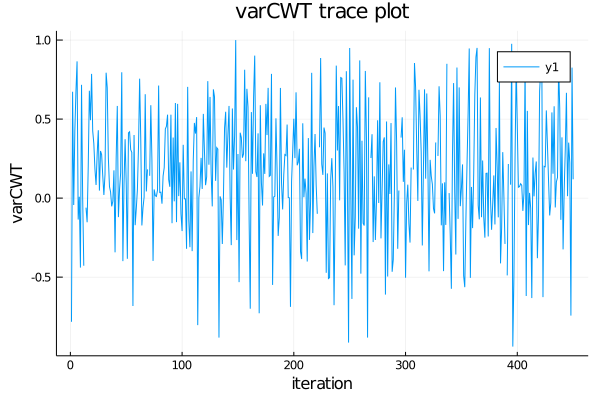

In [21]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "varCWT trace plot",
        xlabel = "iteration", ylabel = "varCWT")

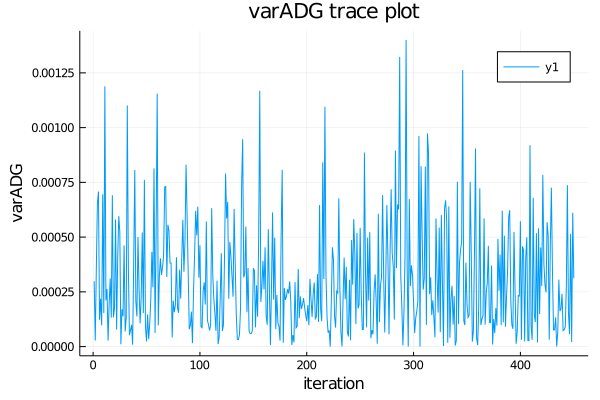

In [22]:
using Plots
x = out[!,1]; y = out[!,3]; # These are the plotting data
plot(x,y, title = "varADG trace plot",
        xlabel = "iteration", ylabel = "varADG")

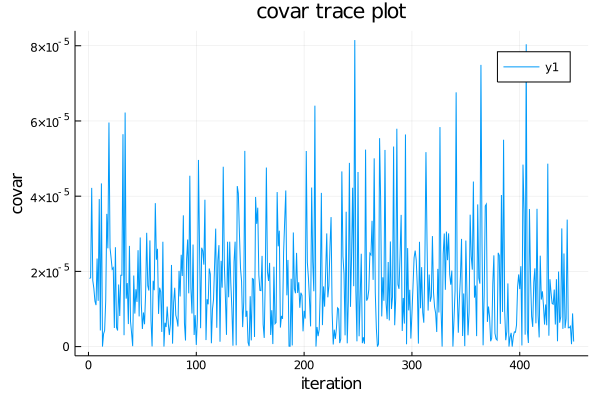

In [23]:
using Plots
x = out[!,1]; y = out[!,4]; # These are the plotting data
plot(x,y, title = "covar trace plot",
        xlabel = "iteration", ylabel = "covar")

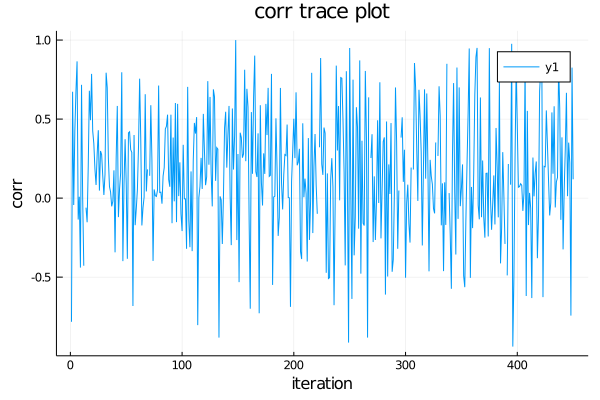

In [24]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "corr trace plot",
        xlabel = "iteration", ylabel = "corr")

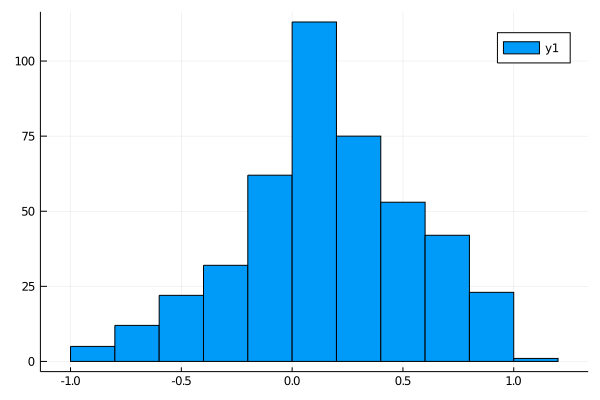

In [25]:
h = histogram(out[!,2])
display(h)

## Whole genome genetic correlation

In [3]:
gVar= CSV.read("MCMC_BayesB_genetic_variance.txt")

,Nur1ADG_Nur1ADG,Nur1ADG_Health_Score1,Health_Score1_Nur1ADG,Health_Score1_Health_Score1
,Float64,Float64,Float64,Float64
1,0.00239904,0.000388028,0.000388028,0.0395628
2,0.00186162,0.00028026,0.00028026,0.0365186
3,0.00207183,0.000716384,0.000716384,0.0379446
4,0.00210592,0.00116441,0.00116441,0.040032
5,0.00220264,0.00075131,0.00075131,0.0374988
6,0.0018891,0.000700803,0.000700803,0.0337375
7,0.00192342,-4.55378e-5,-4.55378e-5,0.0414841
8,0.00163215,0.000259125,0.000259125,0.0398053
9,0.00214665,0.000809471,0.000809471,0.0399107


In [4]:
sqVar1=[sqrt(i) for i in gVar[!,:Nur1ADG_Nur1ADG]] 
sqVar2=[sqrt(i) for i in gVar[!,:Health_Score1_Health_Score1]] 
Product= sqVar1 .* sqVar2
rg= gVar[!,:Nur1ADG_Health_Score1] ./ Product  # Genetic correlations
insertcols!(gVar, 2, :corr => rg)

,Nur1ADG_Nur1ADG,corr,Nur1ADG_Health_Score1,Health_Score1_Nur1ADG,Health_Score1_Health_Score1
,Float64,Float64,Float64,Float64,Float64
1,0.00239904,0.0398291,0.000388028,0.000388028,0.0395628
2,0.00186162,0.0339906,0.00028026,0.00028026,0.0365186
3,0.00207183,0.0807967,0.000716384,0.000716384,0.0379446
4,0.00210592,0.126818,0.00116441,0.00116441,0.040032
5,0.00220264,0.0826683,0.00075131,0.00075131,0.0374988
6,0.0018891,0.0877833,0.000700803,0.000700803,0.0337375
7,0.00192342,-0.00509794,-4.55378e-5,-4.55378e-5,0.0414841
8,0.00163215,0.0321483,0.000259125,0.000259125,0.0398053
9,0.00214665,0.0874533,0.000809471,0.000809471,0.0399107


In [5]:
#using Pkg
#Pkg.add("StatsBase")
#using(StatsBase)
mean(gVar[!,2])

0.06694960687729988

In [6]:
using Statistics
std(gVar[!,:corr])

0.06174438139511041

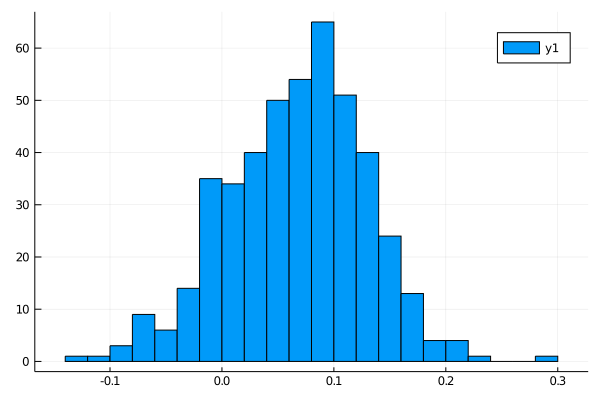

In [29]:
h = histogram(gVar[!,2])
display(h)

## BV correlation for SSC3 region from MCMC BayesB samples

In [3]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_geno_Nur1ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 85671:86283]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 85671:86283]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_geno_Health_Score1.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 85671:86283]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,0.451346,0.000603512,3.79135e-5,6.82731e-5
2,2,0.793796,0.000140239,6.5502e-6,2.40586e-5
3,3,-0.31649,4.20329e-5,4.48072e-6,-4.34339e-6
4,4,NaN,0.0,0.0,0.0
5,5,NaN,0.00036149,0.0,0.0
6,6,0.101272,0.000289743,9.87013e-6,5.41571e-6
7,7,0.911658,0.000221654,2.16565e-5,6.31632e-5
8,8,0.989998,0.000240441,9.90535e-6,4.8314e-5
9,9,-0.686832,0.000482596,5.13397e-6,-3.41876e-5


In [4]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

0.3017809115353658

In [5]:
using Statistics
std(out[!,:corr])

0.6365981492052117

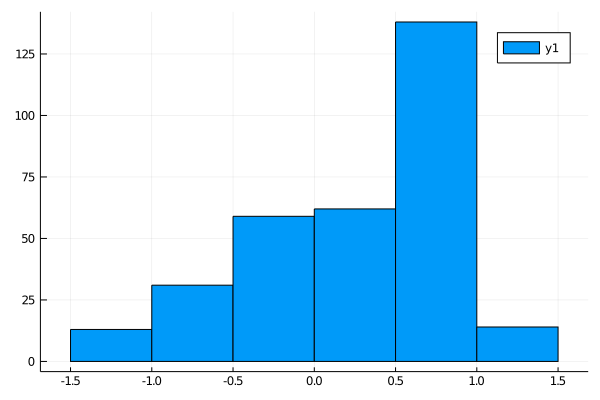

In [6]:
using Plots
h = histogram(out[!,:corr])
display(h)

## BV correlation for SSC5 region from MCMC BayesB samples

In [7]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_geno_Nur1ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 132309:132994]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 132309:132994]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_geno_Health_Score1.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 132309:132994]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.908391,0.000745063,1.04971e-5,-8.03347e-5
2,2,-0.999991,6.17859e-6,1.05975e-5,-8.09174e-6
3,3,0.19485,0.000212232,1.71752e-5,1.17641e-5
4,4,-0.920746,0.000130501,6.68098e-7,-8.5974e-6
5,5,-1.0,0.000473475,1.2044e-5,-7.5515e-5
6,6,0.724994,0.000241703,1.16279e-6,1.21542e-5
7,7,-0.108399,0.000192942,1.31692e-5,-5.46411e-6
8,8,0.270642,7.76644e-5,4.4787e-5,1.59618e-5
9,9,-0.0619507,0.000216482,6.12621e-6,-2.25607e-6


In [8]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.2519870340172602

In [9]:
using Statistics
std(out[!,:corr])

0.6174860193148828

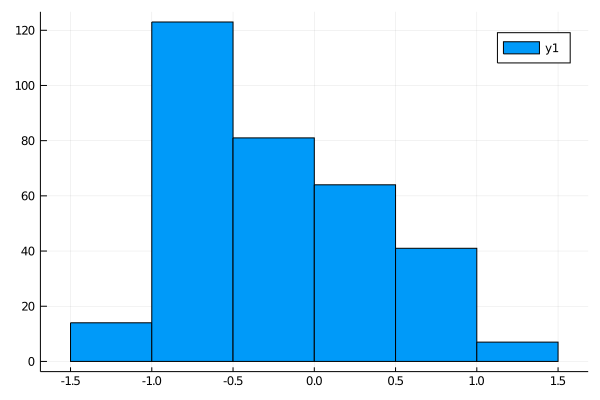

In [10]:
using Plots
h = histogram(out[!,:corr])
display(h)

## BV correlation for SSC11 region from MCMC BayesB samples

In [11]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_geno_Nur1ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 278033:278724]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 278033:278724]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_geno_Health_Score1.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 278033:278724]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,0.801773,0.000535975,1.61086e-5,7.44993e-5
2,2,NaN,0.0,1.61811e-6,0.0
3,3,NaN,0.0,0.0,0.0
4,4,0.26914,0.000923095,5.43421e-5,6.02794e-5
5,5,0.335533,9.5491e-5,8.6892e-6,9.66512e-6
6,6,NaN,0.0,3.58582e-5,0.0
7,7,NaN,0.0,3.48189e-7,0.0
8,8,0.379136,1.93178e-5,1.23894e-5,5.86543e-6
9,9,-1.0,7.33789e-6,1.54276e-5,-1.06398e-5


In [12]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

0.483779030807751

In [13]:
using Statistics
std(out[!,:corr])

0.508442303239586

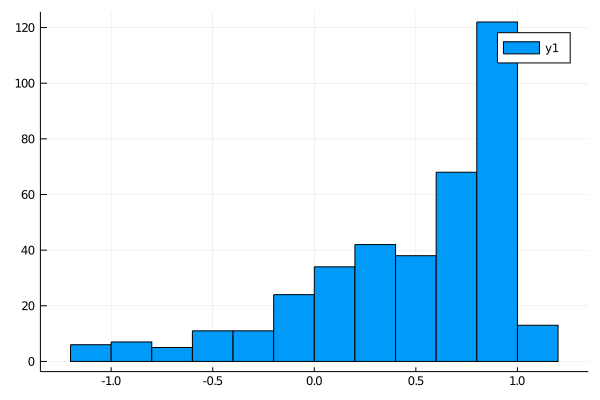

In [14]:
using Plots
h = histogram(out[!,:corr])
display(h)

## BV correlation for SSC15 region from MCMC BayesB samples

In [15]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_geno_Nur1ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 369488:369899]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 369488:369899]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_geno_Health_Score1.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 369488:369899]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,NaN,0.000129008,0.0,0.0
2,2,0.225435,0.000193409,1.32885e-6,3.61408e-6
3,3,NaN,0.0,1.14232e-8,0.0
4,4,NaN,4.35369e-5,0.0,0.0
5,5,0.960987,0.000801977,3.78733e-5,0.000167481
6,6,1.0,0.000397439,2.46201e-5,9.89192e-5
7,7,0.892693,0.000117891,1.41323e-5,3.64374e-5
8,8,0.807924,0.000914374,3.83339e-6,4.78326e-5
9,9,-0.999046,5.08976e-8,8.18186e-6,-6.44704e-7


In [16]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

0.5639608074557222

In [17]:
using Statistics
std(out[!,:corr])

0.5943747434735152

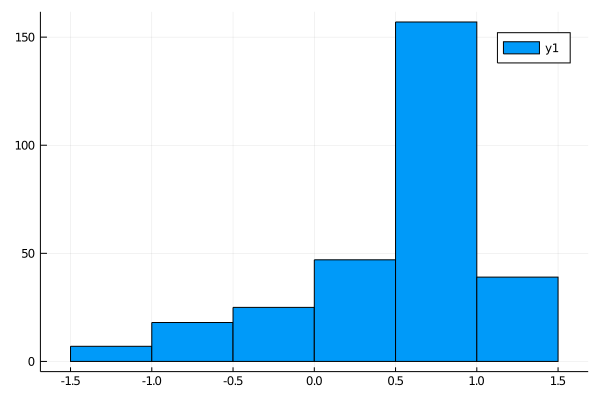

In [18]:
using Plots
h = histogram(out[!,:corr])
display(h)